# Optimized Data Set Training Size Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from scipy.stats import bootstrap
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

coord = np.load('airfoils_opt.npy')


cor = np.arange(0,384,1)
df = pd.DataFrame(coord.reshape(1042,384), columns = [cor])



#Scaling
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaleddf = pd.DataFrame(scaled, columns = [cor])


#Use GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))


Using cuda device


# Latent Space Size 4

In [2]:
comp = 4 # latent space size
num = 25 # number of same size training-testing splits for cross validation

pca_MSE_TRAIN = np.zeros((103,num), dtype=float)
pca_MSE_TEST = np.zeros((103,num), dtype=float)
repro_test = np.zeros((103, num, 384), dtype=float)

counter = 0
for num_af in range(5,1035,10):
    train_size = (num_af/1042)
    test_size = (1 - train_size)
    ts = 1042 - num_af
    pca_X_train = np.zeros((num_af, num, 384), dtype=float)
    pca_X_test = np.zeros((num_af, num, 384), dtype=float)

    print(f'\n\nTRAIN SIZE: {train_size}   # of Airfoils: {num_af}')

    for i in range(num):
        print(f'\n\nTRIAL NUMBER {i}')
        pca_X_train, pca_X_test = train_test_split(scaled, test_size=test_size, shuffle=True)
        pca = PCA(n_components = comp)
        dim = pca.fit_transform(pca_X_train)
        reprojected = pca.inverse_transform(dim)
        xvals2 = list(range(comp))
        print()
        print(pca.explained_variance_ratio_)

        dim_test = pca.transform(pca_X_test)
        repro_test = pca.inverse_transform(dim_test)
    
        MSEtrain = mean_squared_error(pca_X_train, reprojected)
        MSEtest = mean_squared_error(pca_X_test, repro_test)
   
        print(MSEtrain)
        print(MSEtest)

        pca_MSE_TRAIN[counter][i] = MSEtrain
        pca_MSE_TEST[counter][i] = MSEtest
        
        
    counter += 1
print(f'MSE TRAIN: {pca_MSE_TRAIN}\n\nMSE TEST: {pca_MSE_TEST}\n\n')
print(f'MSE TRAIN MEAN: {pca_MSE_TRAIN.mean(axis=1)}\n\nMSE TEST MEAN: {pca_MSE_TEST.mean(axis=1)}\n\n')




TRAIN SIZE: 0.0047984644913627635   # of Airfoils: 5


TRIAL NUMBER 0

[7.68143850e-01 2.31855953e-01 1.93301518e-07 3.68458129e-09]
2.2836181424799275e-32
0.022463385731811576


TRIAL NUMBER 1

[6.60146317e-01 2.60004137e-01 7.98490585e-02 4.87295579e-07]
1.402234484410402e-31
0.01025866250045276


TRIAL NUMBER 2

[0.54960896 0.26886965 0.16457738 0.01694401]
6.294791683493284e-32
0.012009150694632079


TRIAL NUMBER 3

[9.99998839e-01 1.03792266e-06 1.03796570e-07 1.89296823e-08]
9.719989205617025e-33
0.02826718579182125


TRIAL NUMBER 4

[6.50129338e-01 2.10159215e-01 1.39711366e-01 8.03964386e-08]
1.524623382715192e-31
0.01171235091141896


TRIAL NUMBER 5

[0.57775743 0.30734476 0.11095402 0.0039438 ]
4.7907055976801777e-32
0.012678513083932821


TRIAL NUMBER 6

[7.42222311e-01 2.57777106e-01 4.67730545e-07 1.15146314e-07]
7.59672596827194e-32
0.029632622238517956


TRIAL NUMBER 7

[5.85969193e-01 2.90919842e-01 1.23109479e-01 1.48700069e-06]
3.90399290650086e-32
0.013287660632833


[0.71075695 0.12399133 0.10694623 0.04306098]
0.001009461674456746
0.0027895624799352966


TRIAL NUMBER 2

[0.56493681 0.21028906 0.13081413 0.05883258]
0.0023297065345770814
0.00263694061793554


TRIAL NUMBER 3

[0.68627879 0.1754317  0.08062224 0.04010702]
0.001203463007509474
0.003462384002191364


TRIAL NUMBER 4

[0.62492647 0.20652049 0.1119929  0.0316732 ]
0.0016306854934979803
0.007390833335844594


TRIAL NUMBER 5

[0.6010208  0.19684037 0.14006875 0.03361769]
0.0020909734860096716
0.006859595185345583


TRIAL NUMBER 6

[0.69866136 0.20429439 0.08003079 0.01454952]
0.00015577986322190497
0.009220211807899606


TRIAL NUMBER 7

[0.6324427  0.17104293 0.10110047 0.07014196]
0.0015375861819916295
0.002860671529141392


TRIAL NUMBER 8

[0.63167857 0.18080255 0.11885426 0.04335559]
0.0011765013165254484
0.00691599185599296


TRIAL NUMBER 9

[0.49114073 0.24747048 0.15006068 0.06245986]
0.003071979929992164
0.004760685031525117


TRIAL NUMBER 10

[0.5607597  0.17667531 0.13729627 0.09


[0.5962875  0.16199503 0.10772337 0.08588667]
0.0032457235669121364
0.0027650043331764844


TRIAL NUMBER 3

[0.54559022 0.17610381 0.14037661 0.09253342]
0.003228864108497808
0.0026149049743303993


TRIAL NUMBER 4

[0.63335996 0.15618073 0.10972996 0.05301816]
0.0033719094819080063
0.003468392442746455


TRIAL NUMBER 5

[0.61838024 0.13840273 0.12555358 0.0896679 ]
0.0018665272763057174
0.0026812427897154414


TRIAL NUMBER 6

[0.55656657 0.15970013 0.14590154 0.10428545]
0.0025908568638221396
0.0025722154322705775


TRIAL NUMBER 7

[0.61275871 0.16084345 0.10638803 0.08131162]
0.002645126586529689
0.003044377062778811


TRIAL NUMBER 8

[0.61522524 0.16083319 0.10784013 0.07416194]
0.00276455805370937
0.0027098954911565433


TRIAL NUMBER 9

[0.62494572 0.18979704 0.08899248 0.06017   ]
0.0026865350157282467
0.003156959710161313


TRIAL NUMBER 10

[0.69004784 0.14001977 0.11608867 0.03370857]
0.0011975077171597136
0.0031332194216814034


TRIAL NUMBER 11

[0.6576752  0.15806049 0.1010252


[0.65789494 0.14245767 0.09363843 0.07252664]
0.002100037903545176
0.002667435734203964


TRIAL NUMBER 4

[0.62003135 0.14866531 0.10768571 0.09271765]
0.0020511715084640283
0.0025120739794799764


TRIAL NUMBER 5

[0.59606988 0.20345556 0.09029574 0.07609238]
0.0022197028399649796
0.002649806294713156


TRIAL NUMBER 6

[0.56756333 0.18094885 0.10556861 0.10492229]
0.002785686911339229
0.002508630035051094


TRIAL NUMBER 7

[0.65519924 0.11790442 0.09951838 0.09629314]
0.0021429425181776103
0.0026884596278354887


TRIAL NUMBER 8

[0.67409439 0.18201331 0.08857834 0.02927523]
0.0016515604799457182
0.0035170727469753804


TRIAL NUMBER 9

[0.58484584 0.14448233 0.12323735 0.10469305]
0.00314229720164975
0.0024783659344483817


TRIAL NUMBER 10

[0.6183805  0.15890322 0.10329627 0.07372793]
0.0031769447748673774
0.0025643387007687857


TRIAL NUMBER 11

[0.63765917 0.16801314 0.13033765 0.03192455]
0.0022139197912976892
0.0036177800069060345


TRIAL NUMBER 12

[0.60711212 0.14625495 0.136822

0.0019149441080744591
0.0025432418012708053


TRIAL NUMBER 4

[0.61001337 0.17340989 0.10681095 0.07359068]
0.0023548376813134924
0.0025607688342775925


TRIAL NUMBER 5

[0.6375627  0.12946326 0.11102478 0.08722813]
0.002230667783663741
0.0025384520199237463


TRIAL NUMBER 6

[0.55520874 0.18032475 0.13237163 0.10054007]
0.002250803353840646
0.0025010554268241965


TRIAL NUMBER 7

[0.61478379 0.17308172 0.09875275 0.08041497]
0.0022601455937696865
0.0025018348815061997


TRIAL NUMBER 8

[0.56816432 0.15937887 0.12795455 0.09655995]
0.003494823816207551
0.0023535309783872904


TRIAL NUMBER 9

[0.59267731 0.15298138 0.11422265 0.10317958]
0.0026257616512278515
0.0024822856667824186


TRIAL NUMBER 10

[0.63115073 0.1418179  0.10830046 0.09136896]
0.0018255793803483025
0.002556360447754777


TRIAL NUMBER 11

[0.62223683 0.15743287 0.12414254 0.06995121]
0.0015604101000754773
0.0027574324864674104


TRIAL NUMBER 12

[0.64601131 0.1375221  0.10387603 0.0762588 ]
0.002456430430641319
0.002521


[0.58407819 0.15032174 0.13254713 0.10766987]
0.0017456539713546146
0.002772815386563514


TRIAL NUMBER 4

[0.6076953  0.14375558 0.12306197 0.09110838]
0.002535311019742199
0.0024586057384141874


TRIAL NUMBER 5

[0.66188626 0.13492018 0.10317582 0.08232832]
0.0011026887288474937
0.002829788238673365


TRIAL NUMBER 6

[0.6359984  0.1276494  0.12166905 0.0900155 ]
0.001598685302068547
0.0026780754505559227


TRIAL NUMBER 7

[0.59994205 0.1558903  0.12347574 0.09033385]
0.002192696099073014
0.002504836338797741


TRIAL NUMBER 8

[0.60460958 0.15806705 0.10524751 0.0933695 ]
0.0026021101165086776
0.0025035287600838813


TRIAL NUMBER 9

[0.6159178  0.14594265 0.10942862 0.09334315]
0.0025421317956409784
0.002546779125369644


TRIAL NUMBER 10

[0.60517227 0.16481029 0.10456467 0.08758914]
0.0027289941002141944
0.002425509659375281


TRIAL NUMBER 11

[0.66042628 0.13808806 0.09606841 0.07404179]
0.002128811190231432
0.0025576542177626767


TRIAL NUMBER 12

[0.61573117 0.17059747 0.107883  


[0.62121644 0.15787468 0.10977322 0.08667824]
0.0015371522050742579
0.002826819673084194


TRIAL NUMBER 4

[0.60869116 0.16020423 0.11268707 0.0815104 ]
0.0024478106483129514
0.0024471901094145782


TRIAL NUMBER 5

[0.59076092 0.1608604  0.10979922 0.10523734]
0.0022854893598937003
0.0024556209822888067


TRIAL NUMBER 6

[0.63300119 0.13986557 0.12107268 0.07685473]
0.0020029640028055113
0.002596207288727555


TRIAL NUMBER 7

[0.58690479 0.19146669 0.10132324 0.08691866]
0.002183364145496944
0.0025112975509197044


TRIAL NUMBER 8

[0.60098075 0.15486441 0.12216458 0.08528588]
0.002546155259522905
0.0024645827908435862


TRIAL NUMBER 9

[0.63184354 0.14733399 0.11304187 0.07032449]
0.002559529885279924
0.002396266423782589


TRIAL NUMBER 10

[0.63277372 0.15025751 0.10416762 0.08335513]
0.002016620592300094
0.0025374452613434874


TRIAL NUMBER 11

[0.56150046 0.18172374 0.12999082 0.08447166]
0.0026797586348928913
0.0023963409288159793


TRIAL NUMBER 12

[0.59609172 0.15297797 0.120605


[0.57998611 0.15216922 0.12069282 0.11505435]
0.0022336538146764846
0.0025145721353489127


TRIAL NUMBER 4

[0.6138003  0.14420168 0.10613976 0.10202581]
0.0021338802952883327
0.002667361604871174


TRIAL NUMBER 5

[0.66176325 0.11666104 0.10571916 0.08618465]
0.0019565229389844553
0.0025964697791456604


TRIAL NUMBER 6

[0.61775808 0.13656069 0.11438142 0.10425396]
0.001805238574850286
0.0026381695506514243


TRIAL NUMBER 7

[0.61726002 0.1361591  0.11877759 0.0991429 ]
0.0019223480634571629
0.002676306001346942


TRIAL NUMBER 8

[0.63201939 0.14336419 0.11837175 0.07571838]
0.00214334334144783
0.002523272570694039


TRIAL NUMBER 9

[0.61933849 0.15397185 0.10102722 0.08770212]
0.0026585004322901853
0.0024717056199691782


TRIAL NUMBER 10

[0.6047462  0.15398054 0.12726265 0.08667063]
0.0019728447451034144
0.002567647721945627


TRIAL NUMBER 11

[0.5763565  0.18646843 0.10846671 0.09264204]
0.002329889519836075
0.00246043669883094


TRIAL NUMBER 12

[0.58566549 0.17585146 0.11688021 


[0.59447431 0.16159355 0.11100734 0.09546663]
0.002534367351917571
0.0023796116971765663


TRIAL NUMBER 4

[0.61460906 0.16935586 0.1010178  0.08368987]
0.002127222213858052
0.002505238567580175


TRIAL NUMBER 5

[0.58498921 0.1622078  0.11819763 0.09599732]
0.002684115329398825
0.0023326835480449583


TRIAL NUMBER 6

[0.59161597 0.16577955 0.11361097 0.09662453]
0.0021339475165516038
0.0025354939640764


TRIAL NUMBER 7

[0.59201238 0.15841685 0.12042682 0.09309618]
0.002414100894765537
0.002452652304534783


TRIAL NUMBER 8

[0.62984515 0.13349289 0.11336647 0.09356804]
0.0020764224817366728
0.0025972947398578573


TRIAL NUMBER 9

[0.58546844 0.18586347 0.10390478 0.08433469]
0.0024961152888612562
0.002437005115884189


TRIAL NUMBER 10

[0.622762   0.13137309 0.11852301 0.09450057]
0.00232484124034292
0.0024779964579257382


TRIAL NUMBER 11

[0.60259126 0.15734948 0.10860191 0.09441172]
0.002449544981828191
0.002398265756369281


TRIAL NUMBER 12

[0.63134407 0.12877931 0.11273924 0.10


[0.60345601 0.16530959 0.1098723  0.08313946]
0.002590775328354149
0.0023805158831145274


TRIAL NUMBER 4

[0.60647731 0.16015992 0.1116571  0.08348564]
0.002571708664361167
0.0024216372673506533


TRIAL NUMBER 5

[0.6169125  0.16413137 0.11061641 0.07639167]
0.0021398170261641663
0.002518631201882097


TRIAL NUMBER 6

[0.57670212 0.19396766 0.1129113  0.07434414]
0.0027433838399841363
0.0023230649519013335


TRIAL NUMBER 7

[0.61155061 0.15603353 0.10359099 0.0964838 ]
0.002180876911041315
0.0026517504891821705


TRIAL NUMBER 8

[0.59965765 0.16604154 0.11062761 0.08620418]
0.0026453393512624215
0.002380168335002401


TRIAL NUMBER 9

[0.59543908 0.15312434 0.11233136 0.10725338]
0.0022319852585273195
0.0025036799088363633


TRIAL NUMBER 10

[0.61369723 0.1630357  0.10700894 0.08468485]
0.0021105178250406162
0.002536498771111406


TRIAL NUMBER 11

[0.62407779 0.16385192 0.10466597 0.07822816]
0.0018170307188506464
0.002681449483529307


TRIAL NUMBER 12

[0.63100758 0.14817906 0.101840


[0.59461484 0.1615024  0.10513473 0.10243066]
0.0025098892911814565
0.0023465233913411675


TRIAL NUMBER 4

[0.60254753 0.15674315 0.11864406 0.09143887]
0.0020318585449537355
0.002587453723297171


TRIAL NUMBER 5

[0.5756204  0.17915585 0.11040962 0.09972189]
0.0023676113115933405
0.002419564267964486


TRIAL NUMBER 6

[0.59088586 0.14581705 0.1187347  0.10780927]
0.0026555271068875977
0.002377008664650428


TRIAL NUMBER 7

[0.59235465 0.17605663 0.10561496 0.09439631]
0.0020601210215004905
0.0026342603962922276


TRIAL NUMBER 8

[0.59674883 0.17235905 0.11043945 0.0843095 ]
0.0023587514639409704
0.0024217017537549986


TRIAL NUMBER 9

[0.62860997 0.14779617 0.11557966 0.0852969 ]
0.0015435354638408075
0.0027929796142447


TRIAL NUMBER 10

[0.60935497 0.14188329 0.11602585 0.10004356]
0.0022869239811748373
0.0024695066753264642


TRIAL NUMBER 11

[0.60545744 0.17881224 0.10116421 0.07923361]
0.002265558390088466
0.002543023891417962


TRIAL NUMBER 12

[0.58411105 0.1681811  0.1181089


[0.57028257 0.17629033 0.11416257 0.10001458]
0.002792798449709831
0.002250831331161355


TRIAL NUMBER 4

[0.59369281 0.1738763  0.10412672 0.09563307]
0.0022110172247789945
0.0025000201741327346


TRIAL NUMBER 5

[0.61374719 0.15244581 0.10803308 0.09448181]
0.002209049366076037
0.002540852743661014


TRIAL NUMBER 6

[0.59637938 0.17267348 0.10129755 0.09481217]
0.002209640771323369
0.002522853903918658


TRIAL NUMBER 7

[0.61674765 0.14633079 0.11382833 0.0909725 ]
0.0022697148741713086
0.0025198770379431337


TRIAL NUMBER 8

[0.59048192 0.16660035 0.10942742 0.0930602 ]
0.002819437362620804
0.0021961763235336


TRIAL NUMBER 9

[0.60078004 0.16177131 0.11211037 0.08655808]
0.0026960662463179283
0.002317461893874033


TRIAL NUMBER 10

[0.61012821 0.16549206 0.1079819  0.08152206]
0.0024037278997713434
0.0024185005627026675


TRIAL NUMBER 11

[0.62127707 0.17376573 0.09835344 0.07628249]
0.001952253852229128
0.0026965353401581338


TRIAL NUMBER 12

[0.62832428 0.15244795 0.09853775 0.


[0.61756338 0.15931898 0.09875999 0.0945817 ]
0.001956816488281612
0.002686535785305208


TRIAL NUMBER 4

[0.62819381 0.15100206 0.1179164  0.07342074]
0.0019428961007824932
0.0026943055973678597


TRIAL NUMBER 5

[0.62056904 0.14992918 0.10297651 0.09360251]
0.002345445270437273
0.0024591728858656043


TRIAL NUMBER 6

[0.60316321 0.15977277 0.11251105 0.08957511]
0.002307387926384028
0.0024910599774376364


TRIAL NUMBER 7

[0.58730882 0.15799527 0.11660649 0.10343529]
0.0023934375843009835
0.0024694967394085785


TRIAL NUMBER 8

[0.6093647  0.1725697  0.1073527  0.07208067]
0.002651233223650566
0.002368090572262659


TRIAL NUMBER 9

[0.62118088 0.14801796 0.10909027 0.09249998]
0.001990747233232306
0.0026609240041970575


TRIAL NUMBER 10

[0.61570663 0.14989165 0.10997809 0.08936069]
0.002427151884396999
0.0023949462544588136


TRIAL NUMBER 11

[0.61639298 0.16091562 0.1000877  0.087081  ]
0.0022549022846044486
0.0024822318220243107


TRIAL NUMBER 12

[0.58959394 0.16175371 0.1117368


[0.60246739 0.14406256 0.11604846 0.0989701 ]
0.0026400982271850004
0.002322452566896499


TRIAL NUMBER 4

[0.59873765 0.15732036 0.11286748 0.0945127 ]
0.0026275080158225865
0.002258155106731406


TRIAL NUMBER 5

[0.60378454 0.16165068 0.10914533 0.0936373 ]
0.00211714726653302
0.0026309921187765996


TRIAL NUMBER 6

[0.61106645 0.14710766 0.10954271 0.09691956]
0.002452177195538126
0.0023621877321715577


TRIAL NUMBER 7

[0.61358049 0.15852765 0.10595987 0.09105492]
0.002075324065076395
0.0026302134078507768


TRIAL NUMBER 8

[0.60726859 0.15646975 0.10722167 0.09600738]
0.0021910485897757965
0.0025460954645345644


TRIAL NUMBER 9

[0.60872009 0.14726801 0.10532333 0.10008413]
0.0026549845225870197
0.0022414549590969446


TRIAL NUMBER 10

[0.6151062  0.14360385 0.11211989 0.09114918]
0.0026402335461875267
0.002257543775128893


TRIAL NUMBER 11

[0.60473706 0.16574836 0.10024328 0.09599402]
0.0021609447318825872
0.0025682138982859267


TRIAL NUMBER 12

[0.61037154 0.1415502  0.112334


[0.60949647 0.16263254 0.10169433 0.09200015]
0.0023398407310545105
0.0025094188013998955


TRIAL NUMBER 4

[0.61171622 0.15522936 0.11172403 0.08408376]
0.002539168024370551
0.0023256643928436234


TRIAL NUMBER 5

[0.59758088 0.16509271 0.10839404 0.09407514]
0.0023993391243797347
0.0023890226001407645


TRIAL NUMBER 6

[0.59479723 0.15584489 0.11278577 0.09799276]
0.0026510376176742123
0.0022410581623573443


TRIAL NUMBER 7

[0.60587729 0.1508694  0.11579298 0.0925558 ]
0.002399281232165603
0.0024263677550634714


TRIAL NUMBER 8

[0.61164224 0.15008709 0.11438122 0.09223337]
0.002176323624996659
0.002561999387248772


TRIAL NUMBER 9

[0.619654   0.14898584 0.10546021 0.09708917]
0.0019978241117884384
0.002691481267035893


TRIAL NUMBER 10

[0.58493789 0.17225094 0.108196   0.09611219]
0.0027044144128728995
0.0022008269379688774


TRIAL NUMBER 11

[0.61503526 0.13145109 0.11477006 0.1080104 ]
0.0021065874042942288
0.002703588870582526


TRIAL NUMBER 12

[0.62153205 0.15089579 0.10513


[0.59178374 0.16757045 0.1071072  0.09636244]
0.002520719112342218
0.002295684125955347


TRIAL NUMBER 4

[0.611585   0.15369376 0.10508206 0.09377461]
0.0024359320367738357
0.0023552559366106143


TRIAL NUMBER 5

[0.59606297 0.15544606 0.10840084 0.10308811]
0.0025209201970492266
0.0022991502033681797


TRIAL NUMBER 6

[0.60306693 0.15178797 0.1087943  0.09765956]
0.0027227505217473484
0.0021613494060874726


TRIAL NUMBER 7

[0.61423731 0.15435389 0.10578128 0.09251338]
0.0022035575489549788
0.0025741004449841647


TRIAL NUMBER 8

[0.60666057 0.14482271 0.11258328 0.10023269]
0.0025280703676972397
0.0022931144692100278


TRIAL NUMBER 9

[0.60914332 0.15350307 0.10625366 0.09831707]
0.002213516386588578
0.002534573335626131


TRIAL NUMBER 10

[0.60913373 0.15106147 0.11181544 0.09114766]
0.002547998875406013
0.002343032802747822


TRIAL NUMBER 11

[0.62221462 0.15911818 0.09904435 0.07979462]
0.0026068985023268154
0.0022513983291139596


TRIAL NUMBER 12

[0.60515588 0.15877376 0.10829


[0.60511938 0.16857229 0.10359715 0.08934438]
0.0022038879859212863
0.0025893997123997577


TRIAL NUMBER 4

[0.61738721 0.16588306 0.10117482 0.08083598]
0.0023146828886002695
0.0024735546079920137


TRIAL NUMBER 5

[0.62167834 0.1475738  0.10654203 0.09120712]
0.0021854159358230983
0.0025933896267452267


TRIAL NUMBER 6

[0.60299111 0.15940773 0.10367695 0.09488483]
0.002570446157190713
0.002256809717316834


TRIAL NUMBER 7

[0.60316297 0.15185092 0.10901659 0.10296564]
0.0022617613629787705
0.0025010000527906835


TRIAL NUMBER 8

[0.62616374 0.14406371 0.10927194 0.09105736]
0.0019177298852953416
0.0028513763341840646


TRIAL NUMBER 9

[0.59818125 0.1550984  0.1165382  0.09431974]
0.002402571291331796
0.0023977182773215087


TRIAL NUMBER 10

[0.60422845 0.15440031 0.10468262 0.09898237]
0.002591954271608497
0.002228129220539122


TRIAL NUMBER 11

[0.62322453 0.14570437 0.11036134 0.08818366]
0.002213294837334037
0.0026289573717229535


TRIAL NUMBER 12

[0.59739453 0.15483861 0.10747


[0.59650493 0.15781015 0.10917744 0.09949606]
0.0026060428280125177
0.0021841056764464344


TRIAL NUMBER 8

[0.60148777 0.15725125 0.11088451 0.09354441]
0.0025197063688749393
0.002287507672174572


TRIAL NUMBER 9

[0.62108768 0.14732189 0.1020473  0.09380158]
0.002444295561836688
0.002379893699661417


TRIAL NUMBER 10

[0.61504845 0.14999161 0.10985399 0.08924476]
0.0024662770543303265
0.002325718843165871


TRIAL NUMBER 11

[0.60477131 0.15744752 0.10596472 0.09597303]
0.002404922353837224
0.0024031617840549846


TRIAL NUMBER 12

[0.607236   0.16416664 0.10211471 0.09229501]
0.0023108837780412687
0.0025064193375103983


TRIAL NUMBER 13

[0.61799231 0.15664339 0.1034298  0.09289445]
0.0019362081827721089
0.0028997542801941513


TRIAL NUMBER 14

[0.61722629 0.15134444 0.10535915 0.08925444]
0.0025189743611250697
0.0022897670084093946


TRIAL NUMBER 15

[0.60188233 0.16491402 0.10723841 0.09036795]
0.0024701388522899094
0.002326541820607331


TRIAL NUMBER 16

[0.59256932 0.15804909 0.1


[0.60741138 0.15025623 0.11010479 0.09877651]
0.0023175610197838483
0.002474123662146323


TRIAL NUMBER 12

[0.61848171 0.16257706 0.10139712 0.08182913]
0.002375867665905536
0.00241320902271942


TRIAL NUMBER 13

[0.60190067 0.16403099 0.1012171  0.09540724]
0.0025203844322995096
0.002291171274760029


TRIAL NUMBER 14

[0.61704112 0.14482281 0.10633641 0.09318495]
0.002567980252127086
0.0022101922903259817


TRIAL NUMBER 15

[0.6063898  0.15333984 0.10501973 0.10147905]
0.0022693042598291367
0.0025456683959569916


TRIAL NUMBER 16

[0.61526858 0.15759382 0.10371595 0.09097354]
0.00218048937121921
0.0026276106483212685


TRIAL NUMBER 17

[0.597962   0.1622523  0.10555369 0.09910313]
0.002418861655090863
0.00239437568665883


TRIAL NUMBER 18

[0.62638031 0.14550302 0.10620958 0.09146899]
0.0020851168765200546
0.0027314470669124093


TRIAL NUMBER 19

[0.59873615 0.1714497  0.10375883 0.08996683]
0.0023631138388192086
0.0024672384972833175


TRIAL NUMBER 20

[0.60729779 0.16433435 0.1061


[0.60832031 0.14850143 0.10990666 0.09783245]
0.0024359470616541444
0.0023443891896074327


TRIAL NUMBER 15

[0.61954458 0.1581722  0.10906607 0.07901867]
0.0022500351900725697
0.002588829594939532


TRIAL NUMBER 16

[0.61728366 0.1464195  0.10763575 0.09411542]
0.0023793929368142344
0.002400257238562314


TRIAL NUMBER 17

[0.61349588 0.15765925 0.10815846 0.08932674]
0.002073891863767214
0.0028203917645172848


TRIAL NUMBER 18

[0.6123612  0.15712534 0.10267165 0.09055974]
0.002538620841676219
0.002228191088610144


TRIAL NUMBER 19

[0.63282003 0.15260201 0.10590879 0.07660859]
0.00216769683772111
0.0026856390716802083


TRIAL NUMBER 20

[0.62105825 0.14943754 0.10334777 0.09192026]
0.002334168868212903
0.0024907696463610583


TRIAL NUMBER 21

[0.60356132 0.1571061  0.1046243  0.0983455 ]
0.002482200959343766
0.002265341399629218


TRIAL NUMBER 22

[0.60779923 0.15396813 0.10538578 0.09554437]
0.002553393145488763
0.0021929796415326515


TRIAL NUMBER 23

[0.60537809 0.16040518 0.1091

0.0023012094062776892
0.0025644926803579933


TRIAL NUMBER 17

[0.60917742 0.15854799 0.10959375 0.08437478]
0.0025937766042532224
0.00214335378825985


TRIAL NUMBER 18

[0.60154685 0.15252453 0.10547273 0.1036158 ]
0.00251681607952696
0.00221295531706699


TRIAL NUMBER 19

[0.60150792 0.15345368 0.10884355 0.09857017]
0.0026841558058336838
0.0020002191094093454


TRIAL NUMBER 20

[0.60589791 0.16471182 0.10584451 0.08754132]
0.0023462975365647156
0.0024703332995824998


TRIAL NUMBER 21

[0.6012305  0.15616806 0.10442645 0.1002036 ]
0.0025476556005339436
0.0021762136192518566


TRIAL NUMBER 22

[0.59755533 0.17270598 0.10790227 0.08448842]
0.0023942919449783124
0.002406090602618195


TRIAL NUMBER 23

[0.59787172 0.15584438 0.10733126 0.10581795]
0.002217598485183631
0.0026614556050099636


TRIAL NUMBER 24

[0.60559018 0.15395906 0.10255497 0.10062596]
0.0024771287292063644
0.0022830833471121736


TRAIN SIZE: 0.5902111324376199   # of Airfoils: 615


TRIAL NUMBER 0

[0.60030716 0.166043

0.0021873272954642574
0.0027898150023781074


TRIAL NUMBER 19

[0.61050635 0.15152315 0.10826    0.09762125]
0.002208710298608559
0.002691662602285439


TRIAL NUMBER 20

[0.60835678 0.15465933 0.10474063 0.09963487]
0.0021931018859630154
0.002700919806198952


TRIAL NUMBER 21

[0.60462181 0.16273343 0.10341258 0.09308476]
0.002453686294203255
0.0023193532447869105


TRIAL NUMBER 22

[0.61105754 0.15494559 0.10704976 0.09184718]
0.002356936475946175
0.002441984409777089


TRIAL NUMBER 23

[0.61423754 0.15766503 0.10411562 0.09128758]
0.002202363706937237
0.0027398415258483373


TRIAL NUMBER 24

[0.59849797 0.16257716 0.10311371 0.09862662]
0.002483613760180819
0.002240784931210231


TRAIN SIZE: 0.6190019193857965   # of Airfoils: 645


TRIAL NUMBER 0

[0.60849644 0.15542423 0.10505721 0.09566676]
0.0023999526948946313
0.002374116251747189


TRIAL NUMBER 1

[0.6012071  0.16666543 0.10589567 0.08976718]
0.002453094592548061
0.002288130641879353


TRIAL NUMBER 2

[0.60013494 0.15060315 0.1

0.0023645184495059922
0.002448265297745779


TRIAL NUMBER 1

[0.60821879 0.15184585 0.10733733 0.09646403]
0.0025256264705502732
0.0021372839981740515


TRIAL NUMBER 2

[0.60777265 0.15610191 0.10752763 0.09291438]
0.0023488469654344155
0.002497751682712714


TRIAL NUMBER 3

[0.62499161 0.14779761 0.10431618 0.08915641]
0.0022823467005828354
0.0026071820108182404


TRIAL NUMBER 4

[0.60639979 0.16013374 0.10477612 0.09390042]
0.0023781299901691143
0.0024401399358082725


TRIAL NUMBER 5

[0.60858032 0.15258426 0.10691722 0.093964  ]
0.002605601555787974
0.0020351145488375307


TRIAL NUMBER 6

[0.62154483 0.14833684 0.10627978 0.0883291 ]
0.00241646763769297
0.002337695072314829


TRIAL NUMBER 7

[0.60685926 0.16016732 0.10614802 0.09128807]
0.0024139580403903056
0.0023488038768487637


TRIAL NUMBER 8

[0.60566047 0.16430509 0.10218841 0.09263167]
0.0024001762218271924
0.0024060123056800424


TRIAL NUMBER 9

[0.61291266 0.15659076 0.10514527 0.0908833 ]
0.0023141428842400223
0.0026084306

0.002361125655602718
0.0024372682363276933


TRIAL NUMBER 9

[0.61166786 0.15003032 0.10753684 0.09572374]
0.002370942907956107
0.0024219174630412048


TRIAL NUMBER 10

[0.60205106 0.14748686 0.11173941 0.10355631]
0.0024364670727758525
0.0023391903657208


TRIAL NUMBER 11

[0.60800033 0.15848183 0.10446426 0.09213845]
0.0024804729384413885
0.0021884687094127176


TRIAL NUMBER 12

[0.5997716  0.15900966 0.10757617 0.09628492]
0.0025486437116667483
0.002048782272890104


TRIAL NUMBER 13

[0.61086242 0.16142879 0.10754201 0.0875211 ]
0.002177291662688067
0.002842360201632361


TRIAL NUMBER 14

[0.61009696 0.16149616 0.10391271 0.08774351]
0.002460391988707572
0.0022430418522352428


TRIAL NUMBER 15

[0.61394898 0.15625521 0.10584924 0.08812601]
0.002394547042377178
0.0024249917511703976


TRIAL NUMBER 16

[0.59270231 0.15861571 0.10914144 0.10426481]
0.002426237601401791
0.0023164968080614957


TRIAL NUMBER 17

[0.60342495 0.16507368 0.10407184 0.09328064]
0.002287489111196162
0.00260576


[0.61420976 0.15072632 0.1062734  0.09459451]
0.0022900089176957424
0.0026228405420273423


TRIAL NUMBER 12

[0.61377784 0.1500868  0.10592665 0.09496124]
0.0024080092542551595
0.0023415049764457184


TRIAL NUMBER 13

[0.60164358 0.16147516 0.10363045 0.09676127]
0.0025001138621253416
0.0021440656998195956


TRIAL NUMBER 14

[0.6122309 0.1551102 0.1028549 0.0962087]
0.0022455480276889154
0.0027429259512649386


TRIAL NUMBER 15

[0.61588426 0.15123019 0.10555224 0.09143204]
0.0024380560652661107
0.002275307913176015


TRIAL NUMBER 16

[0.60393061 0.15998641 0.10370752 0.09552296]
0.002515713786321317
0.0020799388796923835


TRIAL NUMBER 17

[0.59684194 0.16229079 0.10604818 0.09737092]
0.002513402431750657
0.002087602852072984


TRIAL NUMBER 18

[0.62173136 0.14726669 0.10571108 0.091596  ]
0.0023001856643895756
0.002600797121779704


TRIAL NUMBER 19

[0.61464768 0.15644772 0.10525569 0.09030307]
0.0022137983097192033
0.002838911689605844


TRIAL NUMBER 20

[0.60637245 0.15137845 0.109

0.00226668332553199
0.0027201122825316454


TRIAL NUMBER 16

[0.60637895 0.15806285 0.10441712 0.09921848]
0.0021533265595476024
0.0030327964149421127


TRIAL NUMBER 17

[0.59545143 0.15956482 0.10938694 0.09969014]
0.002391658837556914
0.0024092830954232218


TRIAL NUMBER 18

[0.60799029 0.14673126 0.11009187 0.10083333]
0.0023512997408653186
0.0024928737836816223


TRIAL NUMBER 19

[0.59822484 0.16627137 0.1023806  0.09841523]
0.002315491794850249
0.0025875570100863414


TRIAL NUMBER 20

[0.60183513 0.15776897 0.10752006 0.09542694]
0.0025873250792522594
0.0018410018741873166


TRIAL NUMBER 21

[0.60662452 0.15835429 0.10435687 0.09557584]
0.0023855312516434563
0.002426930431330953


TRIAL NUMBER 22

[0.59671278 0.16177306 0.10532121 0.10094655]
0.002374027986016526
0.002425230236479305


TRIAL NUMBER 23

[0.60586466 0.15717829 0.10554648 0.09567691]
0.0024492946620267085
0.002255237167527242


TRIAL NUMBER 24

[0.60096795 0.1628062  0.10241675 0.09656541]
0.002520522228407375
0.0020

0.0024119629272209837
0.002300576753654806


TRIAL NUMBER 22

[0.60694799 0.15553499 0.10601621 0.09725493]
0.002322272763640589
0.0025954958496612716


TRIAL NUMBER 23

[0.60403854 0.15514831 0.10676996 0.09954096]
0.002367748198082381
0.0024490242039922933


TRIAL NUMBER 24

[0.60224832 0.15770958 0.10743288 0.09757013]
0.002405239193809565
0.0023257265158799028


TRAIN SIZE: 0.772552783109405   # of Airfoils: 805


TRIAL NUMBER 0

[0.60685945 0.15591981 0.10522996 0.09788034]
0.0023175405281775016
0.00261749911092159


TRIAL NUMBER 1

[0.60126188 0.16180144 0.10099082 0.09790921]
0.002506164483679427
0.001985935548861486


TRIAL NUMBER 2

[0.61227598 0.15521799 0.10325134 0.09456887]
0.0023471742848541126
0.0025962416237152786


TRIAL NUMBER 3

[0.60977166 0.15639151 0.10351716 0.09502928]
0.002405243705710672
0.0023181120725210697


TRIAL NUMBER 4

[0.60696876 0.15321812 0.10618559 0.09762669]
0.0024546188466996357
0.002160356723259616


TRIAL NUMBER 5

[0.61281125 0.15533194 0.104

0.002320642561467766
0.0026284046550655907


TRIAL NUMBER 23

[0.59952876 0.16118472 0.10511017 0.09803156]
0.002474282347654713
0.0020406558244851184


TRIAL NUMBER 24

[0.59776516 0.16095524 0.10768381 0.09807217]
0.0024169964701369535
0.002273210453604887


TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835


TRIAL NUMBER 0

[0.61392825 0.15169437 0.10720895 0.09312069]
0.00230171925237216
0.002736268729220928


TRIAL NUMBER 1

[0.60296676 0.16019543 0.10356857 0.10152478]
0.0021342936244380137
0.0034129188499174954


TRIAL NUMBER 2

[0.61717861 0.15179099 0.10403199 0.09156527]
0.00239823601810163
0.0023306423052416782


TRIAL NUMBER 3

[0.60078748 0.15698018 0.10644501 0.10011196]
0.0024456985413380127
0.0021379496014803556


TRIAL NUMBER 4

[0.60306247 0.15774104 0.10684967 0.0978116 ]
0.002357397839325015
0.002494889588039593


TRIAL NUMBER 5

[0.61357051 0.15185869 0.10451632 0.09530981]
0.002334811106335395
0.0025964714840983304


TRIAL NUMBER 6

[0.61685415 0.15370326 0.1035

0.0024066686602122636
0.002291090661154386


TRIAL NUMBER 4

[0.60372936 0.15294046 0.10643925 0.1021395 ]
0.002396340394135243
0.002330502485183921


TRIAL NUMBER 5

[0.60509072 0.16018772 0.1064749  0.09379181]
0.0023503010183998844
0.0025553592046550183


TRIAL NUMBER 6

[0.602916   0.15976011 0.10644713 0.09647654]
0.002353794113215315
0.002533739400532503


TRIAL NUMBER 7

[0.60706643 0.15896107 0.10409224 0.09466713]
0.0023717508943728563
0.0024484198611724414


TRIAL NUMBER 8

[0.60496121 0.15799224 0.10703214 0.09355002]
0.002468531539060249
0.0019789174464755472


TRIAL NUMBER 9

[0.60579621 0.15382126 0.10959971 0.09627857]
0.0023513823685711024
0.0025752956321984225


TRIAL NUMBER 10

[0.6121721  0.15864529 0.10213576 0.09407289]
0.002192867222477118
0.0033430503758430457


TRIAL NUMBER 11

[0.60892721 0.15622074 0.10498492 0.09452326]
0.002353999662088028
0.0025320717719457624


TRIAL NUMBER 12

[0.60516172 0.16490323 0.0998748  0.09501285]
0.0023180617422377393
0.002742251

0.002358694058738637
0.0025459869142589755


TRIAL NUMBER 5

[0.60873599 0.15653392 0.10474175 0.0954326 ]
0.0023317811437710777
0.002716537680806954


TRIAL NUMBER 6

[0.60640727 0.15561353 0.10611424 0.097338  ]
0.002320380783164107
0.0028057796891461716


TRIAL NUMBER 7

[0.60332945 0.15562027 0.10697171 0.10036982]
0.0023052492965501136
0.0028752315693938223


TRIAL NUMBER 8

[0.60357762 0.15795713 0.10629968 0.09586647]
0.0024553366092719266
0.0019607658424963892


TRIAL NUMBER 9

[0.60886592 0.16432748 0.10448374 0.08687187]
0.0023361091337840497
0.002703792341814509


TRIAL NUMBER 10

[0.61145281 0.15715262 0.10597336 0.09008888]
0.0023946679811847984
0.0023384498043029574


TRIAL NUMBER 11

[0.6065699  0.15567036 0.10499287 0.09764616]
0.0023748190682774816
0.0024461925014490726


TRIAL NUMBER 12

[0.60519647 0.15546451 0.10533093 0.09919584]
0.0023580328126130146
0.002547100388613986


TRIAL NUMBER 13

[0.60628436 0.15889885 0.10250614 0.09768643]
0.0023184790232306045
0.00280


[0.60571842 0.15622418 0.10612088 0.09603609]
0.0024466514793546356
0.0018939475916110021


TRIAL NUMBER 7

[0.60823444 0.15464912 0.10685866 0.09578034]
0.002351463740939964
0.0026476006839660955


TRIAL NUMBER 8

[0.60954721 0.15351445 0.1047982  0.09715127]
0.002375817439005284
0.002467197913781176


TRIAL NUMBER 9

[0.6041881  0.15716008 0.10676634 0.09595686]
0.002459683723435155
0.0017890145510611073


TRIAL NUMBER 10

[0.60227621 0.15684236 0.10477634 0.10075277]
0.0023956970740628713
0.002300081779165959


TRIAL NUMBER 11

[0.60984958 0.15183991 0.10525498 0.09823788]
0.0023666190319184288
0.002525681932645901


TRIAL NUMBER 12

[0.60880233 0.15371127 0.10656685 0.09642024]
0.002356221136697066
0.0026186440125107384


TRIAL NUMBER 13

[0.60065599 0.16299731 0.10657406 0.0936988 ]
0.0024552702733071675
0.0018373093988425298


TRIAL NUMBER 14

[0.6088687 0.1551424 0.104588  0.0965008]
0.0023740870442657213
0.0024563375468489596


TRIAL NUMBER 15

[0.60492421 0.15364875 0.1091079

0.002436988482203577
0.0017947781907614122


TRIAL NUMBER 10

[0.60542693 0.15899405 0.10762201 0.09123561]
0.002498579895981753
0.0011333291634281232


TRIAL NUMBER 11

[0.60704238 0.15658843 0.10301715 0.09794548]
0.002381676717086049
0.0024026701659220144


TRIAL NUMBER 12

[0.61227366 0.15186354 0.10492912 0.0972942 ]
0.0022671611361573404
0.003765763839527509


TRIAL NUMBER 13

[0.60915321 0.15548814 0.10519671 0.09432003]
0.0024666873762955476
0.0015001995355467344


TRIAL NUMBER 14

[0.60711241 0.15665524 0.10737244 0.09323319]
0.0024129981296900135
0.0020668218170945447


TRIAL NUMBER 15

[0.60451292 0.15918301 0.1056001  0.09432699]
0.0024547844282990223
0.0016205939418139559


TRIAL NUMBER 16

[0.61272043 0.15548245 0.10547594 0.09295021]
0.002257381101945802
0.00378487249441011


TRIAL NUMBER 17

[0.60432184 0.15830004 0.10577912 0.09573008]
0.0024279566786445284
0.001897123251961953


TRIAL NUMBER 18

[0.60583076 0.15611407 0.10605338 0.09685633]
0.0024116607262661526
0.002

0.0024478401124932345
0.0012932780520028616


TRIAL NUMBER 16

[0.60700226 0.1583779  0.10490067 0.09438896]
0.002394177957306342
0.0022120123133419793


TRIAL NUMBER 17

[0.59931382 0.16092865 0.105001   0.0986442 ]
0.0024542661405769846
0.0011677084713107163


TRIAL NUMBER 18

[0.61073837 0.1541518  0.10457916 0.09574453]
0.002365542778664067
0.002689396496666213


TRIAL NUMBER 19

[0.605437   0.15487986 0.10550044 0.09873438]
0.0024051423491154933
0.0020019886909700955


TRIAL NUMBER 20

[0.60735827 0.15659543 0.10428267 0.09648176]
0.0023760481339599195
0.0025078169055069532


TRIAL NUMBER 21

[0.60804065 0.15634375 0.10557637 0.09485026]
0.0023790018881951454
0.0024528853854720012


TRIAL NUMBER 22

[0.60542821 0.15856546 0.10488849 0.09586424]
0.002401215052649008
0.002073979200153063


TRIAL NUMBER 23

[0.60617313 0.15844732 0.10430536 0.09573871]
0.0024083807013945695
0.001955796274589047


TRIAL NUMBER 24

[0.60879903 0.15338709 0.10579914 0.09689572]
0.002396453017292366
0.00

0.0024075756716878914
0.0014854332355172153


TRIAL NUMBER 21

[0.60346419 0.15756522 0.10541938 0.09818059]
0.0023965989937010366
0.0018780390221213158


TRIAL NUMBER 22

[0.60658356 0.15540839 0.10534441 0.09724295]
0.002408994449838715
0.0014269596833420158


TRIAL NUMBER 23

[0.60798692 0.15599743 0.10597619 0.0958966 ]
0.002320306841944089
0.0046583954131899676


TRIAL NUMBER 24

[0.60491279 0.15901399 0.10610084 0.09546579]
0.002343117612639492
0.0038438312300048236


TRAIN SIZE: 0.9836852207293666   # of Airfoils: 1025


TRIAL NUMBER 0

[0.60643052 0.15610362 0.1054834  0.09669307]
0.0023947572763403165
0.0016887965113409765


TRIAL NUMBER 1

[0.60826646 0.15564055 0.10457231 0.09616129]
0.0023936993490121954
0.0017653030262647456


TRIAL NUMBER 2

[0.60608832 0.15715334 0.10463403 0.09799532]
0.002309412841914199
0.0065822789843771


TRIAL NUMBER 3

[0.6074708  0.15573658 0.10547769 0.0958906 ]
0.002399168215020575
0.0014385716563813029


TRIAL NUMBER 4

[0.60960718 0.15344238 

ConfidenceInterval(low=array([0.01872572, 0.00679252, 0.00422692, 0.00340672, 0.00310312,
       0.00278281, 0.00274503, 0.00266564, 0.00261059, 0.00261329,
       0.00258196, 0.00257511, 0.00254012, 0.00253663, 0.00254125,
       0.00255368, 0.00252284, 0.00250653, 0.0024793 , 0.00250545,
       0.00246641, 0.00247657, 0.00248912, 0.00245569, 0.0024662 ,
       0.00243844, 0.00246413, 0.00246661, 0.00242722, 0.0024195 ,
       0.00244225, 0.00245239, 0.00242068, 0.00239271, 0.00242444,
       0.0023986 , 0.00239893, 0.0024529 , 0.00239743, 0.00237813,
       0.00234551, 0.0024592 , 0.00239473, 0.00233465, 0.00238803,
       0.00237328, 0.00237937, 0.00239268, 0.00241355, 0.00238855,
       0.00244422, 0.00231192, 0.00235988, 0.00234937, 0.00237095,
       0.00246341, 0.00241233, 0.00238066, 0.00235138, 0.00237461,
       0.00231034, 0.00235059, 0.00240168, 0.00240773, 0.0023134 ,
       0.00233717, 0.0022385 , 0.00234364, 0.00234842, 0.0023703 ,
       0.00233134, 0.00233847, 0.002328

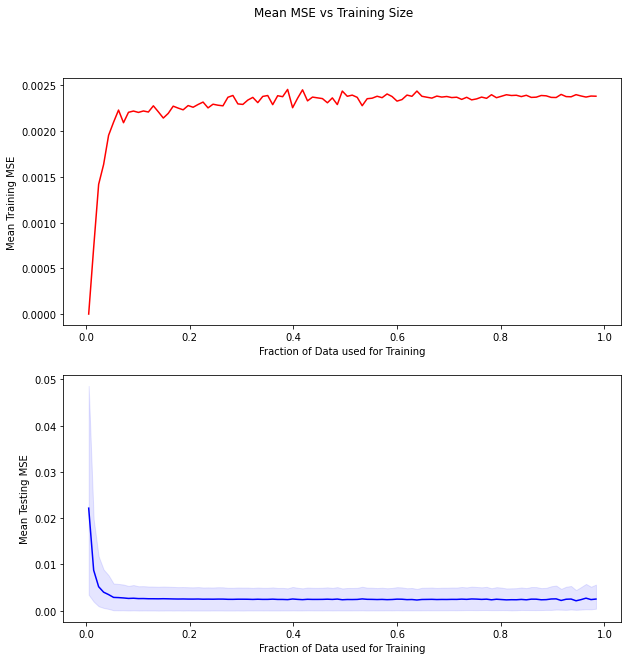

In [4]:

MSE_test2 = (pca_MSE_TEST,)
boot = bootstrap(MSE_test2, np.mean , vectorized=True, axis=1)
xvals = list(range(5,1035,10))
percent = [round((number / 1042),4) for number in xvals]

fig, (ax1, ax2) = plt.subplots(2,figsize=(10,10))
fig.suptitle('Mean MSE vs Training Size')

ax1.plot(percent, pca_MSE_TRAIN.mean(axis=1), c='r')
ax1.set(ylabel='Mean Training MSE', xlabel='Fraction of Data used for Training')

ax2.plot(percent, pca_MSE_TEST.mean(axis=1), c='b')
ax2.set(ylabel='Mean Testing MSE', xlabel='Fraction of Data used for Training')
ax2.fill_between(percent, (pca_MSE_TEST.mean(axis=1)-boot.confidence_interval.low), (pca_MSE_TEST.mean(axis=1)+boot.confidence_interval.high), color='b', alpha=.1)

In [8]:
num = 25
comp = 4

class Autoencoder(nn.Module):
    """Makes the main denoising auto

    Parameters
    ----------
    in_shape [int] : input shape
    enc_shape [int] : desired encoded shape
    """

    def __init__(self, in_shape, enc_shape):
        super(Autoencoder, self).__init__()
        
        self.encode = nn.Sequential(
            nn.Linear(in_shape, 384),
            nn.ReLU(True),
            nn.Linear(384, enc_shape),
        )
        
        self.decode = nn.Sequential(
            nn.BatchNorm1d(enc_shape),
            nn.Linear(enc_shape, 384),
            nn.ReLU(True),
            nn.Linear(384, in_shape)
        )
        
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

def train(model, error, optimizer, n_epochs, x):
    model.train()
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()
        output = model(x)

        error = nn.MSELoss()
        loss = error(output, x)
        loss.backward()
        optimizer.step()
        
        if epoch % int(0.05*n_epochs) == 0:
            print(f'epoch {epoch} \t Loss: {loss.item():.4g}')


ae_MSE_TRAIN = np.zeros((103, num), dtype=float)
ae_MSE_TEST = np.zeros((103, num), dtype=float)


output = np.zeros((num), dtype=float)
output_y = np.zeros((num), dtype=float)

def complete_train_test(n_epochs, scaled, num):
    counter = 0
    for num_af in range(5,1035,10):
        train_size = (num_af/1042)
        test_size = (1 - train_size)
        ts = 1042 - num_af
        encoder = Autoencoder(in_shape=384, enc_shape = comp).double().to(device)
        error = nn.MSELoss()
        learning_rate = 0.0001
        optimizer = optim.Adam(encoder.parameters(),lr=learning_rate, weight_decay=0)
        
        ae_X_train = np.zeros((num_af, num, 384), dtype=float)
        ae_X_test = np.zeros((num_af, num, 384), dtype=float)
        print(f'\n\nTRAIN SIZE: {train_size}   # of Airfoils: {num_af}')
        
        for j in range(num):
            ae_X_train, ae_X_test = train_test_split(scaled, test_size=test_size, shuffle=True)
            train(encoder, error, optimizer, n_epochs, torch.from_numpy(ae_X_train).to(device))
        
            output = encoder(torch.from_numpy(ae_X_train).to(device)).detach().cpu().numpy()
            output_y = encoder(torch.from_numpy(ae_X_test).to(device)).detach().cpu().numpy()

            ae_MSE_TRAIN[counter][j] = mean_squared_error(ae_X_train, output)
            ae_MSE_TEST[counter][j] = mean_squared_error(ae_X_test, output_y)
            print(f'\nIteration: {j}   \nTRAIN SIZE: {train_size}   # of Airfoils: {num_af}')
        counter += 1

In [9]:
%%time
comp=4
complete_train_test(1000, scaled, num)



TRAIN SIZE: 0.0047984644913627635   # of Airfoils: 5
epoch 50 	 Loss: 0.07857
epoch 100 	 Loss: 0.01321
epoch 150 	 Loss: 0.002222
epoch 200 	 Loss: 0.0005676
epoch 250 	 Loss: 0.00032
epoch 300 	 Loss: 0.0002811
epoch 350 	 Loss: 0.0002725
epoch 400 	 Loss: 0.0002677
epoch 450 	 Loss: 0.0002631
epoch 500 	 Loss: 0.0002581
epoch 550 	 Loss: 0.0002524
epoch 600 	 Loss: 0.000246
epoch 650 	 Loss: 0.0002386
epoch 700 	 Loss: 0.00023
epoch 750 	 Loss: 0.0002198
epoch 800 	 Loss: 0.0002086
epoch 850 	 Loss: 0.0001965
epoch 900 	 Loss: 0.0001835
epoch 950 	 Loss: 0.0001694
epoch 1000 	 Loss: 0.0001542

Iteration: 0   
TRAIN SIZE: 0.0047984644913627635   # of Airfoils: 5
epoch 50 	 Loss: 0.0002929
epoch 100 	 Loss: 1.572e-06
epoch 150 	 Loss: 8.449e-08
epoch 200 	 Loss: 7.687e-08
epoch 250 	 Loss: 7.677e-08
epoch 300 	 Loss: 7.671e-08
epoch 350 	 Loss: 7.665e-08
epoch 400 	 Loss: 7.659e-08
epoch 450 	 Loss: 7.653e-08
epoch 500 	 Loss: 7.646e-08
epoch 550 	 Loss: 7.639e-08
epoch 600 	 Loss: 

epoch 100 	 Loss: 3.283e-07
epoch 150 	 Loss: 2.741e-08
epoch 200 	 Loss: 2.582e-08
epoch 250 	 Loss: 2.581e-08
epoch 300 	 Loss: 2.581e-08
epoch 350 	 Loss: 2.581e-08
epoch 400 	 Loss: 2.581e-08
epoch 450 	 Loss: 2.581e-08
epoch 500 	 Loss: 2.581e-08
epoch 550 	 Loss: 2.581e-08
epoch 600 	 Loss: 2.581e-08
epoch 650 	 Loss: 2.581e-08
epoch 700 	 Loss: 2.581e-08
epoch 750 	 Loss: 2.58e-08
epoch 800 	 Loss: 2.58e-08
epoch 850 	 Loss: 2.58e-08
epoch 900 	 Loss: 2.58e-08
epoch 950 	 Loss: 2.58e-08
epoch 1000 	 Loss: 2.58e-08

Iteration: 13   
TRAIN SIZE: 0.0047984644913627635   # of Airfoils: 5
epoch 50 	 Loss: 0.0002822
epoch 100 	 Loss: 0.0001607
epoch 150 	 Loss: 0.0001343
epoch 200 	 Loss: 0.0001112
epoch 250 	 Loss: 8.975e-05
epoch 300 	 Loss: 7.049e-05
epoch 350 	 Loss: 5.375e-05
epoch 400 	 Loss: 3.985e-05
epoch 450 	 Loss: 2.882e-05
epoch 500 	 Loss: 2.042e-05
epoch 550 	 Loss: 1.425e-05
epoch 600 	 Loss: 9.837e-06
epoch 650 	 Loss: 6.752e-06
epoch 700 	 Loss: 4.633e-06
epoch 750 	

epoch 100 	 Loss: 0.001036
epoch 150 	 Loss: 0.0008478
epoch 200 	 Loss: 0.0007385
epoch 250 	 Loss: 0.0006656
epoch 300 	 Loss: 0.0006098
epoch 350 	 Loss: 0.0005619
epoch 400 	 Loss: 0.0005208
epoch 450 	 Loss: 0.0004837
epoch 500 	 Loss: 0.0004495
epoch 550 	 Loss: 0.0004168
epoch 600 	 Loss: 0.0003864
epoch 650 	 Loss: 0.0003568
epoch 700 	 Loss: 0.0003303
epoch 750 	 Loss: 0.0003026
epoch 800 	 Loss: 0.0002767
epoch 850 	 Loss: 0.000252
epoch 900 	 Loss: 0.0002289
epoch 950 	 Loss: 0.0002062
epoch 1000 	 Loss: 0.0001857

Iteration: 1   
TRAIN SIZE: 0.014395393474088292   # of Airfoils: 15
epoch 50 	 Loss: 0.001296
epoch 100 	 Loss: 0.0002892
epoch 150 	 Loss: 0.0001911
epoch 200 	 Loss: 0.0001696
epoch 250 	 Loss: 0.0001594
epoch 300 	 Loss: 0.0001519
epoch 350 	 Loss: 0.0001453
epoch 400 	 Loss: 0.0001391
epoch 450 	 Loss: 0.0001333
epoch 500 	 Loss: 0.0001278
epoch 550 	 Loss: 0.0001225
epoch 600 	 Loss: 0.0001174
epoch 650 	 Loss: 0.0001123
epoch 700 	 Loss: 0.0001074
epoch 750

epoch 200 	 Loss: 1.478e-05
epoch 250 	 Loss: 1.335e-05
epoch 300 	 Loss: 1.23e-05
epoch 350 	 Loss: 1.15e-05
epoch 400 	 Loss: 1.086e-05
epoch 450 	 Loss: 1.034e-05
epoch 500 	 Loss: 9.909e-06
epoch 550 	 Loss: 9.542e-06
epoch 600 	 Loss: 9.22e-06
epoch 650 	 Loss: 8.93e-06
epoch 700 	 Loss: 8.662e-06
epoch 750 	 Loss: 8.411e-06
epoch 800 	 Loss: 8.174e-06
epoch 850 	 Loss: 7.945e-06
epoch 900 	 Loss: 7.725e-06
epoch 950 	 Loss: 7.51e-06
epoch 1000 	 Loss: 7.299e-06

Iteration: 14   
TRAIN SIZE: 0.014395393474088292   # of Airfoils: 15
epoch 50 	 Loss: 0.0003201
epoch 100 	 Loss: 0.0002247
epoch 150 	 Loss: 0.0001834
epoch 200 	 Loss: 0.0001533
epoch 250 	 Loss: 0.0001303
epoch 300 	 Loss: 0.0001117
epoch 350 	 Loss: 9.598e-05
epoch 400 	 Loss: 8.197e-05
epoch 450 	 Loss: 6.868e-05
epoch 500 	 Loss: 5.58e-05
epoch 550 	 Loss: 4.393e-05
epoch 600 	 Loss: 3.338e-05
epoch 650 	 Loss: 2.48e-05
epoch 700 	 Loss: 1.806e-05
epoch 750 	 Loss: 1.296e-05
epoch 800 	 Loss: 9.201e-06
epoch 850 	 

epoch 200 	 Loss: 0.0003514
epoch 250 	 Loss: 0.0003408
epoch 300 	 Loss: 0.0003288
epoch 350 	 Loss: 0.0003146
epoch 400 	 Loss: 0.0002982
epoch 450 	 Loss: 0.0002799
epoch 500 	 Loss: 0.0002602
epoch 550 	 Loss: 0.0002405
epoch 600 	 Loss: 0.0002212
epoch 650 	 Loss: 0.0002031
epoch 700 	 Loss: 0.0001874
epoch 750 	 Loss: 0.000174
epoch 800 	 Loss: 0.0001623
epoch 850 	 Loss: 0.0001527
epoch 900 	 Loss: 0.0001445
epoch 950 	 Loss: 0.0001373
epoch 1000 	 Loss: 0.0001311

Iteration: 2   
TRAIN SIZE: 0.02399232245681382   # of Airfoils: 25
epoch 50 	 Loss: 0.0002721
epoch 100 	 Loss: 0.0002389
epoch 150 	 Loss: 0.0002267
epoch 200 	 Loss: 0.0002172
epoch 250 	 Loss: 0.0002086
epoch 300 	 Loss: 0.0001997
epoch 350 	 Loss: 0.0001911
epoch 400 	 Loss: 0.0001834
epoch 450 	 Loss: 0.0001755
epoch 500 	 Loss: 0.0001666
epoch 550 	 Loss: 0.0001579
epoch 600 	 Loss: 0.0001495
epoch 650 	 Loss: 0.00014
epoch 700 	 Loss: 0.0001303
epoch 750 	 Loss: 0.0001216
epoch 800 	 Loss: 0.0001139
epoch 850 

epoch 300 	 Loss: 2.939e-05
epoch 350 	 Loss: 2.635e-05
epoch 400 	 Loss: 2.401e-05
epoch 450 	 Loss: 2.209e-05
epoch 500 	 Loss: 2.047e-05
epoch 550 	 Loss: 1.909e-05
epoch 600 	 Loss: 1.79e-05
epoch 650 	 Loss: 1.684e-05
epoch 700 	 Loss: 1.588e-05
epoch 750 	 Loss: 1.501e-05
epoch 800 	 Loss: 1.42e-05
epoch 850 	 Loss: 1.346e-05
epoch 900 	 Loss: 1.277e-05
epoch 950 	 Loss: 1.213e-05
epoch 1000 	 Loss: 1.153e-05

Iteration: 15   
TRAIN SIZE: 0.02399232245681382   # of Airfoils: 25
epoch 50 	 Loss: 0.0001121
epoch 100 	 Loss: 7.25e-05
epoch 150 	 Loss: 5.873e-05
epoch 200 	 Loss: 4.964e-05
epoch 250 	 Loss: 4.29e-05
epoch 300 	 Loss: 3.766e-05
epoch 350 	 Loss: 3.354e-05
epoch 400 	 Loss: 3.023e-05
epoch 450 	 Loss: 2.755e-05
epoch 500 	 Loss: 2.529e-05
epoch 550 	 Loss: 2.335e-05
epoch 600 	 Loss: 2.167e-05
epoch 650 	 Loss: 2.021e-05
epoch 700 	 Loss: 1.892e-05
epoch 750 	 Loss: 1.778e-05
epoch 800 	 Loss: 1.675e-05
epoch 850 	 Loss: 1.577e-05
epoch 900 	 Loss: 1.479e-05
epoch 950 

epoch 350 	 Loss: 0.0001913
epoch 400 	 Loss: 0.0001574
epoch 450 	 Loss: 0.000134
epoch 500 	 Loss: 0.0001178
epoch 550 	 Loss: 0.0001065
epoch 600 	 Loss: 9.82e-05
epoch 650 	 Loss: 9.194e-05
epoch 700 	 Loss: 8.72e-05
epoch 750 	 Loss: 8.335e-05
epoch 800 	 Loss: 7.996e-05
epoch 850 	 Loss: 7.711e-05
epoch 900 	 Loss: 7.46e-05
epoch 950 	 Loss: 7.232e-05
epoch 1000 	 Loss: 7.024e-05

Iteration: 3   
TRAIN SIZE: 0.03358925143953935   # of Airfoils: 35
epoch 50 	 Loss: 0.0003063
epoch 100 	 Loss: 0.000238
epoch 150 	 Loss: 0.0001981
epoch 200 	 Loss: 0.0001687
epoch 250 	 Loss: 0.0001461
epoch 300 	 Loss: 0.000128
epoch 350 	 Loss: 0.0001132
epoch 400 	 Loss: 0.0001009
epoch 450 	 Loss: 9.051e-05
epoch 500 	 Loss: 8.165e-05
epoch 550 	 Loss: 7.405e-05
epoch 600 	 Loss: 6.741e-05
epoch 650 	 Loss: 6.16e-05
epoch 700 	 Loss: 5.655e-05
epoch 750 	 Loss: 5.212e-05
epoch 800 	 Loss: 4.824e-05
epoch 850 	 Loss: 4.485e-05
epoch 900 	 Loss: 4.189e-05
epoch 950 	 Loss: 3.928e-05
epoch 1000 	 L

epoch 500 	 Loss: 8.321e-05
epoch 550 	 Loss: 7.496e-05
epoch 600 	 Loss: 6.833e-05
epoch 650 	 Loss: 6.289e-05
epoch 700 	 Loss: 5.838e-05
epoch 750 	 Loss: 5.453e-05
epoch 800 	 Loss: 5.114e-05
epoch 850 	 Loss: 4.816e-05
epoch 900 	 Loss: 4.55e-05
epoch 950 	 Loss: 4.308e-05
epoch 1000 	 Loss: 4.085e-05

Iteration: 16   
TRAIN SIZE: 0.03358925143953935   # of Airfoils: 35
epoch 50 	 Loss: 0.0003347
epoch 100 	 Loss: 0.0002228
epoch 150 	 Loss: 0.0001794
epoch 200 	 Loss: 0.000145
epoch 250 	 Loss: 0.000118
epoch 300 	 Loss: 9.627e-05
epoch 350 	 Loss: 7.839e-05
epoch 400 	 Loss: 6.386e-05
epoch 450 	 Loss: 5.233e-05
epoch 500 	 Loss: 4.348e-05
epoch 550 	 Loss: 3.676e-05
epoch 600 	 Loss: 3.168e-05
epoch 650 	 Loss: 2.779e-05
epoch 700 	 Loss: 2.483e-05
epoch 750 	 Loss: 2.256e-05
epoch 800 	 Loss: 2.068e-05
epoch 850 	 Loss: 1.924e-05
epoch 900 	 Loss: 1.812e-05
epoch 950 	 Loss: 1.717e-05
epoch 1000 	 Loss: 1.633e-05

Iteration: 17   
TRAIN SIZE: 0.03358925143953935   # of Airfoil

epoch 600 	 Loss: 0.0001465
epoch 650 	 Loss: 0.0001386
epoch 700 	 Loss: 0.0001314
epoch 750 	 Loss: 0.000125
epoch 800 	 Loss: 0.0001194
epoch 850 	 Loss: 0.0001143
epoch 900 	 Loss: 0.0001098
epoch 950 	 Loss: 0.0001056
epoch 1000 	 Loss: 0.0001017

Iteration: 4   
TRAIN SIZE: 0.04318618042226487   # of Airfoils: 45
epoch 50 	 Loss: 0.000701
epoch 100 	 Loss: 0.000473
epoch 150 	 Loss: 0.0003252
epoch 200 	 Loss: 0.0002414
epoch 250 	 Loss: 0.0001975
epoch 300 	 Loss: 0.0001712
epoch 350 	 Loss: 0.0001528
epoch 400 	 Loss: 0.0001382
epoch 450 	 Loss: 0.0001256
epoch 500 	 Loss: 0.0001144
epoch 550 	 Loss: 0.0001044
epoch 600 	 Loss: 9.479e-05
epoch 650 	 Loss: 8.642e-05
epoch 700 	 Loss: 7.91e-05
epoch 750 	 Loss: 7.263e-05
epoch 800 	 Loss: 6.672e-05
epoch 850 	 Loss: 6.135e-05
epoch 900 	 Loss: 5.66e-05
epoch 950 	 Loss: 5.24e-05
epoch 1000 	 Loss: 4.865e-05

Iteration: 5   
TRAIN SIZE: 0.04318618042226487   # of Airfoils: 45
epoch 50 	 Loss: 0.0003869
epoch 100 	 Loss: 0.0002815


epoch 750 	 Loss: 2.853e-05
epoch 800 	 Loss: 2.659e-05
epoch 850 	 Loss: 2.498e-05
epoch 900 	 Loss: 2.364e-05
epoch 950 	 Loss: 2.248e-05
epoch 1000 	 Loss: 2.149e-05

Iteration: 17   
TRAIN SIZE: 0.04318618042226487   # of Airfoils: 45
epoch 50 	 Loss: 0.0001692
epoch 100 	 Loss: 0.0001089
epoch 150 	 Loss: 9.195e-05
epoch 200 	 Loss: 8.163e-05
epoch 250 	 Loss: 7.387e-05
epoch 300 	 Loss: 6.778e-05
epoch 350 	 Loss: 6.28e-05
epoch 400 	 Loss: 5.85e-05
epoch 450 	 Loss: 5.476e-05
epoch 500 	 Loss: 5.143e-05
epoch 550 	 Loss: 4.849e-05
epoch 600 	 Loss: 4.585e-05
epoch 650 	 Loss: 4.334e-05
epoch 700 	 Loss: 4.112e-05
epoch 750 	 Loss: 3.909e-05
epoch 800 	 Loss: 3.734e-05
epoch 850 	 Loss: 3.534e-05
epoch 900 	 Loss: 3.403e-05
epoch 950 	 Loss: 3.257e-05
epoch 1000 	 Loss: 3.089e-05

Iteration: 18   
TRAIN SIZE: 0.04318618042226487   # of Airfoils: 45
epoch 50 	 Loss: 0.0003548
epoch 100 	 Loss: 0.0002581
epoch 150 	 Loss: 0.0002197
epoch 200 	 Loss: 0.0001936
epoch 250 	 Loss: 0.00

epoch 800 	 Loss: 6.389e-05
epoch 850 	 Loss: 6.174e-05
epoch 900 	 Loss: 5.976e-05
epoch 950 	 Loss: 5.789e-05
epoch 1000 	 Loss: 5.612e-05

Iteration: 5   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 0.0002697
epoch 100 	 Loss: 0.0001895
epoch 150 	 Loss: 0.0001651
epoch 200 	 Loss: 0.0001516
epoch 250 	 Loss: 0.000142
epoch 300 	 Loss: 0.0001341
epoch 350 	 Loss: 0.0001271
epoch 400 	 Loss: 0.0001208
epoch 450 	 Loss: 0.0001149
epoch 500 	 Loss: 0.0001096
epoch 550 	 Loss: 0.0001047
epoch 600 	 Loss: 0.0001003
epoch 650 	 Loss: 9.631e-05
epoch 700 	 Loss: 9.266e-05
epoch 750 	 Loss: 8.933e-05
epoch 800 	 Loss: 8.617e-05
epoch 850 	 Loss: 8.317e-05
epoch 900 	 Loss: 8.036e-05
epoch 950 	 Loss: 7.781e-05
epoch 1000 	 Loss: 7.539e-05

Iteration: 6   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 0.0002463
epoch 100 	 Loss: 0.0001697
epoch 150 	 Loss: 0.0001385
epoch 200 	 Loss: 0.0001209
epoch 250 	 Loss: 0.0001097
epoch 300 	 Loss: 0.0

epoch 950 	 Loss: 3.759e-05
epoch 1000 	 Loss: 3.629e-05

Iteration: 18   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 0.0001581
epoch 100 	 Loss: 0.0001008
epoch 150 	 Loss: 8.384e-05
epoch 200 	 Loss: 7.22e-05
epoch 250 	 Loss: 6.401e-05
epoch 300 	 Loss: 5.806e-05
epoch 350 	 Loss: 5.358e-05
epoch 400 	 Loss: 5e-05
epoch 450 	 Loss: 4.705e-05
epoch 500 	 Loss: 4.457e-05
epoch 550 	 Loss: 4.247e-05
epoch 600 	 Loss: 4.066e-05
epoch 650 	 Loss: 3.908e-05
epoch 700 	 Loss: 3.738e-05
epoch 750 	 Loss: 3.6e-05
epoch 800 	 Loss: 3.482e-05
epoch 850 	 Loss: 3.375e-05
epoch 900 	 Loss: 3.276e-05
epoch 950 	 Loss: 3.184e-05
epoch 1000 	 Loss: 3.097e-05

Iteration: 19   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 0.0002086
epoch 100 	 Loss: 0.0001354
epoch 150 	 Loss: 0.0001203
epoch 200 	 Loss: 0.0001113
epoch 250 	 Loss: 0.0001046
epoch 300 	 Loss: 9.906e-05
epoch 350 	 Loss: 9.419e-05
epoch 400 	 Loss: 9.006e-05
epoch 450 	 Loss: 8.614e-

epoch 1000 	 Loss: 9.949e-05

Iteration: 6   
TRAIN SIZE: 0.06238003838771593   # of Airfoils: 65
epoch 50 	 Loss: 0.0002936
epoch 100 	 Loss: 0.00025
epoch 150 	 Loss: 0.0002264
epoch 200 	 Loss: 0.0002082
epoch 250 	 Loss: 0.0001932
epoch 300 	 Loss: 0.0001808
epoch 350 	 Loss: 0.0001701
epoch 400 	 Loss: 0.0001606
epoch 450 	 Loss: 0.0001523
epoch 500 	 Loss: 0.0001452
epoch 550 	 Loss: 0.0001388
epoch 600 	 Loss: 0.000133
epoch 650 	 Loss: 0.0001276
epoch 700 	 Loss: 0.0001226
epoch 750 	 Loss: 0.0001178
epoch 800 	 Loss: 0.0001134
epoch 850 	 Loss: 0.0001091
epoch 900 	 Loss: 0.000105
epoch 950 	 Loss: 0.0001016
epoch 1000 	 Loss: 9.733e-05

Iteration: 7   
TRAIN SIZE: 0.06238003838771593   # of Airfoils: 65
epoch 50 	 Loss: 0.0001393
epoch 100 	 Loss: 0.0001147
epoch 150 	 Loss: 0.0001044
epoch 200 	 Loss: 9.649e-05
epoch 250 	 Loss: 9.021e-05
epoch 300 	 Loss: 8.506e-05
epoch 350 	 Loss: 8.074e-05
epoch 400 	 Loss: 7.703e-05
epoch 450 	 Loss: 7.386e-05
epoch 500 	 Loss: 7.106e-0

epoch 50 	 Loss: 0.000245
epoch 100 	 Loss: 0.000141
epoch 150 	 Loss: 0.0001166
epoch 200 	 Loss: 0.0001025
epoch 250 	 Loss: 9.283e-05
epoch 300 	 Loss: 8.567e-05
epoch 350 	 Loss: 8.003e-05
epoch 400 	 Loss: 7.535e-05
epoch 450 	 Loss: 7.135e-05
epoch 500 	 Loss: 6.798e-05
epoch 550 	 Loss: 6.506e-05
epoch 600 	 Loss: 6.241e-05
epoch 650 	 Loss: 6.004e-05
epoch 700 	 Loss: 5.788e-05
epoch 750 	 Loss: 5.586e-05
epoch 800 	 Loss: 5.393e-05
epoch 850 	 Loss: 5.225e-05
epoch 900 	 Loss: 5.084e-05
epoch 950 	 Loss: 4.923e-05
epoch 1000 	 Loss: 4.795e-05

Iteration: 20   
TRAIN SIZE: 0.06238003838771593   # of Airfoils: 65
epoch 50 	 Loss: 0.0006202
epoch 100 	 Loss: 0.0002626
epoch 150 	 Loss: 0.0001758
epoch 200 	 Loss: 0.0001344
epoch 250 	 Loss: 0.0001107
epoch 300 	 Loss: 9.636e-05
epoch 350 	 Loss: 8.683e-05
epoch 400 	 Loss: 8.018e-05
epoch 450 	 Loss: 7.516e-05
epoch 500 	 Loss: 7.113e-05
epoch 550 	 Loss: 6.779e-05
epoch 600 	 Loss: 6.484e-05
epoch 650 	 Loss: 6.226e-05
epoch 700

epoch 100 	 Loss: 0.0001913
epoch 150 	 Loss: 0.0001671
epoch 200 	 Loss: 0.0001504
epoch 250 	 Loss: 0.000137
epoch 300 	 Loss: 0.0001253
epoch 350 	 Loss: 0.0001154
epoch 400 	 Loss: 0.0001069
epoch 450 	 Loss: 9.975e-05
epoch 500 	 Loss: 9.383e-05
epoch 550 	 Loss: 8.882e-05
epoch 600 	 Loss: 8.446e-05
epoch 650 	 Loss: 8.069e-05
epoch 700 	 Loss: 7.741e-05
epoch 750 	 Loss: 7.447e-05
epoch 800 	 Loss: 7.187e-05
epoch 850 	 Loss: 6.944e-05
epoch 900 	 Loss: 6.722e-05
epoch 950 	 Loss: 6.518e-05
epoch 1000 	 Loss: 6.326e-05

Iteration: 8   
TRAIN SIZE: 0.07197696737044146   # of Airfoils: 75
epoch 50 	 Loss: 0.0001734
epoch 100 	 Loss: 0.0001274
epoch 150 	 Loss: 0.0001092
epoch 200 	 Loss: 9.796e-05
epoch 250 	 Loss: 8.998e-05
epoch 300 	 Loss: 8.342e-05
epoch 350 	 Loss: 7.825e-05
epoch 400 	 Loss: 7.423e-05
epoch 450 	 Loss: 7.084e-05
epoch 500 	 Loss: 6.789e-05
epoch 550 	 Loss: 6.529e-05
epoch 600 	 Loss: 6.295e-05
epoch 650 	 Loss: 6.085e-05
epoch 700 	 Loss: 5.896e-05
epoch 75

epoch 200 	 Loss: 5.739e-05
epoch 250 	 Loss: 5.097e-05
epoch 300 	 Loss: 4.679e-05
epoch 350 	 Loss: 4.384e-05
epoch 400 	 Loss: 4.158e-05
epoch 450 	 Loss: 3.975e-05
epoch 500 	 Loss: 3.818e-05
epoch 550 	 Loss: 3.679e-05
epoch 600 	 Loss: 3.556e-05
epoch 650 	 Loss: 3.439e-05
epoch 700 	 Loss: 3.336e-05
epoch 750 	 Loss: 3.242e-05
epoch 800 	 Loss: 3.155e-05
epoch 850 	 Loss: 3.073e-05
epoch 900 	 Loss: 2.995e-05
epoch 950 	 Loss: 2.921e-05
epoch 1000 	 Loss: 2.851e-05

Iteration: 21   
TRAIN SIZE: 0.07197696737044146   # of Airfoils: 75
epoch 50 	 Loss: 0.0001024
epoch 100 	 Loss: 7.406e-05
epoch 150 	 Loss: 6.537e-05
epoch 200 	 Loss: 6.011e-05
epoch 250 	 Loss: 5.667e-05
epoch 300 	 Loss: 5.405e-05
epoch 350 	 Loss: 5.189e-05
epoch 400 	 Loss: 5.002e-05
epoch 450 	 Loss: 4.836e-05
epoch 500 	 Loss: 4.687e-05
epoch 550 	 Loss: 4.551e-05
epoch 600 	 Loss: 4.425e-05
epoch 650 	 Loss: 4.307e-05
epoch 700 	 Loss: 4.195e-05
epoch 750 	 Loss: 4.09e-05
epoch 800 	 Loss: 3.991e-05
epoch 8

epoch 250 	 Loss: 9.74e-05
epoch 300 	 Loss: 8.673e-05
epoch 350 	 Loss: 7.885e-05
epoch 400 	 Loss: 7.275e-05
epoch 450 	 Loss: 6.762e-05
epoch 500 	 Loss: 6.317e-05
epoch 550 	 Loss: 5.939e-05
epoch 600 	 Loss: 5.609e-05
epoch 650 	 Loss: 5.303e-05
epoch 700 	 Loss: 5.032e-05
epoch 750 	 Loss: 4.836e-05
epoch 800 	 Loss: 4.574e-05
epoch 850 	 Loss: 4.413e-05
epoch 900 	 Loss: 4.169e-05
epoch 950 	 Loss: 3.991e-05
epoch 1000 	 Loss: 3.822e-05

Iteration: 9   
TRAIN SIZE: 0.08157389635316699   # of Airfoils: 85
epoch 50 	 Loss: 0.0007388
epoch 100 	 Loss: 0.0005895
epoch 150 	 Loss: 0.0005332
epoch 200 	 Loss: 0.0004875
epoch 250 	 Loss: 0.0004456
epoch 300 	 Loss: 0.0004068
epoch 350 	 Loss: 0.0003702
epoch 400 	 Loss: 0.0003376
epoch 450 	 Loss: 0.0003098
epoch 500 	 Loss: 0.0002868
epoch 550 	 Loss: 0.0002679
epoch 600 	 Loss: 0.0002526
epoch 650 	 Loss: 0.00024
epoch 700 	 Loss: 0.0002294
epoch 750 	 Loss: 0.0002202
epoch 800 	 Loss: 0.000212
epoch 850 	 Loss: 0.0002047
epoch 900 	

epoch 350 	 Loss: 5.803e-05
epoch 400 	 Loss: 5.571e-05
epoch 450 	 Loss: 5.37e-05
epoch 500 	 Loss: 5.194e-05
epoch 550 	 Loss: 5.037e-05
epoch 600 	 Loss: 4.917e-05
epoch 650 	 Loss: 4.779e-05
epoch 700 	 Loss: 4.658e-05
epoch 750 	 Loss: 4.55e-05
epoch 800 	 Loss: 4.466e-05
epoch 850 	 Loss: 4.341e-05
epoch 900 	 Loss: 4.26e-05
epoch 950 	 Loss: 4.292e-05
epoch 1000 	 Loss: 4.217e-05

Iteration: 22   
TRAIN SIZE: 0.08157389635316699   # of Airfoils: 85
epoch 50 	 Loss: 0.0001219
epoch 100 	 Loss: 8.464e-05
epoch 150 	 Loss: 6.984e-05
epoch 200 	 Loss: 6.113e-05
epoch 250 	 Loss: 5.529e-05
epoch 300 	 Loss: 5.123e-05
epoch 350 	 Loss: 4.828e-05
epoch 400 	 Loss: 4.605e-05
epoch 450 	 Loss: 4.427e-05
epoch 500 	 Loss: 4.279e-05
epoch 550 	 Loss: 4.154e-05
epoch 600 	 Loss: 4.044e-05
epoch 650 	 Loss: 3.945e-05
epoch 700 	 Loss: 3.858e-05
epoch 750 	 Loss: 3.778e-05
epoch 800 	 Loss: 3.704e-05
epoch 850 	 Loss: 3.637e-05
epoch 900 	 Loss: 3.573e-05
epoch 950 	 Loss: 3.514e-05
epoch 100

epoch 400 	 Loss: 6.866e-05
epoch 450 	 Loss: 6.576e-05
epoch 500 	 Loss: 6.341e-05
epoch 550 	 Loss: 6.15e-05
epoch 600 	 Loss: 5.992e-05
epoch 650 	 Loss: 5.853e-05
epoch 700 	 Loss: 5.727e-05
epoch 750 	 Loss: 5.61e-05
epoch 800 	 Loss: 5.503e-05
epoch 850 	 Loss: 5.404e-05
epoch 900 	 Loss: 5.31e-05
epoch 950 	 Loss: 5.22e-05
epoch 1000 	 Loss: 5.133e-05

Iteration: 10   
TRAIN SIZE: 0.09117082533589252   # of Airfoils: 95
epoch 50 	 Loss: 0.0001754
epoch 100 	 Loss: 0.0001306
epoch 150 	 Loss: 0.0001167
epoch 200 	 Loss: 0.0001072
epoch 250 	 Loss: 0.0001
epoch 300 	 Loss: 9.423e-05
epoch 350 	 Loss: 8.951e-05
epoch 400 	 Loss: 8.562e-05
epoch 450 	 Loss: 8.232e-05
epoch 500 	 Loss: 7.946e-05
epoch 550 	 Loss: 7.692e-05
epoch 600 	 Loss: 7.462e-05
epoch 650 	 Loss: 7.254e-05
epoch 700 	 Loss: 7.058e-05
epoch 750 	 Loss: 6.873e-05
epoch 800 	 Loss: 6.702e-05
epoch 850 	 Loss: 6.544e-05
epoch 900 	 Loss: 6.396e-05
epoch 950 	 Loss: 6.268e-05
epoch 1000 	 Loss: 6.188e-05

Iteration: 

epoch 500 	 Loss: 3.951e-05
epoch 550 	 Loss: 3.823e-05
epoch 600 	 Loss: 3.702e-05
epoch 650 	 Loss: 3.605e-05
epoch 700 	 Loss: 3.554e-05
epoch 750 	 Loss: 3.481e-05
epoch 800 	 Loss: 3.397e-05
epoch 850 	 Loss: 3.359e-05
epoch 900 	 Loss: 3.262e-05
epoch 950 	 Loss: 3.252e-05
epoch 1000 	 Loss: 3.136e-05

Iteration: 23   
TRAIN SIZE: 0.09117082533589252   # of Airfoils: 95
epoch 50 	 Loss: 0.0001842
epoch 100 	 Loss: 0.0001258
epoch 150 	 Loss: 0.0001081
epoch 200 	 Loss: 9.839e-05
epoch 250 	 Loss: 9.222e-05
epoch 300 	 Loss: 8.765e-05
epoch 350 	 Loss: 8.413e-05
epoch 400 	 Loss: 8.123e-05
epoch 450 	 Loss: 7.871e-05
epoch 500 	 Loss: 7.644e-05
epoch 550 	 Loss: 7.445e-05
epoch 600 	 Loss: 7.265e-05
epoch 650 	 Loss: 7.1e-05
epoch 700 	 Loss: 6.949e-05
epoch 750 	 Loss: 6.808e-05
epoch 800 	 Loss: 6.673e-05
epoch 850 	 Loss: 6.546e-05
epoch 900 	 Loss: 6.426e-05
epoch 950 	 Loss: 6.307e-05
epoch 1000 	 Loss: 6.197e-05

Iteration: 24   
TRAIN SIZE: 0.09117082533589252   # of Airfoi

epoch 500 	 Loss: 8.99e-05
epoch 550 	 Loss: 8.58e-05
epoch 600 	 Loss: 8.229e-05
epoch 650 	 Loss: 7.916e-05
epoch 700 	 Loss: 7.632e-05
epoch 750 	 Loss: 7.361e-05
epoch 800 	 Loss: 7.108e-05
epoch 850 	 Loss: 6.871e-05
epoch 900 	 Loss: 6.646e-05
epoch 950 	 Loss: 6.435e-05
epoch 1000 	 Loss: 6.235e-05

Iteration: 11   
TRAIN SIZE: 0.10076775431861804   # of Airfoils: 105
epoch 50 	 Loss: 0.0002175
epoch 100 	 Loss: 0.0001618
epoch 150 	 Loss: 0.0001398
epoch 200 	 Loss: 0.0001247
epoch 250 	 Loss: 0.0001135
epoch 300 	 Loss: 0.0001048
epoch 350 	 Loss: 9.806e-05
epoch 400 	 Loss: 9.264e-05
epoch 450 	 Loss: 8.818e-05
epoch 500 	 Loss: 8.441e-05
epoch 550 	 Loss: 8.122e-05
epoch 600 	 Loss: 7.846e-05
epoch 650 	 Loss: 7.6e-05
epoch 700 	 Loss: 7.378e-05
epoch 750 	 Loss: 7.168e-05
epoch 800 	 Loss: 6.971e-05
epoch 850 	 Loss: 6.791e-05
epoch 900 	 Loss: 6.625e-05
epoch 950 	 Loss: 6.478e-05
epoch 1000 	 Loss: 6.339e-05

Iteration: 12   
TRAIN SIZE: 0.10076775431861804   # of Airfoil

epoch 550 	 Loss: 7.452e-05
epoch 600 	 Loss: 7.237e-05
epoch 650 	 Loss: 7.035e-05
epoch 700 	 Loss: 6.848e-05
epoch 750 	 Loss: 6.669e-05
epoch 800 	 Loss: 6.478e-05
epoch 850 	 Loss: 6.298e-05
epoch 900 	 Loss: 6.13e-05
epoch 950 	 Loss: 5.973e-05
epoch 1000 	 Loss: 5.823e-05

Iteration: 24   
TRAIN SIZE: 0.10076775431861804   # of Airfoils: 105


TRAIN SIZE: 0.11036468330134357   # of Airfoils: 115
epoch 50 	 Loss: 0.1094
epoch 100 	 Loss: 0.03373
epoch 150 	 Loss: 0.0156
epoch 200 	 Loss: 0.008881
epoch 250 	 Loss: 0.005661
epoch 300 	 Loss: 0.003899
epoch 350 	 Loss: 0.002904
epoch 400 	 Loss: 0.002296
epoch 450 	 Loss: 0.001875
epoch 500 	 Loss: 0.001564
epoch 550 	 Loss: 0.001334
epoch 600 	 Loss: 0.001166
epoch 650 	 Loss: 0.001045
epoch 700 	 Loss: 0.0009606
epoch 750 	 Loss: 0.0008967
epoch 800 	 Loss: 0.0008525
epoch 850 	 Loss: 0.000816
epoch 900 	 Loss: 0.0007883
epoch 950 	 Loss: 0.0007647
epoch 1000 	 Loss: 0.0007444

Iteration: 0   
TRAIN SIZE: 0.11036468330134357   # 

epoch 600 	 Loss: 5.694e-05
epoch 650 	 Loss: 5.427e-05
epoch 700 	 Loss: 5.188e-05
epoch 750 	 Loss: 4.962e-05
epoch 800 	 Loss: 4.752e-05
epoch 850 	 Loss: 4.563e-05
epoch 900 	 Loss: 4.386e-05
epoch 950 	 Loss: 4.223e-05
epoch 1000 	 Loss: 4.071e-05

Iteration: 12   
TRAIN SIZE: 0.11036468330134357   # of Airfoils: 115
epoch 50 	 Loss: 0.0001528
epoch 100 	 Loss: 0.0001073
epoch 150 	 Loss: 9.516e-05
epoch 200 	 Loss: 8.852e-05
epoch 250 	 Loss: 8.4e-05
epoch 300 	 Loss: 8.061e-05
epoch 350 	 Loss: 7.779e-05
epoch 400 	 Loss: 7.529e-05
epoch 450 	 Loss: 7.319e-05
epoch 500 	 Loss: 7.121e-05
epoch 550 	 Loss: 6.934e-05
epoch 600 	 Loss: 6.718e-05
epoch 650 	 Loss: 6.546e-05
epoch 700 	 Loss: 6.382e-05
epoch 750 	 Loss: 6.233e-05
epoch 800 	 Loss: 6.093e-05
epoch 850 	 Loss: 5.966e-05
epoch 900 	 Loss: 5.846e-05
epoch 950 	 Loss: 5.718e-05
epoch 1000 	 Loss: 5.646e-05

Iteration: 13   
TRAIN SIZE: 0.11036468330134357   # of Airfoils: 115
epoch 50 	 Loss: 8.082e-05
epoch 100 	 Loss: 6.

epoch 600 	 Loss: 0.001273
epoch 650 	 Loss: 0.00114
epoch 700 	 Loss: 0.001022
epoch 750 	 Loss: 0.0009223
epoch 800 	 Loss: 0.0008374
epoch 850 	 Loss: 0.0007677
epoch 900 	 Loss: 0.0007112
epoch 950 	 Loss: 0.0006635
epoch 1000 	 Loss: 0.0006248

Iteration: 0   
TRAIN SIZE: 0.1199616122840691   # of Airfoils: 125
epoch 50 	 Loss: 0.001224
epoch 100 	 Loss: 0.001156
epoch 150 	 Loss: 0.001105
epoch 200 	 Loss: 0.001058
epoch 250 	 Loss: 0.001013
epoch 300 	 Loss: 0.000967
epoch 350 	 Loss: 0.0009256
epoch 400 	 Loss: 0.0008702
epoch 450 	 Loss: 0.0008239
epoch 500 	 Loss: 0.0007719
epoch 550 	 Loss: 0.0007224
epoch 600 	 Loss: 0.0006803
epoch 650 	 Loss: 0.0006334
epoch 700 	 Loss: 0.0006008
epoch 750 	 Loss: 0.0005644
epoch 800 	 Loss: 0.0005382
epoch 850 	 Loss: 0.0005098
epoch 900 	 Loss: 0.0004822
epoch 950 	 Loss: 0.0004606
epoch 1000 	 Loss: 0.0004414

Iteration: 1   
TRAIN SIZE: 0.1199616122840691   # of Airfoils: 125
epoch 50 	 Loss: 0.0004315
epoch 100 	 Loss: 0.0003058
epoc

epoch 750 	 Loss: 4.623e-05
epoch 800 	 Loss: 4.527e-05
epoch 850 	 Loss: 4.436e-05
epoch 900 	 Loss: 4.349e-05
epoch 950 	 Loss: 4.268e-05
epoch 1000 	 Loss: 4.183e-05

Iteration: 13   
TRAIN SIZE: 0.1199616122840691   # of Airfoils: 125
epoch 50 	 Loss: 0.0001337
epoch 100 	 Loss: 9.934e-05
epoch 150 	 Loss: 8.86e-05
epoch 200 	 Loss: 8.135e-05
epoch 250 	 Loss: 7.57e-05
epoch 300 	 Loss: 7.16e-05
epoch 350 	 Loss: 6.843e-05
epoch 400 	 Loss: 6.588e-05
epoch 450 	 Loss: 6.385e-05
epoch 500 	 Loss: 6.191e-05
epoch 550 	 Loss: 6.05e-05
epoch 600 	 Loss: 5.867e-05
epoch 650 	 Loss: 5.803e-05
epoch 700 	 Loss: 5.614e-05
epoch 750 	 Loss: 5.465e-05
epoch 800 	 Loss: 5.359e-05
epoch 850 	 Loss: 5.304e-05
epoch 900 	 Loss: 5.481e-05
epoch 950 	 Loss: 5.066e-05
epoch 1000 	 Loss: 5.177e-05

Iteration: 14   
TRAIN SIZE: 0.1199616122840691   # of Airfoils: 125
epoch 50 	 Loss: 0.0001135
epoch 100 	 Loss: 9.499e-05
epoch 150 	 Loss: 8.654e-05
epoch 200 	 Loss: 8.085e-05
epoch 250 	 Loss: 7.646e

epoch 800 	 Loss: 0.0004944
epoch 850 	 Loss: 0.0004766
epoch 900 	 Loss: 0.0004586
epoch 950 	 Loss: 0.0004439
epoch 1000 	 Loss: 0.0004297

Iteration: 1   
TRAIN SIZE: 0.1295585412667946   # of Airfoils: 135
epoch 50 	 Loss: 0.0006508
epoch 100 	 Loss: 0.0005944
epoch 150 	 Loss: 0.0005605
epoch 200 	 Loss: 0.000534
epoch 250 	 Loss: 0.0005115
epoch 300 	 Loss: 0.0004917
epoch 350 	 Loss: 0.0004734
epoch 400 	 Loss: 0.0004564
epoch 450 	 Loss: 0.0004405
epoch 500 	 Loss: 0.0004255
epoch 550 	 Loss: 0.0004107
epoch 600 	 Loss: 0.0003968
epoch 650 	 Loss: 0.0003836
epoch 700 	 Loss: 0.0003703
epoch 750 	 Loss: 0.000357
epoch 800 	 Loss: 0.0003468
epoch 850 	 Loss: 0.000334
epoch 900 	 Loss: 0.0003229
epoch 950 	 Loss: 0.000314
epoch 1000 	 Loss: 0.0003035

Iteration: 2   
TRAIN SIZE: 0.1295585412667946   # of Airfoils: 135
epoch 50 	 Loss: 0.0003113
epoch 100 	 Loss: 0.0002671
epoch 150 	 Loss: 0.0002502
epoch 200 	 Loss: 0.0002376
epoch 250 	 Loss: 0.0002271
epoch 300 	 Loss: 0.000218

epoch 900 	 Loss: 4.289e-05
epoch 950 	 Loss: 4.302e-05
epoch 1000 	 Loss: 4.142e-05

Iteration: 14   
TRAIN SIZE: 0.1295585412667946   # of Airfoils: 135
epoch 50 	 Loss: 0.0001518
epoch 100 	 Loss: 0.000108
epoch 150 	 Loss: 9.035e-05
epoch 200 	 Loss: 7.915e-05
epoch 250 	 Loss: 7.102e-05
epoch 300 	 Loss: 6.479e-05
epoch 350 	 Loss: 5.998e-05
epoch 400 	 Loss: 5.612e-05
epoch 450 	 Loss: 5.289e-05
epoch 500 	 Loss: 5.011e-05
epoch 550 	 Loss: 4.77e-05
epoch 600 	 Loss: 4.615e-05
epoch 650 	 Loss: 4.654e-05
epoch 700 	 Loss: 4.314e-05
epoch 750 	 Loss: 4.164e-05
epoch 800 	 Loss: 4.208e-05
epoch 850 	 Loss: 3.882e-05
epoch 900 	 Loss: 3.861e-05
epoch 950 	 Loss: 4.009e-05
epoch 1000 	 Loss: 3.844e-05

Iteration: 15   
TRAIN SIZE: 0.1295585412667946   # of Airfoils: 135
epoch 50 	 Loss: 0.0001033
epoch 100 	 Loss: 8.412e-05
epoch 150 	 Loss: 7.72e-05
epoch 200 	 Loss: 7.278e-05
epoch 250 	 Loss: 6.94e-05
epoch 300 	 Loss: 6.667e-05
epoch 350 	 Loss: 6.434e-05
epoch 400 	 Loss: 6.231e

epoch 950 	 Loss: 0.0002655
epoch 1000 	 Loss: 0.0002564

Iteration: 2   
TRAIN SIZE: 0.13915547024952016   # of Airfoils: 145
epoch 50 	 Loss: 0.0004008
epoch 100 	 Loss: 0.0003377
epoch 150 	 Loss: 0.0003173
epoch 200 	 Loss: 0.0003045
epoch 250 	 Loss: 0.0002944
epoch 300 	 Loss: 0.0002859
epoch 350 	 Loss: 0.0002784
epoch 400 	 Loss: 0.0002715
epoch 450 	 Loss: 0.0002647
epoch 500 	 Loss: 0.0002575
epoch 550 	 Loss: 0.0002508
epoch 600 	 Loss: 0.0002445
epoch 650 	 Loss: 0.0002386
epoch 700 	 Loss: 0.0002327
epoch 750 	 Loss: 0.000227
epoch 800 	 Loss: 0.0002217
epoch 850 	 Loss: 0.0002166
epoch 900 	 Loss: 0.0002111
epoch 950 	 Loss: 0.000206
epoch 1000 	 Loss: 0.0002028

Iteration: 3   
TRAIN SIZE: 0.13915547024952016   # of Airfoils: 145
epoch 50 	 Loss: 0.0006955
epoch 100 	 Loss: 0.0005168
epoch 150 	 Loss: 0.0004409
epoch 200 	 Loss: 0.0003994
epoch 250 	 Loss: 0.0003718
epoch 300 	 Loss: 0.0003503
epoch 350 	 Loss: 0.0003319
epoch 400 	 Loss: 0.0003159
epoch 450 	 Loss: 0.00

epoch 1000 	 Loss: 4.813e-05

Iteration: 15   
TRAIN SIZE: 0.13915547024952016   # of Airfoils: 145
epoch 50 	 Loss: 9.585e-05
epoch 100 	 Loss: 7.823e-05
epoch 150 	 Loss: 7.224e-05
epoch 200 	 Loss: 6.827e-05
epoch 250 	 Loss: 6.529e-05
epoch 300 	 Loss: 6.29e-05
epoch 350 	 Loss: 6.088e-05
epoch 400 	 Loss: 5.908e-05
epoch 450 	 Loss: 5.745e-05
epoch 500 	 Loss: 5.596e-05
epoch 550 	 Loss: 5.461e-05
epoch 600 	 Loss: 5.324e-05
epoch 650 	 Loss: 5.197e-05
epoch 700 	 Loss: 5.085e-05
epoch 750 	 Loss: 4.98e-05
epoch 800 	 Loss: 4.861e-05
epoch 850 	 Loss: 4.742e-05
epoch 900 	 Loss: 4.652e-05
epoch 950 	 Loss: 4.563e-05
epoch 1000 	 Loss: 4.439e-05

Iteration: 16   
TRAIN SIZE: 0.13915547024952016   # of Airfoils: 145
epoch 50 	 Loss: 8.835e-05
epoch 100 	 Loss: 6.719e-05
epoch 150 	 Loss: 5.976e-05
epoch 200 	 Loss: 5.516e-05
epoch 250 	 Loss: 5.188e-05
epoch 300 	 Loss: 4.976e-05
epoch 350 	 Loss: 4.792e-05
epoch 400 	 Loss: 4.563e-05
epoch 450 	 Loss: 4.432e-05
epoch 500 	 Loss: 4.

epoch 1000 	 Loss: 0.0002534

Iteration: 3   
TRAIN SIZE: 0.14875239923224567   # of Airfoils: 155
epoch 50 	 Loss: 0.0003316
epoch 100 	 Loss: 0.0002633
epoch 150 	 Loss: 0.0002326
epoch 200 	 Loss: 0.0002128
epoch 250 	 Loss: 0.0001981
epoch 300 	 Loss: 0.000187
epoch 350 	 Loss: 0.000178
epoch 400 	 Loss: 0.0001703
epoch 450 	 Loss: 0.0001636
epoch 500 	 Loss: 0.0001577
epoch 550 	 Loss: 0.0001524
epoch 600 	 Loss: 0.000148
epoch 650 	 Loss: 0.0001436
epoch 700 	 Loss: 0.0001421
epoch 750 	 Loss: 0.0001376
epoch 800 	 Loss: 0.000134
epoch 850 	 Loss: 0.000129
epoch 900 	 Loss: 0.0001289
epoch 950 	 Loss: 0.0001223
epoch 1000 	 Loss: 0.0001198

Iteration: 4   
TRAIN SIZE: 0.14875239923224567   # of Airfoils: 155
epoch 50 	 Loss: 0.0003515
epoch 100 	 Loss: 0.0003028
epoch 150 	 Loss: 0.0002709
epoch 200 	 Loss: 0.0002432
epoch 250 	 Loss: 0.0002193
epoch 300 	 Loss: 0.0001983
epoch 350 	 Loss: 0.0001805
epoch 400 	 Loss: 0.0001658
epoch 450 	 Loss: 0.0001536
epoch 500 	 Loss: 0.00014

epoch 50 	 Loss: 0.0001386
epoch 100 	 Loss: 0.0001118
epoch 150 	 Loss: 0.0001036
epoch 200 	 Loss: 9.886e-05
epoch 250 	 Loss: 9.557e-05
epoch 300 	 Loss: 9.29e-05
epoch 350 	 Loss: 9.058e-05
epoch 400 	 Loss: 8.843e-05
epoch 450 	 Loss: 8.636e-05
epoch 500 	 Loss: 8.446e-05
epoch 550 	 Loss: 8.266e-05
epoch 600 	 Loss: 8.096e-05
epoch 650 	 Loss: 7.929e-05
epoch 700 	 Loss: 7.767e-05
epoch 750 	 Loss: 7.611e-05
epoch 800 	 Loss: 7.463e-05
epoch 850 	 Loss: 7.353e-05
epoch 900 	 Loss: 7.209e-05
epoch 950 	 Loss: 7.07e-05
epoch 1000 	 Loss: 6.885e-05

Iteration: 17   
TRAIN SIZE: 0.14875239923224567   # of Airfoils: 155
epoch 50 	 Loss: 0.000141
epoch 100 	 Loss: 0.0001208
epoch 150 	 Loss: 0.0001119
epoch 200 	 Loss: 0.0001056
epoch 250 	 Loss: 0.0001002
epoch 300 	 Loss: 9.6e-05
epoch 350 	 Loss: 9.166e-05
epoch 400 	 Loss: 9.008e-05
epoch 450 	 Loss: 8.522e-05
epoch 500 	 Loss: 8.245e-05
epoch 550 	 Loss: 7.859e-05
epoch 600 	 Loss: 7.63e-05
epoch 650 	 Loss: 7.661e-05
epoch 700 	 

epoch 50 	 Loss: 0.0001963
epoch 100 	 Loss: 0.000169
epoch 150 	 Loss: 0.0001592
epoch 200 	 Loss: 0.0001518
epoch 250 	 Loss: 0.0001456
epoch 300 	 Loss: 0.0001404
epoch 350 	 Loss: 0.0001358
epoch 400 	 Loss: 0.0001317
epoch 450 	 Loss: 0.000128
epoch 500 	 Loss: 0.0001245
epoch 550 	 Loss: 0.0001213
epoch 600 	 Loss: 0.0001183
epoch 650 	 Loss: 0.0001155
epoch 700 	 Loss: 0.0001128
epoch 750 	 Loss: 0.0001102
epoch 800 	 Loss: 0.0001077
epoch 850 	 Loss: 0.0001054
epoch 900 	 Loss: 0.0001031
epoch 950 	 Loss: 0.000101
epoch 1000 	 Loss: 9.917e-05

Iteration: 5   
TRAIN SIZE: 0.15834932821497122   # of Airfoils: 165
epoch 50 	 Loss: 0.0001691
epoch 100 	 Loss: 0.0001387
epoch 150 	 Loss: 0.0001284
epoch 200 	 Loss: 0.0001217
epoch 250 	 Loss: 0.0001163
epoch 300 	 Loss: 0.000112
epoch 350 	 Loss: 0.0001085
epoch 400 	 Loss: 0.0001055
epoch 450 	 Loss: 0.0001028
epoch 500 	 Loss: 0.0001003
epoch 550 	 Loss: 9.801e-05
epoch 600 	 Loss: 9.588e-05
epoch 650 	 Loss: 9.391e-05
epoch 700 	

epoch 100 	 Loss: 7.379e-05
epoch 150 	 Loss: 6.819e-05
epoch 200 	 Loss: 6.472e-05
epoch 250 	 Loss: 6.211e-05
epoch 300 	 Loss: 5.999e-05
epoch 350 	 Loss: 5.82e-05
epoch 400 	 Loss: 5.668e-05
epoch 450 	 Loss: 5.538e-05
epoch 500 	 Loss: 5.415e-05
epoch 550 	 Loss: 5.309e-05
epoch 600 	 Loss: 5.212e-05
epoch 650 	 Loss: 5.12e-05
epoch 700 	 Loss: 5.033e-05
epoch 750 	 Loss: 4.956e-05
epoch 800 	 Loss: 4.884e-05
epoch 850 	 Loss: 4.817e-05
epoch 900 	 Loss: 4.756e-05
epoch 950 	 Loss: 4.694e-05
epoch 1000 	 Loss: 4.649e-05

Iteration: 18   
TRAIN SIZE: 0.15834932821497122   # of Airfoils: 165
epoch 50 	 Loss: 7.406e-05
epoch 100 	 Loss: 5.939e-05
epoch 150 	 Loss: 5.304e-05
epoch 200 	 Loss: 4.895e-05
epoch 250 	 Loss: 4.593e-05
epoch 300 	 Loss: 4.359e-05
epoch 350 	 Loss: 4.17e-05
epoch 400 	 Loss: 4.016e-05
epoch 450 	 Loss: 3.889e-05
epoch 500 	 Loss: 3.78e-05
epoch 550 	 Loss: 3.685e-05
epoch 600 	 Loss: 3.6e-05
epoch 650 	 Loss: 3.527e-05
epoch 700 	 Loss: 3.455e-05
epoch 750 	

epoch 100 	 Loss: 0.0001892
epoch 150 	 Loss: 0.0001758
epoch 200 	 Loss: 0.000166
epoch 250 	 Loss: 0.000158
epoch 300 	 Loss: 0.0001513
epoch 350 	 Loss: 0.0001452
epoch 400 	 Loss: 0.0001399
epoch 450 	 Loss: 0.0001364
epoch 500 	 Loss: 0.0001299
epoch 550 	 Loss: 0.0001254
epoch 600 	 Loss: 0.0001238
epoch 650 	 Loss: 0.0001191
epoch 700 	 Loss: 0.0001132
epoch 750 	 Loss: 0.0001096
epoch 800 	 Loss: 0.0001065
epoch 850 	 Loss: 0.000103
epoch 900 	 Loss: 9.891e-05
epoch 950 	 Loss: 9.748e-05
epoch 1000 	 Loss: 9.387e-05

Iteration: 6   
TRAIN SIZE: 0.16794625719769674   # of Airfoils: 175
epoch 50 	 Loss: 0.0002246
epoch 100 	 Loss: 0.000166
epoch 150 	 Loss: 0.000145
epoch 200 	 Loss: 0.0001318
epoch 250 	 Loss: 0.0001223
epoch 300 	 Loss: 0.0001151
epoch 350 	 Loss: 0.0001095
epoch 400 	 Loss: 0.0001049
epoch 450 	 Loss: 0.0001012
epoch 500 	 Loss: 0.0001009
epoch 550 	 Loss: 9.498e-05
epoch 600 	 Loss: 9.203e-05
epoch 650 	 Loss: 8.987e-05
epoch 700 	 Loss: 8.782e-05
epoch 750 	

epoch 150 	 Loss: 6.085e-05
epoch 200 	 Loss: 5.609e-05
epoch 250 	 Loss: 5.268e-05
epoch 300 	 Loss: 4.993e-05
epoch 350 	 Loss: 4.764e-05
epoch 400 	 Loss: 4.571e-05
epoch 450 	 Loss: 4.404e-05
epoch 500 	 Loss: 4.259e-05
epoch 550 	 Loss: 4.133e-05
epoch 600 	 Loss: 4.017e-05
epoch 650 	 Loss: 3.908e-05
epoch 700 	 Loss: 3.726e-05
epoch 750 	 Loss: 3.59e-05
epoch 800 	 Loss: 3.499e-05
epoch 850 	 Loss: 3.423e-05
epoch 900 	 Loss: 3.349e-05
epoch 950 	 Loss: 3.293e-05
epoch 1000 	 Loss: 3.234e-05

Iteration: 19   
TRAIN SIZE: 0.16794625719769674   # of Airfoils: 175
epoch 50 	 Loss: 7.153e-05
epoch 100 	 Loss: 5.14e-05
epoch 150 	 Loss: 4.574e-05
epoch 200 	 Loss: 4.256e-05
epoch 250 	 Loss: 4.045e-05
epoch 300 	 Loss: 3.889e-05
epoch 350 	 Loss: 3.759e-05
epoch 400 	 Loss: 3.646e-05
epoch 450 	 Loss: 3.547e-05
epoch 500 	 Loss: 3.459e-05
epoch 550 	 Loss: 3.379e-05
epoch 600 	 Loss: 3.304e-05
epoch 650 	 Loss: 3.241e-05
epoch 700 	 Loss: 3.176e-05
epoch 750 	 Loss: 3.153e-05
epoch 8

epoch 150 	 Loss: 0.0001654
epoch 200 	 Loss: 0.0001619
epoch 250 	 Loss: 0.000156
epoch 300 	 Loss: 0.0001535
epoch 350 	 Loss: 0.0001478
epoch 400 	 Loss: 0.0001445
epoch 450 	 Loss: 0.0001413
epoch 500 	 Loss: 0.0001387
epoch 550 	 Loss: 0.0001358
epoch 600 	 Loss: 0.0001333
epoch 650 	 Loss: 0.0001309
epoch 700 	 Loss: 0.0001285
epoch 750 	 Loss: 0.0001275
epoch 800 	 Loss: 0.0001236
epoch 850 	 Loss: 0.0001214
epoch 900 	 Loss: 0.0001203
epoch 950 	 Loss: 0.0001186
epoch 1000 	 Loss: 0.0001153

Iteration: 7   
TRAIN SIZE: 0.17754318618042225   # of Airfoils: 185
epoch 50 	 Loss: 0.0001949
epoch 100 	 Loss: 0.0001648
epoch 150 	 Loss: 0.0001535
epoch 200 	 Loss: 0.0001456
epoch 250 	 Loss: 0.0001386
epoch 300 	 Loss: 0.0001327
epoch 350 	 Loss: 0.0001276
epoch 400 	 Loss: 0.0001232
epoch 450 	 Loss: 0.000119
epoch 500 	 Loss: 0.0001153
epoch 550 	 Loss: 0.0001119
epoch 600 	 Loss: 0.0001085
epoch 650 	 Loss: 0.0001054
epoch 700 	 Loss: 0.0001026
epoch 750 	 Loss: 9.983e-05
epoch 80

epoch 200 	 Loss: 4.756e-05
epoch 250 	 Loss: 4.542e-05
epoch 300 	 Loss: 4.364e-05
epoch 350 	 Loss: 4.252e-05
epoch 400 	 Loss: 4.116e-05
epoch 450 	 Loss: 4.043e-05
epoch 500 	 Loss: 3.912e-05
epoch 550 	 Loss: 3.905e-05
epoch 600 	 Loss: 3.889e-05
epoch 650 	 Loss: 3.748e-05
epoch 700 	 Loss: 3.776e-05
epoch 750 	 Loss: 3.577e-05
epoch 800 	 Loss: 3.588e-05
epoch 850 	 Loss: 3.519e-05
epoch 900 	 Loss: 3.463e-05
epoch 950 	 Loss: 3.507e-05
epoch 1000 	 Loss: 3.462e-05

Iteration: 20   
TRAIN SIZE: 0.17754318618042225   # of Airfoils: 185
epoch 50 	 Loss: 5.853e-05
epoch 100 	 Loss: 5.105e-05
epoch 150 	 Loss: 4.781e-05
epoch 200 	 Loss: 4.538e-05
epoch 250 	 Loss: 4.345e-05
epoch 300 	 Loss: 4.183e-05
epoch 350 	 Loss: 4.037e-05
epoch 400 	 Loss: 3.901e-05
epoch 450 	 Loss: 3.781e-05
epoch 500 	 Loss: 3.678e-05
epoch 550 	 Loss: 3.585e-05
epoch 600 	 Loss: 3.492e-05
epoch 650 	 Loss: 3.414e-05
epoch 700 	 Loss: 3.36e-05
epoch 750 	 Loss: 3.27e-05
epoch 800 	 Loss: 3.281e-05
epoch 8

epoch 200 	 Loss: 9.501e-05
epoch 250 	 Loss: 9.162e-05
epoch 300 	 Loss: 8.869e-05
epoch 350 	 Loss: 8.613e-05
epoch 400 	 Loss: 8.384e-05
epoch 450 	 Loss: 8.174e-05
epoch 500 	 Loss: 7.976e-05
epoch 550 	 Loss: 7.792e-05
epoch 600 	 Loss: 7.589e-05
epoch 650 	 Loss: 7.485e-05
epoch 700 	 Loss: 7.246e-05
epoch 750 	 Loss: 7.084e-05
epoch 800 	 Loss: 6.968e-05
epoch 850 	 Loss: 6.963e-05
epoch 900 	 Loss: 6.661e-05
epoch 950 	 Loss: 6.519e-05
epoch 1000 	 Loss: 6.435e-05

Iteration: 8   
TRAIN SIZE: 0.1871401151631478   # of Airfoils: 195
epoch 50 	 Loss: 0.0001577
epoch 100 	 Loss: 0.0001273
epoch 150 	 Loss: 0.0001158
epoch 200 	 Loss: 0.0001088
epoch 250 	 Loss: 0.0001036
epoch 300 	 Loss: 9.953e-05
epoch 350 	 Loss: 9.618e-05
epoch 400 	 Loss: 9.322e-05
epoch 450 	 Loss: 9.052e-05
epoch 500 	 Loss: 8.805e-05
epoch 550 	 Loss: 8.588e-05
epoch 600 	 Loss: 8.391e-05
epoch 650 	 Loss: 8.191e-05
epoch 700 	 Loss: 7.989e-05
epoch 750 	 Loss: 7.809e-05
epoch 800 	 Loss: 7.646e-05
epoch 8

epoch 300 	 Loss: 5.888e-05
epoch 350 	 Loss: 5.686e-05
epoch 400 	 Loss: 5.514e-05
epoch 450 	 Loss: 5.363e-05
epoch 500 	 Loss: 5.226e-05
epoch 550 	 Loss: 5.106e-05
epoch 600 	 Loss: 4.999e-05
epoch 650 	 Loss: 4.902e-05
epoch 700 	 Loss: 4.812e-05
epoch 750 	 Loss: 4.728e-05
epoch 800 	 Loss: 4.653e-05
epoch 850 	 Loss: 4.582e-05
epoch 900 	 Loss: 4.514e-05
epoch 950 	 Loss: 4.449e-05
epoch 1000 	 Loss: 4.388e-05

Iteration: 21   
TRAIN SIZE: 0.1871401151631478   # of Airfoils: 195
epoch 50 	 Loss: 0.0001063
epoch 100 	 Loss: 8.161e-05
epoch 150 	 Loss: 7.382e-05
epoch 200 	 Loss: 6.952e-05
epoch 250 	 Loss: 6.668e-05
epoch 300 	 Loss: 6.462e-05
epoch 350 	 Loss: 6.298e-05
epoch 400 	 Loss: 6.158e-05
epoch 450 	 Loss: 6.036e-05
epoch 500 	 Loss: 5.926e-05
epoch 550 	 Loss: 5.827e-05
epoch 600 	 Loss: 5.734e-05
epoch 650 	 Loss: 5.646e-05
epoch 700 	 Loss: 5.564e-05
epoch 750 	 Loss: 5.486e-05
epoch 800 	 Loss: 5.414e-05
epoch 850 	 Loss: 5.34e-05
epoch 900 	 Loss: 5.271e-05
epoch 9

epoch 350 	 Loss: 9.671e-05
epoch 400 	 Loss: 9.491e-05
epoch 450 	 Loss: 9.329e-05
epoch 500 	 Loss: 9.043e-05
epoch 550 	 Loss: 8.808e-05
epoch 600 	 Loss: 8.877e-05
epoch 650 	 Loss: 8.441e-05
epoch 700 	 Loss: 8.278e-05
epoch 750 	 Loss: 8.457e-05
epoch 800 	 Loss: 8.017e-05
epoch 850 	 Loss: 8.252e-05
epoch 900 	 Loss: 8.118e-05
epoch 950 	 Loss: 7.706e-05
epoch 1000 	 Loss: 7.81e-05

Iteration: 9   
TRAIN SIZE: 0.1967370441458733   # of Airfoils: 205
epoch 50 	 Loss: 0.0001318
epoch 100 	 Loss: 0.0001132
epoch 150 	 Loss: 0.0001048
epoch 200 	 Loss: 9.913e-05
epoch 250 	 Loss: 9.475e-05
epoch 300 	 Loss: 9.111e-05
epoch 350 	 Loss: 8.789e-05
epoch 400 	 Loss: 8.499e-05
epoch 450 	 Loss: 8.235e-05
epoch 500 	 Loss: 7.993e-05
epoch 550 	 Loss: 7.769e-05
epoch 600 	 Loss: 7.556e-05
epoch 650 	 Loss: 7.361e-05
epoch 700 	 Loss: 7.171e-05
epoch 750 	 Loss: 6.998e-05
epoch 800 	 Loss: 6.85e-05
epoch 850 	 Loss: 6.677e-05
epoch 900 	 Loss: 6.528e-05
epoch 950 	 Loss: 6.448e-05
epoch 100

epoch 450 	 Loss: 4.974e-05
epoch 500 	 Loss: 4.858e-05
epoch 550 	 Loss: 4.756e-05
epoch 600 	 Loss: 4.67e-05
epoch 650 	 Loss: 4.6e-05
epoch 700 	 Loss: 4.53e-05
epoch 750 	 Loss: 4.467e-05
epoch 800 	 Loss: 4.407e-05
epoch 850 	 Loss: 4.423e-05
epoch 900 	 Loss: 4.314e-05
epoch 950 	 Loss: 4.284e-05
epoch 1000 	 Loss: 4.244e-05

Iteration: 22   
TRAIN SIZE: 0.1967370441458733   # of Airfoils: 205
epoch 50 	 Loss: 5.137e-05
epoch 100 	 Loss: 4.485e-05
epoch 150 	 Loss: 4.179e-05
epoch 200 	 Loss: 3.966e-05
epoch 250 	 Loss: 3.806e-05
epoch 300 	 Loss: 3.675e-05
epoch 350 	 Loss: 3.564e-05
epoch 400 	 Loss: 3.47e-05
epoch 450 	 Loss: 3.392e-05
epoch 500 	 Loss: 3.321e-05
epoch 550 	 Loss: 3.287e-05
epoch 600 	 Loss: 3.247e-05
epoch 650 	 Loss: 3.174e-05
epoch 700 	 Loss: 3.105e-05
epoch 750 	 Loss: 3.162e-05
epoch 800 	 Loss: 3.026e-05
epoch 850 	 Loss: 2.978e-05
epoch 900 	 Loss: 2.935e-05
epoch 950 	 Loss: 2.893e-05
epoch 1000 	 Loss: 2.881e-05

Iteration: 23   
TRAIN SIZE: 0.196737

epoch 500 	 Loss: 6.579e-05
epoch 550 	 Loss: 6.404e-05
epoch 600 	 Loss: 6.251e-05
epoch 650 	 Loss: 6.11e-05
epoch 700 	 Loss: 5.987e-05
epoch 750 	 Loss: 5.887e-05
epoch 800 	 Loss: 5.743e-05
epoch 850 	 Loss: 5.686e-05
epoch 900 	 Loss: 5.651e-05
epoch 950 	 Loss: 5.608e-05
epoch 1000 	 Loss: 5.484e-05

Iteration: 10   
TRAIN SIZE: 0.20633397312859886   # of Airfoils: 215
epoch 50 	 Loss: 0.0001243
epoch 100 	 Loss: 0.0001104
epoch 150 	 Loss: 0.0001038
epoch 200 	 Loss: 9.958e-05
epoch 250 	 Loss: 9.814e-05
epoch 300 	 Loss: 9.407e-05
epoch 350 	 Loss: 9.29e-05
epoch 400 	 Loss: 8.941e-05
epoch 450 	 Loss: 8.686e-05
epoch 500 	 Loss: 8.527e-05
epoch 550 	 Loss: 8.626e-05
epoch 600 	 Loss: 8.32e-05
epoch 650 	 Loss: 8.108e-05
epoch 700 	 Loss: 8.066e-05
epoch 750 	 Loss: 7.981e-05
epoch 800 	 Loss: 7.967e-05
epoch 850 	 Loss: 7.597e-05
epoch 900 	 Loss: 7.698e-05
epoch 950 	 Loss: 7.392e-05
epoch 1000 	 Loss: 7.384e-05

Iteration: 11   
TRAIN SIZE: 0.20633397312859886   # of Airfoi

epoch 600 	 Loss: 5.535e-05
epoch 650 	 Loss: 5.449e-05
epoch 700 	 Loss: 5.372e-05
epoch 750 	 Loss: 5.292e-05
epoch 800 	 Loss: 5.274e-05
epoch 850 	 Loss: 5.176e-05
epoch 900 	 Loss: 5.082e-05
epoch 950 	 Loss: 5.056e-05
epoch 1000 	 Loss: 5e-05

Iteration: 23   
TRAIN SIZE: 0.20633397312859886   # of Airfoils: 215
epoch 50 	 Loss: 8.991e-05
epoch 100 	 Loss: 6.973e-05
epoch 150 	 Loss: 6.508e-05
epoch 200 	 Loss: 6.2e-05
epoch 250 	 Loss: 5.957e-05
epoch 300 	 Loss: 5.767e-05
epoch 350 	 Loss: 5.603e-05
epoch 400 	 Loss: 5.46e-05
epoch 450 	 Loss: 5.327e-05
epoch 500 	 Loss: 5.205e-05
epoch 550 	 Loss: 5.091e-05
epoch 600 	 Loss: 4.984e-05
epoch 650 	 Loss: 4.882e-05
epoch 700 	 Loss: 4.786e-05
epoch 750 	 Loss: 4.695e-05
epoch 800 	 Loss: 4.607e-05
epoch 850 	 Loss: 4.521e-05
epoch 900 	 Loss: 4.436e-05
epoch 950 	 Loss: 4.354e-05
epoch 1000 	 Loss: 4.275e-05

Iteration: 24   
TRAIN SIZE: 0.20633397312859886   # of Airfoils: 215


TRAIN SIZE: 0.21593090211132437   # of Airfoils: 2

epoch 600 	 Loss: 6.947e-05
epoch 650 	 Loss: 6.815e-05
epoch 700 	 Loss: 6.688e-05
epoch 750 	 Loss: 6.568e-05
epoch 800 	 Loss: 6.47e-05
epoch 850 	 Loss: 6.343e-05
epoch 900 	 Loss: 6.289e-05
epoch 950 	 Loss: 6.171e-05
epoch 1000 	 Loss: 6.104e-05

Iteration: 11   
TRAIN SIZE: 0.21593090211132437   # of Airfoils: 225
epoch 50 	 Loss: 9.834e-05
epoch 100 	 Loss: 7.997e-05
epoch 150 	 Loss: 7.431e-05
epoch 200 	 Loss: 7.071e-05
epoch 250 	 Loss: 6.787e-05
epoch 300 	 Loss: 6.557e-05
epoch 350 	 Loss: 6.357e-05
epoch 400 	 Loss: 6.184e-05
epoch 450 	 Loss: 6.03e-05
epoch 500 	 Loss: 5.892e-05
epoch 550 	 Loss: 5.769e-05
epoch 600 	 Loss: 5.655e-05
epoch 650 	 Loss: 5.554e-05
epoch 700 	 Loss: 5.459e-05
epoch 750 	 Loss: 5.396e-05
epoch 800 	 Loss: 5.369e-05
epoch 850 	 Loss: 5.273e-05
epoch 900 	 Loss: 5.176e-05
epoch 950 	 Loss: 5.162e-05
epoch 1000 	 Loss: 5.15e-05

Iteration: 12   
TRAIN SIZE: 0.21593090211132437   # of Airfoils: 225
epoch 50 	 Loss: 9.319e-05
epoch 100 	 Loss: 8.4

epoch 650 	 Loss: 2.997e-05
epoch 700 	 Loss: 2.941e-05
epoch 750 	 Loss: 2.893e-05
epoch 800 	 Loss: 2.848e-05
epoch 850 	 Loss: 2.819e-05
epoch 900 	 Loss: 2.863e-05
epoch 950 	 Loss: 2.733e-05
epoch 1000 	 Loss: 2.708e-05

Iteration: 24   
TRAIN SIZE: 0.21593090211132437   # of Airfoils: 225


TRAIN SIZE: 0.2255278310940499   # of Airfoils: 235
epoch 50 	 Loss: 0.098
epoch 100 	 Loss: 0.03357
epoch 150 	 Loss: 0.01743
epoch 200 	 Loss: 0.009251
epoch 250 	 Loss: 0.005156
epoch 300 	 Loss: 0.003413
epoch 350 	 Loss: 0.002684
epoch 400 	 Loss: 0.002333
epoch 450 	 Loss: 0.002125
epoch 500 	 Loss: 0.001979
epoch 550 	 Loss: 0.001868
epoch 600 	 Loss: 0.001779
epoch 650 	 Loss: 0.001705
epoch 700 	 Loss: 0.001642
epoch 750 	 Loss: 0.001585
epoch 800 	 Loss: 0.001535
epoch 850 	 Loss: 0.001488
epoch 900 	 Loss: 0.001444
epoch 950 	 Loss: 0.001403
epoch 1000 	 Loss: 0.001363

Iteration: 0   
TRAIN SIZE: 0.2255278310940499   # of Airfoils: 235
epoch 50 	 Loss: 0.00112
epoch 100 	 Loss: 0.0

epoch 750 	 Loss: 5.889e-05
epoch 800 	 Loss: 5.786e-05
epoch 850 	 Loss: 5.713e-05
epoch 900 	 Loss: 5.757e-05
epoch 950 	 Loss: 5.881e-05
epoch 1000 	 Loss: 5.514e-05

Iteration: 12   
TRAIN SIZE: 0.2255278310940499   # of Airfoils: 235
epoch 50 	 Loss: 0.0001662
epoch 100 	 Loss: 0.00013
epoch 150 	 Loss: 0.0001196
epoch 200 	 Loss: 0.0001135
epoch 250 	 Loss: 0.0001092
epoch 300 	 Loss: 0.0001058
epoch 350 	 Loss: 0.0001031
epoch 400 	 Loss: 0.0001007
epoch 450 	 Loss: 9.871e-05
epoch 500 	 Loss: 9.692e-05
epoch 550 	 Loss: 9.525e-05
epoch 600 	 Loss: 9.37e-05
epoch 650 	 Loss: 9.229e-05
epoch 700 	 Loss: 9.099e-05
epoch 750 	 Loss: 8.975e-05
epoch 800 	 Loss: 8.858e-05
epoch 850 	 Loss: 8.749e-05
epoch 900 	 Loss: 8.643e-05
epoch 950 	 Loss: 8.551e-05
epoch 1000 	 Loss: 8.474e-05

Iteration: 13   
TRAIN SIZE: 0.2255278310940499   # of Airfoils: 235
epoch 50 	 Loss: 0.0001209
epoch 100 	 Loss: 0.0001071
epoch 150 	 Loss: 0.0001011
epoch 200 	 Loss: 9.662e-05
epoch 250 	 Loss: 9.284

epoch 750 	 Loss: 0.001437
epoch 800 	 Loss: 0.001372
epoch 850 	 Loss: 0.00131
epoch 900 	 Loss: 0.001253
epoch 950 	 Loss: 0.001199
epoch 1000 	 Loss: 0.001148

Iteration: 0   
TRAIN SIZE: 0.23512476007677544   # of Airfoils: 245
epoch 50 	 Loss: 0.000908
epoch 100 	 Loss: 0.0007973
epoch 150 	 Loss: 0.0007242
epoch 200 	 Loss: 0.0006702
epoch 250 	 Loss: 0.0006293
epoch 300 	 Loss: 0.0005974
epoch 350 	 Loss: 0.0005716
epoch 400 	 Loss: 0.00055
epoch 450 	 Loss: 0.0005311
epoch 500 	 Loss: 0.000515
epoch 550 	 Loss: 0.0004988
epoch 600 	 Loss: 0.0004844
epoch 650 	 Loss: 0.0004711
epoch 700 	 Loss: 0.0004609
epoch 750 	 Loss: 0.0004521
epoch 800 	 Loss: 0.0004388
epoch 850 	 Loss: 0.000428
epoch 900 	 Loss: 0.0004127
epoch 950 	 Loss: 0.0004002
epoch 1000 	 Loss: 0.0003998

Iteration: 1   
TRAIN SIZE: 0.23512476007677544   # of Airfoils: 245
epoch 50 	 Loss: 0.0007574
epoch 100 	 Loss: 0.0007119
epoch 150 	 Loss: 0.0006793
epoch 200 	 Loss: 0.0006503
epoch 250 	 Loss: 0.000623
epoch

epoch 850 	 Loss: 6.751e-05
epoch 900 	 Loss: 6.636e-05
epoch 950 	 Loss: 6.526e-05
epoch 1000 	 Loss: 6.459e-05

Iteration: 13   
TRAIN SIZE: 0.23512476007677544   # of Airfoils: 245
epoch 50 	 Loss: 8.672e-05
epoch 100 	 Loss: 7.454e-05
epoch 150 	 Loss: 7.084e-05
epoch 200 	 Loss: 6.837e-05
epoch 250 	 Loss: 6.646e-05
epoch 300 	 Loss: 6.493e-05
epoch 350 	 Loss: 6.362e-05
epoch 400 	 Loss: 6.244e-05
epoch 450 	 Loss: 6.141e-05
epoch 500 	 Loss: 6.047e-05
epoch 550 	 Loss: 5.958e-05
epoch 600 	 Loss: 5.874e-05
epoch 650 	 Loss: 5.796e-05
epoch 700 	 Loss: 5.721e-05
epoch 750 	 Loss: 5.648e-05
epoch 800 	 Loss: 5.578e-05
epoch 850 	 Loss: 5.511e-05
epoch 900 	 Loss: 5.443e-05
epoch 950 	 Loss: 5.381e-05
epoch 1000 	 Loss: 5.312e-05

Iteration: 14   
TRAIN SIZE: 0.23512476007677544   # of Airfoils: 245
epoch 50 	 Loss: 9.237e-05
epoch 100 	 Loss: 7.843e-05
epoch 150 	 Loss: 7.25e-05
epoch 200 	 Loss: 6.857e-05
epoch 250 	 Loss: 7.257e-05
epoch 300 	 Loss: 6.343e-05
epoch 350 	 Loss: 6

epoch 850 	 Loss: 0.0004651
epoch 900 	 Loss: 0.0004552
epoch 950 	 Loss: 0.0004455
epoch 1000 	 Loss: 0.0004362

Iteration: 1   
TRAIN SIZE: 0.24472168905950095   # of Airfoils: 255
epoch 50 	 Loss: 0.0005811
epoch 100 	 Loss: 0.0005536
epoch 150 	 Loss: 0.0005414
epoch 200 	 Loss: 0.0005307
epoch 250 	 Loss: 0.0005206
epoch 300 	 Loss: 0.000511
epoch 350 	 Loss: 0.0005019
epoch 400 	 Loss: 0.0004932
epoch 450 	 Loss: 0.0004849
epoch 500 	 Loss: 0.0004768
epoch 550 	 Loss: 0.000469
epoch 600 	 Loss: 0.0004614
epoch 650 	 Loss: 0.0004538
epoch 700 	 Loss: 0.0004464
epoch 750 	 Loss: 0.0004394
epoch 800 	 Loss: 0.0004315
epoch 850 	 Loss: 0.000424
epoch 900 	 Loss: 0.0004186
epoch 950 	 Loss: 0.000408
epoch 1000 	 Loss: 0.0004078

Iteration: 2   
TRAIN SIZE: 0.24472168905950095   # of Airfoils: 255
epoch 50 	 Loss: 0.0005965
epoch 100 	 Loss: 0.0005474
epoch 150 	 Loss: 0.000511
epoch 200 	 Loss: 0.0004792
epoch 250 	 Loss: 0.0004509
epoch 300 	 Loss: 0.0004255
epoch 350 	 Loss: 0.00040

epoch 900 	 Loss: 4.647e-05
epoch 950 	 Loss: 4.592e-05
epoch 1000 	 Loss: 4.532e-05

Iteration: 14   
TRAIN SIZE: 0.24472168905950095   # of Airfoils: 255
epoch 50 	 Loss: 7.919e-05
epoch 100 	 Loss: 6.301e-05
epoch 150 	 Loss: 5.769e-05
epoch 200 	 Loss: 5.46e-05
epoch 250 	 Loss: 5.248e-05
epoch 300 	 Loss: 5.087e-05
epoch 350 	 Loss: 4.955e-05
epoch 400 	 Loss: 4.842e-05
epoch 450 	 Loss: 4.743e-05
epoch 500 	 Loss: 4.651e-05
epoch 550 	 Loss: 4.569e-05
epoch 600 	 Loss: 4.494e-05
epoch 650 	 Loss: 4.423e-05
epoch 700 	 Loss: 4.355e-05
epoch 750 	 Loss: 4.292e-05
epoch 800 	 Loss: 4.231e-05
epoch 850 	 Loss: 4.176e-05
epoch 900 	 Loss: 4.148e-05
epoch 950 	 Loss: 4.095e-05
epoch 1000 	 Loss: 4.17e-05

Iteration: 15   
TRAIN SIZE: 0.24472168905950095   # of Airfoils: 255
epoch 50 	 Loss: 7.136e-05
epoch 100 	 Loss: 6.202e-05
epoch 150 	 Loss: 5.925e-05
epoch 200 	 Loss: 5.743e-05
epoch 250 	 Loss: 5.604e-05
epoch 300 	 Loss: 5.491e-05
epoch 350 	 Loss: 5.394e-05
epoch 400 	 Loss: 5.

epoch 900 	 Loss: 0.0003393
epoch 950 	 Loss: 0.0003273
epoch 1000 	 Loss: 0.000316

Iteration: 2   
TRAIN SIZE: 0.2543186180422265   # of Airfoils: 265
epoch 50 	 Loss: 0.0006281
epoch 100 	 Loss: 0.000582
epoch 150 	 Loss: 0.0005463
epoch 200 	 Loss: 0.0005152
epoch 250 	 Loss: 0.0004873
epoch 300 	 Loss: 0.0004621
epoch 350 	 Loss: 0.0004391
epoch 400 	 Loss: 0.000418
epoch 450 	 Loss: 0.0003985
epoch 500 	 Loss: 0.0003807
epoch 550 	 Loss: 0.0003642
epoch 600 	 Loss: 0.0003493
epoch 650 	 Loss: 0.0003356
epoch 700 	 Loss: 0.0003232
epoch 750 	 Loss: 0.0003113
epoch 800 	 Loss: 0.0003002
epoch 850 	 Loss: 0.0002902
epoch 900 	 Loss: 0.0002809
epoch 950 	 Loss: 0.0002734
epoch 1000 	 Loss: 0.0002648

Iteration: 3   
TRAIN SIZE: 0.2543186180422265   # of Airfoils: 265
epoch 50 	 Loss: 0.00022
epoch 100 	 Loss: 0.0002073
epoch 150 	 Loss: 0.0001995
epoch 200 	 Loss: 0.0001931
epoch 250 	 Loss: 0.0001876
epoch 300 	 Loss: 0.0001834
epoch 350 	 Loss: 0.0001785
epoch 400 	 Loss: 0.0001753

epoch 1000 	 Loss: 3.152e-05

Iteration: 15   
TRAIN SIZE: 0.2543186180422265   # of Airfoils: 265
epoch 50 	 Loss: 8.013e-05
epoch 100 	 Loss: 6.717e-05
epoch 150 	 Loss: 6.291e-05
epoch 200 	 Loss: 6.034e-05
epoch 250 	 Loss: 5.847e-05
epoch 300 	 Loss: 5.697e-05
epoch 350 	 Loss: 5.563e-05
epoch 400 	 Loss: 5.443e-05
epoch 450 	 Loss: 5.339e-05
epoch 500 	 Loss: 5.245e-05
epoch 550 	 Loss: 5.16e-05
epoch 600 	 Loss: 5.076e-05
epoch 650 	 Loss: 4.999e-05
epoch 700 	 Loss: 4.931e-05
epoch 750 	 Loss: 4.889e-05
epoch 800 	 Loss: 4.934e-05
epoch 850 	 Loss: 4.764e-05
epoch 900 	 Loss: 4.676e-05
epoch 950 	 Loss: 4.646e-05
epoch 1000 	 Loss: 4.579e-05

Iteration: 16   
TRAIN SIZE: 0.2543186180422265   # of Airfoils: 265
epoch 50 	 Loss: 7.266e-05
epoch 100 	 Loss: 5.813e-05
epoch 150 	 Loss: 5.427e-05
epoch 200 	 Loss: 5.183e-05
epoch 250 	 Loss: 5.007e-05
epoch 300 	 Loss: 4.867e-05
epoch 350 	 Loss: 4.749e-05
epoch 400 	 Loss: 4.647e-05
epoch 450 	 Loss: 4.556e-05
epoch 500 	 Loss: 4.4

epoch 50 	 Loss: 0.000485
epoch 100 	 Loss: 0.0004199
epoch 150 	 Loss: 0.0003704
epoch 200 	 Loss: 0.0003309
epoch 250 	 Loss: 0.000298
epoch 300 	 Loss: 0.0002755
epoch 350 	 Loss: 0.000251
epoch 400 	 Loss: 0.0002374
epoch 450 	 Loss: 0.0002284
epoch 500 	 Loss: 0.0002138
epoch 550 	 Loss: 0.0002041
epoch 600 	 Loss: 0.0001947
epoch 650 	 Loss: 0.0001877
epoch 700 	 Loss: 0.000188
epoch 750 	 Loss: 0.0001824
epoch 800 	 Loss: 0.000169
epoch 850 	 Loss: 0.0001655
epoch 900 	 Loss: 0.0001595
epoch 950 	 Loss: 0.0001557
epoch 1000 	 Loss: 0.0001509

Iteration: 4   
TRAIN SIZE: 0.263915547024952   # of Airfoils: 275
epoch 50 	 Loss: 0.0002689
epoch 100 	 Loss: 0.0002356
epoch 150 	 Loss: 0.0002229
epoch 200 	 Loss: 0.0002141
epoch 250 	 Loss: 0.0002072
epoch 300 	 Loss: 0.0002015
epoch 350 	 Loss: 0.0001964
epoch 400 	 Loss: 0.0001917
epoch 450 	 Loss: 0.0001875
epoch 500 	 Loss: 0.0001835
epoch 550 	 Loss: 0.0001797
epoch 600 	 Loss: 0.0001763
epoch 650 	 Loss: 0.0001731
epoch 700 	 Lo

epoch 200 	 Loss: 4.982e-05
epoch 250 	 Loss: 4.842e-05
epoch 300 	 Loss: 4.745e-05
epoch 350 	 Loss: 4.636e-05
epoch 400 	 Loss: 4.558e-05
epoch 450 	 Loss: 4.531e-05
epoch 500 	 Loss: 4.387e-05
epoch 550 	 Loss: 4.348e-05
epoch 600 	 Loss: 4.279e-05
epoch 650 	 Loss: 4.265e-05
epoch 700 	 Loss: 4.194e-05
epoch 750 	 Loss: 4.147e-05
epoch 800 	 Loss: 4.17e-05
epoch 850 	 Loss: 4.237e-05
epoch 900 	 Loss: 4.041e-05
epoch 950 	 Loss: 4.102e-05
epoch 1000 	 Loss: 4.091e-05

Iteration: 17   
TRAIN SIZE: 0.263915547024952   # of Airfoils: 275
epoch 50 	 Loss: 8.068e-05
epoch 100 	 Loss: 6.278e-05
epoch 150 	 Loss: 5.739e-05
epoch 200 	 Loss: 5.422e-05
epoch 250 	 Loss: 5.2e-05
epoch 300 	 Loss: 5.027e-05
epoch 350 	 Loss: 4.887e-05
epoch 400 	 Loss: 4.768e-05
epoch 450 	 Loss: 4.667e-05
epoch 500 	 Loss: 4.577e-05
epoch 550 	 Loss: 4.492e-05
epoch 600 	 Loss: 4.415e-05
epoch 650 	 Loss: 4.34e-05
epoch 700 	 Loss: 4.271e-05
epoch 750 	 Loss: 4.202e-05
epoch 800 	 Loss: 4.134e-05
epoch 850 	

epoch 250 	 Loss: 0.0002172
epoch 300 	 Loss: 0.0002045
epoch 350 	 Loss: 0.0001932
epoch 400 	 Loss: 0.0001856
epoch 450 	 Loss: 0.000179
epoch 500 	 Loss: 0.0001728
epoch 550 	 Loss: 0.0001698
epoch 600 	 Loss: 0.0001772
epoch 650 	 Loss: 0.0001569
epoch 700 	 Loss: 0.000153
epoch 750 	 Loss: 0.0001478
epoch 800 	 Loss: 0.0001469
epoch 850 	 Loss: 0.0001434
epoch 900 	 Loss: 0.0001376
epoch 950 	 Loss: 0.0001373
epoch 1000 	 Loss: 0.0001342

Iteration: 5   
TRAIN SIZE: 0.27351247600767753   # of Airfoils: 285
epoch 50 	 Loss: 0.0001897
epoch 100 	 Loss: 0.0001706
epoch 150 	 Loss: 0.000162
epoch 200 	 Loss: 0.000156
epoch 250 	 Loss: 0.0001512
epoch 300 	 Loss: 0.0001472
epoch 350 	 Loss: 0.0001437
epoch 400 	 Loss: 0.0001404
epoch 450 	 Loss: 0.0001375
epoch 500 	 Loss: 0.0001349
epoch 550 	 Loss: 0.0001323
epoch 600 	 Loss: 0.00013
epoch 650 	 Loss: 0.0001277
epoch 700 	 Loss: 0.0001254
epoch 750 	 Loss: 0.0001232
epoch 800 	 Loss: 0.0001215
epoch 850 	 Loss: 0.0001194
epoch 900 	 

epoch 300 	 Loss: 4.983e-05
epoch 350 	 Loss: 4.843e-05
epoch 400 	 Loss: 4.73e-05
epoch 450 	 Loss: 4.636e-05
epoch 500 	 Loss: 4.551e-05
epoch 550 	 Loss: 4.476e-05
epoch 600 	 Loss: 4.433e-05
epoch 650 	 Loss: 4.332e-05
epoch 700 	 Loss: 4.289e-05
epoch 750 	 Loss: 4.233e-05
epoch 800 	 Loss: 4.473e-05
epoch 850 	 Loss: 4.206e-05
epoch 900 	 Loss: 4.09e-05
epoch 950 	 Loss: 4.615e-05
epoch 1000 	 Loss: 4.016e-05

Iteration: 18   
TRAIN SIZE: 0.27351247600767753   # of Airfoils: 285
epoch 50 	 Loss: 7.947e-05
epoch 100 	 Loss: 6.495e-05
epoch 150 	 Loss: 5.959e-05
epoch 200 	 Loss: 5.618e-05
epoch 250 	 Loss: 5.396e-05
epoch 300 	 Loss: 5.227e-05
epoch 350 	 Loss: 5.1e-05
epoch 400 	 Loss: 4.981e-05
epoch 450 	 Loss: 4.961e-05
epoch 500 	 Loss: 4.838e-05
epoch 550 	 Loss: 4.804e-05
epoch 600 	 Loss: 4.669e-05
epoch 650 	 Loss: 4.666e-05
epoch 700 	 Loss: 4.537e-05
epoch 750 	 Loss: 4.469e-05
epoch 800 	 Loss: 4.419e-05
epoch 850 	 Loss: 4.369e-05
epoch 900 	 Loss: 4.381e-05
epoch 950

epoch 300 	 Loss: 0.000116
epoch 350 	 Loss: 0.000113
epoch 400 	 Loss: 0.0001104
epoch 450 	 Loss: 0.000108
epoch 500 	 Loss: 0.0001057
epoch 550 	 Loss: 0.0001037
epoch 600 	 Loss: 0.0001017
epoch 650 	 Loss: 9.985e-05
epoch 700 	 Loss: 9.829e-05
epoch 750 	 Loss: 9.663e-05
epoch 800 	 Loss: 9.591e-05
epoch 850 	 Loss: 9.477e-05
epoch 900 	 Loss: 9.336e-05
epoch 950 	 Loss: 9.171e-05
epoch 1000 	 Loss: 9.074e-05

Iteration: 6   
TRAIN SIZE: 0.28310940499040305   # of Airfoils: 295
epoch 50 	 Loss: 0.0001431
epoch 100 	 Loss: 0.0001318
epoch 150 	 Loss: 0.0001261
epoch 200 	 Loss: 0.0001215
epoch 250 	 Loss: 0.0001177
epoch 300 	 Loss: 0.0001143
epoch 350 	 Loss: 0.0001114
epoch 400 	 Loss: 0.0001086
epoch 450 	 Loss: 0.0001062
epoch 500 	 Loss: 0.0001039
epoch 550 	 Loss: 0.0001018
epoch 600 	 Loss: 9.997e-05
epoch 650 	 Loss: 9.816e-05
epoch 700 	 Loss: 9.744e-05
epoch 750 	 Loss: 9.466e-05
epoch 800 	 Loss: 9.305e-05
epoch 850 	 Loss: 9.162e-05
epoch 900 	 Loss: 9.028e-05
epoch 950

epoch 350 	 Loss: 5.481e-05
epoch 400 	 Loss: 5.355e-05
epoch 450 	 Loss: 5.246e-05
epoch 500 	 Loss: 5.159e-05
epoch 550 	 Loss: 5.081e-05
epoch 600 	 Loss: 5.007e-05
epoch 650 	 Loss: 4.939e-05
epoch 700 	 Loss: 4.88e-05
epoch 750 	 Loss: 4.818e-05
epoch 800 	 Loss: 4.808e-05
epoch 850 	 Loss: 4.718e-05
epoch 900 	 Loss: 4.663e-05
epoch 950 	 Loss: 4.626e-05
epoch 1000 	 Loss: 4.575e-05

Iteration: 19   
TRAIN SIZE: 0.28310940499040305   # of Airfoils: 295
epoch 50 	 Loss: 8.634e-05
epoch 100 	 Loss: 7.883e-05
epoch 150 	 Loss: 7.497e-05
epoch 200 	 Loss: 7.24e-05
epoch 250 	 Loss: 7.044e-05
epoch 300 	 Loss: 6.889e-05
epoch 350 	 Loss: 6.759e-05
epoch 400 	 Loss: 6.664e-05
epoch 450 	 Loss: 6.671e-05
epoch 500 	 Loss: 6.481e-05
epoch 550 	 Loss: 6.673e-05
epoch 600 	 Loss: 6.415e-05
epoch 650 	 Loss: 6.305e-05
epoch 700 	 Loss: 6.243e-05
epoch 750 	 Loss: 6.332e-05
epoch 800 	 Loss: 6.064e-05
epoch 850 	 Loss: 6.143e-05
epoch 900 	 Loss: 6.052e-05
epoch 950 	 Loss: 5.906e-05
epoch 1

epoch 350 	 Loss: 0.000136
epoch 400 	 Loss: 0.0001308
epoch 450 	 Loss: 0.0001263
epoch 500 	 Loss: 0.0001222
epoch 550 	 Loss: 0.0001173
epoch 600 	 Loss: 0.0001168
epoch 650 	 Loss: 0.0001101
epoch 700 	 Loss: 0.0001096
epoch 750 	 Loss: 0.0001072
epoch 800 	 Loss: 0.0001008
epoch 850 	 Loss: 9.818e-05
epoch 900 	 Loss: 9.7e-05
epoch 950 	 Loss: 9.4e-05
epoch 1000 	 Loss: 9.186e-05

Iteration: 7   
TRAIN SIZE: 0.2927063339731286   # of Airfoils: 305
epoch 50 	 Loss: 0.0001678
epoch 100 	 Loss: 0.0001513
epoch 150 	 Loss: 0.0001424
epoch 200 	 Loss: 0.0001352
epoch 250 	 Loss: 0.0001288
epoch 300 	 Loss: 0.000123
epoch 350 	 Loss: 0.0001177
epoch 400 	 Loss: 0.0001131
epoch 450 	 Loss: 0.0001079
epoch 500 	 Loss: 0.0001063
epoch 550 	 Loss: 9.922e-05
epoch 600 	 Loss: 9.646e-05
epoch 650 	 Loss: 9.305e-05
epoch 700 	 Loss: 9.015e-05
epoch 750 	 Loss: 8.843e-05
epoch 800 	 Loss: 8.552e-05
epoch 850 	 Loss: 8.548e-05
epoch 900 	 Loss: 8.51e-05
epoch 950 	 Loss: 8.011e-05
epoch 1000 	 L

epoch 450 	 Loss: 3.837e-05
epoch 500 	 Loss: 3.715e-05
epoch 550 	 Loss: 3.655e-05
epoch 600 	 Loss: 3.59e-05
epoch 650 	 Loss: 3.58e-05
epoch 700 	 Loss: 3.512e-05
epoch 750 	 Loss: 3.615e-05
epoch 800 	 Loss: 3.492e-05
epoch 850 	 Loss: 3.494e-05
epoch 900 	 Loss: 3.385e-05
epoch 950 	 Loss: 3.363e-05
epoch 1000 	 Loss: 3.328e-05

Iteration: 20   
TRAIN SIZE: 0.2927063339731286   # of Airfoils: 305
epoch 50 	 Loss: 5.056e-05
epoch 100 	 Loss: 5.153e-05
epoch 150 	 Loss: 4.445e-05
epoch 200 	 Loss: 4.19e-05
epoch 250 	 Loss: 4.122e-05
epoch 300 	 Loss: 4.2e-05
epoch 350 	 Loss: 3.932e-05
epoch 400 	 Loss: 4.05e-05
epoch 450 	 Loss: 3.763e-05
epoch 500 	 Loss: 3.697e-05
epoch 550 	 Loss: 3.717e-05
epoch 600 	 Loss: 3.703e-05
epoch 650 	 Loss: 3.646e-05
epoch 700 	 Loss: 3.579e-05
epoch 750 	 Loss: 3.643e-05
epoch 800 	 Loss: 3.55e-05
epoch 850 	 Loss: 3.447e-05
epoch 900 	 Loss: 3.489e-05
epoch 950 	 Loss: 3.666e-05
epoch 1000 	 Loss: 3.54e-05

Iteration: 21   
TRAIN SIZE: 0.292706333

epoch 500 	 Loss: 9.147e-05
epoch 550 	 Loss: 8.704e-05
epoch 600 	 Loss: 8.474e-05
epoch 650 	 Loss: 8.355e-05
epoch 700 	 Loss: 8.382e-05
epoch 750 	 Loss: 8.229e-05
epoch 800 	 Loss: 7.9e-05
epoch 850 	 Loss: 7.707e-05
epoch 900 	 Loss: 7.609e-05
epoch 950 	 Loss: 8.295e-05
epoch 1000 	 Loss: 7.453e-05

Iteration: 8   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 315
epoch 50 	 Loss: 0.0001258
epoch 100 	 Loss: 0.0001065
epoch 150 	 Loss: 0.0001
epoch 200 	 Loss: 9.585e-05
epoch 250 	 Loss: 9.281e-05
epoch 300 	 Loss: 9.038e-05
epoch 350 	 Loss: 8.838e-05
epoch 400 	 Loss: 8.664e-05
epoch 450 	 Loss: 8.513e-05
epoch 500 	 Loss: 8.397e-05
epoch 550 	 Loss: 9.035e-05
epoch 600 	 Loss: 8.099e-05
epoch 650 	 Loss: 8.085e-05
epoch 700 	 Loss: 7.895e-05
epoch 750 	 Loss: 7.78e-05
epoch 800 	 Loss: 7.772e-05
epoch 850 	 Loss: 7.61e-05
epoch 900 	 Loss: 7.521e-05
epoch 950 	 Loss: 7.484e-05
epoch 1000 	 Loss: 7.719e-05

Iteration: 9   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 31

epoch 600 	 Loss: 5.217e-05
epoch 650 	 Loss: 5.139e-05
epoch 700 	 Loss: 5.05e-05
epoch 750 	 Loss: 4.987e-05
epoch 800 	 Loss: 4.897e-05
epoch 850 	 Loss: 4.86e-05
epoch 900 	 Loss: 4.837e-05
epoch 950 	 Loss: 4.792e-05
epoch 1000 	 Loss: 4.735e-05

Iteration: 21   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 315
epoch 50 	 Loss: 5.734e-05
epoch 100 	 Loss: 5.059e-05
epoch 150 	 Loss: 4.763e-05
epoch 200 	 Loss: 4.571e-05
epoch 250 	 Loss: 4.429e-05
epoch 300 	 Loss: 4.314e-05
epoch 350 	 Loss: 4.217e-05
epoch 400 	 Loss: 4.134e-05
epoch 450 	 Loss: 4.065e-05
epoch 500 	 Loss: 3.998e-05
epoch 550 	 Loss: 3.941e-05
epoch 600 	 Loss: 3.884e-05
epoch 650 	 Loss: 3.831e-05
epoch 700 	 Loss: 3.813e-05
epoch 750 	 Loss: 3.775e-05
epoch 800 	 Loss: 3.708e-05
epoch 850 	 Loss: 3.704e-05
epoch 900 	 Loss: 3.641e-05
epoch 950 	 Loss: 3.57e-05
epoch 1000 	 Loss: 3.535e-05

Iteration: 22   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 315
epoch 50 	 Loss: 7.168e-05
epoch 100 	 Loss: 6.1

epoch 650 	 Loss: 7.515e-05
epoch 700 	 Loss: 7.412e-05
epoch 750 	 Loss: 7.312e-05
epoch 800 	 Loss: 7.216e-05
epoch 850 	 Loss: 7.122e-05
epoch 900 	 Loss: 7.029e-05
epoch 950 	 Loss: 6.939e-05
epoch 1000 	 Loss: 6.875e-05

Iteration: 9   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 9.427e-05
epoch 100 	 Loss: 8.4e-05
epoch 150 	 Loss: 8.033e-05
epoch 200 	 Loss: 7.775e-05
epoch 250 	 Loss: 7.581e-05
epoch 300 	 Loss: 7.422e-05
epoch 350 	 Loss: 7.287e-05
epoch 400 	 Loss: 7.169e-05
epoch 450 	 Loss: 7.063e-05
epoch 500 	 Loss: 6.967e-05
epoch 550 	 Loss: 6.879e-05
epoch 600 	 Loss: 6.791e-05
epoch 650 	 Loss: 6.711e-05
epoch 700 	 Loss: 6.632e-05
epoch 750 	 Loss: 6.554e-05
epoch 800 	 Loss: 6.48e-05
epoch 850 	 Loss: 6.43e-05
epoch 900 	 Loss: 6.356e-05
epoch 950 	 Loss: 6.282e-05
epoch 1000 	 Loss: 6.302e-05

Iteration: 10   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 8.389e-05
epoch 100 	 Loss: 7.543e-05
epoch 150 	 Loss: 7.203

epoch 750 	 Loss: 4.209e-05
epoch 800 	 Loss: 4.157e-05
epoch 850 	 Loss: 4.104e-05
epoch 900 	 Loss: 4.061e-05
epoch 950 	 Loss: 4.007e-05
epoch 1000 	 Loss: 3.964e-05

Iteration: 22   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 6.292e-05
epoch 100 	 Loss: 5.699e-05
epoch 150 	 Loss: 5.434e-05
epoch 200 	 Loss: 5.25e-05
epoch 250 	 Loss: 5.112e-05
epoch 300 	 Loss: 5.002e-05
epoch 350 	 Loss: 4.956e-05
epoch 400 	 Loss: 4.829e-05
epoch 450 	 Loss: 4.759e-05
epoch 500 	 Loss: 4.706e-05
epoch 550 	 Loss: 4.653e-05
epoch 600 	 Loss: 4.589e-05
epoch 650 	 Loss: 4.519e-05
epoch 700 	 Loss: 4.487e-05
epoch 750 	 Loss: 4.457e-05
epoch 800 	 Loss: 4.53e-05
epoch 850 	 Loss: 4.36e-05
epoch 900 	 Loss: 4.355e-05
epoch 950 	 Loss: 4.3e-05
epoch 1000 	 Loss: 4.604e-05

Iteration: 23   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 6.228e-05
epoch 100 	 Loss: 5.665e-05
epoch 150 	 Loss: 5.438e-05
epoch 200 	 Loss: 5.273e-05
epoch 250 	 Loss: 5.144

epoch 800 	 Loss: 7.556e-05
epoch 850 	 Loss: 7.482e-05
epoch 900 	 Loss: 7.385e-05
epoch 950 	 Loss: 7.281e-05
epoch 1000 	 Loss: 7.202e-05

Iteration: 10   
TRAIN SIZE: 0.32149712092130517   # of Airfoils: 335
epoch 50 	 Loss: 9.195e-05
epoch 100 	 Loss: 7.764e-05
epoch 150 	 Loss: 7.338e-05
epoch 200 	 Loss: 7.073e-05
epoch 250 	 Loss: 6.883e-05
epoch 300 	 Loss: 6.736e-05
epoch 350 	 Loss: 6.618e-05
epoch 400 	 Loss: 6.517e-05
epoch 450 	 Loss: 6.427e-05
epoch 500 	 Loss: 6.348e-05
epoch 550 	 Loss: 6.324e-05
epoch 600 	 Loss: 6.28e-05
epoch 650 	 Loss: 6.138e-05
epoch 700 	 Loss: 6.058e-05
epoch 750 	 Loss: 6.215e-05
epoch 800 	 Loss: 5.991e-05
epoch 850 	 Loss: 5.984e-05
epoch 900 	 Loss: 5.885e-05
epoch 950 	 Loss: 5.792e-05
epoch 1000 	 Loss: 5.751e-05

Iteration: 11   
TRAIN SIZE: 0.32149712092130517   # of Airfoils: 335
epoch 50 	 Loss: 0.0001096
epoch 100 	 Loss: 9.662e-05
epoch 150 	 Loss: 9.116e-05
epoch 200 	 Loss: 8.743e-05
epoch 250 	 Loss: 8.459e-05
epoch 300 	 Loss: 8

epoch 850 	 Loss: 4.441e-05
epoch 900 	 Loss: 4.206e-05
epoch 950 	 Loss: 4.192e-05
epoch 1000 	 Loss: 4.205e-05

Iteration: 23   
TRAIN SIZE: 0.32149712092130517   # of Airfoils: 335
epoch 50 	 Loss: 7.029e-05
epoch 100 	 Loss: 5.961e-05
epoch 150 	 Loss: 5.684e-05
epoch 200 	 Loss: 5.549e-05
epoch 250 	 Loss: 5.454e-05
epoch 300 	 Loss: 5.376e-05
epoch 350 	 Loss: 5.311e-05
epoch 400 	 Loss: 5.252e-05
epoch 450 	 Loss: 5.198e-05
epoch 500 	 Loss: 5.143e-05
epoch 550 	 Loss: 5.093e-05
epoch 600 	 Loss: 5.051e-05
epoch 650 	 Loss: 5.012e-05
epoch 700 	 Loss: 4.975e-05
epoch 750 	 Loss: 4.939e-05
epoch 800 	 Loss: 4.907e-05
epoch 850 	 Loss: 4.869e-05
epoch 900 	 Loss: 4.849e-05
epoch 950 	 Loss: 4.8e-05
epoch 1000 	 Loss: 4.768e-05

Iteration: 24   
TRAIN SIZE: 0.32149712092130517   # of Airfoils: 335


TRAIN SIZE: 0.3310940499040307   # of Airfoils: 345
epoch 50 	 Loss: 0.09438
epoch 100 	 Loss: 0.02961
epoch 150 	 Loss: 0.0126
epoch 200 	 Loss: 0.006703
epoch 250 	 Loss: 0.004233
epo

epoch 900 	 Loss: 6.349e-05
epoch 950 	 Loss: 6.295e-05
epoch 1000 	 Loss: 6.172e-05

Iteration: 11   
TRAIN SIZE: 0.3310940499040307   # of Airfoils: 345
epoch 50 	 Loss: 0.0001035
epoch 100 	 Loss: 8.907e-05
epoch 150 	 Loss: 8.361e-05
epoch 200 	 Loss: 7.984e-05
epoch 250 	 Loss: 7.709e-05
epoch 300 	 Loss: 7.49e-05
epoch 350 	 Loss: 7.303e-05
epoch 400 	 Loss: 7.137e-05
epoch 450 	 Loss: 6.996e-05
epoch 500 	 Loss: 6.859e-05
epoch 550 	 Loss: 6.738e-05
epoch 600 	 Loss: 6.626e-05
epoch 650 	 Loss: 6.518e-05
epoch 700 	 Loss: 6.413e-05
epoch 750 	 Loss: 6.327e-05
epoch 800 	 Loss: 6.327e-05
epoch 850 	 Loss: 6.188e-05
epoch 900 	 Loss: 6.055e-05
epoch 950 	 Loss: 5.972e-05
epoch 1000 	 Loss: 5.912e-05

Iteration: 12   
TRAIN SIZE: 0.3310940499040307   # of Airfoils: 345
epoch 50 	 Loss: 8.255e-05
epoch 100 	 Loss: 7.346e-05
epoch 150 	 Loss: 7.035e-05
epoch 200 	 Loss: 6.802e-05
epoch 250 	 Loss: 6.619e-05
epoch 300 	 Loss: 6.464e-05
epoch 350 	 Loss: 6.331e-05
epoch 400 	 Loss: 6.2

epoch 1000 	 Loss: 3.441e-05

Iteration: 24   
TRAIN SIZE: 0.3310940499040307   # of Airfoils: 345


TRAIN SIZE: 0.34069097888675626   # of Airfoils: 355
epoch 50 	 Loss: 0.1027
epoch 100 	 Loss: 0.03317
epoch 150 	 Loss: 0.01599
epoch 200 	 Loss: 0.00965
epoch 250 	 Loss: 0.006111
epoch 300 	 Loss: 0.004038
epoch 350 	 Loss: 0.002923
epoch 400 	 Loss: 0.002295
epoch 450 	 Loss: 0.001906
epoch 500 	 Loss: 0.001647
epoch 550 	 Loss: 0.001465
epoch 600 	 Loss: 0.001332
epoch 650 	 Loss: 0.001231
epoch 700 	 Loss: 0.001152
epoch 750 	 Loss: 0.001093
epoch 800 	 Loss: 0.001037
epoch 850 	 Loss: 0.0009927
epoch 900 	 Loss: 0.0009555
epoch 950 	 Loss: 0.0009209
epoch 1000 	 Loss: 0.0008904

Iteration: 0   
TRAIN SIZE: 0.34069097888675626   # of Airfoils: 355
epoch 50 	 Loss: 0.0009162
epoch 100 	 Loss: 0.0008851
epoch 150 	 Loss: 0.0008598
epoch 200 	 Loss: 0.0008364
epoch 250 	 Loss: 0.0008144
epoch 300 	 Loss: 0.0007934
epoch 350 	 Loss: 0.0007787
epoch 400 	 Loss: 0.0007544
epoch 450 	 Lo

epoch 1000 	 Loss: 7.903e-05

Iteration: 12   
TRAIN SIZE: 0.34069097888675626   # of Airfoils: 355
epoch 50 	 Loss: 0.0001035
epoch 100 	 Loss: 9.548e-05
epoch 150 	 Loss: 9.196e-05
epoch 200 	 Loss: 8.973e-05
epoch 250 	 Loss: 8.773e-05
epoch 300 	 Loss: 8.727e-05
epoch 350 	 Loss: 8.65e-05
epoch 400 	 Loss: 8.474e-05
epoch 450 	 Loss: 8.476e-05
epoch 500 	 Loss: 8.461e-05
epoch 550 	 Loss: 8.263e-05
epoch 600 	 Loss: 8.149e-05
epoch 650 	 Loss: 8.299e-05
epoch 700 	 Loss: 8.044e-05
epoch 750 	 Loss: 8.228e-05
epoch 800 	 Loss: 7.824e-05
epoch 850 	 Loss: 7.715e-05
epoch 900 	 Loss: 8.03e-05
epoch 950 	 Loss: 7.776e-05
epoch 1000 	 Loss: 7.418e-05

Iteration: 13   
TRAIN SIZE: 0.34069097888675626   # of Airfoils: 355
epoch 50 	 Loss: 6.362e-05
epoch 100 	 Loss: 5.34e-05
epoch 150 	 Loss: 5.033e-05
epoch 200 	 Loss: 4.839e-05
epoch 250 	 Loss: 4.699e-05
epoch 300 	 Loss: 4.594e-05
epoch 350 	 Loss: 4.508e-05
epoch 400 	 Loss: 4.435e-05
epoch 450 	 Loss: 4.371e-05
epoch 500 	 Loss: 4.3

epoch 1000 	 Loss: 0.0009577

Iteration: 0   
TRAIN SIZE: 0.3502879078694818   # of Airfoils: 365
epoch 50 	 Loss: 0.0008114
epoch 100 	 Loss: 0.0007607
epoch 150 	 Loss: 0.0007379
epoch 200 	 Loss: 0.0007194
epoch 250 	 Loss: 0.0007029
epoch 300 	 Loss: 0.0006873
epoch 350 	 Loss: 0.0006723
epoch 400 	 Loss: 0.0006577
epoch 450 	 Loss: 0.0006433
epoch 500 	 Loss: 0.0006291
epoch 550 	 Loss: 0.000615
epoch 600 	 Loss: 0.0006012
epoch 650 	 Loss: 0.0005888
epoch 700 	 Loss: 0.0005735
epoch 750 	 Loss: 0.0005605
epoch 800 	 Loss: 0.0005518
epoch 850 	 Loss: 0.0005333
epoch 900 	 Loss: 0.0005227
epoch 950 	 Loss: 0.0005074
epoch 1000 	 Loss: 0.0004946

Iteration: 1   
TRAIN SIZE: 0.3502879078694818   # of Airfoils: 365
epoch 50 	 Loss: 0.000788
epoch 100 	 Loss: 0.0007309
epoch 150 	 Loss: 0.0006917
epoch 200 	 Loss: 0.0006579
epoch 250 	 Loss: 0.0006276
epoch 300 	 Loss: 0.0006011
epoch 350 	 Loss: 0.0005766
epoch 400 	 Loss: 0.0005571
epoch 450 	 Loss: 0.0005374
epoch 500 	 Loss: 0.0005

epoch 50 	 Loss: 6.747e-05
epoch 100 	 Loss: 6.208e-05
epoch 150 	 Loss: 6.004e-05
epoch 200 	 Loss: 5.861e-05
epoch 250 	 Loss: 5.751e-05
epoch 300 	 Loss: 5.662e-05
epoch 350 	 Loss: 5.583e-05
epoch 400 	 Loss: 5.512e-05
epoch 450 	 Loss: 5.45e-05
epoch 500 	 Loss: 5.393e-05
epoch 550 	 Loss: 5.339e-05
epoch 600 	 Loss: 5.346e-05
epoch 650 	 Loss: 5.278e-05
epoch 700 	 Loss: 5.231e-05
epoch 750 	 Loss: 5.76e-05
epoch 800 	 Loss: 5.094e-05
epoch 850 	 Loss: 5.191e-05
epoch 900 	 Loss: 5.113e-05
epoch 950 	 Loss: 5.003e-05
epoch 1000 	 Loss: 4.935e-05

Iteration: 14   
TRAIN SIZE: 0.3502879078694818   # of Airfoils: 365
epoch 50 	 Loss: 7.908e-05
epoch 100 	 Loss: 7.206e-05
epoch 150 	 Loss: 7.117e-05
epoch 200 	 Loss: 6.582e-05
epoch 250 	 Loss: 6.43e-05
epoch 300 	 Loss: 6.541e-05
epoch 350 	 Loss: 6.066e-05
epoch 400 	 Loss: 5.958e-05
epoch 450 	 Loss: 5.934e-05
epoch 500 	 Loss: 5.752e-05
epoch 550 	 Loss: 5.684e-05
epoch 600 	 Loss: 5.49e-05
epoch 650 	 Loss: 5.641e-05
epoch 700 	

epoch 50 	 Loss: 0.0005798
epoch 100 	 Loss: 0.0005527
epoch 150 	 Loss: 0.0005311
epoch 200 	 Loss: 0.0005115
epoch 250 	 Loss: 0.0004931
epoch 300 	 Loss: 0.000478
epoch 350 	 Loss: 0.0004578
epoch 400 	 Loss: 0.0004428
epoch 450 	 Loss: 0.0004259
epoch 500 	 Loss: 0.0004113
epoch 550 	 Loss: 0.0003971
epoch 600 	 Loss: 0.0003812
epoch 650 	 Loss: 0.0003672
epoch 700 	 Loss: 0.0003587
epoch 750 	 Loss: 0.0003414
epoch 800 	 Loss: 0.0003284
epoch 850 	 Loss: 0.0003171
epoch 900 	 Loss: 0.0003068
epoch 950 	 Loss: 0.0002992
epoch 1000 	 Loss: 0.0002857

Iteration: 2   
TRAIN SIZE: 0.3598848368522073   # of Airfoils: 375
epoch 50 	 Loss: 0.0004025
epoch 100 	 Loss: 0.0003844
epoch 150 	 Loss: 0.0003722
epoch 200 	 Loss: 0.0003615
epoch 250 	 Loss: 0.0003519
epoch 300 	 Loss: 0.0003431
epoch 350 	 Loss: 0.0003349
epoch 400 	 Loss: 0.0003276
epoch 450 	 Loss: 0.0003205
epoch 500 	 Loss: 0.0003134
epoch 550 	 Loss: 0.000307
epoch 600 	 Loss: 0.0003012
epoch 650 	 Loss: 0.0002979
epoch 700 

epoch 150 	 Loss: 6.639e-05
epoch 200 	 Loss: 6.456e-05
epoch 250 	 Loss: 6.316e-05
epoch 300 	 Loss: 6.205e-05
epoch 350 	 Loss: 6.112e-05
epoch 400 	 Loss: 6.031e-05
epoch 450 	 Loss: 5.962e-05
epoch 500 	 Loss: 5.903e-05
epoch 550 	 Loss: 5.944e-05
epoch 600 	 Loss: 6.083e-05
epoch 650 	 Loss: 5.779e-05
epoch 700 	 Loss: 5.749e-05
epoch 750 	 Loss: 5.873e-05
epoch 800 	 Loss: 5.865e-05
epoch 850 	 Loss: 5.852e-05
epoch 900 	 Loss: 5.503e-05
epoch 950 	 Loss: 5.485e-05
epoch 1000 	 Loss: 5.47e-05

Iteration: 15   
TRAIN SIZE: 0.3598848368522073   # of Airfoils: 375
epoch 50 	 Loss: 8.42e-05
epoch 100 	 Loss: 7.172e-05
epoch 150 	 Loss: 6.799e-05
epoch 200 	 Loss: 6.563e-05
epoch 250 	 Loss: 6.39e-05
epoch 300 	 Loss: 6.246e-05
epoch 350 	 Loss: 6.134e-05
epoch 400 	 Loss: 6.031e-05
epoch 450 	 Loss: 5.941e-05
epoch 500 	 Loss: 5.883e-05
epoch 550 	 Loss: 5.873e-05
epoch 600 	 Loss: 5.85e-05
epoch 650 	 Loss: 5.688e-05
epoch 700 	 Loss: 5.634e-05
epoch 750 	 Loss: 5.734e-05
epoch 800 

epoch 200 	 Loss: 0.0003163
epoch 250 	 Loss: 0.0003081
epoch 300 	 Loss: 0.0003012
epoch 350 	 Loss: 0.000295
epoch 400 	 Loss: 0.0002894
epoch 450 	 Loss: 0.0002842
epoch 500 	 Loss: 0.0002793
epoch 550 	 Loss: 0.0002747
epoch 600 	 Loss: 0.0002703
epoch 650 	 Loss: 0.0002661
epoch 700 	 Loss: 0.000262
epoch 750 	 Loss: 0.000258
epoch 800 	 Loss: 0.0002534
epoch 850 	 Loss: 0.0002515
epoch 900 	 Loss: 0.0002453
epoch 950 	 Loss: 0.0002414
epoch 1000 	 Loss: 0.0002369

Iteration: 3   
TRAIN SIZE: 0.3694817658349328   # of Airfoils: 385
epoch 50 	 Loss: 0.0002454
epoch 100 	 Loss: 0.0002329
epoch 150 	 Loss: 0.0002246
epoch 200 	 Loss: 0.0002185
epoch 250 	 Loss: 0.0002114
epoch 300 	 Loss: 0.0002057
epoch 350 	 Loss: 0.0002006
epoch 400 	 Loss: 0.0001951
epoch 450 	 Loss: 0.0001907
epoch 500 	 Loss: 0.0001856
epoch 550 	 Loss: 0.0001864
epoch 600 	 Loss: 0.0001795
epoch 650 	 Loss: 0.0001742
epoch 700 	 Loss: 0.0001752
epoch 750 	 Loss: 0.0001692
epoch 800 	 Loss: 0.0001634
epoch 850 

epoch 300 	 Loss: 5.835e-05
epoch 350 	 Loss: 5.751e-05
epoch 400 	 Loss: 5.674e-05
epoch 450 	 Loss: 5.612e-05
epoch 500 	 Loss: 5.562e-05
epoch 550 	 Loss: 5.494e-05
epoch 600 	 Loss: 5.538e-05
epoch 650 	 Loss: 5.53e-05
epoch 700 	 Loss: 5.543e-05
epoch 750 	 Loss: 5.324e-05
epoch 800 	 Loss: 5.304e-05
epoch 850 	 Loss: 5.46e-05
epoch 900 	 Loss: 5.196e-05
epoch 950 	 Loss: 5.226e-05
epoch 1000 	 Loss: 5.184e-05

Iteration: 16   
TRAIN SIZE: 0.3694817658349328   # of Airfoils: 385
epoch 50 	 Loss: 8.741e-05
epoch 100 	 Loss: 7.475e-05
epoch 150 	 Loss: 7.128e-05
epoch 200 	 Loss: 6.902e-05
epoch 250 	 Loss: 6.73e-05
epoch 300 	 Loss: 6.593e-05
epoch 350 	 Loss: 6.478e-05
epoch 400 	 Loss: 6.38e-05
epoch 450 	 Loss: 6.293e-05
epoch 500 	 Loss: 6.214e-05
epoch 550 	 Loss: 6.141e-05
epoch 600 	 Loss: 6.075e-05
epoch 650 	 Loss: 6.014e-05
epoch 700 	 Loss: 5.953e-05
epoch 750 	 Loss: 5.898e-05
epoch 800 	 Loss: 5.845e-05
epoch 850 	 Loss: 5.795e-05
epoch 900 	 Loss: 5.745e-05
epoch 950 

epoch 350 	 Loss: 0.0002375
epoch 400 	 Loss: 0.0002308
epoch 450 	 Loss: 0.0002286
epoch 500 	 Loss: 0.0002206
epoch 550 	 Loss: 0.0002164
epoch 600 	 Loss: 0.0002111
epoch 650 	 Loss: 0.0002099
epoch 700 	 Loss: 0.0002025
epoch 750 	 Loss: 0.0001989
epoch 800 	 Loss: 0.0001964
epoch 850 	 Loss: 0.0001914
epoch 900 	 Loss: 0.0001871
epoch 950 	 Loss: 0.0001835
epoch 1000 	 Loss: 0.0001836

Iteration: 4   
TRAIN SIZE: 0.3790786948176583   # of Airfoils: 395
epoch 50 	 Loss: 0.000244
epoch 100 	 Loss: 0.0002144
epoch 150 	 Loss: 0.0002015
epoch 200 	 Loss: 0.0001929
epoch 250 	 Loss: 0.0001863
epoch 300 	 Loss: 0.0001807
epoch 350 	 Loss: 0.0001757
epoch 400 	 Loss: 0.0001712
epoch 450 	 Loss: 0.000167
epoch 500 	 Loss: 0.0001634
epoch 550 	 Loss: 0.0001615
epoch 600 	 Loss: 0.0001565
epoch 650 	 Loss: 0.0001546
epoch 700 	 Loss: 0.0001489
epoch 750 	 Loss: 0.0001475
epoch 800 	 Loss: 0.0001432
epoch 850 	 Loss: 0.0001445
epoch 900 	 Loss: 0.0001368
epoch 950 	 Loss: 0.0001343
epoch 100

epoch 450 	 Loss: 5.852e-05
epoch 500 	 Loss: 5.791e-05
epoch 550 	 Loss: 5.754e-05
epoch 600 	 Loss: 6.115e-05
epoch 650 	 Loss: 5.596e-05
epoch 700 	 Loss: 5.558e-05
epoch 750 	 Loss: 5.508e-05
epoch 800 	 Loss: 5.428e-05
epoch 850 	 Loss: 5.459e-05
epoch 900 	 Loss: 5.361e-05
epoch 950 	 Loss: 5.583e-05
epoch 1000 	 Loss: 5.286e-05

Iteration: 17   
TRAIN SIZE: 0.3790786948176583   # of Airfoils: 395
epoch 50 	 Loss: 6.352e-05
epoch 100 	 Loss: 5.882e-05
epoch 150 	 Loss: 5.664e-05
epoch 200 	 Loss: 5.52e-05
epoch 250 	 Loss: 5.396e-05
epoch 300 	 Loss: 5.302e-05
epoch 350 	 Loss: 5.281e-05
epoch 400 	 Loss: 5.208e-05
epoch 450 	 Loss: 5.147e-05
epoch 500 	 Loss: 4.976e-05
epoch 550 	 Loss: 5.644e-05
epoch 600 	 Loss: 4.948e-05
epoch 650 	 Loss: 4.865e-05
epoch 700 	 Loss: 4.795e-05
epoch 750 	 Loss: 4.691e-05
epoch 800 	 Loss: 4.74e-05
epoch 850 	 Loss: 4.676e-05
epoch 900 	 Loss: 5.066e-05
epoch 950 	 Loss: 4.501e-05
epoch 1000 	 Loss: 4.456e-05

Iteration: 18   
TRAIN SIZE: 0.379

epoch 500 	 Loss: 0.0001919
epoch 550 	 Loss: 0.0001884
epoch 600 	 Loss: 0.0001853
epoch 650 	 Loss: 0.0001816
epoch 700 	 Loss: 0.0001784
epoch 750 	 Loss: 0.0001757
epoch 800 	 Loss: 0.0001735
epoch 850 	 Loss: 0.0001741
epoch 900 	 Loss: 0.0001669
epoch 950 	 Loss: 0.0001642
epoch 1000 	 Loss: 0.0001621

Iteration: 5   
TRAIN SIZE: 0.3886756238003839   # of Airfoils: 405
epoch 50 	 Loss: 0.0001822
epoch 100 	 Loss: 0.0001689
epoch 150 	 Loss: 0.0001618
epoch 200 	 Loss: 0.0001567
epoch 250 	 Loss: 0.0001532
epoch 300 	 Loss: 0.0001502
epoch 350 	 Loss: 0.0001475
epoch 400 	 Loss: 0.0001438
epoch 450 	 Loss: 0.0001407
epoch 500 	 Loss: 0.0001383
epoch 550 	 Loss: 0.0001369
epoch 600 	 Loss: 0.0001342
epoch 650 	 Loss: 0.0001334
epoch 700 	 Loss: 0.0001299
epoch 750 	 Loss: 0.0001299
epoch 800 	 Loss: 0.0001258
epoch 850 	 Loss: 0.0001225
epoch 900 	 Loss: 0.0001206
epoch 950 	 Loss: 0.0001184
epoch 1000 	 Loss: 0.0001183

Iteration: 6   
TRAIN SIZE: 0.3886756238003839   # of Airfoil

epoch 600 	 Loss: 6.018e-05
epoch 650 	 Loss: 5.933e-05
epoch 700 	 Loss: 5.849e-05
epoch 750 	 Loss: 5.77e-05
epoch 800 	 Loss: 5.686e-05
epoch 850 	 Loss: 5.614e-05
epoch 900 	 Loss: 5.543e-05
epoch 950 	 Loss: 5.462e-05
epoch 1000 	 Loss: 5.389e-05

Iteration: 18   
TRAIN SIZE: 0.3886756238003839   # of Airfoils: 405
epoch 50 	 Loss: 7.577e-05
epoch 100 	 Loss: 6.496e-05
epoch 150 	 Loss: 6.149e-05
epoch 200 	 Loss: 5.931e-05
epoch 250 	 Loss: 5.78e-05
epoch 300 	 Loss: 5.668e-05
epoch 350 	 Loss: 5.57e-05
epoch 400 	 Loss: 5.496e-05
epoch 450 	 Loss: 5.403e-05
epoch 500 	 Loss: 5.376e-05
epoch 550 	 Loss: 5.324e-05
epoch 600 	 Loss: 5.259e-05
epoch 650 	 Loss: 5.278e-05
epoch 700 	 Loss: 5.23e-05
epoch 750 	 Loss: 5.12e-05
epoch 800 	 Loss: 5.037e-05
epoch 850 	 Loss: 4.988e-05
epoch 900 	 Loss: 4.945e-05
epoch 950 	 Loss: 4.994e-05
epoch 1000 	 Loss: 4.915e-05

Iteration: 19   
TRAIN SIZE: 0.3886756238003839   # of Airfoils: 405
epoch 50 	 Loss: 6.453e-05
epoch 100 	 Loss: 5.69e-0

epoch 650 	 Loss: 0.0001296
epoch 700 	 Loss: 0.0001279
epoch 750 	 Loss: 0.0001287
epoch 800 	 Loss: 0.0001245
epoch 850 	 Loss: 0.0001223
epoch 900 	 Loss: 0.0001211
epoch 950 	 Loss: 0.0001207
epoch 1000 	 Loss: 0.0001179

Iteration: 6   
TRAIN SIZE: 0.3982725527831094   # of Airfoils: 415
epoch 50 	 Loss: 0.0001463
epoch 100 	 Loss: 0.0001395
epoch 150 	 Loss: 0.0001351
epoch 200 	 Loss: 0.0001318
epoch 250 	 Loss: 0.000129
epoch 300 	 Loss: 0.0001262
epoch 350 	 Loss: 0.0001237
epoch 400 	 Loss: 0.000122
epoch 450 	 Loss: 0.0001189
epoch 500 	 Loss: 0.0001158
epoch 550 	 Loss: 0.0001132
epoch 600 	 Loss: 0.0001129
epoch 650 	 Loss: 0.0001144
epoch 700 	 Loss: 0.000108
epoch 750 	 Loss: 0.000111
epoch 800 	 Loss: 0.0001053
epoch 850 	 Loss: 0.0001021
epoch 900 	 Loss: 9.961e-05
epoch 950 	 Loss: 9.84e-05
epoch 1000 	 Loss: 0.0001012

Iteration: 7   
TRAIN SIZE: 0.3982725527831094   # of Airfoils: 415
epoch 50 	 Loss: 0.0001258
epoch 100 	 Loss: 0.0001144
epoch 150 	 Loss: 0.0001095

epoch 750 	 Loss: 5.554e-05
epoch 800 	 Loss: 5.512e-05
epoch 850 	 Loss: 5.456e-05
epoch 900 	 Loss: 5.498e-05
epoch 950 	 Loss: 5.401e-05
epoch 1000 	 Loss: 5.675e-05

Iteration: 19   
TRAIN SIZE: 0.3982725527831094   # of Airfoils: 415
epoch 50 	 Loss: 6.63e-05
epoch 100 	 Loss: 5.323e-05
epoch 150 	 Loss: 5.038e-05
epoch 200 	 Loss: 4.873e-05
epoch 250 	 Loss: 4.758e-05
epoch 300 	 Loss: 4.659e-05
epoch 350 	 Loss: 4.58e-05
epoch 400 	 Loss: 4.513e-05
epoch 450 	 Loss: 4.456e-05
epoch 500 	 Loss: 4.404e-05
epoch 550 	 Loss: 4.358e-05
epoch 600 	 Loss: 4.317e-05
epoch 650 	 Loss: 4.278e-05
epoch 700 	 Loss: 4.243e-05
epoch 750 	 Loss: 4.207e-05
epoch 800 	 Loss: 4.174e-05
epoch 850 	 Loss: 4.23e-05
epoch 900 	 Loss: 4.152e-05
epoch 950 	 Loss: 4.24e-05
epoch 1000 	 Loss: 4.084e-05

Iteration: 20   
TRAIN SIZE: 0.3982725527831094   # of Airfoils: 415
epoch 50 	 Loss: 6.236e-05
epoch 100 	 Loss: 5.649e-05
epoch 150 	 Loss: 5.415e-05
epoch 200 	 Loss: 5.262e-05
epoch 250 	 Loss: 5.149e

epoch 800 	 Loss: 0.000112
epoch 850 	 Loss: 0.0001095
epoch 900 	 Loss: 0.0001081
epoch 950 	 Loss: 0.000107
epoch 1000 	 Loss: 0.000105

Iteration: 7   
TRAIN SIZE: 0.40786948176583493   # of Airfoils: 425
epoch 50 	 Loss: 0.0001382
epoch 100 	 Loss: 0.0001287
epoch 150 	 Loss: 0.0001244
epoch 200 	 Loss: 0.0001209
epoch 250 	 Loss: 0.0001179
epoch 300 	 Loss: 0.0001154
epoch 350 	 Loss: 0.0001129
epoch 400 	 Loss: 0.0001109
epoch 450 	 Loss: 0.0001129
epoch 500 	 Loss: 0.0001076
epoch 550 	 Loss: 0.0001066
epoch 600 	 Loss: 0.0001036
epoch 650 	 Loss: 0.0001057
epoch 700 	 Loss: 0.0001046
epoch 750 	 Loss: 9.976e-05
epoch 800 	 Loss: 0.00011
epoch 850 	 Loss: 9.483e-05
epoch 900 	 Loss: 9.302e-05
epoch 950 	 Loss: 9.157e-05
epoch 1000 	 Loss: 8.93e-05

Iteration: 8   
TRAIN SIZE: 0.40786948176583493   # of Airfoils: 425
epoch 50 	 Loss: 0.0001178
epoch 100 	 Loss: 9.886e-05
epoch 150 	 Loss: 9.294e-05
epoch 200 	 Loss: 8.893e-05
epoch 250 	 Loss: 8.626e-05
epoch 300 	 Loss: 8.414e-0

epoch 850 	 Loss: 5.838e-05
epoch 900 	 Loss: 5.913e-05
epoch 950 	 Loss: 5.691e-05
epoch 1000 	 Loss: 5.638e-05

Iteration: 20   
TRAIN SIZE: 0.40786948176583493   # of Airfoils: 425
epoch 50 	 Loss: 6.035e-05
epoch 100 	 Loss: 5.486e-05
epoch 150 	 Loss: 5.3e-05
epoch 200 	 Loss: 5.168e-05
epoch 250 	 Loss: 5.067e-05
epoch 300 	 Loss: 4.984e-05
epoch 350 	 Loss: 4.914e-05
epoch 400 	 Loss: 4.851e-05
epoch 450 	 Loss: 4.794e-05
epoch 500 	 Loss: 4.741e-05
epoch 550 	 Loss: 4.696e-05
epoch 600 	 Loss: 4.678e-05
epoch 650 	 Loss: 4.671e-05
epoch 700 	 Loss: 4.58e-05
epoch 750 	 Loss: 4.548e-05
epoch 800 	 Loss: 4.497e-05
epoch 850 	 Loss: 4.464e-05
epoch 900 	 Loss: 4.437e-05
epoch 950 	 Loss: 4.721e-05
epoch 1000 	 Loss: 4.374e-05

Iteration: 21   
TRAIN SIZE: 0.40786948176583493   # of Airfoils: 425
epoch 50 	 Loss: 4.886e-05
epoch 100 	 Loss: 4.435e-05
epoch 150 	 Loss: 4.248e-05
epoch 200 	 Loss: 4.126e-05
epoch 250 	 Loss: 4.038e-05
epoch 300 	 Loss: 3.977e-05
epoch 350 	 Loss: 4.0

epoch 850 	 Loss: 0.0001132
epoch 900 	 Loss: 0.0001119
epoch 950 	 Loss: 0.0001123
epoch 1000 	 Loss: 0.0001092

Iteration: 8   
TRAIN SIZE: 0.41746641074856045   # of Airfoils: 435
epoch 50 	 Loss: 0.0001527
epoch 100 	 Loss: 0.0001415
epoch 150 	 Loss: 0.0001366
epoch 200 	 Loss: 0.0001331
epoch 250 	 Loss: 0.0001302
epoch 300 	 Loss: 0.0001278
epoch 350 	 Loss: 0.0001257
epoch 400 	 Loss: 0.0001239
epoch 450 	 Loss: 0.0001222
epoch 500 	 Loss: 0.0001206
epoch 550 	 Loss: 0.0001193
epoch 600 	 Loss: 0.0001188
epoch 650 	 Loss: 0.0001246
epoch 700 	 Loss: 0.0001158
epoch 750 	 Loss: 0.0001166
epoch 800 	 Loss: 0.0001177
epoch 850 	 Loss: 0.000115
epoch 900 	 Loss: 0.0001115
epoch 950 	 Loss: 0.0001154
epoch 1000 	 Loss: 0.0001098

Iteration: 9   
TRAIN SIZE: 0.41746641074856045   # of Airfoils: 435
epoch 50 	 Loss: 8.065e-05
epoch 100 	 Loss: 7.276e-05
epoch 150 	 Loss: 6.923e-05
epoch 200 	 Loss: 6.681e-05
epoch 250 	 Loss: 6.498e-05
epoch 300 	 Loss: 6.35e-05
epoch 350 	 Loss: 6.22

epoch 900 	 Loss: 4.436e-05
epoch 950 	 Loss: 4.441e-05
epoch 1000 	 Loss: 4.524e-05

Iteration: 21   
TRAIN SIZE: 0.41746641074856045   # of Airfoils: 435
epoch 50 	 Loss: 5.499e-05
epoch 100 	 Loss: 5.104e-05
epoch 150 	 Loss: 4.964e-05
epoch 200 	 Loss: 4.868e-05
epoch 250 	 Loss: 4.794e-05
epoch 300 	 Loss: 4.732e-05
epoch 350 	 Loss: 4.692e-05
epoch 400 	 Loss: 4.627e-05
epoch 450 	 Loss: 4.58e-05
epoch 500 	 Loss: 4.558e-05
epoch 550 	 Loss: 4.537e-05
epoch 600 	 Loss: 4.487e-05
epoch 650 	 Loss: 4.445e-05
epoch 700 	 Loss: 4.419e-05
epoch 750 	 Loss: 4.543e-05
epoch 800 	 Loss: 4.423e-05
epoch 850 	 Loss: 4.359e-05
epoch 900 	 Loss: 4.301e-05
epoch 950 	 Loss: 4.32e-05
epoch 1000 	 Loss: 4.295e-05

Iteration: 22   
TRAIN SIZE: 0.41746641074856045   # of Airfoils: 435
epoch 50 	 Loss: 5.45e-05
epoch 100 	 Loss: 4.872e-05
epoch 150 	 Loss: 4.964e-05
epoch 200 	 Loss: 4.525e-05
epoch 250 	 Loss: 4.41e-05
epoch 300 	 Loss: 4.393e-05
epoch 350 	 Loss: 4.235e-05
epoch 400 	 Loss: 4.17

epoch 900 	 Loss: 8.208e-05
epoch 950 	 Loss: 8.143e-05
epoch 1000 	 Loss: 8.466e-05

Iteration: 9   
TRAIN SIZE: 0.42706333973128596   # of Airfoils: 445
epoch 50 	 Loss: 0.0001042
epoch 100 	 Loss: 9.539e-05
epoch 150 	 Loss: 9.212e-05
epoch 200 	 Loss: 8.981e-05
epoch 250 	 Loss: 8.793e-05
epoch 300 	 Loss: 8.634e-05
epoch 350 	 Loss: 8.487e-05
epoch 400 	 Loss: 8.357e-05
epoch 450 	 Loss: 8.24e-05
epoch 500 	 Loss: 8.136e-05
epoch 550 	 Loss: 8.028e-05
epoch 600 	 Loss: 7.928e-05
epoch 650 	 Loss: 7.868e-05
epoch 700 	 Loss: 7.756e-05
epoch 750 	 Loss: 7.65e-05
epoch 800 	 Loss: 7.6e-05
epoch 850 	 Loss: 7.544e-05
epoch 900 	 Loss: 7.528e-05
epoch 950 	 Loss: 7.39e-05
epoch 1000 	 Loss: 7.282e-05

Iteration: 10   
TRAIN SIZE: 0.42706333973128596   # of Airfoils: 445
epoch 50 	 Loss: 8.525e-05
epoch 100 	 Loss: 7.752e-05
epoch 150 	 Loss: 7.432e-05
epoch 200 	 Loss: 7.222e-05
epoch 250 	 Loss: 7.063e-05
epoch 300 	 Loss: 6.929e-05
epoch 350 	 Loss: 6.809e-05
epoch 400 	 Loss: 6.7e-0

epoch 950 	 Loss: 4.245e-05
epoch 1000 	 Loss: 4.198e-05

Iteration: 22   
TRAIN SIZE: 0.42706333973128596   # of Airfoils: 445
epoch 50 	 Loss: 5.191e-05
epoch 100 	 Loss: 4.607e-05
epoch 150 	 Loss: 4.435e-05
epoch 200 	 Loss: 4.327e-05
epoch 250 	 Loss: 4.249e-05
epoch 300 	 Loss: 4.185e-05
epoch 350 	 Loss: 4.133e-05
epoch 400 	 Loss: 4.096e-05
epoch 450 	 Loss: 4.049e-05
epoch 500 	 Loss: 4.016e-05
epoch 550 	 Loss: 4.01e-05
epoch 600 	 Loss: 3.992e-05
epoch 650 	 Loss: 3.919e-05
epoch 700 	 Loss: 3.87e-05
epoch 750 	 Loss: 3.973e-05
epoch 800 	 Loss: 3.859e-05
epoch 850 	 Loss: 3.888e-05
epoch 900 	 Loss: 3.775e-05
epoch 950 	 Loss: 3.842e-05
epoch 1000 	 Loss: 3.871e-05

Iteration: 23   
TRAIN SIZE: 0.42706333973128596   # of Airfoils: 445
epoch 50 	 Loss: 4.63e-05
epoch 100 	 Loss: 4.394e-05
epoch 150 	 Loss: 4.25e-05
epoch 200 	 Loss: 4.171e-05
epoch 250 	 Loss: 4.164e-05
epoch 300 	 Loss: 4.204e-05
epoch 350 	 Loss: 4.128e-05
epoch 400 	 Loss: 4.037e-05
epoch 450 	 Loss: 3.97

epoch 950 	 Loss: 6.471e-05
epoch 1000 	 Loss: 6.406e-05

Iteration: 10   
TRAIN SIZE: 0.43666026871401153   # of Airfoils: 455
epoch 50 	 Loss: 8.188e-05
epoch 100 	 Loss: 7.509e-05
epoch 150 	 Loss: 7.236e-05
epoch 200 	 Loss: 7.057e-05
epoch 250 	 Loss: 6.921e-05
epoch 300 	 Loss: 6.807e-05
epoch 350 	 Loss: 6.709e-05
epoch 400 	 Loss: 6.62e-05
epoch 450 	 Loss: 6.551e-05
epoch 500 	 Loss: 6.465e-05
epoch 550 	 Loss: 6.458e-05
epoch 600 	 Loss: 6.605e-05
epoch 650 	 Loss: 6.56e-05
epoch 700 	 Loss: 6.235e-05
epoch 750 	 Loss: 6.271e-05
epoch 800 	 Loss: 6.129e-05
epoch 850 	 Loss: 6.139e-05
epoch 900 	 Loss: 6.068e-05
epoch 950 	 Loss: 5.993e-05
epoch 1000 	 Loss: 5.955e-05

Iteration: 11   
TRAIN SIZE: 0.43666026871401153   # of Airfoils: 455
epoch 50 	 Loss: 7.792e-05
epoch 100 	 Loss: 7.302e-05
epoch 150 	 Loss: 7.059e-05
epoch 200 	 Loss: 6.864e-05
epoch 250 	 Loss: 6.699e-05
epoch 300 	 Loss: 6.557e-05
epoch 350 	 Loss: 6.436e-05
epoch 400 	 Loss: 6.321e-05
epoch 450 	 Loss: 6.

epoch 1000 	 Loss: 3.53e-05

Iteration: 23   
TRAIN SIZE: 0.43666026871401153   # of Airfoils: 455
epoch 50 	 Loss: 4.194e-05
epoch 100 	 Loss: 3.839e-05
epoch 150 	 Loss: 3.709e-05
epoch 200 	 Loss: 3.627e-05
epoch 250 	 Loss: 3.568e-05
epoch 300 	 Loss: 3.518e-05
epoch 350 	 Loss: 3.47e-05
epoch 400 	 Loss: 3.432e-05
epoch 450 	 Loss: 3.469e-05
epoch 500 	 Loss: 3.495e-05
epoch 550 	 Loss: 3.336e-05
epoch 600 	 Loss: 3.402e-05
epoch 650 	 Loss: 3.317e-05
epoch 700 	 Loss: 3.327e-05
epoch 750 	 Loss: 3.267e-05
epoch 800 	 Loss: 3.208e-05
epoch 850 	 Loss: 3.231e-05
epoch 900 	 Loss: 3.2e-05
epoch 950 	 Loss: 3.178e-05
epoch 1000 	 Loss: 3.157e-05

Iteration: 24   
TRAIN SIZE: 0.43666026871401153   # of Airfoils: 455


TRAIN SIZE: 0.44625719769673705   # of Airfoils: 465
epoch 50 	 Loss: 0.09749
epoch 100 	 Loss: 0.02849
epoch 150 	 Loss: 0.01396
epoch 200 	 Loss: 0.00933
epoch 250 	 Loss: 0.006432
epoch 300 	 Loss: 0.0042
epoch 350 	 Loss: 0.002833
epoch 400 	 Loss: 0.002097
epoch 450

epoch 1000 	 Loss: 6.932e-05

Iteration: 11   
TRAIN SIZE: 0.44625719769673705   # of Airfoils: 465
epoch 50 	 Loss: 7.356e-05
epoch 100 	 Loss: 6.893e-05
epoch 150 	 Loss: 6.7e-05
epoch 200 	 Loss: 6.56e-05
epoch 250 	 Loss: 6.447e-05
epoch 300 	 Loss: 6.349e-05
epoch 350 	 Loss: 6.264e-05
epoch 400 	 Loss: 6.185e-05
epoch 450 	 Loss: 6.107e-05
epoch 500 	 Loss: 6.115e-05
epoch 550 	 Loss: 5.975e-05
epoch 600 	 Loss: 5.925e-05
epoch 650 	 Loss: 5.954e-05
epoch 700 	 Loss: 5.852e-05
epoch 750 	 Loss: 5.802e-05
epoch 800 	 Loss: 5.815e-05
epoch 850 	 Loss: 5.652e-05
epoch 900 	 Loss: 5.668e-05
epoch 950 	 Loss: 5.614e-05
epoch 1000 	 Loss: 5.7e-05

Iteration: 12   
TRAIN SIZE: 0.44625719769673705   # of Airfoils: 465
epoch 50 	 Loss: 9.681e-05
epoch 100 	 Loss: 8.275e-05
epoch 150 	 Loss: 7.932e-05
epoch 200 	 Loss: 7.732e-05
epoch 250 	 Loss: 7.595e-05
epoch 300 	 Loss: 7.49e-05
epoch 350 	 Loss: 7.404e-05
epoch 400 	 Loss: 7.331e-05
epoch 450 	 Loss: 7.264e-05
epoch 500 	 Loss: 7.206e

epoch 50 	 Loss: 0.09692
epoch 100 	 Loss: 0.03667
epoch 150 	 Loss: 0.02045
epoch 200 	 Loss: 0.01079
epoch 250 	 Loss: 0.005648
epoch 300 	 Loss: 0.003476
epoch 350 	 Loss: 0.00252
epoch 400 	 Loss: 0.002045
epoch 450 	 Loss: 0.001773
epoch 500 	 Loss: 0.001595
epoch 550 	 Loss: 0.001467
epoch 600 	 Loss: 0.001367
epoch 650 	 Loss: 0.001288
epoch 700 	 Loss: 0.001222
epoch 750 	 Loss: 0.001167
epoch 800 	 Loss: 0.001121
epoch 850 	 Loss: 0.00108
epoch 900 	 Loss: 0.001045
epoch 950 	 Loss: 0.001013
epoch 1000 	 Loss: 0.0009849

Iteration: 0   
TRAIN SIZE: 0.45585412667946257   # of Airfoils: 475
epoch 50 	 Loss: 0.000982
epoch 100 	 Loss: 0.0009504
epoch 150 	 Loss: 0.0009236
epoch 200 	 Loss: 0.0008984
epoch 250 	 Loss: 0.0008741
epoch 300 	 Loss: 0.0008504
epoch 350 	 Loss: 0.0008279
epoch 400 	 Loss: 0.0008056
epoch 450 	 Loss: 0.000784
epoch 500 	 Loss: 0.0007645
epoch 550 	 Loss: 0.000748
epoch 600 	 Loss: 0.0007228
epoch 650 	 Loss: 0.0007034
epoch 700 	 Loss: 0.0006848
epoch 7

epoch 150 	 Loss: 7.185e-05
epoch 200 	 Loss: 6.978e-05
epoch 250 	 Loss: 6.82e-05
epoch 300 	 Loss: 6.687e-05
epoch 350 	 Loss: 6.578e-05
epoch 400 	 Loss: 6.483e-05
epoch 450 	 Loss: 6.399e-05
epoch 500 	 Loss: 6.322e-05
epoch 550 	 Loss: 6.252e-05
epoch 600 	 Loss: 6.185e-05
epoch 650 	 Loss: 6.123e-05
epoch 700 	 Loss: 6.062e-05
epoch 750 	 Loss: 6.008e-05
epoch 800 	 Loss: 5.953e-05
epoch 850 	 Loss: 5.922e-05
epoch 900 	 Loss: 5.86e-05
epoch 950 	 Loss: 5.817e-05
epoch 1000 	 Loss: 5.785e-05

Iteration: 13   
TRAIN SIZE: 0.45585412667946257   # of Airfoils: 475
epoch 50 	 Loss: 6.852e-05
epoch 100 	 Loss: 6.383e-05
epoch 150 	 Loss: 6.197e-05
epoch 200 	 Loss: 6.07e-05
epoch 250 	 Loss: 5.972e-05
epoch 300 	 Loss: 5.89e-05
epoch 350 	 Loss: 5.818e-05
epoch 400 	 Loss: 5.754e-05
epoch 450 	 Loss: 5.736e-05
epoch 500 	 Loss: 5.653e-05
epoch 550 	 Loss: 5.605e-05
epoch 600 	 Loss: 5.547e-05
epoch 650 	 Loss: 5.613e-05
epoch 700 	 Loss: 5.485e-05
epoch 750 	 Loss: 5.613e-05
epoch 800

epoch 150 	 Loss: 0.0006425
epoch 200 	 Loss: 0.0006126
epoch 250 	 Loss: 0.0005842
epoch 300 	 Loss: 0.0005618
epoch 350 	 Loss: 0.0005345
epoch 400 	 Loss: 0.0005122
epoch 450 	 Loss: 0.0004891
epoch 500 	 Loss: 0.0004717
epoch 550 	 Loss: 0.0004526
epoch 600 	 Loss: 0.0004339
epoch 650 	 Loss: 0.0004214
epoch 700 	 Loss: 0.0004044
epoch 750 	 Loss: 0.0003927
epoch 800 	 Loss: 0.00038
epoch 850 	 Loss: 0.0003701
epoch 900 	 Loss: 0.0003703
epoch 950 	 Loss: 0.0003537
epoch 1000 	 Loss: 0.0003379

Iteration: 1   
TRAIN SIZE: 0.4654510556621881   # of Airfoils: 485
epoch 50 	 Loss: 0.0004852
epoch 100 	 Loss: 0.0004607
epoch 150 	 Loss: 0.0004439
epoch 200 	 Loss: 0.0004265
epoch 250 	 Loss: 0.0004081
epoch 300 	 Loss: 0.0003924
epoch 350 	 Loss: 0.0003774
epoch 400 	 Loss: 0.0003723
epoch 450 	 Loss: 0.0003517
epoch 500 	 Loss: 0.0003401
epoch 550 	 Loss: 0.0003316
epoch 600 	 Loss: 0.0003217
epoch 650 	 Loss: 0.0003156
epoch 700 	 Loss: 0.0003077
epoch 750 	 Loss: 0.0003028
epoch 800

epoch 250 	 Loss: 5.392e-05
epoch 300 	 Loss: 5.299e-05
epoch 350 	 Loss: 5.219e-05
epoch 400 	 Loss: 5.151e-05
epoch 450 	 Loss: 5.092e-05
epoch 500 	 Loss: 5.039e-05
epoch 550 	 Loss: 4.992e-05
epoch 600 	 Loss: 4.947e-05
epoch 650 	 Loss: 4.906e-05
epoch 700 	 Loss: 4.866e-05
epoch 750 	 Loss: 4.829e-05
epoch 800 	 Loss: 4.792e-05
epoch 850 	 Loss: 4.756e-05
epoch 900 	 Loss: 4.722e-05
epoch 950 	 Loss: 4.688e-05
epoch 1000 	 Loss: 4.655e-05

Iteration: 14   
TRAIN SIZE: 0.4654510556621881   # of Airfoils: 485
epoch 50 	 Loss: 7.069e-05
epoch 100 	 Loss: 6.411e-05
epoch 150 	 Loss: 6.197e-05
epoch 200 	 Loss: 6.052e-05
epoch 250 	 Loss: 5.939e-05
epoch 300 	 Loss: 5.844e-05
epoch 350 	 Loss: 5.762e-05
epoch 400 	 Loss: 5.685e-05
epoch 450 	 Loss: 5.62e-05
epoch 500 	 Loss: 5.576e-05
epoch 550 	 Loss: 5.55e-05
epoch 600 	 Loss: 5.472e-05
epoch 650 	 Loss: 5.409e-05
epoch 700 	 Loss: 5.371e-05
epoch 750 	 Loss: 5.333e-05
epoch 800 	 Loss: 5.283e-05
epoch 850 	 Loss: 5.305e-05
epoch 90

epoch 300 	 Loss: 0.0005374
epoch 350 	 Loss: 0.0005288
epoch 400 	 Loss: 0.0005205
epoch 450 	 Loss: 0.0005125
epoch 500 	 Loss: 0.0005047
epoch 550 	 Loss: 0.000497
epoch 600 	 Loss: 0.0004895
epoch 650 	 Loss: 0.0004821
epoch 700 	 Loss: 0.0004748
epoch 750 	 Loss: 0.000469
epoch 800 	 Loss: 0.0004606
epoch 850 	 Loss: 0.0004529
epoch 900 	 Loss: 0.0004463
epoch 950 	 Loss: 0.0004388
epoch 1000 	 Loss: 0.0004311

Iteration: 2   
TRAIN SIZE: 0.4750479846449136   # of Airfoils: 495
epoch 50 	 Loss: 0.0004646
epoch 100 	 Loss: 0.0004468
epoch 150 	 Loss: 0.0004346
epoch 200 	 Loss: 0.0004239
epoch 250 	 Loss: 0.0004141
epoch 300 	 Loss: 0.0004049
epoch 350 	 Loss: 0.000396
epoch 400 	 Loss: 0.0003876
epoch 450 	 Loss: 0.0003795
epoch 500 	 Loss: 0.0003717
epoch 550 	 Loss: 0.0003643
epoch 600 	 Loss: 0.0003571
epoch 650 	 Loss: 0.0003651
epoch 700 	 Loss: 0.000343
epoch 750 	 Loss: 0.0003361
epoch 800 	 Loss: 0.0003294
epoch 850 	 Loss: 0.000323
epoch 900 	 Loss: 0.0003179
epoch 950 	 

epoch 400 	 Loss: 5.693e-05
epoch 450 	 Loss: 5.562e-05
epoch 500 	 Loss: 5.509e-05
epoch 550 	 Loss: 5.599e-05
epoch 600 	 Loss: 5.558e-05
epoch 650 	 Loss: 5.65e-05
epoch 700 	 Loss: 5.379e-05
epoch 750 	 Loss: 5.296e-05
epoch 800 	 Loss: 5.238e-05
epoch 850 	 Loss: 5.254e-05
epoch 900 	 Loss: 5.256e-05
epoch 950 	 Loss: 5.479e-05
epoch 1000 	 Loss: 5.188e-05

Iteration: 15   
TRAIN SIZE: 0.4750479846449136   # of Airfoils: 495
epoch 50 	 Loss: 6.894e-05
epoch 100 	 Loss: 6.258e-05
epoch 150 	 Loss: 6.064e-05
epoch 200 	 Loss: 5.934e-05
epoch 250 	 Loss: 5.835e-05
epoch 300 	 Loss: 5.753e-05
epoch 350 	 Loss: 5.684e-05
epoch 400 	 Loss: 5.625e-05
epoch 450 	 Loss: 5.573e-05
epoch 500 	 Loss: 5.537e-05
epoch 550 	 Loss: 5.472e-05
epoch 600 	 Loss: 5.453e-05
epoch 650 	 Loss: 5.382e-05
epoch 700 	 Loss: 5.336e-05
epoch 750 	 Loss: 5.284e-05
epoch 800 	 Loss: 5.3e-05
epoch 850 	 Loss: 5.245e-05
epoch 900 	 Loss: 5.526e-05
epoch 950 	 Loss: 5.306e-05
epoch 1000 	 Loss: 5.153e-05

Iterati

epoch 450 	 Loss: 0.0003908
epoch 500 	 Loss: 0.000381
epoch 550 	 Loss: 0.0003761
epoch 600 	 Loss: 0.0003624
epoch 650 	 Loss: 0.0003552
epoch 700 	 Loss: 0.0003437
epoch 750 	 Loss: 0.0003367
epoch 800 	 Loss: 0.0003295
epoch 850 	 Loss: 0.0003224
epoch 900 	 Loss: 0.0003147
epoch 950 	 Loss: 0.000312
epoch 1000 	 Loss: 0.0003041

Iteration: 3   
TRAIN SIZE: 0.4846449136276392   # of Airfoils: 505
epoch 50 	 Loss: 0.0004507
epoch 100 	 Loss: 0.0004045
epoch 150 	 Loss: 0.0003745
epoch 200 	 Loss: 0.0003527
epoch 250 	 Loss: 0.000336
epoch 300 	 Loss: 0.0003226
epoch 350 	 Loss: 0.0003133
epoch 400 	 Loss: 0.0003028
epoch 450 	 Loss: 0.0002942
epoch 500 	 Loss: 0.0002888
epoch 550 	 Loss: 0.0002792
epoch 600 	 Loss: 0.0002738
epoch 650 	 Loss: 0.0002675
epoch 700 	 Loss: 0.0002641
epoch 750 	 Loss: 0.0002586
epoch 800 	 Loss: 0.000255
epoch 850 	 Loss: 0.0002521
epoch 900 	 Loss: 0.0002452
epoch 950 	 Loss: 0.0002415
epoch 1000 	 Loss: 0.0002394

Iteration: 4   
TRAIN SIZE: 0.4846449

epoch 550 	 Loss: 4.813e-05
epoch 600 	 Loss: 4.774e-05
epoch 650 	 Loss: 4.739e-05
epoch 700 	 Loss: 4.718e-05
epoch 750 	 Loss: 4.703e-05
epoch 800 	 Loss: 4.904e-05
epoch 850 	 Loss: 4.614e-05
epoch 900 	 Loss: 4.601e-05
epoch 950 	 Loss: 4.563e-05
epoch 1000 	 Loss: 4.543e-05

Iteration: 16   
TRAIN SIZE: 0.4846449136276392   # of Airfoils: 505
epoch 50 	 Loss: 5.423e-05
epoch 100 	 Loss: 5.082e-05
epoch 150 	 Loss: 4.951e-05
epoch 200 	 Loss: 4.846e-05
epoch 250 	 Loss: 4.781e-05
epoch 300 	 Loss: 4.875e-05
epoch 350 	 Loss: 4.68e-05
epoch 400 	 Loss: 4.654e-05
epoch 450 	 Loss: 4.701e-05
epoch 500 	 Loss: 4.559e-05
epoch 550 	 Loss: 4.534e-05
epoch 600 	 Loss: 4.581e-05
epoch 650 	 Loss: 4.692e-05
epoch 700 	 Loss: 4.452e-05
epoch 750 	 Loss: 4.449e-05
epoch 800 	 Loss: 4.473e-05
epoch 850 	 Loss: 4.52e-05
epoch 900 	 Loss: 4.401e-05
epoch 950 	 Loss: 4.43e-05
epoch 1000 	 Loss: 4.438e-05

Iteration: 17   
TRAIN SIZE: 0.4846449136276392   # of Airfoils: 505
epoch 50 	 Loss: 5.247

epoch 600 	 Loss: 0.0002332
epoch 650 	 Loss: 0.0002298
epoch 700 	 Loss: 0.0002275
epoch 750 	 Loss: 0.0002216
epoch 800 	 Loss: 0.0002188
epoch 850 	 Loss: 0.0002092
epoch 900 	 Loss: 0.0002041
epoch 950 	 Loss: 0.0002016
epoch 1000 	 Loss: 0.0001981

Iteration: 4   
TRAIN SIZE: 0.4942418426103647   # of Airfoils: 515
epoch 50 	 Loss: 0.0001999
epoch 100 	 Loss: 0.0001934
epoch 150 	 Loss: 0.0001884
epoch 200 	 Loss: 0.0001851
epoch 250 	 Loss: 0.0001809
epoch 300 	 Loss: 0.000178
epoch 350 	 Loss: 0.0001776
epoch 400 	 Loss: 0.0001709
epoch 450 	 Loss: 0.0001689
epoch 500 	 Loss: 0.0001672
epoch 550 	 Loss: 0.0001642
epoch 600 	 Loss: 0.0001621
epoch 650 	 Loss: 0.000158
epoch 700 	 Loss: 0.0001556
epoch 750 	 Loss: 0.0001533
epoch 800 	 Loss: 0.0001522
epoch 850 	 Loss: 0.0001555
epoch 900 	 Loss: 0.0001488
epoch 950 	 Loss: 0.0001472
epoch 1000 	 Loss: 0.0001496

Iteration: 5   
TRAIN SIZE: 0.4942418426103647   # of Airfoils: 515
epoch 50 	 Loss: 0.0001804
epoch 100 	 Loss: 0.0001

epoch 650 	 Loss: 6.27e-05
epoch 700 	 Loss: 6.136e-05
epoch 750 	 Loss: 6.05e-05
epoch 800 	 Loss: 6.189e-05
epoch 850 	 Loss: 5.997e-05
epoch 900 	 Loss: 6.005e-05
epoch 950 	 Loss: 6.049e-05
epoch 1000 	 Loss: 5.992e-05

Iteration: 17   
TRAIN SIZE: 0.4942418426103647   # of Airfoils: 515
epoch 50 	 Loss: 5.73e-05
epoch 100 	 Loss: 5.323e-05
epoch 150 	 Loss: 5.181e-05
epoch 200 	 Loss: 5.09e-05
epoch 250 	 Loss: 5.018e-05
epoch 300 	 Loss: 4.961e-05
epoch 350 	 Loss: 4.911e-05
epoch 400 	 Loss: 4.891e-05
epoch 450 	 Loss: 4.879e-05
epoch 500 	 Loss: 4.858e-05
epoch 550 	 Loss: 4.77e-05
epoch 600 	 Loss: 4.739e-05
epoch 650 	 Loss: 4.718e-05
epoch 700 	 Loss: 4.711e-05
epoch 750 	 Loss: 4.957e-05
epoch 800 	 Loss: 4.816e-05
epoch 850 	 Loss: 4.602e-05
epoch 900 	 Loss: 4.647e-05
epoch 950 	 Loss: 5.101e-05
epoch 1000 	 Loss: 4.524e-05

Iteration: 18   
TRAIN SIZE: 0.4942418426103647   # of Airfoils: 515
epoch 50 	 Loss: 7.535e-05
epoch 100 	 Loss: 5.953e-05
epoch 150 	 Loss: 5.613e-

epoch 700 	 Loss: 0.0001624
epoch 750 	 Loss: 0.0001575
epoch 800 	 Loss: 0.000157
epoch 850 	 Loss: 0.0001563
epoch 900 	 Loss: 0.0001508
epoch 950 	 Loss: 0.0001491
epoch 1000 	 Loss: 0.0001465

Iteration: 5   
TRAIN SIZE: 0.5038387715930902   # of Airfoils: 525
epoch 50 	 Loss: 0.0001705
epoch 100 	 Loss: 0.0001612
epoch 150 	 Loss: 0.0001572
epoch 200 	 Loss: 0.000154
epoch 250 	 Loss: 0.0001512
epoch 300 	 Loss: 0.0001487
epoch 350 	 Loss: 0.0001464
epoch 400 	 Loss: 0.0001442
epoch 450 	 Loss: 0.0001421
epoch 500 	 Loss: 0.0001402
epoch 550 	 Loss: 0.0001377
epoch 600 	 Loss: 0.0001358
epoch 650 	 Loss: 0.0001341
epoch 700 	 Loss: 0.0001317
epoch 750 	 Loss: 0.0001318
epoch 800 	 Loss: 0.0001292
epoch 850 	 Loss: 0.0001262
epoch 900 	 Loss: 0.0001248
epoch 950 	 Loss: 0.0001321
epoch 1000 	 Loss: 0.0001216

Iteration: 6   
TRAIN SIZE: 0.5038387715930902   # of Airfoils: 525
epoch 50 	 Loss: 0.0001342
epoch 100 	 Loss: 0.0001256
epoch 150 	 Loss: 0.0001237
epoch 200 	 Loss: 0.0001

epoch 800 	 Loss: 4.183e-05
epoch 850 	 Loss: 4.127e-05
epoch 900 	 Loss: 4.147e-05
epoch 950 	 Loss: 4.131e-05
epoch 1000 	 Loss: 4.069e-05

Iteration: 18   
TRAIN SIZE: 0.5038387715930902   # of Airfoils: 525
epoch 50 	 Loss: 5.058e-05
epoch 100 	 Loss: 4.632e-05
epoch 150 	 Loss: 4.516e-05
epoch 200 	 Loss: 4.836e-05
epoch 250 	 Loss: 4.371e-05
epoch 300 	 Loss: 4.314e-05
epoch 350 	 Loss: 4.426e-05
epoch 400 	 Loss: 4.325e-05
epoch 450 	 Loss: 4.299e-05
epoch 500 	 Loss: 4.181e-05
epoch 550 	 Loss: 4.157e-05
epoch 600 	 Loss: 4.137e-05
epoch 650 	 Loss: 4.134e-05
epoch 700 	 Loss: 4.188e-05
epoch 750 	 Loss: 4.36e-05
epoch 800 	 Loss: 4.178e-05
epoch 850 	 Loss: 4.016e-05
epoch 900 	 Loss: 3.993e-05
epoch 950 	 Loss: 4.003e-05
epoch 1000 	 Loss: 3.989e-05

Iteration: 19   
TRAIN SIZE: 0.5038387715930902   # of Airfoils: 525
epoch 50 	 Loss: 4.867e-05
epoch 100 	 Loss: 4.458e-05
epoch 150 	 Loss: 4.33e-05
epoch 200 	 Loss: 4.24e-05
epoch 250 	 Loss: 4.171e-05
epoch 300 	 Loss: 4.11e

epoch 850 	 Loss: 0.0001076
epoch 900 	 Loss: 0.0001062
epoch 950 	 Loss: 0.0001056
epoch 1000 	 Loss: 0.0001049

Iteration: 6   
TRAIN SIZE: 0.5134357005758158   # of Airfoils: 535
epoch 50 	 Loss: 0.0001192
epoch 100 	 Loss: 0.000113
epoch 150 	 Loss: 0.0001113
epoch 200 	 Loss: 0.0001123
epoch 250 	 Loss: 0.0001218
epoch 300 	 Loss: 0.0001036
epoch 350 	 Loss: 0.0001022
epoch 400 	 Loss: 0.0001008
epoch 450 	 Loss: 0.0001136
epoch 500 	 Loss: 9.973e-05
epoch 550 	 Loss: 0.0001058
epoch 600 	 Loss: 9.512e-05
epoch 650 	 Loss: 9.392e-05
epoch 700 	 Loss: 9.23e-05
epoch 750 	 Loss: 9.128e-05
epoch 800 	 Loss: 8.994e-05
epoch 850 	 Loss: 9.301e-05
epoch 900 	 Loss: 9.069e-05
epoch 950 	 Loss: 8.738e-05
epoch 1000 	 Loss: 8.951e-05

Iteration: 7   
TRAIN SIZE: 0.5134357005758158   # of Airfoils: 535
epoch 50 	 Loss: 0.0001277
epoch 100 	 Loss: 0.0001048
epoch 150 	 Loss: 9.931e-05
epoch 200 	 Loss: 9.606e-05
epoch 250 	 Loss: 9.369e-05
epoch 300 	 Loss: 9.168e-05
epoch 350 	 Loss: 8.998e

epoch 950 	 Loss: 4.383e-05
epoch 1000 	 Loss: 4.346e-05

Iteration: 19   
TRAIN SIZE: 0.5134357005758158   # of Airfoils: 535
epoch 50 	 Loss: 5.643e-05
epoch 100 	 Loss: 5.278e-05
epoch 150 	 Loss: 5.142e-05
epoch 200 	 Loss: 5.054e-05
epoch 250 	 Loss: 4.986e-05
epoch 300 	 Loss: 5.03e-05
epoch 350 	 Loss: 5.031e-05
epoch 400 	 Loss: 4.94e-05
epoch 450 	 Loss: 4.883e-05
epoch 500 	 Loss: 5.163e-05
epoch 550 	 Loss: 4.808e-05
epoch 600 	 Loss: 4.759e-05
epoch 650 	 Loss: 4.646e-05
epoch 700 	 Loss: 4.834e-05
epoch 750 	 Loss: 4.678e-05
epoch 800 	 Loss: 4.711e-05
epoch 850 	 Loss: 4.749e-05
epoch 900 	 Loss: 4.605e-05
epoch 950 	 Loss: 4.547e-05
epoch 1000 	 Loss: 4.513e-05

Iteration: 20   
TRAIN SIZE: 0.5134357005758158   # of Airfoils: 535
epoch 50 	 Loss: 4.879e-05
epoch 100 	 Loss: 4.507e-05
epoch 150 	 Loss: 4.377e-05
epoch 200 	 Loss: 4.351e-05
epoch 250 	 Loss: 4.408e-05
epoch 300 	 Loss: 4.389e-05
epoch 350 	 Loss: 4.14e-05
epoch 400 	 Loss: 4.113e-05
epoch 450 	 Loss: 4.113

epoch 1000 	 Loss: 9.433e-05

Iteration: 7   
TRAIN SIZE: 0.5230326295585412   # of Airfoils: 545
epoch 50 	 Loss: 0.0001241
epoch 100 	 Loss: 0.0001134
epoch 150 	 Loss: 0.0001099
epoch 200 	 Loss: 0.0001073
epoch 250 	 Loss: 0.0001053
epoch 300 	 Loss: 0.0001035
epoch 350 	 Loss: 0.0001019
epoch 400 	 Loss: 0.0001003
epoch 450 	 Loss: 9.89e-05
epoch 500 	 Loss: 9.758e-05
epoch 550 	 Loss: 9.631e-05
epoch 600 	 Loss: 9.511e-05
epoch 650 	 Loss: 9.397e-05
epoch 700 	 Loss: 9.285e-05
epoch 750 	 Loss: 9.176e-05
epoch 800 	 Loss: 9.071e-05
epoch 850 	 Loss: 8.968e-05
epoch 900 	 Loss: 8.887e-05
epoch 950 	 Loss: 8.82e-05
epoch 1000 	 Loss: 8.67e-05

Iteration: 8   
TRAIN SIZE: 0.5230326295585412   # of Airfoils: 545
epoch 50 	 Loss: 0.0001116
epoch 100 	 Loss: 0.0001056
epoch 150 	 Loss: 0.0001032
epoch 200 	 Loss: 0.0001013
epoch 250 	 Loss: 9.975e-05
epoch 300 	 Loss: 9.836e-05
epoch 350 	 Loss: 9.709e-05
epoch 400 	 Loss: 9.597e-05
epoch 450 	 Loss: 9.512e-05
epoch 500 	 Loss: 9.376e-

epoch 50 	 Loss: 5.612e-05
epoch 100 	 Loss: 5.214e-05
epoch 150 	 Loss: 5.073e-05
epoch 200 	 Loss: 4.994e-05
epoch 250 	 Loss: 4.907e-05
epoch 300 	 Loss: 4.858e-05
epoch 350 	 Loss: 4.793e-05
epoch 400 	 Loss: 4.782e-05
epoch 450 	 Loss: 4.715e-05
epoch 500 	 Loss: 4.689e-05
epoch 550 	 Loss: 4.661e-05
epoch 600 	 Loss: 4.701e-05
epoch 650 	 Loss: 4.584e-05
epoch 700 	 Loss: 4.573e-05
epoch 750 	 Loss: 5.104e-05
epoch 800 	 Loss: 4.49e-05
epoch 850 	 Loss: 4.47e-05
epoch 900 	 Loss: 4.448e-05
epoch 950 	 Loss: 4.576e-05
epoch 1000 	 Loss: 4.46e-05

Iteration: 21   
TRAIN SIZE: 0.5230326295585412   # of Airfoils: 545
epoch 50 	 Loss: 5.674e-05
epoch 100 	 Loss: 5.237e-05
epoch 150 	 Loss: 5.103e-05
epoch 200 	 Loss: 5.012e-05
epoch 250 	 Loss: 4.942e-05
epoch 300 	 Loss: 4.882e-05
epoch 350 	 Loss: 4.831e-05
epoch 400 	 Loss: 4.79e-05
epoch 450 	 Loss: 4.773e-05
epoch 500 	 Loss: 4.738e-05
epoch 550 	 Loss: 4.699e-05
epoch 600 	 Loss: 4.727e-05
epoch 650 	 Loss: 4.89e-05
epoch 700 	 

epoch 100 	 Loss: 0.0001043
epoch 150 	 Loss: 0.0001021
epoch 200 	 Loss: 0.0001004
epoch 250 	 Loss: 9.893e-05
epoch 300 	 Loss: 9.768e-05
epoch 350 	 Loss: 9.966e-05
epoch 400 	 Loss: 9.561e-05
epoch 450 	 Loss: 9.481e-05
epoch 500 	 Loss: 9.375e-05
epoch 550 	 Loss: 9.289e-05
epoch 600 	 Loss: 9.265e-05
epoch 650 	 Loss: 9.28e-05
epoch 700 	 Loss: 9.083e-05
epoch 750 	 Loss: 9.016e-05
epoch 800 	 Loss: 9.001e-05
epoch 850 	 Loss: 9.147e-05
epoch 900 	 Loss: 8.815e-05
epoch 950 	 Loss: 8.861e-05
epoch 1000 	 Loss: 8.836e-05

Iteration: 9   
TRAIN SIZE: 0.5326295585412668   # of Airfoils: 555
epoch 50 	 Loss: 8.243e-05
epoch 100 	 Loss: 7.774e-05
epoch 150 	 Loss: 7.588e-05
epoch 200 	 Loss: 7.46e-05
epoch 250 	 Loss: 7.346e-05
epoch 300 	 Loss: 7.221e-05
epoch 350 	 Loss: 7.625e-05
epoch 400 	 Loss: 7.042e-05
epoch 450 	 Loss: 6.991e-05
epoch 500 	 Loss: 6.902e-05
epoch 550 	 Loss: 6.852e-05
epoch 600 	 Loss: 6.746e-05
epoch 650 	 Loss: 6.791e-05
epoch 700 	 Loss: 6.964e-05
epoch 750

epoch 200 	 Loss: 4.019e-05
epoch 250 	 Loss: 3.947e-05
epoch 300 	 Loss: 3.892e-05
epoch 350 	 Loss: 3.842e-05
epoch 400 	 Loss: 3.814e-05
epoch 450 	 Loss: 3.881e-05
epoch 500 	 Loss: 3.739e-05
epoch 550 	 Loss: 3.9e-05
epoch 600 	 Loss: 3.814e-05
epoch 650 	 Loss: 3.634e-05
epoch 700 	 Loss: 3.66e-05
epoch 750 	 Loss: 3.606e-05
epoch 800 	 Loss: 3.951e-05
epoch 850 	 Loss: 3.544e-05
epoch 900 	 Loss: 3.567e-05
epoch 950 	 Loss: 3.655e-05
epoch 1000 	 Loss: 3.502e-05

Iteration: 22   
TRAIN SIZE: 0.5326295585412668   # of Airfoils: 555
epoch 50 	 Loss: 4.691e-05
epoch 100 	 Loss: 4.428e-05
epoch 150 	 Loss: 4.343e-05
epoch 200 	 Loss: 4.271e-05
epoch 250 	 Loss: 4.196e-05
epoch 300 	 Loss: 4.224e-05
epoch 350 	 Loss: 4.921e-05
epoch 400 	 Loss: 4.074e-05
epoch 450 	 Loss: 4.116e-05
epoch 500 	 Loss: 4.064e-05
epoch 550 	 Loss: 4.051e-05
epoch 600 	 Loss: 4.373e-05
epoch 650 	 Loss: 3.992e-05
epoch 700 	 Loss: 4.017e-05
epoch 750 	 Loss: 3.916e-05
epoch 800 	 Loss: 3.893e-05
epoch 850

epoch 250 	 Loss: 9.599e-05
epoch 300 	 Loss: 9.495e-05
epoch 350 	 Loss: 9.377e-05
epoch 400 	 Loss: 9.293e-05
epoch 450 	 Loss: 9.392e-05
epoch 500 	 Loss: 9.121e-05
epoch 550 	 Loss: 9.062e-05
epoch 600 	 Loss: 9.141e-05
epoch 650 	 Loss: 9.085e-05
epoch 700 	 Loss: 8.927e-05
epoch 750 	 Loss: 8.834e-05
epoch 800 	 Loss: 8.71e-05
epoch 850 	 Loss: 8.685e-05
epoch 900 	 Loss: 8.614e-05
epoch 950 	 Loss: 8.888e-05
epoch 1000 	 Loss: 8.868e-05

Iteration: 10   
TRAIN SIZE: 0.5422264875239923   # of Airfoils: 565
epoch 50 	 Loss: 9.547e-05
epoch 100 	 Loss: 8.877e-05
epoch 150 	 Loss: 8.665e-05
epoch 200 	 Loss: 8.516e-05
epoch 250 	 Loss: 8.401e-05
epoch 300 	 Loss: 8.302e-05
epoch 350 	 Loss: 8.219e-05
epoch 400 	 Loss: 8.221e-05
epoch 450 	 Loss: 8.086e-05
epoch 500 	 Loss: 8.238e-05
epoch 550 	 Loss: 8.063e-05
epoch 600 	 Loss: 7.964e-05
epoch 650 	 Loss: 7.825e-05
epoch 700 	 Loss: 7.83e-05
epoch 750 	 Loss: 7.701e-05
epoch 800 	 Loss: 7.669e-05
epoch 850 	 Loss: 7.988e-05
epoch 90

epoch 350 	 Loss: 4.775e-05
epoch 400 	 Loss: 4.759e-05
epoch 450 	 Loss: 4.714e-05
epoch 500 	 Loss: 4.835e-05
epoch 550 	 Loss: 4.732e-05
epoch 600 	 Loss: 4.709e-05
epoch 650 	 Loss: 5.196e-05
epoch 700 	 Loss: 4.775e-05
epoch 750 	 Loss: 4.668e-05
epoch 800 	 Loss: 4.914e-05
epoch 850 	 Loss: 4.587e-05
epoch 900 	 Loss: 4.544e-05
epoch 950 	 Loss: 4.583e-05
epoch 1000 	 Loss: 4.644e-05

Iteration: 23   
TRAIN SIZE: 0.5422264875239923   # of Airfoils: 565
epoch 50 	 Loss: 5.328e-05
epoch 100 	 Loss: 5.024e-05
epoch 150 	 Loss: 4.949e-05
epoch 200 	 Loss: 4.898e-05
epoch 250 	 Loss: 4.858e-05
epoch 300 	 Loss: 4.826e-05
epoch 350 	 Loss: 4.792e-05
epoch 400 	 Loss: 4.771e-05
epoch 450 	 Loss: 4.746e-05
epoch 500 	 Loss: 4.716e-05
epoch 550 	 Loss: 4.777e-05
epoch 600 	 Loss: 4.846e-05
epoch 650 	 Loss: 4.974e-05
epoch 700 	 Loss: 4.943e-05
epoch 750 	 Loss: 4.777e-05
epoch 800 	 Loss: 4.707e-05
epoch 850 	 Loss: 4.674e-05
epoch 900 	 Loss: 4.572e-05
epoch 950 	 Loss: 4.604e-05
epoch 

epoch 400 	 Loss: 6.657e-05
epoch 450 	 Loss: 6.437e-05
epoch 500 	 Loss: 6.367e-05
epoch 550 	 Loss: 6.497e-05
epoch 600 	 Loss: 6.416e-05
epoch 650 	 Loss: 6.731e-05
epoch 700 	 Loss: 6.179e-05
epoch 750 	 Loss: 6.175e-05
epoch 800 	 Loss: 6.329e-05
epoch 850 	 Loss: 6.06e-05
epoch 900 	 Loss: 6.031e-05
epoch 950 	 Loss: 6.033e-05
epoch 1000 	 Loss: 5.938e-05

Iteration: 11   
TRAIN SIZE: 0.5518234165067178   # of Airfoils: 575
epoch 50 	 Loss: 5.942e-05
epoch 100 	 Loss: 5.617e-05
epoch 150 	 Loss: 5.479e-05
epoch 200 	 Loss: 5.379e-05
epoch 250 	 Loss: 5.296e-05
epoch 300 	 Loss: 5.224e-05
epoch 350 	 Loss: 5.162e-05
epoch 400 	 Loss: 5.198e-05
epoch 450 	 Loss: 5.049e-05
epoch 500 	 Loss: 5.061e-05
epoch 550 	 Loss: 4.962e-05
epoch 600 	 Loss: 4.929e-05
epoch 650 	 Loss: 4.896e-05
epoch 700 	 Loss: 4.854e-05
epoch 750 	 Loss: 5.172e-05
epoch 800 	 Loss: 4.754e-05
epoch 850 	 Loss: 4.787e-05
epoch 900 	 Loss: 4.74e-05
epoch 950 	 Loss: 4.972e-05
epoch 1000 	 Loss: 4.856e-05

Iterat

epoch 450 	 Loss: 3.999e-05
epoch 500 	 Loss: 3.959e-05
epoch 550 	 Loss: 3.9e-05
epoch 600 	 Loss: 3.885e-05
epoch 650 	 Loss: 4.221e-05
epoch 700 	 Loss: 3.84e-05
epoch 750 	 Loss: 3.938e-05
epoch 800 	 Loss: 3.837e-05
epoch 850 	 Loss: 3.899e-05
epoch 900 	 Loss: 3.783e-05
epoch 950 	 Loss: 3.931e-05
epoch 1000 	 Loss: 3.893e-05

Iteration: 24   
TRAIN SIZE: 0.5518234165067178   # of Airfoils: 575


TRAIN SIZE: 0.5614203454894434   # of Airfoils: 585
epoch 50 	 Loss: 0.09896
epoch 100 	 Loss: 0.03147
epoch 150 	 Loss: 0.01463
epoch 200 	 Loss: 0.008656
epoch 250 	 Loss: 0.00597
epoch 300 	 Loss: 0.004448
epoch 350 	 Loss: 0.003441
epoch 400 	 Loss: 0.002734
epoch 450 	 Loss: 0.002238
epoch 500 	 Loss: 0.001895
epoch 550 	 Loss: 0.001659
epoch 600 	 Loss: 0.001491
epoch 650 	 Loss: 0.001364
epoch 700 	 Loss: 0.001258
epoch 750 	 Loss: 0.001164
epoch 800 	 Loss: 0.001081
epoch 850 	 Loss: 0.001005
epoch 900 	 Loss: 0.0009248
epoch 950 	 Loss: 0.0008443
epoch 1000 	 Loss: 0.0007841

It

epoch 500 	 Loss: 6.696e-05
epoch 550 	 Loss: 6.423e-05
epoch 600 	 Loss: 6.377e-05
epoch 650 	 Loss: 6.247e-05
epoch 700 	 Loss: 6.238e-05
epoch 750 	 Loss: 6.135e-05
epoch 800 	 Loss: 6.101e-05
epoch 850 	 Loss: 6.113e-05
epoch 900 	 Loss: 6.063e-05
epoch 950 	 Loss: 5.999e-05
epoch 1000 	 Loss: 5.983e-05

Iteration: 12   
TRAIN SIZE: 0.5614203454894434   # of Airfoils: 585
epoch 50 	 Loss: 6.287e-05
epoch 100 	 Loss: 5.955e-05
epoch 150 	 Loss: 5.854e-05
epoch 200 	 Loss: 5.781e-05
epoch 250 	 Loss: 5.731e-05
epoch 300 	 Loss: 5.686e-05
epoch 350 	 Loss: 5.723e-05
epoch 400 	 Loss: 5.574e-05
epoch 450 	 Loss: 5.602e-05
epoch 500 	 Loss: 5.481e-05
epoch 550 	 Loss: 5.439e-05
epoch 600 	 Loss: 5.402e-05
epoch 650 	 Loss: 5.424e-05
epoch 700 	 Loss: 5.332e-05
epoch 750 	 Loss: 5.335e-05
epoch 800 	 Loss: 5.336e-05
epoch 850 	 Loss: 5.476e-05
epoch 900 	 Loss: 5.189e-05
epoch 950 	 Loss: 5.179e-05
epoch 1000 	 Loss: 5.133e-05

Iteration: 13   
TRAIN SIZE: 0.5614203454894434   # of Airfo

epoch 500 	 Loss: 0.001582
epoch 550 	 Loss: 0.001436
epoch 600 	 Loss: 0.001317
epoch 650 	 Loss: 0.001218
epoch 700 	 Loss: 0.001136
epoch 750 	 Loss: 0.001068
epoch 800 	 Loss: 0.001016
epoch 850 	 Loss: 0.000969
epoch 900 	 Loss: 0.0009321
epoch 950 	 Loss: 0.0009005
epoch 1000 	 Loss: 0.0008727

Iteration: 0   
TRAIN SIZE: 0.5710172744721689   # of Airfoils: 595
epoch 50 	 Loss: 0.001122
epoch 100 	 Loss: 0.001067
epoch 150 	 Loss: 0.001021
epoch 200 	 Loss: 0.0009815
epoch 250 	 Loss: 0.0009461
epoch 300 	 Loss: 0.0009092
epoch 350 	 Loss: 0.0008755
epoch 400 	 Loss: 0.0008431
epoch 450 	 Loss: 0.0008112
epoch 500 	 Loss: 0.0007854
epoch 550 	 Loss: 0.000754
epoch 600 	 Loss: 0.0007251
epoch 650 	 Loss: 0.0006994
epoch 700 	 Loss: 0.0006749
epoch 750 	 Loss: 0.0006512
epoch 800 	 Loss: 0.0006399
epoch 850 	 Loss: 0.0006069
epoch 900 	 Loss: 0.000587
epoch 950 	 Loss: 0.0005686
epoch 1000 	 Loss: 0.0005781

Iteration: 1   
TRAIN SIZE: 0.5710172744721689   # of Airfoils: 595
epoch 

epoch 650 	 Loss: 5.591e-05
epoch 700 	 Loss: 5.457e-05
epoch 750 	 Loss: 5.372e-05
epoch 800 	 Loss: 5.297e-05
epoch 850 	 Loss: 5.316e-05
epoch 900 	 Loss: 5.544e-05
epoch 950 	 Loss: 5.218e-05
epoch 1000 	 Loss: 5.2e-05

Iteration: 13   
TRAIN SIZE: 0.5710172744721689   # of Airfoils: 595
epoch 50 	 Loss: 6.147e-05
epoch 100 	 Loss: 5.579e-05
epoch 150 	 Loss: 5.398e-05
epoch 200 	 Loss: 5.275e-05
epoch 250 	 Loss: 5.178e-05
epoch 300 	 Loss: 5.103e-05
epoch 350 	 Loss: 5.038e-05
epoch 400 	 Loss: 4.982e-05
epoch 450 	 Loss: 4.928e-05
epoch 500 	 Loss: 4.879e-05
epoch 550 	 Loss: 4.968e-05
epoch 600 	 Loss: 4.798e-05
epoch 650 	 Loss: 4.792e-05
epoch 700 	 Loss: 4.758e-05
epoch 750 	 Loss: 4.801e-05
epoch 800 	 Loss: 4.747e-05
epoch 850 	 Loss: 4.943e-05
epoch 900 	 Loss: 4.616e-05
epoch 950 	 Loss: 4.664e-05
epoch 1000 	 Loss: 4.565e-05

Iteration: 14   
TRAIN SIZE: 0.5710172744721689   # of Airfoils: 595
epoch 50 	 Loss: 5.717e-05
epoch 100 	 Loss: 5.454e-05
epoch 150 	 Loss: 5.34

epoch 650 	 Loss: 0.0006355
epoch 700 	 Loss: 0.0006192
epoch 750 	 Loss: 0.0006062
epoch 800 	 Loss: 0.000591
epoch 850 	 Loss: 0.0005739
epoch 900 	 Loss: 0.0005627
epoch 950 	 Loss: 0.0005622
epoch 1000 	 Loss: 0.0005327

Iteration: 1   
TRAIN SIZE: 0.5806142034548945   # of Airfoils: 605
epoch 50 	 Loss: 0.0006805
epoch 100 	 Loss: 0.0006644
epoch 150 	 Loss: 0.0006365
epoch 200 	 Loss: 0.0006159
epoch 250 	 Loss: 0.0005944
epoch 300 	 Loss: 0.0005742
epoch 350 	 Loss: 0.0005559
epoch 400 	 Loss: 0.0005357
epoch 450 	 Loss: 0.0005183
epoch 500 	 Loss: 0.000506
epoch 550 	 Loss: 0.0004844
epoch 600 	 Loss: 0.0004687
epoch 650 	 Loss: 0.0004559
epoch 700 	 Loss: 0.0004389
epoch 750 	 Loss: 0.0004243
epoch 800 	 Loss: 0.0004182
epoch 850 	 Loss: 0.0003937
epoch 900 	 Loss: 0.0003811
epoch 950 	 Loss: 0.0003695
epoch 1000 	 Loss: 0.0003559

Iteration: 2   
TRAIN SIZE: 0.5806142034548945   # of Airfoils: 605
epoch 50 	 Loss: 0.0003388
epoch 100 	 Loss: 0.0003266
epoch 150 	 Loss: 0.0003

epoch 750 	 Loss: 5.455e-05
epoch 800 	 Loss: 5.301e-05
epoch 850 	 Loss: 5.483e-05
epoch 900 	 Loss: 5.303e-05
epoch 950 	 Loss: 5.386e-05
epoch 1000 	 Loss: 5.198e-05

Iteration: 14   
TRAIN SIZE: 0.5806142034548945   # of Airfoils: 605
epoch 50 	 Loss: 5.836e-05
epoch 100 	 Loss: 5.553e-05
epoch 150 	 Loss: 5.472e-05
epoch 200 	 Loss: 5.416e-05
epoch 250 	 Loss: 5.406e-05
epoch 300 	 Loss: 5.46e-05
epoch 350 	 Loss: 5.384e-05
epoch 400 	 Loss: 5.308e-05
epoch 450 	 Loss: 5.337e-05
epoch 500 	 Loss: 5.383e-05
epoch 550 	 Loss: 5.162e-05
epoch 600 	 Loss: 5.182e-05
epoch 650 	 Loss: 5.16e-05
epoch 700 	 Loss: 5.517e-05
epoch 750 	 Loss: 5.101e-05
epoch 800 	 Loss: 5.266e-05
epoch 850 	 Loss: 5.193e-05
epoch 900 	 Loss: 5.813e-05
epoch 950 	 Loss: 4.998e-05
epoch 1000 	 Loss: 4.98e-05

Iteration: 15   
TRAIN SIZE: 0.5806142034548945   # of Airfoils: 605
epoch 50 	 Loss: 5.836e-05
epoch 100 	 Loss: 5.389e-05
epoch 150 	 Loss: 5.272e-05
epoch 200 	 Loss: 5.193e-05
epoch 250 	 Loss: 5.129

epoch 750 	 Loss: 0.0003192
epoch 800 	 Loss: 0.0003108
epoch 850 	 Loss: 0.0003121
epoch 900 	 Loss: 0.0003041
epoch 950 	 Loss: 0.0002999
epoch 1000 	 Loss: 0.0002962

Iteration: 2   
TRAIN SIZE: 0.5902111324376199   # of Airfoils: 615
epoch 50 	 Loss: 0.000368
epoch 100 	 Loss: 0.0003475
epoch 150 	 Loss: 0.0003359
epoch 200 	 Loss: 0.0003264
epoch 250 	 Loss: 0.000318
epoch 300 	 Loss: 0.0003103
epoch 350 	 Loss: 0.0003031
epoch 400 	 Loss: 0.0002967
epoch 450 	 Loss: 0.000289
epoch 500 	 Loss: 0.0002839
epoch 550 	 Loss: 0.0002781
epoch 600 	 Loss: 0.0002723
epoch 650 	 Loss: 0.0002668
epoch 700 	 Loss: 0.0002775
epoch 750 	 Loss: 0.0002575
epoch 800 	 Loss: 0.0002525
epoch 850 	 Loss: 0.0002488
epoch 900 	 Loss: 0.0002444
epoch 950 	 Loss: 0.0002402
epoch 1000 	 Loss: 0.0002392

Iteration: 3   
TRAIN SIZE: 0.5902111324376199   # of Airfoils: 615
epoch 50 	 Loss: 0.0002309
epoch 100 	 Loss: 0.0002211
epoch 150 	 Loss: 0.0002151
epoch 200 	 Loss: 0.00021
epoch 250 	 Loss: 0.0002052

epoch 850 	 Loss: 5.216e-05
epoch 900 	 Loss: 4.951e-05
epoch 950 	 Loss: 4.861e-05
epoch 1000 	 Loss: 4.839e-05

Iteration: 15   
TRAIN SIZE: 0.5902111324376199   # of Airfoils: 615
epoch 50 	 Loss: 6.447e-05
epoch 100 	 Loss: 6.049e-05
epoch 150 	 Loss: 5.936e-05
epoch 200 	 Loss: 5.857e-05
epoch 250 	 Loss: 5.795e-05
epoch 300 	 Loss: 5.741e-05
epoch 350 	 Loss: 5.695e-05
epoch 400 	 Loss: 5.719e-05
epoch 450 	 Loss: 5.643e-05
epoch 500 	 Loss: 5.575e-05
epoch 550 	 Loss: 5.614e-05
epoch 600 	 Loss: 5.687e-05
epoch 650 	 Loss: 5.483e-05
epoch 700 	 Loss: 5.448e-05
epoch 750 	 Loss: 5.654e-05
epoch 800 	 Loss: 5.409e-05
epoch 850 	 Loss: 5.501e-05
epoch 900 	 Loss: 5.574e-05
epoch 950 	 Loss: 5.44e-05
epoch 1000 	 Loss: 5.356e-05

Iteration: 16   
TRAIN SIZE: 0.5902111324376199   # of Airfoils: 615
epoch 50 	 Loss: 5.584e-05
epoch 100 	 Loss: 5.268e-05
epoch 150 	 Loss: 5.169e-05
epoch 200 	 Loss: 5.124e-05
epoch 250 	 Loss: 5.28e-05
epoch 300 	 Loss: 5.268e-05
epoch 350 	 Loss: 4.97

epoch 900 	 Loss: 0.0002383
epoch 950 	 Loss: 0.0002383
epoch 1000 	 Loss: 0.0002301

Iteration: 3   
TRAIN SIZE: 0.5998080614203455   # of Airfoils: 625
epoch 50 	 Loss: 0.0002842
epoch 100 	 Loss: 0.0002627
epoch 150 	 Loss: 0.00025
epoch 200 	 Loss: 0.0002408
epoch 250 	 Loss: 0.0002335
epoch 300 	 Loss: 0.0002276
epoch 350 	 Loss: 0.0002224
epoch 400 	 Loss: 0.0002179
epoch 450 	 Loss: 0.0002137
epoch 500 	 Loss: 0.0002102
epoch 550 	 Loss: 0.0002072
epoch 600 	 Loss: 0.0002033
epoch 650 	 Loss: 0.0002066
epoch 700 	 Loss: 0.0001987
epoch 750 	 Loss: 0.0001961
epoch 800 	 Loss: 0.0002
epoch 850 	 Loss: 0.0001904
epoch 900 	 Loss: 0.0001887
epoch 950 	 Loss: 0.0001858
epoch 1000 	 Loss: 0.0001836

Iteration: 4   
TRAIN SIZE: 0.5998080614203455   # of Airfoils: 625
epoch 50 	 Loss: 0.0002044
epoch 100 	 Loss: 0.0001937
epoch 150 	 Loss: 0.0001902
epoch 200 	 Loss: 0.0001873
epoch 250 	 Loss: 0.0001849
epoch 300 	 Loss: 0.0001826
epoch 350 	 Loss: 0.0001806
epoch 400 	 Loss: 0.0001785

epoch 1000 	 Loss: 4.79e-05

Iteration: 16   
TRAIN SIZE: 0.5998080614203455   # of Airfoils: 625
epoch 50 	 Loss: 5.164e-05
epoch 100 	 Loss: 5.352e-05
epoch 150 	 Loss: 5.031e-05
epoch 200 	 Loss: 4.948e-05
epoch 250 	 Loss: 4.874e-05
epoch 300 	 Loss: 5.078e-05
epoch 350 	 Loss: 4.891e-05
epoch 400 	 Loss: 4.808e-05
epoch 450 	 Loss: 4.755e-05
epoch 500 	 Loss: 4.803e-05
epoch 550 	 Loss: 4.7e-05
epoch 600 	 Loss: 4.873e-05
epoch 650 	 Loss: 4.712e-05
epoch 700 	 Loss: 4.611e-05
epoch 750 	 Loss: 4.667e-05
epoch 800 	 Loss: 4.649e-05
epoch 850 	 Loss: 4.505e-05
epoch 900 	 Loss: 4.689e-05
epoch 950 	 Loss: 4.445e-05
epoch 1000 	 Loss: 4.556e-05

Iteration: 17   
TRAIN SIZE: 0.5998080614203455   # of Airfoils: 625
epoch 50 	 Loss: 5.219e-05
epoch 100 	 Loss: 5.022e-05
epoch 150 	 Loss: 4.931e-05
epoch 200 	 Loss: 4.863e-05
epoch 250 	 Loss: 4.806e-05
epoch 300 	 Loss: 4.76e-05
epoch 350 	 Loss: 4.736e-05
epoch 400 	 Loss: 4.733e-05
epoch 450 	 Loss: 4.823e-05
epoch 500 	 Loss: 4.818e

epoch 1000 	 Loss: 0.0002012

Iteration: 4   
TRAIN SIZE: 0.6094049904030711   # of Airfoils: 635
epoch 50 	 Loss: 0.0002419
epoch 100 	 Loss: 0.000229
epoch 150 	 Loss: 0.0002204
epoch 200 	 Loss: 0.0002176
epoch 250 	 Loss: 0.0002083
epoch 300 	 Loss: 0.0002024
epoch 350 	 Loss: 0.0001988
epoch 400 	 Loss: 0.0001998
epoch 450 	 Loss: 0.0001932
epoch 500 	 Loss: 0.0001887
epoch 550 	 Loss: 0.0001814
epoch 600 	 Loss: 0.0001799
epoch 650 	 Loss: 0.0001758
epoch 700 	 Loss: 0.000172
epoch 750 	 Loss: 0.0001697
epoch 800 	 Loss: 0.0001711
epoch 850 	 Loss: 0.0001643
epoch 900 	 Loss: 0.0001619
epoch 950 	 Loss: 0.0001597
epoch 1000 	 Loss: 0.0001576

Iteration: 5   
TRAIN SIZE: 0.6094049904030711   # of Airfoils: 635
epoch 50 	 Loss: 0.0002041
epoch 100 	 Loss: 0.000197
epoch 150 	 Loss: 0.000192
epoch 200 	 Loss: 0.0001877
epoch 250 	 Loss: 0.0001831
epoch 300 	 Loss: 0.0001795
epoch 350 	 Loss: 0.0001759
epoch 400 	 Loss: 0.0001712
epoch 450 	 Loss: 0.000168
epoch 500 	 Loss: 0.0001654

epoch 50 	 Loss: 5.387e-05
epoch 100 	 Loss: 5.127e-05
epoch 150 	 Loss: 5.05e-05
epoch 200 	 Loss: 5e-05
epoch 250 	 Loss: 4.962e-05
epoch 300 	 Loss: 5.079e-05
epoch 350 	 Loss: 5.189e-05
epoch 400 	 Loss: 4.851e-05
epoch 450 	 Loss: 4.859e-05
epoch 500 	 Loss: 4.942e-05
epoch 550 	 Loss: 4.98e-05
epoch 600 	 Loss: 4.904e-05
epoch 650 	 Loss: 4.728e-05
epoch 700 	 Loss: 4.714e-05
epoch 750 	 Loss: 4.751e-05
epoch 800 	 Loss: 4.696e-05
epoch 850 	 Loss: 4.743e-05
epoch 900 	 Loss: 4.801e-05
epoch 950 	 Loss: 4.67e-05
epoch 1000 	 Loss: 4.695e-05

Iteration: 18   
TRAIN SIZE: 0.6094049904030711   # of Airfoils: 635
epoch 50 	 Loss: 4.791e-05
epoch 100 	 Loss: 4.622e-05
epoch 150 	 Loss: 4.608e-05
epoch 200 	 Loss: 4.581e-05
epoch 250 	 Loss: 4.511e-05
epoch 300 	 Loss: 4.536e-05
epoch 350 	 Loss: 4.534e-05
epoch 400 	 Loss: 4.418e-05
epoch 450 	 Loss: 4.45e-05
epoch 500 	 Loss: 4.583e-05
epoch 550 	 Loss: 4.364e-05
epoch 600 	 Loss: 4.431e-05
epoch 650 	 Loss: 4.511e-05
epoch 700 	 Los

epoch 100 	 Loss: 0.0001621
epoch 150 	 Loss: 0.0001582
epoch 200 	 Loss: 0.0001552
epoch 250 	 Loss: 0.0001527
epoch 300 	 Loss: 0.0001505
epoch 350 	 Loss: 0.0001485
epoch 400 	 Loss: 0.0001467
epoch 450 	 Loss: 0.0001448
epoch 500 	 Loss: 0.0001425
epoch 550 	 Loss: 0.0001412
epoch 600 	 Loss: 0.0001391
epoch 650 	 Loss: 0.000138
epoch 700 	 Loss: 0.0001362
epoch 750 	 Loss: 0.0001345
epoch 800 	 Loss: 0.000134
epoch 850 	 Loss: 0.000131
epoch 900 	 Loss: 0.0001331
epoch 950 	 Loss: 0.0001282
epoch 1000 	 Loss: 0.0001262

Iteration: 6   
TRAIN SIZE: 0.6190019193857965   # of Airfoils: 645
epoch 50 	 Loss: 0.0001356
epoch 100 	 Loss: 0.0001305
epoch 150 	 Loss: 0.0001278
epoch 200 	 Loss: 0.0001259
epoch 250 	 Loss: 0.000124
epoch 300 	 Loss: 0.0001224
epoch 350 	 Loss: 0.0001201
epoch 400 	 Loss: 0.0001186
epoch 450 	 Loss: 0.0001188
epoch 500 	 Loss: 0.0001159
epoch 550 	 Loss: 0.0001152
epoch 600 	 Loss: 0.0001161
epoch 650 	 Loss: 0.0001184
epoch 700 	 Loss: 0.0001133
epoch 750 	

epoch 200 	 Loss: 4.91e-05
epoch 250 	 Loss: 4.861e-05
epoch 300 	 Loss: 4.825e-05
epoch 350 	 Loss: 4.798e-05
epoch 400 	 Loss: 4.771e-05
epoch 450 	 Loss: 4.733e-05
epoch 500 	 Loss: 4.733e-05
epoch 550 	 Loss: 4.666e-05
epoch 600 	 Loss: 4.666e-05
epoch 650 	 Loss: 4.637e-05
epoch 700 	 Loss: 4.593e-05
epoch 750 	 Loss: 4.589e-05
epoch 800 	 Loss: 4.611e-05
epoch 850 	 Loss: 4.671e-05
epoch 900 	 Loss: 4.811e-05
epoch 950 	 Loss: 4.519e-05
epoch 1000 	 Loss: 4.488e-05

Iteration: 19   
TRAIN SIZE: 0.6190019193857965   # of Airfoils: 645
epoch 50 	 Loss: 5.493e-05
epoch 100 	 Loss: 4.938e-05
epoch 150 	 Loss: 4.823e-05
epoch 200 	 Loss: 4.754e-05
epoch 250 	 Loss: 4.703e-05
epoch 300 	 Loss: 4.66e-05
epoch 350 	 Loss: 4.625e-05
epoch 400 	 Loss: 4.594e-05
epoch 450 	 Loss: 4.566e-05
epoch 500 	 Loss: 4.541e-05
epoch 550 	 Loss: 4.517e-05
epoch 600 	 Loss: 4.495e-05
epoch 650 	 Loss: 4.473e-05
epoch 700 	 Loss: 4.453e-05
epoch 750 	 Loss: 4.434e-05
epoch 800 	 Loss: 4.422e-05
epoch 85

epoch 250 	 Loss: 0.0001231
epoch 300 	 Loss: 0.0001196
epoch 350 	 Loss: 0.0001182
epoch 400 	 Loss: 0.0001286
epoch 450 	 Loss: 0.0001148
epoch 500 	 Loss: 0.0001168
epoch 550 	 Loss: 0.00013
epoch 600 	 Loss: 0.0001111
epoch 650 	 Loss: 0.0001092
epoch 700 	 Loss: 0.0001082
epoch 750 	 Loss: 0.0001076
epoch 800 	 Loss: 0.0001152
epoch 850 	 Loss: 0.0001048
epoch 900 	 Loss: 0.0001034
epoch 950 	 Loss: 0.0001037
epoch 1000 	 Loss: 0.0001035

Iteration: 7   
TRAIN SIZE: 0.6285988483685221   # of Airfoils: 655
epoch 50 	 Loss: 0.0001159
epoch 100 	 Loss: 0.0001097
epoch 150 	 Loss: 0.0001076
epoch 200 	 Loss: 0.000106
epoch 250 	 Loss: 0.0001046
epoch 300 	 Loss: 0.0001033
epoch 350 	 Loss: 0.0001022
epoch 400 	 Loss: 0.0001011
epoch 450 	 Loss: 0.0001001
epoch 500 	 Loss: 9.91e-05
epoch 550 	 Loss: 9.896e-05
epoch 600 	 Loss: 9.836e-05
epoch 650 	 Loss: 9.735e-05
epoch 700 	 Loss: 9.639e-05
epoch 750 	 Loss: 9.577e-05
epoch 800 	 Loss: 9.696e-05
epoch 850 	 Loss: 9.412e-05
epoch 900 	

epoch 350 	 Loss: 4.382e-05
epoch 400 	 Loss: 4.379e-05
epoch 450 	 Loss: 4.346e-05
epoch 500 	 Loss: 4.328e-05
epoch 550 	 Loss: 4.251e-05
epoch 600 	 Loss: 4.282e-05
epoch 650 	 Loss: 4.248e-05
epoch 700 	 Loss: 4.221e-05
epoch 750 	 Loss: 4.189e-05
epoch 800 	 Loss: 4.242e-05
epoch 850 	 Loss: 4.184e-05
epoch 900 	 Loss: 4.423e-05
epoch 950 	 Loss: 4.223e-05
epoch 1000 	 Loss: 4.432e-05

Iteration: 20   
TRAIN SIZE: 0.6285988483685221   # of Airfoils: 655
epoch 50 	 Loss: 4.695e-05
epoch 100 	 Loss: 4.452e-05
epoch 150 	 Loss: 4.382e-05
epoch 200 	 Loss: 4.337e-05
epoch 250 	 Loss: 4.28e-05
epoch 300 	 Loss: 4.253e-05
epoch 350 	 Loss: 4.261e-05
epoch 400 	 Loss: 4.319e-05
epoch 450 	 Loss: 4.286e-05
epoch 500 	 Loss: 4.145e-05
epoch 550 	 Loss: 4.127e-05
epoch 600 	 Loss: 4.109e-05
epoch 650 	 Loss: 4.087e-05
epoch 700 	 Loss: 4.155e-05
epoch 750 	 Loss: 4.137e-05
epoch 800 	 Loss: 4.06e-05
epoch 850 	 Loss: 4.133e-05
epoch 900 	 Loss: 4.049e-05
epoch 950 	 Loss: 3.989e-05
epoch 10

epoch 400 	 Loss: 9.871e-05
epoch 450 	 Loss: 9.781e-05
epoch 500 	 Loss: 9.696e-05
epoch 550 	 Loss: 9.625e-05
epoch 600 	 Loss: 9.54e-05
epoch 650 	 Loss: 9.61e-05
epoch 700 	 Loss: 9.568e-05
epoch 750 	 Loss: 9.406e-05
epoch 800 	 Loss: 9.316e-05
epoch 850 	 Loss: 9.362e-05
epoch 900 	 Loss: 9.212e-05
epoch 950 	 Loss: 9.134e-05
epoch 1000 	 Loss: 9.132e-05

Iteration: 8   
TRAIN SIZE: 0.6381957773512476   # of Airfoils: 665
epoch 50 	 Loss: 9.689e-05
epoch 100 	 Loss: 9.329e-05
epoch 150 	 Loss: 9.174e-05
epoch 200 	 Loss: 9.055e-05
epoch 250 	 Loss: 8.953e-05
epoch 300 	 Loss: 8.868e-05
epoch 350 	 Loss: 8.824e-05
epoch 400 	 Loss: 8.869e-05
epoch 450 	 Loss: 8.752e-05
epoch 500 	 Loss: 8.724e-05
epoch 550 	 Loss: 8.509e-05
epoch 600 	 Loss: 8.958e-05
epoch 650 	 Loss: 8.434e-05
epoch 700 	 Loss: 8.822e-05
epoch 750 	 Loss: 8.393e-05
epoch 800 	 Loss: 8.375e-05
epoch 850 	 Loss: 8.349e-05
epoch 900 	 Loss: 8.266e-05
epoch 950 	 Loss: 8.095e-05
epoch 1000 	 Loss: 8.427e-05

Iterati

epoch 500 	 Loss: 4.235e-05
epoch 550 	 Loss: 4.147e-05
epoch 600 	 Loss: 4.137e-05
epoch 650 	 Loss: 4.149e-05
epoch 700 	 Loss: 4.113e-05
epoch 750 	 Loss: 4.082e-05
epoch 800 	 Loss: 4.061e-05
epoch 850 	 Loss: 4.044e-05
epoch 900 	 Loss: 4.321e-05
epoch 950 	 Loss: 4.078e-05
epoch 1000 	 Loss: 4.036e-05

Iteration: 21   
TRAIN SIZE: 0.6381957773512476   # of Airfoils: 665
epoch 50 	 Loss: 4.529e-05
epoch 100 	 Loss: 4.211e-05
epoch 150 	 Loss: 4.14e-05
epoch 200 	 Loss: 4.097e-05
epoch 250 	 Loss: 4.062e-05
epoch 300 	 Loss: 4.031e-05
epoch 350 	 Loss: 4.007e-05
epoch 400 	 Loss: 3.98e-05
epoch 450 	 Loss: 4.123e-05
epoch 500 	 Loss: 4.151e-05
epoch 550 	 Loss: 4.041e-05
epoch 600 	 Loss: 4.037e-05
epoch 650 	 Loss: 3.913e-05
epoch 700 	 Loss: 4.051e-05
epoch 750 	 Loss: 4.03e-05
epoch 800 	 Loss: 3.889e-05
epoch 850 	 Loss: 3.969e-05
epoch 900 	 Loss: 3.95e-05
epoch 950 	 Loss: 3.957e-05
epoch 1000 	 Loss: 3.89e-05

Iteration: 22   
TRAIN SIZE: 0.6381957773512476   # of Airfoils: 

epoch 550 	 Loss: 7.722e-05
epoch 600 	 Loss: 7.823e-05
epoch 650 	 Loss: 7.768e-05
epoch 700 	 Loss: 7.575e-05
epoch 750 	 Loss: 7.354e-05
epoch 800 	 Loss: 7.335e-05
epoch 850 	 Loss: 7.219e-05
epoch 900 	 Loss: 7.163e-05
epoch 950 	 Loss: 7.058e-05
epoch 1000 	 Loss: 7.078e-05

Iteration: 9   
TRAIN SIZE: 0.6477927063339731   # of Airfoils: 675
epoch 50 	 Loss: 8.136e-05
epoch 100 	 Loss: 7.769e-05
epoch 150 	 Loss: 7.584e-05
epoch 200 	 Loss: 7.509e-05
epoch 250 	 Loss: 7.363e-05
epoch 300 	 Loss: 7.25e-05
epoch 350 	 Loss: 7.128e-05
epoch 400 	 Loss: 7.203e-05
epoch 450 	 Loss: 6.987e-05
epoch 500 	 Loss: 6.996e-05
epoch 550 	 Loss: 6.864e-05
epoch 600 	 Loss: 6.796e-05
epoch 650 	 Loss: 6.712e-05
epoch 700 	 Loss: 6.729e-05
epoch 750 	 Loss: 6.585e-05
epoch 800 	 Loss: 6.676e-05
epoch 850 	 Loss: 6.644e-05
epoch 900 	 Loss: 6.503e-05
epoch 950 	 Loss: 6.412e-05
epoch 1000 	 Loss: 6.359e-05

Iteration: 10   
TRAIN SIZE: 0.6477927063339731   # of Airfoils: 675
epoch 50 	 Loss: 6.50

epoch 600 	 Loss: 4.591e-05
epoch 650 	 Loss: 4.517e-05
epoch 700 	 Loss: 4.471e-05
epoch 750 	 Loss: 4.614e-05
epoch 800 	 Loss: 4.537e-05
epoch 850 	 Loss: 4.467e-05
epoch 900 	 Loss: 4.435e-05
epoch 950 	 Loss: 4.463e-05
epoch 1000 	 Loss: 4.515e-05

Iteration: 22   
TRAIN SIZE: 0.6477927063339731   # of Airfoils: 675
epoch 50 	 Loss: 4.64e-05
epoch 100 	 Loss: 4.498e-05
epoch 150 	 Loss: 4.46e-05
epoch 200 	 Loss: 4.442e-05
epoch 250 	 Loss: 4.415e-05
epoch 300 	 Loss: 4.463e-05
epoch 350 	 Loss: 4.593e-05
epoch 400 	 Loss: 4.356e-05
epoch 450 	 Loss: 4.439e-05
epoch 500 	 Loss: 4.314e-05
epoch 550 	 Loss: 4.328e-05
epoch 600 	 Loss: 4.502e-05
epoch 650 	 Loss: 4.326e-05
epoch 700 	 Loss: 4.211e-05
epoch 750 	 Loss: 4.328e-05
epoch 800 	 Loss: 4.177e-05
epoch 850 	 Loss: 4.183e-05
epoch 900 	 Loss: 4.279e-05
epoch 950 	 Loss: 4.109e-05
epoch 1000 	 Loss: 4.349e-05

Iteration: 23   
TRAIN SIZE: 0.6477927063339731   # of Airfoils: 675
epoch 50 	 Loss: 4.414e-05
epoch 100 	 Loss: 4.18

epoch 650 	 Loss: 7.483e-05
epoch 700 	 Loss: 7.409e-05
epoch 750 	 Loss: 7.613e-05
epoch 800 	 Loss: 7.287e-05
epoch 850 	 Loss: 7.235e-05
epoch 900 	 Loss: 7.481e-05
epoch 950 	 Loss: 7.13e-05
epoch 1000 	 Loss: 7.413e-05

Iteration: 10   
TRAIN SIZE: 0.6573896353166987   # of Airfoils: 685
epoch 50 	 Loss: 8.242e-05
epoch 100 	 Loss: 7.758e-05
epoch 150 	 Loss: 7.613e-05
epoch 200 	 Loss: 7.514e-05
epoch 250 	 Loss: 7.433e-05
epoch 300 	 Loss: 7.361e-05
epoch 350 	 Loss: 7.295e-05
epoch 400 	 Loss: 7.247e-05
epoch 450 	 Loss: 7.205e-05
epoch 500 	 Loss: 7.158e-05
epoch 550 	 Loss: 7.314e-05
epoch 600 	 Loss: 7.028e-05
epoch 650 	 Loss: 7.044e-05
epoch 700 	 Loss: 6.972e-05
epoch 750 	 Loss: 6.99e-05
epoch 800 	 Loss: 6.986e-05
epoch 850 	 Loss: 6.83e-05
epoch 900 	 Loss: 6.799e-05
epoch 950 	 Loss: 6.778e-05
epoch 1000 	 Loss: 6.75e-05

Iteration: 11   
TRAIN SIZE: 0.6573896353166987   # of Airfoils: 685
epoch 50 	 Loss: 7.058e-05
epoch 100 	 Loss: 6.792e-05
epoch 150 	 Loss: 6.708e

epoch 750 	 Loss: 4.057e-05
epoch 800 	 Loss: 4.127e-05
epoch 850 	 Loss: 3.994e-05
epoch 900 	 Loss: 4.048e-05
epoch 950 	 Loss: 3.99e-05
epoch 1000 	 Loss: 3.983e-05

Iteration: 23   
TRAIN SIZE: 0.6573896353166987   # of Airfoils: 685
epoch 50 	 Loss: 4.298e-05
epoch 100 	 Loss: 4.119e-05
epoch 150 	 Loss: 4.059e-05
epoch 200 	 Loss: 4.019e-05
epoch 250 	 Loss: 4e-05
epoch 300 	 Loss: 3.963e-05
epoch 350 	 Loss: 3.95e-05
epoch 400 	 Loss: 3.998e-05
epoch 450 	 Loss: 3.917e-05
epoch 500 	 Loss: 4.033e-05
epoch 550 	 Loss: 3.855e-05
epoch 600 	 Loss: 3.844e-05
epoch 650 	 Loss: 3.954e-05
epoch 700 	 Loss: 3.861e-05
epoch 750 	 Loss: 3.853e-05
epoch 800 	 Loss: 4.036e-05
epoch 850 	 Loss: 3.964e-05
epoch 900 	 Loss: 3.798e-05
epoch 950 	 Loss: 3.874e-05
epoch 1000 	 Loss: 3.966e-05

Iteration: 24   
TRAIN SIZE: 0.6573896353166987   # of Airfoils: 685


TRAIN SIZE: 0.6669865642994242   # of Airfoils: 695
epoch 50 	 Loss: 0.094
epoch 100 	 Loss: 0.03194
epoch 150 	 Loss: 0.01778
epoch 20

epoch 800 	 Loss: 5.953e-05
epoch 850 	 Loss: 6.154e-05
epoch 900 	 Loss: 5.881e-05
epoch 950 	 Loss: 6.354e-05
epoch 1000 	 Loss: 6.671e-05

Iteration: 11   
TRAIN SIZE: 0.6669865642994242   # of Airfoils: 695
epoch 50 	 Loss: 6.774e-05
epoch 100 	 Loss: 6.359e-05
epoch 150 	 Loss: 6.239e-05
epoch 200 	 Loss: 6.265e-05
epoch 250 	 Loss: 6.294e-05
epoch 300 	 Loss: 6.016e-05
epoch 350 	 Loss: 5.944e-05
epoch 400 	 Loss: 6.191e-05
epoch 450 	 Loss: 5.951e-05
epoch 500 	 Loss: 5.834e-05
epoch 550 	 Loss: 5.9e-05
epoch 600 	 Loss: 5.718e-05
epoch 650 	 Loss: 5.69e-05
epoch 700 	 Loss: 5.985e-05
epoch 750 	 Loss: 5.614e-05
epoch 800 	 Loss: 5.579e-05
epoch 850 	 Loss: 5.652e-05
epoch 900 	 Loss: 5.79e-05
epoch 950 	 Loss: 5.535e-05
epoch 1000 	 Loss: 5.563e-05

Iteration: 12   
TRAIN SIZE: 0.6669865642994242   # of Airfoils: 695
epoch 50 	 Loss: 5.979e-05
epoch 100 	 Loss: 5.666e-05
epoch 150 	 Loss: 5.564e-05
epoch 200 	 Loss: 5.495e-05
epoch 250 	 Loss: 5.45e-05
epoch 300 	 Loss: 5.396e-

epoch 900 	 Loss: 4.016e-05
epoch 950 	 Loss: 3.966e-05
epoch 1000 	 Loss: 3.954e-05

Iteration: 24   
TRAIN SIZE: 0.6669865642994242   # of Airfoils: 695


TRAIN SIZE: 0.6765834932821497   # of Airfoils: 705
epoch 50 	 Loss: 0.1057
epoch 100 	 Loss: 0.03632
epoch 150 	 Loss: 0.0172
epoch 200 	 Loss: 0.008995
epoch 250 	 Loss: 0.005111
epoch 300 	 Loss: 0.003392
epoch 350 	 Loss: 0.002594
epoch 400 	 Loss: 0.002167
epoch 450 	 Loss: 0.001896
epoch 500 	 Loss: 0.001699
epoch 550 	 Loss: 0.001543
epoch 600 	 Loss: 0.001413
epoch 650 	 Loss: 0.001299
epoch 700 	 Loss: 0.001197
epoch 750 	 Loss: 0.001107
epoch 800 	 Loss: 0.00104
epoch 850 	 Loss: 0.0009504
epoch 900 	 Loss: 0.0008867
epoch 950 	 Loss: 0.0008326
epoch 1000 	 Loss: 0.0007842

Iteration: 0   
TRAIN SIZE: 0.6765834932821497   # of Airfoils: 705
epoch 50 	 Loss: 0.0009023
epoch 100 	 Loss: 0.000844
epoch 150 	 Loss: 0.0008021
epoch 200 	 Loss: 0.0007667
epoch 250 	 Loss: 0.000736
epoch 300 	 Loss: 0.0007088
epoch 350 	 Loss: 0

epoch 950 	 Loss: 5.992e-05
epoch 1000 	 Loss: 5.938e-05

Iteration: 12   
TRAIN SIZE: 0.6765834932821497   # of Airfoils: 705
epoch 50 	 Loss: 6.477e-05
epoch 100 	 Loss: 6.188e-05
epoch 150 	 Loss: 6.119e-05
epoch 200 	 Loss: 6.032e-05
epoch 250 	 Loss: 6.059e-05
epoch 300 	 Loss: 5.935e-05
epoch 350 	 Loss: 5.896e-05
epoch 400 	 Loss: 5.862e-05
epoch 450 	 Loss: 5.891e-05
epoch 500 	 Loss: 5.804e-05
epoch 550 	 Loss: 5.887e-05
epoch 600 	 Loss: 5.765e-05
epoch 650 	 Loss: 5.732e-05
epoch 700 	 Loss: 5.757e-05
epoch 750 	 Loss: 5.872e-05
epoch 800 	 Loss: 5.776e-05
epoch 850 	 Loss: 5.695e-05
epoch 900 	 Loss: 5.744e-05
epoch 950 	 Loss: 6.014e-05
epoch 1000 	 Loss: 5.708e-05

Iteration: 13   
TRAIN SIZE: 0.6765834932821497   # of Airfoils: 705
epoch 50 	 Loss: 6.027e-05
epoch 100 	 Loss: 5.785e-05
epoch 150 	 Loss: 5.893e-05
epoch 200 	 Loss: 5.687e-05
epoch 250 	 Loss: 5.672e-05
epoch 300 	 Loss: 5.594e-05
epoch 350 	 Loss: 5.677e-05
epoch 400 	 Loss: 5.696e-05
epoch 450 	 Loss: 5.

epoch 950 	 Loss: 0.001293
epoch 1000 	 Loss: 0.001245

Iteration: 0   
TRAIN SIZE: 0.6861804222648752   # of Airfoils: 715
epoch 50 	 Loss: 0.001153
epoch 100 	 Loss: 0.001105
epoch 150 	 Loss: 0.001062
epoch 200 	 Loss: 0.001029
epoch 250 	 Loss: 0.0009929
epoch 300 	 Loss: 0.0009726
epoch 350 	 Loss: 0.0009359
epoch 400 	 Loss: 0.00091
epoch 450 	 Loss: 0.0008868
epoch 500 	 Loss: 0.0008831
epoch 550 	 Loss: 0.0008403
epoch 600 	 Loss: 0.0008193
epoch 650 	 Loss: 0.0007984
epoch 700 	 Loss: 0.0007778
epoch 750 	 Loss: 0.000765
epoch 800 	 Loss: 0.0007386
epoch 850 	 Loss: 0.0007199
epoch 900 	 Loss: 0.0007022
epoch 950 	 Loss: 0.000686
epoch 1000 	 Loss: 0.0006707

Iteration: 1   
TRAIN SIZE: 0.6861804222648752   # of Airfoils: 715
epoch 50 	 Loss: 0.000611
epoch 100 	 Loss: 0.0005854
epoch 150 	 Loss: 0.0005645
epoch 200 	 Loss: 0.0005451
epoch 250 	 Loss: 0.0005272
epoch 300 	 Loss: 0.00051
epoch 350 	 Loss: 0.0004945
epoch 400 	 Loss: 0.0004795
epoch 450 	 Loss: 0.0004657
epoch 5

epoch 50 	 Loss: 5.844e-05
epoch 100 	 Loss: 5.492e-05
epoch 150 	 Loss: 5.406e-05
epoch 200 	 Loss: 5.347e-05
epoch 250 	 Loss: 5.301e-05
epoch 300 	 Loss: 5.262e-05
epoch 350 	 Loss: 5.231e-05
epoch 400 	 Loss: 5.196e-05
epoch 450 	 Loss: 5.174e-05
epoch 500 	 Loss: 5.229e-05
epoch 550 	 Loss: 5.144e-05
epoch 600 	 Loss: 5.109e-05
epoch 650 	 Loss: 5.139e-05
epoch 700 	 Loss: 5.12e-05
epoch 750 	 Loss: 5.343e-05
epoch 800 	 Loss: 5.026e-05
epoch 850 	 Loss: 5.002e-05
epoch 900 	 Loss: 5.178e-05
epoch 950 	 Loss: 5.407e-05
epoch 1000 	 Loss: 5.178e-05

Iteration: 14   
TRAIN SIZE: 0.6861804222648752   # of Airfoils: 715
epoch 50 	 Loss: 6.242e-05
epoch 100 	 Loss: 5.614e-05
epoch 150 	 Loss: 5.513e-05
epoch 200 	 Loss: 5.452e-05
epoch 250 	 Loss: 5.408e-05
epoch 300 	 Loss: 5.374e-05
epoch 350 	 Loss: 5.346e-05
epoch 400 	 Loss: 5.321e-05
epoch 450 	 Loss: 5.297e-05
epoch 500 	 Loss: 5.274e-05
epoch 550 	 Loss: 5.263e-05
epoch 600 	 Loss: 5.264e-05
epoch 650 	 Loss: 5.223e-05
epoch 70

epoch 100 	 Loss: 0.0006926
epoch 150 	 Loss: 0.0006748
epoch 200 	 Loss: 0.0006581
epoch 250 	 Loss: 0.0006422
epoch 300 	 Loss: 0.0006271
epoch 350 	 Loss: 0.0006127
epoch 400 	 Loss: 0.000599
epoch 450 	 Loss: 0.0005859
epoch 500 	 Loss: 0.0005734
epoch 550 	 Loss: 0.0005613
epoch 600 	 Loss: 0.0005497
epoch 650 	 Loss: 0.0005388
epoch 700 	 Loss: 0.0005283
epoch 750 	 Loss: 0.0005182
epoch 800 	 Loss: 0.0005089
epoch 850 	 Loss: 0.0005007
epoch 900 	 Loss: 0.0004913
epoch 950 	 Loss: 0.0004859
epoch 1000 	 Loss: 0.0004748

Iteration: 2   
TRAIN SIZE: 0.6957773512476008   # of Airfoils: 725
epoch 50 	 Loss: 0.0004948
epoch 100 	 Loss: 0.000479
epoch 150 	 Loss: 0.0004692
epoch 200 	 Loss: 0.000457
epoch 250 	 Loss: 0.0004451
epoch 300 	 Loss: 0.0004355
epoch 350 	 Loss: 0.0004274
epoch 400 	 Loss: 0.0004186
epoch 450 	 Loss: 0.0004097
epoch 500 	 Loss: 0.0004018
epoch 550 	 Loss: 0.0003947
epoch 600 	 Loss: 0.0003872
epoch 650 	 Loss: 0.0003802
epoch 700 	 Loss: 0.0003741
epoch 750 

epoch 200 	 Loss: 6.599e-05
epoch 250 	 Loss: 6.575e-05
epoch 300 	 Loss: 6.606e-05
epoch 350 	 Loss: 6.489e-05
epoch 400 	 Loss: 6.458e-05
epoch 450 	 Loss: 6.407e-05
epoch 500 	 Loss: 6.484e-05
epoch 550 	 Loss: 6.348e-05
epoch 600 	 Loss: 6.311e-05
epoch 650 	 Loss: 6.284e-05
epoch 700 	 Loss: 6.26e-05
epoch 750 	 Loss: 6.353e-05
epoch 800 	 Loss: 6.269e-05
epoch 850 	 Loss: 6.279e-05
epoch 900 	 Loss: 6.185e-05
epoch 950 	 Loss: 6.147e-05
epoch 1000 	 Loss: 6.467e-05

Iteration: 15   
TRAIN SIZE: 0.6957773512476008   # of Airfoils: 725
epoch 50 	 Loss: 5.908e-05
epoch 100 	 Loss: 5.616e-05
epoch 150 	 Loss: 5.532e-05
epoch 200 	 Loss: 5.473e-05
epoch 250 	 Loss: 5.425e-05
epoch 300 	 Loss: 5.427e-05
epoch 350 	 Loss: 5.394e-05
epoch 400 	 Loss: 5.414e-05
epoch 450 	 Loss: 5.338e-05
epoch 500 	 Loss: 5.415e-05
epoch 550 	 Loss: 5.548e-05
epoch 600 	 Loss: 5.244e-05
epoch 650 	 Loss: 5.186e-05
epoch 700 	 Loss: 5.464e-05
epoch 750 	 Loss: 5.263e-05
epoch 800 	 Loss: 5.141e-05
epoch 8

epoch 200 	 Loss: 0.0003358
epoch 250 	 Loss: 0.0003296
epoch 300 	 Loss: 0.0003236
epoch 350 	 Loss: 0.0003179
epoch 400 	 Loss: 0.0003125
epoch 450 	 Loss: 0.0003072
epoch 500 	 Loss: 0.0003023
epoch 550 	 Loss: 0.000299
epoch 600 	 Loss: 0.0002924
epoch 650 	 Loss: 0.0002886
epoch 700 	 Loss: 0.0002845
epoch 750 	 Loss: 0.0002795
epoch 800 	 Loss: 0.0002751
epoch 850 	 Loss: 0.0002706
epoch 900 	 Loss: 0.0002697
epoch 950 	 Loss: 0.0002616
epoch 1000 	 Loss: 0.0002579

Iteration: 3   
TRAIN SIZE: 0.7053742802303263   # of Airfoils: 735
epoch 50 	 Loss: 0.0002523
epoch 100 	 Loss: 0.0002463
epoch 150 	 Loss: 0.0002418
epoch 200 	 Loss: 0.0002409
epoch 250 	 Loss: 0.0002362
epoch 300 	 Loss: 0.0002299
epoch 350 	 Loss: 0.0002274
epoch 400 	 Loss: 0.0002242
epoch 450 	 Loss: 0.0002247
epoch 500 	 Loss: 0.000216
epoch 550 	 Loss: 0.0002201
epoch 600 	 Loss: 0.0002108
epoch 650 	 Loss: 0.0002075
epoch 700 	 Loss: 0.0002037
epoch 750 	 Loss: 0.0002012
epoch 800 	 Loss: 0.0001979
epoch 850

epoch 300 	 Loss: 5.357e-05
epoch 350 	 Loss: 5.369e-05
epoch 400 	 Loss: 5.078e-05
epoch 450 	 Loss: 5.129e-05
epoch 500 	 Loss: 5.028e-05
epoch 550 	 Loss: 5.004e-05
epoch 600 	 Loss: 4.999e-05
epoch 650 	 Loss: 4.949e-05
epoch 700 	 Loss: 4.921e-05
epoch 750 	 Loss: 4.962e-05
epoch 800 	 Loss: 4.94e-05
epoch 850 	 Loss: 4.905e-05
epoch 900 	 Loss: 4.896e-05
epoch 950 	 Loss: 5.34e-05
epoch 1000 	 Loss: 4.866e-05

Iteration: 16   
TRAIN SIZE: 0.7053742802303263   # of Airfoils: 735
epoch 50 	 Loss: 5.995e-05
epoch 100 	 Loss: 5.811e-05
epoch 150 	 Loss: 5.746e-05
epoch 200 	 Loss: 5.665e-05
epoch 250 	 Loss: 5.748e-05
epoch 300 	 Loss: 5.737e-05
epoch 350 	 Loss: 5.585e-05
epoch 400 	 Loss: 5.8e-05
epoch 450 	 Loss: 5.942e-05
epoch 500 	 Loss: 5.549e-05
epoch 550 	 Loss: 5.578e-05
epoch 600 	 Loss: 5.385e-05
epoch 650 	 Loss: 5.468e-05
epoch 700 	 Loss: 5.304e-05
epoch 750 	 Loss: 5.284e-05
epoch 800 	 Loss: 5.337e-05
epoch 850 	 Loss: 5.391e-05
epoch 900 	 Loss: 5.168e-05
epoch 950 

epoch 350 	 Loss: 0.0002336
epoch 400 	 Loss: 0.0002303
epoch 450 	 Loss: 0.0002268
epoch 500 	 Loss: 0.0002219
epoch 550 	 Loss: 0.0002202
epoch 600 	 Loss: 0.00023
epoch 650 	 Loss: 0.000211
epoch 700 	 Loss: 0.000208
epoch 750 	 Loss: 0.0002076
epoch 800 	 Loss: 0.0002121
epoch 850 	 Loss: 0.0001988
epoch 900 	 Loss: 0.0001964
epoch 950 	 Loss: 0.000194
epoch 1000 	 Loss: 0.0001904

Iteration: 4   
TRAIN SIZE: 0.7149712092130518   # of Airfoils: 745
epoch 50 	 Loss: 0.0001962
epoch 100 	 Loss: 0.0001897
epoch 150 	 Loss: 0.0001963
epoch 200 	 Loss: 0.000182
epoch 250 	 Loss: 0.0001792
epoch 300 	 Loss: 0.0001756
epoch 350 	 Loss: 0.0001727
epoch 400 	 Loss: 0.0001707
epoch 450 	 Loss: 0.0001677
epoch 500 	 Loss: 0.0001665
epoch 550 	 Loss: 0.0001626
epoch 600 	 Loss: 0.0001667
epoch 650 	 Loss: 0.0001569
epoch 700 	 Loss: 0.0001546
epoch 750 	 Loss: 0.0001525
epoch 800 	 Loss: 0.0001583
epoch 850 	 Loss: 0.0001475
epoch 900 	 Loss: 0.0001451
epoch 950 	 Loss: 0.000143
epoch 1000 	 L

epoch 450 	 Loss: 5.285e-05
epoch 500 	 Loss: 4.871e-05
epoch 550 	 Loss: 5.059e-05
epoch 600 	 Loss: 4.759e-05
epoch 650 	 Loss: 4.888e-05
epoch 700 	 Loss: 4.718e-05
epoch 750 	 Loss: 4.645e-05
epoch 800 	 Loss: 4.726e-05
epoch 850 	 Loss: 4.772e-05
epoch 900 	 Loss: 4.64e-05
epoch 950 	 Loss: 4.59e-05
epoch 1000 	 Loss: 4.606e-05

Iteration: 17   
TRAIN SIZE: 0.7149712092130518   # of Airfoils: 745
epoch 50 	 Loss: 4.856e-05
epoch 100 	 Loss: 4.641e-05
epoch 150 	 Loss: 4.576e-05
epoch 200 	 Loss: 4.538e-05
epoch 250 	 Loss: 4.525e-05
epoch 300 	 Loss: 4.536e-05
epoch 350 	 Loss: 4.492e-05
epoch 400 	 Loss: 4.448e-05
epoch 450 	 Loss: 4.453e-05
epoch 500 	 Loss: 4.407e-05
epoch 550 	 Loss: 4.507e-05
epoch 600 	 Loss: 4.437e-05
epoch 650 	 Loss: 4.413e-05
epoch 700 	 Loss: 4.319e-05
epoch 750 	 Loss: 4.436e-05
epoch 800 	 Loss: 4.315e-05
epoch 850 	 Loss: 4.334e-05
epoch 900 	 Loss: 4.27e-05
epoch 950 	 Loss: 4.51e-05
epoch 1000 	 Loss: 4.287e-05

Iteration: 18   
TRAIN SIZE: 0.71497

epoch 500 	 Loss: 0.0001892
epoch 550 	 Loss: 0.0001873
epoch 600 	 Loss: 0.0001851
epoch 650 	 Loss: 0.0001835
epoch 700 	 Loss: 0.0001815
epoch 750 	 Loss: 0.000179
epoch 800 	 Loss: 0.0001777
epoch 850 	 Loss: 0.0001754
epoch 900 	 Loss: 0.0001742
epoch 950 	 Loss: 0.0001738
epoch 1000 	 Loss: 0.0001716

Iteration: 5   
TRAIN SIZE: 0.7245681381957774   # of Airfoils: 755
epoch 50 	 Loss: 0.0001527
epoch 100 	 Loss: 0.000149
epoch 150 	 Loss: 0.0001469
epoch 200 	 Loss: 0.0001451
epoch 250 	 Loss: 0.0001439
epoch 300 	 Loss: 0.0001419
epoch 350 	 Loss: 0.0001408
epoch 400 	 Loss: 0.0001388
epoch 450 	 Loss: 0.0001393
epoch 500 	 Loss: 0.0001377
epoch 550 	 Loss: 0.0001357
epoch 600 	 Loss: 0.0001326
epoch 650 	 Loss: 0.0001325
epoch 700 	 Loss: 0.0001313
epoch 750 	 Loss: 0.0001287
epoch 800 	 Loss: 0.0001272
epoch 850 	 Loss: 0.0001282
epoch 900 	 Loss: 0.0001278
epoch 950 	 Loss: 0.0001225
epoch 1000 	 Loss: 0.0001223

Iteration: 6   
TRAIN SIZE: 0.7245681381957774   # of Airfoils:

epoch 600 	 Loss: 4.506e-05
epoch 650 	 Loss: 4.443e-05
epoch 700 	 Loss: 4.624e-05
epoch 750 	 Loss: 4.381e-05
epoch 800 	 Loss: 4.43e-05
epoch 850 	 Loss: 4.359e-05
epoch 900 	 Loss: 4.657e-05
epoch 950 	 Loss: 4.722e-05
epoch 1000 	 Loss: 4.582e-05

Iteration: 18   
TRAIN SIZE: 0.7245681381957774   # of Airfoils: 755
epoch 50 	 Loss: 5.804e-05
epoch 100 	 Loss: 5.528e-05
epoch 150 	 Loss: 5.448e-05
epoch 200 	 Loss: 5.4e-05
epoch 250 	 Loss: 5.352e-05
epoch 300 	 Loss: 5.325e-05
epoch 350 	 Loss: 5.288e-05
epoch 400 	 Loss: 5.272e-05
epoch 450 	 Loss: 5.331e-05
epoch 500 	 Loss: 5.49e-05
epoch 550 	 Loss: 5.202e-05
epoch 600 	 Loss: 5.251e-05
epoch 650 	 Loss: 5.382e-05
epoch 700 	 Loss: 5.203e-05
epoch 750 	 Loss: 5.133e-05
epoch 800 	 Loss: 5.458e-05
epoch 850 	 Loss: 5.177e-05
epoch 900 	 Loss: 5.09e-05
epoch 950 	 Loss: 5.05e-05
epoch 1000 	 Loss: 5.049e-05

Iteration: 19   
TRAIN SIZE: 0.7245681381957774   # of Airfoils: 755
epoch 50 	 Loss: 5e-05
epoch 100 	 Loss: 4.876e-05
ep

epoch 650 	 Loss: 0.0001313
epoch 700 	 Loss: 0.0001236
epoch 750 	 Loss: 0.0001214
epoch 800 	 Loss: 0.0001255
epoch 850 	 Loss: 0.000118
epoch 900 	 Loss: 0.0001172
epoch 950 	 Loss: 0.0001156
epoch 1000 	 Loss: 0.0001216

Iteration: 6   
TRAIN SIZE: 0.7341650671785028   # of Airfoils: 765
epoch 50 	 Loss: 0.0001248
epoch 100 	 Loss: 0.0001214
epoch 150 	 Loss: 0.0001194
epoch 200 	 Loss: 0.0001177
epoch 250 	 Loss: 0.0001162
epoch 300 	 Loss: 0.0001148
epoch 350 	 Loss: 0.0001133
epoch 400 	 Loss: 0.0001122
epoch 450 	 Loss: 0.0001107
epoch 500 	 Loss: 0.0001104
epoch 550 	 Loss: 0.00011
epoch 600 	 Loss: 0.0001075
epoch 650 	 Loss: 0.0001086
epoch 700 	 Loss: 0.0001079
epoch 750 	 Loss: 0.0001049
epoch 800 	 Loss: 0.0001029
epoch 850 	 Loss: 0.000102
epoch 900 	 Loss: 0.0001022
epoch 950 	 Loss: 0.0001016
epoch 1000 	 Loss: 0.0001092

Iteration: 7   
TRAIN SIZE: 0.7341650671785028   # of Airfoils: 765
epoch 50 	 Loss: 0.0001045
epoch 100 	 Loss: 0.0001038
epoch 150 	 Loss: 0.000101

epoch 750 	 Loss: 4.185e-05
epoch 800 	 Loss: 4.144e-05
epoch 850 	 Loss: 4.223e-05
epoch 900 	 Loss: 4.16e-05
epoch 950 	 Loss: 4.266e-05
epoch 1000 	 Loss: 4.281e-05

Iteration: 19   
TRAIN SIZE: 0.7341650671785028   # of Airfoils: 765
epoch 50 	 Loss: 4.823e-05
epoch 100 	 Loss: 4.64e-05
epoch 150 	 Loss: 4.582e-05
epoch 200 	 Loss: 4.541e-05
epoch 250 	 Loss: 4.506e-05
epoch 300 	 Loss: 4.477e-05
epoch 350 	 Loss: 4.452e-05
epoch 400 	 Loss: 4.482e-05
epoch 450 	 Loss: 4.499e-05
epoch 500 	 Loss: 4.4e-05
epoch 550 	 Loss: 4.504e-05
epoch 600 	 Loss: 4.448e-05
epoch 650 	 Loss: 4.379e-05
epoch 700 	 Loss: 4.372e-05
epoch 750 	 Loss: 4.358e-05
epoch 800 	 Loss: 4.455e-05
epoch 850 	 Loss: 4.272e-05
epoch 900 	 Loss: 4.292e-05
epoch 950 	 Loss: 4.322e-05
epoch 1000 	 Loss: 4.255e-05

Iteration: 20   
TRAIN SIZE: 0.7341650671785028   # of Airfoils: 765
epoch 50 	 Loss: 4.636e-05
epoch 100 	 Loss: 4.504e-05
epoch 150 	 Loss: 4.465e-05
epoch 200 	 Loss: 4.422e-05
epoch 250 	 Loss: 4.414e

epoch 800 	 Loss: 0.0001093
epoch 850 	 Loss: 0.0001216
epoch 900 	 Loss: 0.0001048
epoch 950 	 Loss: 0.0001032
epoch 1000 	 Loss: 0.0001026

Iteration: 7   
TRAIN SIZE: 0.7437619961612284   # of Airfoils: 775
epoch 50 	 Loss: 9.992e-05
epoch 100 	 Loss: 9.614e-05
epoch 150 	 Loss: 9.441e-05
epoch 200 	 Loss: 9.293e-05
epoch 250 	 Loss: 9.156e-05
epoch 300 	 Loss: 9.031e-05
epoch 350 	 Loss: 9.166e-05
epoch 400 	 Loss: 8.955e-05
epoch 450 	 Loss: 8.819e-05
epoch 500 	 Loss: 8.652e-05
epoch 550 	 Loss: 8.486e-05
epoch 600 	 Loss: 8.373e-05
epoch 650 	 Loss: 8.313e-05
epoch 700 	 Loss: 8.362e-05
epoch 750 	 Loss: 8.145e-05
epoch 800 	 Loss: 8.022e-05
epoch 850 	 Loss: 8.093e-05
epoch 900 	 Loss: 7.918e-05
epoch 950 	 Loss: 7.977e-05
epoch 1000 	 Loss: 8.081e-05

Iteration: 8   
TRAIN SIZE: 0.7437619961612284   # of Airfoils: 775
epoch 50 	 Loss: 8.968e-05
epoch 100 	 Loss: 8.549e-05
epoch 150 	 Loss: 8.384e-05
epoch 200 	 Loss: 8.26e-05
epoch 250 	 Loss: 8.154e-05
epoch 300 	 Loss: 8.059

epoch 900 	 Loss: 4.192e-05
epoch 950 	 Loss: 4.194e-05
epoch 1000 	 Loss: 4.207e-05

Iteration: 20   
TRAIN SIZE: 0.7437619961612284   # of Airfoils: 775
epoch 50 	 Loss: 4.047e-05
epoch 100 	 Loss: 3.872e-05
epoch 150 	 Loss: 3.835e-05
epoch 200 	 Loss: 3.808e-05
epoch 250 	 Loss: 3.786e-05
epoch 300 	 Loss: 3.767e-05
epoch 350 	 Loss: 3.76e-05
epoch 400 	 Loss: 3.741e-05
epoch 450 	 Loss: 3.778e-05
epoch 500 	 Loss: 3.845e-05
epoch 550 	 Loss: 3.77e-05
epoch 600 	 Loss: 3.696e-05
epoch 650 	 Loss: 3.68e-05
epoch 700 	 Loss: 3.882e-05
epoch 750 	 Loss: 3.944e-05
epoch 800 	 Loss: 3.724e-05
epoch 850 	 Loss: 3.69e-05
epoch 900 	 Loss: 3.792e-05
epoch 950 	 Loss: 3.647e-05
epoch 1000 	 Loss: 3.643e-05

Iteration: 21   
TRAIN SIZE: 0.7437619961612284   # of Airfoils: 775
epoch 50 	 Loss: 4.143e-05
epoch 100 	 Loss: 3.989e-05
epoch 150 	 Loss: 4.121e-05
epoch 200 	 Loss: 4.045e-05
epoch 250 	 Loss: 3.859e-05
epoch 300 	 Loss: 3.886e-05
epoch 350 	 Loss: 3.866e-05
epoch 400 	 Loss: 4.364e

epoch 950 	 Loss: 0.0001087
epoch 1000 	 Loss: 0.000108

Iteration: 8   
TRAIN SIZE: 0.753358925143954   # of Airfoils: 785
epoch 50 	 Loss: 0.0001105
epoch 100 	 Loss: 0.0001079
epoch 150 	 Loss: 0.0001067
epoch 200 	 Loss: 0.0001056
epoch 250 	 Loss: 0.0001047
epoch 300 	 Loss: 0.000107
epoch 350 	 Loss: 0.0001078
epoch 400 	 Loss: 0.0001031
epoch 450 	 Loss: 0.0001015
epoch 500 	 Loss: 0.000101
epoch 550 	 Loss: 9.968e-05
epoch 600 	 Loss: 9.91e-05
epoch 650 	 Loss: 9.863e-05
epoch 700 	 Loss: 9.82e-05
epoch 750 	 Loss: 9.859e-05
epoch 800 	 Loss: 9.59e-05
epoch 850 	 Loss: 9.672e-05
epoch 900 	 Loss: 9.751e-05
epoch 950 	 Loss: 9.422e-05
epoch 1000 	 Loss: 9.294e-05

Iteration: 9   
TRAIN SIZE: 0.753358925143954   # of Airfoils: 785
epoch 50 	 Loss: 9.369e-05
epoch 100 	 Loss: 9.216e-05
epoch 150 	 Loss: 9.173e-05
epoch 200 	 Loss: 9.576e-05
epoch 250 	 Loss: 9.497e-05
epoch 300 	 Loss: 8.966e-05
epoch 350 	 Loss: 9.008e-05
epoch 400 	 Loss: 9.504e-05
epoch 450 	 Loss: 8.67e-05
epo

epoch 50 	 Loss: 4.346e-05
epoch 100 	 Loss: 4.19e-05
epoch 150 	 Loss: 4.151e-05
epoch 200 	 Loss: 4.122e-05
epoch 250 	 Loss: 4.1e-05
epoch 300 	 Loss: 4.21e-05
epoch 350 	 Loss: 4.424e-05
epoch 400 	 Loss: 4.168e-05
epoch 450 	 Loss: 4.043e-05
epoch 500 	 Loss: 4.081e-05
epoch 550 	 Loss: 4.034e-05
epoch 600 	 Loss: 4.033e-05
epoch 650 	 Loss: 4.081e-05
epoch 700 	 Loss: 4.019e-05
epoch 750 	 Loss: 4.032e-05
epoch 800 	 Loss: 4.002e-05
epoch 850 	 Loss: 3.961e-05
epoch 900 	 Loss: 4.275e-05
epoch 950 	 Loss: 4.045e-05
epoch 1000 	 Loss: 3.965e-05

Iteration: 22   
TRAIN SIZE: 0.753358925143954   # of Airfoils: 785
epoch 50 	 Loss: 4.156e-05
epoch 100 	 Loss: 4.094e-05
epoch 150 	 Loss: 4.089e-05
epoch 200 	 Loss: 4.063e-05
epoch 250 	 Loss: 4.027e-05
epoch 300 	 Loss: 4.094e-05
epoch 350 	 Loss: 4.008e-05
epoch 400 	 Loss: 4.014e-05
epoch 450 	 Loss: 4.09e-05
epoch 500 	 Loss: 3.998e-05
epoch 550 	 Loss: 4.19e-05
epoch 600 	 Loss: 3.927e-05
epoch 650 	 Loss: 3.988e-05
epoch 700 	 Lo

epoch 100 	 Loss: 7.07e-05
epoch 150 	 Loss: 7.006e-05
epoch 200 	 Loss: 6.937e-05
epoch 250 	 Loss: 6.977e-05
epoch 300 	 Loss: 7.268e-05
epoch 350 	 Loss: 7.058e-05
epoch 400 	 Loss: 6.784e-05
epoch 450 	 Loss: 6.723e-05
epoch 500 	 Loss: 6.655e-05
epoch 550 	 Loss: 7.434e-05
epoch 600 	 Loss: 6.58e-05
epoch 650 	 Loss: 6.575e-05
epoch 700 	 Loss: 6.579e-05
epoch 750 	 Loss: 6.561e-05
epoch 800 	 Loss: 6.495e-05
epoch 850 	 Loss: 7.042e-05
epoch 900 	 Loss: 6.403e-05
epoch 950 	 Loss: 6.665e-05
epoch 1000 	 Loss: 6.367e-05

Iteration: 10   
TRAIN SIZE: 0.7629558541266794   # of Airfoils: 795
epoch 50 	 Loss: 6.47e-05
epoch 100 	 Loss: 6.348e-05
epoch 150 	 Loss: 6.295e-05
epoch 200 	 Loss: 6.28e-05
epoch 250 	 Loss: 6.341e-05
epoch 300 	 Loss: 6.618e-05
epoch 350 	 Loss: 6.207e-05
epoch 400 	 Loss: 6.29e-05
epoch 450 	 Loss: 6.142e-05
epoch 500 	 Loss: 6.081e-05
epoch 550 	 Loss: 6.2e-05
epoch 600 	 Loss: 6.16e-05
epoch 650 	 Loss: 6.031e-05
epoch 700 	 Loss: 6.094e-05
epoch 750 	 Lo

epoch 200 	 Loss: 4.271e-05
epoch 250 	 Loss: 4.247e-05
epoch 300 	 Loss: 4.227e-05
epoch 350 	 Loss: 4.213e-05
epoch 400 	 Loss: 4.204e-05
epoch 450 	 Loss: 4.186e-05
epoch 500 	 Loss: 4.175e-05
epoch 550 	 Loss: 4.217e-05
epoch 600 	 Loss: 4.201e-05
epoch 650 	 Loss: 4.15e-05
epoch 700 	 Loss: 4.181e-05
epoch 750 	 Loss: 4.143e-05
epoch 800 	 Loss: 4.171e-05
epoch 850 	 Loss: 4.131e-05
epoch 900 	 Loss: 4.155e-05
epoch 950 	 Loss: 4.152e-05
epoch 1000 	 Loss: 4.188e-05

Iteration: 23   
TRAIN SIZE: 0.7629558541266794   # of Airfoils: 795
epoch 50 	 Loss: 4.982e-05
epoch 100 	 Loss: 4.345e-05
epoch 150 	 Loss: 4.227e-05
epoch 200 	 Loss: 4.161e-05
epoch 250 	 Loss: 4.117e-05
epoch 300 	 Loss: 4.085e-05
epoch 350 	 Loss: 4.058e-05
epoch 400 	 Loss: 4.036e-05
epoch 450 	 Loss: 4.013e-05
epoch 500 	 Loss: 3.989e-05
epoch 550 	 Loss: 3.974e-05
epoch 600 	 Loss: 3.964e-05
epoch 650 	 Loss: 3.952e-05
epoch 700 	 Loss: 3.964e-05
epoch 750 	 Loss: 4.066e-05
epoch 800 	 Loss: 3.999e-05
epoch 8

epoch 250 	 Loss: 7.573e-05
epoch 300 	 Loss: 7.53e-05
epoch 350 	 Loss: 7.491e-05
epoch 400 	 Loss: 7.643e-05
epoch 450 	 Loss: 7.421e-05
epoch 500 	 Loss: 7.43e-05
epoch 550 	 Loss: 7.573e-05
epoch 600 	 Loss: 7.385e-05
epoch 650 	 Loss: 7.883e-05
epoch 700 	 Loss: 7.434e-05
epoch 750 	 Loss: 8.808e-05
epoch 800 	 Loss: 7.195e-05
epoch 850 	 Loss: 7.313e-05
epoch 900 	 Loss: 7.217e-05
epoch 950 	 Loss: 7.118e-05
epoch 1000 	 Loss: 7.094e-05

Iteration: 11   
TRAIN SIZE: 0.772552783109405   # of Airfoils: 805
epoch 50 	 Loss: 7.373e-05
epoch 100 	 Loss: 7.258e-05
epoch 150 	 Loss: 7.159e-05
epoch 200 	 Loss: 7.107e-05
epoch 250 	 Loss: 7.054e-05
epoch 300 	 Loss: 9.18e-05
epoch 350 	 Loss: 6.944e-05
epoch 400 	 Loss: 7.052e-05
epoch 450 	 Loss: 6.926e-05
epoch 500 	 Loss: 7.11e-05
epoch 550 	 Loss: 6.953e-05
epoch 600 	 Loss: 7.641e-05
epoch 650 	 Loss: 6.767e-05
epoch 700 	 Loss: 6.843e-05
epoch 750 	 Loss: 6.806e-05
epoch 800 	 Loss: 6.729e-05
epoch 850 	 Loss: 6.883e-05
epoch 900 	

epoch 350 	 Loss: 4.342e-05
epoch 400 	 Loss: 4.339e-05
epoch 450 	 Loss: 4.32e-05
epoch 500 	 Loss: 4.301e-05
epoch 550 	 Loss: 4.339e-05
epoch 600 	 Loss: 4.352e-05
epoch 650 	 Loss: 4.38e-05
epoch 700 	 Loss: 4.349e-05
epoch 750 	 Loss: 4.319e-05
epoch 800 	 Loss: 4.286e-05
epoch 850 	 Loss: 4.27e-05
epoch 900 	 Loss: 4.324e-05
epoch 950 	 Loss: 4.518e-05
epoch 1000 	 Loss: 4.27e-05

Iteration: 24   
TRAIN SIZE: 0.772552783109405   # of Airfoils: 805


TRAIN SIZE: 0.7821497120921305   # of Airfoils: 815
epoch 50 	 Loss: 0.09459
epoch 100 	 Loss: 0.03385
epoch 150 	 Loss: 0.02106
epoch 200 	 Loss: 0.0134
epoch 250 	 Loss: 0.0075
epoch 300 	 Loss: 0.00428
epoch 350 	 Loss: 0.002985
epoch 400 	 Loss: 0.00245
epoch 450 	 Loss: 0.002155
epoch 500 	 Loss: 0.001947
epoch 550 	 Loss: 0.00178
epoch 600 	 Loss: 0.001639
epoch 650 	 Loss: 0.001517
epoch 700 	 Loss: 0.001411
epoch 750 	 Loss: 0.001318
epoch 800 	 Loss: 0.001237
epoch 850 	 Loss: 0.001167
epoch 900 	 Loss: 0.001106
epoch 950 	 L

epoch 400 	 Loss: 5.853e-05
epoch 450 	 Loss: 5.844e-05
epoch 500 	 Loss: 5.956e-05
epoch 550 	 Loss: 5.796e-05
epoch 600 	 Loss: 6.645e-05
epoch 650 	 Loss: 5.73e-05
epoch 700 	 Loss: 5.896e-05
epoch 750 	 Loss: 5.608e-05
epoch 800 	 Loss: 5.631e-05
epoch 850 	 Loss: 5.806e-05
epoch 900 	 Loss: 5.647e-05
epoch 950 	 Loss: 5.51e-05
epoch 1000 	 Loss: 5.445e-05

Iteration: 12   
TRAIN SIZE: 0.7821497120921305   # of Airfoils: 815
epoch 50 	 Loss: 6.138e-05
epoch 100 	 Loss: 5.719e-05
epoch 150 	 Loss: 5.627e-05
epoch 200 	 Loss: 5.569e-05
epoch 250 	 Loss: 5.524e-05
epoch 300 	 Loss: 5.485e-05
epoch 350 	 Loss: 5.509e-05
epoch 400 	 Loss: 5.569e-05
epoch 450 	 Loss: 5.421e-05
epoch 500 	 Loss: 5.385e-05
epoch 550 	 Loss: 5.459e-05
epoch 600 	 Loss: 5.58e-05
epoch 650 	 Loss: 5.405e-05
epoch 700 	 Loss: 5.786e-05
epoch 750 	 Loss: 5.261e-05
epoch 800 	 Loss: 5.232e-05
epoch 850 	 Loss: 5.313e-05
epoch 900 	 Loss: 5.376e-05
epoch 950 	 Loss: 5.224e-05
epoch 1000 	 Loss: 5.454e-05

Iterati

epoch 400 	 Loss: 0.002351
epoch 450 	 Loss: 0.00188
epoch 500 	 Loss: 0.001611
epoch 550 	 Loss: 0.001443
epoch 600 	 Loss: 0.00133
epoch 650 	 Loss: 0.00125
epoch 700 	 Loss: 0.001189
epoch 750 	 Loss: 0.001141
epoch 800 	 Loss: 0.001101
epoch 850 	 Loss: 0.00107
epoch 900 	 Loss: 0.001035
epoch 950 	 Loss: 0.001005
epoch 1000 	 Loss: 0.0009782

Iteration: 0   
TRAIN SIZE: 0.791746641074856   # of Airfoils: 825
epoch 50 	 Loss: 0.0009304
epoch 100 	 Loss: 0.0009069
epoch 150 	 Loss: 0.0008852
epoch 200 	 Loss: 0.0008641
epoch 250 	 Loss: 0.0008435
epoch 300 	 Loss: 0.0008234
epoch 350 	 Loss: 0.0008135
epoch 400 	 Loss: 0.0007848
epoch 450 	 Loss: 0.0007667
epoch 500 	 Loss: 0.0007483
epoch 550 	 Loss: 0.0007317
epoch 600 	 Loss: 0.000718
epoch 650 	 Loss: 0.0006969
epoch 700 	 Loss: 0.0006809
epoch 750 	 Loss: 0.0006649
epoch 800 	 Loss: 0.0006513
epoch 850 	 Loss: 0.0006347
epoch 900 	 Loss: 0.0006228
epoch 950 	 Loss: 0.0006064
epoch 1000 	 Loss: 0.0005926

Iteration: 1   
TRAIN S

epoch 550 	 Loss: 5.579e-05
epoch 600 	 Loss: 5.479e-05
epoch 650 	 Loss: 5.461e-05
epoch 700 	 Loss: 5.449e-05
epoch 750 	 Loss: 5.756e-05
epoch 800 	 Loss: 5.527e-05
epoch 850 	 Loss: 5.553e-05
epoch 900 	 Loss: 5.347e-05
epoch 950 	 Loss: 5.39e-05
epoch 1000 	 Loss: 5.433e-05

Iteration: 13   
TRAIN SIZE: 0.791746641074856   # of Airfoils: 825
epoch 50 	 Loss: 5.509e-05
epoch 100 	 Loss: 5.231e-05
epoch 150 	 Loss: 5.167e-05
epoch 200 	 Loss: 5.124e-05
epoch 250 	 Loss: 5.088e-05
epoch 300 	 Loss: 5.059e-05
epoch 350 	 Loss: 5.032e-05
epoch 400 	 Loss: 5.008e-05
epoch 450 	 Loss: 4.987e-05
epoch 500 	 Loss: 4.971e-05
epoch 550 	 Loss: 4.957e-05
epoch 600 	 Loss: 4.937e-05
epoch 650 	 Loss: 5.107e-05
epoch 700 	 Loss: 4.918e-05
epoch 750 	 Loss: 4.93e-05
epoch 800 	 Loss: 5.116e-05
epoch 850 	 Loss: 5.039e-05
epoch 900 	 Loss: 4.881e-05
epoch 950 	 Loss: 4.95e-05
epoch 1000 	 Loss: 4.886e-05

Iteration: 14   
TRAIN SIZE: 0.791746641074856   # of Airfoils: 825
epoch 50 	 Loss: 6.104e-

epoch 600 	 Loss: 0.0007764
epoch 650 	 Loss: 0.0007544
epoch 700 	 Loss: 0.0007338
epoch 750 	 Loss: 0.0007136
epoch 800 	 Loss: 0.000695
epoch 850 	 Loss: 0.000678
epoch 900 	 Loss: 0.0006591
epoch 950 	 Loss: 0.0006376
epoch 1000 	 Loss: 0.0006221

Iteration: 1   
TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835
epoch 50 	 Loss: 0.000599
epoch 100 	 Loss: 0.000583
epoch 150 	 Loss: 0.0005657
epoch 200 	 Loss: 0.0005513
epoch 250 	 Loss: 0.0005367
epoch 300 	 Loss: 0.0005418
epoch 350 	 Loss: 0.0005131
epoch 400 	 Loss: 0.0004995
epoch 450 	 Loss: 0.0004936
epoch 500 	 Loss: 0.0004812
epoch 550 	 Loss: 0.0004687
epoch 600 	 Loss: 0.0004577
epoch 650 	 Loss: 0.0004509
epoch 700 	 Loss: 0.0004391
epoch 750 	 Loss: 0.0004317
epoch 800 	 Loss: 0.0004232
epoch 850 	 Loss: 0.0004171
epoch 900 	 Loss: 0.0004082
epoch 950 	 Loss: 0.0004009
epoch 1000 	 Loss: 0.0003948

Iteration: 2   
TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835
epoch 50 	 Loss: 0.000414
epoch 100 	 Loss: 0.0004059

epoch 700 	 Loss: 6.202e-05
epoch 750 	 Loss: 6.093e-05
epoch 800 	 Loss: 5.77e-05
epoch 850 	 Loss: 5.786e-05
epoch 900 	 Loss: 5.795e-05
epoch 950 	 Loss: 6.983e-05
epoch 1000 	 Loss: 5.627e-05

Iteration: 14   
TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835
epoch 50 	 Loss: 6.006e-05
epoch 100 	 Loss: 5.838e-05
epoch 150 	 Loss: 5.787e-05
epoch 200 	 Loss: 5.733e-05
epoch 250 	 Loss: 5.833e-05
epoch 300 	 Loss: 5.943e-05
epoch 350 	 Loss: 5.634e-05
epoch 400 	 Loss: 5.593e-05
epoch 450 	 Loss: 5.559e-05
epoch 500 	 Loss: 5.57e-05
epoch 550 	 Loss: 6.047e-05
epoch 600 	 Loss: 5.595e-05
epoch 650 	 Loss: 5.461e-05
epoch 700 	 Loss: 5.434e-05
epoch 750 	 Loss: 5.456e-05
epoch 800 	 Loss: 5.416e-05
epoch 850 	 Loss: 5.326e-05
epoch 900 	 Loss: 5.305e-05
epoch 950 	 Loss: 5.239e-05
epoch 1000 	 Loss: 5.264e-05

Iteration: 15   
TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835
epoch 50 	 Loss: 5.406e-05
epoch 100 	 Loss: 5.54e-05
epoch 150 	 Loss: 5.878e-05
epoch 200 	 Loss: 5.301

epoch 700 	 Loss: 0.0004322
epoch 750 	 Loss: 0.0004352
epoch 800 	 Loss: 0.0004107
epoch 850 	 Loss: 0.0004041
epoch 900 	 Loss: 0.0003951
epoch 950 	 Loss: 0.0003925
epoch 1000 	 Loss: 0.0003807

Iteration: 2   
TRAIN SIZE: 0.8109404990403071   # of Airfoils: 845
epoch 50 	 Loss: 0.0003904
epoch 100 	 Loss: 0.0003803
epoch 150 	 Loss: 0.0003733
epoch 200 	 Loss: 0.0003652
epoch 250 	 Loss: 0.0003593
epoch 300 	 Loss: 0.0003486
epoch 350 	 Loss: 0.0003426
epoch 400 	 Loss: 0.0003324
epoch 450 	 Loss: 0.0003252
epoch 500 	 Loss: 0.0003202
epoch 550 	 Loss: 0.0003118
epoch 600 	 Loss: 0.0003058
epoch 650 	 Loss: 0.0002989
epoch 700 	 Loss: 0.0002943
epoch 750 	 Loss: 0.0002898
epoch 800 	 Loss: 0.0002819
epoch 850 	 Loss: 0.0002763
epoch 900 	 Loss: 0.0002713
epoch 950 	 Loss: 0.0002671
epoch 1000 	 Loss: 0.0002612

Iteration: 3   
TRAIN SIZE: 0.8109404990403071   # of Airfoils: 845
epoch 50 	 Loss: 0.000262
epoch 100 	 Loss: 0.0002661
epoch 150 	 Loss: 0.0002524
epoch 200 	 Loss: 0.000

epoch 800 	 Loss: 6.587e-05
epoch 850 	 Loss: 4.687e-05
epoch 900 	 Loss: 4.684e-05
epoch 950 	 Loss: 4.713e-05
epoch 1000 	 Loss: 4.665e-05

Iteration: 15   
TRAIN SIZE: 0.8109404990403071   # of Airfoils: 845
epoch 50 	 Loss: 4.931e-05
epoch 100 	 Loss: 4.939e-05
epoch 150 	 Loss: 4.8e-05
epoch 200 	 Loss: 4.817e-05
epoch 250 	 Loss: 4.749e-05
epoch 300 	 Loss: 4.738e-05
epoch 350 	 Loss: 4.809e-05
epoch 400 	 Loss: 4.688e-05
epoch 450 	 Loss: 4.781e-05
epoch 500 	 Loss: 4.657e-05
epoch 550 	 Loss: 4.655e-05
epoch 600 	 Loss: 4.708e-05
epoch 650 	 Loss: 4.642e-05
epoch 700 	 Loss: 4.65e-05
epoch 750 	 Loss: 5.377e-05
epoch 800 	 Loss: 4.563e-05
epoch 850 	 Loss: 4.56e-05
epoch 900 	 Loss: 4.544e-05
epoch 950 	 Loss: 4.606e-05
epoch 1000 	 Loss: 4.744e-05

Iteration: 16   
TRAIN SIZE: 0.8109404990403071   # of Airfoils: 845
epoch 50 	 Loss: 4.775e-05
epoch 100 	 Loss: 4.606e-05
epoch 150 	 Loss: 4.561e-05
epoch 200 	 Loss: 4.528e-05
epoch 250 	 Loss: 4.501e-05
epoch 300 	 Loss: 4.479e

epoch 850 	 Loss: 0.0001909
epoch 900 	 Loss: 0.0001906
epoch 950 	 Loss: 0.0001886
epoch 1000 	 Loss: 0.0001841

Iteration: 3   
TRAIN SIZE: 0.8205374280230326   # of Airfoils: 855
epoch 50 	 Loss: 0.0002009
epoch 100 	 Loss: 0.0001951
epoch 150 	 Loss: 0.0001916
epoch 200 	 Loss: 0.0001885
epoch 250 	 Loss: 0.0001857
epoch 300 	 Loss: 0.0001833
epoch 350 	 Loss: 0.0001805
epoch 400 	 Loss: 0.0001797
epoch 450 	 Loss: 0.000176
epoch 500 	 Loss: 0.0001731
epoch 550 	 Loss: 0.0001711
epoch 600 	 Loss: 0.0001689
epoch 650 	 Loss: 0.0001664
epoch 700 	 Loss: 0.0001648
epoch 750 	 Loss: 0.0001629
epoch 800 	 Loss: 0.0001619
epoch 850 	 Loss: 0.0001584
epoch 900 	 Loss: 0.0001588
epoch 950 	 Loss: 0.0001575
epoch 1000 	 Loss: 0.000152

Iteration: 4   
TRAIN SIZE: 0.8205374280230326   # of Airfoils: 855
epoch 50 	 Loss: 0.0001747
epoch 100 	 Loss: 0.0001702
epoch 150 	 Loss: 0.0001664
epoch 200 	 Loss: 0.0001658
epoch 250 	 Loss: 0.0001623
epoch 300 	 Loss: 0.0001588
epoch 350 	 Loss: 0.0001

epoch 950 	 Loss: 5.118e-05
epoch 1000 	 Loss: 5.08e-05

Iteration: 16   
TRAIN SIZE: 0.8205374280230326   # of Airfoils: 855
epoch 50 	 Loss: 5.375e-05
epoch 100 	 Loss: 5.211e-05
epoch 150 	 Loss: 5.172e-05
epoch 200 	 Loss: 5.151e-05
epoch 250 	 Loss: 5.153e-05
epoch 300 	 Loss: 5.172e-05
epoch 350 	 Loss: 5.221e-05
epoch 400 	 Loss: 5.162e-05
epoch 450 	 Loss: 5.223e-05
epoch 500 	 Loss: 5.177e-05
epoch 550 	 Loss: 5.302e-05
epoch 600 	 Loss: 5.067e-05
epoch 650 	 Loss: 5.014e-05
epoch 700 	 Loss: 5.037e-05
epoch 750 	 Loss: 4.987e-05
epoch 800 	 Loss: 5.305e-05
epoch 850 	 Loss: 4.974e-05
epoch 900 	 Loss: 5.011e-05
epoch 950 	 Loss: 4.943e-05
epoch 1000 	 Loss: 5.006e-05

Iteration: 17   
TRAIN SIZE: 0.8205374280230326   # of Airfoils: 855
epoch 50 	 Loss: 5.054e-05
epoch 100 	 Loss: 4.942e-05
epoch 150 	 Loss: 4.929e-05
epoch 200 	 Loss: 4.937e-05
epoch 250 	 Loss: 4.928e-05
epoch 300 	 Loss: 4.941e-05
epoch 350 	 Loss: 5.051e-05
epoch 400 	 Loss: 4.834e-05
epoch 450 	 Loss: 4.8

epoch 950 	 Loss: 0.000189
epoch 1000 	 Loss: 0.0001822

Iteration: 4   
TRAIN SIZE: 0.8301343570057581   # of Airfoils: 865
epoch 50 	 Loss: 0.0001816
epoch 100 	 Loss: 0.0001768
epoch 150 	 Loss: 0.0001741
epoch 200 	 Loss: 0.0001718
epoch 250 	 Loss: 0.0001695
epoch 300 	 Loss: 0.0001675
epoch 350 	 Loss: 0.0001651
epoch 400 	 Loss: 0.0001628
epoch 450 	 Loss: 0.0001613
epoch 500 	 Loss: 0.0001663
epoch 550 	 Loss: 0.0001579
epoch 600 	 Loss: 0.0001554
epoch 650 	 Loss: 0.000153
epoch 700 	 Loss: 0.0001504
epoch 750 	 Loss: 0.000148
epoch 800 	 Loss: 0.0001464
epoch 850 	 Loss: 0.0001439
epoch 900 	 Loss: 0.0001444
epoch 950 	 Loss: 0.0001416
epoch 1000 	 Loss: 0.0001379

Iteration: 5   
TRAIN SIZE: 0.8301343570057581   # of Airfoils: 865
epoch 50 	 Loss: 0.0001337
epoch 100 	 Loss: 0.0001278
epoch 150 	 Loss: 0.0001251
epoch 200 	 Loss: 0.000123
epoch 250 	 Loss: 0.0001213
epoch 300 	 Loss: 0.0001202
epoch 350 	 Loss: 0.0001176
epoch 400 	 Loss: 0.0001171
epoch 450 	 Loss: 0.000114

epoch 50 	 Loss: 5.041e-05
epoch 100 	 Loss: 5.015e-05
epoch 150 	 Loss: 5.36e-05
epoch 200 	 Loss: 5.126e-05
epoch 250 	 Loss: 5.074e-05
epoch 300 	 Loss: 5.032e-05
epoch 350 	 Loss: 4.985e-05
epoch 400 	 Loss: 5.036e-05
epoch 450 	 Loss: 4.945e-05
epoch 500 	 Loss: 4.935e-05
epoch 550 	 Loss: 4.847e-05
epoch 600 	 Loss: 4.972e-05
epoch 650 	 Loss: 4.943e-05
epoch 700 	 Loss: 5.139e-05
epoch 750 	 Loss: 5.177e-05
epoch 800 	 Loss: 4.823e-05
epoch 850 	 Loss: 4.892e-05
epoch 900 	 Loss: 4.832e-05
epoch 950 	 Loss: 4.854e-05
epoch 1000 	 Loss: 4.798e-05

Iteration: 18   
TRAIN SIZE: 0.8301343570057581   # of Airfoils: 865
epoch 50 	 Loss: 5.097e-05
epoch 100 	 Loss: 4.778e-05
epoch 150 	 Loss: 4.732e-05
epoch 200 	 Loss: 4.703e-05
epoch 250 	 Loss: 4.68e-05
epoch 300 	 Loss: 4.662e-05
epoch 350 	 Loss: 4.646e-05
epoch 400 	 Loss: 4.635e-05
epoch 450 	 Loss: 4.62e-05
epoch 500 	 Loss: 4.712e-05
epoch 550 	 Loss: 4.669e-05
epoch 600 	 Loss: 4.587e-05
epoch 650 	 Loss: 4.636e-05
epoch 700 

epoch 100 	 Loss: 0.0001688
epoch 150 	 Loss: 0.000159
epoch 200 	 Loss: 0.0001604
epoch 250 	 Loss: 0.0001659
epoch 300 	 Loss: 0.0001567
epoch 350 	 Loss: 0.0001514
epoch 400 	 Loss: 0.0001504
epoch 450 	 Loss: 0.0001472
epoch 500 	 Loss: 0.0001451
epoch 550 	 Loss: 0.0001443
epoch 600 	 Loss: 0.0001428
epoch 650 	 Loss: 0.0001402
epoch 700 	 Loss: 0.0001389
epoch 750 	 Loss: 0.0001357
epoch 800 	 Loss: 0.0001343
epoch 850 	 Loss: 0.0001332
epoch 900 	 Loss: 0.000132
epoch 950 	 Loss: 0.0001291
epoch 1000 	 Loss: 0.0001303

Iteration: 6   
TRAIN SIZE: 0.8397312859884837   # of Airfoils: 875
epoch 50 	 Loss: 0.0001397
epoch 100 	 Loss: 0.0001371
epoch 150 	 Loss: 0.0001364
epoch 200 	 Loss: 0.0001332
epoch 250 	 Loss: 0.0001329
epoch 300 	 Loss: 0.000131
epoch 350 	 Loss: 0.0001304
epoch 400 	 Loss: 0.0001269
epoch 450 	 Loss: 0.0001271
epoch 500 	 Loss: 0.0001287
epoch 550 	 Loss: 0.0001282
epoch 600 	 Loss: 0.0001209
epoch 650 	 Loss: 0.0001213
epoch 700 	 Loss: 0.0001203
epoch 750 

epoch 200 	 Loss: 4.439e-05
epoch 250 	 Loss: 4.385e-05
epoch 300 	 Loss: 4.422e-05
epoch 350 	 Loss: 4.407e-05
epoch 400 	 Loss: 4.487e-05
epoch 450 	 Loss: 4.407e-05
epoch 500 	 Loss: 4.357e-05
epoch 550 	 Loss: 4.359e-05
epoch 600 	 Loss: 4.402e-05
epoch 650 	 Loss: 4.607e-05
epoch 700 	 Loss: 4.346e-05
epoch 750 	 Loss: 4.273e-05
epoch 800 	 Loss: 4.296e-05
epoch 850 	 Loss: 4.476e-05
epoch 900 	 Loss: 4.909e-05
epoch 950 	 Loss: 4.339e-05
epoch 1000 	 Loss: 4.284e-05

Iteration: 19   
TRAIN SIZE: 0.8397312859884837   # of Airfoils: 875
epoch 50 	 Loss: 4.524e-05
epoch 100 	 Loss: 4.303e-05
epoch 150 	 Loss: 4.258e-05
epoch 200 	 Loss: 4.229e-05
epoch 250 	 Loss: 4.213e-05
epoch 300 	 Loss: 4.191e-05
epoch 350 	 Loss: 4.224e-05
epoch 400 	 Loss: 4.178e-05
epoch 450 	 Loss: 4.215e-05
epoch 500 	 Loss: 4.233e-05
epoch 550 	 Loss: 4.21e-05
epoch 600 	 Loss: 4.147e-05
epoch 650 	 Loss: 4.122e-05
epoch 700 	 Loss: 4.392e-05
epoch 750 	 Loss: 4.202e-05
epoch 800 	 Loss: 4.11e-05
epoch 85

epoch 250 	 Loss: 0.0001135
epoch 300 	 Loss: 0.0001164
epoch 350 	 Loss: 0.0001107
epoch 400 	 Loss: 0.0001112
epoch 450 	 Loss: 0.000109
epoch 500 	 Loss: 0.0001082
epoch 550 	 Loss: 0.0001064
epoch 600 	 Loss: 0.0001092
epoch 650 	 Loss: 0.0001168
epoch 700 	 Loss: 0.0001033
epoch 750 	 Loss: 0.0001056
epoch 800 	 Loss: 0.0001035
epoch 850 	 Loss: 0.0001009
epoch 900 	 Loss: 9.975e-05
epoch 950 	 Loss: 9.955e-05
epoch 1000 	 Loss: 9.899e-05

Iteration: 7   
TRAIN SIZE: 0.8493282149712092   # of Airfoils: 885
epoch 50 	 Loss: 9.762e-05
epoch 100 	 Loss: 9.698e-05
epoch 150 	 Loss: 9.702e-05
epoch 200 	 Loss: 9.529e-05
epoch 250 	 Loss: 9.554e-05
epoch 300 	 Loss: 9.662e-05
epoch 350 	 Loss: 9.135e-05
epoch 400 	 Loss: 9.161e-05
epoch 450 	 Loss: 8.981e-05
epoch 500 	 Loss: 8.921e-05
epoch 550 	 Loss: 8.898e-05
epoch 600 	 Loss: 8.833e-05
epoch 650 	 Loss: 8.815e-05
epoch 700 	 Loss: 9.715e-05
epoch 750 	 Loss: 8.752e-05
epoch 800 	 Loss: 9.025e-05
epoch 850 	 Loss: 8.899e-05
epoch 90

epoch 350 	 Loss: 4.947e-05
epoch 400 	 Loss: 4.929e-05
epoch 450 	 Loss: 5.378e-05
epoch 500 	 Loss: 4.832e-05
epoch 550 	 Loss: 4.908e-05
epoch 600 	 Loss: 4.825e-05
epoch 650 	 Loss: 4.834e-05
epoch 700 	 Loss: 4.933e-05
epoch 750 	 Loss: 4.913e-05
epoch 800 	 Loss: 4.762e-05
epoch 850 	 Loss: 5.006e-05
epoch 900 	 Loss: 4.835e-05
epoch 950 	 Loss: 4.797e-05
epoch 1000 	 Loss: 4.689e-05

Iteration: 20   
TRAIN SIZE: 0.8493282149712092   # of Airfoils: 885
epoch 50 	 Loss: 4.301e-05
epoch 100 	 Loss: 4.26e-05
epoch 150 	 Loss: 4.367e-05
epoch 200 	 Loss: 4.309e-05
epoch 250 	 Loss: 4.485e-05
epoch 300 	 Loss: 4.295e-05
epoch 350 	 Loss: 4.292e-05
epoch 400 	 Loss: 4.312e-05
epoch 450 	 Loss: 4.275e-05
epoch 500 	 Loss: 4.173e-05
epoch 550 	 Loss: 4.237e-05
epoch 600 	 Loss: 4.208e-05
epoch 650 	 Loss: 4.212e-05
epoch 700 	 Loss: 4.063e-05
epoch 750 	 Loss: 4.1e-05
epoch 800 	 Loss: 4.203e-05
epoch 850 	 Loss: 4.331e-05
epoch 900 	 Loss: 4.151e-05
epoch 950 	 Loss: 4.118e-05
epoch 100

epoch 400 	 Loss: 0.0001122
epoch 450 	 Loss: 0.0001135
epoch 500 	 Loss: 0.0001086
epoch 550 	 Loss: 0.0001092
epoch 600 	 Loss: 0.0001115
epoch 650 	 Loss: 0.0001055
epoch 700 	 Loss: 0.0001055
epoch 750 	 Loss: 0.0001039
epoch 800 	 Loss: 0.0001046
epoch 850 	 Loss: 0.0001027
epoch 900 	 Loss: 0.0001045
epoch 950 	 Loss: 0.0001012
epoch 1000 	 Loss: 0.0001005

Iteration: 8   
TRAIN SIZE: 0.8589251439539347   # of Airfoils: 895
epoch 50 	 Loss: 9.295e-05
epoch 100 	 Loss: 9.098e-05
epoch 150 	 Loss: 8.988e-05
epoch 200 	 Loss: 8.889e-05
epoch 250 	 Loss: 8.799e-05
epoch 300 	 Loss: 8.771e-05
epoch 350 	 Loss: 8.829e-05
epoch 400 	 Loss: 9.073e-05
epoch 450 	 Loss: 8.563e-05
epoch 500 	 Loss: 8.466e-05
epoch 550 	 Loss: 8.381e-05
epoch 600 	 Loss: 8.336e-05
epoch 650 	 Loss: 8.404e-05
epoch 700 	 Loss: 8.476e-05
epoch 750 	 Loss: 8.113e-05
epoch 800 	 Loss: 8.111e-05
epoch 850 	 Loss: 8.046e-05
epoch 900 	 Loss: 8.032e-05
epoch 950 	 Loss: 8.166e-05
epoch 1000 	 Loss: 7.877e-05

Itera

epoch 500 	 Loss: 4.662e-05
epoch 550 	 Loss: 4.502e-05
epoch 600 	 Loss: 4.466e-05
epoch 650 	 Loss: 4.403e-05
epoch 700 	 Loss: 4.43e-05
epoch 750 	 Loss: 4.512e-05
epoch 800 	 Loss: 4.424e-05
epoch 850 	 Loss: 4.403e-05
epoch 900 	 Loss: 4.386e-05
epoch 950 	 Loss: 4.363e-05
epoch 1000 	 Loss: 4.325e-05

Iteration: 21   
TRAIN SIZE: 0.8589251439539347   # of Airfoils: 895
epoch 50 	 Loss: 4.164e-05
epoch 100 	 Loss: 3.948e-05
epoch 150 	 Loss: 3.894e-05
epoch 200 	 Loss: 3.872e-05
epoch 250 	 Loss: 3.844e-05
epoch 300 	 Loss: 3.847e-05
epoch 350 	 Loss: 3.817e-05
epoch 400 	 Loss: 3.797e-05
epoch 450 	 Loss: 3.823e-05
epoch 500 	 Loss: 3.871e-05
epoch 550 	 Loss: 3.828e-05
epoch 600 	 Loss: 3.841e-05
epoch 650 	 Loss: 3.859e-05
epoch 700 	 Loss: 3.876e-05
epoch 750 	 Loss: 4.228e-05
epoch 800 	 Loss: 3.769e-05
epoch 850 	 Loss: 3.71e-05
epoch 900 	 Loss: 3.801e-05
epoch 950 	 Loss: 3.8e-05
epoch 1000 	 Loss: 3.837e-05

Iteration: 22   
TRAIN SIZE: 0.8589251439539347   # of Airfoils:

epoch 550 	 Loss: 8.529e-05
epoch 600 	 Loss: 8.252e-05
epoch 650 	 Loss: 8.266e-05
epoch 700 	 Loss: 8.128e-05
epoch 750 	 Loss: 8.114e-05
epoch 800 	 Loss: 8.071e-05
epoch 850 	 Loss: 7.997e-05
epoch 900 	 Loss: 7.992e-05
epoch 950 	 Loss: 7.875e-05
epoch 1000 	 Loss: 9.758e-05

Iteration: 9   
TRAIN SIZE: 0.8685220729366603   # of Airfoils: 905
epoch 50 	 Loss: 7.496e-05
epoch 100 	 Loss: 7.453e-05
epoch 150 	 Loss: 7.367e-05
epoch 200 	 Loss: 7.776e-05
epoch 250 	 Loss: 7.177e-05
epoch 300 	 Loss: 7.097e-05
epoch 350 	 Loss: 7.111e-05
epoch 400 	 Loss: 7.336e-05
epoch 450 	 Loss: 7.741e-05
epoch 500 	 Loss: 6.905e-05
epoch 550 	 Loss: 7.278e-05
epoch 600 	 Loss: 7.487e-05
epoch 650 	 Loss: 6.996e-05
epoch 700 	 Loss: 6.745e-05
epoch 750 	 Loss: 7.076e-05
epoch 800 	 Loss: 6.578e-05
epoch 850 	 Loss: 7.336e-05
epoch 900 	 Loss: 6.466e-05
epoch 950 	 Loss: 6.767e-05
epoch 1000 	 Loss: 6.847e-05

Iteration: 10   
TRAIN SIZE: 0.8685220729366603   # of Airfoils: 905
epoch 50 	 Loss: 7.2

epoch 600 	 Loss: 4.851e-05
epoch 650 	 Loss: 4.518e-05
epoch 700 	 Loss: 4.42e-05
epoch 750 	 Loss: 4.363e-05
epoch 800 	 Loss: 4.54e-05
epoch 850 	 Loss: 4.409e-05
epoch 900 	 Loss: 4.381e-05
epoch 950 	 Loss: 4.426e-05
epoch 1000 	 Loss: 4.354e-05

Iteration: 22   
TRAIN SIZE: 0.8685220729366603   # of Airfoils: 905
epoch 50 	 Loss: 4.127e-05
epoch 100 	 Loss: 3.985e-05
epoch 150 	 Loss: 3.957e-05
epoch 200 	 Loss: 3.941e-05
epoch 250 	 Loss: 3.932e-05
epoch 300 	 Loss: 3.92e-05
epoch 350 	 Loss: 3.912e-05
epoch 400 	 Loss: 3.906e-05
epoch 450 	 Loss: 3.896e-05
epoch 500 	 Loss: 3.927e-05
epoch 550 	 Loss: 3.961e-05
epoch 600 	 Loss: 3.923e-05
epoch 650 	 Loss: 3.96e-05
epoch 700 	 Loss: 3.943e-05
epoch 750 	 Loss: 3.918e-05
epoch 800 	 Loss: 3.889e-05
epoch 850 	 Loss: 3.869e-05
epoch 900 	 Loss: 3.952e-05
epoch 950 	 Loss: 3.971e-05
epoch 1000 	 Loss: 3.868e-05

Iteration: 23   
TRAIN SIZE: 0.8685220729366603   # of Airfoils: 905
epoch 50 	 Loss: 4.262e-05
epoch 100 	 Loss: 4.134e

epoch 650 	 Loss: 7.532e-05
epoch 700 	 Loss: 7.756e-05
epoch 750 	 Loss: 7.5e-05
epoch 800 	 Loss: 7.924e-05
epoch 850 	 Loss: 7.353e-05
epoch 900 	 Loss: 7.27e-05
epoch 950 	 Loss: 7.335e-05
epoch 1000 	 Loss: 7.426e-05

Iteration: 10   
TRAIN SIZE: 0.8781190019193857   # of Airfoils: 915
epoch 50 	 Loss: 7.214e-05
epoch 100 	 Loss: 7.058e-05
epoch 150 	 Loss: 7.009e-05
epoch 200 	 Loss: 6.981e-05
epoch 250 	 Loss: 7.003e-05
epoch 300 	 Loss: 7.142e-05
epoch 350 	 Loss: 7.045e-05
epoch 400 	 Loss: 7.141e-05
epoch 450 	 Loss: 6.946e-05
epoch 500 	 Loss: 6.786e-05
epoch 550 	 Loss: 6.786e-05
epoch 600 	 Loss: 6.698e-05
epoch 650 	 Loss: 6.761e-05
epoch 700 	 Loss: 6.771e-05
epoch 750 	 Loss: 6.735e-05
epoch 800 	 Loss: 6.717e-05
epoch 850 	 Loss: 6.875e-05
epoch 900 	 Loss: 6.52e-05
epoch 950 	 Loss: 6.491e-05
epoch 1000 	 Loss: 6.527e-05

Iteration: 11   
TRAIN SIZE: 0.8781190019193857   # of Airfoils: 915
epoch 50 	 Loss: 6.846e-05
epoch 100 	 Loss: 6.793e-05
epoch 150 	 Loss: 6.685e

epoch 700 	 Loss: 4.364e-05
epoch 750 	 Loss: 4.203e-05
epoch 800 	 Loss: 4.283e-05
epoch 850 	 Loss: 4.265e-05
epoch 900 	 Loss: 4.172e-05
epoch 950 	 Loss: 4.271e-05
epoch 1000 	 Loss: 4.181e-05

Iteration: 23   
TRAIN SIZE: 0.8781190019193857   # of Airfoils: 915
epoch 50 	 Loss: 4.342e-05
epoch 100 	 Loss: 4.192e-05
epoch 150 	 Loss: 4.137e-05
epoch 200 	 Loss: 4.181e-05
epoch 250 	 Loss: 4.173e-05
epoch 300 	 Loss: 4.323e-05
epoch 350 	 Loss: 4.157e-05
epoch 400 	 Loss: 4.322e-05
epoch 450 	 Loss: 4.108e-05
epoch 500 	 Loss: 4.431e-05
epoch 550 	 Loss: 4.129e-05
epoch 600 	 Loss: 4.146e-05
epoch 650 	 Loss: 4.119e-05
epoch 700 	 Loss: 4.097e-05
epoch 750 	 Loss: 4.134e-05
epoch 800 	 Loss: 4.084e-05
epoch 850 	 Loss: 4.1e-05
epoch 900 	 Loss: 4.05e-05
epoch 950 	 Loss: 4.056e-05
epoch 1000 	 Loss: 4.034e-05

Iteration: 24   
TRAIN SIZE: 0.8781190019193857   # of Airfoils: 915


TRAIN SIZE: 0.8877159309021113   # of Airfoils: 925
epoch 50 	 Loss: 0.09629
epoch 100 	 Loss: 0.02918
e

epoch 750 	 Loss: 7.219e-05
epoch 800 	 Loss: 7.127e-05
epoch 850 	 Loss: 7.128e-05
epoch 900 	 Loss: 7.131e-05
epoch 950 	 Loss: 7.178e-05
epoch 1000 	 Loss: 7.167e-05

Iteration: 11   
TRAIN SIZE: 0.8877159309021113   # of Airfoils: 925
epoch 50 	 Loss: 7.695e-05
epoch 100 	 Loss: 7.467e-05
epoch 150 	 Loss: 7.417e-05
epoch 200 	 Loss: 7.38e-05
epoch 250 	 Loss: 7.347e-05
epoch 300 	 Loss: 7.31e-05
epoch 350 	 Loss: 7.288e-05
epoch 400 	 Loss: 7.327e-05
epoch 450 	 Loss: 7.232e-05
epoch 500 	 Loss: 7.303e-05
epoch 550 	 Loss: 7.187e-05
epoch 600 	 Loss: 7.417e-05
epoch 650 	 Loss: 7.317e-05
epoch 700 	 Loss: 7.278e-05
epoch 750 	 Loss: 7.097e-05
epoch 800 	 Loss: 7.189e-05
epoch 850 	 Loss: 7.083e-05
epoch 900 	 Loss: 7.044e-05
epoch 950 	 Loss: 7.008e-05
epoch 1000 	 Loss: 7.002e-05

Iteration: 12   
TRAIN SIZE: 0.8877159309021113   # of Airfoils: 925
epoch 50 	 Loss: 6.917e-05
epoch 100 	 Loss: 6.934e-05
epoch 150 	 Loss: 6.857e-05
epoch 200 	 Loss: 6.977e-05
epoch 250 	 Loss: 6.79

epoch 800 	 Loss: 3.888e-05
epoch 850 	 Loss: 3.795e-05
epoch 900 	 Loss: 3.885e-05
epoch 950 	 Loss: 3.835e-05
epoch 1000 	 Loss: 4.016e-05

Iteration: 24   
TRAIN SIZE: 0.8877159309021113   # of Airfoils: 925


TRAIN SIZE: 0.8973128598848369   # of Airfoils: 935
epoch 50 	 Loss: 0.1026
epoch 100 	 Loss: 0.0337
epoch 150 	 Loss: 0.01529
epoch 200 	 Loss: 0.007586
epoch 250 	 Loss: 0.004383
epoch 300 	 Loss: 0.003146
epoch 350 	 Loss: 0.002588
epoch 400 	 Loss: 0.002265
epoch 450 	 Loss: 0.00204
epoch 500 	 Loss: 0.001863
epoch 550 	 Loss: 0.001716
epoch 600 	 Loss: 0.00159
epoch 650 	 Loss: 0.001479
epoch 700 	 Loss: 0.001382
epoch 750 	 Loss: 0.001299
epoch 800 	 Loss: 0.001228
epoch 850 	 Loss: 0.001167
epoch 900 	 Loss: 0.001115
epoch 950 	 Loss: 0.001069
epoch 1000 	 Loss: 0.001031

Iteration: 0   
TRAIN SIZE: 0.8973128598848369   # of Airfoils: 935
epoch 50 	 Loss: 0.001012
epoch 100 	 Loss: 0.0009779
epoch 150 	 Loss: 0.0009478
epoch 200 	 Loss: 0.0009199
epoch 250 	 Loss: 0.000

epoch 850 	 Loss: 5.96e-05
epoch 900 	 Loss: 6.308e-05
epoch 950 	 Loss: 6.152e-05
epoch 1000 	 Loss: 5.911e-05

Iteration: 12   
TRAIN SIZE: 0.8973128598848369   # of Airfoils: 935
epoch 50 	 Loss: 6.498e-05
epoch 100 	 Loss: 6.406e-05
epoch 150 	 Loss: 6.38e-05
epoch 200 	 Loss: 6.413e-05
epoch 250 	 Loss: 6.327e-05
epoch 300 	 Loss: 6.306e-05
epoch 350 	 Loss: 6.505e-05
epoch 400 	 Loss: 7.151e-05
epoch 450 	 Loss: 6.275e-05
epoch 500 	 Loss: 6.27e-05
epoch 550 	 Loss: 7.319e-05
epoch 600 	 Loss: 6.189e-05
epoch 650 	 Loss: 6.218e-05
epoch 700 	 Loss: 6.185e-05
epoch 750 	 Loss: 6.276e-05
epoch 800 	 Loss: 6.287e-05
epoch 850 	 Loss: 6.219e-05
epoch 900 	 Loss: 6.117e-05
epoch 950 	 Loss: 6.087e-05
epoch 1000 	 Loss: 6.117e-05

Iteration: 13   
TRAIN SIZE: 0.8973128598848369   # of Airfoils: 935
epoch 50 	 Loss: 6.013e-05
epoch 100 	 Loss: 5.908e-05
epoch 150 	 Loss: 5.947e-05
epoch 200 	 Loss: 6.251e-05
epoch 250 	 Loss: 5.863e-05
epoch 300 	 Loss: 5.966e-05
epoch 350 	 Loss: 5.965

epoch 850 	 Loss: 0.001215
epoch 900 	 Loss: 0.001176
epoch 950 	 Loss: 0.001141
epoch 1000 	 Loss: 0.00111

Iteration: 0   
TRAIN SIZE: 0.9069097888675623   # of Airfoils: 945
epoch 50 	 Loss: 0.0009812
epoch 100 	 Loss: 0.0009566
epoch 150 	 Loss: 0.0009344
epoch 200 	 Loss: 0.0009134
epoch 250 	 Loss: 0.0008957
epoch 300 	 Loss: 0.0008765
epoch 350 	 Loss: 0.0008585
epoch 400 	 Loss: 0.0008424
epoch 450 	 Loss: 0.0008313
epoch 500 	 Loss: 0.0008114
epoch 550 	 Loss: 0.0007974
epoch 600 	 Loss: 0.0007851
epoch 650 	 Loss: 0.0007668
epoch 700 	 Loss: 0.0007531
epoch 750 	 Loss: 0.0007413
epoch 800 	 Loss: 0.0007262
epoch 850 	 Loss: 0.0007144
epoch 900 	 Loss: 0.0007041
epoch 950 	 Loss: 0.0006919
epoch 1000 	 Loss: 0.000682

Iteration: 1   
TRAIN SIZE: 0.9069097888675623   # of Airfoils: 945
epoch 50 	 Loss: 0.0007155
epoch 100 	 Loss: 0.0007005
epoch 150 	 Loss: 0.000684
epoch 200 	 Loss: 0.0006688
epoch 250 	 Loss: 0.0006559
epoch 300 	 Loss: 0.0006414
epoch 350 	 Loss: 0.0006281
e

epoch 950 	 Loss: 5.562e-05
epoch 1000 	 Loss: 5.629e-05

Iteration: 13   
TRAIN SIZE: 0.9069097888675623   # of Airfoils: 945
epoch 50 	 Loss: 5.843e-05
epoch 100 	 Loss: 6.084e-05
epoch 150 	 Loss: 5.849e-05
epoch 200 	 Loss: 5.882e-05
epoch 250 	 Loss: 5.681e-05
epoch 300 	 Loss: 5.755e-05
epoch 350 	 Loss: 5.645e-05
epoch 400 	 Loss: 5.595e-05
epoch 450 	 Loss: 5.933e-05
epoch 500 	 Loss: 6.086e-05
epoch 550 	 Loss: 5.536e-05
epoch 600 	 Loss: 5.669e-05
epoch 650 	 Loss: 5.741e-05
epoch 700 	 Loss: 5.531e-05
epoch 750 	 Loss: 5.518e-05
epoch 800 	 Loss: 5.682e-05
epoch 850 	 Loss: 5.525e-05
epoch 900 	 Loss: 5.47e-05
epoch 950 	 Loss: 5.517e-05
epoch 1000 	 Loss: 5.575e-05

Iteration: 14   
TRAIN SIZE: 0.9069097888675623   # of Airfoils: 945
epoch 50 	 Loss: 5.704e-05
epoch 100 	 Loss: 5.583e-05
epoch 150 	 Loss: 5.554e-05
epoch 200 	 Loss: 5.533e-05
epoch 250 	 Loss: 5.526e-05
epoch 300 	 Loss: 5.55e-05
epoch 350 	 Loss: 5.619e-05
epoch 400 	 Loss: 5.531e-05
epoch 450 	 Loss: 5.46

epoch 950 	 Loss: 0.0006292
epoch 1000 	 Loss: 0.0006178

Iteration: 1   
TRAIN SIZE: 0.9165067178502879   # of Airfoils: 955
epoch 50 	 Loss: 0.0006069
epoch 100 	 Loss: 0.0005942
epoch 150 	 Loss: 0.000583
epoch 200 	 Loss: 0.0005758
epoch 250 	 Loss: 0.000562
epoch 300 	 Loss: 0.0005521
epoch 350 	 Loss: 0.0005421
epoch 400 	 Loss: 0.0005363
epoch 450 	 Loss: 0.0005235
epoch 500 	 Loss: 0.0005141
epoch 550 	 Loss: 0.0005042
epoch 600 	 Loss: 0.0004962
epoch 650 	 Loss: 0.0004869
epoch 700 	 Loss: 0.0004788
epoch 750 	 Loss: 0.0004715
epoch 800 	 Loss: 0.0004585
epoch 850 	 Loss: 0.0004523
epoch 900 	 Loss: 0.0004424
epoch 950 	 Loss: 0.0004337
epoch 1000 	 Loss: 0.0004276

Iteration: 2   
TRAIN SIZE: 0.9165067178502879   # of Airfoils: 955
epoch 50 	 Loss: 0.0004524
epoch 100 	 Loss: 0.000426
epoch 150 	 Loss: 0.0004184
epoch 200 	 Loss: 0.0004138
epoch 250 	 Loss: 0.0004022
epoch 300 	 Loss: 0.0003912
epoch 350 	 Loss: 0.0003858
epoch 400 	 Loss: 0.0003776
epoch 450 	 Loss: 0.00036

epoch 50 	 Loss: 5.654e-05
epoch 100 	 Loss: 5.596e-05
epoch 150 	 Loss: 5.546e-05
epoch 200 	 Loss: 5.606e-05
epoch 250 	 Loss: 5.59e-05
epoch 300 	 Loss: 5.628e-05
epoch 350 	 Loss: 5.457e-05
epoch 400 	 Loss: 5.473e-05
epoch 450 	 Loss: 5.466e-05
epoch 500 	 Loss: 5.588e-05
epoch 550 	 Loss: 5.455e-05
epoch 600 	 Loss: 5.698e-05
epoch 650 	 Loss: 5.433e-05
epoch 700 	 Loss: 5.405e-05
epoch 750 	 Loss: 5.462e-05
epoch 800 	 Loss: 5.449e-05
epoch 850 	 Loss: 5.364e-05
epoch 900 	 Loss: 5.356e-05
epoch 950 	 Loss: 5.468e-05
epoch 1000 	 Loss: 5.335e-05

Iteration: 15   
TRAIN SIZE: 0.9165067178502879   # of Airfoils: 955
epoch 50 	 Loss: 5.397e-05
epoch 100 	 Loss: 5.314e-05
epoch 150 	 Loss: 5.309e-05
epoch 200 	 Loss: 5.285e-05
epoch 250 	 Loss: 5.301e-05
epoch 300 	 Loss: 5.255e-05
epoch 350 	 Loss: 5.249e-05
epoch 400 	 Loss: 5.326e-05
epoch 450 	 Loss: 5.272e-05
epoch 500 	 Loss: 5.338e-05
epoch 550 	 Loss: 5.292e-05
epoch 600 	 Loss: 5.365e-05
epoch 650 	 Loss: 5.248e-05
epoch 70

epoch 100 	 Loss: 0.0003814
epoch 150 	 Loss: 0.0003735
epoch 200 	 Loss: 0.0003681
epoch 250 	 Loss: 0.0003579
epoch 300 	 Loss: 0.0003491
epoch 350 	 Loss: 0.000342
epoch 400 	 Loss: 0.0003351
epoch 450 	 Loss: 0.0003283
epoch 500 	 Loss: 0.0003173
epoch 550 	 Loss: 0.0003194
epoch 600 	 Loss: 0.0003036
epoch 650 	 Loss: 0.0002959
epoch 700 	 Loss: 0.000288
epoch 750 	 Loss: 0.0002842
epoch 800 	 Loss: 0.0002766
epoch 850 	 Loss: 0.0002755
epoch 900 	 Loss: 0.0002634
epoch 950 	 Loss: 0.0002571
epoch 1000 	 Loss: 0.0002524

Iteration: 3   
TRAIN SIZE: 0.9261036468330134   # of Airfoils: 965
epoch 50 	 Loss: 0.0002542
epoch 100 	 Loss: 0.0002533
epoch 150 	 Loss: 0.0002455
epoch 200 	 Loss: 0.0002394
epoch 250 	 Loss: 0.000235
epoch 300 	 Loss: 0.0002319
epoch 350 	 Loss: 0.0002265
epoch 400 	 Loss: 0.0002233
epoch 450 	 Loss: 0.0002195
epoch 500 	 Loss: 0.0002168
epoch 550 	 Loss: 0.0002127
epoch 600 	 Loss: 0.0002094
epoch 650 	 Loss: 0.000206
epoch 700 	 Loss: 0.0002077
epoch 750 	

epoch 200 	 Loss: 5.229e-05
epoch 250 	 Loss: 5.237e-05
epoch 300 	 Loss: 5.274e-05
epoch 350 	 Loss: 5.226e-05
epoch 400 	 Loss: 5.205e-05
epoch 450 	 Loss: 5.244e-05
epoch 500 	 Loss: 5.239e-05
epoch 550 	 Loss: 5.275e-05
epoch 600 	 Loss: 5.197e-05
epoch 650 	 Loss: 5.154e-05
epoch 700 	 Loss: 5.16e-05
epoch 750 	 Loss: 5.268e-05
epoch 800 	 Loss: 5.353e-05
epoch 850 	 Loss: 5.294e-05
epoch 900 	 Loss: 5.085e-05
epoch 950 	 Loss: 5.178e-05
epoch 1000 	 Loss: 5.066e-05

Iteration: 16   
TRAIN SIZE: 0.9261036468330134   # of Airfoils: 965
epoch 50 	 Loss: 5.075e-05
epoch 100 	 Loss: 5.005e-05
epoch 150 	 Loss: 4.977e-05
epoch 200 	 Loss: 4.964e-05
epoch 250 	 Loss: 4.974e-05
epoch 300 	 Loss: 4.954e-05
epoch 350 	 Loss: 4.981e-05
epoch 400 	 Loss: 5.119e-05
epoch 450 	 Loss: 5.124e-05
epoch 500 	 Loss: 4.947e-05
epoch 550 	 Loss: 5.135e-05
epoch 600 	 Loss: 4.881e-05
epoch 650 	 Loss: 4.837e-05
epoch 700 	 Loss: 4.882e-05
epoch 750 	 Loss: 4.821e-05
epoch 800 	 Loss: 5.015e-05
epoch 8

epoch 250 	 Loss: 0.0002293
epoch 300 	 Loss: 0.0002279
epoch 350 	 Loss: 0.0002218
epoch 400 	 Loss: 0.0002213
epoch 450 	 Loss: 0.0002199
epoch 500 	 Loss: 0.0002137
epoch 550 	 Loss: 0.0002142
epoch 600 	 Loss: 0.0002116
epoch 650 	 Loss: 0.0002064
epoch 700 	 Loss: 0.000206
epoch 750 	 Loss: 0.0002027
epoch 800 	 Loss: 0.0001995
epoch 850 	 Loss: 0.0001975
epoch 900 	 Loss: 0.0001956
epoch 950 	 Loss: 0.0001933
epoch 1000 	 Loss: 0.0001912

Iteration: 4   
TRAIN SIZE: 0.935700575815739   # of Airfoils: 975
epoch 50 	 Loss: 0.0002056
epoch 100 	 Loss: 0.0001913
epoch 150 	 Loss: 0.0001901
epoch 200 	 Loss: 0.0001881
epoch 250 	 Loss: 0.0001914
epoch 300 	 Loss: 0.0001851
epoch 350 	 Loss: 0.0001918
epoch 400 	 Loss: 0.0001816
epoch 450 	 Loss: 0.0001871
epoch 500 	 Loss: 0.0001814
epoch 550 	 Loss: 0.0001824
epoch 600 	 Loss: 0.0001822
epoch 650 	 Loss: 0.0001752
epoch 700 	 Loss: 0.0001739
epoch 750 	 Loss: 0.000172
epoch 800 	 Loss: 0.0001805
epoch 850 	 Loss: 0.0001692
epoch 900 

epoch 350 	 Loss: 4.426e-05
epoch 400 	 Loss: 4.399e-05
epoch 450 	 Loss: 4.494e-05
epoch 500 	 Loss: 4.586e-05
epoch 550 	 Loss: 4.329e-05
epoch 600 	 Loss: 4.382e-05
epoch 650 	 Loss: 4.863e-05
epoch 700 	 Loss: 4.323e-05
epoch 750 	 Loss: 4.224e-05
epoch 800 	 Loss: 4.215e-05
epoch 850 	 Loss: 4.514e-05
epoch 900 	 Loss: 4.392e-05
epoch 950 	 Loss: 4.196e-05
epoch 1000 	 Loss: 4.225e-05

Iteration: 17   
TRAIN SIZE: 0.935700575815739   # of Airfoils: 975
epoch 50 	 Loss: 4.45e-05
epoch 100 	 Loss: 4.417e-05
epoch 150 	 Loss: 4.364e-05
epoch 200 	 Loss: 4.487e-05
epoch 250 	 Loss: 4.653e-05
epoch 300 	 Loss: 4.383e-05
epoch 350 	 Loss: 4.516e-05
epoch 400 	 Loss: 4.322e-05
epoch 450 	 Loss: 4.363e-05
epoch 500 	 Loss: 4.643e-05
epoch 550 	 Loss: 4.398e-05
epoch 600 	 Loss: 4.324e-05
epoch 650 	 Loss: 4.278e-05
epoch 700 	 Loss: 4.359e-05
epoch 750 	 Loss: 4.373e-05
epoch 800 	 Loss: 4.519e-05
epoch 850 	 Loss: 4.26e-05
epoch 900 	 Loss: 4.29e-05
epoch 950 	 Loss: 4.275e-05
epoch 1000

epoch 400 	 Loss: 0.0001702
epoch 450 	 Loss: 0.000171
epoch 500 	 Loss: 0.0001672
epoch 550 	 Loss: 0.000164
epoch 600 	 Loss: 0.0001616
epoch 650 	 Loss: 0.0001597
epoch 700 	 Loss: 0.0001573
epoch 750 	 Loss: 0.0001567
epoch 800 	 Loss: 0.0001567
epoch 850 	 Loss: 0.0001535
epoch 900 	 Loss: 0.0001521
epoch 950 	 Loss: 0.000152
epoch 1000 	 Loss: 0.0001475

Iteration: 5   
TRAIN SIZE: 0.9452975047984645   # of Airfoils: 985
epoch 50 	 Loss: 0.0001427
epoch 100 	 Loss: 0.0001424
epoch 150 	 Loss: 0.0001407
epoch 200 	 Loss: 0.0001396
epoch 250 	 Loss: 0.0001407
epoch 300 	 Loss: 0.0001352
epoch 350 	 Loss: 0.0001382
epoch 400 	 Loss: 0.0001333
epoch 450 	 Loss: 0.0001319
epoch 500 	 Loss: 0.0001299
epoch 550 	 Loss: 0.0001302
epoch 600 	 Loss: 0.0001328
epoch 650 	 Loss: 0.000127
epoch 700 	 Loss: 0.0001256
epoch 750 	 Loss: 0.0001249
epoch 800 	 Loss: 0.0001286
epoch 850 	 Loss: 0.0001236
epoch 900 	 Loss: 0.0001209
epoch 950 	 Loss: 0.0001191
epoch 1000 	 Loss: 0.0001179

Iteration

epoch 500 	 Loss: 4.215e-05
epoch 550 	 Loss: 4.315e-05
epoch 600 	 Loss: 4.231e-05
epoch 650 	 Loss: 4.162e-05
epoch 700 	 Loss: 4.165e-05
epoch 750 	 Loss: 4.558e-05
epoch 800 	 Loss: 4.114e-05
epoch 850 	 Loss: 4.19e-05
epoch 900 	 Loss: 4.159e-05
epoch 950 	 Loss: 4.608e-05
epoch 1000 	 Loss: 4.176e-05

Iteration: 18   
TRAIN SIZE: 0.9452975047984645   # of Airfoils: 985
epoch 50 	 Loss: 4.071e-05
epoch 100 	 Loss: 4.05e-05
epoch 150 	 Loss: 4.258e-05
epoch 200 	 Loss: 4.024e-05
epoch 250 	 Loss: 4.046e-05
epoch 300 	 Loss: 4.118e-05
epoch 350 	 Loss: 4.003e-05
epoch 400 	 Loss: 4.121e-05
epoch 450 	 Loss: 4.129e-05
epoch 500 	 Loss: 4.018e-05
epoch 550 	 Loss: 4.054e-05
epoch 600 	 Loss: 4.228e-05
epoch 650 	 Loss: 4.064e-05
epoch 700 	 Loss: 4.013e-05
epoch 750 	 Loss: 3.933e-05
epoch 800 	 Loss: 4.046e-05
epoch 850 	 Loss: 3.937e-05
epoch 900 	 Loss: 4.093e-05
epoch 950 	 Loss: 4.058e-05
epoch 1000 	 Loss: 3.93e-05

Iteration: 19   
TRAIN SIZE: 0.9452975047984645   # of Airfoils

epoch 550 	 Loss: 0.0001571
epoch 600 	 Loss: 0.0001515
epoch 650 	 Loss: 0.0001474
epoch 700 	 Loss: 0.0001465
epoch 750 	 Loss: 0.0001453
epoch 800 	 Loss: 0.0001467
epoch 850 	 Loss: 0.0001421
epoch 900 	 Loss: 0.0001411
epoch 950 	 Loss: 0.0001397
epoch 1000 	 Loss: 0.0001379

Iteration: 6   
TRAIN SIZE: 0.95489443378119   # of Airfoils: 995
epoch 50 	 Loss: 0.0001411
epoch 100 	 Loss: 0.0001398
epoch 150 	 Loss: 0.0001392
epoch 200 	 Loss: 0.0001468
epoch 250 	 Loss: 0.0001378
epoch 300 	 Loss: 0.0001356
epoch 350 	 Loss: 0.0001332
epoch 400 	 Loss: 0.0001323
epoch 450 	 Loss: 0.0001323
epoch 500 	 Loss: 0.0001302
epoch 550 	 Loss: 0.0001297
epoch 600 	 Loss: 0.0001288
epoch 650 	 Loss: 0.0001341
epoch 700 	 Loss: 0.0001248
epoch 750 	 Loss: 0.0001232
epoch 800 	 Loss: 0.0001255
epoch 850 	 Loss: 0.0001217
epoch 900 	 Loss: 0.0001215
epoch 950 	 Loss: 0.0001184
epoch 1000 	 Loss: 0.0001177

Iteration: 7   
TRAIN SIZE: 0.95489443378119   # of Airfoils: 995
epoch 50 	 Loss: 0.000119

epoch 700 	 Loss: 4.456e-05
epoch 750 	 Loss: 4.121e-05
epoch 800 	 Loss: 4.206e-05
epoch 850 	 Loss: 5.136e-05
epoch 900 	 Loss: 4.165e-05
epoch 950 	 Loss: 4.061e-05
epoch 1000 	 Loss: 4.049e-05

Iteration: 19   
TRAIN SIZE: 0.95489443378119   # of Airfoils: 995
epoch 50 	 Loss: 4.418e-05
epoch 100 	 Loss: 4.298e-05
epoch 150 	 Loss: 4.284e-05
epoch 200 	 Loss: 4.278e-05
epoch 250 	 Loss: 4.307e-05
epoch 300 	 Loss: 4.32e-05
epoch 350 	 Loss: 4.325e-05
epoch 400 	 Loss: 4.371e-05
epoch 450 	 Loss: 4.316e-05
epoch 500 	 Loss: 4.28e-05
epoch 550 	 Loss: 4.262e-05
epoch 600 	 Loss: 4.228e-05
epoch 650 	 Loss: 4.254e-05
epoch 700 	 Loss: 4.274e-05
epoch 750 	 Loss: 4.248e-05
epoch 800 	 Loss: 4.216e-05
epoch 850 	 Loss: 4.52e-05
epoch 900 	 Loss: 4.337e-05
epoch 950 	 Loss: 4.239e-05
epoch 1000 	 Loss: 4.21e-05

Iteration: 20   
TRAIN SIZE: 0.95489443378119   # of Airfoils: 995
epoch 50 	 Loss: 4.155e-05
epoch 100 	 Loss: 4.139e-05
epoch 150 	 Loss: 4.145e-05
epoch 200 	 Loss: 4.123e-05


epoch 750 	 Loss: 0.0001049
epoch 800 	 Loss: 0.0001032
epoch 850 	 Loss: 0.0001027
epoch 900 	 Loss: 0.000102
epoch 950 	 Loss: 0.0001028
epoch 1000 	 Loss: 0.0001013

Iteration: 7   
TRAIN SIZE: 0.9644913627639156   # of Airfoils: 1005
epoch 50 	 Loss: 0.0001033
epoch 100 	 Loss: 0.0001158
epoch 150 	 Loss: 0.0001002
epoch 200 	 Loss: 0.0001037
epoch 250 	 Loss: 0.0001009
epoch 300 	 Loss: 9.782e-05
epoch 350 	 Loss: 9.699e-05
epoch 400 	 Loss: 9.587e-05
epoch 450 	 Loss: 9.521e-05
epoch 500 	 Loss: 9.403e-05
epoch 550 	 Loss: 9.411e-05
epoch 600 	 Loss: 9.74e-05
epoch 650 	 Loss: 9.296e-05
epoch 700 	 Loss: 9.204e-05
epoch 750 	 Loss: 9.183e-05
epoch 800 	 Loss: 9.098e-05
epoch 850 	 Loss: 9.004e-05
epoch 900 	 Loss: 9.53e-05
epoch 950 	 Loss: 9.035e-05
epoch 1000 	 Loss: 9.162e-05

Iteration: 8   
TRAIN SIZE: 0.9644913627639156   # of Airfoils: 1005
epoch 50 	 Loss: 8.876e-05
epoch 100 	 Loss: 8.736e-05
epoch 150 	 Loss: 8.636e-05
epoch 200 	 Loss: 8.628e-05
epoch 250 	 Loss: 8.55e

epoch 800 	 Loss: 3.83e-05
epoch 850 	 Loss: 3.941e-05
epoch 900 	 Loss: 4.062e-05
epoch 950 	 Loss: 4.088e-05
epoch 1000 	 Loss: 3.797e-05

Iteration: 20   
TRAIN SIZE: 0.9644913627639156   # of Airfoils: 1005
epoch 50 	 Loss: 4.049e-05
epoch 100 	 Loss: 4.347e-05
epoch 150 	 Loss: 4.084e-05
epoch 200 	 Loss: 3.915e-05
epoch 250 	 Loss: 3.793e-05
epoch 300 	 Loss: 3.776e-05
epoch 350 	 Loss: 3.783e-05
epoch 400 	 Loss: 3.934e-05
epoch 450 	 Loss: 4.024e-05
epoch 500 	 Loss: 4.062e-05
epoch 550 	 Loss: 3.828e-05
epoch 600 	 Loss: 3.808e-05
epoch 650 	 Loss: 3.776e-05
epoch 700 	 Loss: 3.844e-05
epoch 750 	 Loss: 3.757e-05
epoch 800 	 Loss: 3.774e-05
epoch 850 	 Loss: 3.87e-05
epoch 900 	 Loss: 3.848e-05
epoch 950 	 Loss: 3.721e-05
epoch 1000 	 Loss: 3.83e-05

Iteration: 21   
TRAIN SIZE: 0.9644913627639156   # of Airfoils: 1005
epoch 50 	 Loss: 3.874e-05
epoch 100 	 Loss: 3.764e-05
epoch 150 	 Loss: 3.822e-05
epoch 200 	 Loss: 3.888e-05
epoch 250 	 Loss: 3.871e-05
epoch 300 	 Loss: 3.7

epoch 800 	 Loss: 8.863e-05
epoch 850 	 Loss: 9.086e-05
epoch 900 	 Loss: 8.941e-05
epoch 950 	 Loss: 9.758e-05
epoch 1000 	 Loss: 8.872e-05

Iteration: 8   
TRAIN SIZE: 0.974088291746641   # of Airfoils: 1015
epoch 50 	 Loss: 8.332e-05
epoch 100 	 Loss: 8.443e-05
epoch 150 	 Loss: 9.049e-05
epoch 200 	 Loss: 8.364e-05
epoch 250 	 Loss: 8.242e-05
epoch 300 	 Loss: 8.128e-05
epoch 350 	 Loss: 8.72e-05
epoch 400 	 Loss: 8.366e-05
epoch 450 	 Loss: 7.94e-05
epoch 500 	 Loss: 7.94e-05
epoch 550 	 Loss: 7.874e-05
epoch 600 	 Loss: 7.824e-05
epoch 650 	 Loss: 7.893e-05
epoch 700 	 Loss: 8.691e-05
epoch 750 	 Loss: 7.694e-05
epoch 800 	 Loss: 7.855e-05
epoch 850 	 Loss: 8.899e-05
epoch 900 	 Loss: 7.68e-05
epoch 950 	 Loss: 7.709e-05
epoch 1000 	 Loss: 7.594e-05

Iteration: 9   
TRAIN SIZE: 0.974088291746641   # of Airfoils: 1015
epoch 50 	 Loss: 7.514e-05
epoch 100 	 Loss: 7.598e-05
epoch 150 	 Loss: 7.735e-05
epoch 200 	 Loss: 7.566e-05
epoch 250 	 Loss: 7.362e-05
epoch 300 	 Loss: 7.307e-0

epoch 900 	 Loss: 4.46e-05
epoch 950 	 Loss: 4.373e-05
epoch 1000 	 Loss: 4.487e-05

Iteration: 21   
TRAIN SIZE: 0.974088291746641   # of Airfoils: 1015
epoch 50 	 Loss: 4.474e-05
epoch 100 	 Loss: 4.423e-05
epoch 150 	 Loss: 4.407e-05
epoch 200 	 Loss: 4.429e-05
epoch 250 	 Loss: 4.403e-05
epoch 300 	 Loss: 4.465e-05
epoch 350 	 Loss: 4.567e-05
epoch 400 	 Loss: 4.827e-05
epoch 450 	 Loss: 4.398e-05
epoch 500 	 Loss: 4.361e-05
epoch 550 	 Loss: 4.396e-05
epoch 600 	 Loss: 4.392e-05
epoch 650 	 Loss: 4.389e-05
epoch 700 	 Loss: 4.379e-05
epoch 750 	 Loss: 4.365e-05
epoch 800 	 Loss: 4.46e-05
epoch 850 	 Loss: 4.399e-05
epoch 900 	 Loss: 4.32e-05
epoch 950 	 Loss: 4.376e-05
epoch 1000 	 Loss: 4.365e-05

Iteration: 22   
TRAIN SIZE: 0.974088291746641   # of Airfoils: 1015
epoch 50 	 Loss: 4.32e-05
epoch 100 	 Loss: 4.368e-05
epoch 150 	 Loss: 4.29e-05
epoch 200 	 Loss: 4.382e-05
epoch 250 	 Loss: 4.401e-05
epoch 300 	 Loss: 4.559e-05
epoch 350 	 Loss: 4.788e-05
epoch 400 	 Loss: 4.267e-

epoch 950 	 Loss: 8.324e-05
epoch 1000 	 Loss: 8.175e-05

Iteration: 9   
TRAIN SIZE: 0.9836852207293666   # of Airfoils: 1025
epoch 50 	 Loss: 8.237e-05
epoch 100 	 Loss: 8.116e-05
epoch 150 	 Loss: 8.064e-05
epoch 200 	 Loss: 8.2e-05
epoch 250 	 Loss: 7.965e-05
epoch 300 	 Loss: 7.925e-05
epoch 350 	 Loss: 7.931e-05
epoch 400 	 Loss: 8.237e-05
epoch 450 	 Loss: 8.073e-05
epoch 500 	 Loss: 7.838e-05
epoch 550 	 Loss: 7.914e-05
epoch 600 	 Loss: 7.813e-05
epoch 650 	 Loss: 7.907e-05
epoch 700 	 Loss: 7.898e-05
epoch 750 	 Loss: 7.653e-05
epoch 800 	 Loss: 9.016e-05
epoch 850 	 Loss: 7.474e-05
epoch 900 	 Loss: 7.522e-05
epoch 950 	 Loss: 7.455e-05
epoch 1000 	 Loss: 7.476e-05

Iteration: 10   
TRAIN SIZE: 0.9836852207293666   # of Airfoils: 1025
epoch 50 	 Loss: 7.163e-05
epoch 100 	 Loss: 7.414e-05
epoch 150 	 Loss: 7.072e-05
epoch 200 	 Loss: 7.09e-05
epoch 250 	 Loss: 7.064e-05
epoch 300 	 Loss: 7.473e-05
epoch 350 	 Loss: 6.969e-05
epoch 400 	 Loss: 7.137e-05
epoch 450 	 Loss: 6.92

epoch 50 	 Loss: 4.129e-05
epoch 100 	 Loss: 4.118e-05
epoch 150 	 Loss: 4.396e-05
epoch 200 	 Loss: 4.119e-05
epoch 250 	 Loss: 4.148e-05
epoch 300 	 Loss: 4.149e-05
epoch 350 	 Loss: 4.126e-05
epoch 400 	 Loss: 4.103e-05
epoch 450 	 Loss: 4.22e-05
epoch 500 	 Loss: 4.145e-05
epoch 550 	 Loss: 4.068e-05
epoch 600 	 Loss: 4.072e-05
epoch 650 	 Loss: 4.112e-05
epoch 700 	 Loss: 4.123e-05
epoch 750 	 Loss: 4.174e-05
epoch 800 	 Loss: 4.198e-05
epoch 850 	 Loss: 4.451e-05
epoch 900 	 Loss: 4.116e-05
epoch 950 	 Loss: 4.025e-05
epoch 1000 	 Loss: 4.027e-05

Iteration: 23   
TRAIN SIZE: 0.9836852207293666   # of Airfoils: 1025
epoch 50 	 Loss: 3.981e-05
epoch 100 	 Loss: 3.982e-05
epoch 150 	 Loss: 4.033e-05
epoch 200 	 Loss: 3.964e-05
epoch 250 	 Loss: 4.06e-05
epoch 300 	 Loss: 4.309e-05
epoch 350 	 Loss: 4.067e-05
epoch 400 	 Loss: 3.988e-05
epoch 450 	 Loss: 4.362e-05
epoch 500 	 Loss: 3.972e-05
epoch 550 	 Loss: 4.029e-05
epoch 600 	 Loss: 4.066e-05
epoch 650 	 Loss: 4.215e-05
epoch 70

[0.0048, 0.0144, 0.024, 0.0336, 0.0432, 0.0528, 0.0624, 0.072, 0.0816, 0.0912, 0.1008, 0.1104, 0.12, 0.1296, 0.1392, 0.1488, 0.1583, 0.1679, 0.1775, 0.1871, 0.1967, 0.2063, 0.2159, 0.2255, 0.2351, 0.2447, 0.2543, 0.2639, 0.2735, 0.2831, 0.2927, 0.3023, 0.3119, 0.3215, 0.3311, 0.3407, 0.3503, 0.3599, 0.3695, 0.3791, 0.3887, 0.3983, 0.4079, 0.4175, 0.4271, 0.4367, 0.4463, 0.4559, 0.4655, 0.475, 0.4846, 0.4942, 0.5038, 0.5134, 0.523, 0.5326, 0.5422, 0.5518, 0.5614, 0.571, 0.5806, 0.5902, 0.5998, 0.6094, 0.619, 0.6286, 0.6382, 0.6478, 0.6574, 0.667, 0.6766, 0.6862, 0.6958, 0.7054, 0.715, 0.7246, 0.7342, 0.7438, 0.7534, 0.763, 0.7726, 0.7821, 0.7917, 0.8013, 0.8109, 0.8205, 0.8301, 0.8397, 0.8493, 0.8589, 0.8685, 0.8781, 0.8877, 0.8973, 0.9069, 0.9165, 0.9261, 0.9357, 0.9453, 0.9549, 0.9645, 0.9741, 0.9837]



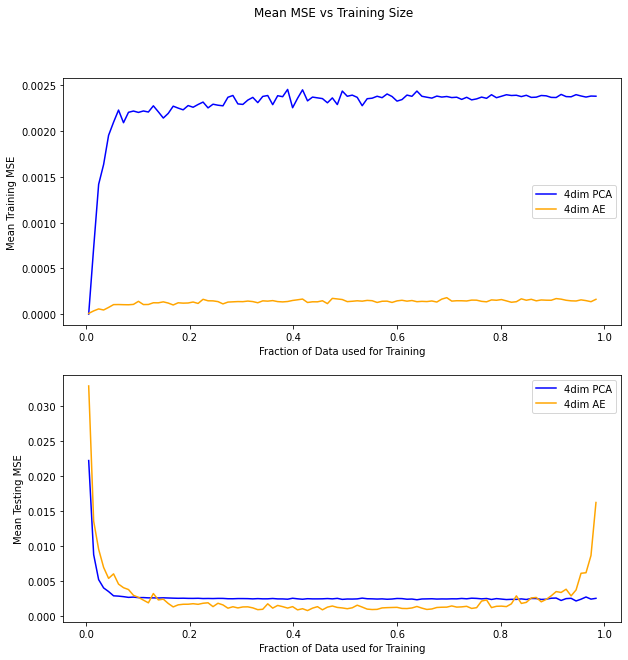

In [11]:
xvals = list(range(5,1035,10))
percent = [round((number / 1042),4) for number in xvals]

fig, (ax1, ax2) = plt.subplots(2,figsize=(10,10))
fig.suptitle('Mean MSE vs Training Size')

ax1.plot(percent, pca_MSE_TRAIN.mean(axis=1), c='b', label = '4dim PCA')
ax1.plot(percent, ae_MSE_TRAIN.mean(axis=1), c='orange', label = '4dim AE')
ax1.set(ylabel='Mean Training MSE', xlabel='Fraction of Data used for Training')
ax1.legend()

ax2.plot(percent, pca_MSE_TEST.mean(axis=1), c='b', label = '4dim PCA')
ax2.plot(percent, ae_MSE_TEST.mean(axis=1), c='orange', label = '4dim AE')
ax2.set(ylabel='Mean Testing MSE', xlabel='Fraction of Data used for Training')
ax2.legend()

# Latent Space Size 3

In [12]:
ae_MSE_TRAIN3 = np.zeros((103, num), dtype=float)
ae_MSE_TEST3 = np.zeros((103, num), dtype=float)
ae_X_train3 = np.zeros((num, int(test_size),384), dtype=float)
ae_X_test3 = np.zeros((num, int(ts), 384), dtype=float)

output = np.zeros((num), dtype=float)
outputy = np.zeros((num), dtype=float)

def complete_train_test(n_epochs, scaled, num):
    counter = 0
    for num_af in range(5,1035,10):
        train_size = (num_af/1042)
        test_size = (1 - train_size)
        ts = 1042 - num_af
        encoder = Autoencoder(in_shape=384, enc_shape = 3).double().to(device)
        error = nn.MSELoss()
        learning_rate = 0.0001
        optimizer = optim.Adam(encoder.parameters(),lr=learning_rate, weight_decay=0)
        print(f'\n\nTRAIN SIZE: {train_size}   # of Airfoils: {num_af}')
        
        for j in range(num):
            ae_X_train3, ae_X_test3 = train_test_split(scaled, test_size=test_size, shuffle=True)
            train(encoder, error, optimizer, n_epochs, torch.from_numpy(ae_X_train3).to(device))
        
            output = encoder(torch.from_numpy(ae_X_train3).to(device)).detach().cpu().numpy()
            output_y = encoder(torch.from_numpy(ae_X_test3).to(device)).detach().cpu().numpy()

            ae_MSE_TRAIN3[counter][j] = mean_squared_error(ae_X_train3, output)
            ae_MSE_TEST3[counter][j] = mean_squared_error(ae_X_test3, output_y)
            print(f'\nIteration: {j}   \nTRAIN SIZE: {train_size}   # of Airfoils: {num_af}')
        counter += 1


In [13]:
%%time
comp = 3
complete_train_test(1000, scaled, num)



TRAIN SIZE: 0.0047984644913627635   # of Airfoils: 5
epoch 50 	 Loss: 0.09184
epoch 100 	 Loss: 0.03001
epoch 150 	 Loss: 0.009537
epoch 200 	 Loss: 0.002607
epoch 250 	 Loss: 0.0007203
epoch 300 	 Loss: 0.0002079
epoch 350 	 Loss: 6.231e-05
epoch 400 	 Loss: 1.947e-05
epoch 450 	 Loss: 6.37e-06
epoch 500 	 Loss: 2.222e-06
epoch 550 	 Loss: 8.805e-07
epoch 600 	 Loss: 3.674e-06
epoch 650 	 Loss: 3.011e-07
epoch 700 	 Loss: 2.573e-07
epoch 750 	 Loss: 6.425e-07
epoch 800 	 Loss: 2.33e-07
epoch 850 	 Loss: 2.295e-07
epoch 900 	 Loss: 2.285e-07
epoch 950 	 Loss: 2.019e-06
epoch 1000 	 Loss: 2.312e-07

Iteration: 0   
TRAIN SIZE: 0.0047984644913627635   # of Airfoils: 5
epoch 50 	 Loss: 0.001448
epoch 100 	 Loss: 0.0009311
epoch 150 	 Loss: 0.000699
epoch 200 	 Loss: 0.0005331
epoch 250 	 Loss: 0.0004238
epoch 300 	 Loss: 0.0003519
epoch 350 	 Loss: 0.0003044
epoch 400 	 Loss: 0.000272
epoch 450 	 Loss: 0.0002487
epoch 500 	 Loss: 0.0002308
epoch 550 	 Loss: 0.000216
epoch 600 	 Loss: 0.

epoch 100 	 Loss: 0.0001426
epoch 150 	 Loss: 0.0001259
epoch 200 	 Loss: 0.0001154
epoch 250 	 Loss: 0.0001058
epoch 300 	 Loss: 9.56e-05
epoch 350 	 Loss: 8.42e-05
epoch 400 	 Loss: 7.183e-05
epoch 450 	 Loss: 5.882e-05
epoch 500 	 Loss: 4.647e-05
epoch 550 	 Loss: 3.543e-05
epoch 600 	 Loss: 2.616e-05
epoch 650 	 Loss: 1.886e-05
epoch 700 	 Loss: 1.335e-05
epoch 750 	 Loss: 9.337e-06
epoch 800 	 Loss: 6.475e-06
epoch 850 	 Loss: 4.464e-06
epoch 900 	 Loss: 3.065e-06
epoch 950 	 Loss: 2.1e-06
epoch 1000 	 Loss: 1.438e-06

Iteration: 13   
TRAIN SIZE: 0.0047984644913627635   # of Airfoils: 5
epoch 50 	 Loss: 0.000236
epoch 100 	 Loss: 0.0001496
epoch 150 	 Loss: 0.0001294
epoch 200 	 Loss: 0.00011
epoch 250 	 Loss: 9.074e-05
epoch 300 	 Loss: 7.227e-05
epoch 350 	 Loss: 5.547e-05
epoch 400 	 Loss: 4.132e-05
epoch 450 	 Loss: 3.014e-05
epoch 500 	 Loss: 2.165e-05
epoch 550 	 Loss: 1.533e-05
epoch 600 	 Loss: 1.074e-05
epoch 650 	 Loss: 7.446e-06
epoch 700 	 Loss: 5.125e-06
epoch 750 	 

epoch 150 	 Loss: 0.0002276
epoch 200 	 Loss: 0.0002253
epoch 250 	 Loss: 0.000223
epoch 300 	 Loss: 0.0002205
epoch 350 	 Loss: 0.0002179
epoch 400 	 Loss: 0.0002151
epoch 450 	 Loss: 0.0002121
epoch 500 	 Loss: 0.0002087
epoch 550 	 Loss: 0.0002053
epoch 600 	 Loss: 0.0002016
epoch 650 	 Loss: 0.0001979
epoch 700 	 Loss: 0.0001939
epoch 750 	 Loss: 0.0001898
epoch 800 	 Loss: 0.0001855
epoch 850 	 Loss: 0.0001809
epoch 900 	 Loss: 0.0001763
epoch 950 	 Loss: 0.0001717
epoch 1000 	 Loss: 0.000167

Iteration: 1   
TRAIN SIZE: 0.014395393474088292   # of Airfoils: 15
epoch 50 	 Loss: 0.004579
epoch 100 	 Loss: 0.002483
epoch 150 	 Loss: 0.0008402
epoch 200 	 Loss: 0.0006072
epoch 250 	 Loss: 0.0005469
epoch 300 	 Loss: 0.0005022
epoch 350 	 Loss: 0.0004584
epoch 400 	 Loss: 0.0004153
epoch 450 	 Loss: 0.0003733
epoch 500 	 Loss: 0.0003346
epoch 550 	 Loss: 0.0003008
epoch 600 	 Loss: 0.0002709
epoch 650 	 Loss: 0.0002455
epoch 700 	 Loss: 0.000224
epoch 750 	 Loss: 0.000205
epoch 800 	 

epoch 250 	 Loss: 5.169e-05
epoch 300 	 Loss: 4.612e-05
epoch 350 	 Loss: 4.206e-05
epoch 400 	 Loss: 3.889e-05
epoch 450 	 Loss: 3.633e-05
epoch 500 	 Loss: 3.426e-05
epoch 550 	 Loss: 3.254e-05
epoch 600 	 Loss: 3.108e-05
epoch 650 	 Loss: 2.966e-05
epoch 700 	 Loss: 2.861e-05
epoch 750 	 Loss: 2.766e-05
epoch 800 	 Loss: 2.681e-05
epoch 850 	 Loss: 2.603e-05
epoch 900 	 Loss: 2.53e-05
epoch 950 	 Loss: 2.461e-05
epoch 1000 	 Loss: 2.395e-05

Iteration: 14   
TRAIN SIZE: 0.014395393474088292   # of Airfoils: 15
epoch 50 	 Loss: 0.0005991
epoch 100 	 Loss: 0.0003043
epoch 150 	 Loss: 0.0001932
epoch 200 	 Loss: 0.0001368
epoch 250 	 Loss: 0.0001042
epoch 300 	 Loss: 8.348e-05
epoch 350 	 Loss: 6.929e-05
epoch 400 	 Loss: 5.905e-05
epoch 450 	 Loss: 5.103e-05
epoch 500 	 Loss: 4.438e-05
epoch 550 	 Loss: 3.881e-05
epoch 600 	 Loss: 3.422e-05
epoch 650 	 Loss: 3.032e-05
epoch 700 	 Loss: 2.701e-05
epoch 750 	 Loss: 2.421e-05
epoch 800 	 Loss: 2.184e-05
epoch 850 	 Loss: 1.983e-05
epoch 

epoch 300 	 Loss: 0.0001333
epoch 350 	 Loss: 0.000121
epoch 400 	 Loss: 0.0001096
epoch 450 	 Loss: 9.919e-05
epoch 500 	 Loss: 9.023e-05
epoch 550 	 Loss: 8.29e-05
epoch 600 	 Loss: 7.716e-05
epoch 650 	 Loss: 7.248e-05
epoch 700 	 Loss: 6.836e-05
epoch 750 	 Loss: 6.468e-05
epoch 800 	 Loss: 6.126e-05
epoch 850 	 Loss: 5.797e-05
epoch 900 	 Loss: 5.473e-05
epoch 950 	 Loss: 5.15e-05
epoch 1000 	 Loss: 4.829e-05

Iteration: 2   
TRAIN SIZE: 0.02399232245681382   # of Airfoils: 25
epoch 50 	 Loss: 0.0005976
epoch 100 	 Loss: 0.0004901
epoch 150 	 Loss: 0.0004228
epoch 200 	 Loss: 0.0003643
epoch 250 	 Loss: 0.000309
epoch 300 	 Loss: 0.0002568
epoch 350 	 Loss: 0.0002098
epoch 400 	 Loss: 0.0001705
epoch 450 	 Loss: 0.0001405
epoch 500 	 Loss: 0.0001188
epoch 550 	 Loss: 0.0001026
epoch 600 	 Loss: 8.966e-05
epoch 650 	 Loss: 7.898e-05
epoch 700 	 Loss: 6.991e-05
epoch 750 	 Loss: 6.24e-05
epoch 800 	 Loss: 5.609e-05
epoch 850 	 Loss: 5.075e-05
epoch 900 	 Loss: 4.621e-05
epoch 950 	 

epoch 400 	 Loss: 2.751e-05
epoch 450 	 Loss: 2.609e-05
epoch 500 	 Loss: 2.491e-05
epoch 550 	 Loss: 2.393e-05
epoch 600 	 Loss: 2.309e-05
epoch 650 	 Loss: 2.236e-05
epoch 700 	 Loss: 2.17e-05
epoch 750 	 Loss: 2.111e-05
epoch 800 	 Loss: 2.058e-05
epoch 850 	 Loss: 2.01e-05
epoch 900 	 Loss: 1.964e-05
epoch 950 	 Loss: 1.924e-05
epoch 1000 	 Loss: 1.876e-05

Iteration: 15   
TRAIN SIZE: 0.02399232245681382   # of Airfoils: 25
epoch 50 	 Loss: 0.0002328
epoch 100 	 Loss: 0.0001937
epoch 150 	 Loss: 0.0001737
epoch 200 	 Loss: 0.0001534
epoch 250 	 Loss: 0.0001328
epoch 300 	 Loss: 0.0001128
epoch 350 	 Loss: 9.44e-05
epoch 400 	 Loss: 7.827e-05
epoch 450 	 Loss: 6.499e-05
epoch 500 	 Loss: 5.439e-05
epoch 550 	 Loss: 4.624e-05
epoch 600 	 Loss: 4.011e-05
epoch 650 	 Loss: 3.553e-05
epoch 700 	 Loss: 3.204e-05
epoch 750 	 Loss: 2.946e-05
epoch 800 	 Loss: 2.738e-05
epoch 850 	 Loss: 2.58e-05
epoch 900 	 Loss: 2.453e-05
epoch 950 	 Loss: 2.349e-05
epoch 1000 	 Loss: 2.26e-05

Iteration

epoch 450 	 Loss: 0.0002296
epoch 500 	 Loss: 0.000221
epoch 550 	 Loss: 0.0002127
epoch 600 	 Loss: 0.0002048
epoch 650 	 Loss: 0.0001973
epoch 700 	 Loss: 0.0001903
epoch 750 	 Loss: 0.0001836
epoch 800 	 Loss: 0.0001771
epoch 850 	 Loss: 0.0001709
epoch 900 	 Loss: 0.0001647
epoch 950 	 Loss: 0.0001587
epoch 1000 	 Loss: 0.0001524

Iteration: 3   
TRAIN SIZE: 0.03358925143953935   # of Airfoils: 35
epoch 50 	 Loss: 0.0002821
epoch 100 	 Loss: 0.0002557
epoch 150 	 Loss: 0.0002406
epoch 200 	 Loss: 0.000228
epoch 250 	 Loss: 0.0002162
epoch 300 	 Loss: 0.000205
epoch 350 	 Loss: 0.0001947
epoch 400 	 Loss: 0.0001854
epoch 450 	 Loss: 0.0001771
epoch 500 	 Loss: 0.0001694
epoch 550 	 Loss: 0.0001631
epoch 600 	 Loss: 0.0001571
epoch 650 	 Loss: 0.0001506
epoch 700 	 Loss: 0.0001459
epoch 750 	 Loss: 0.0001415
epoch 800 	 Loss: 0.0001371
epoch 850 	 Loss: 0.000132
epoch 900 	 Loss: 0.0001283
epoch 950 	 Loss: 0.0001255
epoch 1000 	 Loss: 0.0001221

Iteration: 4   
TRAIN SIZE: 0.0335892

epoch 600 	 Loss: 7.462e-05
epoch 650 	 Loss: 6.982e-05
epoch 700 	 Loss: 6.54e-05
epoch 750 	 Loss: 6.142e-05
epoch 800 	 Loss: 5.757e-05
epoch 850 	 Loss: 5.394e-05
epoch 900 	 Loss: 5.07e-05
epoch 950 	 Loss: 4.78e-05
epoch 1000 	 Loss: 4.517e-05

Iteration: 16   
TRAIN SIZE: 0.03358925143953935   # of Airfoils: 35
epoch 50 	 Loss: 0.0003007
epoch 100 	 Loss: 0.0002564
epoch 150 	 Loss: 0.0002313
epoch 200 	 Loss: 0.0002101
epoch 250 	 Loss: 0.0001904
epoch 300 	 Loss: 0.0001716
epoch 350 	 Loss: 0.0001535
epoch 400 	 Loss: 0.0001372
epoch 450 	 Loss: 0.0001223
epoch 500 	 Loss: 0.0001091
epoch 550 	 Loss: 9.735e-05
epoch 600 	 Loss: 8.73e-05
epoch 650 	 Loss: 7.943e-05
epoch 700 	 Loss: 7.327e-05
epoch 750 	 Loss: 6.84e-05
epoch 800 	 Loss: 6.446e-05
epoch 850 	 Loss: 6.131e-05
epoch 900 	 Loss: 5.87e-05
epoch 950 	 Loss: 5.654e-05
epoch 1000 	 Loss: 5.471e-05

Iteration: 17   
TRAIN SIZE: 0.03358925143953935   # of Airfoils: 35
epoch 50 	 Loss: 0.0001868
epoch 100 	 Loss: 0.000133

epoch 650 	 Loss: 6.551e-05
epoch 700 	 Loss: 6.316e-05
epoch 750 	 Loss: 6.028e-05
epoch 800 	 Loss: 5.866e-05
epoch 850 	 Loss: 5.72e-05
epoch 900 	 Loss: 5.524e-05
epoch 950 	 Loss: 5.442e-05
epoch 1000 	 Loss: 5.276e-05

Iteration: 4   
TRAIN SIZE: 0.04318618042226487   # of Airfoils: 45
epoch 50 	 Loss: 0.0003377
epoch 100 	 Loss: 0.000273
epoch 150 	 Loss: 0.0002427
epoch 200 	 Loss: 0.0002155
epoch 250 	 Loss: 0.0001904
epoch 300 	 Loss: 0.0001686
epoch 350 	 Loss: 0.0001507
epoch 400 	 Loss: 0.0001361
epoch 450 	 Loss: 0.0001243
epoch 500 	 Loss: 0.0001146
epoch 550 	 Loss: 0.0001064
epoch 600 	 Loss: 9.951e-05
epoch 650 	 Loss: 9.35e-05
epoch 700 	 Loss: 8.867e-05
epoch 750 	 Loss: 8.408e-05
epoch 800 	 Loss: 8.015e-05
epoch 850 	 Loss: 7.679e-05
epoch 900 	 Loss: 7.348e-05
epoch 950 	 Loss: 7.074e-05
epoch 1000 	 Loss: 6.806e-05

Iteration: 5   
TRAIN SIZE: 0.04318618042226487   # of Airfoils: 45
epoch 50 	 Loss: 0.0003328
epoch 100 	 Loss: 0.0001821
epoch 150 	 Loss: 0.00013

epoch 800 	 Loss: 8.056e-05
epoch 850 	 Loss: 7.695e-05
epoch 900 	 Loss: 7.379e-05
epoch 950 	 Loss: 7.101e-05
epoch 1000 	 Loss: 6.852e-05

Iteration: 17   
TRAIN SIZE: 0.04318618042226487   # of Airfoils: 45
epoch 50 	 Loss: 0.0001996
epoch 100 	 Loss: 0.0001404
epoch 150 	 Loss: 0.0001236
epoch 200 	 Loss: 0.0001112
epoch 250 	 Loss: 0.0001014
epoch 300 	 Loss: 9.321e-05
epoch 350 	 Loss: 8.607e-05
epoch 400 	 Loss: 7.93e-05
epoch 450 	 Loss: 7.369e-05
epoch 500 	 Loss: 6.868e-05
epoch 550 	 Loss: 6.408e-05
epoch 600 	 Loss: 6.008e-05
epoch 650 	 Loss: 5.659e-05
epoch 700 	 Loss: 5.345e-05
epoch 750 	 Loss: 5.06e-05
epoch 800 	 Loss: 4.806e-05
epoch 850 	 Loss: 4.577e-05
epoch 900 	 Loss: 4.367e-05
epoch 950 	 Loss: 4.172e-05
epoch 1000 	 Loss: 3.987e-05

Iteration: 18   
TRAIN SIZE: 0.04318618042226487   # of Airfoils: 45
epoch 50 	 Loss: 0.0002419
epoch 100 	 Loss: 0.0001695
epoch 150 	 Loss: 0.0001351
epoch 200 	 Loss: 0.0001072
epoch 250 	 Loss: 9.317e-05
epoch 300 	 Loss: 8.25

epoch 800 	 Loss: 0.0001834
epoch 850 	 Loss: 0.0001785
epoch 900 	 Loss: 0.0001739
epoch 950 	 Loss: 0.0001694
epoch 1000 	 Loss: 0.0001657

Iteration: 5   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 0.0005196
epoch 100 	 Loss: 0.0004031
epoch 150 	 Loss: 0.0003502
epoch 200 	 Loss: 0.0003082
epoch 250 	 Loss: 0.0002735
epoch 300 	 Loss: 0.0002447
epoch 350 	 Loss: 0.0002215
epoch 400 	 Loss: 0.0002028
epoch 450 	 Loss: 0.000188
epoch 500 	 Loss: 0.0001759
epoch 550 	 Loss: 0.0001661
epoch 600 	 Loss: 0.0001587
epoch 650 	 Loss: 0.0001522
epoch 700 	 Loss: 0.0001464
epoch 750 	 Loss: 0.0001417
epoch 800 	 Loss: 0.0001366
epoch 850 	 Loss: 0.0001319
epoch 900 	 Loss: 0.0001274
epoch 950 	 Loss: 0.0001232
epoch 1000 	 Loss: 0.00012

Iteration: 6   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 0.0005346
epoch 100 	 Loss: 0.0004238
epoch 150 	 Loss: 0.0003831
epoch 200 	 Loss: 0.0003548
epoch 250 	 Loss: 0.0003318
epoch 300 	 Loss: 0.000

epoch 900 	 Loss: 5.995e-05
epoch 950 	 Loss: 5.859e-05
epoch 1000 	 Loss: 5.734e-05

Iteration: 18   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 0.0001835
epoch 100 	 Loss: 0.000144
epoch 150 	 Loss: 0.000125
epoch 200 	 Loss: 0.0001132
epoch 250 	 Loss: 0.0001043
epoch 300 	 Loss: 9.774e-05
epoch 350 	 Loss: 9.232e-05
epoch 400 	 Loss: 8.775e-05
epoch 450 	 Loss: 8.371e-05
epoch 500 	 Loss: 7.986e-05
epoch 550 	 Loss: 7.644e-05
epoch 600 	 Loss: 7.343e-05
epoch 650 	 Loss: 7.065e-05
epoch 700 	 Loss: 6.818e-05
epoch 750 	 Loss: 6.576e-05
epoch 800 	 Loss: 6.365e-05
epoch 850 	 Loss: 6.167e-05
epoch 900 	 Loss: 5.984e-05
epoch 950 	 Loss: 5.813e-05
epoch 1000 	 Loss: 5.651e-05

Iteration: 19   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 0.0001834
epoch 100 	 Loss: 0.0001395
epoch 150 	 Loss: 0.0001248
epoch 200 	 Loss: 0.0001154
epoch 250 	 Loss: 0.0001083
epoch 300 	 Loss: 0.000103
epoch 350 	 Loss: 9.847e-05
epoch 400 	 Loss: 9.4

epoch 900 	 Loss: 7.466e-05
epoch 950 	 Loss: 7.343e-05
epoch 1000 	 Loss: 7.051e-05

Iteration: 6   
TRAIN SIZE: 0.06238003838771593   # of Airfoils: 65
epoch 50 	 Loss: 0.0004145
epoch 100 	 Loss: 0.0003445
epoch 150 	 Loss: 0.0003099
epoch 200 	 Loss: 0.0002861
epoch 250 	 Loss: 0.000268
epoch 300 	 Loss: 0.0002541
epoch 350 	 Loss: 0.0002429
epoch 400 	 Loss: 0.0002327
epoch 450 	 Loss: 0.0002242
epoch 500 	 Loss: 0.0002166
epoch 550 	 Loss: 0.0002077
epoch 600 	 Loss: 0.0002
epoch 650 	 Loss: 0.0001925
epoch 700 	 Loss: 0.0001847
epoch 750 	 Loss: 0.000177
epoch 800 	 Loss: 0.0001679
epoch 850 	 Loss: 0.0001597
epoch 900 	 Loss: 0.00015
epoch 950 	 Loss: 0.0001409
epoch 1000 	 Loss: 0.0001334

Iteration: 7   
TRAIN SIZE: 0.06238003838771593   # of Airfoils: 65
epoch 50 	 Loss: 0.0004828
epoch 100 	 Loss: 0.0003789
epoch 150 	 Loss: 0.0003272
epoch 200 	 Loss: 0.0002923
epoch 250 	 Loss: 0.0002665
epoch 300 	 Loss: 0.0002479
epoch 350 	 Loss: 0.0002331
epoch 400 	 Loss: 0.00022
epo

epoch 1000 	 Loss: 7.642e-05

Iteration: 19   
TRAIN SIZE: 0.06238003838771593   # of Airfoils: 65
epoch 50 	 Loss: 9.183e-05
epoch 100 	 Loss: 7.633e-05
epoch 150 	 Loss: 6.893e-05
epoch 200 	 Loss: 6.373e-05
epoch 250 	 Loss: 5.967e-05
epoch 300 	 Loss: 5.641e-05
epoch 350 	 Loss: 5.34e-05
epoch 400 	 Loss: 5.109e-05
epoch 450 	 Loss: 4.899e-05
epoch 500 	 Loss: 4.719e-05
epoch 550 	 Loss: 4.518e-05
epoch 600 	 Loss: 4.379e-05
epoch 650 	 Loss: 4.211e-05
epoch 700 	 Loss: 4.09e-05
epoch 750 	 Loss: 3.978e-05
epoch 800 	 Loss: 3.871e-05
epoch 850 	 Loss: 3.763e-05
epoch 900 	 Loss: 3.613e-05
epoch 950 	 Loss: 3.512e-05
epoch 1000 	 Loss: 3.414e-05

Iteration: 20   
TRAIN SIZE: 0.06238003838771593   # of Airfoils: 65
epoch 50 	 Loss: 0.0001166
epoch 100 	 Loss: 9.021e-05
epoch 150 	 Loss: 7.937e-05
epoch 200 	 Loss: 7.226e-05
epoch 250 	 Loss: 6.71e-05
epoch 300 	 Loss: 6.33e-05
epoch 350 	 Loss: 6.03e-05
epoch 400 	 Loss: 5.722e-05
epoch 450 	 Loss: 5.496e-05
epoch 500 	 Loss: 5.301e-

epoch 50 	 Loss: 0.0004128
epoch 100 	 Loss: 0.0002857
epoch 150 	 Loss: 0.0002497
epoch 200 	 Loss: 0.0002289
epoch 250 	 Loss: 0.0002137
epoch 300 	 Loss: 0.0002009
epoch 350 	 Loss: 0.0001913
epoch 400 	 Loss: 0.0001833
epoch 450 	 Loss: 0.0001766
epoch 500 	 Loss: 0.0001707
epoch 550 	 Loss: 0.0001647
epoch 600 	 Loss: 0.0001595
epoch 650 	 Loss: 0.0001549
epoch 700 	 Loss: 0.0001505
epoch 750 	 Loss: 0.0001464
epoch 800 	 Loss: 0.0001428
epoch 850 	 Loss: 0.0001389
epoch 900 	 Loss: 0.000135
epoch 950 	 Loss: 0.000132
epoch 1000 	 Loss: 0.0001293

Iteration: 8   
TRAIN SIZE: 0.07197696737044146   # of Airfoils: 75
epoch 50 	 Loss: 0.000385
epoch 100 	 Loss: 0.0003185
epoch 150 	 Loss: 0.0002902
epoch 200 	 Loss: 0.0002684
epoch 250 	 Loss: 0.0002511
epoch 300 	 Loss: 0.000237
epoch 350 	 Loss: 0.0002249
epoch 400 	 Loss: 0.0002144
epoch 450 	 Loss: 0.0002054
epoch 500 	 Loss: 0.0001972
epoch 550 	 Loss: 0.0001896
epoch 600 	 Loss: 0.0001827
epoch 650 	 Loss: 0.0001761
epoch 700 	 

epoch 150 	 Loss: 0.0001091
epoch 200 	 Loss: 9.371e-05
epoch 250 	 Loss: 8.219e-05
epoch 300 	 Loss: 7.315e-05
epoch 350 	 Loss: 6.582e-05
epoch 400 	 Loss: 5.978e-05
epoch 450 	 Loss: 5.469e-05
epoch 500 	 Loss: 5.041e-05
epoch 550 	 Loss: 4.672e-05
epoch 600 	 Loss: 4.352e-05
epoch 650 	 Loss: 4.076e-05
epoch 700 	 Loss: 3.83e-05
epoch 750 	 Loss: 3.613e-05
epoch 800 	 Loss: 3.42e-05
epoch 850 	 Loss: 3.248e-05
epoch 900 	 Loss: 3.094e-05
epoch 950 	 Loss: 2.952e-05
epoch 1000 	 Loss: 2.824e-05

Iteration: 21   
TRAIN SIZE: 0.07197696737044146   # of Airfoils: 75
epoch 50 	 Loss: 0.0002504
epoch 100 	 Loss: 0.0001462
epoch 150 	 Loss: 0.0001143
epoch 200 	 Loss: 9.569e-05
epoch 250 	 Loss: 8.43e-05
epoch 300 	 Loss: 7.613e-05
epoch 350 	 Loss: 7.039e-05
epoch 400 	 Loss: 6.622e-05
epoch 450 	 Loss: 6.308e-05
epoch 500 	 Loss: 6.056e-05
epoch 550 	 Loss: 5.83e-05
epoch 600 	 Loss: 5.648e-05
epoch 650 	 Loss: 5.478e-05
epoch 700 	 Loss: 5.306e-05
epoch 750 	 Loss: 5.151e-05
epoch 800 

epoch 200 	 Loss: 0.0001214
epoch 250 	 Loss: 0.0001144
epoch 300 	 Loss: 0.0001087
epoch 350 	 Loss: 0.0001039
epoch 400 	 Loss: 9.923e-05
epoch 450 	 Loss: 9.589e-05
epoch 500 	 Loss: 9.061e-05
epoch 550 	 Loss: 8.782e-05
epoch 600 	 Loss: 8.461e-05
epoch 650 	 Loss: 8.178e-05
epoch 700 	 Loss: 8.12e-05
epoch 750 	 Loss: 7.809e-05
epoch 800 	 Loss: 7.441e-05
epoch 850 	 Loss: 7.218e-05
epoch 900 	 Loss: 6.982e-05
epoch 950 	 Loss: 7.942e-05
epoch 1000 	 Loss: 6.661e-05

Iteration: 9   
TRAIN SIZE: 0.08157389635316699   # of Airfoils: 85
epoch 50 	 Loss: 0.0001888
epoch 100 	 Loss: 0.0001637
epoch 150 	 Loss: 0.0001468
epoch 200 	 Loss: 0.0001347
epoch 250 	 Loss: 0.0001247
epoch 300 	 Loss: 0.0001156
epoch 350 	 Loss: 0.0001082
epoch 400 	 Loss: 0.0001014
epoch 450 	 Loss: 9.437e-05
epoch 500 	 Loss: 8.937e-05
epoch 550 	 Loss: 8.325e-05
epoch 600 	 Loss: 7.863e-05
epoch 650 	 Loss: 7.591e-05
epoch 700 	 Loss: 7.123e-05
epoch 750 	 Loss: 6.796e-05
epoch 800 	 Loss: 6.511e-05
epoch 85

epoch 250 	 Loss: 0.0001099
epoch 300 	 Loss: 0.0001047
epoch 350 	 Loss: 0.0001002
epoch 400 	 Loss: 9.67e-05
epoch 450 	 Loss: 9.329e-05
epoch 500 	 Loss: 9.017e-05
epoch 550 	 Loss: 8.768e-05
epoch 600 	 Loss: 8.53e-05
epoch 650 	 Loss: 8.293e-05
epoch 700 	 Loss: 8.084e-05
epoch 750 	 Loss: 7.919e-05
epoch 800 	 Loss: 7.749e-05
epoch 850 	 Loss: 7.589e-05
epoch 900 	 Loss: 7.441e-05
epoch 950 	 Loss: 7.257e-05
epoch 1000 	 Loss: 7.128e-05

Iteration: 22   
TRAIN SIZE: 0.08157389635316699   # of Airfoils: 85
epoch 50 	 Loss: 0.0001592
epoch 100 	 Loss: 0.0001299
epoch 150 	 Loss: 0.0001152
epoch 200 	 Loss: 0.0001055
epoch 250 	 Loss: 9.811e-05
epoch 300 	 Loss: 9.224e-05
epoch 350 	 Loss: 8.743e-05
epoch 400 	 Loss: 8.338e-05
epoch 450 	 Loss: 7.998e-05
epoch 500 	 Loss: 7.699e-05
epoch 550 	 Loss: 7.443e-05
epoch 600 	 Loss: 7.209e-05
epoch 650 	 Loss: 6.996e-05
epoch 700 	 Loss: 6.802e-05
epoch 750 	 Loss: 6.629e-05
epoch 800 	 Loss: 6.467e-05
epoch 850 	 Loss: 6.317e-05
epoch 90

epoch 300 	 Loss: 0.0001097
epoch 350 	 Loss: 0.0001066
epoch 400 	 Loss: 0.000104
epoch 450 	 Loss: 0.0001017
epoch 500 	 Loss: 9.972e-05
epoch 550 	 Loss: 9.799e-05
epoch 600 	 Loss: 9.633e-05
epoch 650 	 Loss: 9.473e-05
epoch 700 	 Loss: 9.326e-05
epoch 750 	 Loss: 9.184e-05
epoch 800 	 Loss: 9.056e-05
epoch 850 	 Loss: 8.934e-05
epoch 900 	 Loss: 8.794e-05
epoch 950 	 Loss: 8.816e-05
epoch 1000 	 Loss: 8.509e-05

Iteration: 10   
TRAIN SIZE: 0.09117082533589252   # of Airfoils: 95
epoch 50 	 Loss: 0.0002612
epoch 100 	 Loss: 0.0002173
epoch 150 	 Loss: 0.0001958
epoch 200 	 Loss: 0.0001811
epoch 250 	 Loss: 0.0001697
epoch 300 	 Loss: 0.00016
epoch 350 	 Loss: 0.0001524
epoch 400 	 Loss: 0.0001451
epoch 450 	 Loss: 0.000139
epoch 500 	 Loss: 0.0001361
epoch 550 	 Loss: 0.0001286
epoch 600 	 Loss: 0.0001239
epoch 650 	 Loss: 0.0001203
epoch 700 	 Loss: 0.0001173
epoch 750 	 Loss: 0.0001137
epoch 800 	 Loss: 0.0001119
epoch 850 	 Loss: 0.0001087
epoch 900 	 Loss: 0.0001071
epoch 950 

epoch 400 	 Loss: 0.0001503
epoch 450 	 Loss: 0.0001454
epoch 500 	 Loss: 0.000141
epoch 550 	 Loss: 0.000137
epoch 600 	 Loss: 0.0001331
epoch 650 	 Loss: 0.0001294
epoch 700 	 Loss: 0.000126
epoch 750 	 Loss: 0.0001223
epoch 800 	 Loss: 0.000119
epoch 850 	 Loss: 0.0001161
epoch 900 	 Loss: 0.0001136
epoch 950 	 Loss: 0.0001114
epoch 1000 	 Loss: 0.0001093

Iteration: 23   
TRAIN SIZE: 0.09117082533589252   # of Airfoils: 95
epoch 50 	 Loss: 0.0001718
epoch 100 	 Loss: 0.0001417
epoch 150 	 Loss: 0.0001268
epoch 200 	 Loss: 0.0001149
epoch 250 	 Loss: 0.0001055
epoch 300 	 Loss: 9.847e-05
epoch 350 	 Loss: 9.262e-05
epoch 400 	 Loss: 8.777e-05
epoch 450 	 Loss: 8.34e-05
epoch 500 	 Loss: 7.966e-05
epoch 550 	 Loss: 7.651e-05
epoch 600 	 Loss: 7.323e-05
epoch 650 	 Loss: 7.134e-05
epoch 700 	 Loss: 7.136e-05
epoch 750 	 Loss: 6.576e-05
epoch 800 	 Loss: 6.449e-05
epoch 850 	 Loss: 6.188e-05
epoch 900 	 Loss: 6.168e-05
epoch 950 	 Loss: 5.788e-05
epoch 1000 	 Loss: 5.669e-05

Iteration

epoch 450 	 Loss: 0.0001659
epoch 500 	 Loss: 0.000163
epoch 550 	 Loss: 0.0001604
epoch 600 	 Loss: 0.000158
epoch 650 	 Loss: 0.0001557
epoch 700 	 Loss: 0.0001536
epoch 750 	 Loss: 0.0001516
epoch 800 	 Loss: 0.0001497
epoch 850 	 Loss: 0.0001474
epoch 900 	 Loss: 0.0001452
epoch 950 	 Loss: 0.0001429
epoch 1000 	 Loss: 0.0001405

Iteration: 11   
TRAIN SIZE: 0.10076775431861804   # of Airfoils: 105
epoch 50 	 Loss: 0.0001965
epoch 100 	 Loss: 0.0001752
epoch 150 	 Loss: 0.000163
epoch 200 	 Loss: 0.0001536
epoch 250 	 Loss: 0.000146
epoch 300 	 Loss: 0.0001397
epoch 350 	 Loss: 0.0001344
epoch 400 	 Loss: 0.0001299
epoch 450 	 Loss: 0.000126
epoch 500 	 Loss: 0.0001225
epoch 550 	 Loss: 0.0001194
epoch 600 	 Loss: 0.0001166
epoch 650 	 Loss: 0.0001142
epoch 700 	 Loss: 0.0001119
epoch 750 	 Loss: 0.0001096
epoch 800 	 Loss: 0.0001077
epoch 850 	 Loss: 0.000106
epoch 900 	 Loss: 0.0001045
epoch 950 	 Loss: 0.0001026
epoch 1000 	 Loss: 0.0001012

Iteration: 12   
TRAIN SIZE: 0.100767

epoch 500 	 Loss: 0.0001089
epoch 550 	 Loss: 0.0001066
epoch 600 	 Loss: 0.0001045
epoch 650 	 Loss: 0.0001027
epoch 700 	 Loss: 0.0001011
epoch 750 	 Loss: 9.961e-05
epoch 800 	 Loss: 9.823e-05
epoch 850 	 Loss: 9.698e-05
epoch 900 	 Loss: 9.576e-05
epoch 950 	 Loss: 9.452e-05
epoch 1000 	 Loss: 9.353e-05

Iteration: 24   
TRAIN SIZE: 0.10076775431861804   # of Airfoils: 105


TRAIN SIZE: 0.11036468330134357   # of Airfoils: 115
epoch 50 	 Loss: 0.09206
epoch 100 	 Loss: 0.0341
epoch 150 	 Loss: 0.01903
epoch 200 	 Loss: 0.01253
epoch 250 	 Loss: 0.009772
epoch 300 	 Loss: 0.008089
epoch 350 	 Loss: 0.006161
epoch 400 	 Loss: 0.004023
epoch 450 	 Loss: 0.00257
epoch 500 	 Loss: 0.001813
epoch 550 	 Loss: 0.001441
epoch 600 	 Loss: 0.001261
epoch 650 	 Loss: 0.001169
epoch 700 	 Loss: 0.001117
epoch 750 	 Loss: 0.001083
epoch 800 	 Loss: 0.001059
epoch 850 	 Loss: 0.001039
epoch 900 	 Loss: 0.001021
epoch 950 	 Loss: 0.001004
epoch 1000 	 Loss: 0.0009904

Iteration: 0   
TRAIN SIZE: 0

epoch 550 	 Loss: 0.0001383
epoch 600 	 Loss: 0.0001344
epoch 650 	 Loss: 0.0001309
epoch 700 	 Loss: 0.0001276
epoch 750 	 Loss: 0.0001247
epoch 800 	 Loss: 0.0001217
epoch 850 	 Loss: 0.0001191
epoch 900 	 Loss: 0.0001167
epoch 950 	 Loss: 0.0001141
epoch 1000 	 Loss: 0.0001121

Iteration: 12   
TRAIN SIZE: 0.11036468330134357   # of Airfoils: 115
epoch 50 	 Loss: 0.0001813
epoch 100 	 Loss: 0.000141
epoch 150 	 Loss: 0.0001246
epoch 200 	 Loss: 0.0001145
epoch 250 	 Loss: 0.0001073
epoch 300 	 Loss: 0.0001016
epoch 350 	 Loss: 9.682e-05
epoch 400 	 Loss: 9.274e-05
epoch 450 	 Loss: 8.927e-05
epoch 500 	 Loss: 8.613e-05
epoch 550 	 Loss: 8.396e-05
epoch 600 	 Loss: 8.223e-05
epoch 650 	 Loss: 7.988e-05
epoch 700 	 Loss: 7.631e-05
epoch 750 	 Loss: 7.488e-05
epoch 800 	 Loss: 7.434e-05
epoch 850 	 Loss: 7.071e-05
epoch 900 	 Loss: 7.025e-05
epoch 950 	 Loss: 6.731e-05
epoch 1000 	 Loss: 6.585e-05

Iteration: 13   
TRAIN SIZE: 0.11036468330134357   # of Airfoils: 115
epoch 50 	 Loss: 0

epoch 550 	 Loss: 0.001533
epoch 600 	 Loss: 0.001406
epoch 650 	 Loss: 0.001303
epoch 700 	 Loss: 0.001216
epoch 750 	 Loss: 0.00114
epoch 800 	 Loss: 0.001075
epoch 850 	 Loss: 0.001018
epoch 900 	 Loss: 0.0009696
epoch 950 	 Loss: 0.0009281
epoch 1000 	 Loss: 0.000891

Iteration: 0   
TRAIN SIZE: 0.1199616122840691   # of Airfoils: 125
epoch 50 	 Loss: 0.0009957
epoch 100 	 Loss: 0.0009369
epoch 150 	 Loss: 0.0009005
epoch 200 	 Loss: 0.0008707
epoch 250 	 Loss: 0.0008438
epoch 300 	 Loss: 0.0008201
epoch 350 	 Loss: 0.0007986
epoch 400 	 Loss: 0.0007785
epoch 450 	 Loss: 0.0007591
epoch 500 	 Loss: 0.0007408
epoch 550 	 Loss: 0.0007229
epoch 600 	 Loss: 0.000706
epoch 650 	 Loss: 0.0006899
epoch 700 	 Loss: 0.0006761
epoch 750 	 Loss: 0.0006596
epoch 800 	 Loss: 0.0006421
epoch 850 	 Loss: 0.0006302
epoch 900 	 Loss: 0.0006148
epoch 950 	 Loss: 0.0006042
epoch 1000 	 Loss: 0.0005862

Iteration: 1   
TRAIN SIZE: 0.1199616122840691   # of Airfoils: 125
epoch 50 	 Loss: 0.0009587
epoc

epoch 650 	 Loss: 0.0001267
epoch 700 	 Loss: 0.0001306
epoch 750 	 Loss: 0.0001219
epoch 800 	 Loss: 0.0001216
epoch 850 	 Loss: 0.0001181
epoch 900 	 Loss: 0.0001177
epoch 950 	 Loss: 0.0001133
epoch 1000 	 Loss: 0.0001118

Iteration: 13   
TRAIN SIZE: 0.1199616122840691   # of Airfoils: 125
epoch 50 	 Loss: 0.0001655
epoch 100 	 Loss: 0.0001315
epoch 150 	 Loss: 0.0001205
epoch 200 	 Loss: 0.0001133
epoch 250 	 Loss: 0.0001082
epoch 300 	 Loss: 0.0001043
epoch 350 	 Loss: 0.000101
epoch 400 	 Loss: 9.836e-05
epoch 450 	 Loss: 9.601e-05
epoch 500 	 Loss: 9.39e-05
epoch 550 	 Loss: 9.198e-05
epoch 600 	 Loss: 9.026e-05
epoch 650 	 Loss: 8.862e-05
epoch 700 	 Loss: 8.707e-05
epoch 750 	 Loss: 8.561e-05
epoch 800 	 Loss: 8.416e-05
epoch 850 	 Loss: 8.273e-05
epoch 900 	 Loss: 8.119e-05
epoch 950 	 Loss: 7.973e-05
epoch 1000 	 Loss: 7.846e-05

Iteration: 14   
TRAIN SIZE: 0.1199616122840691   # of Airfoils: 125
epoch 50 	 Loss: 0.0001323
epoch 100 	 Loss: 0.0001102
epoch 150 	 Loss: 0.00

epoch 700 	 Loss: 0.0007376
epoch 750 	 Loss: 0.0007142
epoch 800 	 Loss: 0.0006921
epoch 850 	 Loss: 0.0006696
epoch 900 	 Loss: 0.0006511
epoch 950 	 Loss: 0.0006323
epoch 1000 	 Loss: 0.0006095

Iteration: 1   
TRAIN SIZE: 0.1295585412667946   # of Airfoils: 135
epoch 50 	 Loss: 0.0009693
epoch 100 	 Loss: 0.0008823
epoch 150 	 Loss: 0.0008181
epoch 200 	 Loss: 0.0007634
epoch 250 	 Loss: 0.0007169
epoch 300 	 Loss: 0.0006745
epoch 350 	 Loss: 0.0006379
epoch 400 	 Loss: 0.0006061
epoch 450 	 Loss: 0.0005748
epoch 500 	 Loss: 0.0005477
epoch 550 	 Loss: 0.0005227
epoch 600 	 Loss: 0.0004995
epoch 650 	 Loss: 0.0004781
epoch 700 	 Loss: 0.0004582
epoch 750 	 Loss: 0.000441
epoch 800 	 Loss: 0.0004224
epoch 850 	 Loss: 0.0004057
epoch 900 	 Loss: 0.0003898
epoch 950 	 Loss: 0.0003755
epoch 1000 	 Loss: 0.0003645

Iteration: 2   
TRAIN SIZE: 0.1295585412667946   # of Airfoils: 135
epoch 50 	 Loss: 0.0004023
epoch 100 	 Loss: 0.0003704
epoch 150 	 Loss: 0.0003505
epoch 200 	 Loss: 0.000

epoch 800 	 Loss: 0.000115
epoch 850 	 Loss: 0.0001127
epoch 900 	 Loss: 0.0001107
epoch 950 	 Loss: 0.0001081
epoch 1000 	 Loss: 0.0001062

Iteration: 14   
TRAIN SIZE: 0.1295585412667946   # of Airfoils: 135
epoch 50 	 Loss: 0.0001319
epoch 100 	 Loss: 0.0001003
epoch 150 	 Loss: 8.87e-05
epoch 200 	 Loss: 8.232e-05
epoch 250 	 Loss: 7.749e-05
epoch 300 	 Loss: 7.362e-05
epoch 350 	 Loss: 7.042e-05
epoch 400 	 Loss: 6.772e-05
epoch 450 	 Loss: 6.539e-05
epoch 500 	 Loss: 6.336e-05
epoch 550 	 Loss: 6.157e-05
epoch 600 	 Loss: 5.999e-05
epoch 650 	 Loss: 5.858e-05
epoch 700 	 Loss: 5.729e-05
epoch 750 	 Loss: 5.61e-05
epoch 800 	 Loss: 5.501e-05
epoch 850 	 Loss: 5.395e-05
epoch 900 	 Loss: 5.3e-05
epoch 950 	 Loss: 5.202e-05
epoch 1000 	 Loss: 5.298e-05

Iteration: 15   
TRAIN SIZE: 0.1295585412667946   # of Airfoils: 135
epoch 50 	 Loss: 0.0001454
epoch 100 	 Loss: 0.0001141
epoch 150 	 Loss: 0.0001037
epoch 200 	 Loss: 9.719e-05
epoch 250 	 Loss: 9.209e-05
epoch 300 	 Loss: 8.797e-

epoch 850 	 Loss: 0.000332
epoch 900 	 Loss: 0.0003248
epoch 950 	 Loss: 0.0003182
epoch 1000 	 Loss: 0.0003103

Iteration: 2   
TRAIN SIZE: 0.13915547024952016   # of Airfoils: 145
epoch 50 	 Loss: 0.000519
epoch 100 	 Loss: 0.0004618
epoch 150 	 Loss: 0.0004278
epoch 200 	 Loss: 0.0004002
epoch 250 	 Loss: 0.0003765
epoch 300 	 Loss: 0.000356
epoch 350 	 Loss: 0.0003375
epoch 400 	 Loss: 0.0003214
epoch 450 	 Loss: 0.0003094
epoch 500 	 Loss: 0.0002955
epoch 550 	 Loss: 0.0002855
epoch 600 	 Loss: 0.0002791
epoch 650 	 Loss: 0.0002666
epoch 700 	 Loss: 0.0002581
epoch 750 	 Loss: 0.0002486
epoch 800 	 Loss: 0.0002452
epoch 850 	 Loss: 0.0002341
epoch 900 	 Loss: 0.0002306
epoch 950 	 Loss: 0.0002243
epoch 1000 	 Loss: 0.0002165

Iteration: 3   
TRAIN SIZE: 0.13915547024952016   # of Airfoils: 145
epoch 50 	 Loss: 0.0003076
epoch 100 	 Loss: 0.0002631
epoch 150 	 Loss: 0.0002404
epoch 200 	 Loss: 0.0002244
epoch 250 	 Loss: 0.0002122
epoch 300 	 Loss: 0.000203
epoch 350 	 Loss: 0.0001

epoch 900 	 Loss: 7.327e-05
epoch 950 	 Loss: 7.266e-05
epoch 1000 	 Loss: 7.081e-05

Iteration: 15   
TRAIN SIZE: 0.13915547024952016   # of Airfoils: 145
epoch 50 	 Loss: 0.0001466
epoch 100 	 Loss: 0.0001254
epoch 150 	 Loss: 0.0001123
epoch 200 	 Loss: 0.0001034
epoch 250 	 Loss: 9.608e-05
epoch 300 	 Loss: 9.038e-05
epoch 350 	 Loss: 8.462e-05
epoch 400 	 Loss: 8.114e-05
epoch 450 	 Loss: 7.882e-05
epoch 500 	 Loss: 8.095e-05
epoch 550 	 Loss: 7.22e-05
epoch 600 	 Loss: 7.105e-05
epoch 650 	 Loss: 6.623e-05
epoch 700 	 Loss: 6.353e-05
epoch 750 	 Loss: 6.168e-05
epoch 800 	 Loss: 6.094e-05
epoch 850 	 Loss: 6.061e-05
epoch 900 	 Loss: 6.002e-05
epoch 950 	 Loss: 5.936e-05
epoch 1000 	 Loss: 5.597e-05

Iteration: 16   
TRAIN SIZE: 0.13915547024952016   # of Airfoils: 145
epoch 50 	 Loss: 0.0001625
epoch 100 	 Loss: 0.0001262
epoch 150 	 Loss: 0.000111
epoch 200 	 Loss: 0.0001021
epoch 250 	 Loss: 9.551e-05
epoch 300 	 Loss: 9.094e-05
epoch 350 	 Loss: 8.751e-05
epoch 400 	 Loss: 8.

epoch 900 	 Loss: 0.0003491
epoch 950 	 Loss: 0.0003438
epoch 1000 	 Loss: 0.0003386

Iteration: 3   
TRAIN SIZE: 0.14875239923224567   # of Airfoils: 155
epoch 50 	 Loss: 0.0004843
epoch 100 	 Loss: 0.0004425
epoch 150 	 Loss: 0.00042
epoch 200 	 Loss: 0.0004028
epoch 250 	 Loss: 0.0003875
epoch 300 	 Loss: 0.0003733
epoch 350 	 Loss: 0.0003602
epoch 400 	 Loss: 0.0003483
epoch 450 	 Loss: 0.0003369
epoch 500 	 Loss: 0.0003264
epoch 550 	 Loss: 0.0003182
epoch 600 	 Loss: 0.0003071
epoch 650 	 Loss: 0.0002984
epoch 700 	 Loss: 0.0002899
epoch 750 	 Loss: 0.0002819
epoch 800 	 Loss: 0.0002791
epoch 850 	 Loss: 0.0002701
epoch 900 	 Loss: 0.0002629
epoch 950 	 Loss: 0.0002577
epoch 1000 	 Loss: 0.0002504

Iteration: 4   
TRAIN SIZE: 0.14875239923224567   # of Airfoils: 155
epoch 50 	 Loss: 0.0004325
epoch 100 	 Loss: 0.0003709
epoch 150 	 Loss: 0.000351
epoch 200 	 Loss: 0.0003362
epoch 250 	 Loss: 0.0003234
epoch 300 	 Loss: 0.000312
epoch 350 	 Loss: 0.0003018
epoch 400 	 Loss: 0.0002

epoch 1000 	 Loss: 8.834e-05

Iteration: 16   
TRAIN SIZE: 0.14875239923224567   # of Airfoils: 155
epoch 50 	 Loss: 0.0001226
epoch 100 	 Loss: 0.0001073
epoch 150 	 Loss: 0.0001007
epoch 200 	 Loss: 9.601e-05
epoch 250 	 Loss: 9.221e-05
epoch 300 	 Loss: 8.898e-05
epoch 350 	 Loss: 8.595e-05
epoch 400 	 Loss: 8.327e-05
epoch 450 	 Loss: 8.099e-05
epoch 500 	 Loss: 7.902e-05
epoch 550 	 Loss: 7.731e-05
epoch 600 	 Loss: 7.583e-05
epoch 650 	 Loss: 7.458e-05
epoch 700 	 Loss: 7.341e-05
epoch 750 	 Loss: 7.254e-05
epoch 800 	 Loss: 7.155e-05
epoch 850 	 Loss: 7.059e-05
epoch 900 	 Loss: 7.03e-05
epoch 950 	 Loss: 6.928e-05
epoch 1000 	 Loss: 6.8e-05

Iteration: 17   
TRAIN SIZE: 0.14875239923224567   # of Airfoils: 155
epoch 50 	 Loss: 0.0002039
epoch 100 	 Loss: 0.0001526
epoch 150 	 Loss: 0.0001399
epoch 200 	 Loss: 0.0001324
epoch 250 	 Loss: 0.0001271
epoch 300 	 Loss: 0.0001228
epoch 350 	 Loss: 0.0001194
epoch 400 	 Loss: 0.0001163
epoch 450 	 Loss: 0.0001137
epoch 500 	 Loss: 0.0

epoch 1000 	 Loss: 0.0002034

Iteration: 4   
TRAIN SIZE: 0.15834932821497122   # of Airfoils: 165
epoch 50 	 Loss: 0.0003924
epoch 100 	 Loss: 0.0003566
epoch 150 	 Loss: 0.0003282
epoch 200 	 Loss: 0.0003023
epoch 250 	 Loss: 0.0002814
epoch 300 	 Loss: 0.0002586
epoch 350 	 Loss: 0.0002435
epoch 400 	 Loss: 0.0002275
epoch 450 	 Loss: 0.0002135
epoch 500 	 Loss: 0.0002018
epoch 550 	 Loss: 0.000191
epoch 600 	 Loss: 0.0001819
epoch 650 	 Loss: 0.0001746
epoch 700 	 Loss: 0.0001677
epoch 750 	 Loss: 0.0001631
epoch 800 	 Loss: 0.0001571
epoch 850 	 Loss: 0.0001521
epoch 900 	 Loss: 0.0001498
epoch 950 	 Loss: 0.0001439
epoch 1000 	 Loss: 0.0001423

Iteration: 5   
TRAIN SIZE: 0.15834932821497122   # of Airfoils: 165
epoch 50 	 Loss: 0.0002374
epoch 100 	 Loss: 0.0002108
epoch 150 	 Loss: 0.0001943
epoch 200 	 Loss: 0.0001819
epoch 250 	 Loss: 0.0001719
epoch 300 	 Loss: 0.0001636
epoch 350 	 Loss: 0.0001566
epoch 400 	 Loss: 0.000151
epoch 450 	 Loss: 0.0001462
epoch 500 	 Loss: 0.00

epoch 50 	 Loss: 0.000172
epoch 100 	 Loss: 0.0001438
epoch 150 	 Loss: 0.0001296
epoch 200 	 Loss: 0.0001202
epoch 250 	 Loss: 0.0001139
epoch 300 	 Loss: 0.0001094
epoch 350 	 Loss: 0.0001054
epoch 400 	 Loss: 0.000102
epoch 450 	 Loss: 9.897e-05
epoch 500 	 Loss: 0.0001025
epoch 550 	 Loss: 9.427e-05
epoch 600 	 Loss: 9.205e-05
epoch 650 	 Loss: 9.05e-05
epoch 700 	 Loss: 8.862e-05
epoch 750 	 Loss: 8.725e-05
epoch 800 	 Loss: 8.578e-05
epoch 850 	 Loss: 8.548e-05
epoch 900 	 Loss: 8.357e-05
epoch 950 	 Loss: 8.138e-05
epoch 1000 	 Loss: 8.041e-05

Iteration: 18   
TRAIN SIZE: 0.15834932821497122   # of Airfoils: 165
epoch 50 	 Loss: 0.0001189
epoch 100 	 Loss: 0.0001009
epoch 150 	 Loss: 9.427e-05
epoch 200 	 Loss: 8.977e-05
epoch 250 	 Loss: 8.668e-05
epoch 300 	 Loss: 8.431e-05
epoch 350 	 Loss: 8.236e-05
epoch 400 	 Loss: 8.109e-05
epoch 450 	 Loss: 7.945e-05
epoch 500 	 Loss: 7.83e-05
epoch 550 	 Loss: 7.895e-05
epoch 600 	 Loss: 7.659e-05
epoch 650 	 Loss: 7.601e-05
epoch 700 

epoch 50 	 Loss: 0.0003905
epoch 100 	 Loss: 0.0003461
epoch 150 	 Loss: 0.0003254
epoch 200 	 Loss: 0.0003102
epoch 250 	 Loss: 0.000298
epoch 300 	 Loss: 0.0002876
epoch 350 	 Loss: 0.0002784
epoch 400 	 Loss: 0.0002701
epoch 450 	 Loss: 0.0002624
epoch 500 	 Loss: 0.0002554
epoch 550 	 Loss: 0.0002487
epoch 600 	 Loss: 0.0002425
epoch 650 	 Loss: 0.0002364
epoch 700 	 Loss: 0.0002307
epoch 750 	 Loss: 0.0002252
epoch 800 	 Loss: 0.0002198
epoch 850 	 Loss: 0.0002146
epoch 900 	 Loss: 0.0002094
epoch 950 	 Loss: 0.0002044
epoch 1000 	 Loss: 0.0001993

Iteration: 6   
TRAIN SIZE: 0.16794625719769674   # of Airfoils: 175
epoch 50 	 Loss: 0.000277
epoch 100 	 Loss: 0.0002237
epoch 150 	 Loss: 0.0002037
epoch 200 	 Loss: 0.0001898
epoch 250 	 Loss: 0.0001792
epoch 300 	 Loss: 0.0001707
epoch 350 	 Loss: 0.0001636
epoch 400 	 Loss: 0.0001576
epoch 450 	 Loss: 0.0001525
epoch 500 	 Loss: 0.000148
epoch 550 	 Loss: 0.0001442
epoch 600 	 Loss: 0.0001405
epoch 650 	 Loss: 0.0001371
epoch 700 

epoch 100 	 Loss: 0.000119
epoch 150 	 Loss: 0.0001097
epoch 200 	 Loss: 0.0001035
epoch 250 	 Loss: 9.881e-05
epoch 300 	 Loss: 9.516e-05
epoch 350 	 Loss: 9.22e-05
epoch 400 	 Loss: 8.962e-05
epoch 450 	 Loss: 8.739e-05
epoch 500 	 Loss: 8.547e-05
epoch 550 	 Loss: 8.374e-05
epoch 600 	 Loss: 8.226e-05
epoch 650 	 Loss: 8.088e-05
epoch 700 	 Loss: 7.955e-05
epoch 750 	 Loss: 7.833e-05
epoch 800 	 Loss: 7.715e-05
epoch 850 	 Loss: 7.611e-05
epoch 900 	 Loss: 7.5e-05
epoch 950 	 Loss: 7.395e-05
epoch 1000 	 Loss: 7.298e-05

Iteration: 19   
TRAIN SIZE: 0.16794625719769674   # of Airfoils: 175
epoch 50 	 Loss: 0.0001208
epoch 100 	 Loss: 0.0001065
epoch 150 	 Loss: 9.934e-05
epoch 200 	 Loss: 9.434e-05
epoch 250 	 Loss: 9.054e-05
epoch 300 	 Loss: 8.751e-05
epoch 350 	 Loss: 8.56e-05
epoch 400 	 Loss: 8.297e-05
epoch 450 	 Loss: 8.113e-05
epoch 500 	 Loss: 8.326e-05
epoch 550 	 Loss: 7.718e-05
epoch 600 	 Loss: 7.72e-05
epoch 650 	 Loss: 7.596e-05
epoch 700 	 Loss: 7.556e-05
epoch 750 	

epoch 150 	 Loss: 0.0002156
epoch 200 	 Loss: 0.0002091
epoch 250 	 Loss: 0.0002029
epoch 300 	 Loss: 0.000196
epoch 350 	 Loss: 0.0001919
epoch 400 	 Loss: 0.0001887
epoch 450 	 Loss: 0.0001828
epoch 500 	 Loss: 0.0001821
epoch 550 	 Loss: 0.0001764
epoch 600 	 Loss: 0.0001725
epoch 650 	 Loss: 0.0001708
epoch 700 	 Loss: 0.0001662
epoch 750 	 Loss: 0.0001652
epoch 800 	 Loss: 0.000162
epoch 850 	 Loss: 0.0001586
epoch 900 	 Loss: 0.0001561
epoch 950 	 Loss: 0.0001544
epoch 1000 	 Loss: 0.0001511

Iteration: 7   
TRAIN SIZE: 0.17754318618042225   # of Airfoils: 185
epoch 50 	 Loss: 0.0001801
epoch 100 	 Loss: 0.0001569
epoch 150 	 Loss: 0.0001458
epoch 200 	 Loss: 0.000138
epoch 250 	 Loss: 0.000131
epoch 300 	 Loss: 0.0001258
epoch 350 	 Loss: 0.000123
epoch 400 	 Loss: 0.0001188
epoch 450 	 Loss: 0.0001147
epoch 500 	 Loss: 0.0001122
epoch 550 	 Loss: 0.0001273
epoch 600 	 Loss: 0.0001088
epoch 650 	 Loss: 0.0001074
epoch 700 	 Loss: 0.0001103
epoch 750 	 Loss: 0.0001024
epoch 800 	

epoch 200 	 Loss: 7.17e-05
epoch 250 	 Loss: 6.994e-05
epoch 300 	 Loss: 7.459e-05
epoch 350 	 Loss: 6.503e-05
epoch 400 	 Loss: 6.384e-05
epoch 450 	 Loss: 6.207e-05
epoch 500 	 Loss: 6.165e-05
epoch 550 	 Loss: 6.006e-05
epoch 600 	 Loss: 6.262e-05
epoch 650 	 Loss: 5.846e-05
epoch 700 	 Loss: 5.878e-05
epoch 750 	 Loss: 5.712e-05
epoch 800 	 Loss: 7.325e-05
epoch 850 	 Loss: 5.562e-05
epoch 900 	 Loss: 5.508e-05
epoch 950 	 Loss: 5.65e-05
epoch 1000 	 Loss: 5.685e-05

Iteration: 20   
TRAIN SIZE: 0.17754318618042225   # of Airfoils: 185
epoch 50 	 Loss: 0.0001171
epoch 100 	 Loss: 9.418e-05
epoch 150 	 Loss: 8.573e-05
epoch 200 	 Loss: 8.075e-05
epoch 250 	 Loss: 7.717e-05
epoch 300 	 Loss: 7.445e-05
epoch 350 	 Loss: 7.228e-05
epoch 400 	 Loss: 7.051e-05
epoch 450 	 Loss: 6.898e-05
epoch 500 	 Loss: 6.762e-05
epoch 550 	 Loss: 6.643e-05
epoch 600 	 Loss: 6.536e-05
epoch 650 	 Loss: 6.42e-05
epoch 700 	 Loss: 6.314e-05
epoch 750 	 Loss: 6.215e-05
epoch 800 	 Loss: 6.113e-05
epoch 85

epoch 200 	 Loss: 0.0001228
epoch 250 	 Loss: 0.0001184
epoch 300 	 Loss: 0.0001147
epoch 350 	 Loss: 0.0001111
epoch 400 	 Loss: 0.0001079
epoch 450 	 Loss: 0.0001049
epoch 500 	 Loss: 0.0001026
epoch 550 	 Loss: 0.0001002
epoch 600 	 Loss: 9.83e-05
epoch 650 	 Loss: 9.574e-05
epoch 700 	 Loss: 9.914e-05
epoch 750 	 Loss: 9.188e-05
epoch 800 	 Loss: 9.054e-05
epoch 850 	 Loss: 8.977e-05
epoch 900 	 Loss: 8.733e-05
epoch 950 	 Loss: 8.532e-05
epoch 1000 	 Loss: 8.491e-05

Iteration: 8   
TRAIN SIZE: 0.1871401151631478   # of Airfoils: 195
epoch 50 	 Loss: 0.0002886
epoch 100 	 Loss: 0.0002473
epoch 150 	 Loss: 0.0002231
epoch 200 	 Loss: 0.0002055
epoch 250 	 Loss: 0.0001922
epoch 300 	 Loss: 0.0001775
epoch 350 	 Loss: 0.0001682
epoch 400 	 Loss: 0.0001636
epoch 450 	 Loss: 0.0001569
epoch 500 	 Loss: 0.0001483
epoch 550 	 Loss: 0.0001458
epoch 600 	 Loss: 0.00014
epoch 650 	 Loss: 0.0001363
epoch 700 	 Loss: 0.0001324
epoch 750 	 Loss: 0.0001302
epoch 800 	 Loss: 0.0001265
epoch 850 

epoch 300 	 Loss: 9.148e-05
epoch 350 	 Loss: 8.964e-05
epoch 400 	 Loss: 8.803e-05
epoch 450 	 Loss: 8.646e-05
epoch 500 	 Loss: 8.501e-05
epoch 550 	 Loss: 8.349e-05
epoch 600 	 Loss: 8.206e-05
epoch 650 	 Loss: 8.076e-05
epoch 700 	 Loss: 7.947e-05
epoch 750 	 Loss: 7.858e-05
epoch 800 	 Loss: 7.88e-05
epoch 850 	 Loss: 7.945e-05
epoch 900 	 Loss: 7.546e-05
epoch 950 	 Loss: 7.812e-05
epoch 1000 	 Loss: 7.505e-05

Iteration: 21   
TRAIN SIZE: 0.1871401151631478   # of Airfoils: 195
epoch 50 	 Loss: 0.0001301
epoch 100 	 Loss: 0.000106
epoch 150 	 Loss: 9.677e-05
epoch 200 	 Loss: 9.02e-05
epoch 250 	 Loss: 8.497e-05
epoch 300 	 Loss: 8.08e-05
epoch 350 	 Loss: 7.755e-05
epoch 400 	 Loss: 7.475e-05
epoch 450 	 Loss: 7.235e-05
epoch 500 	 Loss: 7.01e-05
epoch 550 	 Loss: 6.8e-05
epoch 600 	 Loss: 6.61e-05
epoch 650 	 Loss: 6.445e-05
epoch 700 	 Loss: 6.283e-05
epoch 750 	 Loss: 6.168e-05
epoch 800 	 Loss: 6.078e-05
epoch 850 	 Loss: 5.93e-05
epoch 900 	 Loss: 5.801e-05
epoch 950 	 Los

epoch 350 	 Loss: 0.0001053
epoch 400 	 Loss: 0.000103
epoch 450 	 Loss: 0.000102
epoch 500 	 Loss: 0.0001012
epoch 550 	 Loss: 9.756e-05
epoch 600 	 Loss: 9.584e-05
epoch 650 	 Loss: 9.45e-05
epoch 700 	 Loss: 9.322e-05
epoch 750 	 Loss: 9.219e-05
epoch 800 	 Loss: 9.149e-05
epoch 850 	 Loss: 8.91e-05
epoch 900 	 Loss: 8.787e-05
epoch 950 	 Loss: 9.115e-05
epoch 1000 	 Loss: 8.688e-05

Iteration: 9   
TRAIN SIZE: 0.1967370441458733   # of Airfoils: 205
epoch 50 	 Loss: 0.0002059
epoch 100 	 Loss: 0.0001837
epoch 150 	 Loss: 0.0001771
epoch 200 	 Loss: 0.0001725
epoch 250 	 Loss: 0.0001688
epoch 300 	 Loss: 0.0001658
epoch 350 	 Loss: 0.0001631
epoch 400 	 Loss: 0.0001607
epoch 450 	 Loss: 0.0001586
epoch 500 	 Loss: 0.0001566
epoch 550 	 Loss: 0.0001548
epoch 600 	 Loss: 0.0001532
epoch 650 	 Loss: 0.0001517
epoch 700 	 Loss: 0.0001509
epoch 750 	 Loss: 0.0001499
epoch 800 	 Loss: 0.0001478
epoch 850 	 Loss: 0.0001461
epoch 900 	 Loss: 0.0001464
epoch 950 	 Loss: 0.0001443
epoch 1000 

epoch 450 	 Loss: 9.199e-05
epoch 500 	 Loss: 8.974e-05
epoch 550 	 Loss: 8.83e-05
epoch 600 	 Loss: 8.857e-05
epoch 650 	 Loss: 8.588e-05
epoch 700 	 Loss: 8.668e-05
epoch 750 	 Loss: 8.365e-05
epoch 800 	 Loss: 8.25e-05
epoch 850 	 Loss: 8.157e-05
epoch 900 	 Loss: 8.072e-05
epoch 950 	 Loss: 7.965e-05
epoch 1000 	 Loss: 7.871e-05

Iteration: 22   
TRAIN SIZE: 0.1967370441458733   # of Airfoils: 205
epoch 50 	 Loss: 0.0001341
epoch 100 	 Loss: 0.0001207
epoch 150 	 Loss: 0.0001129
epoch 200 	 Loss: 0.0001073
epoch 250 	 Loss: 0.0001032
epoch 300 	 Loss: 9.982e-05
epoch 350 	 Loss: 9.684e-05
epoch 400 	 Loss: 9.445e-05
epoch 450 	 Loss: 9.223e-05
epoch 500 	 Loss: 9.069e-05
epoch 550 	 Loss: 8.851e-05
epoch 600 	 Loss: 8.63e-05
epoch 650 	 Loss: 8.518e-05
epoch 700 	 Loss: 8.391e-05
epoch 750 	 Loss: 8.136e-05
epoch 800 	 Loss: 8.022e-05
epoch 850 	 Loss: 8.015e-05
epoch 900 	 Loss: 7.855e-05
epoch 950 	 Loss: 7.619e-05
epoch 1000 	 Loss: 7.573e-05

Iteration: 23   
TRAIN SIZE: 0.1967

epoch 500 	 Loss: 0.0001218
epoch 550 	 Loss: 0.0001183
epoch 600 	 Loss: 0.0001151
epoch 650 	 Loss: 0.0001121
epoch 700 	 Loss: 0.0001092
epoch 750 	 Loss: 0.0001066
epoch 800 	 Loss: 0.0001041
epoch 850 	 Loss: 0.000102
epoch 900 	 Loss: 0.0001016
epoch 950 	 Loss: 9.825e-05
epoch 1000 	 Loss: 9.699e-05

Iteration: 10   
TRAIN SIZE: 0.20633397312859886   # of Airfoils: 215
epoch 50 	 Loss: 0.0001582
epoch 100 	 Loss: 0.0001315
epoch 150 	 Loss: 0.0001197
epoch 200 	 Loss: 0.0001126
epoch 250 	 Loss: 0.0001068
epoch 300 	 Loss: 0.0001025
epoch 350 	 Loss: 9.893e-05
epoch 400 	 Loss: 9.886e-05
epoch 450 	 Loss: 9.426e-05
epoch 500 	 Loss: 9.207e-05
epoch 550 	 Loss: 8.903e-05
epoch 600 	 Loss: 8.682e-05
epoch 650 	 Loss: 8.475e-05
epoch 700 	 Loss: 8.532e-05
epoch 750 	 Loss: 8.309e-05
epoch 800 	 Loss: 8.202e-05
epoch 850 	 Loss: 8.092e-05
epoch 900 	 Loss: 7.932e-05
epoch 950 	 Loss: 7.77e-05
epoch 1000 	 Loss: 7.5e-05

Iteration: 11   
TRAIN SIZE: 0.20633397312859886   # of Airfoil

epoch 550 	 Loss: 6.305e-05
epoch 600 	 Loss: 6.178e-05
epoch 650 	 Loss: 6.072e-05
epoch 700 	 Loss: 5.974e-05
epoch 750 	 Loss: 5.887e-05
epoch 800 	 Loss: 5.806e-05
epoch 850 	 Loss: 5.742e-05
epoch 900 	 Loss: 5.674e-05
epoch 950 	 Loss: 5.602e-05
epoch 1000 	 Loss: 5.544e-05

Iteration: 23   
TRAIN SIZE: 0.20633397312859886   # of Airfoils: 215
epoch 50 	 Loss: 0.000127
epoch 100 	 Loss: 0.0001042
epoch 150 	 Loss: 9.653e-05
epoch 200 	 Loss: 9.188e-05
epoch 250 	 Loss: 8.858e-05
epoch 300 	 Loss: 8.607e-05
epoch 350 	 Loss: 8.402e-05
epoch 400 	 Loss: 8.232e-05
epoch 450 	 Loss: 8.079e-05
epoch 500 	 Loss: 7.953e-05
epoch 550 	 Loss: 7.855e-05
epoch 600 	 Loss: 7.809e-05
epoch 650 	 Loss: 7.612e-05
epoch 700 	 Loss: 7.599e-05
epoch 750 	 Loss: 7.591e-05
epoch 800 	 Loss: 7.491e-05
epoch 850 	 Loss: 7.495e-05
epoch 900 	 Loss: 7.415e-05
epoch 950 	 Loss: 7.264e-05
epoch 1000 	 Loss: 7.186e-05

Iteration: 24   
TRAIN SIZE: 0.20633397312859886   # of Airfoils: 215


TRAIN SIZE: 0.21

epoch 600 	 Loss: 0.0001429
epoch 650 	 Loss: 0.0001421
epoch 700 	 Loss: 0.0001391
epoch 750 	 Loss: 0.0001367
epoch 800 	 Loss: 0.0001374
epoch 850 	 Loss: 0.0001348
epoch 900 	 Loss: 0.0001314
epoch 950 	 Loss: 0.0001296
epoch 1000 	 Loss: 0.0001305

Iteration: 11   
TRAIN SIZE: 0.21593090211132437   # of Airfoils: 225
epoch 50 	 Loss: 0.000154
epoch 100 	 Loss: 0.000132
epoch 150 	 Loss: 0.0001205
epoch 200 	 Loss: 0.0001126
epoch 250 	 Loss: 0.0001066
epoch 300 	 Loss: 0.000102
epoch 350 	 Loss: 9.798e-05
epoch 400 	 Loss: 9.581e-05
epoch 450 	 Loss: 9.282e-05
epoch 500 	 Loss: 8.917e-05
epoch 550 	 Loss: 9.286e-05
epoch 600 	 Loss: 9.649e-05
epoch 650 	 Loss: 8.266e-05
epoch 700 	 Loss: 8.176e-05
epoch 750 	 Loss: 7.911e-05
epoch 800 	 Loss: 7.799e-05
epoch 850 	 Loss: 7.817e-05
epoch 900 	 Loss: 7.59e-05
epoch 950 	 Loss: 7.651e-05
epoch 1000 	 Loss: 7.511e-05

Iteration: 12   
TRAIN SIZE: 0.21593090211132437   # of Airfoils: 225
epoch 50 	 Loss: 0.0001786
epoch 100 	 Loss: 0.00

epoch 650 	 Loss: 6.178e-05
epoch 700 	 Loss: 6.129e-05
epoch 750 	 Loss: 6.798e-05
epoch 800 	 Loss: 5.944e-05
epoch 850 	 Loss: 5.951e-05
epoch 900 	 Loss: 6.057e-05
epoch 950 	 Loss: 5.838e-05
epoch 1000 	 Loss: 5.751e-05

Iteration: 24   
TRAIN SIZE: 0.21593090211132437   # of Airfoils: 225


TRAIN SIZE: 0.2255278310940499   # of Airfoils: 235
epoch 50 	 Loss: 0.09515
epoch 100 	 Loss: 0.03183
epoch 150 	 Loss: 0.0181
epoch 200 	 Loss: 0.01266
epoch 250 	 Loss: 0.009784
epoch 300 	 Loss: 0.007614
epoch 350 	 Loss: 0.005723
epoch 400 	 Loss: 0.004295
epoch 450 	 Loss: 0.003371
epoch 500 	 Loss: 0.002819
epoch 550 	 Loss: 0.002481
epoch 600 	 Loss: 0.002261
epoch 650 	 Loss: 0.002106
epoch 700 	 Loss: 0.001989
epoch 750 	 Loss: 0.00189
epoch 800 	 Loss: 0.001804
epoch 850 	 Loss: 0.001727
epoch 900 	 Loss: 0.001653
epoch 950 	 Loss: 0.001583
epoch 1000 	 Loss: 0.001514

Iteration: 0   
TRAIN SIZE: 0.2255278310940499   # of Airfoils: 235
epoch 50 	 Loss: 0.00165
epoch 100 	 Loss: 0.00

epoch 700 	 Loss: 9.763e-05
epoch 750 	 Loss: 9.617e-05
epoch 800 	 Loss: 9.438e-05
epoch 850 	 Loss: 9.342e-05
epoch 900 	 Loss: 9.258e-05
epoch 950 	 Loss: 9.208e-05
epoch 1000 	 Loss: 9.194e-05

Iteration: 12   
TRAIN SIZE: 0.2255278310940499   # of Airfoils: 235
epoch 50 	 Loss: 0.0001313
epoch 100 	 Loss: 0.0001148
epoch 150 	 Loss: 0.0001089
epoch 200 	 Loss: 0.0001052
epoch 250 	 Loss: 0.0001023
epoch 300 	 Loss: 9.993e-05
epoch 350 	 Loss: 9.793e-05
epoch 400 	 Loss: 9.638e-05
epoch 450 	 Loss: 9.666e-05
epoch 500 	 Loss: 9.369e-05
epoch 550 	 Loss: 9.34e-05
epoch 600 	 Loss: 9.129e-05
epoch 650 	 Loss: 9.041e-05
epoch 700 	 Loss: 8.965e-05
epoch 750 	 Loss: 8.867e-05
epoch 800 	 Loss: 8.801e-05
epoch 850 	 Loss: 8.942e-05
epoch 900 	 Loss: 8.701e-05
epoch 950 	 Loss: 8.659e-05
epoch 1000 	 Loss: 8.409e-05

Iteration: 13   
TRAIN SIZE: 0.2255278310940499   # of Airfoils: 235
epoch 50 	 Loss: 0.0001664
epoch 100 	 Loss: 0.0001505
epoch 150 	 Loss: 0.0001444
epoch 200 	 Loss: 0.0

epoch 700 	 Loss: 0.002247
epoch 750 	 Loss: 0.00203
epoch 800 	 Loss: 0.001838
epoch 850 	 Loss: 0.001679
epoch 900 	 Loss: 0.001546
epoch 950 	 Loss: 0.001437
epoch 1000 	 Loss: 0.001345

Iteration: 0   
TRAIN SIZE: 0.23512476007677544   # of Airfoils: 245
epoch 50 	 Loss: 0.001331
epoch 100 	 Loss: 0.001233
epoch 150 	 Loss: 0.001164
epoch 200 	 Loss: 0.001106
epoch 250 	 Loss: 0.001054
epoch 300 	 Loss: 0.001008
epoch 350 	 Loss: 0.0009675
epoch 400 	 Loss: 0.0009304
epoch 450 	 Loss: 0.0008966
epoch 500 	 Loss: 0.0008658
epoch 550 	 Loss: 0.0008381
epoch 600 	 Loss: 0.0008135
epoch 650 	 Loss: 0.0007912
epoch 700 	 Loss: 0.0007691
epoch 750 	 Loss: 0.0007503
epoch 800 	 Loss: 0.0007331
epoch 850 	 Loss: 0.0007159
epoch 900 	 Loss: 0.0007003
epoch 950 	 Loss: 0.0006863
epoch 1000 	 Loss: 0.0006741

Iteration: 1   
TRAIN SIZE: 0.23512476007677544   # of Airfoils: 245
epoch 50 	 Loss: 0.0006818
epoch 100 	 Loss: 0.0006423
epoch 150 	 Loss: 0.0006234
epoch 200 	 Loss: 0.0006083
epoch 

epoch 800 	 Loss: 0.0001158
epoch 850 	 Loss: 0.0001142
epoch 900 	 Loss: 0.0001126
epoch 950 	 Loss: 0.0001108
epoch 1000 	 Loss: 0.0001086

Iteration: 13   
TRAIN SIZE: 0.23512476007677544   # of Airfoils: 245
epoch 50 	 Loss: 0.0001141
epoch 100 	 Loss: 9.368e-05
epoch 150 	 Loss: 8.792e-05
epoch 200 	 Loss: 8.406e-05
epoch 250 	 Loss: 8.106e-05
epoch 300 	 Loss: 7.869e-05
epoch 350 	 Loss: 7.666e-05
epoch 400 	 Loss: 7.485e-05
epoch 450 	 Loss: 7.323e-05
epoch 500 	 Loss: 7.177e-05
epoch 550 	 Loss: 7.047e-05
epoch 600 	 Loss: 6.925e-05
epoch 650 	 Loss: 6.813e-05
epoch 700 	 Loss: 6.707e-05
epoch 750 	 Loss: 6.608e-05
epoch 800 	 Loss: 6.516e-05
epoch 850 	 Loss: 6.429e-05
epoch 900 	 Loss: 6.347e-05
epoch 950 	 Loss: 6.27e-05
epoch 1000 	 Loss: 6.198e-05

Iteration: 14   
TRAIN SIZE: 0.23512476007677544   # of Airfoils: 245
epoch 50 	 Loss: 0.0001944
epoch 100 	 Loss: 0.0001753
epoch 150 	 Loss: 0.0001663
epoch 200 	 Loss: 0.0001603
epoch 250 	 Loss: 0.0001558
epoch 300 	 Loss: 0

epoch 850 	 Loss: 0.0008846
epoch 900 	 Loss: 0.000867
epoch 950 	 Loss: 0.0008342
epoch 1000 	 Loss: 0.0008143

Iteration: 1   
TRAIN SIZE: 0.24472168905950095   # of Airfoils: 255
epoch 50 	 Loss: 0.0006638
epoch 100 	 Loss: 0.0006206
epoch 150 	 Loss: 0.000595
epoch 200 	 Loss: 0.0005735
epoch 250 	 Loss: 0.000555
epoch 300 	 Loss: 0.0005383
epoch 350 	 Loss: 0.0005237
epoch 400 	 Loss: 0.0005103
epoch 450 	 Loss: 0.0004985
epoch 500 	 Loss: 0.0004877
epoch 550 	 Loss: 0.000478
epoch 600 	 Loss: 0.0004687
epoch 650 	 Loss: 0.0004604
epoch 700 	 Loss: 0.0004526
epoch 750 	 Loss: 0.0004486
epoch 800 	 Loss: 0.0004412
epoch 850 	 Loss: 0.0004329
epoch 900 	 Loss: 0.0004286
epoch 950 	 Loss: 0.00042
epoch 1000 	 Loss: 0.0004164

Iteration: 2   
TRAIN SIZE: 0.24472168905950095   # of Airfoils: 255
epoch 50 	 Loss: 0.0004829
epoch 100 	 Loss: 0.0004462
epoch 150 	 Loss: 0.0004305
epoch 200 	 Loss: 0.0004179
epoch 250 	 Loss: 0.0004071
epoch 300 	 Loss: 0.0003975
epoch 350 	 Loss: 0.000388

epoch 950 	 Loss: 0.0001031
epoch 1000 	 Loss: 0.000101

Iteration: 14   
TRAIN SIZE: 0.24472168905950095   # of Airfoils: 255
epoch 50 	 Loss: 0.0001899
epoch 100 	 Loss: 0.0001568
epoch 150 	 Loss: 0.0001484
epoch 200 	 Loss: 0.0001407
epoch 250 	 Loss: 0.0001316
epoch 300 	 Loss: 0.0001277
epoch 350 	 Loss: 0.0001247
epoch 400 	 Loss: 0.0001221
epoch 450 	 Loss: 0.0001198
epoch 500 	 Loss: 0.0001177
epoch 550 	 Loss: 0.0001158
epoch 600 	 Loss: 0.000114
epoch 650 	 Loss: 0.0001124
epoch 700 	 Loss: 0.0001109
epoch 750 	 Loss: 0.0001093
epoch 800 	 Loss: 0.0001079
epoch 850 	 Loss: 0.0001066
epoch 900 	 Loss: 0.0001053
epoch 950 	 Loss: 0.0001043
epoch 1000 	 Loss: 0.0001029

Iteration: 15   
TRAIN SIZE: 0.24472168905950095   # of Airfoils: 255
epoch 50 	 Loss: 0.0001453
epoch 100 	 Loss: 0.0001298
epoch 150 	 Loss: 0.0001232
epoch 200 	 Loss: 0.0001188
epoch 250 	 Loss: 0.0001154
epoch 300 	 Loss: 0.0001126
epoch 350 	 Loss: 0.0001103
epoch 400 	 Loss: 0.0001083
epoch 450 	 Loss: 0.

epoch 950 	 Loss: 0.0005413
epoch 1000 	 Loss: 0.0005233

Iteration: 2   
TRAIN SIZE: 0.2543186180422265   # of Airfoils: 265
epoch 50 	 Loss: 0.0005638
epoch 100 	 Loss: 0.0005446
epoch 150 	 Loss: 0.000534
epoch 200 	 Loss: 0.0005236
epoch 250 	 Loss: 0.0005132
epoch 300 	 Loss: 0.0005028
epoch 350 	 Loss: 0.0004922
epoch 400 	 Loss: 0.0004815
epoch 450 	 Loss: 0.0004705
epoch 500 	 Loss: 0.0004593
epoch 550 	 Loss: 0.0004479
epoch 600 	 Loss: 0.0004365
epoch 650 	 Loss: 0.0004245
epoch 700 	 Loss: 0.0004129
epoch 750 	 Loss: 0.0004014
epoch 800 	 Loss: 0.0003901
epoch 850 	 Loss: 0.0003797
epoch 900 	 Loss: 0.0003699
epoch 950 	 Loss: 0.0003587
epoch 1000 	 Loss: 0.0003468

Iteration: 3   
TRAIN SIZE: 0.2543186180422265   # of Airfoils: 265
epoch 50 	 Loss: 0.0009369
epoch 100 	 Loss: 0.0007712
epoch 150 	 Loss: 0.0006447
epoch 200 	 Loss: 0.0005508
epoch 250 	 Loss: 0.0004841
epoch 300 	 Loss: 0.0004376
epoch 350 	 Loss: 0.0004027
epoch 400 	 Loss: 0.0003742
epoch 450 	 Loss: 0.000

epoch 50 	 Loss: 0.0001248
epoch 100 	 Loss: 0.0001046
epoch 150 	 Loss: 9.89e-05
epoch 200 	 Loss: 9.501e-05
epoch 250 	 Loss: 9.212e-05
epoch 300 	 Loss: 8.981e-05
epoch 350 	 Loss: 8.819e-05
epoch 400 	 Loss: 8.786e-05
epoch 450 	 Loss: 8.965e-05
epoch 500 	 Loss: 8.326e-05
epoch 550 	 Loss: 8.282e-05
epoch 600 	 Loss: 8.166e-05
epoch 650 	 Loss: 8.002e-05
epoch 700 	 Loss: 7.994e-05
epoch 750 	 Loss: 7.783e-05
epoch 800 	 Loss: 7.851e-05
epoch 850 	 Loss: 7.64e-05
epoch 900 	 Loss: 7.517e-05
epoch 950 	 Loss: 7.399e-05
epoch 1000 	 Loss: 7.456e-05

Iteration: 16   
TRAIN SIZE: 0.2543186180422265   # of Airfoils: 265
epoch 50 	 Loss: 0.0001517
epoch 100 	 Loss: 0.000135
epoch 150 	 Loss: 0.0001284
epoch 200 	 Loss: 0.0001242
epoch 250 	 Loss: 0.0001208
epoch 300 	 Loss: 0.0001175
epoch 350 	 Loss: 0.0001146
epoch 400 	 Loss: 0.0001121
epoch 450 	 Loss: 0.0001101
epoch 500 	 Loss: 0.0001083
epoch 550 	 Loss: 0.0001068
epoch 600 	 Loss: 0.0001059
epoch 650 	 Loss: 0.0001043
epoch 700 

epoch 100 	 Loss: 0.0004855
epoch 150 	 Loss: 0.0004516
epoch 200 	 Loss: 0.000422
epoch 250 	 Loss: 0.000401
epoch 300 	 Loss: 0.0003766
epoch 350 	 Loss: 0.000362
epoch 400 	 Loss: 0.0003433
epoch 450 	 Loss: 0.0003279
epoch 500 	 Loss: 0.0003151
epoch 550 	 Loss: 0.0003023
epoch 600 	 Loss: 0.0002935
epoch 650 	 Loss: 0.0002824
epoch 700 	 Loss: 0.0002747
epoch 750 	 Loss: 0.0002654
epoch 800 	 Loss: 0.0002577
epoch 850 	 Loss: 0.0002499
epoch 900 	 Loss: 0.000245
epoch 950 	 Loss: 0.0002383
epoch 1000 	 Loss: 0.0002337

Iteration: 4   
TRAIN SIZE: 0.263915547024952   # of Airfoils: 275
epoch 50 	 Loss: 0.0002798
epoch 100 	 Loss: 0.000262
epoch 150 	 Loss: 0.0002497
epoch 200 	 Loss: 0.0002402
epoch 250 	 Loss: 0.0002312
epoch 300 	 Loss: 0.0002225
epoch 350 	 Loss: 0.000215
epoch 400 	 Loss: 0.0002081
epoch 450 	 Loss: 0.0002024
epoch 500 	 Loss: 0.0001957
epoch 550 	 Loss: 0.0001902
epoch 600 	 Loss: 0.0001844
epoch 650 	 Loss: 0.0001777
epoch 700 	 Loss: 0.0001725
epoch 750 	 Lo

epoch 250 	 Loss: 9.706e-05
epoch 300 	 Loss: 9.516e-05
epoch 350 	 Loss: 9.286e-05
epoch 400 	 Loss: 9.176e-05
epoch 450 	 Loss: 8.943e-05
epoch 500 	 Loss: 8.851e-05
epoch 550 	 Loss: 8.86e-05
epoch 600 	 Loss: 8.665e-05
epoch 650 	 Loss: 8.446e-05
epoch 700 	 Loss: 8.351e-05
epoch 750 	 Loss: 8.25e-05
epoch 800 	 Loss: 8.227e-05
epoch 850 	 Loss: 8.121e-05
epoch 900 	 Loss: 8.026e-05
epoch 950 	 Loss: 8.009e-05
epoch 1000 	 Loss: 7.993e-05

Iteration: 17   
TRAIN SIZE: 0.263915547024952   # of Airfoils: 275
epoch 50 	 Loss: 0.0001289
epoch 100 	 Loss: 0.0001194
epoch 150 	 Loss: 0.0001145
epoch 200 	 Loss: 0.000111
epoch 250 	 Loss: 0.0001081
epoch 300 	 Loss: 0.0001057
epoch 350 	 Loss: 0.0001035
epoch 400 	 Loss: 0.0001018
epoch 450 	 Loss: 0.0001001
epoch 500 	 Loss: 9.857e-05
epoch 550 	 Loss: 9.737e-05
epoch 600 	 Loss: 9.669e-05
epoch 650 	 Loss: 9.511e-05
epoch 700 	 Loss: 9.343e-05
epoch 750 	 Loss: 9.415e-05
epoch 800 	 Loss: 9.157e-05
epoch 850 	 Loss: 9.259e-05
epoch 900 

epoch 300 	 Loss: 0.0004511
epoch 350 	 Loss: 0.000435
epoch 400 	 Loss: 0.0004207
epoch 450 	 Loss: 0.0004037
epoch 500 	 Loss: 0.0003906
epoch 550 	 Loss: 0.0003775
epoch 600 	 Loss: 0.0003624
epoch 650 	 Loss: 0.0003489
epoch 700 	 Loss: 0.0003352
epoch 750 	 Loss: 0.0003254
epoch 800 	 Loss: 0.0003139
epoch 850 	 Loss: 0.0003057
epoch 900 	 Loss: 0.0002996
epoch 950 	 Loss: 0.0002911
epoch 1000 	 Loss: 0.0002803

Iteration: 5   
TRAIN SIZE: 0.27351247600767753   # of Airfoils: 285
epoch 50 	 Loss: 0.0004124
epoch 100 	 Loss: 0.0003545
epoch 150 	 Loss: 0.0003334
epoch 200 	 Loss: 0.0003184
epoch 250 	 Loss: 0.0003067
epoch 300 	 Loss: 0.000297
epoch 350 	 Loss: 0.0002883
epoch 400 	 Loss: 0.0002805
epoch 450 	 Loss: 0.0002737
epoch 500 	 Loss: 0.0002675
epoch 550 	 Loss: 0.0002621
epoch 600 	 Loss: 0.0002569
epoch 650 	 Loss: 0.0002518
epoch 700 	 Loss: 0.0002471
epoch 750 	 Loss: 0.0002433
epoch 800 	 Loss: 0.0002401
epoch 850 	 Loss: 0.0002347
epoch 900 	 Loss: 0.0002308
epoch 95

epoch 350 	 Loss: 8.516e-05
epoch 400 	 Loss: 8.492e-05
epoch 450 	 Loss: 8.501e-05
epoch 500 	 Loss: 8.693e-05
epoch 550 	 Loss: 8.303e-05
epoch 600 	 Loss: 8.56e-05
epoch 650 	 Loss: 8.333e-05
epoch 700 	 Loss: 7.909e-05
epoch 750 	 Loss: 7.884e-05
epoch 800 	 Loss: 7.887e-05
epoch 850 	 Loss: 7.831e-05
epoch 900 	 Loss: 7.735e-05
epoch 950 	 Loss: 7.628e-05
epoch 1000 	 Loss: 7.618e-05

Iteration: 18   
TRAIN SIZE: 0.27351247600767753   # of Airfoils: 285
epoch 50 	 Loss: 0.0001521
epoch 100 	 Loss: 0.000131
epoch 150 	 Loss: 0.0001241
epoch 200 	 Loss: 0.0001198
epoch 250 	 Loss: 0.0001166
epoch 300 	 Loss: 0.000114
epoch 350 	 Loss: 0.0001121
epoch 400 	 Loss: 0.0001103
epoch 450 	 Loss: 0.0001086
epoch 500 	 Loss: 0.0001075
epoch 550 	 Loss: 0.0001063
epoch 600 	 Loss: 0.000105
epoch 650 	 Loss: 0.000104
epoch 700 	 Loss: 0.0001029
epoch 750 	 Loss: 0.0001014
epoch 800 	 Loss: 0.0001091
epoch 850 	 Loss: 9.947e-05
epoch 900 	 Loss: 9.987e-05
epoch 950 	 Loss: 9.757e-05
epoch 1000

epoch 400 	 Loss: 0.0002496
epoch 450 	 Loss: 0.0002422
epoch 500 	 Loss: 0.0002386
epoch 550 	 Loss: 0.0002341
epoch 600 	 Loss: 0.0002282
epoch 650 	 Loss: 0.0002237
epoch 700 	 Loss: 0.0002218
epoch 750 	 Loss: 0.0002164
epoch 800 	 Loss: 0.0002116
epoch 850 	 Loss: 0.0002102
epoch 900 	 Loss: 0.0002079
epoch 950 	 Loss: 0.0002023
epoch 1000 	 Loss: 0.0001973

Iteration: 6   
TRAIN SIZE: 0.28310940499040305   # of Airfoils: 295
epoch 50 	 Loss: 0.0001956
epoch 100 	 Loss: 0.0001711
epoch 150 	 Loss: 0.0001644
epoch 200 	 Loss: 0.000157
epoch 250 	 Loss: 0.0001491
epoch 300 	 Loss: 0.000144
epoch 350 	 Loss: 0.0001406
epoch 400 	 Loss: 0.0001402
epoch 450 	 Loss: 0.0001362
epoch 500 	 Loss: 0.0001319
epoch 550 	 Loss: 0.0001286
epoch 600 	 Loss: 0.0001292
epoch 650 	 Loss: 0.0001257
epoch 700 	 Loss: 0.0001264
epoch 750 	 Loss: 0.0001198
epoch 800 	 Loss: 0.0001179
epoch 850 	 Loss: 0.000116
epoch 900 	 Loss: 0.0001166
epoch 950 	 Loss: 0.0001146
epoch 1000 	 Loss: 0.0001172

Iterati

epoch 500 	 Loss: 7.556e-05
epoch 550 	 Loss: 7.465e-05
epoch 600 	 Loss: 7.401e-05
epoch 650 	 Loss: 7.306e-05
epoch 700 	 Loss: 7.225e-05
epoch 750 	 Loss: 7.249e-05
epoch 800 	 Loss: 7.075e-05
epoch 850 	 Loss: 7.008e-05
epoch 900 	 Loss: 6.945e-05
epoch 950 	 Loss: 6.904e-05
epoch 1000 	 Loss: 6.86e-05

Iteration: 19   
TRAIN SIZE: 0.28310940499040305   # of Airfoils: 295
epoch 50 	 Loss: 0.0001093
epoch 100 	 Loss: 9.856e-05
epoch 150 	 Loss: 9.346e-05
epoch 200 	 Loss: 8.981e-05
epoch 250 	 Loss: 8.707e-05
epoch 300 	 Loss: 8.529e-05
epoch 350 	 Loss: 8.359e-05
epoch 400 	 Loss: 8.205e-05
epoch 450 	 Loss: 8.052e-05
epoch 500 	 Loss: 7.889e-05
epoch 550 	 Loss: 7.765e-05
epoch 600 	 Loss: 7.85e-05
epoch 650 	 Loss: 7.583e-05
epoch 700 	 Loss: 7.625e-05
epoch 750 	 Loss: 7.391e-05
epoch 800 	 Loss: 7.389e-05
epoch 850 	 Loss: 7.343e-05
epoch 900 	 Loss: 7.342e-05
epoch 950 	 Loss: 7.311e-05
epoch 1000 	 Loss: 7.06e-05

Iteration: 20   
TRAIN SIZE: 0.28310940499040305   # of Airfoi

epoch 550 	 Loss: 0.0001458
epoch 600 	 Loss: 0.0001403
epoch 650 	 Loss: 0.0001375
epoch 700 	 Loss: 0.0001348
epoch 750 	 Loss: 0.0001323
epoch 800 	 Loss: 0.0001303
epoch 850 	 Loss: 0.000131
epoch 900 	 Loss: 0.0001265
epoch 950 	 Loss: 0.0001227
epoch 1000 	 Loss: 0.0001207

Iteration: 7   
TRAIN SIZE: 0.2927063339731286   # of Airfoils: 305
epoch 50 	 Loss: 0.0002343
epoch 100 	 Loss: 0.0002051
epoch 150 	 Loss: 0.0001933
epoch 200 	 Loss: 0.0001855
epoch 250 	 Loss: 0.0001798
epoch 300 	 Loss: 0.0001753
epoch 350 	 Loss: 0.0001714
epoch 400 	 Loss: 0.0001682
epoch 450 	 Loss: 0.0001654
epoch 500 	 Loss: 0.0001645
epoch 550 	 Loss: 0.0001602
epoch 600 	 Loss: 0.0001581
epoch 650 	 Loss: 0.0001561
epoch 700 	 Loss: 0.0001549
epoch 750 	 Loss: 0.0001524
epoch 800 	 Loss: 0.0001515
epoch 850 	 Loss: 0.0001499
epoch 900 	 Loss: 0.0001465
epoch 950 	 Loss: 0.0001468
epoch 1000 	 Loss: 0.000145

Iteration: 8   
TRAIN SIZE: 0.2927063339731286   # of Airfoils: 305
epoch 50 	 Loss: 0.0002

epoch 650 	 Loss: 0.0001081
epoch 700 	 Loss: 0.0001089
epoch 750 	 Loss: 0.0001103
epoch 800 	 Loss: 0.0001064
epoch 850 	 Loss: 0.0001055
epoch 900 	 Loss: 0.0001068
epoch 950 	 Loss: 0.0001052
epoch 1000 	 Loss: 0.0001039

Iteration: 20   
TRAIN SIZE: 0.2927063339731286   # of Airfoils: 305
epoch 50 	 Loss: 0.0001289
epoch 100 	 Loss: 0.0001106
epoch 150 	 Loss: 0.0001058
epoch 200 	 Loss: 0.0001028
epoch 250 	 Loss: 0.0001007
epoch 300 	 Loss: 9.902e-05
epoch 350 	 Loss: 9.765e-05
epoch 400 	 Loss: 9.653e-05
epoch 450 	 Loss: 9.552e-05
epoch 500 	 Loss: 9.462e-05
epoch 550 	 Loss: 9.381e-05
epoch 600 	 Loss: 9.302e-05
epoch 650 	 Loss: 9.228e-05
epoch 700 	 Loss: 9.161e-05
epoch 750 	 Loss: 9.097e-05
epoch 800 	 Loss: 9.037e-05
epoch 850 	 Loss: 8.983e-05
epoch 900 	 Loss: 8.928e-05
epoch 950 	 Loss: 8.9e-05
epoch 1000 	 Loss: 8.84e-05

Iteration: 21   
TRAIN SIZE: 0.2927063339731286   # of Airfoils: 305
epoch 50 	 Loss: 8.995e-05
epoch 100 	 Loss: 8.497e-05
epoch 150 	 Loss: 8.256

epoch 700 	 Loss: 0.0001257
epoch 750 	 Loss: 0.0001229
epoch 800 	 Loss: 0.000122
epoch 850 	 Loss: 0.0001211
epoch 900 	 Loss: 0.0001194
epoch 950 	 Loss: 0.0001184
epoch 1000 	 Loss: 0.0001174

Iteration: 8   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 315
epoch 50 	 Loss: 0.0001718
epoch 100 	 Loss: 0.000161
epoch 150 	 Loss: 0.0001566
epoch 200 	 Loss: 0.0001535
epoch 250 	 Loss: 0.0001509
epoch 300 	 Loss: 0.0001487
epoch 350 	 Loss: 0.0001468
epoch 400 	 Loss: 0.0001452
epoch 450 	 Loss: 0.0001437
epoch 500 	 Loss: 0.0001432
epoch 550 	 Loss: 0.0001405
epoch 600 	 Loss: 0.00014
epoch 650 	 Loss: 0.0001379
epoch 700 	 Loss: 0.0001372
epoch 750 	 Loss: 0.0001355
epoch 800 	 Loss: 0.0001345
epoch 850 	 Loss: 0.0001336
epoch 900 	 Loss: 0.0001339
epoch 950 	 Loss: 0.0001317
epoch 1000 	 Loss: 0.0001311

Iteration: 9   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 315
epoch 50 	 Loss: 0.0001291
epoch 100 	 Loss: 0.0001181
epoch 150 	 Loss: 0.0001143
epoch 200 	 Loss: 0.0001

epoch 750 	 Loss: 8.818e-05
epoch 800 	 Loss: 8.644e-05
epoch 850 	 Loss: 8.553e-05
epoch 900 	 Loss: 8.514e-05
epoch 950 	 Loss: 8.455e-05
epoch 1000 	 Loss: 8.413e-05

Iteration: 21   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 315
epoch 50 	 Loss: 0.0001196
epoch 100 	 Loss: 0.0001127
epoch 150 	 Loss: 0.0001089
epoch 200 	 Loss: 0.0001062
epoch 250 	 Loss: 0.0001038
epoch 300 	 Loss: 0.0001028
epoch 350 	 Loss: 0.0001011
epoch 400 	 Loss: 9.873e-05
epoch 450 	 Loss: 9.728e-05
epoch 500 	 Loss: 9.808e-05
epoch 550 	 Loss: 9.543e-05
epoch 600 	 Loss: 9.541e-05
epoch 650 	 Loss: 9.682e-05
epoch 700 	 Loss: 9.301e-05
epoch 750 	 Loss: 9.269e-05
epoch 800 	 Loss: 9.209e-05
epoch 850 	 Loss: 9.088e-05
epoch 900 	 Loss: 9.136e-05
epoch 950 	 Loss: 9.13e-05
epoch 1000 	 Loss: 8.829e-05

Iteration: 22   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 315
epoch 50 	 Loss: 8.549e-05
epoch 100 	 Loss: 7.767e-05
epoch 150 	 Loss: 7.382e-05
epoch 200 	 Loss: 7.115e-05
epoch 250 	 Loss: 6

epoch 750 	 Loss: 0.0001412
epoch 800 	 Loss: 0.0001394
epoch 850 	 Loss: 0.0001378
epoch 900 	 Loss: 0.0001365
epoch 950 	 Loss: 0.0001355
epoch 1000 	 Loss: 0.000134

Iteration: 9   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 0.0001757
epoch 100 	 Loss: 0.0001548
epoch 150 	 Loss: 0.0001452
epoch 200 	 Loss: 0.0001389
epoch 250 	 Loss: 0.000134
epoch 300 	 Loss: 0.0001301
epoch 350 	 Loss: 0.0001269
epoch 400 	 Loss: 0.0001241
epoch 450 	 Loss: 0.0001216
epoch 500 	 Loss: 0.0001194
epoch 550 	 Loss: 0.0001174
epoch 600 	 Loss: 0.0001156
epoch 650 	 Loss: 0.000114
epoch 700 	 Loss: 0.0001124
epoch 750 	 Loss: 0.0001115
epoch 800 	 Loss: 0.0001121
epoch 850 	 Loss: 0.0001085
epoch 900 	 Loss: 0.0001088
epoch 950 	 Loss: 0.0001061
epoch 1000 	 Loss: 0.0001069

Iteration: 10   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 0.0001748
epoch 100 	 Loss: 0.0001492
epoch 150 	 Loss: 0.0001411
epoch 200 	 Loss: 0.0001358
epoch 250 	 Loss: 0.00

epoch 800 	 Loss: 8.513e-05
epoch 850 	 Loss: 8.395e-05
epoch 900 	 Loss: 8.365e-05
epoch 950 	 Loss: 8.283e-05
epoch 1000 	 Loss: 8.378e-05

Iteration: 22   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 0.0001054
epoch 100 	 Loss: 9.453e-05
epoch 150 	 Loss: 9.025e-05
epoch 200 	 Loss: 8.717e-05
epoch 250 	 Loss: 8.466e-05
epoch 300 	 Loss: 8.257e-05
epoch 350 	 Loss: 8.098e-05
epoch 400 	 Loss: 8.028e-05
epoch 450 	 Loss: 7.861e-05
epoch 500 	 Loss: 7.721e-05
epoch 550 	 Loss: 7.9e-05
epoch 600 	 Loss: 7.545e-05
epoch 650 	 Loss: 7.438e-05
epoch 700 	 Loss: 7.52e-05
epoch 750 	 Loss: 7.285e-05
epoch 800 	 Loss: 7.519e-05
epoch 850 	 Loss: 7.288e-05
epoch 900 	 Loss: 7.213e-05
epoch 950 	 Loss: 7.051e-05
epoch 1000 	 Loss: 7.138e-05

Iteration: 23   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 9.428e-05
epoch 100 	 Loss: 7.702e-05
epoch 150 	 Loss: 7.189e-05
epoch 200 	 Loss: 6.864e-05
epoch 250 	 Loss: 6.625e-05
epoch 300 	 Loss: 6.4

epoch 800 	 Loss: 0.0001062
epoch 850 	 Loss: 0.0001062
epoch 900 	 Loss: 0.0001045
epoch 950 	 Loss: 0.0001035
epoch 1000 	 Loss: 0.0001019

Iteration: 10   
TRAIN SIZE: 0.32149712092130517   # of Airfoils: 335
epoch 50 	 Loss: 0.0002049
epoch 100 	 Loss: 0.0001806
epoch 150 	 Loss: 0.0001644
epoch 200 	 Loss: 0.0001567
epoch 250 	 Loss: 0.0001487
epoch 300 	 Loss: 0.0001472
epoch 350 	 Loss: 0.0001447
epoch 400 	 Loss: 0.0001364
epoch 450 	 Loss: 0.000138
epoch 500 	 Loss: 0.0001332
epoch 550 	 Loss: 0.0001306
epoch 600 	 Loss: 0.0001284
epoch 650 	 Loss: 0.0001253
epoch 700 	 Loss: 0.0001257
epoch 750 	 Loss: 0.000122
epoch 800 	 Loss: 0.0001207
epoch 850 	 Loss: 0.0001202
epoch 900 	 Loss: 0.0001196
epoch 950 	 Loss: 0.0001188
epoch 1000 	 Loss: 0.0001167

Iteration: 11   
TRAIN SIZE: 0.32149712092130517   # of Airfoils: 335
epoch 50 	 Loss: 0.0001098
epoch 100 	 Loss: 0.0001024
epoch 150 	 Loss: 9.928e-05
epoch 200 	 Loss: 9.712e-05
epoch 250 	 Loss: 9.53e-05
epoch 300 	 Loss: 9.4

epoch 850 	 Loss: 6.249e-05
epoch 900 	 Loss: 6.177e-05
epoch 950 	 Loss: 6.438e-05
epoch 1000 	 Loss: 6.066e-05

Iteration: 23   
TRAIN SIZE: 0.32149712092130517   # of Airfoils: 335
epoch 50 	 Loss: 9.978e-05
epoch 100 	 Loss: 8.933e-05
epoch 150 	 Loss: 8.565e-05
epoch 200 	 Loss: 8.317e-05
epoch 250 	 Loss: 8.138e-05
epoch 300 	 Loss: 7.996e-05
epoch 350 	 Loss: 7.886e-05
epoch 400 	 Loss: 7.779e-05
epoch 450 	 Loss: 7.68e-05
epoch 500 	 Loss: 7.591e-05
epoch 550 	 Loss: 7.644e-05
epoch 600 	 Loss: 7.537e-05
epoch 650 	 Loss: 7.407e-05
epoch 700 	 Loss: 7.499e-05
epoch 750 	 Loss: 7.368e-05
epoch 800 	 Loss: 7.181e-05
epoch 850 	 Loss: 7.184e-05
epoch 900 	 Loss: 7.126e-05
epoch 950 	 Loss: 7.037e-05
epoch 1000 	 Loss: 6.994e-05

Iteration: 24   
TRAIN SIZE: 0.32149712092130517   # of Airfoils: 335


TRAIN SIZE: 0.3310940499040307   # of Airfoils: 345
epoch 50 	 Loss: 0.09154
epoch 100 	 Loss: 0.02978
epoch 150 	 Loss: 0.01661
epoch 200 	 Loss: 0.0114
epoch 250 	 Loss: 0.008245
epo

epoch 950 	 Loss: 0.0001051
epoch 1000 	 Loss: 0.0001039

Iteration: 11   
TRAIN SIZE: 0.3310940499040307   # of Airfoils: 345
epoch 50 	 Loss: 0.0001666
epoch 100 	 Loss: 0.0001461
epoch 150 	 Loss: 0.000139
epoch 200 	 Loss: 0.0001341
epoch 250 	 Loss: 0.0001302
epoch 300 	 Loss: 0.0001271
epoch 350 	 Loss: 0.0001244
epoch 400 	 Loss: 0.0001221
epoch 450 	 Loss: 0.00012
epoch 500 	 Loss: 0.0001182
epoch 550 	 Loss: 0.0001166
epoch 600 	 Loss: 0.0001151
epoch 650 	 Loss: 0.0001137
epoch 700 	 Loss: 0.0001126
epoch 750 	 Loss: 0.0001114
epoch 800 	 Loss: 0.0001102
epoch 850 	 Loss: 0.00011
epoch 900 	 Loss: 0.0001089
epoch 950 	 Loss: 0.0001093
epoch 1000 	 Loss: 0.0001066

Iteration: 12   
TRAIN SIZE: 0.3310940499040307   # of Airfoils: 345
epoch 50 	 Loss: 0.0001171
epoch 100 	 Loss: 0.0001035
epoch 150 	 Loss: 9.905e-05
epoch 200 	 Loss: 9.591e-05
epoch 250 	 Loss: 9.354e-05
epoch 300 	 Loss: 9.153e-05
epoch 350 	 Loss: 9.016e-05
epoch 400 	 Loss: 8.833e-05
epoch 450 	 Loss: 8.696e-

epoch 50 	 Loss: 0.1042
epoch 100 	 Loss: 0.03633
epoch 150 	 Loss: 0.02181
epoch 200 	 Loss: 0.01595
epoch 250 	 Loss: 0.01045
epoch 300 	 Loss: 0.006375
epoch 350 	 Loss: 0.004221
epoch 400 	 Loss: 0.003197
epoch 450 	 Loss: 0.002672
epoch 500 	 Loss: 0.002354
epoch 550 	 Loss: 0.002129
epoch 600 	 Loss: 0.001952
epoch 650 	 Loss: 0.001809
epoch 700 	 Loss: 0.001692
epoch 750 	 Loss: 0.001594
epoch 800 	 Loss: 0.001514
epoch 850 	 Loss: 0.001448
epoch 900 	 Loss: 0.001392
epoch 950 	 Loss: 0.001345
epoch 1000 	 Loss: 0.001303

Iteration: 0   
TRAIN SIZE: 0.34069097888675626   # of Airfoils: 355
epoch 50 	 Loss: 0.0013
epoch 100 	 Loss: 0.001249
epoch 150 	 Loss: 0.001207
epoch 200 	 Loss: 0.001168
epoch 250 	 Loss: 0.001132
epoch 300 	 Loss: 0.001096
epoch 350 	 Loss: 0.00106
epoch 400 	 Loss: 0.001024
epoch 450 	 Loss: 0.0009889
epoch 500 	 Loss: 0.0009669
epoch 550 	 Loss: 0.0009186
epoch 600 	 Loss: 0.000886
epoch 650 	 Loss: 0.000865
epoch 700 	 Loss: 0.0008247
epoch 750 	 Loss: 

epoch 200 	 Loss: 0.0001382
epoch 250 	 Loss: 0.0001356
epoch 300 	 Loss: 0.0001334
epoch 350 	 Loss: 0.0001316
epoch 400 	 Loss: 0.00013
epoch 450 	 Loss: 0.0001285
epoch 500 	 Loss: 0.0001273
epoch 550 	 Loss: 0.0001261
epoch 600 	 Loss: 0.0001249
epoch 650 	 Loss: 0.0001242
epoch 700 	 Loss: 0.0001222
epoch 750 	 Loss: 0.0001236
epoch 800 	 Loss: 0.000122
epoch 850 	 Loss: 0.0001257
epoch 900 	 Loss: 0.0001191
epoch 950 	 Loss: 0.0001191
epoch 1000 	 Loss: 0.0001178

Iteration: 13   
TRAIN SIZE: 0.34069097888675626   # of Airfoils: 355
epoch 50 	 Loss: 0.0001163
epoch 100 	 Loss: 0.0001076
epoch 150 	 Loss: 0.0001043
epoch 200 	 Loss: 0.000102
epoch 250 	 Loss: 0.0001001
epoch 300 	 Loss: 9.919e-05
epoch 350 	 Loss: 9.695e-05
epoch 400 	 Loss: 9.599e-05
epoch 450 	 Loss: 9.572e-05
epoch 500 	 Loss: 9.402e-05
epoch 550 	 Loss: 9.315e-05
epoch 600 	 Loss: 9.591e-05
epoch 650 	 Loss: 9.322e-05
epoch 700 	 Loss: 9.19e-05
epoch 750 	 Loss: 9.12e-05
epoch 800 	 Loss: 8.993e-05
epoch 850 	

epoch 200 	 Loss: 0.00123
epoch 250 	 Loss: 0.001203
epoch 300 	 Loss: 0.001182
epoch 350 	 Loss: 0.001164
epoch 400 	 Loss: 0.00115
epoch 450 	 Loss: 0.001136
epoch 500 	 Loss: 0.001124
epoch 550 	 Loss: 0.001113
epoch 600 	 Loss: 0.001101
epoch 650 	 Loss: 0.00109
epoch 700 	 Loss: 0.001079
epoch 750 	 Loss: 0.001068
epoch 800 	 Loss: 0.001057
epoch 850 	 Loss: 0.001043
epoch 900 	 Loss: 0.00103
epoch 950 	 Loss: 0.001016
epoch 1000 	 Loss: 0.001005

Iteration: 1   
TRAIN SIZE: 0.3502879078694818   # of Airfoils: 365
epoch 50 	 Loss: 0.001066
epoch 100 	 Loss: 0.001032
epoch 150 	 Loss: 0.001008
epoch 200 	 Loss: 0.000985
epoch 250 	 Loss: 0.0009627
epoch 300 	 Loss: 0.000941
epoch 350 	 Loss: 0.0009198
epoch 400 	 Loss: 0.000899
epoch 450 	 Loss: 0.0008784
epoch 500 	 Loss: 0.0008581
epoch 550 	 Loss: 0.0008376
epoch 600 	 Loss: 0.0008171
epoch 650 	 Loss: 0.0007973
epoch 700 	 Loss: 0.0007781
epoch 750 	 Loss: 0.0007577
epoch 800 	 Loss: 0.0007389
epoch 850 	 Loss: 0.0007208
epoch 

epoch 350 	 Loss: 9.368e-05
epoch 400 	 Loss: 9.533e-05
epoch 450 	 Loss: 9.114e-05
epoch 500 	 Loss: 9.022e-05
epoch 550 	 Loss: 8.862e-05
epoch 600 	 Loss: 8.785e-05
epoch 650 	 Loss: 8.677e-05
epoch 700 	 Loss: 8.607e-05
epoch 750 	 Loss: 8.547e-05
epoch 800 	 Loss: 8.565e-05
epoch 850 	 Loss: 8.389e-05
epoch 900 	 Loss: 8.291e-05
epoch 950 	 Loss: 8.432e-05
epoch 1000 	 Loss: 8.193e-05

Iteration: 14   
TRAIN SIZE: 0.3502879078694818   # of Airfoils: 365
epoch 50 	 Loss: 0.0001101
epoch 100 	 Loss: 0.0001023
epoch 150 	 Loss: 9.935e-05
epoch 200 	 Loss: 9.723e-05
epoch 250 	 Loss: 9.55e-05
epoch 300 	 Loss: 9.417e-05
epoch 350 	 Loss: 9.279e-05
epoch 400 	 Loss: 9.284e-05
epoch 450 	 Loss: 9.514e-05
epoch 500 	 Loss: 8.955e-05
epoch 550 	 Loss: 8.847e-05
epoch 600 	 Loss: 8.84e-05
epoch 650 	 Loss: 8.67e-05
epoch 700 	 Loss: 8.578e-05
epoch 750 	 Loss: 8.512e-05
epoch 800 	 Loss: 8.412e-05
epoch 850 	 Loss: 8.417e-05
epoch 900 	 Loss: 8.275e-05
epoch 950 	 Loss: 8.313e-05
epoch 100

epoch 400 	 Loss: 0.0007363
epoch 450 	 Loss: 0.0007273
epoch 500 	 Loss: 0.0007188
epoch 550 	 Loss: 0.0007123
epoch 600 	 Loss: 0.0007032
epoch 650 	 Loss: 0.0006946
epoch 700 	 Loss: 0.0006873
epoch 750 	 Loss: 0.0006806
epoch 800 	 Loss: 0.0006729
epoch 850 	 Loss: 0.0006661
epoch 900 	 Loss: 0.0006562
epoch 950 	 Loss: 0.0006589
epoch 1000 	 Loss: 0.0006404

Iteration: 2   
TRAIN SIZE: 0.3598848368522073   # of Airfoils: 375
epoch 50 	 Loss: 0.0004175
epoch 100 	 Loss: 0.0004078
epoch 150 	 Loss: 0.000402
epoch 200 	 Loss: 0.0004113
epoch 250 	 Loss: 0.0003924
epoch 300 	 Loss: 0.0003881
epoch 350 	 Loss: 0.0003836
epoch 400 	 Loss: 0.0003806
epoch 450 	 Loss: 0.0003762
epoch 500 	 Loss: 0.000372
epoch 550 	 Loss: 0.0003703
epoch 600 	 Loss: 0.0003705
epoch 650 	 Loss: 0.0003601
epoch 700 	 Loss: 0.0003555
epoch 750 	 Loss: 0.0003531
epoch 800 	 Loss: 0.0003525
epoch 850 	 Loss: 0.0003436
epoch 900 	 Loss: 0.0003399
epoch 950 	 Loss: 0.000337
epoch 1000 	 Loss: 0.0003327

Iteratio

epoch 500 	 Loss: 7.487e-05
epoch 550 	 Loss: 6.968e-05
epoch 600 	 Loss: 7.002e-05
epoch 650 	 Loss: 7.055e-05
epoch 700 	 Loss: 7.049e-05
epoch 750 	 Loss: 7.343e-05
epoch 800 	 Loss: 6.676e-05
epoch 850 	 Loss: 6.632e-05
epoch 900 	 Loss: 7.215e-05
epoch 950 	 Loss: 6.715e-05
epoch 1000 	 Loss: 6.582e-05

Iteration: 15   
TRAIN SIZE: 0.3598848368522073   # of Airfoils: 375
epoch 50 	 Loss: 0.0001014
epoch 100 	 Loss: 9.52e-05
epoch 150 	 Loss: 9.186e-05
epoch 200 	 Loss: 8.94e-05
epoch 250 	 Loss: 8.966e-05
epoch 300 	 Loss: 8.642e-05
epoch 350 	 Loss: 8.646e-05
epoch 400 	 Loss: 8.382e-05
epoch 450 	 Loss: 8.314e-05
epoch 500 	 Loss: 8.178e-05
epoch 550 	 Loss: 8.104e-05
epoch 600 	 Loss: 8.397e-05
epoch 650 	 Loss: 8.084e-05
epoch 700 	 Loss: 8.409e-05
epoch 750 	 Loss: 7.727e-05
epoch 800 	 Loss: 7.736e-05
epoch 850 	 Loss: 7.678e-05
epoch 900 	 Loss: 7.55e-05
epoch 950 	 Loss: 7.556e-05
epoch 1000 	 Loss: 7.355e-05

Iteration: 16   
TRAIN SIZE: 0.3598848368522073   # of Airfoils

epoch 550 	 Loss: 0.0004843
epoch 600 	 Loss: 0.0004693
epoch 650 	 Loss: 0.0004551
epoch 700 	 Loss: 0.0004501
epoch 750 	 Loss: 0.0004337
epoch 800 	 Loss: 0.0004243
epoch 850 	 Loss: 0.0004138
epoch 900 	 Loss: 0.0004074
epoch 950 	 Loss: 0.0004003
epoch 1000 	 Loss: 0.0003876

Iteration: 3   
TRAIN SIZE: 0.3694817658349328   # of Airfoils: 385
epoch 50 	 Loss: 0.000337
epoch 100 	 Loss: 0.0003172
epoch 150 	 Loss: 0.0003059
epoch 200 	 Loss: 0.0002961
epoch 250 	 Loss: 0.0002872
epoch 300 	 Loss: 0.000279
epoch 350 	 Loss: 0.0002714
epoch 400 	 Loss: 0.0002644
epoch 450 	 Loss: 0.0002577
epoch 500 	 Loss: 0.0002514
epoch 550 	 Loss: 0.0002455
epoch 600 	 Loss: 0.0002399
epoch 650 	 Loss: 0.0002346
epoch 700 	 Loss: 0.00023
epoch 750 	 Loss: 0.0002256
epoch 800 	 Loss: 0.000221
epoch 850 	 Loss: 0.0002169
epoch 900 	 Loss: 0.000212
epoch 950 	 Loss: 0.0002101
epoch 1000 	 Loss: 0.0002113

Iteration: 4   
TRAIN SIZE: 0.3694817658349328   # of Airfoils: 385
epoch 50 	 Loss: 0.000325
e

epoch 650 	 Loss: 7.224e-05
epoch 700 	 Loss: 7.162e-05
epoch 750 	 Loss: 7.078e-05
epoch 800 	 Loss: 7.074e-05
epoch 850 	 Loss: 6.992e-05
epoch 900 	 Loss: 6.92e-05
epoch 950 	 Loss: 6.915e-05
epoch 1000 	 Loss: 6.921e-05

Iteration: 16   
TRAIN SIZE: 0.3694817658349328   # of Airfoils: 385
epoch 50 	 Loss: 0.000109
epoch 100 	 Loss: 9.784e-05
epoch 150 	 Loss: 9.461e-05
epoch 200 	 Loss: 9.251e-05
epoch 250 	 Loss: 9.095e-05
epoch 300 	 Loss: 8.977e-05
epoch 350 	 Loss: 8.872e-05
epoch 400 	 Loss: 8.785e-05
epoch 450 	 Loss: 8.711e-05
epoch 500 	 Loss: 8.643e-05
epoch 550 	 Loss: 8.596e-05
epoch 600 	 Loss: 8.508e-05
epoch 650 	 Loss: 8.435e-05
epoch 700 	 Loss: 8.42e-05
epoch 750 	 Loss: 8.399e-05
epoch 800 	 Loss: 8.27e-05
epoch 850 	 Loss: 8.343e-05
epoch 900 	 Loss: 8.148e-05
epoch 950 	 Loss: 8.139e-05
epoch 1000 	 Loss: 8.149e-05

Iteration: 17   
TRAIN SIZE: 0.3694817658349328   # of Airfoils: 385
epoch 50 	 Loss: 0.0001336
epoch 100 	 Loss: 0.0001132
epoch 150 	 Loss: 0.0001

epoch 700 	 Loss: 0.0002884
epoch 750 	 Loss: 0.0002881
epoch 800 	 Loss: 0.0002762
epoch 850 	 Loss: 0.0002709
epoch 900 	 Loss: 0.0002755
epoch 950 	 Loss: 0.0002624
epoch 1000 	 Loss: 0.0002569

Iteration: 4   
TRAIN SIZE: 0.3790786948176583   # of Airfoils: 395
epoch 50 	 Loss: 0.0002247
epoch 100 	 Loss: 0.0002112
epoch 150 	 Loss: 0.0002044
epoch 200 	 Loss: 0.000199
epoch 250 	 Loss: 0.0001939
epoch 300 	 Loss: 0.0001895
epoch 350 	 Loss: 0.0001852
epoch 400 	 Loss: 0.0001814
epoch 450 	 Loss: 0.0001771
epoch 500 	 Loss: 0.0001818
epoch 550 	 Loss: 0.0001696
epoch 600 	 Loss: 0.000166
epoch 650 	 Loss: 0.0001638
epoch 700 	 Loss: 0.0001618
epoch 750 	 Loss: 0.0001589
epoch 800 	 Loss: 0.0001543
epoch 850 	 Loss: 0.0001515
epoch 900 	 Loss: 0.0001493
epoch 950 	 Loss: 0.0001687
epoch 1000 	 Loss: 0.0001451

Iteration: 5   
TRAIN SIZE: 0.3790786948176583   # of Airfoils: 395
epoch 50 	 Loss: 0.0002358
epoch 100 	 Loss: 0.0002214
epoch 150 	 Loss: 0.0002146
epoch 200 	 Loss: 0.0002

epoch 800 	 Loss: 6.576e-05
epoch 850 	 Loss: 6.545e-05
epoch 900 	 Loss: 6.511e-05
epoch 950 	 Loss: 6.531e-05
epoch 1000 	 Loss: 6.503e-05

Iteration: 17   
TRAIN SIZE: 0.3790786948176583   # of Airfoils: 395
epoch 50 	 Loss: 8.327e-05
epoch 100 	 Loss: 7.505e-05
epoch 150 	 Loss: 7.297e-05
epoch 200 	 Loss: 7.162e-05
epoch 250 	 Loss: 7.054e-05
epoch 300 	 Loss: 6.966e-05
epoch 350 	 Loss: 6.889e-05
epoch 400 	 Loss: 6.815e-05
epoch 450 	 Loss: 6.755e-05
epoch 500 	 Loss: 6.697e-05
epoch 550 	 Loss: 6.644e-05
epoch 600 	 Loss: 6.597e-05
epoch 650 	 Loss: 6.551e-05
epoch 700 	 Loss: 6.509e-05
epoch 750 	 Loss: 6.47e-05
epoch 800 	 Loss: 6.431e-05
epoch 850 	 Loss: 6.394e-05
epoch 900 	 Loss: 6.359e-05
epoch 950 	 Loss: 6.326e-05
epoch 1000 	 Loss: 6.294e-05

Iteration: 18   
TRAIN SIZE: 0.3790786948176583   # of Airfoils: 395
epoch 50 	 Loss: 0.0001005
epoch 100 	 Loss: 9.049e-05
epoch 150 	 Loss: 8.69e-05
epoch 200 	 Loss: 8.444e-05
epoch 250 	 Loss: 8.27e-05
epoch 300 	 Loss: 8.131

epoch 800 	 Loss: 0.0001623
epoch 850 	 Loss: 0.0001629
epoch 900 	 Loss: 0.0001592
epoch 950 	 Loss: 0.0001567
epoch 1000 	 Loss: 0.0001583

Iteration: 5   
TRAIN SIZE: 0.3886756238003839   # of Airfoils: 405
epoch 50 	 Loss: 0.0002205
epoch 100 	 Loss: 0.0002091
epoch 150 	 Loss: 0.0002033
epoch 200 	 Loss: 0.0001986
epoch 250 	 Loss: 0.0001949
epoch 300 	 Loss: 0.0001924
epoch 350 	 Loss: 0.0001885
epoch 400 	 Loss: 0.0001859
epoch 450 	 Loss: 0.0001836
epoch 500 	 Loss: 0.0001822
epoch 550 	 Loss: 0.0001847
epoch 600 	 Loss: 0.0001767
epoch 650 	 Loss: 0.0001752
epoch 700 	 Loss: 0.0001744
epoch 750 	 Loss: 0.000173
epoch 800 	 Loss: 0.0001701
epoch 850 	 Loss: 0.0001684
epoch 900 	 Loss: 0.0001737
epoch 950 	 Loss: 0.000166
epoch 1000 	 Loss: 0.0001669

Iteration: 6   
TRAIN SIZE: 0.3886756238003839   # of Airfoils: 405
epoch 50 	 Loss: 0.0003103
epoch 100 	 Loss: 0.0002784
epoch 150 	 Loss: 0.0002645
epoch 200 	 Loss: 0.0002546
epoch 250 	 Loss: 0.0002468
epoch 300 	 Loss: 0.0002

epoch 900 	 Loss: 7.778e-05
epoch 950 	 Loss: 7.73e-05
epoch 1000 	 Loss: 7.748e-05

Iteration: 18   
TRAIN SIZE: 0.3886756238003839   # of Airfoils: 405
epoch 50 	 Loss: 9.805e-05
epoch 100 	 Loss: 8.964e-05
epoch 150 	 Loss: 8.672e-05
epoch 200 	 Loss: 8.469e-05
epoch 250 	 Loss: 8.311e-05
epoch 300 	 Loss: 8.177e-05
epoch 350 	 Loss: 8.065e-05
epoch 400 	 Loss: 7.978e-05
epoch 450 	 Loss: 7.9e-05
epoch 500 	 Loss: 7.816e-05
epoch 550 	 Loss: 7.811e-05
epoch 600 	 Loss: 7.73e-05
epoch 650 	 Loss: 7.624e-05
epoch 700 	 Loss: 7.81e-05
epoch 750 	 Loss: 7.573e-05
epoch 800 	 Loss: 7.39e-05
epoch 850 	 Loss: 7.531e-05
epoch 900 	 Loss: 7.483e-05
epoch 950 	 Loss: 7.289e-05
epoch 1000 	 Loss: 7.241e-05

Iteration: 19   
TRAIN SIZE: 0.3886756238003839   # of Airfoils: 405
epoch 50 	 Loss: 0.0001381
epoch 100 	 Loss: 0.0001236
epoch 150 	 Loss: 0.0001191
epoch 200 	 Loss: 0.0001162
epoch 250 	 Loss: 0.0001141
epoch 300 	 Loss: 0.0001125
epoch 350 	 Loss: 0.0001111
epoch 400 	 Loss: 0.000110

epoch 1000 	 Loss: 0.0001481

Iteration: 6   
TRAIN SIZE: 0.3982725527831094   # of Airfoils: 415
epoch 50 	 Loss: 0.0002322
epoch 100 	 Loss: 0.0001994
epoch 150 	 Loss: 0.0001832
epoch 200 	 Loss: 0.0001728
epoch 250 	 Loss: 0.0001656
epoch 300 	 Loss: 0.0001612
epoch 350 	 Loss: 0.0001572
epoch 400 	 Loss: 0.0001566
epoch 450 	 Loss: 0.0001487
epoch 500 	 Loss: 0.0001458
epoch 550 	 Loss: 0.0001433
epoch 600 	 Loss: 0.0001415
epoch 650 	 Loss: 0.0001402
epoch 700 	 Loss: 0.0001373
epoch 750 	 Loss: 0.0001402
epoch 800 	 Loss: 0.0001374
epoch 850 	 Loss: 0.0001349
epoch 900 	 Loss: 0.0001302
epoch 950 	 Loss: 0.0001317
epoch 1000 	 Loss: 0.0001269

Iteration: 7   
TRAIN SIZE: 0.3982725527831094   # of Airfoils: 415
epoch 50 	 Loss: 0.0001857
epoch 100 	 Loss: 0.0001658
epoch 150 	 Loss: 0.0001591
epoch 200 	 Loss: 0.0001547
epoch 250 	 Loss: 0.0001514
epoch 300 	 Loss: 0.0001488
epoch 350 	 Loss: 0.0001465
epoch 400 	 Loss: 0.0001446
epoch 450 	 Loss: 0.0001428
epoch 500 	 Loss: 0.00

epoch 50 	 Loss: 9.316e-05
epoch 100 	 Loss: 8.613e-05
epoch 150 	 Loss: 8.304e-05
epoch 200 	 Loss: 8.059e-05
epoch 250 	 Loss: 7.977e-05
epoch 300 	 Loss: 7.782e-05
epoch 350 	 Loss: 7.663e-05
epoch 400 	 Loss: 7.672e-05
epoch 450 	 Loss: 7.392e-05
epoch 500 	 Loss: 7.664e-05
epoch 550 	 Loss: 7.185e-05
epoch 600 	 Loss: 7.181e-05
epoch 650 	 Loss: 7.111e-05
epoch 700 	 Loss: 7.062e-05
epoch 750 	 Loss: 7.408e-05
epoch 800 	 Loss: 6.941e-05
epoch 850 	 Loss: 6.792e-05
epoch 900 	 Loss: 6.702e-05
epoch 950 	 Loss: 6.788e-05
epoch 1000 	 Loss: 6.733e-05

Iteration: 20   
TRAIN SIZE: 0.3982725527831094   # of Airfoils: 415
epoch 50 	 Loss: 0.0001064
epoch 100 	 Loss: 9.82e-05
epoch 150 	 Loss: 9.562e-05
epoch 200 	 Loss: 9.363e-05
epoch 250 	 Loss: 9.203e-05
epoch 300 	 Loss: 9.085e-05
epoch 350 	 Loss: 8.985e-05
epoch 400 	 Loss: 8.897e-05
epoch 450 	 Loss: 8.811e-05
epoch 500 	 Loss: 8.733e-05
epoch 550 	 Loss: 8.835e-05
epoch 600 	 Loss: 8.603e-05
epoch 650 	 Loss: 8.566e-05
epoch 70

epoch 100 	 Loss: 0.0001806
epoch 150 	 Loss: 0.0001768
epoch 200 	 Loss: 0.0001736
epoch 250 	 Loss: 0.0001709
epoch 300 	 Loss: 0.00017
epoch 350 	 Loss: 0.0001671
epoch 400 	 Loss: 0.0001643
epoch 450 	 Loss: 0.0001622
epoch 500 	 Loss: 0.000161
epoch 550 	 Loss: 0.0001605
epoch 600 	 Loss: 0.0001591
epoch 650 	 Loss: 0.0001551
epoch 700 	 Loss: 0.0001541
epoch 750 	 Loss: 0.0001527
epoch 800 	 Loss: 0.0001528
epoch 850 	 Loss: 0.0001503
epoch 900 	 Loss: 0.0001498
epoch 950 	 Loss: 0.0001624
epoch 1000 	 Loss: 0.000145

Iteration: 8   
TRAIN SIZE: 0.40786948176583493   # of Airfoils: 425
epoch 50 	 Loss: 0.000158
epoch 100 	 Loss: 0.0001489
epoch 150 	 Loss: 0.0001443
epoch 200 	 Loss: 0.0001409
epoch 250 	 Loss: 0.0001382
epoch 300 	 Loss: 0.0001368
epoch 350 	 Loss: 0.0001364
epoch 400 	 Loss: 0.0001325
epoch 450 	 Loss: 0.0001351
epoch 500 	 Loss: 0.0001349
epoch 550 	 Loss: 0.0001285
epoch 600 	 Loss: 0.0001272
epoch 650 	 Loss: 0.0001248
epoch 700 	 Loss: 0.0001226
epoch 750 	

epoch 150 	 Loss: 0.0001029
epoch 200 	 Loss: 0.0001005
epoch 250 	 Loss: 9.894e-05
epoch 300 	 Loss: 9.754e-05
epoch 350 	 Loss: 9.758e-05
epoch 400 	 Loss: 9.61e-05
epoch 450 	 Loss: 9.543e-05
epoch 500 	 Loss: 9.347e-05
epoch 550 	 Loss: 9.25e-05
epoch 600 	 Loss: 9.303e-05
epoch 650 	 Loss: 9.26e-05
epoch 700 	 Loss: 9.457e-05
epoch 750 	 Loss: 8.947e-05
epoch 800 	 Loss: 8.93e-05
epoch 850 	 Loss: 8.886e-05
epoch 900 	 Loss: 8.828e-05
epoch 950 	 Loss: 8.994e-05
epoch 1000 	 Loss: 8.688e-05

Iteration: 21   
TRAIN SIZE: 0.40786948176583493   # of Airfoils: 425
epoch 50 	 Loss: 0.0001042
epoch 100 	 Loss: 9.443e-05
epoch 150 	 Loss: 9.139e-05
epoch 200 	 Loss: 8.918e-05
epoch 250 	 Loss: 8.765e-05
epoch 300 	 Loss: 8.65e-05
epoch 350 	 Loss: 8.54e-05
epoch 400 	 Loss: 8.493e-05
epoch 450 	 Loss: 8.421e-05
epoch 500 	 Loss: 8.31e-05
epoch 550 	 Loss: 8.318e-05
epoch 600 	 Loss: 8.188e-05
epoch 650 	 Loss: 8.205e-05
epoch 700 	 Loss: 8.127e-05
epoch 750 	 Loss: 8.08e-05
epoch 800 	 L

epoch 200 	 Loss: 0.0001112
epoch 250 	 Loss: 0.000109
epoch 300 	 Loss: 0.0001072
epoch 350 	 Loss: 0.0001057
epoch 400 	 Loss: 0.0001045
epoch 450 	 Loss: 0.0001033
epoch 500 	 Loss: 0.0001023
epoch 550 	 Loss: 0.0001013
epoch 600 	 Loss: 0.0001005
epoch 650 	 Loss: 9.967e-05
epoch 700 	 Loss: 0.000103
epoch 750 	 Loss: 0.0001012
epoch 800 	 Loss: 9.794e-05
epoch 850 	 Loss: 9.76e-05
epoch 900 	 Loss: 9.948e-05
epoch 950 	 Loss: 9.798e-05
epoch 1000 	 Loss: 9.645e-05

Iteration: 9   
TRAIN SIZE: 0.41746641074856045   # of Airfoils: 435
epoch 50 	 Loss: 0.0001498
epoch 100 	 Loss: 0.0001402
epoch 150 	 Loss: 0.0001364
epoch 200 	 Loss: 0.0001336
epoch 250 	 Loss: 0.0001313
epoch 300 	 Loss: 0.0001293
epoch 350 	 Loss: 0.0001275
epoch 400 	 Loss: 0.0001259
epoch 450 	 Loss: 0.0001262
epoch 500 	 Loss: 0.0001291
epoch 550 	 Loss: 0.0001256
epoch 600 	 Loss: 0.0001216
epoch 650 	 Loss: 0.0001218
epoch 700 	 Loss: 0.0001199
epoch 750 	 Loss: 0.0001197
epoch 800 	 Loss: 0.0001174
epoch 850

epoch 250 	 Loss: 0.0001002
epoch 300 	 Loss: 9.891e-05
epoch 350 	 Loss: 9.783e-05
epoch 400 	 Loss: 9.698e-05
epoch 450 	 Loss: 9.631e-05
epoch 500 	 Loss: 9.6e-05
epoch 550 	 Loss: 9.514e-05
epoch 600 	 Loss: 9.561e-05
epoch 650 	 Loss: 9.429e-05
epoch 700 	 Loss: 9.295e-05
epoch 750 	 Loss: 9.324e-05
epoch 800 	 Loss: 9.172e-05
epoch 850 	 Loss: 9.33e-05
epoch 900 	 Loss: 9.195e-05
epoch 950 	 Loss: 9.014e-05
epoch 1000 	 Loss: 8.962e-05

Iteration: 22   
TRAIN SIZE: 0.41746641074856045   # of Airfoils: 435
epoch 50 	 Loss: 8.242e-05
epoch 100 	 Loss: 7.822e-05
epoch 150 	 Loss: 7.617e-05
epoch 200 	 Loss: 7.482e-05
epoch 250 	 Loss: 7.409e-05
epoch 300 	 Loss: 7.528e-05
epoch 350 	 Loss: 7.226e-05
epoch 400 	 Loss: 7.138e-05
epoch 450 	 Loss: 7.181e-05
epoch 500 	 Loss: 7.194e-05
epoch 550 	 Loss: 7.139e-05
epoch 600 	 Loss: 7.063e-05
epoch 650 	 Loss: 7.023e-05
epoch 700 	 Loss: 6.863e-05
epoch 750 	 Loss: 6.878e-05
epoch 800 	 Loss: 6.795e-05
epoch 850 	 Loss: 6.808e-05
epoch 90

epoch 300 	 Loss: 0.0001443
epoch 350 	 Loss: 0.0001434
epoch 400 	 Loss: 0.000145
epoch 450 	 Loss: 0.0001412
epoch 500 	 Loss: 0.0001386
epoch 550 	 Loss: 0.0001381
epoch 600 	 Loss: 0.0001366
epoch 650 	 Loss: 0.0001418
epoch 700 	 Loss: 0.0001361
epoch 750 	 Loss: 0.0001365
epoch 800 	 Loss: 0.0001363
epoch 850 	 Loss: 0.0001336
epoch 900 	 Loss: 0.0001317
epoch 950 	 Loss: 0.0001342
epoch 1000 	 Loss: 0.0001297

Iteration: 10   
TRAIN SIZE: 0.42706333973128596   # of Airfoils: 445
epoch 50 	 Loss: 0.0001391
epoch 100 	 Loss: 0.0001313
epoch 150 	 Loss: 0.0001275
epoch 200 	 Loss: 0.0001245
epoch 250 	 Loss: 0.0001221
epoch 300 	 Loss: 0.0001201
epoch 350 	 Loss: 0.0001185
epoch 400 	 Loss: 0.0001173
epoch 450 	 Loss: 0.000116
epoch 500 	 Loss: 0.0001151
epoch 550 	 Loss: 0.0001135
epoch 600 	 Loss: 0.0001131
epoch 650 	 Loss: 0.0001124
epoch 700 	 Loss: 0.0001107
epoch 750 	 Loss: 0.00011
epoch 800 	 Loss: 0.0001111
epoch 850 	 Loss: 0.0001076
epoch 900 	 Loss: 0.000107
epoch 950 

epoch 350 	 Loss: 9.333e-05
epoch 400 	 Loss: 9.335e-05
epoch 450 	 Loss: 9.154e-05
epoch 500 	 Loss: 9.191e-05
epoch 550 	 Loss: 9.072e-05
epoch 600 	 Loss: 9.281e-05
epoch 650 	 Loss: 8.998e-05
epoch 700 	 Loss: 8.795e-05
epoch 750 	 Loss: 8.82e-05
epoch 800 	 Loss: 8.739e-05
epoch 850 	 Loss: 8.558e-05
epoch 900 	 Loss: 8.633e-05
epoch 950 	 Loss: 8.606e-05
epoch 1000 	 Loss: 8.744e-05

Iteration: 23   
TRAIN SIZE: 0.42706333973128596   # of Airfoils: 445
epoch 50 	 Loss: 8.462e-05
epoch 100 	 Loss: 7.928e-05
epoch 150 	 Loss: 7.688e-05
epoch 200 	 Loss: 7.489e-05
epoch 250 	 Loss: 7.432e-05
epoch 300 	 Loss: 7.215e-05
epoch 350 	 Loss: 7.11e-05
epoch 400 	 Loss: 7.107e-05
epoch 450 	 Loss: 6.935e-05
epoch 500 	 Loss: 6.964e-05
epoch 550 	 Loss: 7.066e-05
epoch 600 	 Loss: 6.765e-05
epoch 650 	 Loss: 6.709e-05
epoch 700 	 Loss: 6.855e-05
epoch 750 	 Loss: 6.708e-05
epoch 800 	 Loss: 6.76e-05
epoch 850 	 Loss: 6.416e-05
epoch 900 	 Loss: 6.61e-05
epoch 950 	 Loss: 6.516e-05
epoch 100

epoch 400 	 Loss: 0.0001137
epoch 450 	 Loss: 0.0001114
epoch 500 	 Loss: 0.0001104
epoch 550 	 Loss: 0.0001097
epoch 600 	 Loss: 0.0001085
epoch 650 	 Loss: 0.0001076
epoch 700 	 Loss: 0.0001081
epoch 750 	 Loss: 0.0001082
epoch 800 	 Loss: 0.0001069
epoch 850 	 Loss: 0.000105
epoch 900 	 Loss: 0.0001076
epoch 950 	 Loss: 0.0001039
epoch 1000 	 Loss: 0.0001044

Iteration: 11   
TRAIN SIZE: 0.43666026871401153   # of Airfoils: 455
epoch 50 	 Loss: 0.0001606
epoch 100 	 Loss: 0.0001512
epoch 150 	 Loss: 0.0001474
epoch 200 	 Loss: 0.0001446
epoch 250 	 Loss: 0.0001429
epoch 300 	 Loss: 0.0001407
epoch 350 	 Loss: 0.00014
epoch 400 	 Loss: 0.0001372
epoch 450 	 Loss: 0.0001352
epoch 500 	 Loss: 0.0001361
epoch 550 	 Loss: 0.0001326
epoch 600 	 Loss: 0.0001319
epoch 650 	 Loss: 0.0001388
epoch 700 	 Loss: 0.0001309
epoch 750 	 Loss: 0.0001284
epoch 800 	 Loss: 0.0001506
epoch 850 	 Loss: 0.0001275
epoch 900 	 Loss: 0.0001251
epoch 950 	 Loss: 0.0001232
epoch 1000 	 Loss: 0.0001256

Iterat

epoch 450 	 Loss: 7.245e-05
epoch 500 	 Loss: 7.256e-05
epoch 550 	 Loss: 7.122e-05
epoch 600 	 Loss: 7.149e-05
epoch 650 	 Loss: 7.039e-05
epoch 700 	 Loss: 6.991e-05
epoch 750 	 Loss: 6.984e-05
epoch 800 	 Loss: 6.869e-05
epoch 850 	 Loss: 6.873e-05
epoch 900 	 Loss: 7.048e-05
epoch 950 	 Loss: 6.765e-05
epoch 1000 	 Loss: 6.728e-05

Iteration: 24   
TRAIN SIZE: 0.43666026871401153   # of Airfoils: 455


TRAIN SIZE: 0.44625719769673705   # of Airfoils: 465
epoch 50 	 Loss: 0.09492
epoch 100 	 Loss: 0.03324
epoch 150 	 Loss: 0.01641
epoch 200 	 Loss: 0.008617
epoch 250 	 Loss: 0.005243
epoch 300 	 Loss: 0.003789
epoch 350 	 Loss: 0.003001
epoch 400 	 Loss: 0.002489
epoch 450 	 Loss: 0.002133
epoch 500 	 Loss: 0.001884
epoch 550 	 Loss: 0.00171
epoch 600 	 Loss: 0.001586
epoch 650 	 Loss: 0.001494
epoch 700 	 Loss: 0.001427
epoch 750 	 Loss: 0.001369
epoch 800 	 Loss: 0.001324
epoch 850 	 Loss: 0.001281
epoch 900 	 Loss: 0.001239
epoch 950 	 Loss: 0.001202
epoch 1000 	 Loss: 0.001167



epoch 450 	 Loss: 9.812e-05
epoch 500 	 Loss: 9.682e-05
epoch 550 	 Loss: 9.537e-05
epoch 600 	 Loss: 9.601e-05
epoch 650 	 Loss: 9.527e-05
epoch 700 	 Loss: 9.71e-05
epoch 750 	 Loss: 9.338e-05
epoch 800 	 Loss: 9.613e-05
epoch 850 	 Loss: 9.257e-05
epoch 900 	 Loss: 9.325e-05
epoch 950 	 Loss: 9.182e-05
epoch 1000 	 Loss: 9.063e-05

Iteration: 12   
TRAIN SIZE: 0.44625719769673705   # of Airfoils: 465
epoch 50 	 Loss: 0.0001374
epoch 100 	 Loss: 0.0001281
epoch 150 	 Loss: 0.0001257
epoch 200 	 Loss: 0.0001213
epoch 250 	 Loss: 0.0001272
epoch 300 	 Loss: 0.0001233
epoch 350 	 Loss: 0.0001168
epoch 400 	 Loss: 0.0001146
epoch 450 	 Loss: 0.000115
epoch 500 	 Loss: 0.0001128
epoch 550 	 Loss: 0.000116
epoch 600 	 Loss: 0.0001102
epoch 650 	 Loss: 0.0001117
epoch 700 	 Loss: 0.0001077
epoch 750 	 Loss: 0.0001099
epoch 800 	 Loss: 0.0001077
epoch 850 	 Loss: 0.0001084
epoch 900 	 Loss: 0.0001051
epoch 950 	 Loss: 0.0001048
epoch 1000 	 Loss: 0.0001053

Iteration: 13   
TRAIN SIZE: 0.446

epoch 450 	 Loss: 0.002179
epoch 500 	 Loss: 0.001981
epoch 550 	 Loss: 0.001822
epoch 600 	 Loss: 0.001686
epoch 650 	 Loss: 0.001565
epoch 700 	 Loss: 0.001458
epoch 750 	 Loss: 0.001362
epoch 800 	 Loss: 0.001276
epoch 850 	 Loss: 0.001199
epoch 900 	 Loss: 0.001132
epoch 950 	 Loss: 0.001074
epoch 1000 	 Loss: 0.001023

Iteration: 0   
TRAIN SIZE: 0.45585412667946257   # of Airfoils: 475
epoch 50 	 Loss: 0.001386
epoch 100 	 Loss: 0.001294
epoch 150 	 Loss: 0.001229
epoch 200 	 Loss: 0.00119
epoch 250 	 Loss: 0.001158
epoch 300 	 Loss: 0.001134
epoch 350 	 Loss: 0.001113
epoch 400 	 Loss: 0.001094
epoch 450 	 Loss: 0.001074
epoch 500 	 Loss: 0.001052
epoch 550 	 Loss: 0.00105
epoch 600 	 Loss: 0.001014
epoch 650 	 Loss: 0.0009945
epoch 700 	 Loss: 0.0009692
epoch 750 	 Loss: 0.0009462
epoch 800 	 Loss: 0.0009241
epoch 850 	 Loss: 0.0009022
epoch 900 	 Loss: 0.0008802
epoch 950 	 Loss: 0.0008591
epoch 1000 	 Loss: 0.0008365

Iteration: 1   
TRAIN SIZE: 0.45585412667946257   # of Air

epoch 550 	 Loss: 0.0001071
epoch 600 	 Loss: 0.0001063
epoch 650 	 Loss: 0.0001057
epoch 700 	 Loss: 0.0001051
epoch 750 	 Loss: 0.0001046
epoch 800 	 Loss: 0.0001045
epoch 850 	 Loss: 0.0001045
epoch 900 	 Loss: 0.0001044
epoch 950 	 Loss: 0.0001027
epoch 1000 	 Loss: 0.000102

Iteration: 13   
TRAIN SIZE: 0.45585412667946257   # of Airfoils: 475
epoch 50 	 Loss: 0.0001309
epoch 100 	 Loss: 0.000125
epoch 150 	 Loss: 0.0001234
epoch 200 	 Loss: 0.0001182
epoch 250 	 Loss: 0.0001166
epoch 300 	 Loss: 0.000117
epoch 350 	 Loss: 0.0001159
epoch 400 	 Loss: 0.0001131
epoch 450 	 Loss: 0.0001141
epoch 500 	 Loss: 0.0001118
epoch 550 	 Loss: 0.0001113
epoch 600 	 Loss: 0.0001103
epoch 650 	 Loss: 0.0001096
epoch 700 	 Loss: 0.0001101
epoch 750 	 Loss: 0.0001088
epoch 800 	 Loss: 0.0001076
epoch 850 	 Loss: 0.0001067
epoch 900 	 Loss: 0.0001069
epoch 950 	 Loss: 0.0001077
epoch 1000 	 Loss: 0.0001072

Iteration: 14   
TRAIN SIZE: 0.45585412667946257   # of Airfoils: 475
epoch 50 	 Loss: 9.8

epoch 550 	 Loss: 0.000895
epoch 600 	 Loss: 0.000872
epoch 650 	 Loss: 0.0008512
epoch 700 	 Loss: 0.0008306
epoch 750 	 Loss: 0.0008114
epoch 800 	 Loss: 0.0007912
epoch 850 	 Loss: 0.0007731
epoch 900 	 Loss: 0.0007566
epoch 950 	 Loss: 0.0007395
epoch 1000 	 Loss: 0.0007205

Iteration: 1   
TRAIN SIZE: 0.4654510556621881   # of Airfoils: 485
epoch 50 	 Loss: 0.0009007
epoch 100 	 Loss: 0.0008773
epoch 150 	 Loss: 0.0008578
epoch 200 	 Loss: 0.0008392
epoch 250 	 Loss: 0.0008225
epoch 300 	 Loss: 0.0008055
epoch 350 	 Loss: 0.0007907
epoch 400 	 Loss: 0.0007768
epoch 450 	 Loss: 0.00076
epoch 500 	 Loss: 0.0007473
epoch 550 	 Loss: 0.000736
epoch 600 	 Loss: 0.0007206
epoch 650 	 Loss: 0.0007095
epoch 700 	 Loss: 0.000697
epoch 750 	 Loss: 0.0006854
epoch 800 	 Loss: 0.0006747
epoch 850 	 Loss: 0.0006606
epoch 900 	 Loss: 0.0006507
epoch 950 	 Loss: 0.0006408
epoch 1000 	 Loss: 0.0006374

Iteration: 2   
TRAIN SIZE: 0.4654510556621881   # of Airfoils: 485
epoch 50 	 Loss: 0.0008036


epoch 650 	 Loss: 0.0001087
epoch 700 	 Loss: 0.0001093
epoch 750 	 Loss: 0.0001076
epoch 800 	 Loss: 0.0001155
epoch 850 	 Loss: 0.0001072
epoch 900 	 Loss: 0.0001062
epoch 950 	 Loss: 0.000105
epoch 1000 	 Loss: 0.0001048

Iteration: 14   
TRAIN SIZE: 0.4654510556621881   # of Airfoils: 485
epoch 50 	 Loss: 0.0001136
epoch 100 	 Loss: 9.545e-05
epoch 150 	 Loss: 9.184e-05
epoch 200 	 Loss: 8.98e-05
epoch 250 	 Loss: 8.834e-05
epoch 300 	 Loss: 8.723e-05
epoch 350 	 Loss: 8.635e-05
epoch 400 	 Loss: 8.547e-05
epoch 450 	 Loss: 8.475e-05
epoch 500 	 Loss: 8.417e-05
epoch 550 	 Loss: 8.367e-05
epoch 600 	 Loss: 8.321e-05
epoch 650 	 Loss: 8.278e-05
epoch 700 	 Loss: 8.241e-05
epoch 750 	 Loss: 8.201e-05
epoch 800 	 Loss: 8.165e-05
epoch 850 	 Loss: 8.128e-05
epoch 900 	 Loss: 8.112e-05
epoch 950 	 Loss: 8.075e-05
epoch 1000 	 Loss: 8.038e-05

Iteration: 15   
TRAIN SIZE: 0.4654510556621881   # of Airfoils: 485
epoch 50 	 Loss: 0.0001085
epoch 100 	 Loss: 0.0001019
epoch 150 	 Loss: 9.90

epoch 700 	 Loss: 0.0004839
epoch 750 	 Loss: 0.0004829
epoch 800 	 Loss: 0.0004649
epoch 850 	 Loss: 0.0004519
epoch 900 	 Loss: 0.0004452
epoch 950 	 Loss: 0.0004327
epoch 1000 	 Loss: 0.0004293

Iteration: 2   
TRAIN SIZE: 0.4750479846449136   # of Airfoils: 495
epoch 50 	 Loss: 0.0005601
epoch 100 	 Loss: 0.0005309
epoch 150 	 Loss: 0.000511
epoch 200 	 Loss: 0.0004931
epoch 250 	 Loss: 0.0004792
epoch 300 	 Loss: 0.0004751
epoch 350 	 Loss: 0.0004473
epoch 400 	 Loss: 0.0004364
epoch 450 	 Loss: 0.0004438
epoch 500 	 Loss: 0.0004111
epoch 550 	 Loss: 0.0004176
epoch 600 	 Loss: 0.0003872
epoch 650 	 Loss: 0.0003834
epoch 700 	 Loss: 0.0003717
epoch 750 	 Loss: 0.0003638
epoch 800 	 Loss: 0.0003512
epoch 850 	 Loss: 0.0003424
epoch 900 	 Loss: 0.0003372
epoch 950 	 Loss: 0.0003279
epoch 1000 	 Loss: 0.0003275

Iteration: 3   
TRAIN SIZE: 0.4750479846449136   # of Airfoils: 495
epoch 50 	 Loss: 0.0003197
epoch 100 	 Loss: 0.0003028
epoch 150 	 Loss: 0.0002925
epoch 200 	 Loss: 0.000

epoch 800 	 Loss: 8.351e-05
epoch 850 	 Loss: 8.246e-05
epoch 900 	 Loss: 8.139e-05
epoch 950 	 Loss: 8.385e-05
epoch 1000 	 Loss: 7.959e-05

Iteration: 15   
TRAIN SIZE: 0.4750479846449136   # of Airfoils: 495
epoch 50 	 Loss: 0.0001084
epoch 100 	 Loss: 0.0001035
epoch 150 	 Loss: 0.0001013
epoch 200 	 Loss: 9.973e-05
epoch 250 	 Loss: 9.844e-05
epoch 300 	 Loss: 9.722e-05
epoch 350 	 Loss: 9.781e-05
epoch 400 	 Loss: 9.799e-05
epoch 450 	 Loss: 9.694e-05
epoch 500 	 Loss: 9.586e-05
epoch 550 	 Loss: 9.42e-05
epoch 600 	 Loss: 9.343e-05
epoch 650 	 Loss: 9.385e-05
epoch 700 	 Loss: 9.222e-05
epoch 750 	 Loss: 9.122e-05
epoch 800 	 Loss: 8.98e-05
epoch 850 	 Loss: 9.111e-05
epoch 900 	 Loss: 9.175e-05
epoch 950 	 Loss: 9.372e-05
epoch 1000 	 Loss: 8.758e-05

Iteration: 16   
TRAIN SIZE: 0.4750479846449136   # of Airfoils: 495
epoch 50 	 Loss: 0.0001166
epoch 100 	 Loss: 0.0001106
epoch 150 	 Loss: 0.0001084
epoch 200 	 Loss: 0.0001068
epoch 250 	 Loss: 0.0001057
epoch 300 	 Loss: 0.00

epoch 800 	 Loss: 0.000285
epoch 850 	 Loss: 0.0002639
epoch 900 	 Loss: 0.0002604
epoch 950 	 Loss: 0.0002533
epoch 1000 	 Loss: 0.0002498

Iteration: 3   
TRAIN SIZE: 0.4846449136276392   # of Airfoils: 505
epoch 50 	 Loss: 0.0003421
epoch 100 	 Loss: 0.0003274
epoch 150 	 Loss: 0.000318
epoch 200 	 Loss: 0.0003105
epoch 250 	 Loss: 0.0003043
epoch 300 	 Loss: 0.0003012
epoch 350 	 Loss: 0.0002944
epoch 400 	 Loss: 0.0002882
epoch 450 	 Loss: 0.0002924
epoch 500 	 Loss: 0.0002834
epoch 550 	 Loss: 0.0002775
epoch 600 	 Loss: 0.0002695
epoch 650 	 Loss: 0.000265
epoch 700 	 Loss: 0.0002616
epoch 750 	 Loss: 0.0002603
epoch 800 	 Loss: 0.0002546
epoch 850 	 Loss: 0.0002533
epoch 900 	 Loss: 0.0002481
epoch 950 	 Loss: 0.0002603
epoch 1000 	 Loss: 0.0002421

Iteration: 4   
TRAIN SIZE: 0.4846449136276392   # of Airfoils: 505
epoch 50 	 Loss: 0.000253
epoch 100 	 Loss: 0.0002415
epoch 150 	 Loss: 0.000235
epoch 200 	 Loss: 0.0002298
epoch 250 	 Loss: 0.0002274
epoch 300 	 Loss: 0.000221


epoch 900 	 Loss: 7.06e-05
epoch 950 	 Loss: 6.83e-05
epoch 1000 	 Loss: 6.825e-05

Iteration: 16   
TRAIN SIZE: 0.4846449136276392   # of Airfoils: 505
epoch 50 	 Loss: 0.0001074
epoch 100 	 Loss: 0.0001026
epoch 150 	 Loss: 0.0001006
epoch 200 	 Loss: 9.909e-05
epoch 250 	 Loss: 9.793e-05
epoch 300 	 Loss: 9.7e-05
epoch 350 	 Loss: 9.64e-05
epoch 400 	 Loss: 9.564e-05
epoch 450 	 Loss: 9.561e-05
epoch 500 	 Loss: 9.779e-05
epoch 550 	 Loss: 9.531e-05
epoch 600 	 Loss: 9.435e-05
epoch 650 	 Loss: 9.267e-05
epoch 700 	 Loss: 9.259e-05
epoch 750 	 Loss: 9.271e-05
epoch 800 	 Loss: 9.17e-05
epoch 850 	 Loss: 9.187e-05
epoch 900 	 Loss: 9.103e-05
epoch 950 	 Loss: 9.174e-05
epoch 1000 	 Loss: 9.291e-05

Iteration: 17   
TRAIN SIZE: 0.4846449136276392   # of Airfoils: 505
epoch 50 	 Loss: 9.579e-05
epoch 100 	 Loss: 8.872e-05
epoch 150 	 Loss: 8.637e-05
epoch 200 	 Loss: 8.485e-05
epoch 250 	 Loss: 8.375e-05
epoch 300 	 Loss: 8.309e-05
epoch 350 	 Loss: 8.326e-05
epoch 400 	 Loss: 8.198e-0

epoch 950 	 Loss: 0.0002631
epoch 1000 	 Loss: 0.000265

Iteration: 4   
TRAIN SIZE: 0.4942418426103647   # of Airfoils: 515
epoch 50 	 Loss: 0.0003018
epoch 100 	 Loss: 0.0002903
epoch 150 	 Loss: 0.0002849
epoch 200 	 Loss: 0.00028
epoch 250 	 Loss: 0.0002756
epoch 300 	 Loss: 0.0002712
epoch 350 	 Loss: 0.000267
epoch 400 	 Loss: 0.0002627
epoch 450 	 Loss: 0.0002585
epoch 500 	 Loss: 0.0002545
epoch 550 	 Loss: 0.0002501
epoch 600 	 Loss: 0.0002465
epoch 650 	 Loss: 0.0002437
epoch 700 	 Loss: 0.0002388
epoch 750 	 Loss: 0.0002351
epoch 800 	 Loss: 0.0002306
epoch 850 	 Loss: 0.0002269
epoch 900 	 Loss: 0.0002246
epoch 950 	 Loss: 0.0002187
epoch 1000 	 Loss: 0.0002167

Iteration: 5   
TRAIN SIZE: 0.4942418426103647   # of Airfoils: 515
epoch 50 	 Loss: 0.000254
epoch 100 	 Loss: 0.0002397
epoch 150 	 Loss: 0.0002322
epoch 200 	 Loss: 0.0002261
epoch 250 	 Loss: 0.0002209
epoch 300 	 Loss: 0.0002163
epoch 350 	 Loss: 0.0002121
epoch 400 	 Loss: 0.0002095
epoch 450 	 Loss: 0.0002047

epoch 50 	 Loss: 0.0001027
epoch 100 	 Loss: 9.838e-05
epoch 150 	 Loss: 9.657e-05
epoch 200 	 Loss: 9.504e-05
epoch 250 	 Loss: 9.38e-05
epoch 300 	 Loss: 9.267e-05
epoch 350 	 Loss: 9.277e-05
epoch 400 	 Loss: 9.102e-05
epoch 450 	 Loss: 9.041e-05
epoch 500 	 Loss: 8.952e-05
epoch 550 	 Loss: 8.949e-05
epoch 600 	 Loss: 8.835e-05
epoch 650 	 Loss: 8.923e-05
epoch 700 	 Loss: 8.72e-05
epoch 750 	 Loss: 8.644e-05
epoch 800 	 Loss: 8.591e-05
epoch 850 	 Loss: 8.539e-05
epoch 900 	 Loss: 8.471e-05
epoch 950 	 Loss: 8.47e-05
epoch 1000 	 Loss: 8.54e-05

Iteration: 18   
TRAIN SIZE: 0.4942418426103647   # of Airfoils: 515
epoch 50 	 Loss: 0.0001063
epoch 100 	 Loss: 9.502e-05
epoch 150 	 Loss: 9.232e-05
epoch 200 	 Loss: 9.045e-05
epoch 250 	 Loss: 8.908e-05
epoch 300 	 Loss: 8.804e-05
epoch 350 	 Loss: 8.719e-05
epoch 400 	 Loss: 8.644e-05
epoch 450 	 Loss: 8.576e-05
epoch 500 	 Loss: 8.513e-05
epoch 550 	 Loss: 8.453e-05
epoch 600 	 Loss: 8.392e-05
epoch 650 	 Loss: 8.342e-05
epoch 700 	

epoch 100 	 Loss: 0.000251
epoch 150 	 Loss: 0.0002418
epoch 200 	 Loss: 0.0002354
epoch 250 	 Loss: 0.0002301
epoch 300 	 Loss: 0.0002257
epoch 350 	 Loss: 0.0002215
epoch 400 	 Loss: 0.0002177
epoch 450 	 Loss: 0.0002141
epoch 500 	 Loss: 0.0002107
epoch 550 	 Loss: 0.0002075
epoch 600 	 Loss: 0.0002047
epoch 650 	 Loss: 0.0002047
epoch 700 	 Loss: 0.000205
epoch 750 	 Loss: 0.0001966
epoch 800 	 Loss: 0.0001958
epoch 850 	 Loss: 0.0001916
epoch 900 	 Loss: 0.0001894
epoch 950 	 Loss: 0.0001989
epoch 1000 	 Loss: 0.0001853

Iteration: 6   
TRAIN SIZE: 0.5038387715930902   # of Airfoils: 525
epoch 50 	 Loss: 0.0002418
epoch 100 	 Loss: 0.0002252
epoch 150 	 Loss: 0.0002171
epoch 200 	 Loss: 0.0002109
epoch 250 	 Loss: 0.0002061
epoch 300 	 Loss: 0.0002017
epoch 350 	 Loss: 0.0002016
epoch 400 	 Loss: 0.0001948
epoch 450 	 Loss: 0.0001921
epoch 500 	 Loss: 0.0001895
epoch 550 	 Loss: 0.0001962
epoch 600 	 Loss: 0.0001843
epoch 650 	 Loss: 0.0001818
epoch 700 	 Loss: 0.0001801
epoch 750

epoch 200 	 Loss: 0.0001073
epoch 250 	 Loss: 0.0001072
epoch 300 	 Loss: 0.0001065
epoch 350 	 Loss: 0.0001064
epoch 400 	 Loss: 0.0001069
epoch 450 	 Loss: 0.0001058
epoch 500 	 Loss: 0.0001046
epoch 550 	 Loss: 0.0001038
epoch 600 	 Loss: 0.0001023
epoch 650 	 Loss: 0.0001018
epoch 700 	 Loss: 0.0001015
epoch 750 	 Loss: 0.0001062
epoch 800 	 Loss: 0.0001045
epoch 850 	 Loss: 9.978e-05
epoch 900 	 Loss: 0.0001034
epoch 950 	 Loss: 0.0001023
epoch 1000 	 Loss: 9.825e-05

Iteration: 19   
TRAIN SIZE: 0.5038387715930902   # of Airfoils: 525
epoch 50 	 Loss: 9.717e-05
epoch 100 	 Loss: 8.678e-05
epoch 150 	 Loss: 8.394e-05
epoch 200 	 Loss: 8.219e-05
epoch 250 	 Loss: 8.091e-05
epoch 300 	 Loss: 7.996e-05
epoch 350 	 Loss: 7.906e-05
epoch 400 	 Loss: 7.843e-05
epoch 450 	 Loss: 7.765e-05
epoch 500 	 Loss: 7.792e-05
epoch 550 	 Loss: 7.853e-05
epoch 600 	 Loss: 7.591e-05
epoch 650 	 Loss: 7.615e-05
epoch 700 	 Loss: 7.53e-05
epoch 750 	 Loss: 7.515e-05
epoch 800 	 Loss: 7.469e-05
epoch 8

epoch 250 	 Loss: 0.0001994
epoch 300 	 Loss: 0.000198
epoch 350 	 Loss: 0.0001924
epoch 400 	 Loss: 0.0001882
epoch 450 	 Loss: 0.0001857
epoch 500 	 Loss: 0.0001809
epoch 550 	 Loss: 0.0001816
epoch 600 	 Loss: 0.0001749
epoch 650 	 Loss: 0.0001753
epoch 700 	 Loss: 0.0001705
epoch 750 	 Loss: 0.0001671
epoch 800 	 Loss: 0.0001658
epoch 850 	 Loss: 0.0001706
epoch 900 	 Loss: 0.0001589
epoch 950 	 Loss: 0.0001566
epoch 1000 	 Loss: 0.0001564

Iteration: 7   
TRAIN SIZE: 0.5134357005758158   # of Airfoils: 535
epoch 50 	 Loss: 0.0001586
epoch 100 	 Loss: 0.000153
epoch 150 	 Loss: 0.0001506
epoch 200 	 Loss: 0.0001486
epoch 250 	 Loss: 0.0001461
epoch 300 	 Loss: 0.000144
epoch 350 	 Loss: 0.0001409
epoch 400 	 Loss: 0.0001395
epoch 450 	 Loss: 0.0001426
epoch 500 	 Loss: 0.0001355
epoch 550 	 Loss: 0.0001356
epoch 600 	 Loss: 0.0001362
epoch 650 	 Loss: 0.000133
epoch 700 	 Loss: 0.0001301
epoch 750 	 Loss: 0.0001282
epoch 800 	 Loss: 0.0001265
epoch 850 	 Loss: 0.000128
epoch 900 	 

epoch 350 	 Loss: 8.624e-05
epoch 400 	 Loss: 8.64e-05
epoch 450 	 Loss: 8.39e-05
epoch 500 	 Loss: 8.335e-05
epoch 550 	 Loss: 8.375e-05
epoch 600 	 Loss: 8.302e-05
epoch 650 	 Loss: 8.379e-05
epoch 700 	 Loss: 8.255e-05
epoch 750 	 Loss: 8.193e-05
epoch 800 	 Loss: 8.303e-05
epoch 850 	 Loss: 8.634e-05
epoch 900 	 Loss: 8.111e-05
epoch 950 	 Loss: 8.197e-05
epoch 1000 	 Loss: 8.01e-05

Iteration: 20   
TRAIN SIZE: 0.5134357005758158   # of Airfoils: 535
epoch 50 	 Loss: 8.979e-05
epoch 100 	 Loss: 8.25e-05
epoch 150 	 Loss: 8.028e-05
epoch 200 	 Loss: 7.883e-05
epoch 250 	 Loss: 7.776e-05
epoch 300 	 Loss: 7.685e-05
epoch 350 	 Loss: 7.612e-05
epoch 400 	 Loss: 7.55e-05
epoch 450 	 Loss: 7.493e-05
epoch 500 	 Loss: 7.451e-05
epoch 550 	 Loss: 7.42e-05
epoch 600 	 Loss: 7.373e-05
epoch 650 	 Loss: 7.331e-05
epoch 700 	 Loss: 7.322e-05
epoch 750 	 Loss: 7.472e-05
epoch 800 	 Loss: 7.335e-05
epoch 850 	 Loss: 7.387e-05
epoch 900 	 Loss: 7.675e-05
epoch 950 	 Loss: 7.157e-05
epoch 1000 	

epoch 400 	 Loss: 0.0001666
epoch 450 	 Loss: 0.0001646
epoch 500 	 Loss: 0.0001638
epoch 550 	 Loss: 0.0001611
epoch 600 	 Loss: 0.0001593
epoch 650 	 Loss: 0.0001566
epoch 700 	 Loss: 0.0001556
epoch 750 	 Loss: 0.0001769
epoch 800 	 Loss: 0.0001536
epoch 850 	 Loss: 0.0001505
epoch 900 	 Loss: 0.0001512
epoch 950 	 Loss: 0.0001494
epoch 1000 	 Loss: 0.0001544

Iteration: 8   
TRAIN SIZE: 0.5230326295585412   # of Airfoils: 545
epoch 50 	 Loss: 0.0001708
epoch 100 	 Loss: 0.0001633
epoch 150 	 Loss: 0.0001604
epoch 200 	 Loss: 0.0001582
epoch 250 	 Loss: 0.0001563
epoch 300 	 Loss: 0.0001549
epoch 350 	 Loss: 0.0001534
epoch 400 	 Loss: 0.0001526
epoch 450 	 Loss: 0.0001504
epoch 500 	 Loss: 0.0001495
epoch 550 	 Loss: 0.0001496
epoch 600 	 Loss: 0.0001469
epoch 650 	 Loss: 0.0001465
epoch 700 	 Loss: 0.0001453
epoch 750 	 Loss: 0.0001443
epoch 800 	 Loss: 0.0001431
epoch 850 	 Loss: 0.0001447
epoch 900 	 Loss: 0.0001423
epoch 950 	 Loss: 0.0001405
epoch 1000 	 Loss: 0.0001393

Itera

epoch 450 	 Loss: 7.52e-05
epoch 500 	 Loss: 7.452e-05
epoch 550 	 Loss: 7.377e-05
epoch 600 	 Loss: 7.383e-05
epoch 650 	 Loss: 7.576e-05
epoch 700 	 Loss: 7.293e-05
epoch 750 	 Loss: 7.503e-05
epoch 800 	 Loss: 7.32e-05
epoch 850 	 Loss: 7.414e-05
epoch 900 	 Loss: 7.172e-05
epoch 950 	 Loss: 7.499e-05
epoch 1000 	 Loss: 7.299e-05

Iteration: 21   
TRAIN SIZE: 0.5230326295585412   # of Airfoils: 545
epoch 50 	 Loss: 0.0001056
epoch 100 	 Loss: 9.863e-05
epoch 150 	 Loss: 9.627e-05
epoch 200 	 Loss: 9.467e-05
epoch 250 	 Loss: 9.347e-05
epoch 300 	 Loss: 9.253e-05
epoch 350 	 Loss: 9.204e-05
epoch 400 	 Loss: 9.093e-05
epoch 450 	 Loss: 9.129e-05
epoch 500 	 Loss: 8.973e-05
epoch 550 	 Loss: 9.204e-05
epoch 600 	 Loss: 8.87e-05
epoch 650 	 Loss: 8.806e-05
epoch 700 	 Loss: 8.77e-05
epoch 750 	 Loss: 8.706e-05
epoch 800 	 Loss: 8.817e-05
epoch 850 	 Loss: 8.615e-05
epoch 900 	 Loss: 8.608e-05
epoch 950 	 Loss: 8.578e-05
epoch 1000 	 Loss: 8.501e-05

Iteration: 22   
TRAIN SIZE: 0.52303

epoch 500 	 Loss: 0.0001155
epoch 550 	 Loss: 0.0001129
epoch 600 	 Loss: 0.0001145
epoch 650 	 Loss: 0.0001107
epoch 700 	 Loss: 0.0001154
epoch 750 	 Loss: 0.000108
epoch 800 	 Loss: 0.0001067
epoch 850 	 Loss: 0.0001055
epoch 900 	 Loss: 0.0001048
epoch 950 	 Loss: 0.0001034
epoch 1000 	 Loss: 0.0001075

Iteration: 9   
TRAIN SIZE: 0.5326295585412668   # of Airfoils: 555
epoch 50 	 Loss: 0.0001365
epoch 100 	 Loss: 0.0001316
epoch 150 	 Loss: 0.0001322
epoch 200 	 Loss: 0.0001235
epoch 250 	 Loss: 0.0001228
epoch 300 	 Loss: 0.0001211
epoch 350 	 Loss: 0.0001178
epoch 400 	 Loss: 0.0001162
epoch 450 	 Loss: 0.0001237
epoch 500 	 Loss: 0.0001136
epoch 550 	 Loss: 0.0001129
epoch 600 	 Loss: 0.0001129
epoch 650 	 Loss: 0.0001099
epoch 700 	 Loss: 0.0001088
epoch 750 	 Loss: 0.0001164
epoch 800 	 Loss: 0.0001061
epoch 850 	 Loss: 0.0001058
epoch 900 	 Loss: 0.0001127
epoch 950 	 Loss: 0.000104
epoch 1000 	 Loss: 0.0001055

Iteration: 10   
TRAIN SIZE: 0.5326295585412668   # of Airfoils

epoch 600 	 Loss: 6.713e-05
epoch 650 	 Loss: 6.733e-05
epoch 700 	 Loss: 6.648e-05
epoch 750 	 Loss: 6.964e-05
epoch 800 	 Loss: 6.741e-05
epoch 850 	 Loss: 6.792e-05
epoch 900 	 Loss: 6.535e-05
epoch 950 	 Loss: 6.542e-05
epoch 1000 	 Loss: 6.496e-05

Iteration: 22   
TRAIN SIZE: 0.5326295585412668   # of Airfoils: 555
epoch 50 	 Loss: 8.227e-05
epoch 100 	 Loss: 8.127e-05
epoch 150 	 Loss: 7.79e-05
epoch 200 	 Loss: 7.939e-05
epoch 250 	 Loss: 7.956e-05
epoch 300 	 Loss: 7.548e-05
epoch 350 	 Loss: 7.812e-05
epoch 400 	 Loss: 7.564e-05
epoch 450 	 Loss: 7.553e-05
epoch 500 	 Loss: 7.359e-05
epoch 550 	 Loss: 7.254e-05
epoch 600 	 Loss: 7.295e-05
epoch 650 	 Loss: 7.406e-05
epoch 700 	 Loss: 7.314e-05
epoch 750 	 Loss: 7.333e-05
epoch 800 	 Loss: 7.07e-05
epoch 850 	 Loss: 7.126e-05
epoch 900 	 Loss: 7.914e-05
epoch 950 	 Loss: 7.128e-05
epoch 1000 	 Loss: 7.051e-05

Iteration: 23   
TRAIN SIZE: 0.5326295585412668   # of Airfoils: 555
epoch 50 	 Loss: 7.462e-05
epoch 100 	 Loss: 7.15

epoch 650 	 Loss: 0.0001044
epoch 700 	 Loss: 0.000104
epoch 750 	 Loss: 0.0001029
epoch 800 	 Loss: 0.0001013
epoch 850 	 Loss: 0.0001031
epoch 900 	 Loss: 0.0001053
epoch 950 	 Loss: 0.0001051
epoch 1000 	 Loss: 9.945e-05

Iteration: 10   
TRAIN SIZE: 0.5422264875239923   # of Airfoils: 565
epoch 50 	 Loss: 0.0001167
epoch 100 	 Loss: 0.000111
epoch 150 	 Loss: 0.0001083
epoch 200 	 Loss: 0.0001105
epoch 250 	 Loss: 0.0001051
epoch 300 	 Loss: 0.0001057
epoch 350 	 Loss: 0.0001045
epoch 400 	 Loss: 0.0001021
epoch 450 	 Loss: 0.0001061
epoch 500 	 Loss: 0.0001005
epoch 550 	 Loss: 0.0001019
epoch 600 	 Loss: 9.92e-05
epoch 650 	 Loss: 9.839e-05
epoch 700 	 Loss: 9.754e-05
epoch 750 	 Loss: 0.000102
epoch 800 	 Loss: 9.696e-05
epoch 850 	 Loss: 9.61e-05
epoch 900 	 Loss: 9.519e-05
epoch 950 	 Loss: 9.466e-05
epoch 1000 	 Loss: 9.434e-05

Iteration: 11   
TRAIN SIZE: 0.5422264875239923   # of Airfoils: 565
epoch 50 	 Loss: 0.0001225
epoch 100 	 Loss: 0.0001139
epoch 150 	 Loss: 0.00011

epoch 750 	 Loss: 8.064e-05
epoch 800 	 Loss: 7.984e-05
epoch 850 	 Loss: 8.046e-05
epoch 900 	 Loss: 8.094e-05
epoch 950 	 Loss: 8.167e-05
epoch 1000 	 Loss: 8.026e-05

Iteration: 23   
TRAIN SIZE: 0.5422264875239923   # of Airfoils: 565
epoch 50 	 Loss: 9.122e-05
epoch 100 	 Loss: 8.754e-05
epoch 150 	 Loss: 8.615e-05
epoch 200 	 Loss: 8.598e-05
epoch 250 	 Loss: 8.768e-05
epoch 300 	 Loss: 8.399e-05
epoch 350 	 Loss: 8.582e-05
epoch 400 	 Loss: 8.347e-05
epoch 450 	 Loss: 8.187e-05
epoch 500 	 Loss: 8.16e-05
epoch 550 	 Loss: 8.145e-05
epoch 600 	 Loss: 8.152e-05
epoch 650 	 Loss: 8.104e-05
epoch 700 	 Loss: 8.04e-05
epoch 750 	 Loss: 8.133e-05
epoch 800 	 Loss: 7.95e-05
epoch 850 	 Loss: 7.93e-05
epoch 900 	 Loss: 7.901e-05
epoch 950 	 Loss: 7.77e-05
epoch 1000 	 Loss: 7.861e-05

Iteration: 24   
TRAIN SIZE: 0.5422264875239923   # of Airfoils: 565


TRAIN SIZE: 0.5518234165067178   # of Airfoils: 575
epoch 50 	 Loss: 0.0898
epoch 100 	 Loss: 0.03058
epoch 150 	 Loss: 0.01762
epoch 

epoch 850 	 Loss: 0.000109
epoch 900 	 Loss: 0.0001086
epoch 950 	 Loss: 0.0001088
epoch 1000 	 Loss: 0.0001103

Iteration: 11   
TRAIN SIZE: 0.5518234165067178   # of Airfoils: 575
epoch 50 	 Loss: 0.000125
epoch 100 	 Loss: 0.0001195
epoch 150 	 Loss: 0.0001169
epoch 200 	 Loss: 0.0001153
epoch 250 	 Loss: 0.0001136
epoch 300 	 Loss: 0.0001128
epoch 350 	 Loss: 0.0001133
epoch 400 	 Loss: 0.0001112
epoch 450 	 Loss: 0.0001149
epoch 500 	 Loss: 0.0001092
epoch 550 	 Loss: 0.0001086
epoch 600 	 Loss: 0.0001099
epoch 650 	 Loss: 0.0001112
epoch 700 	 Loss: 0.0001075
epoch 750 	 Loss: 0.0001068
epoch 800 	 Loss: 0.0001087
epoch 850 	 Loss: 0.0001052
epoch 900 	 Loss: 0.0001054
epoch 950 	 Loss: 0.0001052
epoch 1000 	 Loss: 0.0001044

Iteration: 12   
TRAIN SIZE: 0.5518234165067178   # of Airfoils: 575
epoch 50 	 Loss: 9.77e-05
epoch 100 	 Loss: 9.509e-05
epoch 150 	 Loss: 9.218e-05
epoch 200 	 Loss: 9.108e-05
epoch 250 	 Loss: 8.926e-05
epoch 300 	 Loss: 8.828e-05
epoch 350 	 Loss: 8.861

epoch 950 	 Loss: 6.571e-05
epoch 1000 	 Loss: 6.569e-05

Iteration: 24   
TRAIN SIZE: 0.5518234165067178   # of Airfoils: 575


TRAIN SIZE: 0.5614203454894434   # of Airfoils: 585
epoch 50 	 Loss: 0.09591
epoch 100 	 Loss: 0.03019
epoch 150 	 Loss: 0.01726
epoch 200 	 Loss: 0.01243
epoch 250 	 Loss: 0.008206
epoch 300 	 Loss: 0.005268
epoch 350 	 Loss: 0.003878
epoch 400 	 Loss: 0.003196
epoch 450 	 Loss: 0.002785
epoch 500 	 Loss: 0.002486
epoch 550 	 Loss: 0.002243
epoch 600 	 Loss: 0.002037
epoch 650 	 Loss: 0.001861
epoch 700 	 Loss: 0.001711
epoch 750 	 Loss: 0.001588
epoch 800 	 Loss: 0.001487
epoch 850 	 Loss: 0.001402
epoch 900 	 Loss: 0.001333
epoch 950 	 Loss: 0.001282
epoch 1000 	 Loss: 0.001233

Iteration: 0   
TRAIN SIZE: 0.5614203454894434   # of Airfoils: 585
epoch 50 	 Loss: 0.001321
epoch 100 	 Loss: 0.001281
epoch 150 	 Loss: 0.001252
epoch 200 	 Loss: 0.001227
epoch 250 	 Loss: 0.001202
epoch 300 	 Loss: 0.001177
epoch 350 	 Loss: 0.001151
epoch 400 	 Loss: 0.001125

epoch 1000 	 Loss: 0.0001097

Iteration: 12   
TRAIN SIZE: 0.5614203454894434   # of Airfoils: 585
epoch 50 	 Loss: 0.0001132
epoch 100 	 Loss: 0.0001098
epoch 150 	 Loss: 0.0001079
epoch 200 	 Loss: 0.0001074
epoch 250 	 Loss: 0.000107
epoch 300 	 Loss: 0.0001068
epoch 350 	 Loss: 0.0001043
epoch 400 	 Loss: 0.0001034
epoch 450 	 Loss: 0.0001029
epoch 500 	 Loss: 0.0001048
epoch 550 	 Loss: 0.0001006
epoch 600 	 Loss: 0.0001024
epoch 650 	 Loss: 0.0001031
epoch 700 	 Loss: 0.0001
epoch 750 	 Loss: 9.824e-05
epoch 800 	 Loss: 9.75e-05
epoch 850 	 Loss: 9.958e-05
epoch 900 	 Loss: 9.645e-05
epoch 950 	 Loss: 9.717e-05
epoch 1000 	 Loss: 9.822e-05

Iteration: 13   
TRAIN SIZE: 0.5614203454894434   # of Airfoils: 585
epoch 50 	 Loss: 0.0001133
epoch 100 	 Loss: 0.0001096
epoch 150 	 Loss: 0.0001088
epoch 200 	 Loss: 0.0001074
epoch 250 	 Loss: 0.0001052
epoch 300 	 Loss: 0.0001048
epoch 350 	 Loss: 0.0001031
epoch 400 	 Loss: 0.0001035
epoch 450 	 Loss: 0.0001025
epoch 500 	 Loss: 0.00010

epoch 50 	 Loss: 0.001181
epoch 100 	 Loss: 0.001151
epoch 150 	 Loss: 0.00112
epoch 200 	 Loss: 0.001098
epoch 250 	 Loss: 0.001087
epoch 300 	 Loss: 0.001065
epoch 350 	 Loss: 0.001048
epoch 400 	 Loss: 0.001032
epoch 450 	 Loss: 0.001019
epoch 500 	 Loss: 0.001004
epoch 550 	 Loss: 0.0009921
epoch 600 	 Loss: 0.000979
epoch 650 	 Loss: 0.0009716
epoch 700 	 Loss: 0.0009571
epoch 750 	 Loss: 0.0009433
epoch 800 	 Loss: 0.0009314
epoch 850 	 Loss: 0.0009218
epoch 900 	 Loss: 0.0009091
epoch 950 	 Loss: 0.0009016
epoch 1000 	 Loss: 0.0009202

Iteration: 1   
TRAIN SIZE: 0.5710172744721689   # of Airfoils: 595
epoch 50 	 Loss: 0.001019
epoch 100 	 Loss: 0.000997
epoch 150 	 Loss: 0.0009797
epoch 200 	 Loss: 0.0009625
epoch 250 	 Loss: 0.0009458
epoch 300 	 Loss: 0.0009249
epoch 350 	 Loss: 0.0008993
epoch 400 	 Loss: 0.0008725
epoch 450 	 Loss: 0.0008455
epoch 500 	 Loss: 0.0008192
epoch 550 	 Loss: 0.0007988
epoch 600 	 Loss: 0.0007663
epoch 650 	 Loss: 0.0007324
epoch 700 	 Loss: 0.00

epoch 150 	 Loss: 0.0001124
epoch 200 	 Loss: 0.0001112
epoch 250 	 Loss: 0.0001104
epoch 300 	 Loss: 0.0001106
epoch 350 	 Loss: 0.0001103
epoch 400 	 Loss: 0.0001093
epoch 450 	 Loss: 0.0001075
epoch 500 	 Loss: 0.0001069
epoch 550 	 Loss: 0.0001068
epoch 600 	 Loss: 0.0001074
epoch 650 	 Loss: 0.0001058
epoch 700 	 Loss: 0.0001051
epoch 750 	 Loss: 0.0001048
epoch 800 	 Loss: 0.000105
epoch 850 	 Loss: 0.0001078
epoch 900 	 Loss: 0.000103
epoch 950 	 Loss: 0.0001031
epoch 1000 	 Loss: 0.0001035

Iteration: 14   
TRAIN SIZE: 0.5710172744721689   # of Airfoils: 595
epoch 50 	 Loss: 0.0001161
epoch 100 	 Loss: 0.0001121
epoch 150 	 Loss: 0.0001103
epoch 200 	 Loss: 0.0001113
epoch 250 	 Loss: 0.0001087
epoch 300 	 Loss: 0.0001073
epoch 350 	 Loss: 0.0001077
epoch 400 	 Loss: 0.0001081
epoch 450 	 Loss: 0.0001055
epoch 500 	 Loss: 0.000106
epoch 550 	 Loss: 0.0001053
epoch 600 	 Loss: 0.0001062
epoch 650 	 Loss: 0.0001033
epoch 700 	 Loss: 0.0001037
epoch 750 	 Loss: 0.0001181
epoch 800

epoch 150 	 Loss: 0.0007779
epoch 200 	 Loss: 0.0007551
epoch 250 	 Loss: 0.0007328
epoch 300 	 Loss: 0.0007115
epoch 350 	 Loss: 0.0007036
epoch 400 	 Loss: 0.0006706
epoch 450 	 Loss: 0.0006547
epoch 500 	 Loss: 0.0006338
epoch 550 	 Loss: 0.0006171
epoch 600 	 Loss: 0.0006037
epoch 650 	 Loss: 0.0005872
epoch 700 	 Loss: 0.0005796
epoch 750 	 Loss: 0.0005641
epoch 800 	 Loss: 0.00055
epoch 850 	 Loss: 0.000541
epoch 900 	 Loss: 0.0005293
epoch 950 	 Loss: 0.0005194
epoch 1000 	 Loss: 0.0005096

Iteration: 2   
TRAIN SIZE: 0.5806142034548945   # of Airfoils: 605
epoch 50 	 Loss: 0.0005302
epoch 100 	 Loss: 0.0005203
epoch 150 	 Loss: 0.0005103
epoch 200 	 Loss: 0.0005002
epoch 250 	 Loss: 0.0004906
epoch 300 	 Loss: 0.0004817
epoch 350 	 Loss: 0.0004742
epoch 400 	 Loss: 0.0004641
epoch 450 	 Loss: 0.0004578
epoch 500 	 Loss: 0.0004489
epoch 550 	 Loss: 0.0004384
epoch 600 	 Loss: 0.0004321
epoch 650 	 Loss: 0.0004217
epoch 700 	 Loss: 0.0004133
epoch 750 	 Loss: 0.0004026
epoch 800 

epoch 250 	 Loss: 0.0001021
epoch 300 	 Loss: 0.0001008
epoch 350 	 Loss: 0.0001003
epoch 400 	 Loss: 0.0001016
epoch 450 	 Loss: 9.914e-05
epoch 500 	 Loss: 9.962e-05
epoch 550 	 Loss: 9.888e-05
epoch 600 	 Loss: 9.764e-05
epoch 650 	 Loss: 9.898e-05
epoch 700 	 Loss: 9.778e-05
epoch 750 	 Loss: 9.923e-05
epoch 800 	 Loss: 0.0001006
epoch 850 	 Loss: 9.593e-05
epoch 900 	 Loss: 9.504e-05
epoch 950 	 Loss: 9.554e-05
epoch 1000 	 Loss: 9.461e-05

Iteration: 15   
TRAIN SIZE: 0.5806142034548945   # of Airfoils: 605
epoch 50 	 Loss: 0.0001031
epoch 100 	 Loss: 9.877e-05
epoch 150 	 Loss: 9.689e-05
epoch 200 	 Loss: 9.556e-05
epoch 250 	 Loss: 9.452e-05
epoch 300 	 Loss: 9.364e-05
epoch 350 	 Loss: 9.306e-05
epoch 400 	 Loss: 9.297e-05
epoch 450 	 Loss: 9.185e-05
epoch 500 	 Loss: 9.227e-05
epoch 550 	 Loss: 9.037e-05
epoch 600 	 Loss: 9.027e-05
epoch 650 	 Loss: 9.024e-05
epoch 700 	 Loss: 9.051e-05
epoch 750 	 Loss: 8.911e-05
epoch 800 	 Loss: 8.967e-05
epoch 850 	 Loss: 8.822e-05
epoch 

epoch 300 	 Loss: 0.0005733
epoch 350 	 Loss: 0.0005623
epoch 400 	 Loss: 0.0005516
epoch 450 	 Loss: 0.0005412
epoch 500 	 Loss: 0.000531
epoch 550 	 Loss: 0.000522
epoch 600 	 Loss: 0.0005144
epoch 650 	 Loss: 0.0005062
epoch 700 	 Loss: 0.0004939
epoch 750 	 Loss: 0.0004851
epoch 800 	 Loss: 0.0004811
epoch 850 	 Loss: 0.0004695
epoch 900 	 Loss: 0.0004593
epoch 950 	 Loss: 0.0004501
epoch 1000 	 Loss: 0.0004424

Iteration: 3   
TRAIN SIZE: 0.5902111324376199   # of Airfoils: 615
epoch 50 	 Loss: 0.0004396
epoch 100 	 Loss: 0.0004176
epoch 150 	 Loss: 0.0004033
epoch 200 	 Loss: 0.0003935
epoch 250 	 Loss: 0.0003874
epoch 300 	 Loss: 0.0003756
epoch 350 	 Loss: 0.0003709
epoch 400 	 Loss: 0.0003603
epoch 450 	 Loss: 0.0003603
epoch 500 	 Loss: 0.0003534
epoch 550 	 Loss: 0.0003482
epoch 600 	 Loss: 0.000339
epoch 650 	 Loss: 0.0003307
epoch 700 	 Loss: 0.0003256
epoch 750 	 Loss: 0.0003228
epoch 800 	 Loss: 0.0003146
epoch 850 	 Loss: 0.0003123
epoch 900 	 Loss: 0.0003091
epoch 950 

epoch 400 	 Loss: 8.985e-05
epoch 450 	 Loss: 8.983e-05
epoch 500 	 Loss: 8.886e-05
epoch 550 	 Loss: 9.358e-05
epoch 600 	 Loss: 8.825e-05
epoch 650 	 Loss: 8.948e-05
epoch 700 	 Loss: 8.725e-05
epoch 750 	 Loss: 8.729e-05
epoch 800 	 Loss: 8.625e-05
epoch 850 	 Loss: 8.936e-05
epoch 900 	 Loss: 8.506e-05
epoch 950 	 Loss: 8.566e-05
epoch 1000 	 Loss: 8.538e-05

Iteration: 16   
TRAIN SIZE: 0.5902111324376199   # of Airfoils: 615
epoch 50 	 Loss: 9.626e-05
epoch 100 	 Loss: 9.222e-05
epoch 150 	 Loss: 9.087e-05
epoch 200 	 Loss: 8.988e-05
epoch 250 	 Loss: 8.913e-05
epoch 300 	 Loss: 8.837e-05
epoch 350 	 Loss: 8.814e-05
epoch 400 	 Loss: 8.79e-05
epoch 450 	 Loss: 8.679e-05
epoch 500 	 Loss: 8.645e-05
epoch 550 	 Loss: 8.861e-05
epoch 600 	 Loss: 8.649e-05
epoch 650 	 Loss: 8.52e-05
epoch 700 	 Loss: 8.966e-05
epoch 750 	 Loss: 8.694e-05
epoch 800 	 Loss: 8.54e-05
epoch 850 	 Loss: 8.504e-05
epoch 900 	 Loss: 8.467e-05
epoch 950 	 Loss: 8.506e-05
epoch 1000 	 Loss: 8.726e-05

Iterati

epoch 450 	 Loss: 0.0003401
epoch 500 	 Loss: 0.0003339
epoch 550 	 Loss: 0.0003289
epoch 600 	 Loss: 0.0003236
epoch 650 	 Loss: 0.0003178
epoch 700 	 Loss: 0.0003146
epoch 750 	 Loss: 0.0003123
epoch 800 	 Loss: 0.0003031
epoch 850 	 Loss: 0.000299
epoch 900 	 Loss: 0.0002965
epoch 950 	 Loss: 0.0002954
epoch 1000 	 Loss: 0.0002892

Iteration: 4   
TRAIN SIZE: 0.5998080614203455   # of Airfoils: 625
epoch 50 	 Loss: 0.000318
epoch 100 	 Loss: 0.0003054
epoch 150 	 Loss: 0.0002987
epoch 200 	 Loss: 0.0002913
epoch 250 	 Loss: 0.000285
epoch 300 	 Loss: 0.0002795
epoch 350 	 Loss: 0.0002738
epoch 400 	 Loss: 0.0002727
epoch 450 	 Loss: 0.0002666
epoch 500 	 Loss: 0.0002691
epoch 550 	 Loss: 0.0002578
epoch 600 	 Loss: 0.0002567
epoch 650 	 Loss: 0.000251
epoch 700 	 Loss: 0.0002467
epoch 750 	 Loss: 0.0002434
epoch 800 	 Loss: 0.0002456
epoch 850 	 Loss: 0.000239
epoch 900 	 Loss: 0.0002343
epoch 950 	 Loss: 0.0002315
epoch 1000 	 Loss: 0.0002287

Iteration: 5   
TRAIN SIZE: 0.59980806

epoch 550 	 Loss: 9.402e-05
epoch 600 	 Loss: 9.282e-05
epoch 650 	 Loss: 9.233e-05
epoch 700 	 Loss: 9.194e-05
epoch 750 	 Loss: 9.221e-05
epoch 800 	 Loss: 9.742e-05
epoch 850 	 Loss: 9.104e-05
epoch 900 	 Loss: 9.235e-05
epoch 950 	 Loss: 9.093e-05
epoch 1000 	 Loss: 9.663e-05

Iteration: 17   
TRAIN SIZE: 0.5998080614203455   # of Airfoils: 625
epoch 50 	 Loss: 0.0001008
epoch 100 	 Loss: 9.503e-05
epoch 150 	 Loss: 9.322e-05
epoch 200 	 Loss: 9.198e-05
epoch 250 	 Loss: 9.112e-05
epoch 300 	 Loss: 9.12e-05
epoch 350 	 Loss: 8.954e-05
epoch 400 	 Loss: 8.967e-05
epoch 450 	 Loss: 8.855e-05
epoch 500 	 Loss: 8.922e-05
epoch 550 	 Loss: 8.794e-05
epoch 600 	 Loss: 8.632e-05
epoch 650 	 Loss: 8.756e-05
epoch 700 	 Loss: 8.535e-05
epoch 750 	 Loss: 8.552e-05
epoch 800 	 Loss: 8.481e-05
epoch 850 	 Loss: 8.407e-05
epoch 900 	 Loss: 8.607e-05
epoch 950 	 Loss: 8.597e-05
epoch 1000 	 Loss: 8.566e-05

Iteration: 18   
TRAIN SIZE: 0.5998080614203455   # of Airfoils: 625
epoch 50 	 Loss: 8.6

epoch 600 	 Loss: 0.0002868
epoch 650 	 Loss: 0.0002815
epoch 700 	 Loss: 0.0002769
epoch 750 	 Loss: 0.0002726
epoch 800 	 Loss: 0.0002743
epoch 850 	 Loss: 0.0002671
epoch 900 	 Loss: 0.0002608
epoch 950 	 Loss: 0.0002572
epoch 1000 	 Loss: 0.0002513

Iteration: 5   
TRAIN SIZE: 0.6094049904030711   # of Airfoils: 635
epoch 50 	 Loss: 0.0002345
epoch 100 	 Loss: 0.000232
epoch 150 	 Loss: 0.0002246
epoch 200 	 Loss: 0.0002236
epoch 250 	 Loss: 0.0002198
epoch 300 	 Loss: 0.0002109
epoch 350 	 Loss: 0.0002144
epoch 400 	 Loss: 0.0002033
epoch 450 	 Loss: 0.0001992
epoch 500 	 Loss: 0.0001948
epoch 550 	 Loss: 0.0001926
epoch 600 	 Loss: 0.0001879
epoch 650 	 Loss: 0.0001865
epoch 700 	 Loss: 0.0001837
epoch 750 	 Loss: 0.0001836
epoch 800 	 Loss: 0.0001797
epoch 850 	 Loss: 0.0001821
epoch 900 	 Loss: 0.0001721
epoch 950 	 Loss: 0.0001715
epoch 1000 	 Loss: 0.0001678

Iteration: 6   
TRAIN SIZE: 0.6094049904030711   # of Airfoils: 635
epoch 50 	 Loss: 0.0001974
epoch 100 	 Loss: 0.000

epoch 700 	 Loss: 8.186e-05
epoch 750 	 Loss: 7.871e-05
epoch 800 	 Loss: 7.894e-05
epoch 850 	 Loss: 8.019e-05
epoch 900 	 Loss: 7.891e-05
epoch 950 	 Loss: 7.799e-05
epoch 1000 	 Loss: 7.98e-05

Iteration: 18   
TRAIN SIZE: 0.6094049904030711   # of Airfoils: 635
epoch 50 	 Loss: 9.265e-05
epoch 100 	 Loss: 8.738e-05
epoch 150 	 Loss: 8.574e-05
epoch 200 	 Loss: 8.471e-05
epoch 250 	 Loss: 8.393e-05
epoch 300 	 Loss: 8.324e-05
epoch 350 	 Loss: 8.265e-05
epoch 400 	 Loss: 8.216e-05
epoch 450 	 Loss: 8.179e-05
epoch 500 	 Loss: 8.163e-05
epoch 550 	 Loss: 8.124e-05
epoch 600 	 Loss: 8.032e-05
epoch 650 	 Loss: 8.03e-05
epoch 700 	 Loss: 7.964e-05
epoch 750 	 Loss: 8.21e-05
epoch 800 	 Loss: 7.97e-05
epoch 850 	 Loss: 7.956e-05
epoch 900 	 Loss: 7.861e-05
epoch 950 	 Loss: 7.851e-05
epoch 1000 	 Loss: 7.751e-05

Iteration: 19   
TRAIN SIZE: 0.6094049904030711   # of Airfoils: 635
epoch 50 	 Loss: 9.741e-05
epoch 100 	 Loss: 9.403e-05
epoch 150 	 Loss: 9.27e-05
epoch 200 	 Loss: 9.183e-

epoch 700 	 Loss: 0.0001609
epoch 750 	 Loss: 0.0001583
epoch 800 	 Loss: 0.000161
epoch 850 	 Loss: 0.0001571
epoch 900 	 Loss: 0.0001548
epoch 950 	 Loss: 0.0001559
epoch 1000 	 Loss: 0.0001523

Iteration: 6   
TRAIN SIZE: 0.6190019193857965   # of Airfoils: 645
epoch 50 	 Loss: 0.0001653
epoch 100 	 Loss: 0.0001589
epoch 150 	 Loss: 0.0001566
epoch 200 	 Loss: 0.0001549
epoch 250 	 Loss: 0.0001535
epoch 300 	 Loss: 0.0001522
epoch 350 	 Loss: 0.0001511
epoch 400 	 Loss: 0.0001502
epoch 450 	 Loss: 0.000149
epoch 500 	 Loss: 0.000148
epoch 550 	 Loss: 0.0001465
epoch 600 	 Loss: 0.0001502
epoch 650 	 Loss: 0.0001448
epoch 700 	 Loss: 0.0001471
epoch 750 	 Loss: 0.000146
epoch 800 	 Loss: 0.0001425
epoch 850 	 Loss: 0.0001427
epoch 900 	 Loss: 0.0001421
epoch 950 	 Loss: 0.0001415
epoch 1000 	 Loss: 0.0001412

Iteration: 7   
TRAIN SIZE: 0.6190019193857965   # of Airfoils: 645
epoch 50 	 Loss: 0.0001558
epoch 100 	 Loss: 0.000154
epoch 150 	 Loss: 0.0001512
epoch 200 	 Loss: 0.0001497

epoch 800 	 Loss: 8.875e-05
epoch 850 	 Loss: 8.761e-05
epoch 900 	 Loss: 8.783e-05
epoch 950 	 Loss: 8.763e-05
epoch 1000 	 Loss: 8.878e-05

Iteration: 19   
TRAIN SIZE: 0.6190019193857965   # of Airfoils: 645
epoch 50 	 Loss: 0.000109
epoch 100 	 Loss: 0.0001007
epoch 150 	 Loss: 9.85e-05
epoch 200 	 Loss: 9.705e-05
epoch 250 	 Loss: 9.601e-05
epoch 300 	 Loss: 9.52e-05
epoch 350 	 Loss: 9.454e-05
epoch 400 	 Loss: 9.389e-05
epoch 450 	 Loss: 9.336e-05
epoch 500 	 Loss: 9.292e-05
epoch 550 	 Loss: 9.249e-05
epoch 600 	 Loss: 9.209e-05
epoch 650 	 Loss: 9.224e-05
epoch 700 	 Loss: 9.231e-05
epoch 750 	 Loss: 9.116e-05
epoch 800 	 Loss: 9.095e-05
epoch 850 	 Loss: 9.53e-05
epoch 900 	 Loss: 9.015e-05
epoch 950 	 Loss: 9.003e-05
epoch 1000 	 Loss: 9.066e-05

Iteration: 20   
TRAIN SIZE: 0.6190019193857965   # of Airfoils: 645
epoch 50 	 Loss: 9.087e-05
epoch 100 	 Loss: 8.751e-05
epoch 150 	 Loss: 8.61e-05
epoch 200 	 Loss: 8.516e-05
epoch 250 	 Loss: 8.451e-05
epoch 300 	 Loss: 8.407e-

epoch 850 	 Loss: 0.0001355
epoch 900 	 Loss: 0.0001353
epoch 950 	 Loss: 0.0001398
epoch 1000 	 Loss: 0.000134

Iteration: 7   
TRAIN SIZE: 0.6285988483685221   # of Airfoils: 655
epoch 50 	 Loss: 0.0001546
epoch 100 	 Loss: 0.0001497
epoch 150 	 Loss: 0.000148
epoch 200 	 Loss: 0.0001466
epoch 250 	 Loss: 0.0001453
epoch 300 	 Loss: 0.0001447
epoch 350 	 Loss: 0.0001437
epoch 400 	 Loss: 0.0001421
epoch 450 	 Loss: 0.0001411
epoch 500 	 Loss: 0.0001407
epoch 550 	 Loss: 0.0001407
epoch 600 	 Loss: 0.0001438
epoch 650 	 Loss: 0.0001405
epoch 700 	 Loss: 0.00014
epoch 750 	 Loss: 0.0001375
epoch 800 	 Loss: 0.0001357
epoch 850 	 Loss: 0.0001349
epoch 900 	 Loss: 0.0001342
epoch 950 	 Loss: 0.000133
epoch 1000 	 Loss: 0.0001353

Iteration: 8   
TRAIN SIZE: 0.6285988483685221   # of Airfoils: 655
epoch 50 	 Loss: 0.0001163
epoch 100 	 Loss: 0.0001153
epoch 150 	 Loss: 0.0001122
epoch 200 	 Loss: 0.0001176
epoch 250 	 Loss: 0.0001154
epoch 300 	 Loss: 0.0001102
epoch 350 	 Loss: 0.0001093

epoch 950 	 Loss: 6.47e-05
epoch 1000 	 Loss: 6.487e-05

Iteration: 20   
TRAIN SIZE: 0.6285988483685221   # of Airfoils: 655
epoch 50 	 Loss: 8.796e-05
epoch 100 	 Loss: 8.564e-05
epoch 150 	 Loss: 8.486e-05
epoch 200 	 Loss: 8.495e-05
epoch 250 	 Loss: 8.519e-05
epoch 300 	 Loss: 8.355e-05
epoch 350 	 Loss: 8.552e-05
epoch 400 	 Loss: 8.354e-05
epoch 450 	 Loss: 8.239e-05
epoch 500 	 Loss: 8.34e-05
epoch 550 	 Loss: 8.126e-05
epoch 600 	 Loss: 8.201e-05
epoch 650 	 Loss: 8.129e-05
epoch 700 	 Loss: 8.233e-05
epoch 750 	 Loss: 8.066e-05
epoch 800 	 Loss: 8.279e-05
epoch 850 	 Loss: 7.979e-05
epoch 900 	 Loss: 8.129e-05
epoch 950 	 Loss: 7.966e-05
epoch 1000 	 Loss: 7.991e-05

Iteration: 21   
TRAIN SIZE: 0.6285988483685221   # of Airfoils: 655
epoch 50 	 Loss: 8.85e-05
epoch 100 	 Loss: 8.393e-05
epoch 150 	 Loss: 8.253e-05
epoch 200 	 Loss: 8.165e-05
epoch 250 	 Loss: 8.107e-05
epoch 300 	 Loss: 8.063e-05
epoch 350 	 Loss: 7.983e-05
epoch 400 	 Loss: 7.943e-05
epoch 450 	 Loss: 7.899

epoch 1000 	 Loss: 0.0001501

Iteration: 8   
TRAIN SIZE: 0.6381957773512476   # of Airfoils: 665
epoch 50 	 Loss: 0.0001471
epoch 100 	 Loss: 0.0001473
epoch 150 	 Loss: 0.0001424
epoch 200 	 Loss: 0.0001393
epoch 250 	 Loss: 0.0001381
epoch 300 	 Loss: 0.0001378
epoch 350 	 Loss: 0.0001393
epoch 400 	 Loss: 0.0001343
epoch 450 	 Loss: 0.0001342
epoch 500 	 Loss: 0.0001362
epoch 550 	 Loss: 0.0001293
epoch 600 	 Loss: 0.0001288
epoch 650 	 Loss: 0.0001279
epoch 700 	 Loss: 0.0001357
epoch 750 	 Loss: 0.0001282
epoch 800 	 Loss: 0.0001271
epoch 850 	 Loss: 0.0001255
epoch 900 	 Loss: 0.0001279
epoch 950 	 Loss: 0.0001231
epoch 1000 	 Loss: 0.0001218

Iteration: 9   
TRAIN SIZE: 0.6381957773512476   # of Airfoils: 665
epoch 50 	 Loss: 0.0001386
epoch 100 	 Loss: 0.0001304
epoch 150 	 Loss: 0.000128
epoch 200 	 Loss: 0.0001264
epoch 250 	 Loss: 0.000125
epoch 300 	 Loss: 0.0001239
epoch 350 	 Loss: 0.0001229
epoch 400 	 Loss: 0.000122
epoch 450 	 Loss: 0.0001212
epoch 500 	 Loss: 0.00012

epoch 50 	 Loss: 8.588e-05
epoch 100 	 Loss: 9.104e-05
epoch 150 	 Loss: 8.257e-05
epoch 200 	 Loss: 8.291e-05
epoch 250 	 Loss: 8.233e-05
epoch 300 	 Loss: 8.127e-05
epoch 350 	 Loss: 8.119e-05
epoch 400 	 Loss: 8.245e-05
epoch 450 	 Loss: 8.026e-05
epoch 500 	 Loss: 8.028e-05
epoch 550 	 Loss: 7.927e-05
epoch 600 	 Loss: 7.926e-05
epoch 650 	 Loss: 7.956e-05
epoch 700 	 Loss: 7.817e-05
epoch 750 	 Loss: 7.742e-05
epoch 800 	 Loss: 7.874e-05
epoch 850 	 Loss: 7.802e-05
epoch 900 	 Loss: 7.744e-05
epoch 950 	 Loss: 7.67e-05
epoch 1000 	 Loss: 7.815e-05

Iteration: 22   
TRAIN SIZE: 0.6381957773512476   # of Airfoils: 665
epoch 50 	 Loss: 8.327e-05
epoch 100 	 Loss: 7.944e-05
epoch 150 	 Loss: 7.833e-05
epoch 200 	 Loss: 7.757e-05
epoch 250 	 Loss: 7.708e-05
epoch 300 	 Loss: 7.655e-05
epoch 350 	 Loss: 7.637e-05
epoch 400 	 Loss: 7.598e-05
epoch 450 	 Loss: 7.619e-05
epoch 500 	 Loss: 7.564e-05
epoch 550 	 Loss: 7.593e-05
epoch 600 	 Loss: 7.52e-05
epoch 650 	 Loss: 7.492e-05
epoch 700

epoch 100 	 Loss: 0.0001264
epoch 150 	 Loss: 0.000126
epoch 200 	 Loss: 0.0001235
epoch 250 	 Loss: 0.000123
epoch 300 	 Loss: 0.0001222
epoch 350 	 Loss: 0.0001198
epoch 400 	 Loss: 0.0001186
epoch 450 	 Loss: 0.0001187
epoch 500 	 Loss: 0.0001177
epoch 550 	 Loss: 0.0001268
epoch 600 	 Loss: 0.0001158
epoch 650 	 Loss: 0.0001156
epoch 700 	 Loss: 0.0001142
epoch 750 	 Loss: 0.0001127
epoch 800 	 Loss: 0.0001162
epoch 850 	 Loss: 0.0001118
epoch 900 	 Loss: 0.0001122
epoch 950 	 Loss: 0.0001206
epoch 1000 	 Loss: 0.0001112

Iteration: 10   
TRAIN SIZE: 0.6477927063339731   # of Airfoils: 675
epoch 50 	 Loss: 0.0001392
epoch 100 	 Loss: 0.0001338
epoch 150 	 Loss: 0.0001317
epoch 200 	 Loss: 0.0001307
epoch 250 	 Loss: 0.000129
epoch 300 	 Loss: 0.0001279
epoch 350 	 Loss: 0.0001269
epoch 400 	 Loss: 0.0001269
epoch 450 	 Loss: 0.0001259
epoch 500 	 Loss: 0.0001259
epoch 550 	 Loss: 0.0001253
epoch 600 	 Loss: 0.0001279
epoch 650 	 Loss: 0.0001226
epoch 700 	 Loss: 0.0001237
epoch 750

epoch 200 	 Loss: 7.816e-05
epoch 250 	 Loss: 7.765e-05
epoch 300 	 Loss: 7.741e-05
epoch 350 	 Loss: 7.731e-05
epoch 400 	 Loss: 7.86e-05
epoch 450 	 Loss: 7.709e-05
epoch 500 	 Loss: 7.686e-05
epoch 550 	 Loss: 7.634e-05
epoch 600 	 Loss: 7.576e-05
epoch 650 	 Loss: 7.587e-05
epoch 700 	 Loss: 7.522e-05
epoch 750 	 Loss: 7.576e-05
epoch 800 	 Loss: 7.516e-05
epoch 850 	 Loss: 7.594e-05
epoch 900 	 Loss: 7.532e-05
epoch 950 	 Loss: 7.721e-05
epoch 1000 	 Loss: 7.446e-05

Iteration: 23   
TRAIN SIZE: 0.6477927063339731   # of Airfoils: 675
epoch 50 	 Loss: 7.248e-05
epoch 100 	 Loss: 7.032e-05
epoch 150 	 Loss: 6.936e-05
epoch 200 	 Loss: 6.939e-05
epoch 250 	 Loss: 6.872e-05
epoch 300 	 Loss: 6.803e-05
epoch 350 	 Loss: 6.769e-05
epoch 400 	 Loss: 6.767e-05
epoch 450 	 Loss: 6.683e-05
epoch 500 	 Loss: 6.705e-05
epoch 550 	 Loss: 6.607e-05
epoch 600 	 Loss: 6.608e-05
epoch 650 	 Loss: 6.526e-05
epoch 700 	 Loss: 6.498e-05
epoch 750 	 Loss: 6.45e-05
epoch 800 	 Loss: 6.505e-05
epoch 85

epoch 250 	 Loss: 0.0001229
epoch 300 	 Loss: 0.0001211
epoch 350 	 Loss: 0.0001203
epoch 400 	 Loss: 0.0001221
epoch 450 	 Loss: 0.0001223
epoch 500 	 Loss: 0.0001212
epoch 550 	 Loss: 0.0001176
epoch 600 	 Loss: 0.0001171
epoch 650 	 Loss: 0.000123
epoch 700 	 Loss: 0.0001159
epoch 750 	 Loss: 0.000115
epoch 800 	 Loss: 0.0001218
epoch 850 	 Loss: 0.0001136
epoch 900 	 Loss: 0.0001142
epoch 950 	 Loss: 0.0001137
epoch 1000 	 Loss: 0.0001127

Iteration: 11   
TRAIN SIZE: 0.6573896353166987   # of Airfoils: 685
epoch 50 	 Loss: 0.0001151
epoch 100 	 Loss: 0.0001116
epoch 150 	 Loss: 0.0001105
epoch 200 	 Loss: 0.0001096
epoch 250 	 Loss: 0.0001096
epoch 300 	 Loss: 0.0001084
epoch 350 	 Loss: 0.0001072
epoch 400 	 Loss: 0.0001095
epoch 450 	 Loss: 0.0001066
epoch 500 	 Loss: 0.0001059
epoch 550 	 Loss: 0.0001047
epoch 600 	 Loss: 0.0001055
epoch 650 	 Loss: 0.0001041
epoch 700 	 Loss: 0.0001036
epoch 750 	 Loss: 0.0001048
epoch 800 	 Loss: 0.000105
epoch 850 	 Loss: 0.0001027
epoch 900

epoch 350 	 Loss: 6.605e-05
epoch 400 	 Loss: 6.605e-05
epoch 450 	 Loss: 6.641e-05
epoch 500 	 Loss: 6.663e-05
epoch 550 	 Loss: 6.845e-05
epoch 600 	 Loss: 6.558e-05
epoch 650 	 Loss: 6.477e-05
epoch 700 	 Loss: 6.668e-05
epoch 750 	 Loss: 6.609e-05
epoch 800 	 Loss: 6.641e-05
epoch 850 	 Loss: 6.496e-05
epoch 900 	 Loss: 6.56e-05
epoch 950 	 Loss: 6.525e-05
epoch 1000 	 Loss: 6.405e-05

Iteration: 24   
TRAIN SIZE: 0.6573896353166987   # of Airfoils: 685


TRAIN SIZE: 0.6669865642994242   # of Airfoils: 695
epoch 50 	 Loss: 0.0997
epoch 100 	 Loss: 0.03411
epoch 150 	 Loss: 0.01782
epoch 200 	 Loss: 0.01108
epoch 250 	 Loss: 0.006896
epoch 300 	 Loss: 0.0046
epoch 350 	 Loss: 0.00355
epoch 400 	 Loss: 0.002906
epoch 450 	 Loss: 0.002393
epoch 500 	 Loss: 0.001967
epoch 550 	 Loss: 0.001633
epoch 600 	 Loss: 0.001397
epoch 650 	 Loss: 0.001236
epoch 700 	 Loss: 0.001134
epoch 750 	 Loss: 0.001063
epoch 800 	 Loss: 0.001021
epoch 850 	 Loss: 0.0009873
epoch 900 	 Loss: 0.0009559
epoch

epoch 400 	 Loss: 0.0001082
epoch 450 	 Loss: 0.000106
epoch 500 	 Loss: 0.0001103
epoch 550 	 Loss: 0.0001086
epoch 600 	 Loss: 0.000106
epoch 650 	 Loss: 0.0001049
epoch 700 	 Loss: 0.0001077
epoch 750 	 Loss: 0.0001029
epoch 800 	 Loss: 0.0001061
epoch 850 	 Loss: 0.0001023
epoch 900 	 Loss: 0.0001018
epoch 950 	 Loss: 0.0001052
epoch 1000 	 Loss: 0.0001017

Iteration: 12   
TRAIN SIZE: 0.6669865642994242   # of Airfoils: 695
epoch 50 	 Loss: 0.0001197
epoch 100 	 Loss: 0.0001165
epoch 150 	 Loss: 0.0001151
epoch 200 	 Loss: 0.0001139
epoch 250 	 Loss: 0.0001143
epoch 300 	 Loss: 0.0001128
epoch 350 	 Loss: 0.0001127
epoch 400 	 Loss: 0.0001113
epoch 450 	 Loss: 0.0001123
epoch 500 	 Loss: 0.0001122
epoch 550 	 Loss: 0.00011
epoch 600 	 Loss: 0.0001121
epoch 650 	 Loss: 0.0001088
epoch 700 	 Loss: 0.0001096
epoch 750 	 Loss: 0.000108
epoch 800 	 Loss: 0.0001083
epoch 850 	 Loss: 0.0001205
epoch 900 	 Loss: 0.0001061
epoch 950 	 Loss: 0.000107
epoch 1000 	 Loss: 0.000105

Iteration: 

epoch 400 	 Loss: 0.002359
epoch 450 	 Loss: 0.001868
epoch 500 	 Loss: 0.001552
epoch 550 	 Loss: 0.001348
epoch 600 	 Loss: 0.001221
epoch 650 	 Loss: 0.001131
epoch 700 	 Loss: 0.001072
epoch 750 	 Loss: 0.001033
epoch 800 	 Loss: 0.0009937
epoch 850 	 Loss: 0.0009608
epoch 900 	 Loss: 0.0009327
epoch 950 	 Loss: 0.0009078
epoch 1000 	 Loss: 0.0008814

Iteration: 0   
TRAIN SIZE: 0.6765834932821497   # of Airfoils: 705
epoch 50 	 Loss: 0.0009693
epoch 100 	 Loss: 0.0009321
epoch 150 	 Loss: 0.0009043
epoch 200 	 Loss: 0.0008802
epoch 250 	 Loss: 0.0008647
epoch 300 	 Loss: 0.0008312
epoch 350 	 Loss: 0.0008084
epoch 400 	 Loss: 0.0007879
epoch 450 	 Loss: 0.0007695
epoch 500 	 Loss: 0.0007523
epoch 550 	 Loss: 0.0007403
epoch 600 	 Loss: 0.0007191
epoch 650 	 Loss: 0.0007054
epoch 700 	 Loss: 0.0006916
epoch 750 	 Loss: 0.0006778
epoch 800 	 Loss: 0.0006657
epoch 850 	 Loss: 0.0006576
epoch 900 	 Loss: 0.0006426
epoch 950 	 Loss: 0.0006339
epoch 1000 	 Loss: 0.0006222

Iteration: 1 

epoch 500 	 Loss: 9.471e-05
epoch 550 	 Loss: 9.662e-05
epoch 600 	 Loss: 9.434e-05
epoch 650 	 Loss: 9.401e-05
epoch 700 	 Loss: 9.431e-05
epoch 750 	 Loss: 9.342e-05
epoch 800 	 Loss: 9.274e-05
epoch 850 	 Loss: 9.398e-05
epoch 900 	 Loss: 9.164e-05
epoch 950 	 Loss: 9.249e-05
epoch 1000 	 Loss: 9.197e-05

Iteration: 13   
TRAIN SIZE: 0.6765834932821497   # of Airfoils: 705
epoch 50 	 Loss: 0.0001082
epoch 100 	 Loss: 0.0001033
epoch 150 	 Loss: 0.0001018
epoch 200 	 Loss: 0.0001008
epoch 250 	 Loss: 0.0001001
epoch 300 	 Loss: 9.94e-05
epoch 350 	 Loss: 9.877e-05
epoch 400 	 Loss: 9.824e-05
epoch 450 	 Loss: 9.795e-05
epoch 500 	 Loss: 9.721e-05
epoch 550 	 Loss: 9.795e-05
epoch 600 	 Loss: 9.804e-05
epoch 650 	 Loss: 9.604e-05
epoch 700 	 Loss: 9.775e-05
epoch 750 	 Loss: 9.513e-05
epoch 800 	 Loss: 9.6e-05
epoch 850 	 Loss: 9.66e-05
epoch 900 	 Loss: 9.417e-05
epoch 950 	 Loss: 9.387e-05
epoch 1000 	 Loss: 9.35e-05

Iteration: 14   
TRAIN SIZE: 0.6765834932821497   # of Airfoils: 

epoch 550 	 Loss: 0.000883
epoch 600 	 Loss: 0.0008625
epoch 650 	 Loss: 0.0008471
epoch 700 	 Loss: 0.0008297
epoch 750 	 Loss: 0.0008164
epoch 800 	 Loss: 0.0008026
epoch 850 	 Loss: 0.00079
epoch 900 	 Loss: 0.0007757
epoch 950 	 Loss: 0.0007606
epoch 1000 	 Loss: 0.0007505

Iteration: 1   
TRAIN SIZE: 0.6861804222648752   # of Airfoils: 715
epoch 50 	 Loss: 0.0007129
epoch 100 	 Loss: 0.0006943
epoch 150 	 Loss: 0.0006767
epoch 200 	 Loss: 0.0006665
epoch 250 	 Loss: 0.0006452
epoch 300 	 Loss: 0.0006308
epoch 350 	 Loss: 0.0006172
epoch 400 	 Loss: 0.0006066
epoch 450 	 Loss: 0.0005926
epoch 500 	 Loss: 0.0005853
epoch 550 	 Loss: 0.0005713
epoch 600 	 Loss: 0.0005623
epoch 650 	 Loss: 0.0005525
epoch 700 	 Loss: 0.0005454
epoch 750 	 Loss: 0.0005361
epoch 800 	 Loss: 0.0005278
epoch 850 	 Loss: 0.0005162
epoch 900 	 Loss: 0.0005099
epoch 950 	 Loss: 0.0005008
epoch 1000 	 Loss: 0.0004937

Iteration: 2   
TRAIN SIZE: 0.6861804222648752   # of Airfoils: 715
epoch 50 	 Loss: 0.00055

epoch 650 	 Loss: 9.425e-05
epoch 700 	 Loss: 9.388e-05
epoch 750 	 Loss: 9.925e-05
epoch 800 	 Loss: 9.353e-05
epoch 850 	 Loss: 9.173e-05
epoch 900 	 Loss: 9.131e-05
epoch 950 	 Loss: 9.117e-05
epoch 1000 	 Loss: 9.097e-05

Iteration: 14   
TRAIN SIZE: 0.6861804222648752   # of Airfoils: 715
epoch 50 	 Loss: 0.0001165
epoch 100 	 Loss: 0.0001078
epoch 150 	 Loss: 0.0001062
epoch 200 	 Loss: 0.0001052
epoch 250 	 Loss: 0.0001044
epoch 300 	 Loss: 0.0001038
epoch 350 	 Loss: 0.0001033
epoch 400 	 Loss: 0.0001029
epoch 450 	 Loss: 0.0001025
epoch 500 	 Loss: 0.0001021
epoch 550 	 Loss: 0.0001018
epoch 600 	 Loss: 0.0001016
epoch 650 	 Loss: 0.0001012
epoch 700 	 Loss: 0.000101
epoch 750 	 Loss: 0.0001011
epoch 800 	 Loss: 0.0001014
epoch 850 	 Loss: 0.0001007
epoch 900 	 Loss: 0.0001002
epoch 950 	 Loss: 0.0001007
epoch 1000 	 Loss: 0.0001008

Iteration: 15   
TRAIN SIZE: 0.6861804222648752   # of Airfoils: 715
epoch 50 	 Loss: 0.0001143
epoch 100 	 Loss: 0.000111
epoch 150 	 Loss: 0.00

epoch 700 	 Loss: 0.000563
epoch 750 	 Loss: 0.0005548
epoch 800 	 Loss: 0.0005427
epoch 850 	 Loss: 0.0005333
epoch 900 	 Loss: 0.0005257
epoch 950 	 Loss: 0.0005199
epoch 1000 	 Loss: 0.0005126

Iteration: 2   
TRAIN SIZE: 0.6957773512476008   # of Airfoils: 725
epoch 50 	 Loss: 0.0004773
epoch 100 	 Loss: 0.0004661
epoch 150 	 Loss: 0.0004609
epoch 200 	 Loss: 0.0004503
epoch 250 	 Loss: 0.0004411
epoch 300 	 Loss: 0.0004343
epoch 350 	 Loss: 0.0004347
epoch 400 	 Loss: 0.0004225
epoch 450 	 Loss: 0.0004155
epoch 500 	 Loss: 0.0004081
epoch 550 	 Loss: 0.0004018
epoch 600 	 Loss: 0.0003968
epoch 650 	 Loss: 0.0003914
epoch 700 	 Loss: 0.0003878
epoch 750 	 Loss: 0.000382
epoch 800 	 Loss: 0.0003777
epoch 850 	 Loss: 0.0003754
epoch 900 	 Loss: 0.0003705
epoch 950 	 Loss: 0.0003728
epoch 1000 	 Loss: 0.0003619

Iteration: 3   
TRAIN SIZE: 0.6957773512476008   # of Airfoils: 725
epoch 50 	 Loss: 0.0003892
epoch 100 	 Loss: 0.00038
epoch 150 	 Loss: 0.000375
epoch 200 	 Loss: 0.0003695

epoch 800 	 Loss: 0.0001011
epoch 850 	 Loss: 0.0001008
epoch 900 	 Loss: 0.0001019
epoch 950 	 Loss: 9.994e-05
epoch 1000 	 Loss: 9.922e-05

Iteration: 15   
TRAIN SIZE: 0.6957773512476008   # of Airfoils: 725
epoch 50 	 Loss: 9.655e-05
epoch 100 	 Loss: 9.301e-05
epoch 150 	 Loss: 9.209e-05
epoch 200 	 Loss: 9.141e-05
epoch 250 	 Loss: 9.09e-05
epoch 300 	 Loss: 9.048e-05
epoch 350 	 Loss: 9.012e-05
epoch 400 	 Loss: 8.986e-05
epoch 450 	 Loss: 9.088e-05
epoch 500 	 Loss: 9.479e-05
epoch 550 	 Loss: 9.456e-05
epoch 600 	 Loss: 9.029e-05
epoch 650 	 Loss: 8.92e-05
epoch 700 	 Loss: 8.901e-05
epoch 750 	 Loss: 8.855e-05
epoch 800 	 Loss: 8.942e-05
epoch 850 	 Loss: 8.96e-05
epoch 900 	 Loss: 8.754e-05
epoch 950 	 Loss: 8.654e-05
epoch 1000 	 Loss: 8.637e-05

Iteration: 16   
TRAIN SIZE: 0.6957773512476008   # of Airfoils: 725
epoch 50 	 Loss: 9.413e-05
epoch 100 	 Loss: 9.173e-05
epoch 150 	 Loss: 9.069e-05
epoch 200 	 Loss: 9.024e-05
epoch 250 	 Loss: 8.91e-05
epoch 300 	 Loss: 8.929e

epoch 850 	 Loss: 0.0003536
epoch 900 	 Loss: 0.0003435
epoch 950 	 Loss: 0.0003399
epoch 1000 	 Loss: 0.0003342

Iteration: 3   
TRAIN SIZE: 0.7053742802303263   # of Airfoils: 735
epoch 50 	 Loss: 0.0003889
epoch 100 	 Loss: 0.0003718
epoch 150 	 Loss: 0.000364
epoch 200 	 Loss: 0.0003574
epoch 250 	 Loss: 0.0003517
epoch 300 	 Loss: 0.0003469
epoch 350 	 Loss: 0.0003419
epoch 400 	 Loss: 0.0003361
epoch 450 	 Loss: 0.0003313
epoch 500 	 Loss: 0.0003277
epoch 550 	 Loss: 0.0003237
epoch 600 	 Loss: 0.0003187
epoch 650 	 Loss: 0.0003151
epoch 700 	 Loss: 0.0003333
epoch 750 	 Loss: 0.0003068
epoch 800 	 Loss: 0.0003032
epoch 850 	 Loss: 0.0003003
epoch 900 	 Loss: 0.0002972
epoch 950 	 Loss: 0.0002957
epoch 1000 	 Loss: 0.0002915

Iteration: 4   
TRAIN SIZE: 0.7053742802303263   # of Airfoils: 735
epoch 50 	 Loss: 0.000315
epoch 100 	 Loss: 0.0003047
epoch 150 	 Loss: 0.0002986
epoch 200 	 Loss: 0.0002969
epoch 250 	 Loss: 0.0002925
epoch 300 	 Loss: 0.000285
epoch 350 	 Loss: 0.00028

epoch 950 	 Loss: 7.523e-05
epoch 1000 	 Loss: 7.693e-05

Iteration: 16   
TRAIN SIZE: 0.7053742802303263   # of Airfoils: 735
epoch 50 	 Loss: 8.673e-05
epoch 100 	 Loss: 8.466e-05
epoch 150 	 Loss: 8.386e-05
epoch 200 	 Loss: 8.331e-05
epoch 250 	 Loss: 8.308e-05
epoch 300 	 Loss: 8.237e-05
epoch 350 	 Loss: 8.212e-05
epoch 400 	 Loss: 8.333e-05
epoch 450 	 Loss: 8.211e-05
epoch 500 	 Loss: 8.129e-05
epoch 550 	 Loss: 8.129e-05
epoch 600 	 Loss: 8.149e-05
epoch 650 	 Loss: 8.206e-05
epoch 700 	 Loss: 8.1e-05
epoch 750 	 Loss: 8.211e-05
epoch 800 	 Loss: 8.106e-05
epoch 850 	 Loss: 8.051e-05
epoch 900 	 Loss: 7.951e-05
epoch 950 	 Loss: 7.968e-05
epoch 1000 	 Loss: 8.052e-05

Iteration: 17   
TRAIN SIZE: 0.7053742802303263   # of Airfoils: 735
epoch 50 	 Loss: 8.123e-05
epoch 100 	 Loss: 7.696e-05
epoch 150 	 Loss: 7.607e-05
epoch 200 	 Loss: 7.544e-05
epoch 250 	 Loss: 7.497e-05
epoch 300 	 Loss: 7.467e-05
epoch 350 	 Loss: 7.544e-05
epoch 400 	 Loss: 7.483e-05
epoch 450 	 Loss: 7.41

epoch 1000 	 Loss: 0.0002507

Iteration: 4   
TRAIN SIZE: 0.7149712092130518   # of Airfoils: 745
epoch 50 	 Loss: 0.0003221
epoch 100 	 Loss: 0.0003002
epoch 150 	 Loss: 0.0002925
epoch 200 	 Loss: 0.0002866
epoch 250 	 Loss: 0.0002813
epoch 300 	 Loss: 0.0002765
epoch 350 	 Loss: 0.0002719
epoch 400 	 Loss: 0.0002678
epoch 450 	 Loss: 0.0002641
epoch 500 	 Loss: 0.0002607
epoch 550 	 Loss: 0.0002574
epoch 600 	 Loss: 0.0002544
epoch 650 	 Loss: 0.0002516
epoch 700 	 Loss: 0.0002489
epoch 750 	 Loss: 0.0002462
epoch 800 	 Loss: 0.0002438
epoch 850 	 Loss: 0.0002415
epoch 900 	 Loss: 0.0002391
epoch 950 	 Loss: 0.0002366
epoch 1000 	 Loss: 0.0002344

Iteration: 5   
TRAIN SIZE: 0.7149712092130518   # of Airfoils: 745
epoch 50 	 Loss: 0.000252
epoch 100 	 Loss: 0.0002464
epoch 150 	 Loss: 0.0002436
epoch 200 	 Loss: 0.0002417
epoch 250 	 Loss: 0.0002359
epoch 300 	 Loss: 0.0002332
epoch 350 	 Loss: 0.0002351
epoch 400 	 Loss: 0.0002275
epoch 450 	 Loss: 0.000225
epoch 500 	 Loss: 0.0002

epoch 50 	 Loss: 9.228e-05
epoch 100 	 Loss: 8.874e-05
epoch 150 	 Loss: 8.765e-05
epoch 200 	 Loss: 8.801e-05
epoch 250 	 Loss: 8.772e-05
epoch 300 	 Loss: 8.588e-05
epoch 350 	 Loss: 8.585e-05
epoch 400 	 Loss: 8.628e-05
epoch 450 	 Loss: 8.699e-05
epoch 500 	 Loss: 8.677e-05
epoch 550 	 Loss: 8.697e-05
epoch 600 	 Loss: 8.409e-05
epoch 650 	 Loss: 8.438e-05
epoch 700 	 Loss: 9.055e-05
epoch 750 	 Loss: 8.39e-05
epoch 800 	 Loss: 8.335e-05
epoch 850 	 Loss: 8.311e-05
epoch 900 	 Loss: 8.392e-05
epoch 950 	 Loss: 8.323e-05
epoch 1000 	 Loss: 8.475e-05

Iteration: 18   
TRAIN SIZE: 0.7149712092130518   # of Airfoils: 745
epoch 50 	 Loss: 8.744e-05
epoch 100 	 Loss: 8.466e-05
epoch 150 	 Loss: 8.369e-05
epoch 200 	 Loss: 8.311e-05
epoch 250 	 Loss: 8.302e-05
epoch 300 	 Loss: 8.44e-05
epoch 350 	 Loss: 8.159e-05
epoch 400 	 Loss: 8.126e-05
epoch 450 	 Loss: 8.233e-05
epoch 500 	 Loss: 8.946e-05
epoch 550 	 Loss: 8.107e-05
epoch 600 	 Loss: 8.055e-05
epoch 650 	 Loss: 7.981e-05
epoch 700

epoch 100 	 Loss: 0.0002296
epoch 150 	 Loss: 0.0002248
epoch 200 	 Loss: 0.0002204
epoch 250 	 Loss: 0.0002187
epoch 300 	 Loss: 0.0002134
epoch 350 	 Loss: 0.000212
epoch 400 	 Loss: 0.000212
epoch 450 	 Loss: 0.0002057
epoch 500 	 Loss: 0.0002024
epoch 550 	 Loss: 0.0002005
epoch 600 	 Loss: 0.0001979
epoch 650 	 Loss: 0.0001952
epoch 700 	 Loss: 0.0001955
epoch 750 	 Loss: 0.0001922
epoch 800 	 Loss: 0.0001937
epoch 850 	 Loss: 0.0001897
epoch 900 	 Loss: 0.000191
epoch 950 	 Loss: 0.0001883
epoch 1000 	 Loss: 0.0001839

Iteration: 6   
TRAIN SIZE: 0.7245681381957774   # of Airfoils: 755
epoch 50 	 Loss: 0.0001972
epoch 100 	 Loss: 0.0001841
epoch 150 	 Loss: 0.0001801
epoch 200 	 Loss: 0.0001775
epoch 250 	 Loss: 0.0001754
epoch 300 	 Loss: 0.0001736
epoch 350 	 Loss: 0.0001718
epoch 400 	 Loss: 0.0001703
epoch 450 	 Loss: 0.0001697
epoch 500 	 Loss: 0.0001675
epoch 550 	 Loss: 0.0001654
epoch 600 	 Loss: 0.0001683
epoch 650 	 Loss: 0.0001658
epoch 700 	 Loss: 0.0001634
epoch 750 

epoch 150 	 Loss: 8.75e-05
epoch 200 	 Loss: 8.674e-05
epoch 250 	 Loss: 8.616e-05
epoch 300 	 Loss: 8.569e-05
epoch 350 	 Loss: 8.522e-05
epoch 400 	 Loss: 8.489e-05
epoch 450 	 Loss: 8.454e-05
epoch 500 	 Loss: 8.504e-05
epoch 550 	 Loss: 8.417e-05
epoch 600 	 Loss: 8.629e-05
epoch 650 	 Loss: 8.372e-05
epoch 700 	 Loss: 8.402e-05
epoch 750 	 Loss: 8.31e-05
epoch 800 	 Loss: 8.248e-05
epoch 850 	 Loss: 8.257e-05
epoch 900 	 Loss: 8.297e-05
epoch 950 	 Loss: 8.358e-05
epoch 1000 	 Loss: 8.226e-05

Iteration: 19   
TRAIN SIZE: 0.7245681381957774   # of Airfoils: 755
epoch 50 	 Loss: 8.637e-05
epoch 100 	 Loss: 8.412e-05
epoch 150 	 Loss: 8.34e-05
epoch 200 	 Loss: 8.309e-05
epoch 250 	 Loss: 8.282e-05
epoch 300 	 Loss: 8.233e-05
epoch 350 	 Loss: 8.204e-05
epoch 400 	 Loss: 8.246e-05
epoch 450 	 Loss: 8.164e-05
epoch 500 	 Loss: 8.389e-05
epoch 550 	 Loss: 8.547e-05
epoch 600 	 Loss: 8.108e-05
epoch 650 	 Loss: 8.146e-05
epoch 700 	 Loss: 8.068e-05
epoch 750 	 Loss: 8.036e-05
epoch 800

epoch 200 	 Loss: 0.000192
epoch 250 	 Loss: 0.0001896
epoch 300 	 Loss: 0.0001873
epoch 350 	 Loss: 0.0001854
epoch 400 	 Loss: 0.000184
epoch 450 	 Loss: 0.0001849
epoch 500 	 Loss: 0.0001801
epoch 550 	 Loss: 0.0001793
epoch 600 	 Loss: 0.0001791
epoch 650 	 Loss: 0.000177
epoch 700 	 Loss: 0.0001752
epoch 750 	 Loss: 0.0001732
epoch 800 	 Loss: 0.0001709
epoch 850 	 Loss: 0.0001713
epoch 900 	 Loss: 0.0001706
epoch 950 	 Loss: 0.0001676
epoch 1000 	 Loss: 0.0001662

Iteration: 7   
TRAIN SIZE: 0.7341650671785028   # of Airfoils: 765
epoch 50 	 Loss: 0.0001695
epoch 100 	 Loss: 0.000167
epoch 150 	 Loss: 0.0001658
epoch 200 	 Loss: 0.0001701
epoch 250 	 Loss: 0.0001678
epoch 300 	 Loss: 0.0001613
epoch 350 	 Loss: 0.0001595
epoch 400 	 Loss: 0.0001579
epoch 450 	 Loss: 0.0001564
epoch 500 	 Loss: 0.0001555
epoch 550 	 Loss: 0.0001615
epoch 600 	 Loss: 0.0001623
epoch 650 	 Loss: 0.0001594
epoch 700 	 Loss: 0.0001529
epoch 750 	 Loss: 0.0001504
epoch 800 	 Loss: 0.0001487
epoch 850 	

epoch 300 	 Loss: 8.325e-05
epoch 350 	 Loss: 8.299e-05
epoch 400 	 Loss: 8.271e-05
epoch 450 	 Loss: 8.244e-05
epoch 500 	 Loss: 8.258e-05
epoch 550 	 Loss: 8.246e-05
epoch 600 	 Loss: 8.218e-05
epoch 650 	 Loss: 8.176e-05
epoch 700 	 Loss: 8.205e-05
epoch 750 	 Loss: 8.125e-05
epoch 800 	 Loss: 8.305e-05
epoch 850 	 Loss: 8.222e-05
epoch 900 	 Loss: 8.19e-05
epoch 950 	 Loss: 8.038e-05
epoch 1000 	 Loss: 8.089e-05

Iteration: 20   
TRAIN SIZE: 0.7341650671785028   # of Airfoils: 765
epoch 50 	 Loss: 8.613e-05
epoch 100 	 Loss: 8.301e-05
epoch 150 	 Loss: 8.205e-05
epoch 200 	 Loss: 8.14e-05
epoch 250 	 Loss: 8.092e-05
epoch 300 	 Loss: 8.052e-05
epoch 350 	 Loss: 8.022e-05
epoch 400 	 Loss: 8.013e-05
epoch 450 	 Loss: 7.984e-05
epoch 500 	 Loss: 8.05e-05
epoch 550 	 Loss: 7.981e-05
epoch 600 	 Loss: 8.497e-05
epoch 650 	 Loss: 7.945e-05
epoch 700 	 Loss: 7.872e-05
epoch 750 	 Loss: 7.837e-05
epoch 800 	 Loss: 7.834e-05
epoch 850 	 Loss: 7.824e-05
epoch 900 	 Loss: 8.016e-05
epoch 950

epoch 350 	 Loss: 0.0001409
epoch 400 	 Loss: 0.0001387
epoch 450 	 Loss: 0.0001356
epoch 500 	 Loss: 0.0001343
epoch 550 	 Loss: 0.0001343
epoch 600 	 Loss: 0.0001325
epoch 650 	 Loss: 0.0001309
epoch 700 	 Loss: 0.0001328
epoch 750 	 Loss: 0.0001361
epoch 800 	 Loss: 0.0001274
epoch 850 	 Loss: 0.0001259
epoch 900 	 Loss: 0.0001337
epoch 950 	 Loss: 0.0001249
epoch 1000 	 Loss: 0.0001226

Iteration: 8   
TRAIN SIZE: 0.7437619961612284   # of Airfoils: 775
epoch 50 	 Loss: 0.0001525
epoch 100 	 Loss: 0.0001502
epoch 150 	 Loss: 0.0001512
epoch 200 	 Loss: 0.0001481
epoch 250 	 Loss: 0.0001485
epoch 300 	 Loss: 0.0001447
epoch 350 	 Loss: 0.0001436
epoch 400 	 Loss: 0.0001443
epoch 450 	 Loss: 0.0001425
epoch 500 	 Loss: 0.0001422
epoch 550 	 Loss: 0.0001409
epoch 600 	 Loss: 0.0001471
epoch 650 	 Loss: 0.0001378
epoch 700 	 Loss: 0.0001393
epoch 750 	 Loss: 0.0001391
epoch 800 	 Loss: 0.0001366
epoch 850 	 Loss: 0.0001369
epoch 900 	 Loss: 0.0001385
epoch 950 	 Loss: 0.000134
epoch 10

epoch 450 	 Loss: 8.247e-05
epoch 500 	 Loss: 8.15e-05
epoch 550 	 Loss: 8.135e-05
epoch 600 	 Loss: 8.143e-05
epoch 650 	 Loss: 8.09e-05
epoch 700 	 Loss: 8.169e-05
epoch 750 	 Loss: 8.48e-05
epoch 800 	 Loss: 8.232e-05
epoch 850 	 Loss: 8.078e-05
epoch 900 	 Loss: 8.101e-05
epoch 950 	 Loss: 7.996e-05
epoch 1000 	 Loss: 7.973e-05

Iteration: 21   
TRAIN SIZE: 0.7437619961612284   # of Airfoils: 775
epoch 50 	 Loss: 7.61e-05
epoch 100 	 Loss: 7.462e-05
epoch 150 	 Loss: 7.416e-05
epoch 200 	 Loss: 7.442e-05
epoch 250 	 Loss: 7.422e-05
epoch 300 	 Loss: 7.415e-05
epoch 350 	 Loss: 7.308e-05
epoch 400 	 Loss: 7.305e-05
epoch 450 	 Loss: 7.771e-05
epoch 500 	 Loss: 7.243e-05
epoch 550 	 Loss: 7.184e-05
epoch 600 	 Loss: 7.226e-05
epoch 650 	 Loss: 7.407e-05
epoch 700 	 Loss: 7.091e-05
epoch 750 	 Loss: 7.065e-05
epoch 800 	 Loss: 7.386e-05
epoch 850 	 Loss: 7.044e-05
epoch 900 	 Loss: 7.034e-05
epoch 950 	 Loss: 7.012e-05
epoch 1000 	 Loss: 6.976e-05

Iteration: 22   
TRAIN SIZE: 0.74376

epoch 500 	 Loss: 0.0001268
epoch 550 	 Loss: 0.000128
epoch 600 	 Loss: 0.000126
epoch 650 	 Loss: 0.0001253
epoch 700 	 Loss: 0.0001283
epoch 750 	 Loss: 0.0001236
epoch 800 	 Loss: 0.0001228
epoch 850 	 Loss: 0.0001224
epoch 900 	 Loss: 0.0001217
epoch 950 	 Loss: 0.0001218
epoch 1000 	 Loss: 0.0001218

Iteration: 9   
TRAIN SIZE: 0.753358925143954   # of Airfoils: 785
epoch 50 	 Loss: 0.0001365
epoch 100 	 Loss: 0.0001326
epoch 150 	 Loss: 0.0001309
epoch 200 	 Loss: 0.0001298
epoch 250 	 Loss: 0.0001301
epoch 300 	 Loss: 0.0001292
epoch 350 	 Loss: 0.0001329
epoch 400 	 Loss: 0.0001278
epoch 450 	 Loss: 0.0001263
epoch 500 	 Loss: 0.0001259
epoch 550 	 Loss: 0.0001243
epoch 600 	 Loss: 0.0001237
epoch 650 	 Loss: 0.0001232
epoch 700 	 Loss: 0.0001225
epoch 750 	 Loss: 0.0001216
epoch 800 	 Loss: 0.0001223
epoch 850 	 Loss: 0.0001225
epoch 900 	 Loss: 0.0001204
epoch 950 	 Loss: 0.0001211
epoch 1000 	 Loss: 0.000119

Iteration: 10   
TRAIN SIZE: 0.753358925143954   # of Airfoils: 7

epoch 600 	 Loss: 7.217e-05
epoch 650 	 Loss: 7.262e-05
epoch 700 	 Loss: 7.418e-05
epoch 750 	 Loss: 7.215e-05
epoch 800 	 Loss: 7.448e-05
epoch 850 	 Loss: 7.096e-05
epoch 900 	 Loss: 7.128e-05
epoch 950 	 Loss: 7.357e-05
epoch 1000 	 Loss: 7.089e-05

Iteration: 22   
TRAIN SIZE: 0.753358925143954   # of Airfoils: 785
epoch 50 	 Loss: 8.169e-05
epoch 100 	 Loss: 7.871e-05
epoch 150 	 Loss: 7.79e-05
epoch 200 	 Loss: 7.758e-05
epoch 250 	 Loss: 7.881e-05
epoch 300 	 Loss: 7.743e-05
epoch 350 	 Loss: 7.791e-05
epoch 400 	 Loss: 7.627e-05
epoch 450 	 Loss: 7.711e-05
epoch 500 	 Loss: 7.779e-05
epoch 550 	 Loss: 7.626e-05
epoch 600 	 Loss: 7.71e-05
epoch 650 	 Loss: 7.709e-05
epoch 700 	 Loss: 7.577e-05
epoch 750 	 Loss: 7.601e-05
epoch 800 	 Loss: 7.909e-05
epoch 850 	 Loss: 7.626e-05
epoch 900 	 Loss: 7.65e-05
epoch 950 	 Loss: 7.752e-05
epoch 1000 	 Loss: 7.609e-05

Iteration: 23   
TRAIN SIZE: 0.753358925143954   # of Airfoils: 785
epoch 50 	 Loss: 7.525e-05
epoch 100 	 Loss: 7.317e-

epoch 650 	 Loss: 0.000129
epoch 700 	 Loss: 0.0001295
epoch 750 	 Loss: 0.0001286
epoch 800 	 Loss: 0.0001312
epoch 850 	 Loss: 0.0001283
epoch 900 	 Loss: 0.0001288
epoch 950 	 Loss: 0.0001285
epoch 1000 	 Loss: 0.0001258

Iteration: 10   
TRAIN SIZE: 0.7629558541266794   # of Airfoils: 795
epoch 50 	 Loss: 0.0001212
epoch 100 	 Loss: 0.0001192
epoch 150 	 Loss: 0.0001182
epoch 200 	 Loss: 0.0001187
epoch 250 	 Loss: 0.0001191
epoch 300 	 Loss: 0.0001167
epoch 350 	 Loss: 0.0001164
epoch 400 	 Loss: 0.0001156
epoch 450 	 Loss: 0.0001167
epoch 500 	 Loss: 0.0001189
epoch 550 	 Loss: 0.0001195
epoch 600 	 Loss: 0.0001141
epoch 650 	 Loss: 0.0001173
epoch 700 	 Loss: 0.0001183
epoch 750 	 Loss: 0.0001133
epoch 800 	 Loss: 0.0001148
epoch 850 	 Loss: 0.0001125
epoch 900 	 Loss: 0.0001111
epoch 950 	 Loss: 0.0001127
epoch 1000 	 Loss: 0.0001132

Iteration: 11   
TRAIN SIZE: 0.7629558541266794   # of Airfoils: 795
epoch 50 	 Loss: 0.0001152
epoch 100 	 Loss: 0.0001139
epoch 150 	 Loss: 0.0

epoch 700 	 Loss: 6.622e-05
epoch 750 	 Loss: 6.88e-05
epoch 800 	 Loss: 6.66e-05
epoch 850 	 Loss: 6.618e-05
epoch 900 	 Loss: 7.361e-05
epoch 950 	 Loss: 6.532e-05
epoch 1000 	 Loss: 6.564e-05

Iteration: 23   
TRAIN SIZE: 0.7629558541266794   # of Airfoils: 795
epoch 50 	 Loss: 7.901e-05
epoch 100 	 Loss: 7.645e-05
epoch 150 	 Loss: 7.572e-05
epoch 200 	 Loss: 7.52e-05
epoch 250 	 Loss: 7.485e-05
epoch 300 	 Loss: 7.44e-05
epoch 350 	 Loss: 7.42e-05
epoch 400 	 Loss: 7.513e-05
epoch 450 	 Loss: 7.409e-05
epoch 500 	 Loss: 7.486e-05
epoch 550 	 Loss: 7.835e-05
epoch 600 	 Loss: 7.512e-05
epoch 650 	 Loss: 7.403e-05
epoch 700 	 Loss: 7.645e-05
epoch 750 	 Loss: 7.421e-05
epoch 800 	 Loss: 7.469e-05
epoch 850 	 Loss: 7.326e-05
epoch 900 	 Loss: 7.293e-05
epoch 950 	 Loss: 7.284e-05
epoch 1000 	 Loss: 7.204e-05

Iteration: 24   
TRAIN SIZE: 0.7629558541266794   # of Airfoils: 795


TRAIN SIZE: 0.772552783109405   # of Airfoils: 805
epoch 50 	 Loss: 0.09174
epoch 100 	 Loss: 0.03457
epoc

epoch 800 	 Loss: 0.0001113
epoch 850 	 Loss: 0.000117
epoch 900 	 Loss: 0.0001099
epoch 950 	 Loss: 0.0001095
epoch 1000 	 Loss: 0.0001094

Iteration: 11   
TRAIN SIZE: 0.772552783109405   # of Airfoils: 805
epoch 50 	 Loss: 0.0001122
epoch 100 	 Loss: 0.0001129
epoch 150 	 Loss: 0.0001089
epoch 200 	 Loss: 0.0001084
epoch 250 	 Loss: 0.0001093
epoch 300 	 Loss: 0.0001077
epoch 350 	 Loss: 0.0001088
epoch 400 	 Loss: 0.0001065
epoch 450 	 Loss: 0.0001062
epoch 500 	 Loss: 0.0001055
epoch 550 	 Loss: 0.0001051
epoch 600 	 Loss: 0.000105
epoch 650 	 Loss: 0.0001052
epoch 700 	 Loss: 0.0001043
epoch 750 	 Loss: 0.0001086
epoch 800 	 Loss: 0.0001034
epoch 850 	 Loss: 0.0001025
epoch 900 	 Loss: 0.0001066
epoch 950 	 Loss: 0.0001034
epoch 1000 	 Loss: 0.0001015

Iteration: 12   
TRAIN SIZE: 0.772552783109405   # of Airfoils: 805
epoch 50 	 Loss: 0.0001087
epoch 100 	 Loss: 0.0001058
epoch 150 	 Loss: 0.0001048
epoch 200 	 Loss: 0.0001042
epoch 250 	 Loss: 0.0001095
epoch 300 	 Loss: 0.0001

epoch 900 	 Loss: 7.1e-05
epoch 950 	 Loss: 7.208e-05
epoch 1000 	 Loss: 7.095e-05

Iteration: 24   
TRAIN SIZE: 0.772552783109405   # of Airfoils: 805


TRAIN SIZE: 0.7821497120921305   # of Airfoils: 815
epoch 50 	 Loss: 0.093
epoch 100 	 Loss: 0.03059
epoch 150 	 Loss: 0.01629
epoch 200 	 Loss: 0.01173
epoch 250 	 Loss: 0.01008
epoch 300 	 Loss: 0.009018
epoch 350 	 Loss: 0.007407
epoch 400 	 Loss: 0.005638
epoch 450 	 Loss: 0.004205
epoch 500 	 Loss: 0.003168
epoch 550 	 Loss: 0.002451
epoch 600 	 Loss: 0.001972
epoch 650 	 Loss: 0.00166
epoch 700 	 Loss: 0.001456
epoch 750 	 Loss: 0.001323
epoch 800 	 Loss: 0.001238
epoch 850 	 Loss: 0.001182
epoch 900 	 Loss: 0.001145
epoch 950 	 Loss: 0.001119
epoch 1000 	 Loss: 0.001099

Iteration: 0   
TRAIN SIZE: 0.7821497120921305   # of Airfoils: 815
epoch 50 	 Loss: 0.001041
epoch 100 	 Loss: 0.001021
epoch 150 	 Loss: 0.001005
epoch 200 	 Loss: 0.0009901
epoch 250 	 Loss: 0.0009761
epoch 300 	 Loss: 0.0009623
epoch 350 	 Loss: 0.0009487
e

epoch 950 	 Loss: 0.0001054
epoch 1000 	 Loss: 0.0001058

Iteration: 12   
TRAIN SIZE: 0.7821497120921305   # of Airfoils: 815
epoch 50 	 Loss: 0.000109
epoch 100 	 Loss: 0.0001077
epoch 150 	 Loss: 0.0001061
epoch 200 	 Loss: 0.0001069
epoch 250 	 Loss: 0.0001052
epoch 300 	 Loss: 0.0001048
epoch 350 	 Loss: 0.0001056
epoch 400 	 Loss: 0.0001026
epoch 450 	 Loss: 0.0001022
epoch 500 	 Loss: 0.0001022
epoch 550 	 Loss: 0.0001072
epoch 600 	 Loss: 0.0001023
epoch 650 	 Loss: 0.0001001
epoch 700 	 Loss: 9.999e-05
epoch 750 	 Loss: 9.955e-05
epoch 800 	 Loss: 0.0001022
epoch 850 	 Loss: 9.823e-05
epoch 900 	 Loss: 0.0001011
epoch 950 	 Loss: 9.798e-05
epoch 1000 	 Loss: 9.682e-05

Iteration: 13   
TRAIN SIZE: 0.7821497120921305   # of Airfoils: 815
epoch 50 	 Loss: 9.827e-05
epoch 100 	 Loss: 9.669e-05
epoch 150 	 Loss: 9.674e-05
epoch 200 	 Loss: 9.947e-05
epoch 250 	 Loss: 9.523e-05
epoch 300 	 Loss: 9.456e-05
epoch 350 	 Loss: 9.295e-05
epoch 400 	 Loss: 9.51e-05
epoch 450 	 Loss: 9.74

epoch 950 	 Loss: 0.00121
epoch 1000 	 Loss: 0.001184

Iteration: 0   
TRAIN SIZE: 0.791746641074856   # of Airfoils: 825
epoch 50 	 Loss: 0.001168
epoch 100 	 Loss: 0.001143
epoch 150 	 Loss: 0.001121
epoch 200 	 Loss: 0.001102
epoch 250 	 Loss: 0.001082
epoch 300 	 Loss: 0.001063
epoch 350 	 Loss: 0.001044
epoch 400 	 Loss: 0.001026
epoch 450 	 Loss: 0.001008
epoch 500 	 Loss: 0.0009894
epoch 550 	 Loss: 0.000975
epoch 600 	 Loss: 0.0009548
epoch 650 	 Loss: 0.0009408
epoch 700 	 Loss: 0.0009246
epoch 750 	 Loss: 0.0009009
epoch 800 	 Loss: 0.0008849
epoch 850 	 Loss: 0.0008776
epoch 900 	 Loss: 0.0008496
epoch 950 	 Loss: 0.0008338
epoch 1000 	 Loss: 0.0008211

Iteration: 1   
TRAIN SIZE: 0.791746641074856   # of Airfoils: 825
epoch 50 	 Loss: 0.0008079
epoch 100 	 Loss: 0.0007914
epoch 150 	 Loss: 0.0007792
epoch 200 	 Loss: 0.0007631
epoch 250 	 Loss: 0.0007466
epoch 300 	 Loss: 0.0007347
epoch 350 	 Loss: 0.0007172
epoch 400 	 Loss: 0.0007041
epoch 450 	 Loss: 0.0006962
epoch 500

epoch 50 	 Loss: 9.985e-05
epoch 100 	 Loss: 9.846e-05
epoch 150 	 Loss: 9.811e-05
epoch 200 	 Loss: 9.791e-05
epoch 250 	 Loss: 9.952e-05
epoch 300 	 Loss: 9.808e-05
epoch 350 	 Loss: 9.863e-05
epoch 400 	 Loss: 9.816e-05
epoch 450 	 Loss: 9.669e-05
epoch 500 	 Loss: 9.674e-05
epoch 550 	 Loss: 9.596e-05
epoch 600 	 Loss: 9.612e-05
epoch 650 	 Loss: 9.586e-05
epoch 700 	 Loss: 9.654e-05
epoch 750 	 Loss: 9.604e-05
epoch 800 	 Loss: 9.485e-05
epoch 850 	 Loss: 9.381e-05
epoch 900 	 Loss: 9.546e-05
epoch 950 	 Loss: 9.77e-05
epoch 1000 	 Loss: 9.287e-05

Iteration: 14   
TRAIN SIZE: 0.791746641074856   # of Airfoils: 825
epoch 50 	 Loss: 9.562e-05
epoch 100 	 Loss: 9.316e-05
epoch 150 	 Loss: 9.244e-05
epoch 200 	 Loss: 9.193e-05
epoch 250 	 Loss: 9.161e-05
epoch 300 	 Loss: 9.111e-05
epoch 350 	 Loss: 9.098e-05
epoch 400 	 Loss: 9.226e-05
epoch 450 	 Loss: 9.165e-05
epoch 500 	 Loss: 9.009e-05
epoch 550 	 Loss: 9.022e-05
epoch 600 	 Loss: 9.08e-05
epoch 650 	 Loss: 8.913e-05
epoch 700 

epoch 100 	 Loss: 0.0006271
epoch 150 	 Loss: 0.0006193
epoch 200 	 Loss: 0.0006086
epoch 250 	 Loss: 0.0005987
epoch 300 	 Loss: 0.0005916
epoch 350 	 Loss: 0.0005815
epoch 400 	 Loss: 0.0005743
epoch 450 	 Loss: 0.0005663
epoch 500 	 Loss: 0.000564
epoch 550 	 Loss: 0.0005498
epoch 600 	 Loss: 0.0005437
epoch 650 	 Loss: 0.0005385
epoch 700 	 Loss: 0.0005359
epoch 750 	 Loss: 0.0005218
epoch 800 	 Loss: 0.0005138
epoch 850 	 Loss: 0.0005109
epoch 900 	 Loss: 0.0005004
epoch 950 	 Loss: 0.0004936
epoch 1000 	 Loss: 0.0004964

Iteration: 2   
TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835
epoch 50 	 Loss: 0.0004837
epoch 100 	 Loss: 0.000475
epoch 150 	 Loss: 0.0004665
epoch 200 	 Loss: 0.0004642
epoch 250 	 Loss: 0.0004535
epoch 300 	 Loss: 0.0004513
epoch 350 	 Loss: 0.0004373
epoch 400 	 Loss: 0.0004363
epoch 450 	 Loss: 0.0004252
epoch 500 	 Loss: 0.0004215
epoch 550 	 Loss: 0.0004082
epoch 600 	 Loss: 0.0004022
epoch 650 	 Loss: 0.0003955
epoch 700 	 Loss: 0.0003898
epoch 750

epoch 200 	 Loss: 0.0001129
epoch 250 	 Loss: 0.000113
epoch 300 	 Loss: 0.0001149
epoch 350 	 Loss: 0.0001132
epoch 400 	 Loss: 0.0001108
epoch 450 	 Loss: 0.0001131
epoch 500 	 Loss: 0.0001114
epoch 550 	 Loss: 0.0001103
epoch 600 	 Loss: 0.0001098
epoch 650 	 Loss: 0.0001103
epoch 700 	 Loss: 0.0001106
epoch 750 	 Loss: 0.000112
epoch 800 	 Loss: 0.0001093
epoch 850 	 Loss: 0.0001087
epoch 900 	 Loss: 0.000109
epoch 950 	 Loss: 0.0001096
epoch 1000 	 Loss: 0.0001101

Iteration: 15   
TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835
epoch 50 	 Loss: 0.0001019
epoch 100 	 Loss: 9.844e-05
epoch 150 	 Loss: 9.78e-05
epoch 200 	 Loss: 9.734e-05
epoch 250 	 Loss: 9.698e-05
epoch 300 	 Loss: 9.662e-05
epoch 350 	 Loss: 9.635e-05
epoch 400 	 Loss: 9.618e-05
epoch 450 	 Loss: 9.594e-05
epoch 500 	 Loss: 9.6e-05
epoch 550 	 Loss: 9.579e-05
epoch 600 	 Loss: 9.576e-05
epoch 650 	 Loss: 9.81e-05
epoch 700 	 Loss: 9.775e-05
epoch 750 	 Loss: 9.479e-05
epoch 800 	 Loss: 9.478e-05
epoch 850 	 L

epoch 250 	 Loss: 0.0005795
epoch 300 	 Loss: 0.000575
epoch 350 	 Loss: 0.0005609
epoch 400 	 Loss: 0.0005518
epoch 450 	 Loss: 0.0005452
epoch 500 	 Loss: 0.0005338
epoch 550 	 Loss: 0.0005266
epoch 600 	 Loss: 0.0005163
epoch 650 	 Loss: 0.0005092
epoch 700 	 Loss: 0.0005022
epoch 750 	 Loss: 0.0004925
epoch 800 	 Loss: 0.0005002
epoch 850 	 Loss: 0.000477
epoch 900 	 Loss: 0.0004703
epoch 950 	 Loss: 0.0004641
epoch 1000 	 Loss: 0.0004553

Iteration: 3   
TRAIN SIZE: 0.8109404990403071   # of Airfoils: 845
epoch 50 	 Loss: 0.0004588
epoch 100 	 Loss: 0.0004471
epoch 150 	 Loss: 0.0004389
epoch 200 	 Loss: 0.000431
epoch 250 	 Loss: 0.0004247
epoch 300 	 Loss: 0.0004166
epoch 350 	 Loss: 0.0004092
epoch 400 	 Loss: 0.0004063
epoch 450 	 Loss: 0.0004046
epoch 500 	 Loss: 0.0003905
epoch 550 	 Loss: 0.0003822
epoch 600 	 Loss: 0.0003774
epoch 650 	 Loss: 0.0003809
epoch 700 	 Loss: 0.0003675
epoch 750 	 Loss: 0.0003592
epoch 800 	 Loss: 0.0003541
epoch 850 	 Loss: 0.0003606
epoch 900 

epoch 350 	 Loss: 9.573e-05
epoch 400 	 Loss: 9.57e-05
epoch 450 	 Loss: 9.503e-05
epoch 500 	 Loss: 9.467e-05
epoch 550 	 Loss: 9.445e-05
epoch 600 	 Loss: 9.489e-05
epoch 650 	 Loss: 9.512e-05
epoch 700 	 Loss: 9.518e-05
epoch 750 	 Loss: 9.402e-05
epoch 800 	 Loss: 9.364e-05
epoch 850 	 Loss: 9.579e-05
epoch 900 	 Loss: 9.385e-05
epoch 950 	 Loss: 9.413e-05
epoch 1000 	 Loss: 9.264e-05

Iteration: 16   
TRAIN SIZE: 0.8109404990403071   # of Airfoils: 845
epoch 50 	 Loss: 8.752e-05
epoch 100 	 Loss: 8.541e-05
epoch 150 	 Loss: 8.477e-05
epoch 200 	 Loss: 8.427e-05
epoch 250 	 Loss: 8.388e-05
epoch 300 	 Loss: 8.37e-05
epoch 350 	 Loss: 8.317e-05
epoch 400 	 Loss: 8.289e-05
epoch 450 	 Loss: 8.263e-05
epoch 500 	 Loss: 8.265e-05
epoch 550 	 Loss: 8.347e-05
epoch 600 	 Loss: 8.231e-05
epoch 650 	 Loss: 8.537e-05
epoch 700 	 Loss: 8.276e-05
epoch 750 	 Loss: 8.153e-05
epoch 800 	 Loss: 8.266e-05
epoch 850 	 Loss: 8.295e-05
epoch 900 	 Loss: 8.123e-05
epoch 950 	 Loss: 8.615e-05
epoch 10

epoch 400 	 Loss: 0.0004222
epoch 450 	 Loss: 0.0004181
epoch 500 	 Loss: 0.0004124
epoch 550 	 Loss: 0.0004029
epoch 600 	 Loss: 0.0003945
epoch 650 	 Loss: 0.0003911
epoch 700 	 Loss: 0.0003828
epoch 750 	 Loss: 0.000377
epoch 800 	 Loss: 0.0003802
epoch 850 	 Loss: 0.0003631
epoch 900 	 Loss: 0.0003594
epoch 950 	 Loss: 0.0003477
epoch 1000 	 Loss: 0.0003412

Iteration: 4   
TRAIN SIZE: 0.8205374280230326   # of Airfoils: 855
epoch 50 	 Loss: 0.0003232
epoch 100 	 Loss: 0.0003147
epoch 150 	 Loss: 0.0003073
epoch 200 	 Loss: 0.0003038
epoch 250 	 Loss: 0.0002944
epoch 300 	 Loss: 0.0002993
epoch 350 	 Loss: 0.0002849
epoch 400 	 Loss: 0.0002801
epoch 450 	 Loss: 0.0002738
epoch 500 	 Loss: 0.0002644
epoch 550 	 Loss: 0.0002591
epoch 600 	 Loss: 0.0002544
epoch 650 	 Loss: 0.0002502
epoch 700 	 Loss: 0.0002458
epoch 750 	 Loss: 0.0002409
epoch 800 	 Loss: 0.0002376
epoch 850 	 Loss: 0.0002328
epoch 900 	 Loss: 0.0002347
epoch 950 	 Loss: 0.0002273
epoch 1000 	 Loss: 0.0002286

Iterat

epoch 500 	 Loss: 8.67e-05
epoch 550 	 Loss: 8.68e-05
epoch 600 	 Loss: 8.724e-05
epoch 650 	 Loss: 8.73e-05
epoch 700 	 Loss: 8.735e-05
epoch 750 	 Loss: 9.104e-05
epoch 800 	 Loss: 9.52e-05
epoch 850 	 Loss: 8.604e-05
epoch 900 	 Loss: 8.711e-05
epoch 950 	 Loss: 9.82e-05
epoch 1000 	 Loss: 8.468e-05

Iteration: 17   
TRAIN SIZE: 0.8205374280230326   # of Airfoils: 855
epoch 50 	 Loss: 9.101e-05
epoch 100 	 Loss: 8.883e-05
epoch 150 	 Loss: 8.8e-05
epoch 200 	 Loss: 8.841e-05
epoch 250 	 Loss: 8.719e-05
epoch 300 	 Loss: 8.776e-05
epoch 350 	 Loss: 8.716e-05
epoch 400 	 Loss: 8.789e-05
epoch 450 	 Loss: 9.01e-05
epoch 500 	 Loss: 8.617e-05
epoch 550 	 Loss: 9.291e-05
epoch 600 	 Loss: 9.032e-05
epoch 650 	 Loss: 8.648e-05
epoch 700 	 Loss: 8.564e-05
epoch 750 	 Loss: 8.567e-05
epoch 800 	 Loss: 8.619e-05
epoch 850 	 Loss: 8.527e-05
epoch 900 	 Loss: 8.515e-05
epoch 950 	 Loss: 8.437e-05
epoch 1000 	 Loss: 8.423e-05

Iteration: 18   
TRAIN SIZE: 0.8205374280230326   # of Airfoils: 855

epoch 550 	 Loss: 0.0002531
epoch 600 	 Loss: 0.0002497
epoch 650 	 Loss: 0.0002422
epoch 700 	 Loss: 0.0002375
epoch 750 	 Loss: 0.0002337
epoch 800 	 Loss: 0.0002312
epoch 850 	 Loss: 0.0002276
epoch 900 	 Loss: 0.000225
epoch 950 	 Loss: 0.0002219
epoch 1000 	 Loss: 0.0002199

Iteration: 5   
TRAIN SIZE: 0.8301343570057581   # of Airfoils: 865
epoch 50 	 Loss: 0.0002079
epoch 100 	 Loss: 0.0002036
epoch 150 	 Loss: 0.0002008
epoch 200 	 Loss: 0.0001988
epoch 250 	 Loss: 0.0001983
epoch 300 	 Loss: 0.000194
epoch 350 	 Loss: 0.0001969
epoch 400 	 Loss: 0.0001897
epoch 450 	 Loss: 0.000188
epoch 500 	 Loss: 0.0001879
epoch 550 	 Loss: 0.000186
epoch 600 	 Loss: 0.0001902
epoch 650 	 Loss: 0.0001812
epoch 700 	 Loss: 0.0001793
epoch 750 	 Loss: 0.0001788
epoch 800 	 Loss: 0.0001778
epoch 850 	 Loss: 0.0001807
epoch 900 	 Loss: 0.0001758
epoch 950 	 Loss: 0.0001774
epoch 1000 	 Loss: 0.0001735

Iteration: 6   
TRAIN SIZE: 0.8301343570057581   # of Airfoils: 865
epoch 50 	 Loss: 0.000186

epoch 650 	 Loss: 9.858e-05
epoch 700 	 Loss: 8.606e-05
epoch 750 	 Loss: 8.558e-05
epoch 800 	 Loss: 8.903e-05
epoch 850 	 Loss: 8.626e-05
epoch 900 	 Loss: 8.585e-05
epoch 950 	 Loss: 0.0001013
epoch 1000 	 Loss: 8.472e-05

Iteration: 18   
TRAIN SIZE: 0.8301343570057581   # of Airfoils: 865
epoch 50 	 Loss: 8.715e-05
epoch 100 	 Loss: 8.53e-05
epoch 150 	 Loss: 8.475e-05
epoch 200 	 Loss: 8.43e-05
epoch 250 	 Loss: 8.4e-05
epoch 300 	 Loss: 8.449e-05
epoch 350 	 Loss: 8.392e-05
epoch 400 	 Loss: 8.324e-05
epoch 450 	 Loss: 8.429e-05
epoch 500 	 Loss: 8.31e-05
epoch 550 	 Loss: 8.3e-05
epoch 600 	 Loss: 8.369e-05
epoch 650 	 Loss: 8.306e-05
epoch 700 	 Loss: 8.353e-05
epoch 750 	 Loss: 8.318e-05
epoch 800 	 Loss: 8.142e-05
epoch 850 	 Loss: 8.853e-05
epoch 900 	 Loss: 8.363e-05
epoch 950 	 Loss: 8.306e-05
epoch 1000 	 Loss: 8.11e-05

Iteration: 19   
TRAIN SIZE: 0.8301343570057581   # of Airfoils: 865
epoch 50 	 Loss: 8.02e-05
epoch 100 	 Loss: 8.064e-05
epoch 150 	 Loss: 7.932e-05
e

epoch 700 	 Loss: 0.0001935
epoch 750 	 Loss: 0.0001918
epoch 800 	 Loss: 0.000192
epoch 850 	 Loss: 0.00019
epoch 900 	 Loss: 0.0001884
epoch 950 	 Loss: 0.0001857
epoch 1000 	 Loss: 0.0001839

Iteration: 6   
TRAIN SIZE: 0.8397312859884837   # of Airfoils: 875
epoch 50 	 Loss: 0.0001925
epoch 100 	 Loss: 0.0001887
epoch 150 	 Loss: 0.0001868
epoch 200 	 Loss: 0.0001854
epoch 250 	 Loss: 0.0001834
epoch 300 	 Loss: 0.0001818
epoch 350 	 Loss: 0.0001822
epoch 400 	 Loss: 0.000179
epoch 450 	 Loss: 0.0001796
epoch 500 	 Loss: 0.0001761
epoch 550 	 Loss: 0.0001751
epoch 600 	 Loss: 0.0001751
epoch 650 	 Loss: 0.0001724
epoch 700 	 Loss: 0.0001707
epoch 750 	 Loss: 0.0001714
epoch 800 	 Loss: 0.0001693
epoch 850 	 Loss: 0.0001666
epoch 900 	 Loss: 0.0001682
epoch 950 	 Loss: 0.0001648
epoch 1000 	 Loss: 0.0001634

Iteration: 7   
TRAIN SIZE: 0.8397312859884837   # of Airfoils: 875
epoch 50 	 Loss: 0.000172
epoch 100 	 Loss: 0.0001672
epoch 150 	 Loss: 0.0001648
epoch 200 	 Loss: 0.000163


epoch 800 	 Loss: 7.786e-05
epoch 850 	 Loss: 7.806e-05
epoch 900 	 Loss: 7.663e-05
epoch 950 	 Loss: 7.713e-05
epoch 1000 	 Loss: 7.63e-05

Iteration: 19   
TRAIN SIZE: 0.8397312859884837   # of Airfoils: 875
epoch 50 	 Loss: 8.211e-05
epoch 100 	 Loss: 7.972e-05
epoch 150 	 Loss: 7.909e-05
epoch 200 	 Loss: 7.887e-05
epoch 250 	 Loss: 7.842e-05
epoch 300 	 Loss: 7.819e-05
epoch 350 	 Loss: 8.221e-05
epoch 400 	 Loss: 7.865e-05
epoch 450 	 Loss: 8.021e-05
epoch 500 	 Loss: 7.836e-05
epoch 550 	 Loss: 7.857e-05
epoch 600 	 Loss: 7.765e-05
epoch 650 	 Loss: 7.867e-05
epoch 700 	 Loss: 8.374e-05
epoch 750 	 Loss: 7.733e-05
epoch 800 	 Loss: 7.862e-05
epoch 850 	 Loss: 7.952e-05
epoch 900 	 Loss: 7.764e-05
epoch 950 	 Loss: 7.909e-05
epoch 1000 	 Loss: 7.757e-05

Iteration: 20   
TRAIN SIZE: 0.8397312859884837   # of Airfoils: 875
epoch 50 	 Loss: 7.933e-05
epoch 100 	 Loss: 7.613e-05
epoch 150 	 Loss: 7.548e-05
epoch 200 	 Loss: 7.511e-05
epoch 250 	 Loss: 7.486e-05
epoch 300 	 Loss: 7.4

epoch 850 	 Loss: 0.0001464
epoch 900 	 Loss: 0.0001562
epoch 950 	 Loss: 0.0001455
epoch 1000 	 Loss: 0.0001437

Iteration: 7   
TRAIN SIZE: 0.8493282149712092   # of Airfoils: 885
epoch 50 	 Loss: 0.0001558
epoch 100 	 Loss: 0.0001525
epoch 150 	 Loss: 0.0001513
epoch 200 	 Loss: 0.0001504
epoch 250 	 Loss: 0.0001496
epoch 300 	 Loss: 0.0001489
epoch 350 	 Loss: 0.0001498
epoch 400 	 Loss: 0.0001509
epoch 450 	 Loss: 0.0001468
epoch 500 	 Loss: 0.0001461
epoch 550 	 Loss: 0.0001457
epoch 600 	 Loss: 0.0001454
epoch 650 	 Loss: 0.0001444
epoch 700 	 Loss: 0.000145
epoch 750 	 Loss: 0.0001443
epoch 800 	 Loss: 0.0001452
epoch 850 	 Loss: 0.0001456
epoch 900 	 Loss: 0.0001481
epoch 950 	 Loss: 0.0001404
epoch 1000 	 Loss: 0.0001427

Iteration: 8   
TRAIN SIZE: 0.8493282149712092   # of Airfoils: 885
epoch 50 	 Loss: 0.0001534
epoch 100 	 Loss: 0.0001499
epoch 150 	 Loss: 0.0001487
epoch 200 	 Loss: 0.0001479
epoch 250 	 Loss: 0.000147
epoch 300 	 Loss: 0.0001464
epoch 350 	 Loss: 0.0001

epoch 900 	 Loss: 7.602e-05
epoch 950 	 Loss: 7.64e-05
epoch 1000 	 Loss: 7.595e-05

Iteration: 20   
TRAIN SIZE: 0.8493282149712092   # of Airfoils: 885
epoch 50 	 Loss: 7.886e-05
epoch 100 	 Loss: 7.755e-05
epoch 150 	 Loss: 7.695e-05
epoch 200 	 Loss: 7.733e-05
epoch 250 	 Loss: 7.704e-05
epoch 300 	 Loss: 7.853e-05
epoch 350 	 Loss: 7.786e-05
epoch 400 	 Loss: 7.573e-05
epoch 450 	 Loss: 7.735e-05
epoch 500 	 Loss: 7.572e-05
epoch 550 	 Loss: 8.273e-05
epoch 600 	 Loss: 7.552e-05
epoch 650 	 Loss: 7.565e-05
epoch 700 	 Loss: 7.585e-05
epoch 750 	 Loss: 7.559e-05
epoch 800 	 Loss: 7.476e-05
epoch 850 	 Loss: 7.531e-05
epoch 900 	 Loss: 7.651e-05
epoch 950 	 Loss: 7.781e-05
epoch 1000 	 Loss: 7.494e-05

Iteration: 21   
TRAIN SIZE: 0.8493282149712092   # of Airfoils: 885
epoch 50 	 Loss: 7.507e-05
epoch 100 	 Loss: 7.407e-05
epoch 150 	 Loss: 7.511e-05
epoch 200 	 Loss: 7.667e-05
epoch 250 	 Loss: 7.342e-05
epoch 300 	 Loss: 7.444e-05
epoch 350 	 Loss: 7.324e-05
epoch 400 	 Loss: 7.2

epoch 950 	 Loss: 0.0001477
epoch 1000 	 Loss: 0.0001451

Iteration: 8   
TRAIN SIZE: 0.8589251439539347   # of Airfoils: 895
epoch 50 	 Loss: 0.000148
epoch 100 	 Loss: 0.0001444
epoch 150 	 Loss: 0.0001433
epoch 200 	 Loss: 0.0001421
epoch 250 	 Loss: 0.0001431
epoch 300 	 Loss: 0.0001401
epoch 350 	 Loss: 0.000141
epoch 400 	 Loss: 0.000141
epoch 450 	 Loss: 0.0001457
epoch 500 	 Loss: 0.0001363
epoch 550 	 Loss: 0.0001361
epoch 600 	 Loss: 0.0001349
epoch 650 	 Loss: 0.0001346
epoch 700 	 Loss: 0.0001348
epoch 750 	 Loss: 0.000134
epoch 800 	 Loss: 0.0001319
epoch 850 	 Loss: 0.0001316
epoch 900 	 Loss: 0.0001302
epoch 950 	 Loss: 0.0001296
epoch 1000 	 Loss: 0.0001349

Iteration: 9   
TRAIN SIZE: 0.8589251439539347   # of Airfoils: 895
epoch 50 	 Loss: 0.0001299
epoch 100 	 Loss: 0.0001272
epoch 150 	 Loss: 0.0001262
epoch 200 	 Loss: 0.0001253
epoch 250 	 Loss: 0.0001248
epoch 300 	 Loss: 0.000124
epoch 350 	 Loss: 0.0001241
epoch 400 	 Loss: 0.0001229
epoch 450 	 Loss: 0.0001229

epoch 50 	 Loss: 7.442e-05
epoch 100 	 Loss: 7.223e-05
epoch 150 	 Loss: 7.167e-05
epoch 200 	 Loss: 7.129e-05
epoch 250 	 Loss: 7.154e-05
epoch 300 	 Loss: 7.077e-05
epoch 350 	 Loss: 7.072e-05
epoch 400 	 Loss: 7.09e-05
epoch 450 	 Loss: 7.092e-05
epoch 500 	 Loss: 7.073e-05
epoch 550 	 Loss: 7.23e-05
epoch 600 	 Loss: 7.33e-05
epoch 650 	 Loss: 7.2e-05
epoch 700 	 Loss: 7.135e-05
epoch 750 	 Loss: 7.404e-05
epoch 800 	 Loss: 7.021e-05
epoch 850 	 Loss: 7.108e-05
epoch 900 	 Loss: 6.9e-05
epoch 950 	 Loss: 7.056e-05
epoch 1000 	 Loss: 7.007e-05

Iteration: 22   
TRAIN SIZE: 0.8589251439539347   # of Airfoils: 895
epoch 50 	 Loss: 7.738e-05
epoch 100 	 Loss: 7.494e-05
epoch 150 	 Loss: 7.527e-05
epoch 200 	 Loss: 7.401e-05
epoch 250 	 Loss: 7.468e-05
epoch 300 	 Loss: 7.501e-05
epoch 350 	 Loss: 7.523e-05
epoch 400 	 Loss: 7.574e-05
epoch 450 	 Loss: 7.469e-05
epoch 500 	 Loss: 7.693e-05
epoch 550 	 Loss: 7.35e-05
epoch 600 	 Loss: 7.833e-05
epoch 650 	 Loss: 7.25e-05
epoch 700 	 Loss

epoch 100 	 Loss: 0.000122
epoch 150 	 Loss: 0.0001212
epoch 200 	 Loss: 0.0001204
epoch 250 	 Loss: 0.0001198
epoch 300 	 Loss: 0.0001194
epoch 350 	 Loss: 0.0001235
epoch 400 	 Loss: 0.000119
epoch 450 	 Loss: 0.0001186
epoch 500 	 Loss: 0.0001182
epoch 550 	 Loss: 0.0001201
epoch 600 	 Loss: 0.0001184
epoch 650 	 Loss: 0.0001169
epoch 700 	 Loss: 0.0001202
epoch 750 	 Loss: 0.0001154
epoch 800 	 Loss: 0.0001154
epoch 850 	 Loss: 0.0001156
epoch 900 	 Loss: 0.0001204
epoch 950 	 Loss: 0.0001148
epoch 1000 	 Loss: 0.0001162

Iteration: 10   
TRAIN SIZE: 0.8685220729366603   # of Airfoils: 905
epoch 50 	 Loss: 0.0001161
epoch 100 	 Loss: 0.0001145
epoch 150 	 Loss: 0.0001174
epoch 200 	 Loss: 0.0001132
epoch 250 	 Loss: 0.0001136
epoch 300 	 Loss: 0.0001149
epoch 350 	 Loss: 0.000115
epoch 400 	 Loss: 0.0001144
epoch 450 	 Loss: 0.0001127
epoch 500 	 Loss: 0.0001123
epoch 550 	 Loss: 0.0001115
epoch 600 	 Loss: 0.0001131
epoch 650 	 Loss: 0.00011
epoch 700 	 Loss: 0.0001133
epoch 750 	

epoch 200 	 Loss: 7.454e-05
epoch 250 	 Loss: 7.309e-05
epoch 300 	 Loss: 7.435e-05
epoch 350 	 Loss: 7.351e-05
epoch 400 	 Loss: 7.347e-05
epoch 450 	 Loss: 7.262e-05
epoch 500 	 Loss: 7.426e-05
epoch 550 	 Loss: 7.32e-05
epoch 600 	 Loss: 7.246e-05
epoch 650 	 Loss: 7.306e-05
epoch 700 	 Loss: 7.338e-05
epoch 750 	 Loss: 7.452e-05
epoch 800 	 Loss: 7.386e-05
epoch 850 	 Loss: 7.166e-05
epoch 900 	 Loss: 7.491e-05
epoch 950 	 Loss: 7.424e-05
epoch 1000 	 Loss: 7.331e-05

Iteration: 23   
TRAIN SIZE: 0.8685220729366603   # of Airfoils: 905
epoch 50 	 Loss: 7.436e-05
epoch 100 	 Loss: 7.212e-05
epoch 150 	 Loss: 7.252e-05
epoch 200 	 Loss: 7.224e-05
epoch 250 	 Loss: 7.129e-05
epoch 300 	 Loss: 7.107e-05
epoch 350 	 Loss: 7.086e-05
epoch 400 	 Loss: 7.135e-05
epoch 450 	 Loss: 7.985e-05
epoch 500 	 Loss: 7.086e-05
epoch 550 	 Loss: 7.041e-05
epoch 600 	 Loss: 7.065e-05
epoch 650 	 Loss: 7.216e-05
epoch 700 	 Loss: 7.29e-05
epoch 750 	 Loss: 6.97e-05
epoch 800 	 Loss: 7.147e-05
epoch 850

epoch 250 	 Loss: 0.0001144
epoch 300 	 Loss: 0.0001133
epoch 350 	 Loss: 0.0001126
epoch 400 	 Loss: 0.0001107
epoch 450 	 Loss: 0.0001106
epoch 500 	 Loss: 0.0001142
epoch 550 	 Loss: 0.0001104
epoch 600 	 Loss: 0.0001137
epoch 650 	 Loss: 0.0001081
epoch 700 	 Loss: 0.0001094
epoch 750 	 Loss: 0.0001078
epoch 800 	 Loss: 0.0001071
epoch 850 	 Loss: 0.0001081
epoch 900 	 Loss: 0.0001056
epoch 950 	 Loss: 0.0001051
epoch 1000 	 Loss: 0.000105

Iteration: 11   
TRAIN SIZE: 0.8781190019193857   # of Airfoils: 915
epoch 50 	 Loss: 0.000109
epoch 100 	 Loss: 0.0001075
epoch 150 	 Loss: 0.0001082
epoch 200 	 Loss: 0.0001065
epoch 250 	 Loss: 0.0001086
epoch 300 	 Loss: 0.000108
epoch 350 	 Loss: 0.0001046
epoch 400 	 Loss: 0.0001039
epoch 450 	 Loss: 0.0001094
epoch 500 	 Loss: 0.0001032
epoch 550 	 Loss: 0.000103
epoch 600 	 Loss: 0.0001027
epoch 650 	 Loss: 0.0001032
epoch 700 	 Loss: 0.0001023
epoch 750 	 Loss: 0.0001058
epoch 800 	 Loss: 0.0001011
epoch 850 	 Loss: 0.0001126
epoch 900 

epoch 350 	 Loss: 6.86e-05
epoch 400 	 Loss: 6.728e-05
epoch 450 	 Loss: 6.766e-05
epoch 500 	 Loss: 6.983e-05
epoch 550 	 Loss: 6.743e-05
epoch 600 	 Loss: 7.623e-05
epoch 650 	 Loss: 6.863e-05
epoch 700 	 Loss: 6.804e-05
epoch 750 	 Loss: 6.68e-05
epoch 800 	 Loss: 7.034e-05
epoch 850 	 Loss: 6.64e-05
epoch 900 	 Loss: 6.574e-05
epoch 950 	 Loss: 6.638e-05
epoch 1000 	 Loss: 6.767e-05

Iteration: 24   
TRAIN SIZE: 0.8781190019193857   # of Airfoils: 915


TRAIN SIZE: 0.8877159309021113   # of Airfoils: 925
epoch 50 	 Loss: 0.09663
epoch 100 	 Loss: 0.03394
epoch 150 	 Loss: 0.01896
epoch 200 	 Loss: 0.01111
epoch 250 	 Loss: 0.006791
epoch 300 	 Loss: 0.004622
epoch 350 	 Loss: 0.003516
epoch 400 	 Loss: 0.002895
epoch 450 	 Loss: 0.002507
epoch 500 	 Loss: 0.002246
epoch 550 	 Loss: 0.002051
epoch 600 	 Loss: 0.001902
epoch 650 	 Loss: 0.001783
epoch 700 	 Loss: 0.001682
epoch 750 	 Loss: 0.00159
epoch 800 	 Loss: 0.001511
epoch 850 	 Loss: 0.00144
epoch 900 	 Loss: 0.001376
epoch 9

epoch 400 	 Loss: 0.0001088
epoch 450 	 Loss: 0.0001097
epoch 500 	 Loss: 0.0001078
epoch 550 	 Loss: 0.0001079
epoch 600 	 Loss: 0.0001094
epoch 650 	 Loss: 0.0001076
epoch 700 	 Loss: 0.0001087
epoch 750 	 Loss: 0.0001079
epoch 800 	 Loss: 0.0001056
epoch 850 	 Loss: 0.0001054
epoch 900 	 Loss: 0.0001084
epoch 950 	 Loss: 0.0001048
epoch 1000 	 Loss: 0.0001056

Iteration: 12   
TRAIN SIZE: 0.8877159309021113   # of Airfoils: 925
epoch 50 	 Loss: 0.0001065
epoch 100 	 Loss: 0.0001049
epoch 150 	 Loss: 0.0001043
epoch 200 	 Loss: 0.0001039
epoch 250 	 Loss: 0.0001039
epoch 300 	 Loss: 0.0001032
epoch 350 	 Loss: 0.0001028
epoch 400 	 Loss: 0.0001051
epoch 450 	 Loss: 0.0001037
epoch 500 	 Loss: 0.0001038
epoch 550 	 Loss: 0.0001023
epoch 600 	 Loss: 0.0001067
epoch 650 	 Loss: 0.0001014
epoch 700 	 Loss: 0.0001025
epoch 750 	 Loss: 0.0001025
epoch 800 	 Loss: 0.0001003
epoch 850 	 Loss: 0.0001039
epoch 900 	 Loss: 9.986e-05
epoch 950 	 Loss: 0.0001082
epoch 1000 	 Loss: 0.000101

Itera

epoch 400 	 Loss: 0.00264
epoch 450 	 Loss: 0.001954
epoch 500 	 Loss: 0.001591
epoch 550 	 Loss: 0.0014
epoch 600 	 Loss: 0.001288
epoch 650 	 Loss: 0.001224
epoch 700 	 Loss: 0.001182
epoch 750 	 Loss: 0.001152
epoch 800 	 Loss: 0.001129
epoch 850 	 Loss: 0.001109
epoch 900 	 Loss: 0.001093
epoch 950 	 Loss: 0.001072
epoch 1000 	 Loss: 0.001053

Iteration: 0   
TRAIN SIZE: 0.8973128598848369   # of Airfoils: 935
epoch 50 	 Loss: 0.001079
epoch 100 	 Loss: 0.001059
epoch 150 	 Loss: 0.001035
epoch 200 	 Loss: 0.001013
epoch 250 	 Loss: 0.0009907
epoch 300 	 Loss: 0.0009705
epoch 350 	 Loss: 0.0009512
epoch 400 	 Loss: 0.000932
epoch 450 	 Loss: 0.0009143
epoch 500 	 Loss: 0.0008928
epoch 550 	 Loss: 0.0008738
epoch 600 	 Loss: 0.0008525
epoch 650 	 Loss: 0.0008317
epoch 700 	 Loss: 0.0008178
epoch 750 	 Loss: 0.0007995
epoch 800 	 Loss: 0.0007851
epoch 850 	 Loss: 0.0007682
epoch 900 	 Loss: 0.0007566
epoch 950 	 Loss: 0.0007409
epoch 1000 	 Loss: 0.0007298

Iteration: 1   
TRAIN SIZE

epoch 550 	 Loss: 0.0001071
epoch 600 	 Loss: 0.0001024
epoch 650 	 Loss: 0.0001015
epoch 700 	 Loss: 0.0001027
epoch 750 	 Loss: 0.0001012
epoch 800 	 Loss: 0.0001047
epoch 850 	 Loss: 0.0001078
epoch 900 	 Loss: 0.0001014
epoch 950 	 Loss: 0.0001029
epoch 1000 	 Loss: 0.0001025

Iteration: 13   
TRAIN SIZE: 0.8973128598848369   # of Airfoils: 935
epoch 50 	 Loss: 0.0001022
epoch 100 	 Loss: 0.0001007
epoch 150 	 Loss: 0.0001002
epoch 200 	 Loss: 9.984e-05
epoch 250 	 Loss: 9.98e-05
epoch 300 	 Loss: 9.951e-05
epoch 350 	 Loss: 9.969e-05
epoch 400 	 Loss: 0.0001003
epoch 450 	 Loss: 9.996e-05
epoch 500 	 Loss: 9.902e-05
epoch 550 	 Loss: 9.841e-05
epoch 600 	 Loss: 9.826e-05
epoch 650 	 Loss: 9.885e-05
epoch 700 	 Loss: 0.0001197
epoch 750 	 Loss: 9.745e-05
epoch 800 	 Loss: 9.744e-05
epoch 850 	 Loss: 9.685e-05
epoch 900 	 Loss: 9.74e-05
epoch 950 	 Loss: 9.7e-05
epoch 1000 	 Loss: 9.671e-05

Iteration: 14   
TRAIN SIZE: 0.8973128598848369   # of Airfoils: 935
epoch 50 	 Loss: 9.577e

epoch 600 	 Loss: 0.0009899
epoch 650 	 Loss: 0.0009792
epoch 700 	 Loss: 0.0009837
epoch 750 	 Loss: 0.0009414
epoch 800 	 Loss: 0.0009258
epoch 850 	 Loss: 0.0009109
epoch 900 	 Loss: 0.000895
epoch 950 	 Loss: 0.0008845
epoch 1000 	 Loss: 0.0008729

Iteration: 1   
TRAIN SIZE: 0.9069097888675623   # of Airfoils: 945
epoch 50 	 Loss: 0.0009033
epoch 100 	 Loss: 0.0008865
epoch 150 	 Loss: 0.0008694
epoch 200 	 Loss: 0.0008523
epoch 250 	 Loss: 0.0008354
epoch 300 	 Loss: 0.0008193
epoch 350 	 Loss: 0.0008046
epoch 400 	 Loss: 0.0007903
epoch 450 	 Loss: 0.000774
epoch 500 	 Loss: 0.0007597
epoch 550 	 Loss: 0.0007502
epoch 600 	 Loss: 0.000728
epoch 650 	 Loss: 0.000711
epoch 700 	 Loss: 0.0006962
epoch 750 	 Loss: 0.0007242
epoch 800 	 Loss: 0.0006705
epoch 850 	 Loss: 0.0006578
epoch 900 	 Loss: 0.0006463
epoch 950 	 Loss: 0.0006361
epoch 1000 	 Loss: 0.0006228

Iteration: 2   
TRAIN SIZE: 0.9069097888675623   # of Airfoils: 945
epoch 50 	 Loss: 0.0005825
epoch 100 	 Loss: 0.000572

epoch 700 	 Loss: 0.0001074
epoch 750 	 Loss: 0.000107
epoch 800 	 Loss: 0.0001137
epoch 850 	 Loss: 0.0001062
epoch 900 	 Loss: 0.0001058
epoch 950 	 Loss: 0.0001066
epoch 1000 	 Loss: 0.0001068

Iteration: 14   
TRAIN SIZE: 0.9069097888675623   # of Airfoils: 945
epoch 50 	 Loss: 0.0001009
epoch 100 	 Loss: 9.857e-05
epoch 150 	 Loss: 9.839e-05
epoch 200 	 Loss: 9.91e-05
epoch 250 	 Loss: 9.905e-05
epoch 300 	 Loss: 9.754e-05
epoch 350 	 Loss: 9.836e-05
epoch 400 	 Loss: 9.731e-05
epoch 450 	 Loss: 9.731e-05
epoch 500 	 Loss: 9.774e-05
epoch 550 	 Loss: 9.69e-05
epoch 600 	 Loss: 0.000101
epoch 650 	 Loss: 9.838e-05
epoch 700 	 Loss: 9.756e-05
epoch 750 	 Loss: 9.586e-05
epoch 800 	 Loss: 9.512e-05
epoch 850 	 Loss: 9.604e-05
epoch 900 	 Loss: 9.662e-05
epoch 950 	 Loss: 0.0001001
epoch 1000 	 Loss: 9.451e-05

Iteration: 15   
TRAIN SIZE: 0.9069097888675623   # of Airfoils: 945
epoch 50 	 Loss: 0.0001031
epoch 100 	 Loss: 9.792e-05
epoch 150 	 Loss: 9.69e-05
epoch 200 	 Loss: 9.634e-

epoch 750 	 Loss: 0.0005308
epoch 800 	 Loss: 0.0005242
epoch 850 	 Loss: 0.0005152
epoch 900 	 Loss: 0.0005081
epoch 950 	 Loss: 0.0004996
epoch 1000 	 Loss: 0.0004936

Iteration: 2   
TRAIN SIZE: 0.9165067178502879   # of Airfoils: 955
epoch 50 	 Loss: 0.0005345
epoch 100 	 Loss: 0.0005217
epoch 150 	 Loss: 0.0005236
epoch 200 	 Loss: 0.0005097
epoch 250 	 Loss: 0.0005043
epoch 300 	 Loss: 0.000503
epoch 350 	 Loss: 0.0004966
epoch 400 	 Loss: 0.0004893
epoch 450 	 Loss: 0.0004829
epoch 500 	 Loss: 0.0004804
epoch 550 	 Loss: 0.0004739
epoch 600 	 Loss: 0.0004668
epoch 650 	 Loss: 0.0004649
epoch 700 	 Loss: 0.0004585
epoch 750 	 Loss: 0.0004515
epoch 800 	 Loss: 0.0004491
epoch 850 	 Loss: 0.0004444
epoch 900 	 Loss: 0.000436
epoch 950 	 Loss: 0.00043
epoch 1000 	 Loss: 0.0004279

Iteration: 3   
TRAIN SIZE: 0.9165067178502879   # of Airfoils: 955
epoch 50 	 Loss: 0.0004045
epoch 100 	 Loss: 0.0003977
epoch 150 	 Loss: 0.0003911
epoch 200 	 Loss: 0.0003836
epoch 250 	 Loss: 0.000377

epoch 850 	 Loss: 8.157e-05
epoch 900 	 Loss: 8.083e-05
epoch 950 	 Loss: 8.034e-05
epoch 1000 	 Loss: 8.171e-05

Iteration: 15   
TRAIN SIZE: 0.9165067178502879   # of Airfoils: 955
epoch 50 	 Loss: 8.096e-05
epoch 100 	 Loss: 7.996e-05
epoch 150 	 Loss: 7.957e-05
epoch 200 	 Loss: 7.998e-05
epoch 250 	 Loss: 7.954e-05
epoch 300 	 Loss: 7.941e-05
epoch 350 	 Loss: 7.882e-05
epoch 400 	 Loss: 8.071e-05
epoch 450 	 Loss: 8.326e-05
epoch 500 	 Loss: 7.912e-05
epoch 550 	 Loss: 8.252e-05
epoch 600 	 Loss: 8.136e-05
epoch 650 	 Loss: 7.751e-05
epoch 700 	 Loss: 7.788e-05
epoch 750 	 Loss: 7.81e-05
epoch 800 	 Loss: 7.805e-05
epoch 850 	 Loss: 8.04e-05
epoch 900 	 Loss: 7.891e-05
epoch 950 	 Loss: 7.7e-05
epoch 1000 	 Loss: 7.763e-05

Iteration: 16   
TRAIN SIZE: 0.9165067178502879   # of Airfoils: 955
epoch 50 	 Loss: 7.388e-05
epoch 100 	 Loss: 7.312e-05
epoch 150 	 Loss: 7.34e-05
epoch 200 	 Loss: 7.269e-05
epoch 250 	 Loss: 7.411e-05
epoch 300 	 Loss: 7.434e-05
epoch 350 	 Loss: 7.308e-

epoch 900 	 Loss: 0.0004261
epoch 950 	 Loss: 0.0004204
epoch 1000 	 Loss: 0.0004132

Iteration: 3   
TRAIN SIZE: 0.9261036468330134   # of Airfoils: 965
epoch 50 	 Loss: 0.0003922
epoch 100 	 Loss: 0.0003889
epoch 150 	 Loss: 0.0003804
epoch 200 	 Loss: 0.0003762
epoch 250 	 Loss: 0.000367
epoch 300 	 Loss: 0.0003651
epoch 350 	 Loss: 0.0003543
epoch 400 	 Loss: 0.0003494
epoch 450 	 Loss: 0.000344
epoch 500 	 Loss: 0.0003356
epoch 550 	 Loss: 0.000334
epoch 600 	 Loss: 0.0003277
epoch 650 	 Loss: 0.0003216
epoch 700 	 Loss: 0.000336
epoch 750 	 Loss: 0.0003089
epoch 800 	 Loss: 0.0003048
epoch 850 	 Loss: 0.0003078
epoch 900 	 Loss: 0.0002931
epoch 950 	 Loss: 0.0002891
epoch 1000 	 Loss: 0.0002842

Iteration: 4   
TRAIN SIZE: 0.9261036468330134   # of Airfoils: 965
epoch 50 	 Loss: 0.0002904
epoch 100 	 Loss: 0.0002864
epoch 150 	 Loss: 0.0002858
epoch 200 	 Loss: 0.0002768
epoch 250 	 Loss: 0.000275
epoch 300 	 Loss: 0.0002691
epoch 350 	 Loss: 0.0002635
epoch 400 	 Loss: 0.0002605

epoch 1000 	 Loss: 8.51e-05

Iteration: 16   
TRAIN SIZE: 0.9261036468330134   # of Airfoils: 965
epoch 50 	 Loss: 8.273e-05
epoch 100 	 Loss: 8.212e-05
epoch 150 	 Loss: 8.208e-05
epoch 200 	 Loss: 8.211e-05
epoch 250 	 Loss: 8.338e-05
epoch 300 	 Loss: 8.393e-05
epoch 350 	 Loss: 8.258e-05
epoch 400 	 Loss: 8.105e-05
epoch 450 	 Loss: 8.074e-05
epoch 500 	 Loss: 8.089e-05
epoch 550 	 Loss: 8.166e-05
epoch 600 	 Loss: 8.241e-05
epoch 650 	 Loss: 8.088e-05
epoch 700 	 Loss: 8.039e-05
epoch 750 	 Loss: 8.116e-05
epoch 800 	 Loss: 8.152e-05
epoch 850 	 Loss: 7.911e-05
epoch 900 	 Loss: 8.13e-05
epoch 950 	 Loss: 7.949e-05
epoch 1000 	 Loss: 8.045e-05

Iteration: 17   
TRAIN SIZE: 0.9261036468330134   # of Airfoils: 965
epoch 50 	 Loss: 8.193e-05
epoch 100 	 Loss: 8.17e-05
epoch 150 	 Loss: 8.571e-05
epoch 200 	 Loss: 8.204e-05
epoch 250 	 Loss: 8.301e-05
epoch 300 	 Loss: 8.534e-05
epoch 350 	 Loss: 8.299e-05
epoch 400 	 Loss: 8.082e-05
epoch 450 	 Loss: 8.054e-05
epoch 500 	 Loss: 8.144

epoch 50 	 Loss: 0.0003413
epoch 100 	 Loss: 0.0003344
epoch 150 	 Loss: 0.0003274
epoch 200 	 Loss: 0.0003661
epoch 250 	 Loss: 0.0003133
epoch 300 	 Loss: 0.0003059
epoch 350 	 Loss: 0.0002988
epoch 400 	 Loss: 0.0002919
epoch 450 	 Loss: 0.0002864
epoch 500 	 Loss: 0.0002793
epoch 550 	 Loss: 0.0002738
epoch 600 	 Loss: 0.0002725
epoch 650 	 Loss: 0.0002625
epoch 700 	 Loss: 0.000257
epoch 750 	 Loss: 0.0002516
epoch 800 	 Loss: 0.0002484
epoch 850 	 Loss: 0.0002439
epoch 900 	 Loss: 0.0002389
epoch 950 	 Loss: 0.0002352
epoch 1000 	 Loss: 0.0002307

Iteration: 5   
TRAIN SIZE: 0.935700575815739   # of Airfoils: 975
epoch 50 	 Loss: 0.0002225
epoch 100 	 Loss: 0.0002214
epoch 150 	 Loss: 0.0002164
epoch 200 	 Loss: 0.0002185
epoch 250 	 Loss: 0.0002097
epoch 300 	 Loss: 0.0002069
epoch 350 	 Loss: 0.0002215
epoch 400 	 Loss: 0.0002014
epoch 450 	 Loss: 0.0002004
epoch 500 	 Loss: 0.0002037
epoch 550 	 Loss: 0.0001957
epoch 600 	 Loss: 0.0001929
epoch 650 	 Loss: 0.0001911
epoch 700 

epoch 150 	 Loss: 9.098e-05
epoch 200 	 Loss: 9.341e-05
epoch 250 	 Loss: 9.054e-05
epoch 300 	 Loss: 9.156e-05
epoch 350 	 Loss: 8.853e-05
epoch 400 	 Loss: 8.878e-05
epoch 450 	 Loss: 8.943e-05
epoch 500 	 Loss: 8.823e-05
epoch 550 	 Loss: 8.911e-05
epoch 600 	 Loss: 8.88e-05
epoch 650 	 Loss: 8.891e-05
epoch 700 	 Loss: 8.87e-05
epoch 750 	 Loss: 8.871e-05
epoch 800 	 Loss: 8.758e-05
epoch 850 	 Loss: 8.768e-05
epoch 900 	 Loss: 8.808e-05
epoch 950 	 Loss: 8.727e-05
epoch 1000 	 Loss: 8.782e-05

Iteration: 18   
TRAIN SIZE: 0.935700575815739   # of Airfoils: 975
epoch 50 	 Loss: 8.882e-05
epoch 100 	 Loss: 8.813e-05
epoch 150 	 Loss: 8.812e-05
epoch 200 	 Loss: 8.76e-05
epoch 250 	 Loss: 8.959e-05
epoch 300 	 Loss: 8.94e-05
epoch 350 	 Loss: 9.36e-05
epoch 400 	 Loss: 8.906e-05
epoch 450 	 Loss: 8.943e-05
epoch 500 	 Loss: 8.789e-05
epoch 550 	 Loss: 8.751e-05
epoch 600 	 Loss: 8.819e-05
epoch 650 	 Loss: 8.735e-05
epoch 700 	 Loss: 9.63e-05
epoch 750 	 Loss: 8.69e-05
epoch 800 	 Lo

epoch 200 	 Loss: 0.0002484
epoch 250 	 Loss: 0.0002426
epoch 300 	 Loss: 0.00024
epoch 350 	 Loss: 0.0002345
epoch 400 	 Loss: 0.0002328
epoch 450 	 Loss: 0.0002327
epoch 500 	 Loss: 0.0002254
epoch 550 	 Loss: 0.000223
epoch 600 	 Loss: 0.0002207
epoch 650 	 Loss: 0.000218
epoch 700 	 Loss: 0.0002162
epoch 750 	 Loss: 0.000219
epoch 800 	 Loss: 0.0002148
epoch 850 	 Loss: 0.0002105
epoch 900 	 Loss: 0.0002064
epoch 950 	 Loss: 0.0002044
epoch 1000 	 Loss: 0.000202

Iteration: 6   
TRAIN SIZE: 0.9452975047984645   # of Airfoils: 985
epoch 50 	 Loss: 0.0001998
epoch 100 	 Loss: 0.0001984
epoch 150 	 Loss: 0.0001955
epoch 200 	 Loss: 0.0001992
epoch 250 	 Loss: 0.0002004
epoch 300 	 Loss: 0.0001901
epoch 350 	 Loss: 0.0001888
epoch 400 	 Loss: 0.0001903
epoch 450 	 Loss: 0.0001899
epoch 500 	 Loss: 0.0001833
epoch 550 	 Loss: 0.0001886
epoch 600 	 Loss: 0.0001812
epoch 650 	 Loss: 0.0001776
epoch 700 	 Loss: 0.0001753
epoch 750 	 Loss: 0.0001735
epoch 800 	 Loss: 0.000174
epoch 850 	 Lo

epoch 300 	 Loss: 8.442e-05
epoch 350 	 Loss: 8.448e-05
epoch 400 	 Loss: 8.655e-05
epoch 450 	 Loss: 8.649e-05
epoch 500 	 Loss: 8.436e-05
epoch 550 	 Loss: 8.504e-05
epoch 600 	 Loss: 8.614e-05
epoch 650 	 Loss: 8.573e-05
epoch 700 	 Loss: 8.338e-05
epoch 750 	 Loss: 8.298e-05
epoch 800 	 Loss: 8.405e-05
epoch 850 	 Loss: 8.482e-05
epoch 900 	 Loss: 8.41e-05
epoch 950 	 Loss: 8.377e-05
epoch 1000 	 Loss: 8.354e-05

Iteration: 19   
TRAIN SIZE: 0.9452975047984645   # of Airfoils: 985
epoch 50 	 Loss: 8.599e-05
epoch 100 	 Loss: 8.576e-05
epoch 150 	 Loss: 8.621e-05
epoch 200 	 Loss: 8.592e-05
epoch 250 	 Loss: 8.667e-05
epoch 300 	 Loss: 8.825e-05
epoch 350 	 Loss: 8.581e-05
epoch 400 	 Loss: 8.626e-05
epoch 450 	 Loss: 8.672e-05
epoch 500 	 Loss: 8.613e-05
epoch 550 	 Loss: 8.467e-05
epoch 600 	 Loss: 8.603e-05
epoch 650 	 Loss: 8.416e-05
epoch 700 	 Loss: 8.557e-05
epoch 750 	 Loss: 8.752e-05
epoch 800 	 Loss: 8.669e-05
epoch 850 	 Loss: 8.976e-05
epoch 900 	 Loss: 8.45e-05
epoch 95

epoch 350 	 Loss: 0.0001529
epoch 400 	 Loss: 0.0001521
epoch 450 	 Loss: 0.0001491
epoch 500 	 Loss: 0.0001488
epoch 550 	 Loss: 0.0001495
epoch 600 	 Loss: 0.0001465
epoch 650 	 Loss: 0.0001487
epoch 700 	 Loss: 0.000144
epoch 750 	 Loss: 0.0001463
epoch 800 	 Loss: 0.0001439
epoch 850 	 Loss: 0.0001428
epoch 900 	 Loss: 0.000141
epoch 950 	 Loss: 0.000141
epoch 1000 	 Loss: 0.0001391

Iteration: 7   
TRAIN SIZE: 0.95489443378119   # of Airfoils: 995
epoch 50 	 Loss: 0.0001457
epoch 100 	 Loss: 0.0001442
epoch 150 	 Loss: 0.0001429
epoch 200 	 Loss: 0.0001418
epoch 250 	 Loss: 0.0001414
epoch 300 	 Loss: 0.0001412
epoch 350 	 Loss: 0.000139
epoch 400 	 Loss: 0.0001389
epoch 450 	 Loss: 0.0001379
epoch 500 	 Loss: 0.0001411
epoch 550 	 Loss: 0.0001405
epoch 600 	 Loss: 0.0001381
epoch 650 	 Loss: 0.0001371
epoch 700 	 Loss: 0.0001346
epoch 750 	 Loss: 0.0001339
epoch 800 	 Loss: 0.0001328
epoch 850 	 Loss: 0.0001315
epoch 900 	 Loss: 0.0001314
epoch 950 	 Loss: 0.0001313
epoch 1000 	 

epoch 450 	 Loss: 7.531e-05
epoch 500 	 Loss: 7.769e-05
epoch 550 	 Loss: 7.523e-05
epoch 600 	 Loss: 7.614e-05
epoch 650 	 Loss: 7.646e-05
epoch 700 	 Loss: 7.581e-05
epoch 750 	 Loss: 7.538e-05
epoch 800 	 Loss: 7.977e-05
epoch 850 	 Loss: 7.528e-05
epoch 900 	 Loss: 7.642e-05
epoch 950 	 Loss: 7.515e-05
epoch 1000 	 Loss: 7.539e-05

Iteration: 20   
TRAIN SIZE: 0.95489443378119   # of Airfoils: 995
epoch 50 	 Loss: 7.249e-05
epoch 100 	 Loss: 7.231e-05
epoch 150 	 Loss: 7.472e-05
epoch 200 	 Loss: 7.192e-05
epoch 250 	 Loss: 7.193e-05
epoch 300 	 Loss: 7.136e-05
epoch 350 	 Loss: 7.306e-05
epoch 400 	 Loss: 7.289e-05
epoch 450 	 Loss: 7.174e-05
epoch 500 	 Loss: 7.118e-05
epoch 550 	 Loss: 7.147e-05
epoch 600 	 Loss: 7.247e-05
epoch 650 	 Loss: 7.765e-05
epoch 700 	 Loss: 7.356e-05
epoch 750 	 Loss: 7.243e-05
epoch 800 	 Loss: 7.527e-05
epoch 850 	 Loss: 7.092e-05
epoch 900 	 Loss: 7.193e-05
epoch 950 	 Loss: 7.069e-05
epoch 1000 	 Loss: 7.259e-05

Iteration: 21   
TRAIN SIZE: 0.954

epoch 500 	 Loss: 0.0001394
epoch 550 	 Loss: 0.0001297
epoch 600 	 Loss: 0.000132
epoch 650 	 Loss: 0.0001279
epoch 700 	 Loss: 0.0001279
epoch 750 	 Loss: 0.0001265
epoch 800 	 Loss: 0.0001277
epoch 850 	 Loss: 0.0001254
epoch 900 	 Loss: 0.0001282
epoch 950 	 Loss: 0.0001238
epoch 1000 	 Loss: 0.0001303

Iteration: 8   
TRAIN SIZE: 0.9644913627639156   # of Airfoils: 1005
epoch 50 	 Loss: 0.0001191
epoch 100 	 Loss: 0.0001208
epoch 150 	 Loss: 0.0001169
epoch 200 	 Loss: 0.0001164
epoch 250 	 Loss: 0.000116
epoch 300 	 Loss: 0.0001157
epoch 350 	 Loss: 0.0001154
epoch 400 	 Loss: 0.0001173
epoch 450 	 Loss: 0.0001137
epoch 500 	 Loss: 0.0001147
epoch 550 	 Loss: 0.0001417
epoch 600 	 Loss: 0.0001122
epoch 650 	 Loss: 0.0001129
epoch 700 	 Loss: 0.0001123
epoch 750 	 Loss: 0.0001116
epoch 800 	 Loss: 0.0001135
epoch 850 	 Loss: 0.0001107
epoch 900 	 Loss: 0.0001114
epoch 950 	 Loss: 0.0001125
epoch 1000 	 Loss: 0.0001143

Iteration: 9   
TRAIN SIZE: 0.9644913627639156   # of Airfoils

epoch 550 	 Loss: 7.142e-05
epoch 600 	 Loss: 6.96e-05
epoch 650 	 Loss: 6.881e-05
epoch 700 	 Loss: 6.926e-05
epoch 750 	 Loss: 7.125e-05
epoch 800 	 Loss: 7.211e-05
epoch 850 	 Loss: 6.776e-05
epoch 900 	 Loss: 6.825e-05
epoch 950 	 Loss: 6.881e-05
epoch 1000 	 Loss: 6.798e-05

Iteration: 21   
TRAIN SIZE: 0.9644913627639156   # of Airfoils: 1005
epoch 50 	 Loss: 7.153e-05
epoch 100 	 Loss: 7.038e-05
epoch 150 	 Loss: 7.114e-05
epoch 200 	 Loss: 6.994e-05
epoch 250 	 Loss: 6.962e-05
epoch 300 	 Loss: 7.038e-05
epoch 350 	 Loss: 7.053e-05
epoch 400 	 Loss: 7.003e-05
epoch 450 	 Loss: 6.946e-05
epoch 500 	 Loss: 6.852e-05
epoch 550 	 Loss: 6.807e-05
epoch 600 	 Loss: 7.124e-05
epoch 650 	 Loss: 6.998e-05
epoch 700 	 Loss: 6.953e-05
epoch 750 	 Loss: 6.882e-05
epoch 800 	 Loss: 7.018e-05
epoch 850 	 Loss: 6.848e-05
epoch 900 	 Loss: 6.806e-05
epoch 950 	 Loss: 7.031e-05
epoch 1000 	 Loss: 6.812e-05

Iteration: 22   
TRAIN SIZE: 0.9644913627639156   # of Airfoils: 1005
epoch 50 	 Loss: 6

epoch 600 	 Loss: 0.0001219
epoch 650 	 Loss: 0.0001241
epoch 700 	 Loss: 0.0001237
epoch 750 	 Loss: 0.0001215
epoch 800 	 Loss: 0.00012
epoch 850 	 Loss: 0.0001237
epoch 900 	 Loss: 0.0001204
epoch 950 	 Loss: 0.0001235
epoch 1000 	 Loss: 0.0001303

Iteration: 9   
TRAIN SIZE: 0.974088291746641   # of Airfoils: 1015
epoch 50 	 Loss: 0.0001191
epoch 100 	 Loss: 0.0001184
epoch 150 	 Loss: 0.0001188
epoch 200 	 Loss: 0.0001194
epoch 250 	 Loss: 0.0001197
epoch 300 	 Loss: 0.000117
epoch 350 	 Loss: 0.0001183
epoch 400 	 Loss: 0.0001178
epoch 450 	 Loss: 0.0001165
epoch 500 	 Loss: 0.0001183
epoch 550 	 Loss: 0.0001165
epoch 600 	 Loss: 0.0001164
epoch 650 	 Loss: 0.0001148
epoch 700 	 Loss: 0.0001144
epoch 750 	 Loss: 0.0001145
epoch 800 	 Loss: 0.0001143
epoch 850 	 Loss: 0.0001157
epoch 900 	 Loss: 0.0001131
epoch 950 	 Loss: 0.0001171
epoch 1000 	 Loss: 0.0001153

Iteration: 10   
TRAIN SIZE: 0.974088291746641   # of Airfoils: 1015
epoch 50 	 Loss: 0.0001095
epoch 100 	 Loss: 0.0001

epoch 700 	 Loss: 7.283e-05
epoch 750 	 Loss: 7.29e-05
epoch 800 	 Loss: 7.2e-05
epoch 850 	 Loss: 7.22e-05
epoch 900 	 Loss: 7.265e-05
epoch 950 	 Loss: 7.162e-05
epoch 1000 	 Loss: 7.162e-05

Iteration: 22   
TRAIN SIZE: 0.974088291746641   # of Airfoils: 1015
epoch 50 	 Loss: 7.071e-05
epoch 100 	 Loss: 7.096e-05
epoch 150 	 Loss: 7.17e-05
epoch 200 	 Loss: 7.193e-05
epoch 250 	 Loss: 7.206e-05
epoch 300 	 Loss: 7.206e-05
epoch 350 	 Loss: 7.054e-05
epoch 400 	 Loss: 7.027e-05
epoch 450 	 Loss: 6.995e-05
epoch 500 	 Loss: 7.077e-05
epoch 550 	 Loss: 7.143e-05
epoch 600 	 Loss: 7.007e-05
epoch 650 	 Loss: 7.188e-05
epoch 700 	 Loss: 6.96e-05
epoch 750 	 Loss: 7.307e-05
epoch 800 	 Loss: 7.087e-05
epoch 850 	 Loss: 7.052e-05
epoch 900 	 Loss: 7.102e-05
epoch 950 	 Loss: 7.05e-05
epoch 1000 	 Loss: 7.032e-05

Iteration: 23   
TRAIN SIZE: 0.974088291746641   # of Airfoils: 1015
epoch 50 	 Loss: 6.85e-05
epoch 100 	 Loss: 7.041e-05
epoch 150 	 Loss: 6.883e-05
epoch 200 	 Loss: 6.982e-05


epoch 750 	 Loss: 0.000116
epoch 800 	 Loss: 0.0001134
epoch 850 	 Loss: 0.000115
epoch 900 	 Loss: 0.0001177
epoch 950 	 Loss: 0.000113
epoch 1000 	 Loss: 0.0001134

Iteration: 10   
TRAIN SIZE: 0.9836852207293666   # of Airfoils: 1025
epoch 50 	 Loss: 0.0001175
epoch 100 	 Loss: 0.0001166
epoch 150 	 Loss: 0.00012
epoch 200 	 Loss: 0.0001156
epoch 250 	 Loss: 0.0001162
epoch 300 	 Loss: 0.0001141
epoch 350 	 Loss: 0.0001135
epoch 400 	 Loss: 0.0001128
epoch 450 	 Loss: 0.0001123
epoch 500 	 Loss: 0.0001134
epoch 550 	 Loss: 0.0001129
epoch 600 	 Loss: 0.0001166
epoch 650 	 Loss: 0.000113
epoch 700 	 Loss: 0.0001133
epoch 750 	 Loss: 0.0001125
epoch 800 	 Loss: 0.0001122
epoch 850 	 Loss: 0.0001106
epoch 900 	 Loss: 0.0001115
epoch 950 	 Loss: 0.0001136
epoch 1000 	 Loss: 0.0001119

Iteration: 11   
TRAIN SIZE: 0.9836852207293666   # of Airfoils: 1025
epoch 50 	 Loss: 0.0001041
epoch 100 	 Loss: 0.000104
epoch 150 	 Loss: 0.0001079
epoch 200 	 Loss: 0.0001035
epoch 250 	 Loss: 0.00010

epoch 800 	 Loss: 7.374e-05
epoch 850 	 Loss: 6.905e-05
epoch 900 	 Loss: 6.878e-05
epoch 950 	 Loss: 7.034e-05
epoch 1000 	 Loss: 7.134e-05

Iteration: 23   
TRAIN SIZE: 0.9836852207293666   # of Airfoils: 1025
epoch 50 	 Loss: 7.245e-05
epoch 100 	 Loss: 7.097e-05
epoch 150 	 Loss: 7.094e-05
epoch 200 	 Loss: 7.097e-05
epoch 250 	 Loss: 7.05e-05
epoch 300 	 Loss: 7.299e-05
epoch 350 	 Loss: 7.2e-05
epoch 400 	 Loss: 7.224e-05
epoch 450 	 Loss: 7.222e-05
epoch 500 	 Loss: 7.431e-05
epoch 550 	 Loss: 7.066e-05
epoch 600 	 Loss: 7.051e-05
epoch 650 	 Loss: 7.033e-05
epoch 700 	 Loss: 7.147e-05
epoch 750 	 Loss: 7.117e-05
epoch 800 	 Loss: 7.19e-05
epoch 850 	 Loss: 6.961e-05
epoch 900 	 Loss: 6.984e-05
epoch 950 	 Loss: 7.007e-05
epoch 1000 	 Loss: 7.587e-05

Iteration: 24   
TRAIN SIZE: 0.9836852207293666   # of Airfoils: 1025
Wall time: 1d 6h 42min 6s


In [ ]:
comp = 3
num = 25

pca_MSE_TRAIN3 = np.zeros((103,num), dtype=float)
pca_MSE_TEST3 = np.zeros((103,num), dtype=float)

counter = 0
for num_af in range(5,1035,10):
    train_size = (num_af/1042)
    test_size = (1 - train_size)
    ts = 1042 - num_af
    pca_X_train = np.zeros((num, int(test_size),384), dtype=float)
    pca_X_test = np.zeros((num, int(ts), 384), dtype=float)
    print(f'\n\nTRAIN SIZE: {train_size}   # of Airfoils: {num_af}')
    
    for i in range(num):
        print(f'\n\nTRIAL NUMBER {i}')
        pca_X_train3, pca_X_test3 = train_test_split(scaled, test_size=test_size, shuffle=True)
        pca = PCA(n_components = comp)
        dim = pca.fit_transform(pca_X_train3)
        reprojected = pca.inverse_transform(dim)
        xvals2 = list(range(comp))
        print()
        print(pca.explained_variance_ratio_)

        dim_test = pca.transform(pca_X_test3)
        repro_test = pca.inverse_transform(dim_test)
    
        MSEtrain = mean_squared_error(pca_X_train3, reprojected)
        MSEtest = mean_squared_error(pca_X_test3, repro_test)
   
        print(MSEtrain)
        print(MSEtest)

        pca_MSE_TRAIN3[counter][i] = MSEtrain
        pca_MSE_TEST3[counter][i] = MSEtest
    counter += 1
print(f'MSE TRAIN: {pca_MSE_TRAIN3}\n\nMSE TEST: {pca_MSE_TEST3}\n\n')
print(f'MSE TRAIN MEAN: {pca_MSE_TRAIN3.mean(axis=1)}\n\nMSE TEST MEAN: {pca_MSE_TEST3.mean(axis=1)}\n\n')

# Latent Space Size 5

In [14]:
ae_MSE_TRAIN5 = np.zeros((103, num), dtype=float)
ae_MSE_TEST5 = np.zeros((103, num), dtype=float)
ae_X_train5 = np.zeros((num, int(test_size),384), dtype=float)
ae_X_test5 = np.zeros((num, int(ts), 384), dtype=float)

output = np.zeros((num), dtype=float)
outputy = np.zeros((num), dtype=float)

def complete_train_test(n_epochs, scaled, num):
    counter = 0
    for num_af in range(5,1035,10):
        train_size = (num_af/1042)
        test_size = (1 - train_size)
        ts = 1042 - num_af
        encoder = Autoencoder(in_shape=384, enc_shape = 5).double().to(device)
        error = nn.MSELoss()
        learning_rate = 0.0001
        optimizer = optim.Adam(encoder.parameters(),lr=learning_rate, weight_decay=0)
        print(f'\n\nTRAIN SIZE: {train_size}   # of Airfoils: {num_af}')
        
        for j in range(num):
            ae_X_train5, ae_X_test5 = train_test_split(scaled, test_size=test_size, shuffle=True)
            train(encoder, error, optimizer, n_epochs, torch.from_numpy(ae_X_train5).to(device))
        
            output = encoder(torch.from_numpy(ae_X_train5).to(device)).detach().cpu().numpy()
            output_y = encoder(torch.from_numpy(ae_X_test5).to(device)).detach().cpu().numpy()

            ae_MSE_TRAIN5[counter][j] = mean_squared_error(ae_X_train5, output)
            ae_MSE_TEST5[counter][j] = mean_squared_error(ae_X_test5, output_y)
            print(f'\nIteration: {j}   \nTRAIN SIZE: {train_size}   # of Airfoils: {num_af}')
        counter += 1


In [15]:
%%time
comp = 5
complete_train_test(1000, scaled, num)



TRAIN SIZE: 0.0047984644913627635   # of Airfoils: 5
epoch 50 	 Loss: 0.09404
epoch 100 	 Loss: 0.0186
epoch 150 	 Loss: 0.00375
epoch 200 	 Loss: 0.001035
epoch 250 	 Loss: 0.0005377
epoch 300 	 Loss: 0.0004376
epoch 350 	 Loss: 0.0004092
epoch 400 	 Loss: 0.0003926
epoch 450 	 Loss: 0.0003756
epoch 500 	 Loss: 0.0003553
epoch 550 	 Loss: 0.0003321
epoch 600 	 Loss: 0.0003066
epoch 650 	 Loss: 0.0002794
epoch 700 	 Loss: 0.0002503
epoch 750 	 Loss: 0.0002214
epoch 800 	 Loss: 0.0001935
epoch 850 	 Loss: 0.0001673
epoch 900 	 Loss: 0.0001431
epoch 950 	 Loss: 0.0001212
epoch 1000 	 Loss: 0.0001018

Iteration: 0   
TRAIN SIZE: 0.0047984644913627635   # of Airfoils: 5
epoch 50 	 Loss: 0.001289
epoch 100 	 Loss: 0.000126
epoch 150 	 Loss: 1.549e-05
epoch 200 	 Loss: 2.515e-06
epoch 250 	 Loss: 4.985e-07
epoch 300 	 Loss: 1.299e-07
epoch 350 	 Loss: 5.985e-08
epoch 400 	 Loss: 4.671e-08
epoch 450 	 Loss: 4.432e-08
epoch 500 	 Loss: 4.389e-08
epoch 550 	 Loss: 4.38e-08
epoch 600 	 Loss: 4

epoch 50 	 Loss: 0.000414
epoch 100 	 Loss: 0.0001517
epoch 150 	 Loss: 7.238e-05
epoch 200 	 Loss: 3.188e-05
epoch 250 	 Loss: 1.353e-05
epoch 300 	 Loss: 5.742e-06
epoch 350 	 Loss: 2.464e-06
epoch 400 	 Loss: 1.07e-06
epoch 450 	 Loss: 4.686e-07
epoch 500 	 Loss: 2.063e-07
epoch 550 	 Loss: 9.103e-08
epoch 600 	 Loss: 4.012e-08
epoch 650 	 Loss: 1.761e-08
epoch 700 	 Loss: 7.673e-09
epoch 750 	 Loss: 3.313e-09
epoch 800 	 Loss: 1.414e-09
epoch 850 	 Loss: 5.952e-10
epoch 900 	 Loss: 2.468e-10
epoch 950 	 Loss: 1.007e-10
epoch 1000 	 Loss: 4.031e-11

Iteration: 13   
TRAIN SIZE: 0.0047984644913627635   # of Airfoils: 5
epoch 50 	 Loss: 6.799e-05
epoch 100 	 Loss: 3.438e-07
epoch 150 	 Loss: 8.052e-09
epoch 200 	 Loss: 6.195e-09
epoch 250 	 Loss: 6.186e-09
epoch 300 	 Loss: 6.186e-09
epoch 350 	 Loss: 6.186e-09
epoch 400 	 Loss: 6.186e-09
epoch 450 	 Loss: 6.186e-09
epoch 500 	 Loss: 6.186e-09
epoch 550 	 Loss: 6.186e-09
epoch 600 	 Loss: 6.186e-09
epoch 650 	 Loss: 6.186e-09
epoch 70

epoch 100 	 Loss: 0.0004254
epoch 150 	 Loss: 0.0003965
epoch 200 	 Loss: 0.0003682
epoch 250 	 Loss: 0.0003395
epoch 300 	 Loss: 0.0003101
epoch 350 	 Loss: 0.0002805
epoch 400 	 Loss: 0.0002512
epoch 450 	 Loss: 0.0002235
epoch 500 	 Loss: 0.0001988
epoch 550 	 Loss: 0.0001773
epoch 600 	 Loss: 0.0001595
epoch 650 	 Loss: 0.000145
epoch 700 	 Loss: 0.0001333
epoch 750 	 Loss: 0.0001239
epoch 800 	 Loss: 0.0001162
epoch 850 	 Loss: 0.0001098
epoch 900 	 Loss: 0.0001043
epoch 950 	 Loss: 9.943e-05
epoch 1000 	 Loss: 9.499e-05

Iteration: 1   
TRAIN SIZE: 0.014395393474088292   # of Airfoils: 15
epoch 50 	 Loss: 0.0002274
epoch 100 	 Loss: 0.000114
epoch 150 	 Loss: 0.0001046
epoch 200 	 Loss: 9.98e-05
epoch 250 	 Loss: 9.54e-05
epoch 300 	 Loss: 9.08e-05
epoch 350 	 Loss: 8.596e-05
epoch 400 	 Loss: 8.087e-05
epoch 450 	 Loss: 7.559e-05
epoch 500 	 Loss: 7.018e-05
epoch 550 	 Loss: 6.472e-05
epoch 600 	 Loss: 5.939e-05
epoch 650 	 Loss: 5.427e-05
epoch 700 	 Loss: 4.943e-05
epoch 750 	

epoch 200 	 Loss: 3.283e-05
epoch 250 	 Loss: 2.68e-05
epoch 300 	 Loss: 2.174e-05
epoch 350 	 Loss: 1.754e-05
epoch 400 	 Loss: 1.404e-05
epoch 450 	 Loss: 1.12e-05
epoch 500 	 Loss: 8.941e-06
epoch 550 	 Loss: 7.118e-06
epoch 600 	 Loss: 5.657e-06
epoch 650 	 Loss: 4.491e-06
epoch 700 	 Loss: 3.566e-06
epoch 750 	 Loss: 2.834e-06
epoch 800 	 Loss: 2.257e-06
epoch 850 	 Loss: 1.803e-06
epoch 900 	 Loss: 1.447e-06
epoch 950 	 Loss: 1.167e-06
epoch 1000 	 Loss: 9.484e-07

Iteration: 14   
TRAIN SIZE: 0.014395393474088292   # of Airfoils: 15
epoch 50 	 Loss: 0.00115
epoch 100 	 Loss: 0.0004651
epoch 150 	 Loss: 0.0003275
epoch 200 	 Loss: 0.0002579
epoch 250 	 Loss: 0.0002143
epoch 300 	 Loss: 0.0001837
epoch 350 	 Loss: 0.0001614
epoch 400 	 Loss: 0.0001445
epoch 450 	 Loss: 0.0001311
epoch 500 	 Loss: 0.0001201
epoch 550 	 Loss: 0.0001109
epoch 600 	 Loss: 0.000103
epoch 650 	 Loss: 9.593e-05
epoch 700 	 Loss: 8.981e-05
epoch 750 	 Loss: 8.419e-05
epoch 800 	 Loss: 7.896e-05
epoch 850 

epoch 200 	 Loss: 0.0003215
epoch 250 	 Loss: 0.0002812
epoch 300 	 Loss: 0.0002476
epoch 350 	 Loss: 0.0002184
epoch 400 	 Loss: 0.0001935
epoch 450 	 Loss: 0.0001727
epoch 500 	 Loss: 0.0001558
epoch 550 	 Loss: 0.0001423
epoch 600 	 Loss: 0.0001314
epoch 650 	 Loss: 0.0001225
epoch 700 	 Loss: 0.0001148
epoch 750 	 Loss: 0.0001082
epoch 800 	 Loss: 0.0001025
epoch 850 	 Loss: 9.733e-05
epoch 900 	 Loss: 9.266e-05
epoch 950 	 Loss: 8.845e-05
epoch 1000 	 Loss: 8.454e-05

Iteration: 2   
TRAIN SIZE: 0.02399232245681382   # of Airfoils: 25
epoch 50 	 Loss: 0.0003012
epoch 100 	 Loss: 0.0001756
epoch 150 	 Loss: 0.0001547
epoch 200 	 Loss: 0.0001417
epoch 250 	 Loss: 0.0001304
epoch 300 	 Loss: 0.0001193
epoch 350 	 Loss: 0.0001074
epoch 400 	 Loss: 9.575e-05
epoch 450 	 Loss: 8.505e-05
epoch 500 	 Loss: 7.555e-05
epoch 550 	 Loss: 6.756e-05
epoch 600 	 Loss: 6.101e-05
epoch 650 	 Loss: 5.556e-05
epoch 700 	 Loss: 5.105e-05
epoch 750 	 Loss: 4.729e-05
epoch 800 	 Loss: 4.41e-05
epoch 85

epoch 300 	 Loss: 1.47e-05
epoch 350 	 Loss: 1.347e-05
epoch 400 	 Loss: 1.248e-05
epoch 450 	 Loss: 1.162e-05
epoch 500 	 Loss: 1.085e-05
epoch 550 	 Loss: 1.014e-05
epoch 600 	 Loss: 9.471e-06
epoch 650 	 Loss: 8.852e-06
epoch 700 	 Loss: 8.288e-06
epoch 750 	 Loss: 7.77e-06
epoch 800 	 Loss: 7.296e-06
epoch 850 	 Loss: 6.863e-06
epoch 900 	 Loss: 6.452e-06
epoch 950 	 Loss: 6.078e-06
epoch 1000 	 Loss: 5.735e-06

Iteration: 15   
TRAIN SIZE: 0.02399232245681382   # of Airfoils: 25
epoch 50 	 Loss: 0.0002052
epoch 100 	 Loss: 0.0001103
epoch 150 	 Loss: 8.779e-05
epoch 200 	 Loss: 7.496e-05
epoch 250 	 Loss: 6.594e-05
epoch 300 	 Loss: 5.912e-05
epoch 350 	 Loss: 5.363e-05
epoch 400 	 Loss: 4.898e-05
epoch 450 	 Loss: 4.489e-05
epoch 500 	 Loss: 4.123e-05
epoch 550 	 Loss: 3.794e-05
epoch 600 	 Loss: 3.493e-05
epoch 650 	 Loss: 3.214e-05
epoch 700 	 Loss: 2.955e-05
epoch 750 	 Loss: 2.7e-05
epoch 800 	 Loss: 2.458e-05
epoch 850 	 Loss: 2.241e-05
epoch 900 	 Loss: 2.046e-05
epoch 950 

epoch 300 	 Loss: 0.0001613
epoch 350 	 Loss: 0.0001338
epoch 400 	 Loss: 0.0001137
epoch 450 	 Loss: 9.851e-05
epoch 500 	 Loss: 8.652e-05
epoch 550 	 Loss: 7.682e-05
epoch 600 	 Loss: 6.885e-05
epoch 650 	 Loss: 6.223e-05
epoch 700 	 Loss: 5.666e-05
epoch 750 	 Loss: 5.2e-05
epoch 800 	 Loss: 4.806e-05
epoch 850 	 Loss: 4.472e-05
epoch 900 	 Loss: 4.185e-05
epoch 950 	 Loss: 3.937e-05
epoch 1000 	 Loss: 3.696e-05

Iteration: 3   
TRAIN SIZE: 0.03358925143953935   # of Airfoils: 35
epoch 50 	 Loss: 0.0002287
epoch 100 	 Loss: 0.0001583
epoch 150 	 Loss: 0.0001289
epoch 200 	 Loss: 0.000107
epoch 250 	 Loss: 9.025e-05
epoch 300 	 Loss: 7.74e-05
epoch 350 	 Loss: 6.745e-05
epoch 400 	 Loss: 5.96e-05
epoch 450 	 Loss: 5.316e-05
epoch 500 	 Loss: 4.769e-05
epoch 550 	 Loss: 4.289e-05
epoch 600 	 Loss: 3.859e-05
epoch 650 	 Loss: 3.469e-05
epoch 700 	 Loss: 3.11e-05
epoch 750 	 Loss: 2.794e-05
epoch 800 	 Loss: 2.508e-05
epoch 850 	 Loss: 2.25e-05
epoch 900 	 Loss: 2.017e-05
epoch 950 	 Lo

epoch 400 	 Loss: 3.145e-05
epoch 450 	 Loss: 2.874e-05
epoch 500 	 Loss: 2.652e-05
epoch 550 	 Loss: 2.469e-05
epoch 600 	 Loss: 2.311e-05
epoch 650 	 Loss: 2.181e-05
epoch 700 	 Loss: 2.069e-05
epoch 750 	 Loss: 1.973e-05
epoch 800 	 Loss: 1.884e-05
epoch 850 	 Loss: 1.806e-05
epoch 900 	 Loss: 1.737e-05
epoch 950 	 Loss: 1.676e-05
epoch 1000 	 Loss: 1.619e-05

Iteration: 16   
TRAIN SIZE: 0.03358925143953935   # of Airfoils: 35
epoch 50 	 Loss: 7.852e-05
epoch 100 	 Loss: 5.035e-05
epoch 150 	 Loss: 4.03e-05
epoch 200 	 Loss: 3.464e-05
epoch 250 	 Loss: 3.116e-05
epoch 300 	 Loss: 2.87e-05
epoch 350 	 Loss: 2.673e-05
epoch 400 	 Loss: 2.511e-05
epoch 450 	 Loss: 2.358e-05
epoch 500 	 Loss: 2.222e-05
epoch 550 	 Loss: 2.097e-05
epoch 600 	 Loss: 1.979e-05
epoch 650 	 Loss: 1.867e-05
epoch 700 	 Loss: 1.761e-05
epoch 750 	 Loss: 1.66e-05
epoch 800 	 Loss: 1.562e-05
epoch 850 	 Loss: 1.467e-05
epoch 900 	 Loss: 1.376e-05
epoch 950 	 Loss: 1.29e-05
epoch 1000 	 Loss: 1.206e-05

Iteratio

epoch 450 	 Loss: 0.0001266
epoch 500 	 Loss: 0.0001138
epoch 550 	 Loss: 0.0001031
epoch 600 	 Loss: 9.424e-05
epoch 650 	 Loss: 8.677e-05
epoch 700 	 Loss: 8.039e-05
epoch 750 	 Loss: 7.492e-05
epoch 800 	 Loss: 7.013e-05
epoch 850 	 Loss: 6.597e-05
epoch 900 	 Loss: 6.231e-05
epoch 950 	 Loss: 5.903e-05
epoch 1000 	 Loss: 5.606e-05

Iteration: 4   
TRAIN SIZE: 0.04318618042226487   # of Airfoils: 45
epoch 50 	 Loss: 0.0002667
epoch 100 	 Loss: 0.0001915
epoch 150 	 Loss: 0.000166
epoch 200 	 Loss: 0.0001475
epoch 250 	 Loss: 0.000133
epoch 300 	 Loss: 0.0001209
epoch 350 	 Loss: 0.0001108
epoch 400 	 Loss: 0.0001024
epoch 450 	 Loss: 9.535e-05
epoch 500 	 Loss: 8.938e-05
epoch 550 	 Loss: 8.424e-05
epoch 600 	 Loss: 7.974e-05
epoch 650 	 Loss: 7.567e-05
epoch 700 	 Loss: 7.199e-05
epoch 750 	 Loss: 6.865e-05
epoch 800 	 Loss: 6.557e-05
epoch 850 	 Loss: 6.271e-05
epoch 900 	 Loss: 6.003e-05
epoch 950 	 Loss: 5.752e-05
epoch 1000 	 Loss: 5.512e-05

Iteration: 5   
TRAIN SIZE: 0.04318

epoch 600 	 Loss: 4.234e-05
epoch 650 	 Loss: 4.026e-05
epoch 700 	 Loss: 3.836e-05
epoch 750 	 Loss: 3.661e-05
epoch 800 	 Loss: 3.495e-05
epoch 850 	 Loss: 3.338e-05
epoch 900 	 Loss: 3.185e-05
epoch 950 	 Loss: 3.037e-05
epoch 1000 	 Loss: 2.894e-05

Iteration: 17   
TRAIN SIZE: 0.04318618042226487   # of Airfoils: 45
epoch 50 	 Loss: 0.000178
epoch 100 	 Loss: 0.0001195
epoch 150 	 Loss: 9.544e-05
epoch 200 	 Loss: 7.723e-05
epoch 250 	 Loss: 6.369e-05
epoch 300 	 Loss: 5.377e-05
epoch 350 	 Loss: 4.664e-05
epoch 400 	 Loss: 4.141e-05
epoch 450 	 Loss: 3.743e-05
epoch 500 	 Loss: 3.421e-05
epoch 550 	 Loss: 3.153e-05
epoch 600 	 Loss: 2.932e-05
epoch 650 	 Loss: 2.749e-05
epoch 700 	 Loss: 2.591e-05
epoch 750 	 Loss: 2.452e-05
epoch 800 	 Loss: 2.33e-05
epoch 850 	 Loss: 2.221e-05
epoch 900 	 Loss: 2.122e-05
epoch 950 	 Loss: 2.032e-05
epoch 1000 	 Loss: 1.947e-05

Iteration: 18   
TRAIN SIZE: 0.04318618042226487   # of Airfoils: 45
epoch 50 	 Loss: 0.0003275
epoch 100 	 Loss: 0.00

epoch 600 	 Loss: 0.0001138
epoch 650 	 Loss: 0.0001083
epoch 700 	 Loss: 0.000103
epoch 750 	 Loss: 9.793e-05
epoch 800 	 Loss: 9.293e-05
epoch 850 	 Loss: 8.816e-05
epoch 900 	 Loss: 8.365e-05
epoch 950 	 Loss: 7.933e-05
epoch 1000 	 Loss: 7.518e-05

Iteration: 5   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 0.0001898
epoch 100 	 Loss: 0.0001398
epoch 150 	 Loss: 0.0001215
epoch 200 	 Loss: 0.0001096
epoch 250 	 Loss: 0.0001011
epoch 300 	 Loss: 9.441e-05
epoch 350 	 Loss: 8.902e-05
epoch 400 	 Loss: 8.452e-05
epoch 450 	 Loss: 8.063e-05
epoch 500 	 Loss: 7.719e-05
epoch 550 	 Loss: 7.41e-05
epoch 600 	 Loss: 7.123e-05
epoch 650 	 Loss: 6.862e-05
epoch 700 	 Loss: 6.617e-05
epoch 750 	 Loss: 6.392e-05
epoch 800 	 Loss: 6.181e-05
epoch 850 	 Loss: 5.983e-05
epoch 900 	 Loss: 5.796e-05
epoch 950 	 Loss: 5.619e-05
epoch 1000 	 Loss: 5.452e-05

Iteration: 6   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 0.0001603
epoch 100 	 Loss: 0.00

epoch 650 	 Loss: 2.306e-05
epoch 700 	 Loss: 2.23e-05
epoch 750 	 Loss: 2.16e-05
epoch 800 	 Loss: 2.094e-05
epoch 850 	 Loss: 2.033e-05
epoch 900 	 Loss: 1.977e-05
epoch 950 	 Loss: 1.922e-05
epoch 1000 	 Loss: 1.872e-05

Iteration: 18   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 4.957e-05
epoch 100 	 Loss: 2.704e-05
epoch 150 	 Loss: 2.188e-05
epoch 200 	 Loss: 1.9e-05
epoch 250 	 Loss: 1.738e-05
epoch 300 	 Loss: 1.622e-05
epoch 350 	 Loss: 1.524e-05
epoch 400 	 Loss: 1.44e-05
epoch 450 	 Loss: 1.367e-05
epoch 500 	 Loss: 1.301e-05
epoch 550 	 Loss: 1.241e-05
epoch 600 	 Loss: 1.184e-05
epoch 650 	 Loss: 1.131e-05
epoch 700 	 Loss: 1.08e-05
epoch 750 	 Loss: 1.027e-05
epoch 800 	 Loss: 9.812e-06
epoch 850 	 Loss: 9.371e-06
epoch 900 	 Loss: 8.968e-06
epoch 950 	 Loss: 8.594e-06
epoch 1000 	 Loss: 8.242e-06

Iteration: 19   
TRAIN SIZE: 0.052783109404990404   # of Airfoils: 55
epoch 50 	 Loss: 0.0003317
epoch 100 	 Loss: 0.0001966
epoch 150 	 Loss: 0.0001

epoch 650 	 Loss: 7.352e-05
epoch 700 	 Loss: 6.935e-05
epoch 750 	 Loss: 6.562e-05
epoch 800 	 Loss: 6.229e-05
epoch 850 	 Loss: 5.927e-05
epoch 900 	 Loss: 5.658e-05
epoch 950 	 Loss: 5.415e-05
epoch 1000 	 Loss: 5.191e-05

Iteration: 6   
TRAIN SIZE: 0.06238003838771593   # of Airfoils: 65
epoch 50 	 Loss: 0.0001509
epoch 100 	 Loss: 0.0001182
epoch 150 	 Loss: 0.0001053
epoch 200 	 Loss: 9.553e-05
epoch 250 	 Loss: 8.746e-05
epoch 300 	 Loss: 8.061e-05
epoch 350 	 Loss: 7.499e-05
epoch 400 	 Loss: 6.998e-05
epoch 450 	 Loss: 6.543e-05
epoch 500 	 Loss: 6.134e-05
epoch 550 	 Loss: 5.771e-05
epoch 600 	 Loss: 5.441e-05
epoch 650 	 Loss: 5.141e-05
epoch 700 	 Loss: 4.848e-05
epoch 750 	 Loss: 4.58e-05
epoch 800 	 Loss: 4.322e-05
epoch 850 	 Loss: 4.074e-05
epoch 900 	 Loss: 3.854e-05
epoch 950 	 Loss: 3.659e-05
epoch 1000 	 Loss: 3.483e-05

Iteration: 7   
TRAIN SIZE: 0.06238003838771593   # of Airfoils: 65
epoch 50 	 Loss: 0.0002264
epoch 100 	 Loss: 0.0001493
epoch 150 	 Loss: 0.000

epoch 750 	 Loss: 2.771e-05
epoch 800 	 Loss: 2.646e-05
epoch 850 	 Loss: 2.525e-05
epoch 900 	 Loss: 2.415e-05
epoch 950 	 Loss: 2.312e-05
epoch 1000 	 Loss: 2.214e-05

Iteration: 19   
TRAIN SIZE: 0.06238003838771593   # of Airfoils: 65
epoch 50 	 Loss: 8.004e-05
epoch 100 	 Loss: 5.343e-05
epoch 150 	 Loss: 4.441e-05
epoch 200 	 Loss: 3.906e-05
epoch 250 	 Loss: 3.547e-05
epoch 300 	 Loss: 3.296e-05
epoch 350 	 Loss: 3.103e-05
epoch 400 	 Loss: 2.952e-05
epoch 450 	 Loss: 2.828e-05
epoch 500 	 Loss: 2.721e-05
epoch 550 	 Loss: 2.626e-05
epoch 600 	 Loss: 2.541e-05
epoch 650 	 Loss: 2.465e-05
epoch 700 	 Loss: 2.397e-05
epoch 750 	 Loss: 2.335e-05
epoch 800 	 Loss: 2.276e-05
epoch 850 	 Loss: 2.22e-05
epoch 900 	 Loss: 2.166e-05
epoch 950 	 Loss: 2.115e-05
epoch 1000 	 Loss: 2.064e-05

Iteration: 20   
TRAIN SIZE: 0.06238003838771593   # of Airfoils: 65
epoch 50 	 Loss: 9.443e-05
epoch 100 	 Loss: 5.293e-05
epoch 150 	 Loss: 4.342e-05
epoch 200 	 Loss: 3.804e-05
epoch 250 	 Loss: 3.4

epoch 800 	 Loss: 4.555e-05
epoch 850 	 Loss: 4.308e-05
epoch 900 	 Loss: 4.087e-05
epoch 950 	 Loss: 3.895e-05
epoch 1000 	 Loss: 3.726e-05

Iteration: 7   
TRAIN SIZE: 0.07197696737044146   # of Airfoils: 75
epoch 50 	 Loss: 0.0002076
epoch 100 	 Loss: 0.0001527
epoch 150 	 Loss: 0.000135
epoch 200 	 Loss: 0.0001227
epoch 250 	 Loss: 0.0001119
epoch 300 	 Loss: 0.0001035
epoch 350 	 Loss: 9.624e-05
epoch 400 	 Loss: 8.989e-05
epoch 450 	 Loss: 8.42e-05
epoch 500 	 Loss: 7.905e-05
epoch 550 	 Loss: 7.435e-05
epoch 600 	 Loss: 7.001e-05
epoch 650 	 Loss: 6.595e-05
epoch 700 	 Loss: 6.212e-05
epoch 750 	 Loss: 5.856e-05
epoch 800 	 Loss: 5.54e-05
epoch 850 	 Loss: 5.251e-05
epoch 900 	 Loss: 4.988e-05
epoch 950 	 Loss: 4.752e-05
epoch 1000 	 Loss: 4.543e-05

Iteration: 8   
TRAIN SIZE: 0.07197696737044146   # of Airfoils: 75
epoch 50 	 Loss: 0.0001649
epoch 100 	 Loss: 0.000106
epoch 150 	 Loss: 8.5e-05
epoch 200 	 Loss: 7.119e-05
epoch 250 	 Loss: 6.16e-05
epoch 300 	 Loss: 5.474e-05
e

epoch 900 	 Loss: 2.993e-05
epoch 950 	 Loss: 2.796e-05
epoch 1000 	 Loss: 2.662e-05

Iteration: 20   
TRAIN SIZE: 0.07197696737044146   # of Airfoils: 75
epoch 50 	 Loss: 9.579e-05
epoch 100 	 Loss: 5.853e-05
epoch 150 	 Loss: 4.924e-05
epoch 200 	 Loss: 4.323e-05
epoch 250 	 Loss: 3.876e-05
epoch 300 	 Loss: 3.514e-05
epoch 350 	 Loss: 3.204e-05
epoch 400 	 Loss: 2.931e-05
epoch 450 	 Loss: 2.687e-05
epoch 500 	 Loss: 2.468e-05
epoch 550 	 Loss: 2.267e-05
epoch 600 	 Loss: 2.087e-05
epoch 650 	 Loss: 1.928e-05
epoch 700 	 Loss: 1.789e-05
epoch 750 	 Loss: 1.666e-05
epoch 800 	 Loss: 1.558e-05
epoch 850 	 Loss: 1.464e-05
epoch 900 	 Loss: 1.381e-05
epoch 950 	 Loss: 1.309e-05
epoch 1000 	 Loss: 1.245e-05

Iteration: 21   
TRAIN SIZE: 0.07197696737044146   # of Airfoils: 75
epoch 50 	 Loss: 0.0001748
epoch 100 	 Loss: 0.0001066
epoch 150 	 Loss: 9.098e-05
epoch 200 	 Loss: 8.159e-05
epoch 250 	 Loss: 7.445e-05
epoch 300 	 Loss: 6.849e-05
epoch 350 	 Loss: 6.36e-05
epoch 400 	 Loss: 5.9

epoch 950 	 Loss: 4.101e-05
epoch 1000 	 Loss: 3.989e-05

Iteration: 8   
TRAIN SIZE: 0.08157389635316699   # of Airfoils: 85
epoch 50 	 Loss: 0.0001533
epoch 100 	 Loss: 0.0001118
epoch 150 	 Loss: 9.541e-05
epoch 200 	 Loss: 8.411e-05
epoch 250 	 Loss: 7.608e-05
epoch 300 	 Loss: 6.988e-05
epoch 350 	 Loss: 6.484e-05
epoch 400 	 Loss: 6.064e-05
epoch 450 	 Loss: 5.701e-05
epoch 500 	 Loss: 5.387e-05
epoch 550 	 Loss: 5.095e-05
epoch 600 	 Loss: 4.832e-05
epoch 650 	 Loss: 4.599e-05
epoch 700 	 Loss: 4.393e-05
epoch 750 	 Loss: 4.209e-05
epoch 800 	 Loss: 4.041e-05
epoch 850 	 Loss: 3.943e-05
epoch 900 	 Loss: 3.826e-05
epoch 950 	 Loss: 3.687e-05
epoch 1000 	 Loss: 3.543e-05

Iteration: 9   
TRAIN SIZE: 0.08157389635316699   # of Airfoils: 85
epoch 50 	 Loss: 0.0001458
epoch 100 	 Loss: 9.353e-05
epoch 150 	 Loss: 7.854e-05
epoch 200 	 Loss: 6.92e-05
epoch 250 	 Loss: 6.263e-05
epoch 300 	 Loss: 5.748e-05
epoch 350 	 Loss: 5.307e-05
epoch 400 	 Loss: 4.935e-05
epoch 450 	 Loss: 4.623

epoch 50 	 Loss: 5.181e-05
epoch 100 	 Loss: 3.709e-05
epoch 150 	 Loss: 3.248e-05
epoch 200 	 Loss: 2.951e-05
epoch 250 	 Loss: 2.741e-05
epoch 300 	 Loss: 2.562e-05
epoch 350 	 Loss: 2.436e-05
epoch 400 	 Loss: 2.328e-05
epoch 450 	 Loss: 2.232e-05
epoch 500 	 Loss: 2.151e-05
epoch 550 	 Loss: 2.081e-05
epoch 600 	 Loss: 2.022e-05
epoch 650 	 Loss: 1.962e-05
epoch 700 	 Loss: 1.904e-05
epoch 750 	 Loss: 1.896e-05
epoch 800 	 Loss: 1.819e-05
epoch 850 	 Loss: 1.855e-05
epoch 900 	 Loss: 1.752e-05
epoch 950 	 Loss: 1.681e-05
epoch 1000 	 Loss: 1.648e-05

Iteration: 22   
TRAIN SIZE: 0.08157389635316699   # of Airfoils: 85
epoch 50 	 Loss: 5.091e-05
epoch 100 	 Loss: 3.366e-05
epoch 150 	 Loss: 2.944e-05
epoch 200 	 Loss: 2.702e-05
epoch 250 	 Loss: 2.528e-05
epoch 300 	 Loss: 2.393e-05
epoch 350 	 Loss: 2.286e-05
epoch 400 	 Loss: 2.201e-05
epoch 450 	 Loss: 2.131e-05
epoch 500 	 Loss: 2.07e-05
epoch 550 	 Loss: 2.016e-05
epoch 600 	 Loss: 1.967e-05
epoch 650 	 Loss: 1.923e-05
epoch 70

epoch 50 	 Loss: 6.987e-05
epoch 100 	 Loss: 5.426e-05
epoch 150 	 Loss: 4.764e-05
epoch 200 	 Loss: 4.323e-05
epoch 250 	 Loss: 3.999e-05
epoch 300 	 Loss: 3.748e-05
epoch 350 	 Loss: 3.543e-05
epoch 400 	 Loss: 3.372e-05
epoch 450 	 Loss: 3.221e-05
epoch 500 	 Loss: 3.084e-05
epoch 550 	 Loss: 2.955e-05
epoch 600 	 Loss: 2.839e-05
epoch 650 	 Loss: 2.729e-05
epoch 700 	 Loss: 2.642e-05
epoch 750 	 Loss: 2.527e-05
epoch 800 	 Loss: 2.431e-05
epoch 850 	 Loss: 2.347e-05
epoch 900 	 Loss: 2.253e-05
epoch 950 	 Loss: 2.173e-05
epoch 1000 	 Loss: 2.094e-05

Iteration: 10   
TRAIN SIZE: 0.09117082533589252   # of Airfoils: 95
epoch 50 	 Loss: 7.273e-05
epoch 100 	 Loss: 5.424e-05
epoch 150 	 Loss: 4.925e-05
epoch 200 	 Loss: 4.598e-05
epoch 250 	 Loss: 4.362e-05
epoch 300 	 Loss: 4.174e-05
epoch 350 	 Loss: 4.006e-05
epoch 400 	 Loss: 3.86e-05
epoch 450 	 Loss: 3.731e-05
epoch 500 	 Loss: 3.612e-05
epoch 550 	 Loss: 3.502e-05
epoch 600 	 Loss: 3.4e-05
epoch 650 	 Loss: 3.304e-05
epoch 700 

epoch 150 	 Loss: 3.292e-05
epoch 200 	 Loss: 2.936e-05
epoch 250 	 Loss: 2.679e-05
epoch 300 	 Loss: 2.485e-05
epoch 350 	 Loss: 2.331e-05
epoch 400 	 Loss: 2.202e-05
epoch 450 	 Loss: 2.095e-05
epoch 500 	 Loss: 2.002e-05
epoch 550 	 Loss: 1.919e-05
epoch 600 	 Loss: 1.846e-05
epoch 650 	 Loss: 1.78e-05
epoch 700 	 Loss: 1.719e-05
epoch 750 	 Loss: 1.663e-05
epoch 800 	 Loss: 1.611e-05
epoch 850 	 Loss: 1.562e-05
epoch 900 	 Loss: 1.514e-05
epoch 950 	 Loss: 1.471e-05
epoch 1000 	 Loss: 1.43e-05

Iteration: 23   
TRAIN SIZE: 0.09117082533589252   # of Airfoils: 95
epoch 50 	 Loss: 0.0001091
epoch 100 	 Loss: 7.706e-05
epoch 150 	 Loss: 6.49e-05
epoch 200 	 Loss: 5.712e-05
epoch 250 	 Loss: 5.161e-05
epoch 300 	 Loss: 4.751e-05
epoch 350 	 Loss: 4.419e-05
epoch 400 	 Loss: 4.138e-05
epoch 450 	 Loss: 3.899e-05
epoch 500 	 Loss: 3.686e-05
epoch 550 	 Loss: 3.496e-05
epoch 600 	 Loss: 3.32e-05
epoch 650 	 Loss: 3.156e-05
epoch 700 	 Loss: 3.007e-05
epoch 750 	 Loss: 2.861e-05
epoch 800 

epoch 150 	 Loss: 5.817e-05
epoch 200 	 Loss: 5.165e-05
epoch 250 	 Loss: 4.727e-05
epoch 300 	 Loss: 4.424e-05
epoch 350 	 Loss: 4.18e-05
epoch 400 	 Loss: 3.967e-05
epoch 450 	 Loss: 3.783e-05
epoch 500 	 Loss: 3.621e-05
epoch 550 	 Loss: 3.476e-05
epoch 600 	 Loss: 3.345e-05
epoch 650 	 Loss: 3.222e-05
epoch 700 	 Loss: 3.109e-05
epoch 750 	 Loss: 3.002e-05
epoch 800 	 Loss: 2.902e-05
epoch 850 	 Loss: 2.81e-05
epoch 900 	 Loss: 2.721e-05
epoch 950 	 Loss: 2.641e-05
epoch 1000 	 Loss: 2.56e-05

Iteration: 11   
TRAIN SIZE: 0.10076775431861804   # of Airfoils: 105
epoch 50 	 Loss: 9.574e-05
epoch 100 	 Loss: 7.219e-05
epoch 150 	 Loss: 6.527e-05
epoch 200 	 Loss: 6.059e-05
epoch 250 	 Loss: 5.69e-05
epoch 300 	 Loss: 5.381e-05
epoch 350 	 Loss: 5.097e-05
epoch 400 	 Loss: 4.843e-05
epoch 450 	 Loss: 4.605e-05
epoch 500 	 Loss: 4.392e-05
epoch 550 	 Loss: 4.198e-05
epoch 600 	 Loss: 4.017e-05
epoch 650 	 Loss: 3.847e-05
epoch 700 	 Loss: 3.692e-05
epoch 750 	 Loss: 3.548e-05
epoch 800

epoch 200 	 Loss: 3.884e-05
epoch 250 	 Loss: 3.559e-05
epoch 300 	 Loss: 3.322e-05
epoch 350 	 Loss: 3.13e-05
epoch 400 	 Loss: 2.967e-05
epoch 450 	 Loss: 2.831e-05
epoch 500 	 Loss: 2.715e-05
epoch 550 	 Loss: 2.612e-05
epoch 600 	 Loss: 2.519e-05
epoch 650 	 Loss: 2.435e-05
epoch 700 	 Loss: 2.355e-05
epoch 750 	 Loss: 2.281e-05
epoch 800 	 Loss: 2.209e-05
epoch 850 	 Loss: 2.14e-05
epoch 900 	 Loss: 2.076e-05
epoch 950 	 Loss: 2.017e-05
epoch 1000 	 Loss: 1.961e-05

Iteration: 24   
TRAIN SIZE: 0.10076775431861804   # of Airfoils: 105


TRAIN SIZE: 0.11036468330134357   # of Airfoils: 115
epoch 50 	 Loss: 0.105
epoch 100 	 Loss: 0.03081
epoch 150 	 Loss: 0.01461
epoch 200 	 Loss: 0.008987
epoch 250 	 Loss: 0.005792
epoch 300 	 Loss: 0.004024
epoch 350 	 Loss: 0.00311
epoch 400 	 Loss: 0.002611
epoch 450 	 Loss: 0.002296
epoch 500 	 Loss: 0.002069
epoch 550 	 Loss: 0.001891
epoch 600 	 Loss: 0.001746
epoch 650 	 Loss: 0.001628
epoch 700 	 Loss: 0.001527
epoch 750 	 Loss: 0.001439
e

epoch 200 	 Loss: 3.631e-05
epoch 250 	 Loss: 3.4e-05
epoch 300 	 Loss: 3.217e-05
epoch 350 	 Loss: 3.06e-05
epoch 400 	 Loss: 2.92e-05
epoch 450 	 Loss: 2.795e-05
epoch 500 	 Loss: 2.687e-05
epoch 550 	 Loss: 2.588e-05
epoch 600 	 Loss: 2.496e-05
epoch 650 	 Loss: 2.411e-05
epoch 700 	 Loss: 2.331e-05
epoch 750 	 Loss: 2.258e-05
epoch 800 	 Loss: 2.197e-05
epoch 850 	 Loss: 2.176e-05
epoch 900 	 Loss: 2.165e-05
epoch 950 	 Loss: 2.018e-05
epoch 1000 	 Loss: 1.972e-05

Iteration: 12   
TRAIN SIZE: 0.11036468330134357   # of Airfoils: 115
epoch 50 	 Loss: 7.245e-05
epoch 100 	 Loss: 5.51e-05
epoch 150 	 Loss: 4.506e-05
epoch 200 	 Loss: 3.857e-05
epoch 250 	 Loss: 3.438e-05
epoch 300 	 Loss: 3.141e-05
epoch 350 	 Loss: 2.916e-05
epoch 400 	 Loss: 2.738e-05
epoch 450 	 Loss: 2.59e-05
epoch 500 	 Loss: 2.469e-05
epoch 550 	 Loss: 2.349e-05
epoch 600 	 Loss: 2.248e-05
epoch 650 	 Loss: 2.203e-05
epoch 700 	 Loss: 2.04e-05
epoch 750 	 Loss: 1.972e-05
epoch 800 	 Loss: 2.018e-05
epoch 850 	 

epoch 150 	 Loss: 0.01716
epoch 200 	 Loss: 0.009389
epoch 250 	 Loss: 0.005533
epoch 300 	 Loss: 0.003466
epoch 350 	 Loss: 0.002395
epoch 400 	 Loss: 0.001875
epoch 450 	 Loss: 0.001624
epoch 500 	 Loss: 0.001484
epoch 550 	 Loss: 0.001383
epoch 600 	 Loss: 0.001291
epoch 650 	 Loss: 0.0012
epoch 700 	 Loss: 0.001112
epoch 750 	 Loss: 0.001032
epoch 800 	 Loss: 0.0009621
epoch 850 	 Loss: 0.000903
epoch 900 	 Loss: 0.0008524
epoch 950 	 Loss: 0.0008071
epoch 1000 	 Loss: 0.0007653

Iteration: 0   
TRAIN SIZE: 0.1199616122840691   # of Airfoils: 125
epoch 50 	 Loss: 0.001573
epoch 100 	 Loss: 0.001281
epoch 150 	 Loss: 0.001037
epoch 200 	 Loss: 0.0008401
epoch 250 	 Loss: 0.0007052
epoch 300 	 Loss: 0.0006204
epoch 350 	 Loss: 0.0005604
epoch 400 	 Loss: 0.0005125
epoch 450 	 Loss: 0.0004706
epoch 500 	 Loss: 0.0004325
epoch 550 	 Loss: 0.0003978
epoch 600 	 Loss: 0.0003659
epoch 650 	 Loss: 0.0003376
epoch 700 	 Loss: 0.0003128
epoch 750 	 Loss: 0.0002911
epoch 800 	 Loss: 0.000272


epoch 250 	 Loss: 4.939e-05
epoch 300 	 Loss: 4.637e-05
epoch 350 	 Loss: 4.41e-05
epoch 400 	 Loss: 4.217e-05
epoch 450 	 Loss: 4.052e-05
epoch 500 	 Loss: 3.906e-05
epoch 550 	 Loss: 3.777e-05
epoch 600 	 Loss: 3.659e-05
epoch 650 	 Loss: 3.551e-05
epoch 700 	 Loss: 3.453e-05
epoch 750 	 Loss: 3.363e-05
epoch 800 	 Loss: 3.278e-05
epoch 850 	 Loss: 3.199e-05
epoch 900 	 Loss: 3.123e-05
epoch 950 	 Loss: 3.05e-05
epoch 1000 	 Loss: 2.984e-05

Iteration: 13   
TRAIN SIZE: 0.1199616122840691   # of Airfoils: 125
epoch 50 	 Loss: 6.242e-05
epoch 100 	 Loss: 5.246e-05
epoch 150 	 Loss: 4.895e-05
epoch 200 	 Loss: 4.601e-05
epoch 250 	 Loss: 4.358e-05
epoch 300 	 Loss: 4.159e-05
epoch 350 	 Loss: 3.978e-05
epoch 400 	 Loss: 3.82e-05
epoch 450 	 Loss: 3.646e-05
epoch 500 	 Loss: 3.48e-05
epoch 550 	 Loss: 3.42e-05
epoch 600 	 Loss: 3.254e-05
epoch 650 	 Loss: 3.144e-05
epoch 700 	 Loss: 3.06e-05
epoch 750 	 Loss: 2.974e-05
epoch 800 	 Loss: 2.835e-05
epoch 850 	 Loss: 2.938e-05
epoch 900 	 

epoch 250 	 Loss: 0.0006951
epoch 300 	 Loss: 0.000666
epoch 350 	 Loss: 0.0006208
epoch 400 	 Loss: 0.0005859
epoch 450 	 Loss: 0.0005531
epoch 500 	 Loss: 0.0005287
epoch 550 	 Loss: 0.000496
epoch 600 	 Loss: 0.000471
epoch 650 	 Loss: 0.0004482
epoch 700 	 Loss: 0.0004291
epoch 750 	 Loss: 0.000407
epoch 800 	 Loss: 0.0003864
epoch 850 	 Loss: 0.0003674
epoch 900 	 Loss: 0.0003502
epoch 950 	 Loss: 0.0003344
epoch 1000 	 Loss: 0.0003197

Iteration: 1   
TRAIN SIZE: 0.1295585412667946   # of Airfoils: 135
epoch 50 	 Loss: 0.0003262
epoch 100 	 Loss: 0.0003065
epoch 150 	 Loss: 0.0002947
epoch 200 	 Loss: 0.0002843
epoch 250 	 Loss: 0.0002748
epoch 300 	 Loss: 0.000266
epoch 350 	 Loss: 0.000258
epoch 400 	 Loss: 0.0002504
epoch 450 	 Loss: 0.0002433
epoch 500 	 Loss: 0.0002365
epoch 550 	 Loss: 0.0002299
epoch 600 	 Loss: 0.0002236
epoch 650 	 Loss: 0.0002175
epoch 700 	 Loss: 0.0002114
epoch 750 	 Loss: 0.0002051
epoch 800 	 Loss: 0.0001985
epoch 850 	 Loss: 0.000192
epoch 900 	 Lo

epoch 350 	 Loss: 2.78e-05
epoch 400 	 Loss: 2.64e-05
epoch 450 	 Loss: 2.516e-05
epoch 500 	 Loss: 2.419e-05
epoch 550 	 Loss: 2.333e-05
epoch 600 	 Loss: 2.254e-05
epoch 650 	 Loss: 2.181e-05
epoch 700 	 Loss: 2.113e-05
epoch 750 	 Loss: 2.05e-05
epoch 800 	 Loss: 1.984e-05
epoch 850 	 Loss: 1.927e-05
epoch 900 	 Loss: 1.874e-05
epoch 950 	 Loss: 1.835e-05
epoch 1000 	 Loss: 1.844e-05

Iteration: 14   
TRAIN SIZE: 0.1295585412667946   # of Airfoils: 135
epoch 50 	 Loss: 5.375e-05
epoch 100 	 Loss: 4.091e-05
epoch 150 	 Loss: 3.654e-05
epoch 200 	 Loss: 3.377e-05
epoch 250 	 Loss: 3.164e-05
epoch 300 	 Loss: 2.999e-05
epoch 350 	 Loss: 2.866e-05
epoch 400 	 Loss: 2.751e-05
epoch 450 	 Loss: 2.651e-05
epoch 500 	 Loss: 2.562e-05
epoch 550 	 Loss: 2.481e-05
epoch 600 	 Loss: 2.404e-05
epoch 650 	 Loss: 2.332e-05
epoch 700 	 Loss: 2.265e-05
epoch 750 	 Loss: 2.203e-05
epoch 800 	 Loss: 2.143e-05
epoch 850 	 Loss: 2.087e-05
epoch 900 	 Loss: 2.039e-05
epoch 950 	 Loss: 1.985e-05
epoch 100

epoch 400 	 Loss: 0.0003687
epoch 450 	 Loss: 0.0003502
epoch 500 	 Loss: 0.0003346
epoch 550 	 Loss: 0.0003192
epoch 600 	 Loss: 0.0003057
epoch 650 	 Loss: 0.0002939
epoch 700 	 Loss: 0.0002822
epoch 750 	 Loss: 0.000271
epoch 800 	 Loss: 0.0002608
epoch 850 	 Loss: 0.0002549
epoch 900 	 Loss: 0.0002425
epoch 950 	 Loss: 0.0002344
epoch 1000 	 Loss: 0.0002268

Iteration: 2   
TRAIN SIZE: 0.13915547024952016   # of Airfoils: 145
epoch 50 	 Loss: 0.000241
epoch 100 	 Loss: 0.0002197
epoch 150 	 Loss: 0.0002087
epoch 200 	 Loss: 0.0001999
epoch 250 	 Loss: 0.0001924
epoch 300 	 Loss: 0.0001858
epoch 350 	 Loss: 0.00018
epoch 400 	 Loss: 0.0001747
epoch 450 	 Loss: 0.0001698
epoch 500 	 Loss: 0.0001652
epoch 550 	 Loss: 0.0001611
epoch 600 	 Loss: 0.0001572
epoch 650 	 Loss: 0.0001536
epoch 700 	 Loss: 0.0001499
epoch 750 	 Loss: 0.0001471
epoch 800 	 Loss: 0.0001437
epoch 850 	 Loss: 0.0001402
epoch 900 	 Loss: 0.0001373
epoch 950 	 Loss: 0.0001346
epoch 1000 	 Loss: 0.0001321

Iteratio

epoch 450 	 Loss: 5.181e-05
epoch 500 	 Loss: 5.007e-05
epoch 550 	 Loss: 4.851e-05
epoch 600 	 Loss: 4.71e-05
epoch 650 	 Loss: 4.58e-05
epoch 700 	 Loss: 4.46e-05
epoch 750 	 Loss: 4.35e-05
epoch 800 	 Loss: 4.246e-05
epoch 850 	 Loss: 4.149e-05
epoch 900 	 Loss: 4.057e-05
epoch 950 	 Loss: 3.97e-05
epoch 1000 	 Loss: 3.885e-05

Iteration: 15   
TRAIN SIZE: 0.13915547024952016   # of Airfoils: 145
epoch 50 	 Loss: 5.729e-05
epoch 100 	 Loss: 4.579e-05
epoch 150 	 Loss: 4.094e-05
epoch 200 	 Loss: 3.769e-05
epoch 250 	 Loss: 3.529e-05
epoch 300 	 Loss: 3.34e-05
epoch 350 	 Loss: 3.186e-05
epoch 400 	 Loss: 3.055e-05
epoch 450 	 Loss: 2.942e-05
epoch 500 	 Loss: 2.843e-05
epoch 550 	 Loss: 2.751e-05
epoch 600 	 Loss: 2.668e-05
epoch 650 	 Loss: 2.59e-05
epoch 700 	 Loss: 2.519e-05
epoch 750 	 Loss: 2.452e-05
epoch 800 	 Loss: 2.391e-05
epoch 850 	 Loss: 2.339e-05
epoch 900 	 Loss: 2.29e-05
epoch 950 	 Loss: 2.253e-05
epoch 1000 	 Loss: 2.177e-05

Iteration: 16   
TRAIN SIZE: 0.13915547

epoch 450 	 Loss: 0.0001563
epoch 500 	 Loss: 0.0001505
epoch 550 	 Loss: 0.0001453
epoch 600 	 Loss: 0.0001405
epoch 650 	 Loss: 0.000136
epoch 700 	 Loss: 0.0001318
epoch 750 	 Loss: 0.000128
epoch 800 	 Loss: 0.0001244
epoch 850 	 Loss: 0.0001211
epoch 900 	 Loss: 0.0001179
epoch 950 	 Loss: 0.0001149
epoch 1000 	 Loss: 0.0001121

Iteration: 3   
TRAIN SIZE: 0.14875239923224567   # of Airfoils: 155
epoch 50 	 Loss: 0.0003862
epoch 100 	 Loss: 0.0002731
epoch 150 	 Loss: 0.000221
epoch 200 	 Loss: 0.000194
epoch 250 	 Loss: 0.0001776
epoch 300 	 Loss: 0.000166
epoch 350 	 Loss: 0.0001567
epoch 400 	 Loss: 0.0001488
epoch 450 	 Loss: 0.0001418
epoch 500 	 Loss: 0.0001355
epoch 550 	 Loss: 0.0001297
epoch 600 	 Loss: 0.0001243
epoch 650 	 Loss: 0.0001192
epoch 700 	 Loss: 0.0001145
epoch 750 	 Loss: 0.0001101
epoch 800 	 Loss: 0.000106
epoch 850 	 Loss: 0.0001021
epoch 900 	 Loss: 9.934e-05
epoch 950 	 Loss: 9.574e-05
epoch 1000 	 Loss: 9.706e-05

Iteration: 4   
TRAIN SIZE: 0.14875239

epoch 500 	 Loss: 3.603e-05
epoch 550 	 Loss: 3.453e-05
epoch 600 	 Loss: 3.365e-05
epoch 650 	 Loss: 3.278e-05
epoch 700 	 Loss: 3.232e-05
epoch 750 	 Loss: 3.15e-05
epoch 800 	 Loss: 3.093e-05
epoch 850 	 Loss: 3.023e-05
epoch 900 	 Loss: 2.972e-05
epoch 950 	 Loss: 2.932e-05
epoch 1000 	 Loss: 2.847e-05

Iteration: 16   
TRAIN SIZE: 0.14875239923224567   # of Airfoils: 155
epoch 50 	 Loss: 6.794e-05
epoch 100 	 Loss: 4.257e-05
epoch 150 	 Loss: 3.71e-05
epoch 200 	 Loss: 3.378e-05
epoch 250 	 Loss: 3.146e-05
epoch 300 	 Loss: 2.978e-05
epoch 350 	 Loss: 2.844e-05
epoch 400 	 Loss: 2.732e-05
epoch 450 	 Loss: 2.635e-05
epoch 500 	 Loss: 2.55e-05
epoch 550 	 Loss: 2.474e-05
epoch 600 	 Loss: 2.396e-05
epoch 650 	 Loss: 2.33e-05
epoch 700 	 Loss: 2.272e-05
epoch 750 	 Loss: 2.218e-05
epoch 800 	 Loss: 2.169e-05
epoch 850 	 Loss: 2.122e-05
epoch 900 	 Loss: 2.078e-05
epoch 950 	 Loss: 2.037e-05
epoch 1000 	 Loss: 1.999e-05

Iteration: 17   
TRAIN SIZE: 0.14875239923224567   # of Airfoil

epoch 500 	 Loss: 0.0001376
epoch 550 	 Loss: 0.0001324
epoch 600 	 Loss: 0.0001275
epoch 650 	 Loss: 0.0001232
epoch 700 	 Loss: 0.0001191
epoch 750 	 Loss: 0.0001154
epoch 800 	 Loss: 0.0001122
epoch 850 	 Loss: 0.0001095
epoch 900 	 Loss: 0.0001044
epoch 950 	 Loss: 0.0001015
epoch 1000 	 Loss: 9.887e-05

Iteration: 4   
TRAIN SIZE: 0.15834932821497122   # of Airfoils: 165
epoch 50 	 Loss: 0.0002032
epoch 100 	 Loss: 0.0001736
epoch 150 	 Loss: 0.000158
epoch 200 	 Loss: 0.0001468
epoch 250 	 Loss: 0.0001383
epoch 300 	 Loss: 0.0001313
epoch 350 	 Loss: 0.0001254
epoch 400 	 Loss: 0.0001203
epoch 450 	 Loss: 0.0001158
epoch 500 	 Loss: 0.0001117
epoch 550 	 Loss: 0.0001078
epoch 600 	 Loss: 0.0001044
epoch 650 	 Loss: 0.0001012
epoch 700 	 Loss: 9.808e-05
epoch 750 	 Loss: 9.528e-05
epoch 800 	 Loss: 9.265e-05
epoch 850 	 Loss: 9.074e-05
epoch 900 	 Loss: 8.831e-05
epoch 950 	 Loss: 8.612e-05
epoch 1000 	 Loss: 8.376e-05

Iteration: 5   
TRAIN SIZE: 0.15834932821497122   # of Airfoi

epoch 600 	 Loss: 2.829e-05
epoch 650 	 Loss: 2.762e-05
epoch 700 	 Loss: 2.702e-05
epoch 750 	 Loss: 2.644e-05
epoch 800 	 Loss: 2.592e-05
epoch 850 	 Loss: 2.544e-05
epoch 900 	 Loss: 2.499e-05
epoch 950 	 Loss: 2.456e-05
epoch 1000 	 Loss: 2.42e-05

Iteration: 17   
TRAIN SIZE: 0.15834932821497122   # of Airfoils: 165
epoch 50 	 Loss: 9.772e-05
epoch 100 	 Loss: 6.785e-05
epoch 150 	 Loss: 5.887e-05
epoch 200 	 Loss: 5.389e-05
epoch 250 	 Loss: 5.083e-05
epoch 300 	 Loss: 4.871e-05
epoch 350 	 Loss: 4.703e-05
epoch 400 	 Loss: 4.568e-05
epoch 450 	 Loss: 4.451e-05
epoch 500 	 Loss: 4.348e-05
epoch 550 	 Loss: 4.254e-05
epoch 600 	 Loss: 4.167e-05
epoch 650 	 Loss: 4.088e-05
epoch 700 	 Loss: 4.014e-05
epoch 750 	 Loss: 3.945e-05
epoch 800 	 Loss: 3.881e-05
epoch 850 	 Loss: 3.819e-05
epoch 900 	 Loss: 3.761e-05
epoch 950 	 Loss: 3.706e-05
epoch 1000 	 Loss: 3.654e-05

Iteration: 18   
TRAIN SIZE: 0.15834932821497122   # of Airfoils: 165
epoch 50 	 Loss: 7.396e-05
epoch 100 	 Loss: 6

epoch 600 	 Loss: 0.0001169
epoch 650 	 Loss: 0.0001138
epoch 700 	 Loss: 0.000111
epoch 750 	 Loss: 0.0001083
epoch 800 	 Loss: 0.0001058
epoch 850 	 Loss: 0.0001034
epoch 900 	 Loss: 0.0001011
epoch 950 	 Loss: 9.889e-05
epoch 1000 	 Loss: 9.678e-05

Iteration: 5   
TRAIN SIZE: 0.16794625719769674   # of Airfoils: 175
epoch 50 	 Loss: 0.0001649
epoch 100 	 Loss: 0.0001375
epoch 150 	 Loss: 0.000128
epoch 200 	 Loss: 0.0001218
epoch 250 	 Loss: 0.0001169
epoch 300 	 Loss: 0.000113
epoch 350 	 Loss: 0.0001097
epoch 400 	 Loss: 0.0001069
epoch 450 	 Loss: 0.0001044
epoch 500 	 Loss: 0.0001022
epoch 550 	 Loss: 0.0001002
epoch 600 	 Loss: 9.834e-05
epoch 650 	 Loss: 9.661e-05
epoch 700 	 Loss: 9.498e-05
epoch 750 	 Loss: 9.344e-05
epoch 800 	 Loss: 9.198e-05
epoch 850 	 Loss: 9.056e-05
epoch 900 	 Loss: 8.919e-05
epoch 950 	 Loss: 8.786e-05
epoch 1000 	 Loss: 8.651e-05

Iteration: 6   
TRAIN SIZE: 0.16794625719769674   # of Airfoils: 175
epoch 50 	 Loss: 0.0001271
epoch 100 	 Loss: 0.000

epoch 650 	 Loss: 2.457e-05
epoch 700 	 Loss: 2.408e-05
epoch 750 	 Loss: 2.365e-05
epoch 800 	 Loss: 2.324e-05
epoch 850 	 Loss: 2.283e-05
epoch 900 	 Loss: 2.246e-05
epoch 950 	 Loss: 2.212e-05
epoch 1000 	 Loss: 2.179e-05

Iteration: 18   
TRAIN SIZE: 0.16794625719769674   # of Airfoils: 175
epoch 50 	 Loss: 8.001e-05
epoch 100 	 Loss: 5.497e-05
epoch 150 	 Loss: 4.98e-05
epoch 200 	 Loss: 4.665e-05
epoch 250 	 Loss: 4.425e-05
epoch 300 	 Loss: 4.233e-05
epoch 350 	 Loss: 4.073e-05
epoch 400 	 Loss: 3.938e-05
epoch 450 	 Loss: 3.815e-05
epoch 500 	 Loss: 3.706e-05
epoch 550 	 Loss: 3.604e-05
epoch 600 	 Loss: 3.509e-05
epoch 650 	 Loss: 3.421e-05
epoch 700 	 Loss: 3.342e-05
epoch 750 	 Loss: 3.268e-05
epoch 800 	 Loss: 3.2e-05
epoch 850 	 Loss: 3.135e-05
epoch 900 	 Loss: 3.074e-05
epoch 950 	 Loss: 3.015e-05
epoch 1000 	 Loss: 2.958e-05

Iteration: 19   
TRAIN SIZE: 0.16794625719769674   # of Airfoils: 175
epoch 50 	 Loss: 5.935e-05
epoch 100 	 Loss: 4.764e-05
epoch 150 	 Loss: 4.2

epoch 650 	 Loss: 9.049e-05
epoch 700 	 Loss: 8.807e-05
epoch 750 	 Loss: 8.584e-05
epoch 800 	 Loss: 8.376e-05
epoch 850 	 Loss: 8.482e-05
epoch 900 	 Loss: 7.994e-05
epoch 950 	 Loss: 7.797e-05
epoch 1000 	 Loss: 7.614e-05

Iteration: 6   
TRAIN SIZE: 0.17754318618042225   # of Airfoils: 185
epoch 50 	 Loss: 8.69e-05
epoch 100 	 Loss: 7.055e-05
epoch 150 	 Loss: 6.495e-05
epoch 200 	 Loss: 6.104e-05
epoch 250 	 Loss: 5.792e-05
epoch 300 	 Loss: 5.539e-05
epoch 350 	 Loss: 5.323e-05
epoch 400 	 Loss: 5.134e-05
epoch 450 	 Loss: 4.969e-05
epoch 500 	 Loss: 4.821e-05
epoch 550 	 Loss: 4.685e-05
epoch 600 	 Loss: 4.561e-05
epoch 650 	 Loss: 4.445e-05
epoch 700 	 Loss: 4.338e-05
epoch 750 	 Loss: 4.232e-05
epoch 800 	 Loss: 4.132e-05
epoch 850 	 Loss: 4.041e-05
epoch 900 	 Loss: 3.956e-05
epoch 950 	 Loss: 3.876e-05
epoch 1000 	 Loss: 3.801e-05

Iteration: 7   
TRAIN SIZE: 0.17754318618042225   # of Airfoils: 185
epoch 50 	 Loss: 0.0001312
epoch 100 	 Loss: 0.0001114
epoch 150 	 Loss: 0.0

epoch 700 	 Loss: 3.237e-05
epoch 750 	 Loss: 3.216e-05
epoch 800 	 Loss: 3.084e-05
epoch 850 	 Loss: 3.041e-05
epoch 900 	 Loss: 2.965e-05
epoch 950 	 Loss: 2.886e-05
epoch 1000 	 Loss: 2.829e-05

Iteration: 19   
TRAIN SIZE: 0.17754318618042225   # of Airfoils: 185
epoch 50 	 Loss: 5.655e-05
epoch 100 	 Loss: 4.725e-05
epoch 150 	 Loss: 4.418e-05
epoch 200 	 Loss: 4.196e-05
epoch 250 	 Loss: 4.015e-05
epoch 300 	 Loss: 3.865e-05
epoch 350 	 Loss: 3.734e-05
epoch 400 	 Loss: 3.621e-05
epoch 450 	 Loss: 3.518e-05
epoch 500 	 Loss: 3.426e-05
epoch 550 	 Loss: 3.344e-05
epoch 600 	 Loss: 3.269e-05
epoch 650 	 Loss: 3.198e-05
epoch 700 	 Loss: 3.132e-05
epoch 750 	 Loss: 3.071e-05
epoch 800 	 Loss: 3.015e-05
epoch 850 	 Loss: 2.965e-05
epoch 900 	 Loss: 2.913e-05
epoch 950 	 Loss: 2.878e-05
epoch 1000 	 Loss: 2.824e-05

Iteration: 20   
TRAIN SIZE: 0.17754318618042225   # of Airfoils: 185
epoch 50 	 Loss: 8.142e-05
epoch 100 	 Loss: 5.767e-05
epoch 150 	 Loss: 4.948e-05
epoch 200 	 Loss: 

epoch 700 	 Loss: 5.418e-05
epoch 750 	 Loss: 5.343e-05
epoch 800 	 Loss: 5.002e-05
epoch 850 	 Loss: 4.869e-05
epoch 900 	 Loss: 4.777e-05
epoch 950 	 Loss: 4.645e-05
epoch 1000 	 Loss: 4.534e-05

Iteration: 7   
TRAIN SIZE: 0.1871401151631478   # of Airfoils: 195
epoch 50 	 Loss: 0.000116
epoch 100 	 Loss: 9.291e-05
epoch 150 	 Loss: 8.404e-05
epoch 200 	 Loss: 7.842e-05
epoch 250 	 Loss: 7.454e-05
epoch 300 	 Loss: 7.155e-05
epoch 350 	 Loss: 6.913e-05
epoch 400 	 Loss: 6.71e-05
epoch 450 	 Loss: 6.538e-05
epoch 500 	 Loss: 6.39e-05
epoch 550 	 Loss: 6.257e-05
epoch 600 	 Loss: 6.139e-05
epoch 650 	 Loss: 6.02e-05
epoch 700 	 Loss: 5.914e-05
epoch 750 	 Loss: 5.891e-05
epoch 800 	 Loss: 5.73e-05
epoch 850 	 Loss: 5.713e-05
epoch 900 	 Loss: 5.554e-05
epoch 950 	 Loss: 5.477e-05
epoch 1000 	 Loss: 5.626e-05

Iteration: 8   
TRAIN SIZE: 0.1871401151631478   # of Airfoils: 195
epoch 50 	 Loss: 0.0001123
epoch 100 	 Loss: 9.379e-05
epoch 150 	 Loss: 8.61e-05
epoch 200 	 Loss: 8.029e-05


epoch 800 	 Loss: 1.795e-05
epoch 850 	 Loss: 1.744e-05
epoch 900 	 Loss: 1.73e-05
epoch 950 	 Loss: 1.686e-05
epoch 1000 	 Loss: 1.681e-05

Iteration: 20   
TRAIN SIZE: 0.1871401151631478   # of Airfoils: 195
epoch 50 	 Loss: 4.417e-05
epoch 100 	 Loss: 3.697e-05
epoch 150 	 Loss: 3.487e-05
epoch 200 	 Loss: 3.331e-05
epoch 250 	 Loss: 3.214e-05
epoch 300 	 Loss: 3.114e-05
epoch 350 	 Loss: 3.029e-05
epoch 400 	 Loss: 2.954e-05
epoch 450 	 Loss: 2.887e-05
epoch 500 	 Loss: 2.824e-05
epoch 550 	 Loss: 2.767e-05
epoch 600 	 Loss: 2.714e-05
epoch 650 	 Loss: 2.665e-05
epoch 700 	 Loss: 2.618e-05
epoch 750 	 Loss: 2.572e-05
epoch 800 	 Loss: 2.528e-05
epoch 850 	 Loss: 2.506e-05
epoch 900 	 Loss: 2.44e-05
epoch 950 	 Loss: 2.449e-05
epoch 1000 	 Loss: 2.33e-05

Iteration: 21   
TRAIN SIZE: 0.1871401151631478   # of Airfoils: 195
epoch 50 	 Loss: 4.045e-05
epoch 100 	 Loss: 3.153e-05
epoch 150 	 Loss: 2.862e-05
epoch 200 	 Loss: 2.672e-05
epoch 250 	 Loss: 2.534e-05
epoch 300 	 Loss: 2.426

epoch 850 	 Loss: 4.58e-05
epoch 900 	 Loss: 4.487e-05
epoch 950 	 Loss: 4.398e-05
epoch 1000 	 Loss: 4.305e-05

Iteration: 8   
TRAIN SIZE: 0.1967370441458733   # of Airfoils: 205
epoch 50 	 Loss: 0.0001277
epoch 100 	 Loss: 0.0001079
epoch 150 	 Loss: 9.879e-05
epoch 200 	 Loss: 9.254e-05
epoch 250 	 Loss: 8.799e-05
epoch 300 	 Loss: 8.433e-05
epoch 350 	 Loss: 8.127e-05
epoch 400 	 Loss: 7.857e-05
epoch 450 	 Loss: 7.611e-05
epoch 500 	 Loss: 7.39e-05
epoch 550 	 Loss: 7.185e-05
epoch 600 	 Loss: 6.989e-05
epoch 650 	 Loss: 6.804e-05
epoch 700 	 Loss: 6.626e-05
epoch 750 	 Loss: 6.457e-05
epoch 800 	 Loss: 6.297e-05
epoch 850 	 Loss: 6.142e-05
epoch 900 	 Loss: 5.995e-05
epoch 950 	 Loss: 5.851e-05
epoch 1000 	 Loss: 5.716e-05

Iteration: 9   
TRAIN SIZE: 0.1967370441458733   # of Airfoils: 205
epoch 50 	 Loss: 0.0001172
epoch 100 	 Loss: 0.0001021
epoch 150 	 Loss: 9.485e-05
epoch 200 	 Loss: 8.941e-05
epoch 250 	 Loss: 8.522e-05
epoch 300 	 Loss: 8.177e-05
epoch 350 	 Loss: 7.885e

epoch 950 	 Loss: 3.179e-05
epoch 1000 	 Loss: 3.122e-05

Iteration: 21   
TRAIN SIZE: 0.1967370441458733   # of Airfoils: 205
epoch 50 	 Loss: 6.417e-05
epoch 100 	 Loss: 3.966e-05
epoch 150 	 Loss: 3.486e-05
epoch 200 	 Loss: 3.192e-05
epoch 250 	 Loss: 2.986e-05
epoch 300 	 Loss: 2.833e-05
epoch 350 	 Loss: 2.707e-05
epoch 400 	 Loss: 2.602e-05
epoch 450 	 Loss: 2.513e-05
epoch 500 	 Loss: 2.434e-05
epoch 550 	 Loss: 2.363e-05
epoch 600 	 Loss: 2.301e-05
epoch 650 	 Loss: 2.244e-05
epoch 700 	 Loss: 2.19e-05
epoch 750 	 Loss: 2.14e-05
epoch 800 	 Loss: 2.093e-05
epoch 850 	 Loss: 2.051e-05
epoch 900 	 Loss: 2.011e-05
epoch 950 	 Loss: 1.973e-05
epoch 1000 	 Loss: 1.936e-05

Iteration: 22   
TRAIN SIZE: 0.1967370441458733   # of Airfoils: 205
epoch 50 	 Loss: 4.832e-05
epoch 100 	 Loss: 3.329e-05
epoch 150 	 Loss: 2.861e-05
epoch 200 	 Loss: 2.605e-05
epoch 250 	 Loss: 2.429e-05
epoch 300 	 Loss: 2.302e-05
epoch 350 	 Loss: 2.203e-05
epoch 400 	 Loss: 2.124e-05
epoch 450 	 Loss: 2.05

epoch 950 	 Loss: 4.303e-05
epoch 1000 	 Loss: 4.177e-05

Iteration: 9   
TRAIN SIZE: 0.20633397312859886   # of Airfoils: 215
epoch 50 	 Loss: 9.054e-05
epoch 100 	 Loss: 7.296e-05
epoch 150 	 Loss: 6.66e-05
epoch 200 	 Loss: 6.245e-05
epoch 250 	 Loss: 5.934e-05
epoch 300 	 Loss: 5.682e-05
epoch 350 	 Loss: 5.51e-05
epoch 400 	 Loss: 5.298e-05
epoch 450 	 Loss: 5.188e-05
epoch 500 	 Loss: 4.982e-05
epoch 550 	 Loss: 4.821e-05
epoch 600 	 Loss: 4.753e-05
epoch 650 	 Loss: 4.584e-05
epoch 700 	 Loss: 4.526e-05
epoch 750 	 Loss: 4.466e-05
epoch 800 	 Loss: 4.219e-05
epoch 850 	 Loss: 4.77e-05
epoch 900 	 Loss: 4.044e-05
epoch 950 	 Loss: 3.957e-05
epoch 1000 	 Loss: 3.881e-05

Iteration: 10   
TRAIN SIZE: 0.20633397312859886   # of Airfoils: 215
epoch 50 	 Loss: 8.747e-05
epoch 100 	 Loss: 6.833e-05
epoch 150 	 Loss: 6.173e-05
epoch 200 	 Loss: 5.768e-05
epoch 250 	 Loss: 5.463e-05
epoch 300 	 Loss: 5.223e-05
epoch 350 	 Loss: 5.008e-05
epoch 400 	 Loss: 4.924e-05
epoch 450 	 Loss: 4.77

epoch 1000 	 Loss: 1.803e-05

Iteration: 22   
TRAIN SIZE: 0.20633397312859886   # of Airfoils: 215
epoch 50 	 Loss: 7.09e-05
epoch 100 	 Loss: 4.546e-05
epoch 150 	 Loss: 3.904e-05
epoch 200 	 Loss: 3.579e-05
epoch 250 	 Loss: 3.358e-05
epoch 300 	 Loss: 3.185e-05
epoch 350 	 Loss: 3.04e-05
epoch 400 	 Loss: 2.916e-05
epoch 450 	 Loss: 2.805e-05
epoch 500 	 Loss: 2.708e-05
epoch 550 	 Loss: 2.623e-05
epoch 600 	 Loss: 2.546e-05
epoch 650 	 Loss: 2.477e-05
epoch 700 	 Loss: 2.413e-05
epoch 750 	 Loss: 2.353e-05
epoch 800 	 Loss: 2.306e-05
epoch 850 	 Loss: 2.248e-05
epoch 900 	 Loss: 2.226e-05
epoch 950 	 Loss: 2.469e-05
epoch 1000 	 Loss: 2.12e-05

Iteration: 23   
TRAIN SIZE: 0.20633397312859886   # of Airfoils: 215
epoch 50 	 Loss: 9.241e-05
epoch 100 	 Loss: 6.931e-05
epoch 150 	 Loss: 6.277e-05
epoch 200 	 Loss: 5.888e-05
epoch 250 	 Loss: 5.604e-05
epoch 300 	 Loss: 5.38e-05
epoch 350 	 Loss: 5.198e-05
epoch 400 	 Loss: 5.046e-05
epoch 450 	 Loss: 4.901e-05
epoch 500 	 Loss: 4.77

epoch 1000 	 Loss: 4.073e-05

Iteration: 10   
TRAIN SIZE: 0.21593090211132437   # of Airfoils: 225
epoch 50 	 Loss: 9.443e-05
epoch 100 	 Loss: 7.859e-05
epoch 150 	 Loss: 7.371e-05
epoch 200 	 Loss: 7.035e-05
epoch 250 	 Loss: 6.753e-05
epoch 300 	 Loss: 6.551e-05
epoch 350 	 Loss: 6.382e-05
epoch 400 	 Loss: 6.247e-05
epoch 450 	 Loss: 6.092e-05
epoch 500 	 Loss: 5.962e-05
epoch 550 	 Loss: 6.235e-05
epoch 600 	 Loss: 5.701e-05
epoch 650 	 Loss: 5.713e-05
epoch 700 	 Loss: 5.531e-05
epoch 750 	 Loss: 5.462e-05
epoch 800 	 Loss: 5.361e-05
epoch 850 	 Loss: 5.238e-05
epoch 900 	 Loss: 5.173e-05
epoch 950 	 Loss: 5.126e-05
epoch 1000 	 Loss: 4.982e-05

Iteration: 11   
TRAIN SIZE: 0.21593090211132437   # of Airfoils: 225
epoch 50 	 Loss: 9.981e-05
epoch 100 	 Loss: 8.401e-05
epoch 150 	 Loss: 7.823e-05
epoch 200 	 Loss: 7.426e-05
epoch 250 	 Loss: 7.118e-05
epoch 300 	 Loss: 6.858e-05
epoch 350 	 Loss: 6.633e-05
epoch 400 	 Loss: 6.429e-05
epoch 450 	 Loss: 6.25e-05
epoch 500 	 Loss: 6

epoch 50 	 Loss: 5.667e-05
epoch 100 	 Loss: 4.537e-05
epoch 150 	 Loss: 4.129e-05
epoch 200 	 Loss: 3.862e-05
epoch 250 	 Loss: 3.677e-05
epoch 300 	 Loss: 3.535e-05
epoch 350 	 Loss: 3.416e-05
epoch 400 	 Loss: 3.311e-05
epoch 450 	 Loss: 3.22e-05
epoch 500 	 Loss: 3.135e-05
epoch 550 	 Loss: 3.058e-05
epoch 600 	 Loss: 2.987e-05
epoch 650 	 Loss: 2.92e-05
epoch 700 	 Loss: 2.861e-05
epoch 750 	 Loss: 2.807e-05
epoch 800 	 Loss: 2.806e-05
epoch 850 	 Loss: 2.739e-05
epoch 900 	 Loss: 2.698e-05
epoch 950 	 Loss: 2.64e-05
epoch 1000 	 Loss: 2.574e-05

Iteration: 24   
TRAIN SIZE: 0.21593090211132437   # of Airfoils: 225


TRAIN SIZE: 0.2255278310940499   # of Airfoils: 235
epoch 50 	 Loss: 0.1014
epoch 100 	 Loss: 0.03606
epoch 150 	 Loss: 0.01767
epoch 200 	 Loss: 0.009245
epoch 250 	 Loss: 0.005048
epoch 300 	 Loss: 0.003174
epoch 350 	 Loss: 0.002266
epoch 400 	 Loss: 0.001738
epoch 450 	 Loss: 0.001387
epoch 500 	 Loss: 0.001142
epoch 550 	 Loss: 0.00097
epoch 600 	 Loss: 0.0008516

epoch 100 	 Loss: 7.439e-05
epoch 150 	 Loss: 6.99e-05
epoch 200 	 Loss: 6.684e-05
epoch 250 	 Loss: 6.43e-05
epoch 300 	 Loss: 6.223e-05
epoch 350 	 Loss: 6.042e-05
epoch 400 	 Loss: 5.882e-05
epoch 450 	 Loss: 5.739e-05
epoch 500 	 Loss: 5.606e-05
epoch 550 	 Loss: 5.487e-05
epoch 600 	 Loss: 5.376e-05
epoch 650 	 Loss: 5.272e-05
epoch 700 	 Loss: 5.171e-05
epoch 750 	 Loss: 5.073e-05
epoch 800 	 Loss: 4.981e-05
epoch 850 	 Loss: 4.894e-05
epoch 900 	 Loss: 4.809e-05
epoch 950 	 Loss: 4.725e-05
epoch 1000 	 Loss: 4.642e-05

Iteration: 12   
TRAIN SIZE: 0.2255278310940499   # of Airfoils: 235
epoch 50 	 Loss: 8.759e-05
epoch 100 	 Loss: 7.264e-05
epoch 150 	 Loss: 6.771e-05
epoch 200 	 Loss: 6.426e-05
epoch 250 	 Loss: 6.166e-05
epoch 300 	 Loss: 5.961e-05
epoch 350 	 Loss: 5.789e-05
epoch 400 	 Loss: 5.634e-05
epoch 450 	 Loss: 5.491e-05
epoch 500 	 Loss: 5.359e-05
epoch 550 	 Loss: 5.237e-05
epoch 600 	 Loss: 5.126e-05
epoch 650 	 Loss: 5.022e-05
epoch 700 	 Loss: 4.922e-05
epoch 75

epoch 100 	 Loss: 0.0316
epoch 150 	 Loss: 0.01694
epoch 200 	 Loss: 0.009243
epoch 250 	 Loss: 0.004558
epoch 300 	 Loss: 0.002698
epoch 350 	 Loss: 0.002005
epoch 400 	 Loss: 0.001666
epoch 450 	 Loss: 0.001446
epoch 500 	 Loss: 0.001287
epoch 550 	 Loss: 0.001167
epoch 600 	 Loss: 0.001076
epoch 650 	 Loss: 0.001006
epoch 700 	 Loss: 0.0009494
epoch 750 	 Loss: 0.0009031
epoch 800 	 Loss: 0.0008641
epoch 850 	 Loss: 0.0008299
epoch 900 	 Loss: 0.0007998
epoch 950 	 Loss: 0.0007719
epoch 1000 	 Loss: 0.0007471

Iteration: 0   
TRAIN SIZE: 0.23512476007677544   # of Airfoils: 245
epoch 50 	 Loss: 0.000691
epoch 100 	 Loss: 0.0006449
epoch 150 	 Loss: 0.0006133
epoch 200 	 Loss: 0.0005863
epoch 250 	 Loss: 0.0005607
epoch 300 	 Loss: 0.0005378
epoch 350 	 Loss: 0.0005149
epoch 400 	 Loss: 0.0004939
epoch 450 	 Loss: 0.0004731
epoch 500 	 Loss: 0.0004536
epoch 550 	 Loss: 0.0004365
epoch 600 	 Loss: 0.0004169
epoch 650 	 Loss: 0.0004005
epoch 700 	 Loss: 0.0003855
epoch 750 	 Loss: 0.00

epoch 200 	 Loss: 5.131e-05
epoch 250 	 Loss: 4.894e-05
epoch 300 	 Loss: 4.701e-05
epoch 350 	 Loss: 4.539e-05
epoch 400 	 Loss: 4.397e-05
epoch 450 	 Loss: 4.28e-05
epoch 500 	 Loss: 4.26e-05
epoch 550 	 Loss: 4.244e-05
epoch 600 	 Loss: 4.021e-05
epoch 650 	 Loss: 4.164e-05
epoch 700 	 Loss: 3.817e-05
epoch 750 	 Loss: 3.763e-05
epoch 800 	 Loss: 3.719e-05
epoch 850 	 Loss: 3.934e-05
epoch 900 	 Loss: 3.553e-05
epoch 950 	 Loss: 3.515e-05
epoch 1000 	 Loss: 3.501e-05

Iteration: 13   
TRAIN SIZE: 0.23512476007677544   # of Airfoils: 245
epoch 50 	 Loss: 7.257e-05
epoch 100 	 Loss: 6.126e-05
epoch 150 	 Loss: 5.719e-05
epoch 200 	 Loss: 5.345e-05
epoch 250 	 Loss: 5.142e-05
epoch 300 	 Loss: 5.369e-05
epoch 350 	 Loss: 4.736e-05
epoch 400 	 Loss: 4.63e-05
epoch 450 	 Loss: 4.422e-05
epoch 500 	 Loss: 4.296e-05
epoch 550 	 Loss: 4.212e-05
epoch 600 	 Loss: 4.033e-05
epoch 650 	 Loss: 4.032e-05
epoch 700 	 Loss: 3.82e-05
epoch 750 	 Loss: 3.996e-05
epoch 800 	 Loss: 3.76e-05
epoch 850 

epoch 200 	 Loss: 0.0007778
epoch 250 	 Loss: 0.0007432
epoch 300 	 Loss: 0.0007115
epoch 350 	 Loss: 0.0006819
epoch 400 	 Loss: 0.0006539
epoch 450 	 Loss: 0.0006272
epoch 500 	 Loss: 0.0006019
epoch 550 	 Loss: 0.0005778
epoch 600 	 Loss: 0.0005545
epoch 650 	 Loss: 0.000532
epoch 700 	 Loss: 0.0005102
epoch 750 	 Loss: 0.0004891
epoch 800 	 Loss: 0.0004688
epoch 850 	 Loss: 0.0004516
epoch 900 	 Loss: 0.0004299
epoch 950 	 Loss: 0.0004123
epoch 1000 	 Loss: 0.0003933

Iteration: 1   
TRAIN SIZE: 0.24472168905950095   # of Airfoils: 255
epoch 50 	 Loss: 0.0004894
epoch 100 	 Loss: 0.0004465
epoch 150 	 Loss: 0.0004148
epoch 200 	 Loss: 0.0003877
epoch 250 	 Loss: 0.0003639
epoch 300 	 Loss: 0.000343
epoch 350 	 Loss: 0.0003252
epoch 400 	 Loss: 0.0003097
epoch 450 	 Loss: 0.000296
epoch 500 	 Loss: 0.0002839
epoch 550 	 Loss: 0.0002734
epoch 600 	 Loss: 0.000264
epoch 650 	 Loss: 0.0002556
epoch 700 	 Loss: 0.0002479
epoch 750 	 Loss: 0.0002423
epoch 800 	 Loss: 0.0002357
epoch 850 

epoch 300 	 Loss: 5.346e-05
epoch 350 	 Loss: 5.219e-05
epoch 400 	 Loss: 5.108e-05
epoch 450 	 Loss: 5.015e-05
epoch 500 	 Loss: 4.931e-05
epoch 550 	 Loss: 4.854e-05
epoch 600 	 Loss: 4.781e-05
epoch 650 	 Loss: 4.716e-05
epoch 700 	 Loss: 4.654e-05
epoch 750 	 Loss: 4.59e-05
epoch 800 	 Loss: 4.519e-05
epoch 850 	 Loss: 4.526e-05
epoch 900 	 Loss: 4.51e-05
epoch 950 	 Loss: 4.361e-05
epoch 1000 	 Loss: 4.331e-05

Iteration: 14   
TRAIN SIZE: 0.24472168905950095   # of Airfoils: 255
epoch 50 	 Loss: 5.39e-05
epoch 100 	 Loss: 4.657e-05
epoch 150 	 Loss: 4.381e-05
epoch 200 	 Loss: 4.192e-05
epoch 250 	 Loss: 4.045e-05
epoch 300 	 Loss: 3.924e-05
epoch 350 	 Loss: 3.816e-05
epoch 400 	 Loss: 3.721e-05
epoch 450 	 Loss: 3.638e-05
epoch 500 	 Loss: 3.561e-05
epoch 550 	 Loss: 3.491e-05
epoch 600 	 Loss: 3.424e-05
epoch 650 	 Loss: 3.367e-05
epoch 700 	 Loss: 3.307e-05
epoch 750 	 Loss: 3.255e-05
epoch 800 	 Loss: 3.206e-05
epoch 850 	 Loss: 3.163e-05
epoch 900 	 Loss: 3.266e-05
epoch 95

epoch 350 	 Loss: 0.0003112
epoch 400 	 Loss: 0.000297
epoch 450 	 Loss: 0.0002854
epoch 500 	 Loss: 0.0002789
epoch 550 	 Loss: 0.000264
epoch 600 	 Loss: 0.0002559
epoch 650 	 Loss: 0.0002469
epoch 700 	 Loss: 0.0002391
epoch 750 	 Loss: 0.0002322
epoch 800 	 Loss: 0.0002269
epoch 850 	 Loss: 0.0002189
epoch 900 	 Loss: 0.0002147
epoch 950 	 Loss: 0.0002074
epoch 1000 	 Loss: 0.0002024

Iteration: 2   
TRAIN SIZE: 0.2543186180422265   # of Airfoils: 265
epoch 50 	 Loss: 0.0002308
epoch 100 	 Loss: 0.0002084
epoch 150 	 Loss: 0.0001962
epoch 200 	 Loss: 0.0001863
epoch 250 	 Loss: 0.0001778
epoch 300 	 Loss: 0.0001703
epoch 350 	 Loss: 0.0001638
epoch 400 	 Loss: 0.0001581
epoch 450 	 Loss: 0.0001528
epoch 500 	 Loss: 0.0001477
epoch 550 	 Loss: 0.0001434
epoch 600 	 Loss: 0.0001396
epoch 650 	 Loss: 0.0001377
epoch 700 	 Loss: 0.0001336
epoch 750 	 Loss: 0.0001311
epoch 800 	 Loss: 0.000127
epoch 850 	 Loss: 0.0001263
epoch 900 	 Loss: 0.0001224
epoch 950 	 Loss: 0.0001191
epoch 1000

epoch 450 	 Loss: 3.813e-05
epoch 500 	 Loss: 3.737e-05
epoch 550 	 Loss: 3.683e-05
epoch 600 	 Loss: 3.651e-05
epoch 650 	 Loss: 3.542e-05
epoch 700 	 Loss: 3.497e-05
epoch 750 	 Loss: 3.453e-05
epoch 800 	 Loss: 3.688e-05
epoch 850 	 Loss: 3.467e-05
epoch 900 	 Loss: 3.371e-05
epoch 950 	 Loss: 3.239e-05
epoch 1000 	 Loss: 3.208e-05

Iteration: 15   
TRAIN SIZE: 0.2543186180422265   # of Airfoils: 265
epoch 50 	 Loss: 5.064e-05
epoch 100 	 Loss: 4.37e-05
epoch 150 	 Loss: 4.063e-05
epoch 200 	 Loss: 3.856e-05
epoch 250 	 Loss: 3.697e-05
epoch 300 	 Loss: 3.571e-05
epoch 350 	 Loss: 3.469e-05
epoch 400 	 Loss: 3.379e-05
epoch 450 	 Loss: 3.314e-05
epoch 500 	 Loss: 3.219e-05
epoch 550 	 Loss: 3.153e-05
epoch 600 	 Loss: 3.1e-05
epoch 650 	 Loss: 3.099e-05
epoch 700 	 Loss: 2.973e-05
epoch 750 	 Loss: 2.934e-05
epoch 800 	 Loss: 2.875e-05
epoch 850 	 Loss: 2.795e-05
epoch 900 	 Loss: 3.03e-05
epoch 950 	 Loss: 2.69e-05
epoch 1000 	 Loss: 2.655e-05

Iteration: 16   
TRAIN SIZE: 0.254318

epoch 500 	 Loss: 0.000174
epoch 550 	 Loss: 0.0001711
epoch 600 	 Loss: 0.000169
epoch 650 	 Loss: 0.000164
epoch 700 	 Loss: 0.0001608
epoch 750 	 Loss: 0.0001579
epoch 800 	 Loss: 0.0001557
epoch 850 	 Loss: 0.0001526
epoch 900 	 Loss: 0.0001499
epoch 950 	 Loss: 0.0001482
epoch 1000 	 Loss: 0.0001475

Iteration: 3   
TRAIN SIZE: 0.263915547024952   # of Airfoils: 275
epoch 50 	 Loss: 0.0002747
epoch 100 	 Loss: 0.0002405
epoch 150 	 Loss: 0.0002155
epoch 200 	 Loss: 0.0001965
epoch 250 	 Loss: 0.0001832
epoch 300 	 Loss: 0.0001706
epoch 350 	 Loss: 0.0001619
epoch 400 	 Loss: 0.0001549
epoch 450 	 Loss: 0.0001491
epoch 500 	 Loss: 0.0001449
epoch 550 	 Loss: 0.0001413
epoch 600 	 Loss: 0.0001343
epoch 650 	 Loss: 0.0001326
epoch 700 	 Loss: 0.000128
epoch 750 	 Loss: 0.0001247
epoch 800 	 Loss: 0.0001225
epoch 850 	 Loss: 0.0001215
epoch 900 	 Loss: 0.0001173
epoch 950 	 Loss: 0.0001151
epoch 1000 	 Loss: 0.0001128

Iteration: 4   
TRAIN SIZE: 0.263915547024952   # of Airfoils: 275

epoch 650 	 Loss: 3.074e-05
epoch 700 	 Loss: 3.052e-05
epoch 750 	 Loss: 2.935e-05
epoch 800 	 Loss: 2.841e-05
epoch 850 	 Loss: 2.818e-05
epoch 900 	 Loss: 2.76e-05
epoch 950 	 Loss: 2.897e-05
epoch 1000 	 Loss: 2.717e-05

Iteration: 16   
TRAIN SIZE: 0.263915547024952   # of Airfoils: 275
epoch 50 	 Loss: 5.009e-05
epoch 100 	 Loss: 4.258e-05
epoch 150 	 Loss: 4.012e-05
epoch 200 	 Loss: 3.852e-05
epoch 250 	 Loss: 3.731e-05
epoch 300 	 Loss: 3.638e-05
epoch 350 	 Loss: 3.561e-05
epoch 400 	 Loss: 3.492e-05
epoch 450 	 Loss: 3.429e-05
epoch 500 	 Loss: 3.374e-05
epoch 550 	 Loss: 3.323e-05
epoch 600 	 Loss: 3.276e-05
epoch 650 	 Loss: 3.223e-05
epoch 700 	 Loss: 3.176e-05
epoch 750 	 Loss: 3.134e-05
epoch 800 	 Loss: 3.108e-05
epoch 850 	 Loss: 3.074e-05
epoch 900 	 Loss: 3.055e-05
epoch 950 	 Loss: 2.989e-05
epoch 1000 	 Loss: 2.998e-05

Iteration: 17   
TRAIN SIZE: 0.263915547024952   # of Airfoils: 275
epoch 50 	 Loss: 5.638e-05
epoch 100 	 Loss: 4.406e-05
epoch 150 	 Loss: 4.055

epoch 650 	 Loss: 0.0001262
epoch 700 	 Loss: 0.0001231
epoch 750 	 Loss: 0.000134
epoch 800 	 Loss: 0.0001166
epoch 850 	 Loss: 0.000115
epoch 900 	 Loss: 0.0001114
epoch 950 	 Loss: 0.0001092
epoch 1000 	 Loss: 0.0001076

Iteration: 4   
TRAIN SIZE: 0.27351247600767753   # of Airfoils: 285
epoch 50 	 Loss: 0.000155
epoch 100 	 Loss: 0.000136
epoch 150 	 Loss: 0.0001264
epoch 200 	 Loss: 0.0001197
epoch 250 	 Loss: 0.0001146
epoch 300 	 Loss: 0.0001103
epoch 350 	 Loss: 0.0001067
epoch 400 	 Loss: 0.0001037
epoch 450 	 Loss: 0.000101
epoch 500 	 Loss: 9.853e-05
epoch 550 	 Loss: 9.636e-05
epoch 600 	 Loss: 9.448e-05
epoch 650 	 Loss: 9.328e-05
epoch 700 	 Loss: 9.117e-05
epoch 750 	 Loss: 9.091e-05
epoch 800 	 Loss: 8.894e-05
epoch 850 	 Loss: 8.887e-05
epoch 900 	 Loss: 8.555e-05
epoch 950 	 Loss: 8.439e-05
epoch 1000 	 Loss: 8.347e-05

Iteration: 5   
TRAIN SIZE: 0.27351247600767753   # of Airfoils: 285
epoch 50 	 Loss: 0.0001858
epoch 100 	 Loss: 0.0001584
epoch 150 	 Loss: 0.00014

epoch 700 	 Loss: 3.678e-05
epoch 750 	 Loss: 3.622e-05
epoch 800 	 Loss: 3.541e-05
epoch 850 	 Loss: 3.598e-05
epoch 900 	 Loss: 3.517e-05
epoch 950 	 Loss: 3.522e-05
epoch 1000 	 Loss: 3.436e-05

Iteration: 17   
TRAIN SIZE: 0.27351247600767753   # of Airfoils: 285
epoch 50 	 Loss: 3.512e-05
epoch 100 	 Loss: 2.896e-05
epoch 150 	 Loss: 2.703e-05
epoch 200 	 Loss: 2.578e-05
epoch 250 	 Loss: 2.485e-05
epoch 300 	 Loss: 2.411e-05
epoch 350 	 Loss: 2.35e-05
epoch 400 	 Loss: 2.297e-05
epoch 450 	 Loss: 2.25e-05
epoch 500 	 Loss: 2.228e-05
epoch 550 	 Loss: 2.177e-05
epoch 600 	 Loss: 2.145e-05
epoch 650 	 Loss: 2.158e-05
epoch 700 	 Loss: 2.265e-05
epoch 750 	 Loss: 2.087e-05
epoch 800 	 Loss: 2.096e-05
epoch 850 	 Loss: 2.055e-05
epoch 900 	 Loss: 1.974e-05
epoch 950 	 Loss: 1.993e-05
epoch 1000 	 Loss: 2.112e-05

Iteration: 18   
TRAIN SIZE: 0.27351247600767753   # of Airfoils: 285
epoch 50 	 Loss: 4.926e-05
epoch 100 	 Loss: 3.845e-05
epoch 150 	 Loss: 3.558e-05
epoch 200 	 Loss: 3.

epoch 700 	 Loss: 8.192e-05
epoch 750 	 Loss: 8.054e-05
epoch 800 	 Loss: 7.903e-05
epoch 850 	 Loss: 7.806e-05
epoch 900 	 Loss: 7.772e-05
epoch 950 	 Loss: 7.539e-05
epoch 1000 	 Loss: 7.693e-05

Iteration: 5   
TRAIN SIZE: 0.28310940499040305   # of Airfoils: 295
epoch 50 	 Loss: 0.0001897
epoch 100 	 Loss: 0.0001571
epoch 150 	 Loss: 0.000144
epoch 200 	 Loss: 0.000135
epoch 250 	 Loss: 0.0001283
epoch 300 	 Loss: 0.0001231
epoch 350 	 Loss: 0.0001189
epoch 400 	 Loss: 0.0001154
epoch 450 	 Loss: 0.0001124
epoch 500 	 Loss: 0.0001097
epoch 550 	 Loss: 0.0001072
epoch 600 	 Loss: 0.0001049
epoch 650 	 Loss: 0.0001028
epoch 700 	 Loss: 0.0001008
epoch 750 	 Loss: 9.892e-05
epoch 800 	 Loss: 9.708e-05
epoch 850 	 Loss: 9.579e-05
epoch 900 	 Loss: 9.485e-05
epoch 950 	 Loss: 9.207e-05
epoch 1000 	 Loss: 9.034e-05

Iteration: 6   
TRAIN SIZE: 0.28310940499040305   # of Airfoils: 295
epoch 50 	 Loss: 0.00014
epoch 100 	 Loss: 0.0001172
epoch 150 	 Loss: 0.0001088
epoch 200 	 Loss: 0.0001

epoch 800 	 Loss: 3.378e-05
epoch 850 	 Loss: 3.311e-05
epoch 900 	 Loss: 3.296e-05
epoch 950 	 Loss: 3.236e-05
epoch 1000 	 Loss: 3.212e-05

Iteration: 18   
TRAIN SIZE: 0.28310940499040305   # of Airfoils: 295
epoch 50 	 Loss: 6.498e-05
epoch 100 	 Loss: 5.348e-05
epoch 150 	 Loss: 4.963e-05
epoch 200 	 Loss: 4.714e-05
epoch 250 	 Loss: 4.524e-05
epoch 300 	 Loss: 4.373e-05
epoch 350 	 Loss: 4.245e-05
epoch 400 	 Loss: 4.133e-05
epoch 450 	 Loss: 4.031e-05
epoch 500 	 Loss: 3.936e-05
epoch 550 	 Loss: 3.848e-05
epoch 600 	 Loss: 3.765e-05
epoch 650 	 Loss: 3.687e-05
epoch 700 	 Loss: 3.641e-05
epoch 750 	 Loss: 3.589e-05
epoch 800 	 Loss: 3.473e-05
epoch 850 	 Loss: 3.496e-05
epoch 900 	 Loss: 3.447e-05
epoch 950 	 Loss: 3.28e-05
epoch 1000 	 Loss: 3.22e-05

Iteration: 19   
TRAIN SIZE: 0.28310940499040305   # of Airfoils: 295
epoch 50 	 Loss: 5.044e-05
epoch 100 	 Loss: 4.204e-05
epoch 150 	 Loss: 3.952e-05
epoch 200 	 Loss: 3.796e-05
epoch 250 	 Loss: 3.679e-05
epoch 300 	 Loss: 3.

epoch 800 	 Loss: 7.421e-05
epoch 850 	 Loss: 7.275e-05
epoch 900 	 Loss: 7.239e-05
epoch 950 	 Loss: 7.034e-05
epoch 1000 	 Loss: 6.781e-05

Iteration: 6   
TRAIN SIZE: 0.2927063339731286   # of Airfoils: 305
epoch 50 	 Loss: 0.0001027
epoch 100 	 Loss: 8.868e-05
epoch 150 	 Loss: 8.275e-05
epoch 200 	 Loss: 7.875e-05
epoch 250 	 Loss: 7.572e-05
epoch 300 	 Loss: 7.331e-05
epoch 350 	 Loss: 7.129e-05
epoch 400 	 Loss: 6.949e-05
epoch 450 	 Loss: 6.779e-05
epoch 500 	 Loss: 6.69e-05
epoch 550 	 Loss: 6.536e-05
epoch 600 	 Loss: 6.424e-05
epoch 650 	 Loss: 6.297e-05
epoch 700 	 Loss: 6.168e-05
epoch 750 	 Loss: 6.16e-05
epoch 800 	 Loss: 6.037e-05
epoch 850 	 Loss: 5.931e-05
epoch 900 	 Loss: 5.892e-05
epoch 950 	 Loss: 5.74e-05
epoch 1000 	 Loss: 5.667e-05

Iteration: 7   
TRAIN SIZE: 0.2927063339731286   # of Airfoils: 305
epoch 50 	 Loss: 9.372e-05
epoch 100 	 Loss: 7.433e-05
epoch 150 	 Loss: 6.731e-05
epoch 200 	 Loss: 6.306e-05
epoch 250 	 Loss: 6.017e-05
epoch 300 	 Loss: 5.802e-

epoch 900 	 Loss: 3.55e-05
epoch 950 	 Loss: 3.404e-05
epoch 1000 	 Loss: 3.359e-05

Iteration: 19   
TRAIN SIZE: 0.2927063339731286   # of Airfoils: 305
epoch 50 	 Loss: 3.904e-05
epoch 100 	 Loss: 3.175e-05
epoch 150 	 Loss: 3.013e-05
epoch 200 	 Loss: 2.906e-05
epoch 250 	 Loss: 2.828e-05
epoch 300 	 Loss: 2.766e-05
epoch 350 	 Loss: 2.715e-05
epoch 400 	 Loss: 2.672e-05
epoch 450 	 Loss: 2.633e-05
epoch 500 	 Loss: 2.596e-05
epoch 550 	 Loss: 2.563e-05
epoch 600 	 Loss: 2.532e-05
epoch 650 	 Loss: 2.503e-05
epoch 700 	 Loss: 2.475e-05
epoch 750 	 Loss: 2.448e-05
epoch 800 	 Loss: 2.422e-05
epoch 850 	 Loss: 2.397e-05
epoch 900 	 Loss: 2.374e-05
epoch 950 	 Loss: 2.351e-05
epoch 1000 	 Loss: 2.329e-05

Iteration: 20   
TRAIN SIZE: 0.2927063339731286   # of Airfoils: 305
epoch 50 	 Loss: 3.428e-05
epoch 100 	 Loss: 2.889e-05
epoch 150 	 Loss: 2.732e-05
epoch 200 	 Loss: 2.631e-05
epoch 250 	 Loss: 2.557e-05
epoch 300 	 Loss: 2.498e-05
epoch 350 	 Loss: 2.447e-05
epoch 400 	 Loss: 2.4

epoch 900 	 Loss: 8.026e-05
epoch 950 	 Loss: 7.911e-05
epoch 1000 	 Loss: 7.797e-05

Iteration: 7   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 315
epoch 50 	 Loss: 0.0001278
epoch 100 	 Loss: 0.0001165
epoch 150 	 Loss: 0.0001106
epoch 200 	 Loss: 0.0001063
epoch 250 	 Loss: 0.0001027
epoch 300 	 Loss: 9.973e-05
epoch 350 	 Loss: 9.862e-05
epoch 400 	 Loss: 9.571e-05
epoch 450 	 Loss: 9.313e-05
epoch 500 	 Loss: 9.064e-05
epoch 550 	 Loss: 9.016e-05
epoch 600 	 Loss: 8.807e-05
epoch 650 	 Loss: 8.802e-05
epoch 700 	 Loss: 8.506e-05
epoch 750 	 Loss: 8.198e-05
epoch 800 	 Loss: 8.302e-05
epoch 850 	 Loss: 7.892e-05
epoch 900 	 Loss: 7.911e-05
epoch 950 	 Loss: 7.72e-05
epoch 1000 	 Loss: 7.431e-05

Iteration: 8   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 315
epoch 50 	 Loss: 0.0001059
epoch 100 	 Loss: 8.896e-05
epoch 150 	 Loss: 8.32e-05
epoch 200 	 Loss: 7.918e-05
epoch 250 	 Loss: 7.603e-05
epoch 300 	 Loss: 7.351e-05
epoch 350 	 Loss: 7.137e-05
epoch 400 	 Loss: 6.94

epoch 950 	 Loss: 2.639e-05
epoch 1000 	 Loss: 2.612e-05

Iteration: 20   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 315
epoch 50 	 Loss: 3.913e-05
epoch 100 	 Loss: 3.271e-05
epoch 150 	 Loss: 3.101e-05
epoch 200 	 Loss: 2.98e-05
epoch 250 	 Loss: 2.893e-05
epoch 300 	 Loss: 2.827e-05
epoch 350 	 Loss: 2.77e-05
epoch 400 	 Loss: 2.722e-05
epoch 450 	 Loss: 2.68e-05
epoch 500 	 Loss: 2.642e-05
epoch 550 	 Loss: 2.608e-05
epoch 600 	 Loss: 2.577e-05
epoch 650 	 Loss: 2.55e-05
epoch 700 	 Loss: 2.524e-05
epoch 750 	 Loss: 2.503e-05
epoch 800 	 Loss: 2.485e-05
epoch 850 	 Loss: 2.464e-05
epoch 900 	 Loss: 2.513e-05
epoch 950 	 Loss: 2.435e-05
epoch 1000 	 Loss: 2.403e-05

Iteration: 21   
TRAIN SIZE: 0.30230326295585414   # of Airfoils: 315
epoch 50 	 Loss: 4.298e-05
epoch 100 	 Loss: 3.358e-05
epoch 150 	 Loss: 3.129e-05
epoch 200 	 Loss: 2.978e-05
epoch 250 	 Loss: 2.866e-05
epoch 300 	 Loss: 2.776e-05
epoch 350 	 Loss: 2.704e-05
epoch 400 	 Loss: 2.645e-05
epoch 450 	 Loss: 2.59

epoch 950 	 Loss: 7.051e-05
epoch 1000 	 Loss: 6.98e-05

Iteration: 8   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 0.0001335
epoch 100 	 Loss: 0.0001099
epoch 150 	 Loss: 0.0001012
epoch 200 	 Loss: 9.599e-05
epoch 250 	 Loss: 9.237e-05
epoch 300 	 Loss: 8.966e-05
epoch 350 	 Loss: 8.752e-05
epoch 400 	 Loss: 8.628e-05
epoch 450 	 Loss: 8.523e-05
epoch 500 	 Loss: 8.335e-05
epoch 550 	 Loss: 8.302e-05
epoch 600 	 Loss: 8.185e-05
epoch 650 	 Loss: 7.976e-05
epoch 700 	 Loss: 7.818e-05
epoch 750 	 Loss: 7.82e-05
epoch 800 	 Loss: 7.63e-05
epoch 850 	 Loss: 7.666e-05
epoch 900 	 Loss: 7.471e-05
epoch 950 	 Loss: 7.372e-05
epoch 1000 	 Loss: 7.335e-05

Iteration: 9   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 8.217e-05
epoch 100 	 Loss: 7.645e-05
epoch 150 	 Loss: 7.344e-05
epoch 200 	 Loss: 7.102e-05
epoch 250 	 Loss: 6.918e-05
epoch 300 	 Loss: 6.778e-05
epoch 350 	 Loss: 6.639e-05
epoch 400 	 Loss: 6.653e-05
epoch 450 	 Loss: 6.412

epoch 1000 	 Loss: 3.244e-05

Iteration: 21   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 4.778e-05
epoch 100 	 Loss: 3.896e-05
epoch 150 	 Loss: 3.617e-05
epoch 200 	 Loss: 3.458e-05
epoch 250 	 Loss: 3.345e-05
epoch 300 	 Loss: 3.256e-05
epoch 350 	 Loss: 3.18e-05
epoch 400 	 Loss: 3.114e-05
epoch 450 	 Loss: 3.055e-05
epoch 500 	 Loss: 3.003e-05
epoch 550 	 Loss: 2.957e-05
epoch 600 	 Loss: 2.914e-05
epoch 650 	 Loss: 2.874e-05
epoch 700 	 Loss: 2.836e-05
epoch 750 	 Loss: 2.801e-05
epoch 800 	 Loss: 2.768e-05
epoch 850 	 Loss: 2.738e-05
epoch 900 	 Loss: 2.707e-05
epoch 950 	 Loss: 2.679e-05
epoch 1000 	 Loss: 2.654e-05

Iteration: 22   
TRAIN SIZE: 0.31190019193857965   # of Airfoils: 325
epoch 50 	 Loss: 6.644e-05
epoch 100 	 Loss: 5.135e-05
epoch 150 	 Loss: 4.78e-05
epoch 200 	 Loss: 4.581e-05
epoch 250 	 Loss: 4.442e-05
epoch 300 	 Loss: 4.339e-05
epoch 350 	 Loss: 4.258e-05
epoch 400 	 Loss: 4.189e-05
epoch 450 	 Loss: 4.129e-05
epoch 500 	 Loss: 4.

epoch 1000 	 Loss: 3.807e-05

Iteration: 9   
TRAIN SIZE: 0.32149712092130517   # of Airfoils: 335
epoch 50 	 Loss: 8.416e-05
epoch 100 	 Loss: 6.636e-05
epoch 150 	 Loss: 6.142e-05
epoch 200 	 Loss: 5.817e-05
epoch 250 	 Loss: 5.584e-05
epoch 300 	 Loss: 5.401e-05
epoch 350 	 Loss: 5.249e-05
epoch 400 	 Loss: 5.118e-05
epoch 450 	 Loss: 5.003e-05
epoch 500 	 Loss: 4.899e-05
epoch 550 	 Loss: 4.805e-05
epoch 600 	 Loss: 4.717e-05
epoch 650 	 Loss: 4.632e-05
epoch 700 	 Loss: 4.553e-05
epoch 750 	 Loss: 4.48e-05
epoch 800 	 Loss: 4.411e-05
epoch 850 	 Loss: 4.345e-05
epoch 900 	 Loss: 4.274e-05
epoch 950 	 Loss: 4.211e-05
epoch 1000 	 Loss: 4.274e-05

Iteration: 10   
TRAIN SIZE: 0.32149712092130517   # of Airfoils: 335
epoch 50 	 Loss: 8.202e-05
epoch 100 	 Loss: 7.039e-05
epoch 150 	 Loss: 6.679e-05
epoch 200 	 Loss: 6.451e-05
epoch 250 	 Loss: 6.278e-05
epoch 300 	 Loss: 6.137e-05
epoch 350 	 Loss: 6.017e-05
epoch 400 	 Loss: 5.906e-05
epoch 450 	 Loss: 5.806e-05
epoch 500 	 Loss: 5.

epoch 50 	 Loss: 3.769e-05
epoch 100 	 Loss: 3.091e-05
epoch 150 	 Loss: 2.838e-05
epoch 200 	 Loss: 2.684e-05
epoch 250 	 Loss: 2.573e-05
epoch 300 	 Loss: 2.487e-05
epoch 350 	 Loss: 2.42e-05
epoch 400 	 Loss: 2.361e-05
epoch 450 	 Loss: 2.314e-05
epoch 500 	 Loss: 2.274e-05
epoch 550 	 Loss: 2.236e-05
epoch 600 	 Loss: 2.226e-05
epoch 650 	 Loss: 2.2e-05
epoch 700 	 Loss: 2.155e-05
epoch 750 	 Loss: 2.123e-05
epoch 800 	 Loss: 2.09e-05
epoch 850 	 Loss: 2.089e-05
epoch 900 	 Loss: 2.095e-05
epoch 950 	 Loss: 2.023e-05
epoch 1000 	 Loss: 2e-05

Iteration: 23   
TRAIN SIZE: 0.32149712092130517   # of Airfoils: 335
epoch 50 	 Loss: 3.388e-05
epoch 100 	 Loss: 2.948e-05
epoch 150 	 Loss: 2.822e-05
epoch 200 	 Loss: 2.734e-05
epoch 250 	 Loss: 2.666e-05
epoch 300 	 Loss: 2.609e-05
epoch 350 	 Loss: 2.558e-05
epoch 400 	 Loss: 2.51e-05
epoch 450 	 Loss: 2.465e-05
epoch 500 	 Loss: 2.427e-05
epoch 550 	 Loss: 2.394e-05
epoch 600 	 Loss: 2.363e-05
epoch 650 	 Loss: 2.334e-05
epoch 700 	 Los

epoch 100 	 Loss: 5.525e-05
epoch 150 	 Loss: 5.292e-05
epoch 200 	 Loss: 5.171e-05
epoch 250 	 Loss: 5.107e-05
epoch 300 	 Loss: 4.991e-05
epoch 350 	 Loss: 4.948e-05
epoch 400 	 Loss: 4.819e-05
epoch 450 	 Loss: 4.698e-05
epoch 500 	 Loss: 4.573e-05
epoch 550 	 Loss: 4.557e-05
epoch 600 	 Loss: 4.523e-05
epoch 650 	 Loss: 4.452e-05
epoch 700 	 Loss: 4.367e-05
epoch 750 	 Loss: 4.33e-05
epoch 800 	 Loss: 4.191e-05
epoch 850 	 Loss: 4.183e-05
epoch 900 	 Loss: 4.272e-05
epoch 950 	 Loss: 4.105e-05
epoch 1000 	 Loss: 3.958e-05

Iteration: 11   
TRAIN SIZE: 0.3310940499040307   # of Airfoils: 345
epoch 50 	 Loss: 6.63e-05
epoch 100 	 Loss: 5.449e-05
epoch 150 	 Loss: 5.064e-05
epoch 200 	 Loss: 4.818e-05
epoch 250 	 Loss: 4.648e-05
epoch 300 	 Loss: 4.519e-05
epoch 350 	 Loss: 4.399e-05
epoch 400 	 Loss: 4.305e-05
epoch 450 	 Loss: 4.22e-05
epoch 500 	 Loss: 4.143e-05
epoch 550 	 Loss: 4.075e-05
epoch 600 	 Loss: 4.013e-05
epoch 650 	 Loss: 3.956e-05
epoch 700 	 Loss: 3.915e-05
epoch 750

epoch 200 	 Loss: 2.314e-05
epoch 250 	 Loss: 2.255e-05
epoch 300 	 Loss: 2.205e-05
epoch 350 	 Loss: 2.163e-05
epoch 400 	 Loss: 2.126e-05
epoch 450 	 Loss: 2.093e-05
epoch 500 	 Loss: 2.063e-05
epoch 550 	 Loss: 2.037e-05
epoch 600 	 Loss: 2.012e-05
epoch 650 	 Loss: 1.991e-05
epoch 700 	 Loss: 1.982e-05
epoch 750 	 Loss: 2.004e-05
epoch 800 	 Loss: 1.958e-05
epoch 850 	 Loss: 1.926e-05
epoch 900 	 Loss: 1.992e-05
epoch 950 	 Loss: 1.898e-05
epoch 1000 	 Loss: 1.886e-05

Iteration: 24   
TRAIN SIZE: 0.3310940499040307   # of Airfoils: 345


TRAIN SIZE: 0.34069097888675626   # of Airfoils: 355
epoch 50 	 Loss: 0.09432
epoch 100 	 Loss: 0.03154
epoch 150 	 Loss: 0.01795
epoch 200 	 Loss: 0.01082
epoch 250 	 Loss: 0.006642
epoch 300 	 Loss: 0.004395
epoch 350 	 Loss: 0.003206
epoch 400 	 Loss: 0.002581
epoch 450 	 Loss: 0.00223
epoch 500 	 Loss: 0.002009
epoch 550 	 Loss: 0.00185
epoch 600 	 Loss: 0.001728
epoch 650 	 Loss: 0.001629
epoch 700 	 Loss: 0.001541
epoch 750 	 Loss: 0.001462


epoch 200 	 Loss: 4.549e-05
epoch 250 	 Loss: 4.445e-05
epoch 300 	 Loss: 4.36e-05
epoch 350 	 Loss: 4.293e-05
epoch 400 	 Loss: 4.228e-05
epoch 450 	 Loss: 4.182e-05
epoch 500 	 Loss: 4.131e-05
epoch 550 	 Loss: 4.174e-05
epoch 600 	 Loss: 4.334e-05
epoch 650 	 Loss: 4.272e-05
epoch 700 	 Loss: 3.996e-05
epoch 750 	 Loss: 4.21e-05
epoch 800 	 Loss: 3.947e-05
epoch 850 	 Loss: 4.485e-05
epoch 900 	 Loss: 3.86e-05
epoch 950 	 Loss: 3.844e-05
epoch 1000 	 Loss: 3.816e-05

Iteration: 12   
TRAIN SIZE: 0.34069097888675626   # of Airfoils: 355
epoch 50 	 Loss: 5.254e-05
epoch 100 	 Loss: 4.707e-05
epoch 150 	 Loss: 4.476e-05
epoch 200 	 Loss: 4.295e-05
epoch 250 	 Loss: 4.163e-05
epoch 300 	 Loss: 4.054e-05
epoch 350 	 Loss: 3.955e-05
epoch 400 	 Loss: 4.354e-05
epoch 450 	 Loss: 3.738e-05
epoch 500 	 Loss: 3.647e-05
epoch 550 	 Loss: 3.579e-05
epoch 600 	 Loss: 3.512e-05
epoch 650 	 Loss: 3.475e-05
epoch 700 	 Loss: 3.371e-05
epoch 750 	 Loss: 3.331e-05
epoch 800 	 Loss: 4.257e-05
epoch 85

epoch 150 	 Loss: 0.01468
epoch 200 	 Loss: 0.009447
epoch 250 	 Loss: 0.006812
epoch 300 	 Loss: 0.004984
epoch 350 	 Loss: 0.003682
epoch 400 	 Loss: 0.002839
epoch 450 	 Loss: 0.002311
epoch 500 	 Loss: 0.001966
epoch 550 	 Loss: 0.001725
epoch 600 	 Loss: 0.001549
epoch 650 	 Loss: 0.001415
epoch 700 	 Loss: 0.001312
epoch 750 	 Loss: 0.001231
epoch 800 	 Loss: 0.001165
epoch 850 	 Loss: 0.001112
epoch 900 	 Loss: 0.001068
epoch 950 	 Loss: 0.001036
epoch 1000 	 Loss: 0.0009992

Iteration: 0   
TRAIN SIZE: 0.3502879078694818   # of Airfoils: 365
epoch 50 	 Loss: 0.0009701
epoch 100 	 Loss: 0.0009318
epoch 150 	 Loss: 0.0009032
epoch 200 	 Loss: 0.0008765
epoch 250 	 Loss: 0.000851
epoch 300 	 Loss: 0.0008263
epoch 350 	 Loss: 0.0008024
epoch 400 	 Loss: 0.0007792
epoch 450 	 Loss: 0.0007575
epoch 500 	 Loss: 0.0007351
epoch 550 	 Loss: 0.0007165
epoch 600 	 Loss: 0.000697
epoch 650 	 Loss: 0.000673
epoch 700 	 Loss: 0.0006534
epoch 750 	 Loss: 0.0006345
epoch 800 	 Loss: 0.0006153


epoch 300 	 Loss: 4.937e-05
epoch 350 	 Loss: 4.804e-05
epoch 400 	 Loss: 4.697e-05
epoch 450 	 Loss: 4.609e-05
epoch 500 	 Loss: 4.532e-05
epoch 550 	 Loss: 4.464e-05
epoch 600 	 Loss: 4.4e-05
epoch 650 	 Loss: 4.34e-05
epoch 700 	 Loss: 4.284e-05
epoch 750 	 Loss: 4.229e-05
epoch 800 	 Loss: 4.175e-05
epoch 850 	 Loss: 4.123e-05
epoch 900 	 Loss: 4.074e-05
epoch 950 	 Loss: 4.029e-05
epoch 1000 	 Loss: 3.986e-05

Iteration: 13   
TRAIN SIZE: 0.3502879078694818   # of Airfoils: 365
epoch 50 	 Loss: 5.297e-05
epoch 100 	 Loss: 4.403e-05
epoch 150 	 Loss: 4.191e-05
epoch 200 	 Loss: 4.063e-05
epoch 250 	 Loss: 3.969e-05
epoch 300 	 Loss: 3.894e-05
epoch 350 	 Loss: 3.832e-05
epoch 400 	 Loss: 3.773e-05
epoch 450 	 Loss: 3.721e-05
epoch 500 	 Loss: 3.696e-05
epoch 550 	 Loss: 3.714e-05
epoch 600 	 Loss: 3.591e-05
epoch 650 	 Loss: 3.737e-05
epoch 700 	 Loss: 3.525e-05
epoch 750 	 Loss: 3.512e-05
epoch 800 	 Loss: 3.536e-05
epoch 850 	 Loss: 3.437e-05
epoch 900 	 Loss: 3.434e-05
epoch 950

epoch 300 	 Loss: 0.0005493
epoch 350 	 Loss: 0.0005316
epoch 400 	 Loss: 0.000514
epoch 450 	 Loss: 0.0004968
epoch 500 	 Loss: 0.00048
epoch 550 	 Loss: 0.0004629
epoch 600 	 Loss: 0.0004474
epoch 650 	 Loss: 0.0004405
epoch 700 	 Loss: 0.000419
epoch 750 	 Loss: 0.000406
epoch 800 	 Loss: 0.0003911
epoch 850 	 Loss: 0.0003789
epoch 900 	 Loss: 0.0003685
epoch 950 	 Loss: 0.0003574
epoch 1000 	 Loss: 0.0003495

Iteration: 1   
TRAIN SIZE: 0.3598848368522073   # of Airfoils: 375
epoch 50 	 Loss: 0.0004674
epoch 100 	 Loss: 0.0004292
epoch 150 	 Loss: 0.0004061
epoch 200 	 Loss: 0.0003867
epoch 250 	 Loss: 0.0003698
epoch 300 	 Loss: 0.0003548
epoch 350 	 Loss: 0.0003413
epoch 400 	 Loss: 0.000329
epoch 450 	 Loss: 0.0003179
epoch 500 	 Loss: 0.0003076
epoch 550 	 Loss: 0.0002981
epoch 600 	 Loss: 0.0002893
epoch 650 	 Loss: 0.0002811
epoch 700 	 Loss: 0.0002735
epoch 750 	 Loss: 0.0002663
epoch 800 	 Loss: 0.0002595
epoch 850 	 Loss: 0.0002539
epoch 900 	 Loss: 0.0002475
epoch 950 	 L

epoch 400 	 Loss: 3.476e-05
epoch 450 	 Loss: 3.452e-05
epoch 500 	 Loss: 3.349e-05
epoch 550 	 Loss: 3.299e-05
epoch 600 	 Loss: 4.11e-05
epoch 650 	 Loss: 3.19e-05
epoch 700 	 Loss: 3.155e-05
epoch 750 	 Loss: 3.155e-05
epoch 800 	 Loss: 3.378e-05
epoch 850 	 Loss: 3.091e-05
epoch 900 	 Loss: 3.041e-05
epoch 950 	 Loss: 2.953e-05
epoch 1000 	 Loss: 2.95e-05

Iteration: 14   
TRAIN SIZE: 0.3598848368522073   # of Airfoils: 375
epoch 50 	 Loss: 5.467e-05
epoch 100 	 Loss: 4.949e-05
epoch 150 	 Loss: 4.739e-05
epoch 200 	 Loss: 4.584e-05
epoch 250 	 Loss: 4.46e-05
epoch 300 	 Loss: 4.356e-05
epoch 350 	 Loss: 4.267e-05
epoch 400 	 Loss: 4.185e-05
epoch 450 	 Loss: 4.138e-05
epoch 500 	 Loss: 4.069e-05
epoch 550 	 Loss: 4.236e-05
epoch 600 	 Loss: 3.931e-05
epoch 650 	 Loss: 3.901e-05
epoch 700 	 Loss: 3.791e-05
epoch 750 	 Loss: 3.745e-05
epoch 800 	 Loss: 3.789e-05
epoch 850 	 Loss: 3.834e-05
epoch 900 	 Loss: 3.75e-05
epoch 950 	 Loss: 3.746e-05
epoch 1000 	 Loss: 3.73e-05

Iteration:

epoch 400 	 Loss: 0.0003342
epoch 450 	 Loss: 0.000318
epoch 500 	 Loss: 0.0003029
epoch 550 	 Loss: 0.0002898
epoch 600 	 Loss: 0.000278
epoch 650 	 Loss: 0.0002653
epoch 700 	 Loss: 0.0002555
epoch 750 	 Loss: 0.0002463
epoch 800 	 Loss: 0.0002386
epoch 850 	 Loss: 0.0002284
epoch 900 	 Loss: 0.0002224
epoch 950 	 Loss: 0.0002146
epoch 1000 	 Loss: 0.0002067

Iteration: 2   
TRAIN SIZE: 0.3694817658349328   # of Airfoils: 385
epoch 50 	 Loss: 0.0003503
epoch 100 	 Loss: 0.0003232
epoch 150 	 Loss: 0.0003067
epoch 200 	 Loss: 0.0002929
epoch 250 	 Loss: 0.0002807
epoch 300 	 Loss: 0.0002696
epoch 350 	 Loss: 0.0002594
epoch 400 	 Loss: 0.0002499
epoch 450 	 Loss: 0.0002406
epoch 500 	 Loss: 0.0002319
epoch 550 	 Loss: 0.0002241
epoch 600 	 Loss: 0.0002168
epoch 650 	 Loss: 0.0002099
epoch 700 	 Loss: 0.0002035
epoch 750 	 Loss: 0.0001976
epoch 800 	 Loss: 0.0001918
epoch 850 	 Loss: 0.0001866
epoch 900 	 Loss: 0.0001808
epoch 950 	 Loss: 0.0001759
epoch 1000 	 Loss: 0.0001728

Iterati

epoch 500 	 Loss: 2.593e-05
epoch 550 	 Loss: 2.647e-05
epoch 600 	 Loss: 2.549e-05
epoch 650 	 Loss: 2.496e-05
epoch 700 	 Loss: 2.474e-05
epoch 750 	 Loss: 2.433e-05
epoch 800 	 Loss: 2.423e-05
epoch 850 	 Loss: 2.384e-05
epoch 900 	 Loss: 2.346e-05
epoch 950 	 Loss: 2.31e-05
epoch 1000 	 Loss: 2.306e-05

Iteration: 15   
TRAIN SIZE: 0.3694817658349328   # of Airfoils: 385
epoch 50 	 Loss: 4.418e-05
epoch 100 	 Loss: 3.804e-05
epoch 150 	 Loss: 3.608e-05
epoch 200 	 Loss: 3.481e-05
epoch 250 	 Loss: 3.388e-05
epoch 300 	 Loss: 3.315e-05
epoch 350 	 Loss: 3.255e-05
epoch 400 	 Loss: 3.202e-05
epoch 450 	 Loss: 3.154e-05
epoch 500 	 Loss: 3.111e-05
epoch 550 	 Loss: 3.072e-05
epoch 600 	 Loss: 3.039e-05
epoch 650 	 Loss: 3.009e-05
epoch 700 	 Loss: 3.018e-05
epoch 750 	 Loss: 2.953e-05
epoch 800 	 Loss: 3.048e-05
epoch 850 	 Loss: 2.904e-05
epoch 900 	 Loss: 2.888e-05
epoch 950 	 Loss: 2.867e-05
epoch 1000 	 Loss: 2.894e-05

Iteration: 16   
TRAIN SIZE: 0.3694817658349328   # of Airfoi

epoch 550 	 Loss: 0.0002192
epoch 600 	 Loss: 0.0002136
epoch 650 	 Loss: 0.0002082
epoch 700 	 Loss: 0.000203
epoch 750 	 Loss: 0.000198
epoch 800 	 Loss: 0.0001932
epoch 850 	 Loss: 0.0001886
epoch 900 	 Loss: 0.0001842
epoch 950 	 Loss: 0.0001799
epoch 1000 	 Loss: 0.0001759

Iteration: 3   
TRAIN SIZE: 0.3790786948176583   # of Airfoils: 395
epoch 50 	 Loss: 0.0002341
epoch 100 	 Loss: 0.0002186
epoch 150 	 Loss: 0.0002085
epoch 200 	 Loss: 0.0002001
epoch 250 	 Loss: 0.0001926
epoch 300 	 Loss: 0.0001877
epoch 350 	 Loss: 0.0001797
epoch 400 	 Loss: 0.0001743
epoch 450 	 Loss: 0.0001692
epoch 500 	 Loss: 0.0001637
epoch 550 	 Loss: 0.0001611
epoch 600 	 Loss: 0.0001553
epoch 650 	 Loss: 0.0001508
epoch 700 	 Loss: 0.0001484
epoch 750 	 Loss: 0.0001434
epoch 800 	 Loss: 0.0001413
epoch 850 	 Loss: 0.0001379
epoch 900 	 Loss: 0.0001343
epoch 950 	 Loss: 0.0001328
epoch 1000 	 Loss: 0.0001296

Iteration: 4   
TRAIN SIZE: 0.3790786948176583   # of Airfoils: 395
epoch 50 	 Loss: 0.0001

epoch 650 	 Loss: 3.919e-05
epoch 700 	 Loss: 3.883e-05
epoch 750 	 Loss: 3.85e-05
epoch 800 	 Loss: 3.818e-05
epoch 850 	 Loss: 3.788e-05
epoch 900 	 Loss: 3.758e-05
epoch 950 	 Loss: 3.729e-05
epoch 1000 	 Loss: 3.701e-05

Iteration: 16   
TRAIN SIZE: 0.3790786948176583   # of Airfoils: 395
epoch 50 	 Loss: 5.202e-05
epoch 100 	 Loss: 3.955e-05
epoch 150 	 Loss: 3.637e-05
epoch 200 	 Loss: 3.452e-05
epoch 250 	 Loss: 3.324e-05
epoch 300 	 Loss: 3.231e-05
epoch 350 	 Loss: 3.156e-05
epoch 400 	 Loss: 3.091e-05
epoch 450 	 Loss: 3.035e-05
epoch 500 	 Loss: 2.986e-05
epoch 550 	 Loss: 2.941e-05
epoch 600 	 Loss: 2.897e-05
epoch 650 	 Loss: 3.048e-05
epoch 700 	 Loss: 2.834e-05
epoch 750 	 Loss: 2.806e-05
epoch 800 	 Loss: 2.988e-05
epoch 850 	 Loss: 2.747e-05
epoch 900 	 Loss: 2.807e-05
epoch 950 	 Loss: 2.704e-05
epoch 1000 	 Loss: 2.758e-05

Iteration: 17   
TRAIN SIZE: 0.3790786948176583   # of Airfoils: 395
epoch 50 	 Loss: 4.054e-05
epoch 100 	 Loss: 3.701e-05
epoch 150 	 Loss: 3.5

epoch 700 	 Loss: 0.0001442
epoch 750 	 Loss: 0.0001417
epoch 800 	 Loss: 0.0001391
epoch 850 	 Loss: 0.0001434
epoch 900 	 Loss: 0.0001347
epoch 950 	 Loss: 0.0001324
epoch 1000 	 Loss: 0.00013

Iteration: 4   
TRAIN SIZE: 0.3886756238003839   # of Airfoils: 405
epoch 50 	 Loss: 0.0001613
epoch 100 	 Loss: 0.000149
epoch 150 	 Loss: 0.0001429
epoch 200 	 Loss: 0.0001387
epoch 250 	 Loss: 0.0001343
epoch 300 	 Loss: 0.000131
epoch 350 	 Loss: 0.0001279
epoch 400 	 Loss: 0.0001254
epoch 450 	 Loss: 0.0001228
epoch 500 	 Loss: 0.0001207
epoch 550 	 Loss: 0.0001185
epoch 600 	 Loss: 0.0001163
epoch 650 	 Loss: 0.0001149
epoch 700 	 Loss: 0.0001142
epoch 750 	 Loss: 0.0001119
epoch 800 	 Loss: 0.0001096
epoch 850 	 Loss: 0.0001083
epoch 900 	 Loss: 0.0001071
epoch 950 	 Loss: 0.0001079
epoch 1000 	 Loss: 0.0001037

Iteration: 5   
TRAIN SIZE: 0.3886756238003839   # of Airfoils: 405
epoch 50 	 Loss: 0.0001395
epoch 100 	 Loss: 0.0001299
epoch 150 	 Loss: 0.0001258
epoch 200 	 Loss: 0.000122

epoch 800 	 Loss: 3.422e-05
epoch 850 	 Loss: 3.383e-05
epoch 900 	 Loss: 3.345e-05
epoch 950 	 Loss: 3.308e-05
epoch 1000 	 Loss: 3.272e-05

Iteration: 17   
TRAIN SIZE: 0.3886756238003839   # of Airfoils: 405
epoch 50 	 Loss: 4.433e-05
epoch 100 	 Loss: 3.579e-05
epoch 150 	 Loss: 3.401e-05
epoch 200 	 Loss: 3.288e-05
epoch 250 	 Loss: 3.2e-05
epoch 300 	 Loss: 3.128e-05
epoch 350 	 Loss: 3.071e-05
epoch 400 	 Loss: 3.021e-05
epoch 450 	 Loss: 2.976e-05
epoch 500 	 Loss: 2.936e-05
epoch 550 	 Loss: 2.899e-05
epoch 600 	 Loss: 2.864e-05
epoch 650 	 Loss: 2.83e-05
epoch 700 	 Loss: 2.799e-05
epoch 750 	 Loss: 2.77e-05
epoch 800 	 Loss: 2.741e-05
epoch 850 	 Loss: 2.713e-05
epoch 900 	 Loss: 2.688e-05
epoch 950 	 Loss: 2.663e-05
epoch 1000 	 Loss: 2.639e-05

Iteration: 18   
TRAIN SIZE: 0.3886756238003839   # of Airfoils: 405
epoch 50 	 Loss: 3.966e-05
epoch 100 	 Loss: 3.483e-05
epoch 150 	 Loss: 3.333e-05
epoch 200 	 Loss: 3.227e-05
epoch 250 	 Loss: 3.145e-05
epoch 300 	 Loss: 3.077e

epoch 850 	 Loss: 0.0001235
epoch 900 	 Loss: 0.0001228
epoch 950 	 Loss: 0.0001209
epoch 1000 	 Loss: 0.000119

Iteration: 5   
TRAIN SIZE: 0.3982725527831094   # of Airfoils: 415
epoch 50 	 Loss: 0.0001486
epoch 100 	 Loss: 0.0001346
epoch 150 	 Loss: 0.0001288
epoch 200 	 Loss: 0.0001244
epoch 250 	 Loss: 0.0001208
epoch 300 	 Loss: 0.0001178
epoch 350 	 Loss: 0.0001151
epoch 400 	 Loss: 0.0001127
epoch 450 	 Loss: 0.0001105
epoch 500 	 Loss: 0.0001085
epoch 550 	 Loss: 0.0001067
epoch 600 	 Loss: 0.0001049
epoch 650 	 Loss: 0.0001032
epoch 700 	 Loss: 0.0001017
epoch 750 	 Loss: 0.0001002
epoch 800 	 Loss: 9.871e-05
epoch 850 	 Loss: 9.73e-05
epoch 900 	 Loss: 9.594e-05
epoch 950 	 Loss: 9.462e-05
epoch 1000 	 Loss: 9.334e-05

Iteration: 6   
TRAIN SIZE: 0.3982725527831094   # of Airfoils: 415
epoch 50 	 Loss: 0.0001189
epoch 100 	 Loss: 0.0001059
epoch 150 	 Loss: 9.954e-05
epoch 200 	 Loss: 9.53e-05
epoch 250 	 Loss: 9.251e-05
epoch 300 	 Loss: 8.98e-05
epoch 350 	 Loss: 8.799e-0

epoch 950 	 Loss: 2.892e-05
epoch 1000 	 Loss: 2.799e-05

Iteration: 18   
TRAIN SIZE: 0.3982725527831094   # of Airfoils: 415
epoch 50 	 Loss: 4.658e-05
epoch 100 	 Loss: 4.031e-05
epoch 150 	 Loss: 3.874e-05
epoch 200 	 Loss: 3.775e-05
epoch 250 	 Loss: 3.699e-05
epoch 300 	 Loss: 3.638e-05
epoch 350 	 Loss: 3.587e-05
epoch 400 	 Loss: 3.54e-05
epoch 450 	 Loss: 3.499e-05
epoch 500 	 Loss: 3.462e-05
epoch 550 	 Loss: 3.428e-05
epoch 600 	 Loss: 3.395e-05
epoch 650 	 Loss: 3.364e-05
epoch 700 	 Loss: 3.335e-05
epoch 750 	 Loss: 3.307e-05
epoch 800 	 Loss: 3.284e-05
epoch 850 	 Loss: 3.316e-05
epoch 900 	 Loss: 3.235e-05
epoch 950 	 Loss: 3.317e-05
epoch 1000 	 Loss: 3.327e-05

Iteration: 19   
TRAIN SIZE: 0.3982725527831094   # of Airfoils: 415
epoch 50 	 Loss: 5.251e-05
epoch 100 	 Loss: 4.813e-05
epoch 150 	 Loss: 4.615e-05
epoch 200 	 Loss: 4.479e-05
epoch 250 	 Loss: 4.37e-05
epoch 300 	 Loss: 4.281e-05
epoch 350 	 Loss: 4.202e-05
epoch 400 	 Loss: 4.129e-05
epoch 450 	 Loss: 4.14

epoch 950 	 Loss: 7.067e-05
epoch 1000 	 Loss: 7.131e-05

Iteration: 6   
TRAIN SIZE: 0.40786948176583493   # of Airfoils: 425
epoch 50 	 Loss: 0.0001106
epoch 100 	 Loss: 0.0001013
epoch 150 	 Loss: 9.747e-05
epoch 200 	 Loss: 9.466e-05
epoch 250 	 Loss: 9.23e-05
epoch 300 	 Loss: 9.021e-05
epoch 350 	 Loss: 8.83e-05
epoch 400 	 Loss: 8.661e-05
epoch 450 	 Loss: 8.564e-05
epoch 500 	 Loss: 8.352e-05
epoch 550 	 Loss: 8.163e-05
epoch 600 	 Loss: 8.024e-05
epoch 650 	 Loss: 7.883e-05
epoch 700 	 Loss: 7.837e-05
epoch 750 	 Loss: 7.699e-05
epoch 800 	 Loss: 7.461e-05
epoch 850 	 Loss: 7.347e-05
epoch 900 	 Loss: 7.216e-05
epoch 950 	 Loss: 7.083e-05
epoch 1000 	 Loss: 7.274e-05

Iteration: 7   
TRAIN SIZE: 0.40786948176583493   # of Airfoils: 425
epoch 50 	 Loss: 9.352e-05
epoch 100 	 Loss: 8.56e-05
epoch 150 	 Loss: 8.141e-05
epoch 200 	 Loss: 7.96e-05
epoch 250 	 Loss: 8.129e-05
epoch 300 	 Loss: 7.457e-05
epoch 350 	 Loss: 7.378e-05
epoch 400 	 Loss: 7.085e-05
epoch 450 	 Loss: 6.918e

epoch 1000 	 Loss: 2.62e-05

Iteration: 19   
TRAIN SIZE: 0.40786948176583493   # of Airfoils: 425
epoch 50 	 Loss: 4.227e-05
epoch 100 	 Loss: 3.761e-05
epoch 150 	 Loss: 3.605e-05
epoch 200 	 Loss: 3.502e-05
epoch 250 	 Loss: 3.426e-05
epoch 300 	 Loss: 3.363e-05
epoch 350 	 Loss: 3.309e-05
epoch 400 	 Loss: 3.257e-05
epoch 450 	 Loss: 3.23e-05
epoch 500 	 Loss: 3.169e-05
epoch 550 	 Loss: 3.163e-05
epoch 600 	 Loss: 3.151e-05
epoch 650 	 Loss: 3.054e-05
epoch 700 	 Loss: 3.04e-05
epoch 750 	 Loss: 2.988e-05
epoch 800 	 Loss: 2.942e-05
epoch 850 	 Loss: 2.915e-05
epoch 900 	 Loss: 2.89e-05
epoch 950 	 Loss: 3.014e-05
epoch 1000 	 Loss: 2.955e-05

Iteration: 20   
TRAIN SIZE: 0.40786948176583493   # of Airfoils: 425
epoch 50 	 Loss: 3.279e-05
epoch 100 	 Loss: 2.938e-05
epoch 150 	 Loss: 2.808e-05
epoch 200 	 Loss: 2.791e-05
epoch 250 	 Loss: 2.723e-05
epoch 300 	 Loss: 2.702e-05
epoch 350 	 Loss: 2.558e-05
epoch 400 	 Loss: 2.502e-05
epoch 450 	 Loss: 2.449e-05
epoch 500 	 Loss: 2.43

epoch 50 	 Loss: 8.72e-05
epoch 100 	 Loss: 8.074e-05
epoch 150 	 Loss: 7.74e-05
epoch 200 	 Loss: 7.488e-05
epoch 250 	 Loss: 7.284e-05
epoch 300 	 Loss: 7.112e-05
epoch 350 	 Loss: 6.964e-05
epoch 400 	 Loss: 6.849e-05
epoch 450 	 Loss: 6.742e-05
epoch 500 	 Loss: 6.817e-05
epoch 550 	 Loss: 6.522e-05
epoch 600 	 Loss: 6.394e-05
epoch 650 	 Loss: 6.358e-05
epoch 700 	 Loss: 6.261e-05
epoch 750 	 Loss: 6.169e-05
epoch 800 	 Loss: 6.056e-05
epoch 850 	 Loss: 6.05e-05
epoch 900 	 Loss: 5.903e-05
epoch 950 	 Loss: 5.844e-05
epoch 1000 	 Loss: 6.492e-05

Iteration: 8   
TRAIN SIZE: 0.41746641074856045   # of Airfoils: 435
epoch 50 	 Loss: 6.688e-05
epoch 100 	 Loss: 5.905e-05
epoch 150 	 Loss: 5.592e-05
epoch 200 	 Loss: 5.384e-05
epoch 250 	 Loss: 5.229e-05
epoch 300 	 Loss: 5.103e-05
epoch 350 	 Loss: 5e-05
epoch 400 	 Loss: 4.956e-05
epoch 450 	 Loss: 4.83e-05
epoch 500 	 Loss: 4.81e-05
epoch 550 	 Loss: 5.66e-05
epoch 600 	 Loss: 4.613e-05
epoch 650 	 Loss: 4.578e-05
epoch 700 	 Loss:

epoch 100 	 Loss: 4.35e-05
epoch 150 	 Loss: 4.13e-05
epoch 200 	 Loss: 3.991e-05
epoch 250 	 Loss: 3.894e-05
epoch 300 	 Loss: 3.821e-05
epoch 350 	 Loss: 3.761e-05
epoch 400 	 Loss: 3.71e-05
epoch 450 	 Loss: 3.665e-05
epoch 500 	 Loss: 3.624e-05
epoch 550 	 Loss: 3.585e-05
epoch 600 	 Loss: 3.548e-05
epoch 650 	 Loss: 3.513e-05
epoch 700 	 Loss: 3.48e-05
epoch 750 	 Loss: 3.448e-05
epoch 800 	 Loss: 3.417e-05
epoch 850 	 Loss: 3.388e-05
epoch 900 	 Loss: 3.355e-05
epoch 950 	 Loss: 3.326e-05
epoch 1000 	 Loss: 3.297e-05

Iteration: 21   
TRAIN SIZE: 0.41746641074856045   # of Airfoils: 435
epoch 50 	 Loss: 3.877e-05
epoch 100 	 Loss: 3.289e-05
epoch 150 	 Loss: 3.15e-05
epoch 200 	 Loss: 3.062e-05
epoch 250 	 Loss: 2.997e-05
epoch 300 	 Loss: 2.946e-05
epoch 350 	 Loss: 2.904e-05
epoch 400 	 Loss: 2.867e-05
epoch 450 	 Loss: 2.836e-05
epoch 500 	 Loss: 2.809e-05
epoch 550 	 Loss: 2.784e-05
epoch 600 	 Loss: 2.762e-05
epoch 650 	 Loss: 2.741e-05
epoch 700 	 Loss: 2.722e-05
epoch 750 

epoch 100 	 Loss: 9.074e-05
epoch 150 	 Loss: 8.745e-05
epoch 200 	 Loss: 8.492e-05
epoch 250 	 Loss: 8.296e-05
epoch 300 	 Loss: 8.134e-05
epoch 350 	 Loss: 7.992e-05
epoch 400 	 Loss: 7.865e-05
epoch 450 	 Loss: 7.748e-05
epoch 500 	 Loss: 7.64e-05
epoch 550 	 Loss: 7.534e-05
epoch 600 	 Loss: 7.508e-05
epoch 650 	 Loss: 7.353e-05
epoch 700 	 Loss: 7.325e-05
epoch 750 	 Loss: 7.281e-05
epoch 800 	 Loss: 7.14e-05
epoch 850 	 Loss: 7.033e-05
epoch 900 	 Loss: 7.007e-05
epoch 950 	 Loss: 6.997e-05
epoch 1000 	 Loss: 6.872e-05

Iteration: 9   
TRAIN SIZE: 0.42706333973128596   # of Airfoils: 445
epoch 50 	 Loss: 7.45e-05
epoch 100 	 Loss: 6.936e-05
epoch 150 	 Loss: 6.714e-05
epoch 200 	 Loss: 6.553e-05
epoch 250 	 Loss: 6.422e-05
epoch 300 	 Loss: 6.311e-05
epoch 350 	 Loss: 6.256e-05
epoch 400 	 Loss: 6.188e-05
epoch 450 	 Loss: 6.05e-05
epoch 500 	 Loss: 5.983e-05
epoch 550 	 Loss: 6.209e-05
epoch 600 	 Loss: 5.838e-05
epoch 650 	 Loss: 5.851e-05
epoch 700 	 Loss: 5.737e-05
epoch 750 

epoch 200 	 Loss: 3.453e-05
epoch 250 	 Loss: 3.388e-05
epoch 300 	 Loss: 3.338e-05
epoch 350 	 Loss: 3.333e-05
epoch 400 	 Loss: 3.273e-05
epoch 450 	 Loss: 3.418e-05
epoch 500 	 Loss: 3.311e-05
epoch 550 	 Loss: 3.894e-05
epoch 600 	 Loss: 3.096e-05
epoch 650 	 Loss: 3.101e-05
epoch 700 	 Loss: 3.04e-05
epoch 750 	 Loss: 3.032e-05
epoch 800 	 Loss: 3.05e-05
epoch 850 	 Loss: 2.984e-05
epoch 900 	 Loss: 2.991e-05
epoch 950 	 Loss: 2.976e-05
epoch 1000 	 Loss: 2.919e-05

Iteration: 22   
TRAIN SIZE: 0.42706333973128596   # of Airfoils: 445
epoch 50 	 Loss: 3.652e-05
epoch 100 	 Loss: 3.124e-05
epoch 150 	 Loss: 2.977e-05
epoch 200 	 Loss: 2.882e-05
epoch 250 	 Loss: 2.814e-05
epoch 300 	 Loss: 2.76e-05
epoch 350 	 Loss: 2.713e-05
epoch 400 	 Loss: 2.672e-05
epoch 450 	 Loss: 2.638e-05
epoch 500 	 Loss: 2.606e-05
epoch 550 	 Loss: 2.58e-05
epoch 600 	 Loss: 2.583e-05
epoch 650 	 Loss: 2.567e-05
epoch 700 	 Loss: 2.506e-05
epoch 750 	 Loss: 2.528e-05
epoch 800 	 Loss: 2.462e-05
epoch 850

epoch 200 	 Loss: 6.826e-05
epoch 250 	 Loss: 6.654e-05
epoch 300 	 Loss: 6.519e-05
epoch 350 	 Loss: 6.404e-05
epoch 400 	 Loss: 6.295e-05
epoch 450 	 Loss: 6.201e-05
epoch 500 	 Loss: 6.092e-05
epoch 550 	 Loss: 6.035e-05
epoch 600 	 Loss: 6.149e-05
epoch 650 	 Loss: 5.867e-05
epoch 700 	 Loss: 6.052e-05
epoch 750 	 Loss: 5.711e-05
epoch 800 	 Loss: 5.646e-05
epoch 850 	 Loss: 5.612e-05
epoch 900 	 Loss: 5.52e-05
epoch 950 	 Loss: 5.445e-05
epoch 1000 	 Loss: 5.381e-05

Iteration: 10   
TRAIN SIZE: 0.43666026871401153   # of Airfoils: 455
epoch 50 	 Loss: 5.652e-05
epoch 100 	 Loss: 5.154e-05
epoch 150 	 Loss: 4.907e-05
epoch 200 	 Loss: 4.733e-05
epoch 250 	 Loss: 4.598e-05
epoch 300 	 Loss: 4.788e-05
epoch 350 	 Loss: 4.583e-05
epoch 400 	 Loss: 4.337e-05
epoch 450 	 Loss: 4.33e-05
epoch 500 	 Loss: 4.197e-05
epoch 550 	 Loss: 4.136e-05
epoch 600 	 Loss: 4.077e-05
epoch 650 	 Loss: 4.108e-05
epoch 700 	 Loss: 3.98e-05
epoch 750 	 Loss: 3.935e-05
epoch 800 	 Loss: 4.025e-05
epoch 85

epoch 250 	 Loss: 3.067e-05
epoch 300 	 Loss: 3.019e-05
epoch 350 	 Loss: 2.859e-05
epoch 400 	 Loss: 2.806e-05
epoch 450 	 Loss: 2.804e-05
epoch 500 	 Loss: 2.906e-05
epoch 550 	 Loss: 2.691e-05
epoch 600 	 Loss: 2.685e-05
epoch 650 	 Loss: 2.629e-05
epoch 700 	 Loss: 2.647e-05
epoch 750 	 Loss: 2.599e-05
epoch 800 	 Loss: 2.579e-05
epoch 850 	 Loss: 2.507e-05
epoch 900 	 Loss: 2.598e-05
epoch 950 	 Loss: 2.523e-05
epoch 1000 	 Loss: 2.439e-05

Iteration: 23   
TRAIN SIZE: 0.43666026871401153   # of Airfoils: 455
epoch 50 	 Loss: 2.809e-05
epoch 100 	 Loss: 2.449e-05
epoch 150 	 Loss: 2.355e-05
epoch 200 	 Loss: 2.296e-05
epoch 250 	 Loss: 2.25e-05
epoch 300 	 Loss: 2.213e-05
epoch 350 	 Loss: 2.183e-05
epoch 400 	 Loss: 2.157e-05
epoch 450 	 Loss: 2.134e-05
epoch 500 	 Loss: 2.113e-05
epoch 550 	 Loss: 2.128e-05
epoch 600 	 Loss: 2.085e-05
epoch 650 	 Loss: 2.143e-05
epoch 700 	 Loss: 2.143e-05
epoch 750 	 Loss: 2.058e-05
epoch 800 	 Loss: 2.041e-05
epoch 850 	 Loss: 2.02e-05
epoch 9

epoch 300 	 Loss: 5.945e-05
epoch 350 	 Loss: 5.852e-05
epoch 400 	 Loss: 5.767e-05
epoch 450 	 Loss: 5.692e-05
epoch 500 	 Loss: 5.621e-05
epoch 550 	 Loss: 5.554e-05
epoch 600 	 Loss: 5.491e-05
epoch 650 	 Loss: 5.433e-05
epoch 700 	 Loss: 5.379e-05
epoch 750 	 Loss: 5.323e-05
epoch 800 	 Loss: 5.269e-05
epoch 850 	 Loss: 5.233e-05
epoch 900 	 Loss: 5.258e-05
epoch 950 	 Loss: 5.189e-05
epoch 1000 	 Loss: 5.103e-05

Iteration: 11   
TRAIN SIZE: 0.44625719769673705   # of Airfoils: 465
epoch 50 	 Loss: 7.044e-05
epoch 100 	 Loss: 6.328e-05
epoch 150 	 Loss: 6.13e-05
epoch 200 	 Loss: 5.993e-05
epoch 250 	 Loss: 5.882e-05
epoch 300 	 Loss: 5.787e-05
epoch 350 	 Loss: 5.703e-05
epoch 400 	 Loss: 5.623e-05
epoch 450 	 Loss: 5.55e-05
epoch 500 	 Loss: 5.539e-05
epoch 550 	 Loss: 5.49e-05
epoch 600 	 Loss: 5.548e-05
epoch 650 	 Loss: 5.405e-05
epoch 700 	 Loss: 5.341e-05
epoch 750 	 Loss: 5.178e-05
epoch 800 	 Loss: 5.121e-05
epoch 850 	 Loss: 5.142e-05
epoch 900 	 Loss: 5.021e-05
epoch 95

epoch 350 	 Loss: 2.533e-05
epoch 400 	 Loss: 2.521e-05
epoch 450 	 Loss: 2.517e-05
epoch 500 	 Loss: 2.515e-05
epoch 550 	 Loss: 2.457e-05
epoch 600 	 Loss: 2.448e-05
epoch 650 	 Loss: 2.405e-05
epoch 700 	 Loss: 2.413e-05
epoch 750 	 Loss: 2.383e-05
epoch 800 	 Loss: 2.395e-05
epoch 850 	 Loss: 2.345e-05
epoch 900 	 Loss: 2.345e-05
epoch 950 	 Loss: 2.404e-05
epoch 1000 	 Loss: 2.3e-05

Iteration: 24   
TRAIN SIZE: 0.44625719769673705   # of Airfoils: 465


TRAIN SIZE: 0.45585412667946257   # of Airfoils: 475
epoch 50 	 Loss: 0.09104
epoch 100 	 Loss: 0.03182
epoch 150 	 Loss: 0.01672
epoch 200 	 Loss: 0.009713
epoch 250 	 Loss: 0.005557
epoch 300 	 Loss: 0.003439
epoch 350 	 Loss: 0.002478
epoch 400 	 Loss: 0.001993
epoch 450 	 Loss: 0.001705
epoch 500 	 Loss: 0.00151
epoch 550 	 Loss: 0.001368
epoch 600 	 Loss: 0.001259
epoch 650 	 Loss: 0.001175
epoch 700 	 Loss: 0.001107
epoch 750 	 Loss: 0.001052
epoch 800 	 Loss: 0.001006
epoch 850 	 Loss: 0.0009764
epoch 900 	 Loss: 0.0009351


epoch 350 	 Loss: 4.14e-05
epoch 400 	 Loss: 4.077e-05
epoch 450 	 Loss: 4.024e-05
epoch 500 	 Loss: 3.996e-05
epoch 550 	 Loss: 3.921e-05
epoch 600 	 Loss: 3.857e-05
epoch 650 	 Loss: 3.96e-05
epoch 700 	 Loss: 3.78e-05
epoch 750 	 Loss: 4.007e-05
epoch 800 	 Loss: 3.674e-05
epoch 850 	 Loss: 3.73e-05
epoch 900 	 Loss: 3.581e-05
epoch 950 	 Loss: 3.539e-05
epoch 1000 	 Loss: 3.591e-05

Iteration: 12   
TRAIN SIZE: 0.45585412667946257   # of Airfoils: 475
epoch 50 	 Loss: 5.178e-05
epoch 100 	 Loss: 4.748e-05
epoch 150 	 Loss: 4.566e-05
epoch 200 	 Loss: 4.439e-05
epoch 250 	 Loss: 4.339e-05
epoch 300 	 Loss: 4.285e-05
epoch 350 	 Loss: 4.226e-05
epoch 400 	 Loss: 4.132e-05
epoch 450 	 Loss: 4.075e-05
epoch 500 	 Loss: 4.063e-05
epoch 550 	 Loss: 3.976e-05
epoch 600 	 Loss: 3.942e-05
epoch 650 	 Loss: 4.14e-05
epoch 700 	 Loss: 3.847e-05
epoch 750 	 Loss: 3.812e-05
epoch 800 	 Loss: 3.778e-05
epoch 850 	 Loss: 4.129e-05
epoch 900 	 Loss: 3.7e-05
epoch 950 	 Loss: 3.662e-05
epoch 1000 	

epoch 350 	 Loss: 0.003144
epoch 400 	 Loss: 0.002518
epoch 450 	 Loss: 0.002035
epoch 500 	 Loss: 0.001673
epoch 550 	 Loss: 0.001411
epoch 600 	 Loss: 0.001227
epoch 650 	 Loss: 0.001101
epoch 700 	 Loss: 0.001016
epoch 750 	 Loss: 0.0009599
epoch 800 	 Loss: 0.0009195
epoch 850 	 Loss: 0.0008889
epoch 900 	 Loss: 0.0008656
epoch 950 	 Loss: 0.000846
epoch 1000 	 Loss: 0.0008281

Iteration: 0   
TRAIN SIZE: 0.4654510556621881   # of Airfoils: 485
epoch 50 	 Loss: 0.0007966
epoch 100 	 Loss: 0.0007631
epoch 150 	 Loss: 0.0007364
epoch 200 	 Loss: 0.0007097
epoch 250 	 Loss: 0.0006837
epoch 300 	 Loss: 0.0006584
epoch 350 	 Loss: 0.0006369
epoch 400 	 Loss: 0.0006107
epoch 450 	 Loss: 0.0005882
epoch 500 	 Loss: 0.0005674
epoch 550 	 Loss: 0.0005486
epoch 600 	 Loss: 0.0005293
epoch 650 	 Loss: 0.0005118
epoch 700 	 Loss: 0.0005002
epoch 750 	 Loss: 0.0004783
epoch 800 	 Loss: 0.0004637
epoch 850 	 Loss: 0.0004507
epoch 900 	 Loss: 0.0004391
epoch 950 	 Loss: 0.0004252
epoch 1000 	 Los

epoch 450 	 Loss: 4.772e-05
epoch 500 	 Loss: 4.686e-05
epoch 550 	 Loss: 4.604e-05
epoch 600 	 Loss: 4.531e-05
epoch 650 	 Loss: 4.493e-05
epoch 700 	 Loss: 4.405e-05
epoch 750 	 Loss: 4.321e-05
epoch 800 	 Loss: 4.309e-05
epoch 850 	 Loss: 4.278e-05
epoch 900 	 Loss: 4.26e-05
epoch 950 	 Loss: 4.102e-05
epoch 1000 	 Loss: 4.061e-05

Iteration: 13   
TRAIN SIZE: 0.4654510556621881   # of Airfoils: 485
epoch 50 	 Loss: 4.675e-05
epoch 100 	 Loss: 4.268e-05
epoch 150 	 Loss: 4.122e-05
epoch 200 	 Loss: 4.018e-05
epoch 250 	 Loss: 3.944e-05
epoch 300 	 Loss: 3.918e-05
epoch 350 	 Loss: 3.926e-05
epoch 400 	 Loss: 3.882e-05
epoch 450 	 Loss: 3.81e-05
epoch 500 	 Loss: 3.664e-05
epoch 550 	 Loss: 3.658e-05
epoch 600 	 Loss: 3.679e-05
epoch 650 	 Loss: 3.853e-05
epoch 700 	 Loss: 3.559e-05
epoch 750 	 Loss: 3.565e-05
epoch 800 	 Loss: 3.447e-05
epoch 850 	 Loss: 3.387e-05
epoch 900 	 Loss: 3.349e-05
epoch 950 	 Loss: 3.317e-05
epoch 1000 	 Loss: 3.315e-05

Iteration: 14   
TRAIN SIZE: 0.465

epoch 500 	 Loss: 0.0006483
epoch 550 	 Loss: 0.0006109
epoch 600 	 Loss: 0.0005769
epoch 650 	 Loss: 0.0005464
epoch 700 	 Loss: 0.0005188
epoch 750 	 Loss: 0.000493
epoch 800 	 Loss: 0.0004701
epoch 850 	 Loss: 0.0004485
epoch 900 	 Loss: 0.0004312
epoch 950 	 Loss: 0.0004126
epoch 1000 	 Loss: 0.0003951

Iteration: 1   
TRAIN SIZE: 0.4750479846449136   # of Airfoils: 495
epoch 50 	 Loss: 0.0003819
epoch 100 	 Loss: 0.0003605
epoch 150 	 Loss: 0.0003434
epoch 200 	 Loss: 0.0003283
epoch 250 	 Loss: 0.0003145
epoch 300 	 Loss: 0.0003028
epoch 350 	 Loss: 0.0002907
epoch 400 	 Loss: 0.00028
epoch 450 	 Loss: 0.0002706
epoch 500 	 Loss: 0.0002623
epoch 550 	 Loss: 0.000254
epoch 600 	 Loss: 0.0002488
epoch 650 	 Loss: 0.000244
epoch 700 	 Loss: 0.0002343
epoch 750 	 Loss: 0.0002278
epoch 800 	 Loss: 0.0002227
epoch 850 	 Loss: 0.0002205
epoch 900 	 Loss: 0.0002131
epoch 950 	 Loss: 0.0002077
epoch 1000 	 Loss: 0.0002035

Iteration: 2   
TRAIN SIZE: 0.4750479846449136   # of Airfoils: 49

epoch 600 	 Loss: 3.32e-05
epoch 650 	 Loss: 3.386e-05
epoch 700 	 Loss: 3.218e-05
epoch 750 	 Loss: 3.204e-05
epoch 800 	 Loss: 3.144e-05
epoch 850 	 Loss: 3.128e-05
epoch 900 	 Loss: 3.345e-05
epoch 950 	 Loss: 3.164e-05
epoch 1000 	 Loss: 3.217e-05

Iteration: 14   
TRAIN SIZE: 0.4750479846449136   # of Airfoils: 495
epoch 50 	 Loss: 3.84e-05
epoch 100 	 Loss: 3.586e-05
epoch 150 	 Loss: 3.496e-05
epoch 200 	 Loss: 3.432e-05
epoch 250 	 Loss: 3.362e-05
epoch 300 	 Loss: 3.338e-05
epoch 350 	 Loss: 3.354e-05
epoch 400 	 Loss: 3.233e-05
epoch 450 	 Loss: 3.229e-05
epoch 500 	 Loss: 3.184e-05
epoch 550 	 Loss: 3.268e-05
epoch 600 	 Loss: 3.127e-05
epoch 650 	 Loss: 3.079e-05
epoch 700 	 Loss: 3.174e-05
epoch 750 	 Loss: 3.085e-05
epoch 800 	 Loss: 3.041e-05
epoch 850 	 Loss: 3.079e-05
epoch 900 	 Loss: 2.977e-05
epoch 950 	 Loss: 3.028e-05
epoch 1000 	 Loss: 2.929e-05

Iteration: 15   
TRAIN SIZE: 0.4750479846449136   # of Airfoils: 495
epoch 50 	 Loss: 4.383e-05
epoch 100 	 Loss: 3.99

epoch 600 	 Loss: 0.0003942
epoch 650 	 Loss: 0.000379
epoch 700 	 Loss: 0.0003657
epoch 750 	 Loss: 0.0003527
epoch 800 	 Loss: 0.0003427
epoch 850 	 Loss: 0.0003322
epoch 900 	 Loss: 0.0003188
epoch 950 	 Loss: 0.000308
epoch 1000 	 Loss: 0.0002984

Iteration: 2   
TRAIN SIZE: 0.4846449136276392   # of Airfoils: 505
epoch 50 	 Loss: 0.0003435
epoch 100 	 Loss: 0.0003275
epoch 150 	 Loss: 0.0003106
epoch 200 	 Loss: 0.0002991
epoch 250 	 Loss: 0.0002903
epoch 300 	 Loss: 0.0002746
epoch 350 	 Loss: 0.0002649
epoch 400 	 Loss: 0.0002563
epoch 450 	 Loss: 0.0002471
epoch 500 	 Loss: 0.0002422
epoch 550 	 Loss: 0.0002326
epoch 600 	 Loss: 0.0002259
epoch 650 	 Loss: 0.0002226
epoch 700 	 Loss: 0.0002148
epoch 750 	 Loss: 0.0002087
epoch 800 	 Loss: 0.0002061
epoch 850 	 Loss: 0.0002013
epoch 900 	 Loss: 0.0001942
epoch 950 	 Loss: 0.0001897
epoch 1000 	 Loss: 0.0001859

Iteration: 3   
TRAIN SIZE: 0.4846449136276392   # of Airfoils: 505
epoch 50 	 Loss: 0.0001853
epoch 100 	 Loss: 0.0001

epoch 700 	 Loss: 4.238e-05
epoch 750 	 Loss: 4.164e-05
epoch 800 	 Loss: 4.164e-05
epoch 850 	 Loss: 4.106e-05
epoch 900 	 Loss: 4.074e-05
epoch 950 	 Loss: 4.29e-05
epoch 1000 	 Loss: 4.159e-05

Iteration: 15   
TRAIN SIZE: 0.4846449136276392   # of Airfoils: 505
epoch 50 	 Loss: 5.011e-05
epoch 100 	 Loss: 4.31e-05
epoch 150 	 Loss: 4.144e-05
epoch 200 	 Loss: 4.033e-05
epoch 250 	 Loss: 3.947e-05
epoch 300 	 Loss: 3.877e-05
epoch 350 	 Loss: 3.819e-05
epoch 400 	 Loss: 3.768e-05
epoch 450 	 Loss: 3.722e-05
epoch 500 	 Loss: 3.679e-05
epoch 550 	 Loss: 3.64e-05
epoch 600 	 Loss: 3.604e-05
epoch 650 	 Loss: 3.569e-05
epoch 700 	 Loss: 3.536e-05
epoch 750 	 Loss: 3.506e-05
epoch 800 	 Loss: 3.475e-05
epoch 850 	 Loss: 3.445e-05
epoch 900 	 Loss: 3.417e-05
epoch 950 	 Loss: 3.389e-05
epoch 1000 	 Loss: 3.377e-05

Iteration: 16   
TRAIN SIZE: 0.4846449136276392   # of Airfoils: 505
epoch 50 	 Loss: 4.356e-05
epoch 100 	 Loss: 4.094e-05
epoch 150 	 Loss: 3.961e-05
epoch 200 	 Loss: 3.866

epoch 750 	 Loss: 0.0001828
epoch 800 	 Loss: 0.0001794
epoch 850 	 Loss: 0.000176
epoch 900 	 Loss: 0.0001728
epoch 950 	 Loss: 0.0001698
epoch 1000 	 Loss: 0.0001675

Iteration: 3   
TRAIN SIZE: 0.4942418426103647   # of Airfoils: 515
epoch 50 	 Loss: 0.0001887
epoch 100 	 Loss: 0.0001817
epoch 150 	 Loss: 0.0001767
epoch 200 	 Loss: 0.0001724
epoch 250 	 Loss: 0.0001684
epoch 300 	 Loss: 0.0001647
epoch 350 	 Loss: 0.0001612
epoch 400 	 Loss: 0.000158
epoch 450 	 Loss: 0.0001548
epoch 500 	 Loss: 0.0001519
epoch 550 	 Loss: 0.0001492
epoch 600 	 Loss: 0.0001531
epoch 650 	 Loss: 0.0001441
epoch 700 	 Loss: 0.0001428
epoch 750 	 Loss: 0.0001414
epoch 800 	 Loss: 0.0001422
epoch 850 	 Loss: 0.0001355
epoch 900 	 Loss: 0.000133
epoch 950 	 Loss: 0.0001317
epoch 1000 	 Loss: 0.000129

Iteration: 4   
TRAIN SIZE: 0.4942418426103647   # of Airfoils: 515
epoch 50 	 Loss: 0.0001809
epoch 100 	 Loss: 0.000163
epoch 150 	 Loss: 0.0001536
epoch 200 	 Loss: 0.000147
epoch 250 	 Loss: 0.0001417


epoch 850 	 Loss: 3.406e-05
epoch 900 	 Loss: 3.408e-05
epoch 950 	 Loss: 3.365e-05
epoch 1000 	 Loss: 3.338e-05

Iteration: 16   
TRAIN SIZE: 0.4942418426103647   # of Airfoils: 515
epoch 50 	 Loss: 3.784e-05
epoch 100 	 Loss: 3.43e-05
epoch 150 	 Loss: 3.318e-05
epoch 200 	 Loss: 3.239e-05
epoch 250 	 Loss: 3.175e-05
epoch 300 	 Loss: 3.122e-05
epoch 350 	 Loss: 3.078e-05
epoch 400 	 Loss: 3.04e-05
epoch 450 	 Loss: 3.017e-05
epoch 500 	 Loss: 2.967e-05
epoch 550 	 Loss: 3.021e-05
epoch 600 	 Loss: 2.912e-05
epoch 650 	 Loss: 3.044e-05
epoch 700 	 Loss: 2.898e-05
epoch 750 	 Loss: 2.834e-05
epoch 800 	 Loss: 2.92e-05
epoch 850 	 Loss: 2.786e-05
epoch 900 	 Loss: 2.878e-05
epoch 950 	 Loss: 2.734e-05
epoch 1000 	 Loss: 2.714e-05

Iteration: 17   
TRAIN SIZE: 0.4942418426103647   # of Airfoils: 515
epoch 50 	 Loss: 4.211e-05
epoch 100 	 Loss: 3.915e-05
epoch 150 	 Loss: 3.8e-05
epoch 200 	 Loss: 3.739e-05
epoch 250 	 Loss: 3.992e-05
epoch 300 	 Loss: 3.633e-05
epoch 350 	 Loss: 3.572e-

epoch 850 	 Loss: 0.0001467
epoch 900 	 Loss: 0.0001445
epoch 950 	 Loss: 0.0001427
epoch 1000 	 Loss: 0.0001423

Iteration: 4   
TRAIN SIZE: 0.5038387715930902   # of Airfoils: 525
epoch 50 	 Loss: 0.00015
epoch 100 	 Loss: 0.0001431
epoch 150 	 Loss: 0.0001388
epoch 200 	 Loss: 0.0001356
epoch 250 	 Loss: 0.0001328
epoch 300 	 Loss: 0.0001304
epoch 350 	 Loss: 0.0001284
epoch 400 	 Loss: 0.0001269
epoch 450 	 Loss: 0.0001241
epoch 500 	 Loss: 0.0001219
epoch 550 	 Loss: 0.0001235
epoch 600 	 Loss: 0.0001185
epoch 650 	 Loss: 0.0001173
epoch 700 	 Loss: 0.0001161
epoch 750 	 Loss: 0.0001133
epoch 800 	 Loss: 0.0001128
epoch 850 	 Loss: 0.0001107
epoch 900 	 Loss: 0.0001112
epoch 950 	 Loss: 0.0001128
epoch 1000 	 Loss: 0.000106

Iteration: 5   
TRAIN SIZE: 0.5038387715930902   # of Airfoils: 525
epoch 50 	 Loss: 0.000145
epoch 100 	 Loss: 0.0001394
epoch 150 	 Loss: 0.0001365
epoch 200 	 Loss: 0.0001359
epoch 250 	 Loss: 0.0001317
epoch 300 	 Loss: 0.0001306
epoch 350 	 Loss: 0.000129

epoch 950 	 Loss: 3.145e-05
epoch 1000 	 Loss: 3.145e-05

Iteration: 17   
TRAIN SIZE: 0.5038387715930902   # of Airfoils: 525
epoch 50 	 Loss: 4.119e-05
epoch 100 	 Loss: 3.76e-05
epoch 150 	 Loss: 3.65e-05
epoch 200 	 Loss: 3.575e-05
epoch 250 	 Loss: 3.516e-05
epoch 300 	 Loss: 3.472e-05
epoch 350 	 Loss: 3.435e-05
epoch 400 	 Loss: 3.398e-05
epoch 450 	 Loss: 3.383e-05
epoch 500 	 Loss: 3.426e-05
epoch 550 	 Loss: 3.35e-05
epoch 600 	 Loss: 3.484e-05
epoch 650 	 Loss: 3.277e-05
epoch 700 	 Loss: 3.229e-05
epoch 750 	 Loss: 3.218e-05
epoch 800 	 Loss: 3.196e-05
epoch 850 	 Loss: 3.208e-05
epoch 900 	 Loss: 3.245e-05
epoch 950 	 Loss: 3.399e-05
epoch 1000 	 Loss: 3.321e-05

Iteration: 18   
TRAIN SIZE: 0.5038387715930902   # of Airfoils: 525
epoch 50 	 Loss: 3.856e-05
epoch 100 	 Loss: 3.664e-05
epoch 150 	 Loss: 3.587e-05
epoch 200 	 Loss: 3.611e-05
epoch 250 	 Loss: 3.533e-05
epoch 300 	 Loss: 3.455e-05
epoch 350 	 Loss: 3.445e-05
epoch 400 	 Loss: 3.42e-05
epoch 450 	 Loss: 3.714e

epoch 1000 	 Loss: 0.0001054

Iteration: 5   
TRAIN SIZE: 0.5134357005758158   # of Airfoils: 535
epoch 50 	 Loss: 0.0001298
epoch 100 	 Loss: 0.0001219
epoch 150 	 Loss: 0.0001183
epoch 200 	 Loss: 0.0001153
epoch 250 	 Loss: 0.0001128
epoch 300 	 Loss: 0.000112
epoch 350 	 Loss: 0.0001082
epoch 400 	 Loss: 0.0001081
epoch 450 	 Loss: 0.0001071
epoch 500 	 Loss: 0.000104
epoch 550 	 Loss: 0.0001015
epoch 600 	 Loss: 9.915e-05
epoch 650 	 Loss: 9.783e-05
epoch 700 	 Loss: 9.893e-05
epoch 750 	 Loss: 0.0001
epoch 800 	 Loss: 9.533e-05
epoch 850 	 Loss: 9.284e-05
epoch 900 	 Loss: 9.084e-05
epoch 950 	 Loss: 8.954e-05
epoch 1000 	 Loss: 8.841e-05

Iteration: 6   
TRAIN SIZE: 0.5134357005758158   # of Airfoils: 535
epoch 50 	 Loss: 0.0001057
epoch 100 	 Loss: 9.586e-05
epoch 150 	 Loss: 9.207e-05
epoch 200 	 Loss: 8.94e-05
epoch 250 	 Loss: 8.722e-05
epoch 300 	 Loss: 8.534e-05
epoch 350 	 Loss: 8.367e-05
epoch 400 	 Loss: 8.216e-05
epoch 450 	 Loss: 8.079e-05
epoch 500 	 Loss: 7.95e-05
e

epoch 50 	 Loss: 3.416e-05
epoch 100 	 Loss: 3.084e-05
epoch 150 	 Loss: 2.991e-05
epoch 200 	 Loss: 2.93e-05
epoch 250 	 Loss: 2.884e-05
epoch 300 	 Loss: 2.843e-05
epoch 350 	 Loss: 2.809e-05
epoch 400 	 Loss: 2.793e-05
epoch 450 	 Loss: 2.836e-05
epoch 500 	 Loss: 2.749e-05
epoch 550 	 Loss: 2.988e-05
epoch 600 	 Loss: 3.01e-05
epoch 650 	 Loss: 2.699e-05
epoch 700 	 Loss: 2.692e-05
epoch 750 	 Loss: 2.918e-05
epoch 800 	 Loss: 2.636e-05
epoch 850 	 Loss: 2.705e-05
epoch 900 	 Loss: 2.758e-05
epoch 950 	 Loss: 2.789e-05
epoch 1000 	 Loss: 2.563e-05

Iteration: 19   
TRAIN SIZE: 0.5134357005758158   # of Airfoils: 535
epoch 50 	 Loss: 3.272e-05
epoch 100 	 Loss: 2.923e-05
epoch 150 	 Loss: 2.828e-05
epoch 200 	 Loss: 2.769e-05
epoch 250 	 Loss: 2.735e-05
epoch 300 	 Loss: 2.891e-05
epoch 350 	 Loss: 2.867e-05
epoch 400 	 Loss: 2.743e-05
epoch 450 	 Loss: 2.631e-05
epoch 500 	 Loss: 3.358e-05
epoch 550 	 Loss: 2.581e-05
epoch 600 	 Loss: 2.713e-05
epoch 650 	 Loss: 2.658e-05
epoch 700

epoch 100 	 Loss: 8.796e-05
epoch 150 	 Loss: 8.437e-05
epoch 200 	 Loss: 8.198e-05
epoch 250 	 Loss: 8.004e-05
epoch 300 	 Loss: 7.836e-05
epoch 350 	 Loss: 7.7e-05
epoch 400 	 Loss: 7.593e-05
epoch 450 	 Loss: 7.604e-05
epoch 500 	 Loss: 7.342e-05
epoch 550 	 Loss: 7.253e-05
epoch 600 	 Loss: 7.171e-05
epoch 650 	 Loss: 7.08e-05
epoch 700 	 Loss: 7.006e-05
epoch 750 	 Loss: 6.883e-05
epoch 800 	 Loss: 6.815e-05
epoch 850 	 Loss: 6.817e-05
epoch 900 	 Loss: 7.403e-05
epoch 950 	 Loss: 6.536e-05
epoch 1000 	 Loss: 6.561e-05

Iteration: 7   
TRAIN SIZE: 0.5230326295585412   # of Airfoils: 545
epoch 50 	 Loss: 8.92e-05
epoch 100 	 Loss: 7.934e-05
epoch 150 	 Loss: 7.672e-05
epoch 200 	 Loss: 7.484e-05
epoch 250 	 Loss: 7.325e-05
epoch 300 	 Loss: 7.186e-05
epoch 350 	 Loss: 7.061e-05
epoch 400 	 Loss: 6.946e-05
epoch 450 	 Loss: 6.839e-05
epoch 500 	 Loss: 6.734e-05
epoch 550 	 Loss: 6.693e-05
epoch 600 	 Loss: 6.532e-05
epoch 650 	 Loss: 6.578e-05
epoch 700 	 Loss: 6.616e-05
epoch 750 	

epoch 200 	 Loss: 2.384e-05
epoch 250 	 Loss: 2.373e-05
epoch 300 	 Loss: 2.297e-05
epoch 350 	 Loss: 2.27e-05
epoch 400 	 Loss: 2.241e-05
epoch 450 	 Loss: 2.231e-05
epoch 500 	 Loss: 2.211e-05
epoch 550 	 Loss: 2.246e-05
epoch 600 	 Loss: 2.302e-05
epoch 650 	 Loss: 2.312e-05
epoch 700 	 Loss: 2.128e-05
epoch 750 	 Loss: 2.22e-05
epoch 800 	 Loss: 2.091e-05
epoch 850 	 Loss: 2.143e-05
epoch 900 	 Loss: 2.134e-05
epoch 950 	 Loss: 2.05e-05
epoch 1000 	 Loss: 2.183e-05

Iteration: 20   
TRAIN SIZE: 0.5230326295585412   # of Airfoils: 545
epoch 50 	 Loss: 2.418e-05
epoch 100 	 Loss: 2.09e-05
epoch 150 	 Loss: 2.022e-05
epoch 200 	 Loss: 1.979e-05
epoch 250 	 Loss: 1.947e-05
epoch 300 	 Loss: 1.921e-05
epoch 350 	 Loss: 1.899e-05
epoch 400 	 Loss: 1.88e-05
epoch 450 	 Loss: 1.863e-05
epoch 500 	 Loss: 1.85e-05
epoch 550 	 Loss: 1.854e-05
epoch 600 	 Loss: 1.913e-05
epoch 650 	 Loss: 1.847e-05
epoch 700 	 Loss: 2.012e-05
epoch 750 	 Loss: 1.872e-05
epoch 800 	 Loss: 1.772e-05
epoch 850 	 

epoch 250 	 Loss: 8.034e-05
epoch 300 	 Loss: 7.958e-05
epoch 350 	 Loss: 7.838e-05
epoch 400 	 Loss: 7.75e-05
epoch 450 	 Loss: 7.74e-05
epoch 500 	 Loss: 7.58e-05
epoch 550 	 Loss: 7.788e-05
epoch 600 	 Loss: 7.468e-05
epoch 650 	 Loss: 7.377e-05
epoch 700 	 Loss: 7.313e-05
epoch 750 	 Loss: 7.547e-05
epoch 800 	 Loss: 7.18e-05
epoch 850 	 Loss: 7.077e-05
epoch 900 	 Loss: 7.409e-05
epoch 950 	 Loss: 6.942e-05
epoch 1000 	 Loss: 6.899e-05

Iteration: 8   
TRAIN SIZE: 0.5326295585412668   # of Airfoils: 555
epoch 50 	 Loss: 8.193e-05
epoch 100 	 Loss: 7.815e-05
epoch 150 	 Loss: 7.647e-05
epoch 200 	 Loss: 7.544e-05
epoch 250 	 Loss: 7.436e-05
epoch 300 	 Loss: 7.524e-05
epoch 350 	 Loss: 7.237e-05
epoch 400 	 Loss: 7.184e-05
epoch 450 	 Loss: 7.2e-05
epoch 500 	 Loss: 7.045e-05
epoch 550 	 Loss: 7.053e-05
epoch 600 	 Loss: 6.883e-05
epoch 650 	 Loss: 6.826e-05
epoch 700 	 Loss: 6.825e-05
epoch 750 	 Loss: 6.912e-05
epoch 800 	 Loss: 6.698e-05
epoch 850 	 Loss: 6.737e-05
epoch 900 	 L

epoch 350 	 Loss: 2.726e-05
epoch 400 	 Loss: 2.674e-05
epoch 450 	 Loss: 2.69e-05
epoch 500 	 Loss: 2.627e-05
epoch 550 	 Loss: 2.609e-05
epoch 600 	 Loss: 2.73e-05
epoch 650 	 Loss: 2.733e-05
epoch 700 	 Loss: 2.564e-05
epoch 750 	 Loss: 2.538e-05
epoch 800 	 Loss: 2.526e-05
epoch 850 	 Loss: 3.092e-05
epoch 900 	 Loss: 2.496e-05
epoch 950 	 Loss: 2.541e-05
epoch 1000 	 Loss: 2.536e-05

Iteration: 21   
TRAIN SIZE: 0.5326295585412668   # of Airfoils: 555
epoch 50 	 Loss: 3.346e-05
epoch 100 	 Loss: 2.853e-05
epoch 150 	 Loss: 2.768e-05
epoch 200 	 Loss: 2.715e-05
epoch 250 	 Loss: 2.677e-05
epoch 300 	 Loss: 2.648e-05
epoch 350 	 Loss: 2.624e-05
epoch 400 	 Loss: 2.604e-05
epoch 450 	 Loss: 2.586e-05
epoch 500 	 Loss: 2.569e-05
epoch 550 	 Loss: 2.554e-05
epoch 600 	 Loss: 2.538e-05
epoch 650 	 Loss: 2.524e-05
epoch 700 	 Loss: 2.513e-05
epoch 750 	 Loss: 2.497e-05
epoch 800 	 Loss: 2.494e-05
epoch 850 	 Loss: 2.511e-05
epoch 900 	 Loss: 2.471e-05
epoch 950 	 Loss: 2.55e-05
epoch 100

epoch 400 	 Loss: 6.743e-05
epoch 450 	 Loss: 6.674e-05
epoch 500 	 Loss: 6.718e-05
epoch 550 	 Loss: 6.56e-05
epoch 600 	 Loss: 6.567e-05
epoch 650 	 Loss: 6.388e-05
epoch 700 	 Loss: 6.348e-05
epoch 750 	 Loss: 6.295e-05
epoch 800 	 Loss: 6.235e-05
epoch 850 	 Loss: 6.235e-05
epoch 900 	 Loss: 6.108e-05
epoch 950 	 Loss: 6.243e-05
epoch 1000 	 Loss: 5.981e-05

Iteration: 9   
TRAIN SIZE: 0.5422264875239923   # of Airfoils: 565
epoch 50 	 Loss: 7.614e-05
epoch 100 	 Loss: 7.203e-05
epoch 150 	 Loss: 7.019e-05
epoch 200 	 Loss: 6.874e-05
epoch 250 	 Loss: 6.756e-05
epoch 300 	 Loss: 6.703e-05
epoch 350 	 Loss: 6.585e-05
epoch 400 	 Loss: 6.467e-05
epoch 450 	 Loss: 6.401e-05
epoch 500 	 Loss: 6.4e-05
epoch 550 	 Loss: 6.444e-05
epoch 600 	 Loss: 6.371e-05
epoch 650 	 Loss: 6.254e-05
epoch 700 	 Loss: 6.01e-05
epoch 750 	 Loss: 6.026e-05
epoch 800 	 Loss: 6.356e-05
epoch 850 	 Loss: 5.924e-05
epoch 900 	 Loss: 5.791e-05
epoch 950 	 Loss: 5.685e-05
epoch 1000 	 Loss: 5.648e-05

Iteration

epoch 500 	 Loss: 2.421e-05
epoch 550 	 Loss: 2.424e-05
epoch 600 	 Loss: 2.474e-05
epoch 650 	 Loss: 2.502e-05
epoch 700 	 Loss: 2.382e-05
epoch 750 	 Loss: 3.086e-05
epoch 800 	 Loss: 2.319e-05
epoch 850 	 Loss: 2.424e-05
epoch 900 	 Loss: 2.552e-05
epoch 950 	 Loss: 2.319e-05
epoch 1000 	 Loss: 2.271e-05

Iteration: 22   
TRAIN SIZE: 0.5422264875239923   # of Airfoils: 565
epoch 50 	 Loss: 3.73e-05
epoch 100 	 Loss: 3.085e-05
epoch 150 	 Loss: 2.976e-05
epoch 200 	 Loss: 2.912e-05
epoch 250 	 Loss: 2.865e-05
epoch 300 	 Loss: 2.829e-05
epoch 350 	 Loss: 2.799e-05
epoch 400 	 Loss: 2.774e-05
epoch 450 	 Loss: 2.753e-05
epoch 500 	 Loss: 2.734e-05
epoch 550 	 Loss: 2.716e-05
epoch 600 	 Loss: 2.7e-05
epoch 650 	 Loss: 2.685e-05
epoch 700 	 Loss: 2.671e-05
epoch 750 	 Loss: 2.658e-05
epoch 800 	 Loss: 2.646e-05
epoch 850 	 Loss: 2.633e-05
epoch 900 	 Loss: 2.623e-05
epoch 950 	 Loss: 2.614e-05
epoch 1000 	 Loss: 2.612e-05

Iteration: 23   
TRAIN SIZE: 0.5422264875239923   # of Airfoils

epoch 550 	 Loss: 4.996e-05
epoch 600 	 Loss: 4.938e-05
epoch 650 	 Loss: 4.785e-05
epoch 700 	 Loss: 4.726e-05
epoch 750 	 Loss: 4.745e-05
epoch 800 	 Loss: 4.97e-05
epoch 850 	 Loss: 4.565e-05
epoch 900 	 Loss: 4.492e-05
epoch 950 	 Loss: 4.47e-05
epoch 1000 	 Loss: 4.471e-05

Iteration: 10   
TRAIN SIZE: 0.5518234165067178   # of Airfoils: 575
epoch 50 	 Loss: 6.032e-05
epoch 100 	 Loss: 5.571e-05
epoch 150 	 Loss: 5.387e-05
epoch 200 	 Loss: 5.266e-05
epoch 250 	 Loss: 5.189e-05
epoch 300 	 Loss: 5.43e-05
epoch 350 	 Loss: 5.012e-05
epoch 400 	 Loss: 5.032e-05
epoch 450 	 Loss: 5.061e-05
epoch 500 	 Loss: 4.84e-05
epoch 550 	 Loss: 4.788e-05
epoch 600 	 Loss: 4.745e-05
epoch 650 	 Loss: 4.728e-05
epoch 700 	 Loss: 4.63e-05
epoch 750 	 Loss: 4.577e-05
epoch 800 	 Loss: 4.628e-05
epoch 850 	 Loss: 4.718e-05
epoch 900 	 Loss: 5.224e-05
epoch 950 	 Loss: 4.506e-05
epoch 1000 	 Loss: 4.442e-05

Iteration: 11   
TRAIN SIZE: 0.5518234165067178   # of Airfoils: 575
epoch 50 	 Loss: 4.448e-

epoch 650 	 Loss: 2.002e-05
epoch 700 	 Loss: 2.008e-05
epoch 750 	 Loss: 1.983e-05
epoch 800 	 Loss: 2.036e-05
epoch 850 	 Loss: 1.969e-05
epoch 900 	 Loss: 1.976e-05
epoch 950 	 Loss: 1.988e-05
epoch 1000 	 Loss: 1.919e-05

Iteration: 23   
TRAIN SIZE: 0.5518234165067178   # of Airfoils: 575
epoch 50 	 Loss: 2.818e-05
epoch 100 	 Loss: 2.37e-05
epoch 150 	 Loss: 2.289e-05
epoch 200 	 Loss: 2.241e-05
epoch 250 	 Loss: 2.206e-05
epoch 300 	 Loss: 2.178e-05
epoch 350 	 Loss: 2.154e-05
epoch 400 	 Loss: 2.133e-05
epoch 450 	 Loss: 2.114e-05
epoch 500 	 Loss: 2.1e-05
epoch 550 	 Loss: 2.09e-05
epoch 600 	 Loss: 2.075e-05
epoch 650 	 Loss: 2.101e-05
epoch 700 	 Loss: 2.051e-05
epoch 750 	 Loss: 2.094e-05
epoch 800 	 Loss: 2.026e-05
epoch 850 	 Loss: 2.06e-05
epoch 900 	 Loss: 2.066e-05
epoch 950 	 Loss: 2.058e-05
epoch 1000 	 Loss: 1.998e-05

Iteration: 24   
TRAIN SIZE: 0.5518234165067178   # of Airfoils: 575


TRAIN SIZE: 0.5614203454894434   # of Airfoils: 585
epoch 50 	 Loss: 0.09282
e

epoch 700 	 Loss: 4.582e-05
epoch 750 	 Loss: 4.39e-05
epoch 800 	 Loss: 4.399e-05
epoch 850 	 Loss: 4.414e-05
epoch 900 	 Loss: 4.273e-05
epoch 950 	 Loss: 4.547e-05
epoch 1000 	 Loss: 4.147e-05

Iteration: 11   
TRAIN SIZE: 0.5614203454894434   # of Airfoils: 585
epoch 50 	 Loss: 5.318e-05
epoch 100 	 Loss: 4.93e-05
epoch 150 	 Loss: 4.785e-05
epoch 200 	 Loss: 4.681e-05
epoch 250 	 Loss: 4.602e-05
epoch 300 	 Loss: 4.53e-05
epoch 350 	 Loss: 4.513e-05
epoch 400 	 Loss: 4.408e-05
epoch 450 	 Loss: 4.362e-05
epoch 500 	 Loss: 4.381e-05
epoch 550 	 Loss: 4.295e-05
epoch 600 	 Loss: 4.269e-05
epoch 650 	 Loss: 4.805e-05
epoch 700 	 Loss: 4.165e-05
epoch 750 	 Loss: 4.101e-05
epoch 800 	 Loss: 4.084e-05
epoch 850 	 Loss: 4.131e-05
epoch 900 	 Loss: 4.069e-05
epoch 950 	 Loss: 4.03e-05
epoch 1000 	 Loss: 4.599e-05

Iteration: 12   
TRAIN SIZE: 0.5614203454894434   # of Airfoils: 585
epoch 50 	 Loss: 4.224e-05
epoch 100 	 Loss: 3.778e-05
epoch 150 	 Loss: 3.665e-05
epoch 200 	 Loss: 3.584e

epoch 800 	 Loss: 2.236e-05
epoch 850 	 Loss: 2.222e-05
epoch 900 	 Loss: 2.294e-05
epoch 950 	 Loss: 2.268e-05
epoch 1000 	 Loss: 2.196e-05

Iteration: 24   
TRAIN SIZE: 0.5614203454894434   # of Airfoils: 585


TRAIN SIZE: 0.5710172744721689   # of Airfoils: 595
epoch 50 	 Loss: 0.09034
epoch 100 	 Loss: 0.0283
epoch 150 	 Loss: 0.01336
epoch 200 	 Loss: 0.007166
epoch 250 	 Loss: 0.004308
epoch 300 	 Loss: 0.003055
epoch 350 	 Loss: 0.002464
epoch 400 	 Loss: 0.002134
epoch 450 	 Loss: 0.001918
epoch 500 	 Loss: 0.001759
epoch 550 	 Loss: 0.001629
epoch 600 	 Loss: 0.001517
epoch 650 	 Loss: 0.001418
epoch 700 	 Loss: 0.001328
epoch 750 	 Loss: 0.001248
epoch 800 	 Loss: 0.001177
epoch 850 	 Loss: 0.001116
epoch 900 	 Loss: 0.001064
epoch 950 	 Loss: 0.001021
epoch 1000 	 Loss: 0.0009849

Iteration: 0   
TRAIN SIZE: 0.5710172744721689   # of Airfoils: 595
epoch 50 	 Loss: 0.0009294
epoch 100 	 Loss: 0.0008933
epoch 150 	 Loss: 0.0008618
epoch 200 	 Loss: 0.0008321
epoch 250 	 Loss: 

epoch 800 	 Loss: 3.54e-05
epoch 850 	 Loss: 3.282e-05
epoch 900 	 Loss: 3.206e-05
epoch 950 	 Loss: 3.2e-05
epoch 1000 	 Loss: 3.596e-05

Iteration: 12   
TRAIN SIZE: 0.5710172744721689   # of Airfoils: 595
epoch 50 	 Loss: 4.355e-05
epoch 100 	 Loss: 4.05e-05
epoch 150 	 Loss: 3.925e-05
epoch 200 	 Loss: 3.84e-05
epoch 250 	 Loss: 3.776e-05
epoch 300 	 Loss: 3.865e-05
epoch 350 	 Loss: 3.713e-05
epoch 400 	 Loss: 3.634e-05
epoch 450 	 Loss: 3.734e-05
epoch 500 	 Loss: 3.584e-05
epoch 550 	 Loss: 3.597e-05
epoch 600 	 Loss: 3.512e-05
epoch 650 	 Loss: 3.725e-05
epoch 700 	 Loss: 3.488e-05
epoch 750 	 Loss: 3.419e-05
epoch 800 	 Loss: 3.539e-05
epoch 850 	 Loss: 3.916e-05
epoch 900 	 Loss: 3.345e-05
epoch 950 	 Loss: 3.402e-05
epoch 1000 	 Loss: 3.542e-05

Iteration: 13   
TRAIN SIZE: 0.5710172744721689   # of Airfoils: 595
epoch 50 	 Loss: 3.76e-05
epoch 100 	 Loss: 3.364e-05
epoch 150 	 Loss: 3.269e-05
epoch 200 	 Loss: 3.205e-05
epoch 250 	 Loss: 3.154e-05
epoch 300 	 Loss: 3.111e-0

epoch 800 	 Loss: 0.001211
epoch 850 	 Loss: 0.001166
epoch 900 	 Loss: 0.001128
epoch 950 	 Loss: 0.001092
epoch 1000 	 Loss: 0.001055

Iteration: 0   
TRAIN SIZE: 0.5806142034548945   # of Airfoils: 605
epoch 50 	 Loss: 0.0009909
epoch 100 	 Loss: 0.0009496
epoch 150 	 Loss: 0.0009139
epoch 200 	 Loss: 0.0008804
epoch 250 	 Loss: 0.0008477
epoch 300 	 Loss: 0.0008169
epoch 350 	 Loss: 0.0007863
epoch 400 	 Loss: 0.0007558
epoch 450 	 Loss: 0.0007273
epoch 500 	 Loss: 0.0006985
epoch 550 	 Loss: 0.000671
epoch 600 	 Loss: 0.0006435
epoch 650 	 Loss: 0.000618
epoch 700 	 Loss: 0.0005929
epoch 750 	 Loss: 0.0005694
epoch 800 	 Loss: 0.0005465
epoch 850 	 Loss: 0.000526
epoch 900 	 Loss: 0.0005047
epoch 950 	 Loss: 0.000486
epoch 1000 	 Loss: 0.0004685

Iteration: 1   
TRAIN SIZE: 0.5806142034548945   # of Airfoils: 605
epoch 50 	 Loss: 0.0003992
epoch 100 	 Loss: 0.0003788
epoch 150 	 Loss: 0.0003619
epoch 200 	 Loss: 0.0003471
epoch 250 	 Loss: 0.0003342
epoch 300 	 Loss: 0.0003244
epo

epoch 900 	 Loss: 4.277e-05
epoch 950 	 Loss: 4.233e-05
epoch 1000 	 Loss: 4.192e-05

Iteration: 13   
TRAIN SIZE: 0.5806142034548945   # of Airfoils: 605
epoch 50 	 Loss: 4.417e-05
epoch 100 	 Loss: 4.122e-05
epoch 150 	 Loss: 4.006e-05
epoch 200 	 Loss: 3.923e-05
epoch 250 	 Loss: 3.864e-05
epoch 300 	 Loss: 3.828e-05
epoch 350 	 Loss: 3.877e-05
epoch 400 	 Loss: 3.848e-05
epoch 450 	 Loss: 3.722e-05
epoch 500 	 Loss: 3.844e-05
epoch 550 	 Loss: 3.61e-05
epoch 600 	 Loss: 3.622e-05
epoch 650 	 Loss: 3.574e-05
epoch 700 	 Loss: 3.566e-05
epoch 750 	 Loss: 3.504e-05
epoch 800 	 Loss: 3.485e-05
epoch 850 	 Loss: 3.447e-05
epoch 900 	 Loss: 3.433e-05
epoch 950 	 Loss: 3.402e-05
epoch 1000 	 Loss: 3.417e-05

Iteration: 14   
TRAIN SIZE: 0.5806142034548945   # of Airfoils: 605
epoch 50 	 Loss: 4.745e-05
epoch 100 	 Loss: 4.244e-05
epoch 150 	 Loss: 4.087e-05
epoch 200 	 Loss: 3.987e-05
epoch 250 	 Loss: 3.909e-05
epoch 300 	 Loss: 3.846e-05
epoch 350 	 Loss: 3.793e-05
epoch 400 	 Loss: 3.7

epoch 950 	 Loss: 0.0004439
epoch 1000 	 Loss: 0.0004321

Iteration: 1   
TRAIN SIZE: 0.5902111324376199   # of Airfoils: 615
epoch 50 	 Loss: 0.0003819
epoch 100 	 Loss: 0.0003971
epoch 150 	 Loss: 0.0003539
epoch 200 	 Loss: 0.0003418
epoch 250 	 Loss: 0.0003307
epoch 300 	 Loss: 0.0003206
epoch 350 	 Loss: 0.0003126
epoch 400 	 Loss: 0.0003019
epoch 450 	 Loss: 0.0002955
epoch 500 	 Loss: 0.0002868
epoch 550 	 Loss: 0.0002785
epoch 600 	 Loss: 0.0002716
epoch 650 	 Loss: 0.0002648
epoch 700 	 Loss: 0.0002588
epoch 750 	 Loss: 0.000253
epoch 800 	 Loss: 0.0002474
epoch 850 	 Loss: 0.000243
epoch 900 	 Loss: 0.0002365
epoch 950 	 Loss: 0.0002322
epoch 1000 	 Loss: 0.0002271

Iteration: 2   
TRAIN SIZE: 0.5902111324376199   # of Airfoils: 615
epoch 50 	 Loss: 0.0002518
epoch 100 	 Loss: 0.0002417
epoch 150 	 Loss: 0.0002357
epoch 200 	 Loss: 0.0002305
epoch 250 	 Loss: 0.0002257
epoch 300 	 Loss: 0.0002213
epoch 350 	 Loss: 0.0002171
epoch 400 	 Loss: 0.0002131
epoch 450 	 Loss: 0.0002

epoch 50 	 Loss: 3.432e-05
epoch 100 	 Loss: 3.21e-05
epoch 150 	 Loss: 3.141e-05
epoch 200 	 Loss: 3.092e-05
epoch 250 	 Loss: 3.053e-05
epoch 300 	 Loss: 3.019e-05
epoch 350 	 Loss: 2.99e-05
epoch 400 	 Loss: 2.964e-05
epoch 450 	 Loss: 2.941e-05
epoch 500 	 Loss: 2.919e-05
epoch 550 	 Loss: 2.935e-05
epoch 600 	 Loss: 2.998e-05
epoch 650 	 Loss: 2.88e-05
epoch 700 	 Loss: 2.857e-05
epoch 750 	 Loss: 2.978e-05
epoch 800 	 Loss: 2.852e-05
epoch 850 	 Loss: 2.808e-05
epoch 900 	 Loss: 2.769e-05
epoch 950 	 Loss: 2.768e-05
epoch 1000 	 Loss: 2.751e-05

Iteration: 15   
TRAIN SIZE: 0.5902111324376199   # of Airfoils: 615
epoch 50 	 Loss: 3.411e-05
epoch 100 	 Loss: 3.174e-05
epoch 150 	 Loss: 3.09e-05
epoch 200 	 Loss: 3.031e-05
epoch 250 	 Loss: 2.983e-05
epoch 300 	 Loss: 3.027e-05
epoch 350 	 Loss: 3.004e-05
epoch 400 	 Loss: 2.916e-05
epoch 450 	 Loss: 2.899e-05
epoch 500 	 Loss: 3.255e-05
epoch 550 	 Loss: 2.8e-05
epoch 600 	 Loss: 3.242e-05
epoch 650 	 Loss: 2.933e-05
epoch 700 	 L

epoch 100 	 Loss: 0.0002873
epoch 150 	 Loss: 0.0002769
epoch 200 	 Loss: 0.0002672
epoch 250 	 Loss: 0.0002583
epoch 300 	 Loss: 0.0002499
epoch 350 	 Loss: 0.0002421
epoch 400 	 Loss: 0.0002348
epoch 450 	 Loss: 0.0002283
epoch 500 	 Loss: 0.0002209
epoch 550 	 Loss: 0.0002148
epoch 600 	 Loss: 0.0002103
epoch 650 	 Loss: 0.0002039
epoch 700 	 Loss: 0.0001982
epoch 750 	 Loss: 0.0001926
epoch 800 	 Loss: 0.0001879
epoch 850 	 Loss: 0.0001829
epoch 900 	 Loss: 0.0001795
epoch 950 	 Loss: 0.0001754
epoch 1000 	 Loss: 0.0001715

Iteration: 3   
TRAIN SIZE: 0.5998080614203455   # of Airfoils: 625
epoch 50 	 Loss: 0.0001788
epoch 100 	 Loss: 0.0001706
epoch 150 	 Loss: 0.0001656
epoch 200 	 Loss: 0.0001614
epoch 250 	 Loss: 0.0001576
epoch 300 	 Loss: 0.0001542
epoch 350 	 Loss: 0.000151
epoch 400 	 Loss: 0.0001486
epoch 450 	 Loss: 0.0001456
epoch 500 	 Loss: 0.0001436
epoch 550 	 Loss: 0.0001409
epoch 600 	 Loss: 0.0001388
epoch 650 	 Loss: 0.0001367
epoch 700 	 Loss: 0.0001397
epoch 75

epoch 200 	 Loss: 3.248e-05
epoch 250 	 Loss: 3.206e-05
epoch 300 	 Loss: 3.171e-05
epoch 350 	 Loss: 3.14e-05
epoch 400 	 Loss: 3.113e-05
epoch 450 	 Loss: 3.089e-05
epoch 500 	 Loss: 3.157e-05
epoch 550 	 Loss: 3.07e-05
epoch 600 	 Loss: 3.117e-05
epoch 650 	 Loss: 3.024e-05
epoch 700 	 Loss: 3.005e-05
epoch 750 	 Loss: 2.985e-05
epoch 800 	 Loss: 2.949e-05
epoch 850 	 Loss: 2.992e-05
epoch 900 	 Loss: 2.917e-05
epoch 950 	 Loss: 2.947e-05
epoch 1000 	 Loss: 2.902e-05

Iteration: 16   
TRAIN SIZE: 0.5998080614203455   # of Airfoils: 625
epoch 50 	 Loss: 3.367e-05
epoch 100 	 Loss: 3.237e-05
epoch 150 	 Loss: 3.203e-05
epoch 200 	 Loss: 3.139e-05
epoch 250 	 Loss: 3.163e-05
epoch 300 	 Loss: 3.42e-05
epoch 350 	 Loss: 3.074e-05
epoch 400 	 Loss: 3.033e-05
epoch 450 	 Loss: 3.012e-05
epoch 500 	 Loss: 2.989e-05
epoch 550 	 Loss: 3.432e-05
epoch 600 	 Loss: 3.249e-05
epoch 650 	 Loss: 2.939e-05
epoch 700 	 Loss: 3.095e-05
epoch 750 	 Loss: 2.892e-05
epoch 800 	 Loss: 2.978e-05
epoch 850

epoch 250 	 Loss: 0.0001491
epoch 300 	 Loss: 0.0001453
epoch 350 	 Loss: 0.0001416
epoch 400 	 Loss: 0.0001406
epoch 450 	 Loss: 0.0001423
epoch 500 	 Loss: 0.0001355
epoch 550 	 Loss: 0.0001333
epoch 600 	 Loss: 0.0001312
epoch 650 	 Loss: 0.0001287
epoch 700 	 Loss: 0.0001274
epoch 750 	 Loss: 0.0001253
epoch 800 	 Loss: 0.0001246
epoch 850 	 Loss: 0.0001272
epoch 900 	 Loss: 0.0001216
epoch 950 	 Loss: 0.0001209
epoch 1000 	 Loss: 0.0001169

Iteration: 4   
TRAIN SIZE: 0.6094049904030711   # of Airfoils: 635
epoch 50 	 Loss: 0.0001434
epoch 100 	 Loss: 0.0001331
epoch 150 	 Loss: 0.0001299
epoch 200 	 Loss: 0.0001276
epoch 250 	 Loss: 0.0001257
epoch 300 	 Loss: 0.000124
epoch 350 	 Loss: 0.0001225
epoch 400 	 Loss: 0.000121
epoch 450 	 Loss: 0.0001196
epoch 500 	 Loss: 0.0001183
epoch 550 	 Loss: 0.000117
epoch 600 	 Loss: 0.0001158
epoch 650 	 Loss: 0.0001146
epoch 700 	 Loss: 0.0001134
epoch 750 	 Loss: 0.0001122
epoch 800 	 Loss: 0.0001111
epoch 850 	 Loss: 0.0001099
epoch 900 

epoch 350 	 Loss: 3.137e-05
epoch 400 	 Loss: 3.13e-05
epoch 450 	 Loss: 3.196e-05
epoch 500 	 Loss: 3.069e-05
epoch 550 	 Loss: 3.08e-05
epoch 600 	 Loss: 3.105e-05
epoch 650 	 Loss: 3.107e-05
epoch 700 	 Loss: 2.992e-05
epoch 750 	 Loss: 2.955e-05
epoch 800 	 Loss: 2.922e-05
epoch 850 	 Loss: 3.12e-05
epoch 900 	 Loss: 3.008e-05
epoch 950 	 Loss: 2.994e-05
epoch 1000 	 Loss: 2.899e-05

Iteration: 17   
TRAIN SIZE: 0.6094049904030711   # of Airfoils: 635
epoch 50 	 Loss: 3.906e-05
epoch 100 	 Loss: 3.487e-05
epoch 150 	 Loss: 3.387e-05
epoch 200 	 Loss: 3.324e-05
epoch 250 	 Loss: 3.276e-05
epoch 300 	 Loss: 3.237e-05
epoch 350 	 Loss: 3.204e-05
epoch 400 	 Loss: 3.174e-05
epoch 450 	 Loss: 3.232e-05
epoch 500 	 Loss: 3.137e-05
epoch 550 	 Loss: 3.296e-05
epoch 600 	 Loss: 3.174e-05
epoch 650 	 Loss: 3.053e-05
epoch 700 	 Loss: 3.116e-05
epoch 750 	 Loss: 3.179e-05
epoch 800 	 Loss: 3.071e-05
epoch 850 	 Loss: 3.131e-05
epoch 900 	 Loss: 3.21e-05
epoch 950 	 Loss: 3.096e-05
epoch 1000

epoch 400 	 Loss: 0.0001111
epoch 450 	 Loss: 0.0001096
epoch 500 	 Loss: 0.0001081
epoch 550 	 Loss: 0.0001066
epoch 600 	 Loss: 0.0001053
epoch 650 	 Loss: 0.000104
epoch 700 	 Loss: 0.0001027
epoch 750 	 Loss: 0.0001014
epoch 800 	 Loss: 0.0001002
epoch 850 	 Loss: 9.912e-05
epoch 900 	 Loss: 9.797e-05
epoch 950 	 Loss: 0.0001018
epoch 1000 	 Loss: 9.589e-05

Iteration: 5   
TRAIN SIZE: 0.6190019193857965   # of Airfoils: 645
epoch 50 	 Loss: 0.0001058
epoch 100 	 Loss: 9.875e-05
epoch 150 	 Loss: 9.669e-05
epoch 200 	 Loss: 9.515e-05
epoch 250 	 Loss: 9.387e-05
epoch 300 	 Loss: 9.273e-05
epoch 350 	 Loss: 9.167e-05
epoch 400 	 Loss: 9.069e-05
epoch 450 	 Loss: 8.975e-05
epoch 500 	 Loss: 8.885e-05
epoch 550 	 Loss: 8.799e-05
epoch 600 	 Loss: 8.716e-05
epoch 650 	 Loss: 8.634e-05
epoch 700 	 Loss: 8.556e-05
epoch 750 	 Loss: 8.477e-05
epoch 800 	 Loss: 8.401e-05
epoch 850 	 Loss: 8.326e-05
epoch 900 	 Loss: 8.252e-05
epoch 950 	 Loss: 8.182e-05
epoch 1000 	 Loss: 8.108e-05

Iterat

epoch 450 	 Loss: 2.933e-05
epoch 500 	 Loss: 2.908e-05
epoch 550 	 Loss: 2.835e-05
epoch 600 	 Loss: 2.85e-05
epoch 650 	 Loss: 2.869e-05
epoch 700 	 Loss: 2.841e-05
epoch 750 	 Loss: 2.871e-05
epoch 800 	 Loss: 2.808e-05
epoch 850 	 Loss: 2.872e-05
epoch 900 	 Loss: 2.768e-05
epoch 950 	 Loss: 3.078e-05
epoch 1000 	 Loss: 2.776e-05

Iteration: 18   
TRAIN SIZE: 0.6190019193857965   # of Airfoils: 645
epoch 50 	 Loss: 3.354e-05
epoch 100 	 Loss: 3.07e-05
epoch 150 	 Loss: 2.996e-05
epoch 200 	 Loss: 2.955e-05
epoch 250 	 Loss: 2.94e-05
epoch 300 	 Loss: 2.995e-05
epoch 350 	 Loss: 2.867e-05
epoch 400 	 Loss: 2.891e-05
epoch 450 	 Loss: 2.83e-05
epoch 500 	 Loss: 2.843e-05
epoch 550 	 Loss: 2.824e-05
epoch 600 	 Loss: 2.813e-05
epoch 650 	 Loss: 2.904e-05
epoch 700 	 Loss: 2.768e-05
epoch 750 	 Loss: 2.846e-05
epoch 800 	 Loss: 2.733e-05
epoch 850 	 Loss: 2.782e-05
epoch 900 	 Loss: 2.771e-05
epoch 950 	 Loss: 2.751e-05
epoch 1000 	 Loss: 2.716e-05

Iteration: 19   
TRAIN SIZE: 0.61900

epoch 500 	 Loss: 9.668e-05
epoch 550 	 Loss: 9.394e-05
epoch 600 	 Loss: 9.01e-05
epoch 650 	 Loss: 8.874e-05
epoch 700 	 Loss: 8.778e-05
epoch 750 	 Loss: 9.246e-05
epoch 800 	 Loss: 8.6e-05
epoch 850 	 Loss: 8.57e-05
epoch 900 	 Loss: 8.562e-05
epoch 950 	 Loss: 9.576e-05
epoch 1000 	 Loss: 8.347e-05

Iteration: 6   
TRAIN SIZE: 0.6285988483685221   # of Airfoils: 655
epoch 50 	 Loss: 8.719e-05
epoch 100 	 Loss: 8.474e-05
epoch 150 	 Loss: 8.501e-05
epoch 200 	 Loss: 8.658e-05
epoch 250 	 Loss: 8.631e-05
epoch 300 	 Loss: 8.06e-05
epoch 350 	 Loss: 8.259e-05
epoch 400 	 Loss: 8.153e-05
epoch 450 	 Loss: 8.382e-05
epoch 500 	 Loss: 7.769e-05
epoch 550 	 Loss: 7.753e-05
epoch 600 	 Loss: 7.856e-05
epoch 650 	 Loss: 7.703e-05
epoch 700 	 Loss: 7.56e-05
epoch 750 	 Loss: 7.479e-05
epoch 800 	 Loss: 8.134e-05
epoch 850 	 Loss: 7.385e-05
epoch 900 	 Loss: 7.359e-05
epoch 950 	 Loss: 7.296e-05
epoch 1000 	 Loss: 7.236e-05

Iteration: 7   
TRAIN SIZE: 0.6285988483685221   # of Airfoils: 655

epoch 600 	 Loss: 2.872e-05
epoch 650 	 Loss: 2.869e-05
epoch 700 	 Loss: 2.855e-05
epoch 750 	 Loss: 2.907e-05
epoch 800 	 Loss: 2.844e-05
epoch 850 	 Loss: 2.882e-05
epoch 900 	 Loss: 3.058e-05
epoch 950 	 Loss: 2.939e-05
epoch 1000 	 Loss: 2.746e-05

Iteration: 19   
TRAIN SIZE: 0.6285988483685221   # of Airfoils: 655
epoch 50 	 Loss: 2.675e-05
epoch 100 	 Loss: 2.524e-05
epoch 150 	 Loss: 2.474e-05
epoch 200 	 Loss: 2.437e-05
epoch 250 	 Loss: 2.408e-05
epoch 300 	 Loss: 2.45e-05
epoch 350 	 Loss: 2.789e-05
epoch 400 	 Loss: 2.345e-05
epoch 450 	 Loss: 2.38e-05
epoch 500 	 Loss: 2.443e-05
epoch 550 	 Loss: 2.299e-05
epoch 600 	 Loss: 2.27e-05
epoch 650 	 Loss: 2.269e-05
epoch 700 	 Loss: 2.391e-05
epoch 750 	 Loss: 2.366e-05
epoch 800 	 Loss: 2.306e-05
epoch 850 	 Loss: 2.298e-05
epoch 900 	 Loss: 2.397e-05
epoch 950 	 Loss: 2.689e-05
epoch 1000 	 Loss: 2.278e-05

Iteration: 20   
TRAIN SIZE: 0.6285988483685221   # of Airfoils: 655
epoch 50 	 Loss: 4.249e-05
epoch 100 	 Loss: 3.153

epoch 650 	 Loss: 8.522e-05
epoch 700 	 Loss: 8.477e-05
epoch 750 	 Loss: 8.475e-05
epoch 800 	 Loss: 8.608e-05
epoch 850 	 Loss: 8.259e-05
epoch 900 	 Loss: 8.35e-05
epoch 950 	 Loss: 8.316e-05
epoch 1000 	 Loss: 8.098e-05

Iteration: 7   
TRAIN SIZE: 0.6381957773512476   # of Airfoils: 665
epoch 50 	 Loss: 7.914e-05
epoch 100 	 Loss: 7.789e-05
epoch 150 	 Loss: 7.547e-05
epoch 200 	 Loss: 7.383e-05
epoch 250 	 Loss: 7.4e-05
epoch 300 	 Loss: 7.505e-05
epoch 350 	 Loss: 7.164e-05
epoch 400 	 Loss: 7.139e-05
epoch 450 	 Loss: 7.038e-05
epoch 500 	 Loss: 7.273e-05
epoch 550 	 Loss: 7.898e-05
epoch 600 	 Loss: 6.927e-05
epoch 650 	 Loss: 6.884e-05
epoch 700 	 Loss: 6.761e-05
epoch 750 	 Loss: 6.615e-05
epoch 800 	 Loss: 6.642e-05
epoch 850 	 Loss: 6.725e-05
epoch 900 	 Loss: 6.938e-05
epoch 950 	 Loss: 6.407e-05
epoch 1000 	 Loss: 6.348e-05

Iteration: 8   
TRAIN SIZE: 0.6381957773512476   # of Airfoils: 665
epoch 50 	 Loss: 8.63e-05
epoch 100 	 Loss: 8.141e-05
epoch 150 	 Loss: 7.944e-0

epoch 750 	 Loss: 3.289e-05
epoch 800 	 Loss: 3.31e-05
epoch 850 	 Loss: 3.211e-05
epoch 900 	 Loss: 3.2e-05
epoch 950 	 Loss: 3.208e-05
epoch 1000 	 Loss: 3.267e-05

Iteration: 20   
TRAIN SIZE: 0.6381957773512476   # of Airfoils: 665
epoch 50 	 Loss: 3.5e-05
epoch 100 	 Loss: 3.237e-05
epoch 150 	 Loss: 3.174e-05
epoch 200 	 Loss: 3.132e-05
epoch 250 	 Loss: 3.099e-05
epoch 300 	 Loss: 3.074e-05
epoch 350 	 Loss: 3.051e-05
epoch 400 	 Loss: 3.039e-05
epoch 450 	 Loss: 3.048e-05
epoch 500 	 Loss: 2.988e-05
epoch 550 	 Loss: 2.971e-05
epoch 600 	 Loss: 3.112e-05
epoch 650 	 Loss: 3.067e-05
epoch 700 	 Loss: 2.99e-05
epoch 750 	 Loss: 2.933e-05
epoch 800 	 Loss: 2.923e-05
epoch 850 	 Loss: 2.923e-05
epoch 900 	 Loss: 2.922e-05
epoch 950 	 Loss: 2.908e-05
epoch 1000 	 Loss: 2.848e-05

Iteration: 21   
TRAIN SIZE: 0.6381957773512476   # of Airfoils: 665
epoch 50 	 Loss: 3.464e-05
epoch 100 	 Loss: 3.109e-05
epoch 150 	 Loss: 3.039e-05
epoch 200 	 Loss: 2.998e-05
epoch 250 	 Loss: 2.969e-0

epoch 800 	 Loss: 5.956e-05
epoch 850 	 Loss: 5.933e-05
epoch 900 	 Loss: 5.649e-05
epoch 950 	 Loss: 5.609e-05
epoch 1000 	 Loss: 5.465e-05

Iteration: 8   
TRAIN SIZE: 0.6477927063339731   # of Airfoils: 675
epoch 50 	 Loss: 6.427e-05
epoch 100 	 Loss: 6.079e-05
epoch 150 	 Loss: 5.931e-05
epoch 200 	 Loss: 5.813e-05
epoch 250 	 Loss: 5.708e-05
epoch 300 	 Loss: 5.613e-05
epoch 350 	 Loss: 5.54e-05
epoch 400 	 Loss: 5.464e-05
epoch 450 	 Loss: 5.417e-05
epoch 500 	 Loss: 5.41e-05
epoch 550 	 Loss: 5.206e-05
epoch 600 	 Loss: 5.155e-05
epoch 650 	 Loss: 5.061e-05
epoch 700 	 Loss: 4.989e-05
epoch 750 	 Loss: 4.921e-05
epoch 800 	 Loss: 4.918e-05
epoch 850 	 Loss: 4.952e-05
epoch 900 	 Loss: 5.056e-05
epoch 950 	 Loss: 4.673e-05
epoch 1000 	 Loss: 5.22e-05

Iteration: 9   
TRAIN SIZE: 0.6477927063339731   # of Airfoils: 675
epoch 50 	 Loss: 6.083e-05
epoch 100 	 Loss: 5.526e-05
epoch 150 	 Loss: 5.354e-05
epoch 200 	 Loss: 5.232e-05
epoch 250 	 Loss: 5.131e-05
epoch 300 	 Loss: 5.043e-

epoch 900 	 Loss: 2.444e-05
epoch 950 	 Loss: 2.645e-05
epoch 1000 	 Loss: 2.426e-05

Iteration: 21   
TRAIN SIZE: 0.6477927063339731   # of Airfoils: 675
epoch 50 	 Loss: 3.067e-05
epoch 100 	 Loss: 2.599e-05
epoch 150 	 Loss: 2.517e-05
epoch 200 	 Loss: 2.472e-05
epoch 250 	 Loss: 2.441e-05
epoch 300 	 Loss: 2.416e-05
epoch 350 	 Loss: 2.395e-05
epoch 400 	 Loss: 2.377e-05
epoch 450 	 Loss: 2.361e-05
epoch 500 	 Loss: 2.347e-05
epoch 550 	 Loss: 2.334e-05
epoch 600 	 Loss: 2.323e-05
epoch 650 	 Loss: 2.313e-05
epoch 700 	 Loss: 2.305e-05
epoch 750 	 Loss: 2.3e-05
epoch 800 	 Loss: 2.304e-05
epoch 850 	 Loss: 2.277e-05
epoch 900 	 Loss: 2.315e-05
epoch 950 	 Loss: 2.269e-05
epoch 1000 	 Loss: 2.309e-05

Iteration: 22   
TRAIN SIZE: 0.6477927063339731   # of Airfoils: 675
epoch 50 	 Loss: 2.98e-05
epoch 100 	 Loss: 2.66e-05
epoch 150 	 Loss: 2.605e-05
epoch 200 	 Loss: 2.572e-05
epoch 250 	 Loss: 2.547e-05
epoch 300 	 Loss: 2.527e-05
epoch 350 	 Loss: 2.511e-05
epoch 400 	 Loss: 2.496e

epoch 950 	 Loss: 5.062e-05
epoch 1000 	 Loss: 4.896e-05

Iteration: 9   
TRAIN SIZE: 0.6573896353166987   # of Airfoils: 685
epoch 50 	 Loss: 5.035e-05
epoch 100 	 Loss: 4.797e-05
epoch 150 	 Loss: 4.717e-05
epoch 200 	 Loss: 4.657e-05
epoch 250 	 Loss: 4.606e-05
epoch 300 	 Loss: 4.559e-05
epoch 350 	 Loss: 4.535e-05
epoch 400 	 Loss: 4.561e-05
epoch 450 	 Loss: 4.439e-05
epoch 500 	 Loss: 4.507e-05
epoch 550 	 Loss: 4.394e-05
epoch 600 	 Loss: 4.348e-05
epoch 650 	 Loss: 4.441e-05
epoch 700 	 Loss: 4.31e-05
epoch 750 	 Loss: 4.295e-05
epoch 800 	 Loss: 4.41e-05
epoch 850 	 Loss: 4.193e-05
epoch 900 	 Loss: 4.193e-05
epoch 950 	 Loss: 4.172e-05
epoch 1000 	 Loss: 4.265e-05

Iteration: 10   
TRAIN SIZE: 0.6573896353166987   # of Airfoils: 685
epoch 50 	 Loss: 4.921e-05
epoch 100 	 Loss: 4.629e-05
epoch 150 	 Loss: 4.515e-05
epoch 200 	 Loss: 4.426e-05
epoch 250 	 Loss: 4.348e-05
epoch 300 	 Loss: 4.279e-05
epoch 350 	 Loss: 4.218e-05
epoch 400 	 Loss: 4.21e-05
epoch 450 	 Loss: 4.168e

epoch 50 	 Loss: 2.534e-05
epoch 100 	 Loss: 2.382e-05
epoch 150 	 Loss: 2.345e-05
epoch 200 	 Loss: 2.319e-05
epoch 250 	 Loss: 2.299e-05
epoch 300 	 Loss: 2.282e-05
epoch 350 	 Loss: 2.296e-05
epoch 400 	 Loss: 2.37e-05
epoch 450 	 Loss: 2.321e-05
epoch 500 	 Loss: 2.231e-05
epoch 550 	 Loss: 2.216e-05
epoch 600 	 Loss: 2.258e-05
epoch 650 	 Loss: 2.435e-05
epoch 700 	 Loss: 2.187e-05
epoch 750 	 Loss: 2.205e-05
epoch 800 	 Loss: 2.182e-05
epoch 850 	 Loss: 2.34e-05
epoch 900 	 Loss: 2.155e-05
epoch 950 	 Loss: 2.151e-05
epoch 1000 	 Loss: 2.192e-05

Iteration: 23   
TRAIN SIZE: 0.6573896353166987   # of Airfoils: 685
epoch 50 	 Loss: 2.86e-05
epoch 100 	 Loss: 2.525e-05
epoch 150 	 Loss: 2.477e-05
epoch 200 	 Loss: 2.444e-05
epoch 250 	 Loss: 2.42e-05
epoch 300 	 Loss: 2.402e-05
epoch 350 	 Loss: 2.386e-05
epoch 400 	 Loss: 2.373e-05
epoch 450 	 Loss: 2.361e-05
epoch 500 	 Loss: 2.35e-05
epoch 550 	 Loss: 2.34e-05
epoch 600 	 Loss: 2.33e-05
epoch 650 	 Loss: 2.322e-05
epoch 700 	 Lo

epoch 100 	 Loss: 3.822e-05
epoch 150 	 Loss: 3.742e-05
epoch 200 	 Loss: 3.704e-05
epoch 250 	 Loss: 3.652e-05
epoch 300 	 Loss: 3.606e-05
epoch 350 	 Loss: 3.865e-05
epoch 400 	 Loss: 3.522e-05
epoch 450 	 Loss: 3.444e-05
epoch 500 	 Loss: 3.443e-05
epoch 550 	 Loss: 3.382e-05
epoch 600 	 Loss: 3.38e-05
epoch 650 	 Loss: 3.5e-05
epoch 700 	 Loss: 3.312e-05
epoch 750 	 Loss: 3.29e-05
epoch 800 	 Loss: 3.221e-05
epoch 850 	 Loss: 3.392e-05
epoch 900 	 Loss: 3.494e-05
epoch 950 	 Loss: 3.229e-05
epoch 1000 	 Loss: 3.105e-05

Iteration: 11   
TRAIN SIZE: 0.6669865642994242   # of Airfoils: 695
epoch 50 	 Loss: 4.182e-05
epoch 100 	 Loss: 3.782e-05
epoch 150 	 Loss: 3.679e-05
epoch 200 	 Loss: 3.611e-05
epoch 250 	 Loss: 3.559e-05
epoch 300 	 Loss: 3.514e-05
epoch 350 	 Loss: 3.474e-05
epoch 400 	 Loss: 3.438e-05
epoch 450 	 Loss: 3.406e-05
epoch 500 	 Loss: 3.377e-05
epoch 550 	 Loss: 3.348e-05
epoch 600 	 Loss: 3.327e-05
epoch 650 	 Loss: 3.348e-05
epoch 700 	 Loss: 3.433e-05
epoch 750 

epoch 200 	 Loss: 2.228e-05
epoch 250 	 Loss: 2.21e-05
epoch 300 	 Loss: 2.194e-05
epoch 350 	 Loss: 2.181e-05
epoch 400 	 Loss: 2.169e-05
epoch 450 	 Loss: 2.164e-05
epoch 500 	 Loss: 2.154e-05
epoch 550 	 Loss: 2.148e-05
epoch 600 	 Loss: 2.131e-05
epoch 650 	 Loss: 2.134e-05
epoch 700 	 Loss: 2.316e-05
epoch 750 	 Loss: 2.103e-05
epoch 800 	 Loss: 2.114e-05
epoch 850 	 Loss: 2.117e-05
epoch 900 	 Loss: 2.095e-05
epoch 950 	 Loss: 2.123e-05
epoch 1000 	 Loss: 2.093e-05

Iteration: 24   
TRAIN SIZE: 0.6669865642994242   # of Airfoils: 695


TRAIN SIZE: 0.6765834932821497   # of Airfoils: 705
epoch 50 	 Loss: 0.09441
epoch 100 	 Loss: 0.02945
epoch 150 	 Loss: 0.014
epoch 200 	 Loss: 0.007106
epoch 250 	 Loss: 0.00406
epoch 300 	 Loss: 0.002785
epoch 350 	 Loss: 0.00219
epoch 400 	 Loss: 0.001853
epoch 450 	 Loss: 0.001629
epoch 500 	 Loss: 0.001464
epoch 550 	 Loss: 0.001339
epoch 600 	 Loss: 0.001238
epoch 650 	 Loss: 0.001156
epoch 700 	 Loss: 0.001087
epoch 750 	 Loss: 0.001029
epo

epoch 200 	 Loss: 4.575e-05
epoch 250 	 Loss: 4.55e-05
epoch 300 	 Loss: 4.524e-05
epoch 350 	 Loss: 4.671e-05
epoch 400 	 Loss: 4.411e-05
epoch 450 	 Loss: 4.363e-05
epoch 500 	 Loss: 4.48e-05
epoch 550 	 Loss: 4.686e-05
epoch 600 	 Loss: 4.328e-05
epoch 650 	 Loss: 4.306e-05
epoch 700 	 Loss: 4.291e-05
epoch 750 	 Loss: 4.414e-05
epoch 800 	 Loss: 4.34e-05
epoch 850 	 Loss: 4.163e-05
epoch 900 	 Loss: 4.211e-05
epoch 950 	 Loss: 4.088e-05
epoch 1000 	 Loss: 4.068e-05

Iteration: 12   
TRAIN SIZE: 0.6765834932821497   # of Airfoils: 705
epoch 50 	 Loss: 4.637e-05
epoch 100 	 Loss: 4.285e-05
epoch 150 	 Loss: 4.197e-05
epoch 200 	 Loss: 4.133e-05
epoch 250 	 Loss: 4.08e-05
epoch 300 	 Loss: 4.033e-05
epoch 350 	 Loss: 3.989e-05
epoch 400 	 Loss: 3.949e-05
epoch 450 	 Loss: 3.947e-05
epoch 500 	 Loss: 3.892e-05
epoch 550 	 Loss: 3.847e-05
epoch 600 	 Loss: 3.826e-05
epoch 650 	 Loss: 3.774e-05
epoch 700 	 Loss: 3.787e-05
epoch 750 	 Loss: 3.796e-05
epoch 800 	 Loss: 3.689e-05
epoch 850 

epoch 200 	 Loss: 0.005761
epoch 250 	 Loss: 0.00346
epoch 300 	 Loss: 0.002505
epoch 350 	 Loss: 0.002047
epoch 400 	 Loss: 0.001779
epoch 450 	 Loss: 0.001597
epoch 500 	 Loss: 0.00146
epoch 550 	 Loss: 0.001351
epoch 600 	 Loss: 0.001263
epoch 650 	 Loss: 0.00119
epoch 700 	 Loss: 0.001129
epoch 750 	 Loss: 0.001077
epoch 800 	 Loss: 0.001033
epoch 850 	 Loss: 0.0009944
epoch 900 	 Loss: 0.0009597
epoch 950 	 Loss: 0.0009282
epoch 1000 	 Loss: 0.0008989

Iteration: 0   
TRAIN SIZE: 0.6861804222648752   # of Airfoils: 715
epoch 50 	 Loss: 0.0007554
epoch 100 	 Loss: 0.0007328
epoch 150 	 Loss: 0.0007134
epoch 200 	 Loss: 0.0006952
epoch 250 	 Loss: 0.0006775
epoch 300 	 Loss: 0.0006605
epoch 350 	 Loss: 0.000643
epoch 400 	 Loss: 0.0006262
epoch 450 	 Loss: 0.0006087
epoch 500 	 Loss: 0.0005908
epoch 550 	 Loss: 0.0005726
epoch 600 	 Loss: 0.0005548
epoch 650 	 Loss: 0.0005358
epoch 700 	 Loss: 0.0005161
epoch 750 	 Loss: 0.0004972
epoch 800 	 Loss: 0.0004786
epoch 850 	 Loss: 0.0004

epoch 300 	 Loss: 3.621e-05
epoch 350 	 Loss: 3.59e-05
epoch 400 	 Loss: 3.561e-05
epoch 450 	 Loss: 3.543e-05
epoch 500 	 Loss: 3.515e-05
epoch 550 	 Loss: 3.488e-05
epoch 600 	 Loss: 3.5e-05
epoch 650 	 Loss: 3.47e-05
epoch 700 	 Loss: 3.481e-05
epoch 750 	 Loss: 3.443e-05
epoch 800 	 Loss: 3.58e-05
epoch 850 	 Loss: 3.476e-05
epoch 900 	 Loss: 4.097e-05
epoch 950 	 Loss: 3.465e-05
epoch 1000 	 Loss: 3.903e-05

Iteration: 13   
TRAIN SIZE: 0.6861804222648752   # of Airfoils: 715
epoch 50 	 Loss: 3.6e-05
epoch 100 	 Loss: 3.394e-05
epoch 150 	 Loss: 3.339e-05
epoch 200 	 Loss: 3.298e-05
epoch 250 	 Loss: 3.265e-05
epoch 300 	 Loss: 3.252e-05
epoch 350 	 Loss: 3.215e-05
epoch 400 	 Loss: 3.369e-05
epoch 450 	 Loss: 3.273e-05
epoch 500 	 Loss: 3.195e-05
epoch 550 	 Loss: 3.224e-05
epoch 600 	 Loss: 3.166e-05
epoch 650 	 Loss: 3.098e-05
epoch 700 	 Loss: 3.281e-05
epoch 750 	 Loss: 3.565e-05
epoch 800 	 Loss: 3.139e-05
epoch 850 	 Loss: 3.062e-05
epoch 900 	 Loss: 3.025e-05
epoch 950 	 L

epoch 350 	 Loss: 0.0007637
epoch 400 	 Loss: 0.0007478
epoch 450 	 Loss: 0.000719
epoch 500 	 Loss: 0.0006979
epoch 550 	 Loss: 0.0006789
epoch 600 	 Loss: 0.0006599
epoch 650 	 Loss: 0.0006426
epoch 700 	 Loss: 0.0006256
epoch 750 	 Loss: 0.0006097
epoch 800 	 Loss: 0.0005945
epoch 850 	 Loss: 0.0005811
epoch 900 	 Loss: 0.000566
epoch 950 	 Loss: 0.000552
epoch 1000 	 Loss: 0.0005461

Iteration: 1   
TRAIN SIZE: 0.6957773512476008   # of Airfoils: 725
epoch 50 	 Loss: 0.0005527
epoch 100 	 Loss: 0.0005383
epoch 150 	 Loss: 0.0005266
epoch 200 	 Loss: 0.0005143
epoch 250 	 Loss: 0.0005019
epoch 300 	 Loss: 0.0004904
epoch 350 	 Loss: 0.0004785
epoch 400 	 Loss: 0.0004669
epoch 450 	 Loss: 0.0004556
epoch 500 	 Loss: 0.0004447
epoch 550 	 Loss: 0.0004335
epoch 600 	 Loss: 0.0004267
epoch 650 	 Loss: 0.0004123
epoch 700 	 Loss: 0.0004019
epoch 750 	 Loss: 0.000393
epoch 800 	 Loss: 0.0003822
epoch 850 	 Loss: 0.0003727
epoch 900 	 Loss: 0.0003636
epoch 950 	 Loss: 0.0003544
epoch 1000 

epoch 450 	 Loss: 3.209e-05
epoch 500 	 Loss: 3.637e-05
epoch 550 	 Loss: 3.446e-05
epoch 600 	 Loss: 3.104e-05
epoch 650 	 Loss: 3.198e-05
epoch 700 	 Loss: 3.721e-05
epoch 750 	 Loss: 3.189e-05
epoch 800 	 Loss: 2.993e-05
epoch 850 	 Loss: 2.947e-05
epoch 900 	 Loss: 2.967e-05
epoch 950 	 Loss: 2.929e-05
epoch 1000 	 Loss: 2.969e-05

Iteration: 14   
TRAIN SIZE: 0.6957773512476008   # of Airfoils: 725
epoch 50 	 Loss: 3.318e-05
epoch 100 	 Loss: 3.453e-05
epoch 150 	 Loss: 3.13e-05
epoch 200 	 Loss: 3.267e-05
epoch 250 	 Loss: 3.101e-05
epoch 300 	 Loss: 3.032e-05
epoch 350 	 Loss: 3.059e-05
epoch 400 	 Loss: 3.13e-05
epoch 450 	 Loss: 3.057e-05
epoch 500 	 Loss: 2.951e-05
epoch 550 	 Loss: 3.115e-05
epoch 600 	 Loss: 2.877e-05
epoch 650 	 Loss: 2.893e-05
epoch 700 	 Loss: 2.853e-05
epoch 750 	 Loss: 2.891e-05
epoch 800 	 Loss: 2.879e-05
epoch 850 	 Loss: 2.935e-05
epoch 900 	 Loss: 2.826e-05
epoch 950 	 Loss: 2.741e-05
epoch 1000 	 Loss: 2.79e-05

Iteration: 15   
TRAIN SIZE: 0.6957

epoch 450 	 Loss: 0.0003736
epoch 500 	 Loss: 0.0003606
epoch 550 	 Loss: 0.0003496
epoch 600 	 Loss: 0.0003395
epoch 650 	 Loss: 0.0003275
epoch 700 	 Loss: 0.0003186
epoch 750 	 Loss: 0.0003079
epoch 800 	 Loss: 0.0003007
epoch 850 	 Loss: 0.0002906
epoch 900 	 Loss: 0.0002864
epoch 950 	 Loss: 0.000278
epoch 1000 	 Loss: 0.0002688

Iteration: 2   
TRAIN SIZE: 0.7053742802303263   # of Airfoils: 735
epoch 50 	 Loss: 0.0002538
epoch 100 	 Loss: 0.0002441
epoch 150 	 Loss: 0.0002378
epoch 200 	 Loss: 0.0002321
epoch 250 	 Loss: 0.0002267
epoch 300 	 Loss: 0.0002218
epoch 350 	 Loss: 0.000217
epoch 400 	 Loss: 0.0002125
epoch 450 	 Loss: 0.0002082
epoch 500 	 Loss: 0.0002041
epoch 550 	 Loss: 0.0002002
epoch 600 	 Loss: 0.0001972
epoch 650 	 Loss: 0.000193
epoch 700 	 Loss: 0.000191
epoch 750 	 Loss: 0.0001863
epoch 800 	 Loss: 0.0001831
epoch 850 	 Loss: 0.0001807
epoch 900 	 Loss: 0.0001771
epoch 950 	 Loss: 0.0001753
epoch 1000 	 Loss: 0.0001712

Iteration: 3   
TRAIN SIZE: 0.7053742

epoch 550 	 Loss: 3.135e-05
epoch 600 	 Loss: 3.062e-05
epoch 650 	 Loss: 3.13e-05
epoch 700 	 Loss: 3.025e-05
epoch 750 	 Loss: 2.976e-05
epoch 800 	 Loss: 3.06e-05
epoch 850 	 Loss: 2.929e-05
epoch 900 	 Loss: 2.911e-05
epoch 950 	 Loss: 2.897e-05
epoch 1000 	 Loss: 2.888e-05

Iteration: 15   
TRAIN SIZE: 0.7053742802303263   # of Airfoils: 735
epoch 50 	 Loss: 3.761e-05
epoch 100 	 Loss: 3.431e-05
epoch 150 	 Loss: 3.365e-05
epoch 200 	 Loss: 3.326e-05
epoch 250 	 Loss: 3.295e-05
epoch 300 	 Loss: 3.268e-05
epoch 350 	 Loss: 3.243e-05
epoch 400 	 Loss: 3.22e-05
epoch 450 	 Loss: 3.199e-05
epoch 500 	 Loss: 3.178e-05
epoch 550 	 Loss: 3.159e-05
epoch 600 	 Loss: 3.146e-05
epoch 650 	 Loss: 3.164e-05
epoch 700 	 Loss: 3.103e-05
epoch 750 	 Loss: 3.084e-05
epoch 800 	 Loss: 3.083e-05
epoch 850 	 Loss: 3.063e-05
epoch 900 	 Loss: 3.086e-05
epoch 950 	 Loss: 3.206e-05
epoch 1000 	 Loss: 3.035e-05

Iteration: 16   
TRAIN SIZE: 0.7053742802303263   # of Airfoils: 735
epoch 50 	 Loss: 3.143

epoch 550 	 Loss: 0.0002215
epoch 600 	 Loss: 0.0002162
epoch 650 	 Loss: 0.0002102
epoch 700 	 Loss: 0.0002108
epoch 750 	 Loss: 0.0002025
epoch 800 	 Loss: 0.0001985
epoch 850 	 Loss: 0.0001957
epoch 900 	 Loss: 0.0001918
epoch 950 	 Loss: 0.0001884
epoch 1000 	 Loss: 0.0001866

Iteration: 3   
TRAIN SIZE: 0.7149712092130518   # of Airfoils: 745
epoch 50 	 Loss: 0.0001923
epoch 100 	 Loss: 0.0001844
epoch 150 	 Loss: 0.0001789
epoch 200 	 Loss: 0.0001741
epoch 250 	 Loss: 0.0001699
epoch 300 	 Loss: 0.0001664
epoch 350 	 Loss: 0.0001631
epoch 400 	 Loss: 0.0001592
epoch 450 	 Loss: 0.0001585
epoch 500 	 Loss: 0.0001546
epoch 550 	 Loss: 0.0001511
epoch 600 	 Loss: 0.0001487
epoch 650 	 Loss: 0.0001451
epoch 700 	 Loss: 0.0001428
epoch 750 	 Loss: 0.0001434
epoch 800 	 Loss: 0.0001388
epoch 850 	 Loss: 0.0001388
epoch 900 	 Loss: 0.0001343
epoch 950 	 Loss: 0.0001384
epoch 1000 	 Loss: 0.0001299

Iteration: 4   
TRAIN SIZE: 0.7149712092130518   # of Airfoils: 745
epoch 50 	 Loss: 0.00

epoch 650 	 Loss: 3.278e-05
epoch 700 	 Loss: 3.101e-05
epoch 750 	 Loss: 3.115e-05
epoch 800 	 Loss: 3.381e-05
epoch 850 	 Loss: 3.049e-05
epoch 900 	 Loss: 3.125e-05
epoch 950 	 Loss: 3.166e-05
epoch 1000 	 Loss: 3.012e-05

Iteration: 16   
TRAIN SIZE: 0.7149712092130518   # of Airfoils: 745
epoch 50 	 Loss: 3.334e-05
epoch 100 	 Loss: 3.143e-05
epoch 150 	 Loss: 3.1e-05
epoch 200 	 Loss: 3.07e-05
epoch 250 	 Loss: 3.047e-05
epoch 300 	 Loss: 3.039e-05
epoch 350 	 Loss: 3.01e-05
epoch 400 	 Loss: 3.012e-05
epoch 450 	 Loss: 2.996e-05
epoch 500 	 Loss: 2.982e-05
epoch 550 	 Loss: 2.946e-05
epoch 600 	 Loss: 2.988e-05
epoch 650 	 Loss: 3.023e-05
epoch 700 	 Loss: 3.035e-05
epoch 750 	 Loss: 2.932e-05
epoch 800 	 Loss: 2.897e-05
epoch 850 	 Loss: 2.893e-05
epoch 900 	 Loss: 3.811e-05
epoch 950 	 Loss: 2.851e-05
epoch 1000 	 Loss: 2.871e-05

Iteration: 17   
TRAIN SIZE: 0.7149712092130518   # of Airfoils: 745
epoch 50 	 Loss: 3.164e-05
epoch 100 	 Loss: 3.034e-05
epoch 150 	 Loss: 2.993e

epoch 700 	 Loss: 0.000121
epoch 750 	 Loss: 0.0001238
epoch 800 	 Loss: 0.0001216
epoch 850 	 Loss: 0.0001138
epoch 900 	 Loss: 0.0001127
epoch 950 	 Loss: 0.0001124
epoch 1000 	 Loss: 0.0001101

Iteration: 4   
TRAIN SIZE: 0.7245681381957774   # of Airfoils: 755
epoch 50 	 Loss: 0.0001126
epoch 100 	 Loss: 0.0001091
epoch 150 	 Loss: 0.0001069
epoch 200 	 Loss: 0.0001054
epoch 250 	 Loss: 0.0001033
epoch 300 	 Loss: 0.0001024
epoch 350 	 Loss: 0.0001025
epoch 400 	 Loss: 9.96e-05
epoch 450 	 Loss: 0.0001009
epoch 500 	 Loss: 9.641e-05
epoch 550 	 Loss: 9.574e-05
epoch 600 	 Loss: 9.446e-05
epoch 650 	 Loss: 9.448e-05
epoch 700 	 Loss: 9.228e-05
epoch 750 	 Loss: 9.189e-05
epoch 800 	 Loss: 9.096e-05
epoch 850 	 Loss: 8.981e-05
epoch 900 	 Loss: 8.974e-05
epoch 950 	 Loss: 8.894e-05
epoch 1000 	 Loss: 8.661e-05

Iteration: 5   
TRAIN SIZE: 0.7245681381957774   # of Airfoils: 755
epoch 50 	 Loss: 9.489e-05
epoch 100 	 Loss: 9.172e-05
epoch 150 	 Loss: 9.022e-05
epoch 200 	 Loss: 8.898e

epoch 800 	 Loss: 2.611e-05
epoch 850 	 Loss: 2.676e-05
epoch 900 	 Loss: 2.597e-05
epoch 950 	 Loss: 2.562e-05
epoch 1000 	 Loss: 2.56e-05

Iteration: 17   
TRAIN SIZE: 0.7245681381957774   # of Airfoils: 755
epoch 50 	 Loss: 2.627e-05
epoch 100 	 Loss: 2.53e-05
epoch 150 	 Loss: 2.525e-05
epoch 200 	 Loss: 2.577e-05
epoch 250 	 Loss: 2.459e-05
epoch 300 	 Loss: 2.466e-05
epoch 350 	 Loss: 2.479e-05
epoch 400 	 Loss: 2.511e-05
epoch 450 	 Loss: 2.619e-05
epoch 500 	 Loss: 2.733e-05
epoch 550 	 Loss: 2.442e-05
epoch 600 	 Loss: 2.45e-05
epoch 650 	 Loss: 2.38e-05
epoch 700 	 Loss: 2.372e-05
epoch 750 	 Loss: 2.383e-05
epoch 800 	 Loss: 2.36e-05
epoch 850 	 Loss: 2.352e-05
epoch 900 	 Loss: 2.521e-05
epoch 950 	 Loss: 2.392e-05
epoch 1000 	 Loss: 2.354e-05

Iteration: 18   
TRAIN SIZE: 0.7245681381957774   # of Airfoils: 755
epoch 50 	 Loss: 2.561e-05
epoch 100 	 Loss: 2.427e-05
epoch 150 	 Loss: 2.453e-05
epoch 200 	 Loss: 2.395e-05
epoch 250 	 Loss: 2.371e-05
epoch 300 	 Loss: 2.349e-

epoch 850 	 Loss: 0.0001093
epoch 900 	 Loss: 0.0001069
epoch 950 	 Loss: 0.000106
epoch 1000 	 Loss: 0.0001045

Iteration: 5   
TRAIN SIZE: 0.7341650671785028   # of Airfoils: 765
epoch 50 	 Loss: 0.0001135
epoch 100 	 Loss: 0.0001099
epoch 150 	 Loss: 0.0001081
epoch 200 	 Loss: 0.0001066
epoch 250 	 Loss: 0.0001052
epoch 300 	 Loss: 0.000104
epoch 350 	 Loss: 0.0001032
epoch 400 	 Loss: 0.0001021
epoch 450 	 Loss: 0.0001015
epoch 500 	 Loss: 0.0001
epoch 550 	 Loss: 9.954e-05
epoch 600 	 Loss: 0.0001024
epoch 650 	 Loss: 9.871e-05
epoch 700 	 Loss: 9.572e-05
epoch 750 	 Loss: 9.473e-05
epoch 800 	 Loss: 9.388e-05
epoch 850 	 Loss: 9.349e-05
epoch 900 	 Loss: 9.805e-05
epoch 950 	 Loss: 0.0001014
epoch 1000 	 Loss: 9.355e-05

Iteration: 6   
TRAIN SIZE: 0.7341650671785028   # of Airfoils: 765
epoch 50 	 Loss: 0.0001023
epoch 100 	 Loss: 9.818e-05
epoch 150 	 Loss: 9.671e-05
epoch 200 	 Loss: 9.557e-05
epoch 250 	 Loss: 9.463e-05
epoch 300 	 Loss: 9.405e-05
epoch 350 	 Loss: 9.335e-05

epoch 950 	 Loss: 2.978e-05
epoch 1000 	 Loss: 3.541e-05

Iteration: 18   
TRAIN SIZE: 0.7341650671785028   # of Airfoils: 765
epoch 50 	 Loss: 3.154e-05
epoch 100 	 Loss: 3.038e-05
epoch 150 	 Loss: 2.995e-05
epoch 200 	 Loss: 2.989e-05
epoch 250 	 Loss: 3.125e-05
epoch 300 	 Loss: 2.977e-05
epoch 350 	 Loss: 2.915e-05
epoch 400 	 Loss: 2.95e-05
epoch 450 	 Loss: 2.902e-05
epoch 500 	 Loss: 2.871e-05
epoch 550 	 Loss: 4.227e-05
epoch 600 	 Loss: 2.796e-05
epoch 650 	 Loss: 2.784e-05
epoch 700 	 Loss: 2.86e-05
epoch 750 	 Loss: 2.826e-05
epoch 800 	 Loss: 2.809e-05
epoch 850 	 Loss: 2.716e-05
epoch 900 	 Loss: 2.714e-05
epoch 950 	 Loss: 2.697e-05
epoch 1000 	 Loss: 2.681e-05

Iteration: 19   
TRAIN SIZE: 0.7341650671785028   # of Airfoils: 765
epoch 50 	 Loss: 3.326e-05
epoch 100 	 Loss: 2.793e-05
epoch 150 	 Loss: 2.719e-05
epoch 200 	 Loss: 2.674e-05
epoch 250 	 Loss: 2.64e-05
epoch 300 	 Loss: 2.613e-05
epoch 350 	 Loss: 2.59e-05
epoch 400 	 Loss: 2.571e-05
epoch 450 	 Loss: 2.553e

epoch 1000 	 Loss: 9.067e-05

Iteration: 6   
TRAIN SIZE: 0.7437619961612284   # of Airfoils: 775
epoch 50 	 Loss: 9.057e-05
epoch 100 	 Loss: 8.775e-05
epoch 150 	 Loss: 9.258e-05
epoch 200 	 Loss: 8.482e-05
epoch 250 	 Loss: 8.397e-05
epoch 300 	 Loss: 8.321e-05
epoch 350 	 Loss: 8.207e-05
epoch 400 	 Loss: 8.026e-05
epoch 450 	 Loss: 9.301e-05
epoch 500 	 Loss: 7.821e-05
epoch 550 	 Loss: 7.742e-05
epoch 600 	 Loss: 7.693e-05
epoch 650 	 Loss: 7.563e-05
epoch 700 	 Loss: 7.976e-05
epoch 750 	 Loss: 7.489e-05
epoch 800 	 Loss: 7.708e-05
epoch 850 	 Loss: 7.216e-05
epoch 900 	 Loss: 7.221e-05
epoch 950 	 Loss: 7.291e-05
epoch 1000 	 Loss: 7.015e-05

Iteration: 7   
TRAIN SIZE: 0.7437619961612284   # of Airfoils: 775
epoch 50 	 Loss: 8.466e-05
epoch 100 	 Loss: 7.871e-05
epoch 150 	 Loss: 7.686e-05
epoch 200 	 Loss: 7.548e-05
epoch 250 	 Loss: 7.431e-05
epoch 300 	 Loss: 7.325e-05
epoch 350 	 Loss: 7.228e-05
epoch 400 	 Loss: 7.136e-05
epoch 450 	 Loss: 7.049e-05
epoch 500 	 Loss: 6.96

epoch 50 	 Loss: 2.403e-05
epoch 100 	 Loss: 2.347e-05
epoch 150 	 Loss: 2.54e-05
epoch 200 	 Loss: 2.391e-05
epoch 250 	 Loss: 2.582e-05
epoch 300 	 Loss: 2.411e-05
epoch 350 	 Loss: 2.685e-05
epoch 400 	 Loss: 2.436e-05
epoch 450 	 Loss: 2.367e-05
epoch 500 	 Loss: 2.217e-05
epoch 550 	 Loss: 2.228e-05
epoch 600 	 Loss: 2.302e-05
epoch 650 	 Loss: 2.28e-05
epoch 700 	 Loss: 2.301e-05
epoch 750 	 Loss: 2.308e-05
epoch 800 	 Loss: 2.311e-05
epoch 850 	 Loss: 2.156e-05
epoch 900 	 Loss: 2.169e-05
epoch 950 	 Loss: 2.313e-05
epoch 1000 	 Loss: 2.134e-05

Iteration: 20   
TRAIN SIZE: 0.7437619961612284   # of Airfoils: 775
epoch 50 	 Loss: 2.606e-05
epoch 100 	 Loss: 2.375e-05
epoch 150 	 Loss: 2.33e-05
epoch 200 	 Loss: 2.303e-05
epoch 250 	 Loss: 2.283e-05
epoch 300 	 Loss: 2.267e-05
epoch 350 	 Loss: 2.253e-05
epoch 400 	 Loss: 2.241e-05
epoch 450 	 Loss: 2.229e-05
epoch 500 	 Loss: 2.219e-05
epoch 550 	 Loss: 2.211e-05
epoch 600 	 Loss: 2.215e-05
epoch 650 	 Loss: 2.436e-05
epoch 700 

epoch 100 	 Loss: 7.675e-05
epoch 150 	 Loss: 7.545e-05
epoch 200 	 Loss: 7.455e-05
epoch 250 	 Loss: 7.538e-05
epoch 300 	 Loss: 7.209e-05
epoch 350 	 Loss: 7.184e-05
epoch 400 	 Loss: 7.187e-05
epoch 450 	 Loss: 7.025e-05
epoch 500 	 Loss: 6.823e-05
epoch 550 	 Loss: 7.227e-05
epoch 600 	 Loss: 6.838e-05
epoch 650 	 Loss: 6.663e-05
epoch 700 	 Loss: 6.601e-05
epoch 750 	 Loss: 6.394e-05
epoch 800 	 Loss: 6.625e-05
epoch 850 	 Loss: 6.225e-05
epoch 900 	 Loss: 6.157e-05
epoch 950 	 Loss: 6.196e-05
epoch 1000 	 Loss: 6.093e-05

Iteration: 8   
TRAIN SIZE: 0.753358925143954   # of Airfoils: 785
epoch 50 	 Loss: 5.761e-05
epoch 100 	 Loss: 5.565e-05
epoch 150 	 Loss: 5.501e-05
epoch 200 	 Loss: 5.428e-05
epoch 250 	 Loss: 5.452e-05
epoch 300 	 Loss: 5.306e-05
epoch 350 	 Loss: 5.354e-05
epoch 400 	 Loss: 5.476e-05
epoch 450 	 Loss: 5.141e-05
epoch 500 	 Loss: 5.137e-05
epoch 550 	 Loss: 5.231e-05
epoch 600 	 Loss: 5.183e-05
epoch 650 	 Loss: 5.364e-05
epoch 700 	 Loss: 4.953e-05
epoch 75

epoch 200 	 Loss: 2.76e-05
epoch 250 	 Loss: 2.744e-05
epoch 300 	 Loss: 2.729e-05
epoch 350 	 Loss: 2.747e-05
epoch 400 	 Loss: 2.705e-05
epoch 450 	 Loss: 2.705e-05
epoch 500 	 Loss: 2.703e-05
epoch 550 	 Loss: 2.703e-05
epoch 600 	 Loss: 2.667e-05
epoch 650 	 Loss: 2.763e-05
epoch 700 	 Loss: 2.668e-05
epoch 750 	 Loss: 2.668e-05
epoch 800 	 Loss: 2.776e-05
epoch 850 	 Loss: 2.631e-05
epoch 900 	 Loss: 2.694e-05
epoch 950 	 Loss: 2.646e-05
epoch 1000 	 Loss: 2.848e-05

Iteration: 21   
TRAIN SIZE: 0.753358925143954   # of Airfoils: 785
epoch 50 	 Loss: 2.88e-05
epoch 100 	 Loss: 2.815e-05
epoch 150 	 Loss: 2.792e-05
epoch 200 	 Loss: 2.778e-05
epoch 250 	 Loss: 2.788e-05
epoch 300 	 Loss: 2.758e-05
epoch 350 	 Loss: 2.767e-05
epoch 400 	 Loss: 2.725e-05
epoch 450 	 Loss: 3.166e-05
epoch 500 	 Loss: 2.747e-05
epoch 550 	 Loss: 2.703e-05
epoch 600 	 Loss: 2.685e-05
epoch 650 	 Loss: 2.777e-05
epoch 700 	 Loss: 2.911e-05
epoch 750 	 Loss: 2.704e-05
epoch 800 	 Loss: 2.708e-05
epoch 850

epoch 250 	 Loss: 6.725e-05
epoch 300 	 Loss: 6.751e-05
epoch 350 	 Loss: 6.568e-05
epoch 400 	 Loss: 6.628e-05
epoch 450 	 Loss: 6.46e-05
epoch 500 	 Loss: 6.474e-05
epoch 550 	 Loss: 7.55e-05
epoch 600 	 Loss: 6.313e-05
epoch 650 	 Loss: 6.283e-05
epoch 700 	 Loss: 6.214e-05
epoch 750 	 Loss: 6.18e-05
epoch 800 	 Loss: 6.471e-05
epoch 850 	 Loss: 6.261e-05
epoch 900 	 Loss: 6.04e-05
epoch 950 	 Loss: 6.012e-05
epoch 1000 	 Loss: 6.301e-05

Iteration: 9   
TRAIN SIZE: 0.7629558541266794   # of Airfoils: 795
epoch 50 	 Loss: 6.442e-05
epoch 100 	 Loss: 6.235e-05
epoch 150 	 Loss: 6.146e-05
epoch 200 	 Loss: 6.054e-05
epoch 250 	 Loss: 6.01e-05
epoch 300 	 Loss: 5.93e-05
epoch 350 	 Loss: 5.921e-05
epoch 400 	 Loss: 5.753e-05
epoch 450 	 Loss: 5.713e-05
epoch 500 	 Loss: 5.668e-05
epoch 550 	 Loss: 6.032e-05
epoch 600 	 Loss: 5.583e-05
epoch 650 	 Loss: 5.478e-05
epoch 700 	 Loss: 5.471e-05
epoch 750 	 Loss: 5.4e-05
epoch 800 	 Loss: 5.354e-05
epoch 850 	 Loss: 5.528e-05
epoch 900 	 Los

epoch 350 	 Loss: 2.318e-05
epoch 400 	 Loss: 2.308e-05
epoch 450 	 Loss: 2.305e-05
epoch 500 	 Loss: 2.295e-05
epoch 550 	 Loss: 2.291e-05
epoch 600 	 Loss: 2.283e-05
epoch 650 	 Loss: 2.278e-05
epoch 700 	 Loss: 2.264e-05
epoch 750 	 Loss: 2.251e-05
epoch 800 	 Loss: 2.421e-05
epoch 850 	 Loss: 2.289e-05
epoch 900 	 Loss: 2.436e-05
epoch 950 	 Loss: 2.224e-05
epoch 1000 	 Loss: 2.292e-05

Iteration: 22   
TRAIN SIZE: 0.7629558541266794   # of Airfoils: 795
epoch 50 	 Loss: 2.533e-05
epoch 100 	 Loss: 2.306e-05
epoch 150 	 Loss: 2.271e-05
epoch 200 	 Loss: 2.249e-05
epoch 250 	 Loss: 2.232e-05
epoch 300 	 Loss: 2.219e-05
epoch 350 	 Loss: 2.206e-05
epoch 400 	 Loss: 2.195e-05
epoch 450 	 Loss: 2.185e-05
epoch 500 	 Loss: 2.18e-05
epoch 550 	 Loss: 2.169e-05
epoch 600 	 Loss: 2.169e-05
epoch 650 	 Loss: 2.27e-05
epoch 700 	 Loss: 2.173e-05
epoch 750 	 Loss: 2.315e-05
epoch 800 	 Loss: 2.151e-05
epoch 850 	 Loss: 2.43e-05
epoch 900 	 Loss: 2.159e-05
epoch 950 	 Loss: 2.136e-05
epoch 100

epoch 450 	 Loss: 5.36e-05
epoch 500 	 Loss: 5.375e-05
epoch 550 	 Loss: 5.634e-05
epoch 600 	 Loss: 5.389e-05
epoch 650 	 Loss: 5.138e-05
epoch 700 	 Loss: 5.423e-05
epoch 750 	 Loss: 5.245e-05
epoch 800 	 Loss: 5.473e-05
epoch 850 	 Loss: 4.952e-05
epoch 900 	 Loss: 4.991e-05
epoch 950 	 Loss: 4.918e-05
epoch 1000 	 Loss: 5.322e-05

Iteration: 10   
TRAIN SIZE: 0.772552783109405   # of Airfoils: 805
epoch 50 	 Loss: 4.575e-05
epoch 100 	 Loss: 4.372e-05
epoch 150 	 Loss: 4.31e-05
epoch 200 	 Loss: 4.263e-05
epoch 250 	 Loss: 4.25e-05
epoch 300 	 Loss: 4.185e-05
epoch 350 	 Loss: 4.163e-05
epoch 400 	 Loss: 4.289e-05
epoch 450 	 Loss: 5.095e-05
epoch 500 	 Loss: 4.066e-05
epoch 550 	 Loss: 4.032e-05
epoch 600 	 Loss: 4.038e-05
epoch 650 	 Loss: 4.05e-05
epoch 700 	 Loss: 5.231e-05
epoch 750 	 Loss: 3.925e-05
epoch 800 	 Loss: 3.936e-05
epoch 850 	 Loss: 3.868e-05
epoch 900 	 Loss: 3.933e-05
epoch 950 	 Loss: 4.454e-05
epoch 1000 	 Loss: 3.793e-05

Iteration: 11   
TRAIN SIZE: 0.772552

epoch 550 	 Loss: 2.385e-05
epoch 600 	 Loss: 2.268e-05
epoch 650 	 Loss: 2.244e-05
epoch 700 	 Loss: 2.226e-05
epoch 750 	 Loss: 2.254e-05
epoch 800 	 Loss: 2.213e-05
epoch 850 	 Loss: 2.285e-05
epoch 900 	 Loss: 2.32e-05
epoch 950 	 Loss: 2.196e-05
epoch 1000 	 Loss: 2.187e-05

Iteration: 23   
TRAIN SIZE: 0.772552783109405   # of Airfoils: 805
epoch 50 	 Loss: 2.333e-05
epoch 100 	 Loss: 2.249e-05
epoch 150 	 Loss: 2.225e-05
epoch 200 	 Loss: 2.311e-05
epoch 250 	 Loss: 2.252e-05
epoch 300 	 Loss: 2.18e-05
epoch 350 	 Loss: 2.297e-05
epoch 400 	 Loss: 2.16e-05
epoch 450 	 Loss: 2.264e-05
epoch 500 	 Loss: 2.145e-05
epoch 550 	 Loss: 2.19e-05
epoch 600 	 Loss: 2.285e-05
epoch 650 	 Loss: 2.135e-05
epoch 700 	 Loss: 2.119e-05
epoch 750 	 Loss: 2.141e-05
epoch 800 	 Loss: 2.249e-05
epoch 850 	 Loss: 2.12e-05
epoch 900 	 Loss: 2.095e-05
epoch 950 	 Loss: 2.093e-05
epoch 1000 	 Loss: 2.247e-05

Iteration: 24   
TRAIN SIZE: 0.772552783109405   # of Airfoils: 805


TRAIN SIZE: 0.7821497120

epoch 600 	 Loss: 4.65e-05
epoch 650 	 Loss: 4.954e-05
epoch 700 	 Loss: 5.018e-05
epoch 750 	 Loss: 5.282e-05
epoch 800 	 Loss: 4.574e-05
epoch 850 	 Loss: 4.523e-05
epoch 900 	 Loss: 4.518e-05
epoch 950 	 Loss: 4.474e-05
epoch 1000 	 Loss: 4.425e-05

Iteration: 11   
TRAIN SIZE: 0.7821497120921305   # of Airfoils: 815
epoch 50 	 Loss: 4.626e-05
epoch 100 	 Loss: 4.493e-05
epoch 150 	 Loss: 4.451e-05
epoch 200 	 Loss: 4.411e-05
epoch 250 	 Loss: 4.396e-05
epoch 300 	 Loss: 4.367e-05
epoch 350 	 Loss: 4.468e-05
epoch 400 	 Loss: 4.275e-05
epoch 450 	 Loss: 4.43e-05
epoch 500 	 Loss: 4.245e-05
epoch 550 	 Loss: 4.289e-05
epoch 600 	 Loss: 4.778e-05
epoch 650 	 Loss: 4.256e-05
epoch 700 	 Loss: 4.128e-05
epoch 750 	 Loss: 4.186e-05
epoch 800 	 Loss: 4.456e-05
epoch 850 	 Loss: 4.054e-05
epoch 900 	 Loss: 4.032e-05
epoch 950 	 Loss: 3.982e-05
epoch 1000 	 Loss: 3.989e-05

Iteration: 12   
TRAIN SIZE: 0.7821497120921305   # of Airfoils: 815
epoch 50 	 Loss: 3.821e-05
epoch 100 	 Loss: 3.73

epoch 700 	 Loss: 2.169e-05
epoch 750 	 Loss: 2.163e-05
epoch 800 	 Loss: 2.162e-05
epoch 850 	 Loss: 2.157e-05
epoch 900 	 Loss: 2.177e-05
epoch 950 	 Loss: 2.216e-05
epoch 1000 	 Loss: 2.227e-05

Iteration: 24   
TRAIN SIZE: 0.7821497120921305   # of Airfoils: 815


TRAIN SIZE: 0.791746641074856   # of Airfoils: 825
epoch 50 	 Loss: 0.1025
epoch 100 	 Loss: 0.03426
epoch 150 	 Loss: 0.01617
epoch 200 	 Loss: 0.008708
epoch 250 	 Loss: 0.005379
epoch 300 	 Loss: 0.003812
epoch 350 	 Loss: 0.00301
epoch 400 	 Loss: 0.002536
epoch 450 	 Loss: 0.002203
epoch 500 	 Loss: 0.001943
epoch 550 	 Loss: 0.001727
epoch 600 	 Loss: 0.001557
epoch 650 	 Loss: 0.00142
epoch 700 	 Loss: 0.001311
epoch 750 	 Loss: 0.001221
epoch 800 	 Loss: 0.001149
epoch 850 	 Loss: 0.001091
epoch 900 	 Loss: 0.001031
epoch 950 	 Loss: 0.0009879
epoch 1000 	 Loss: 0.0009447

Iteration: 0   
TRAIN SIZE: 0.791746641074856   # of Airfoils: 825
epoch 50 	 Loss: 0.0008678
epoch 100 	 Loss: 0.0008342
epoch 150 	 Loss: 0.0

epoch 750 	 Loss: 3.617e-05
epoch 800 	 Loss: 3.935e-05
epoch 850 	 Loss: 3.69e-05
epoch 900 	 Loss: 4.36e-05
epoch 950 	 Loss: 3.827e-05
epoch 1000 	 Loss: 3.586e-05

Iteration: 12   
TRAIN SIZE: 0.791746641074856   # of Airfoils: 825
epoch 50 	 Loss: 3.652e-05
epoch 100 	 Loss: 3.68e-05
epoch 150 	 Loss: 3.645e-05
epoch 200 	 Loss: 3.628e-05
epoch 250 	 Loss: 3.499e-05
epoch 300 	 Loss: 3.489e-05
epoch 350 	 Loss: 3.468e-05
epoch 400 	 Loss: 3.668e-05
epoch 450 	 Loss: 3.413e-05
epoch 500 	 Loss: 3.401e-05
epoch 550 	 Loss: 3.672e-05
epoch 600 	 Loss: 3.793e-05
epoch 650 	 Loss: 3.344e-05
epoch 700 	 Loss: 3.404e-05
epoch 750 	 Loss: 3.468e-05
epoch 800 	 Loss: 3.353e-05
epoch 850 	 Loss: 3.319e-05
epoch 900 	 Loss: 3.347e-05
epoch 950 	 Loss: 3.325e-05
epoch 1000 	 Loss: 3.218e-05

Iteration: 13   
TRAIN SIZE: 0.791746641074856   # of Airfoils: 825
epoch 50 	 Loss: 3.462e-05
epoch 100 	 Loss: 3.326e-05
epoch 150 	 Loss: 3.288e-05
epoch 200 	 Loss: 3.265e-05
epoch 250 	 Loss: 3.248e-

epoch 800 	 Loss: 0.001105
epoch 850 	 Loss: 0.001073
epoch 900 	 Loss: 0.001041
epoch 950 	 Loss: 0.001008
epoch 1000 	 Loss: 0.0009761

Iteration: 0   
TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835
epoch 50 	 Loss: 0.0009467
epoch 100 	 Loss: 0.0009103
epoch 150 	 Loss: 0.0008753
epoch 200 	 Loss: 0.0008408
epoch 250 	 Loss: 0.000807
epoch 300 	 Loss: 0.0007745
epoch 350 	 Loss: 0.0007436
epoch 400 	 Loss: 0.0007138
epoch 450 	 Loss: 0.0006837
epoch 500 	 Loss: 0.0006515
epoch 550 	 Loss: 0.0006196
epoch 600 	 Loss: 0.0005963
epoch 650 	 Loss: 0.0005734
epoch 700 	 Loss: 0.0005525
epoch 750 	 Loss: 0.0005337
epoch 800 	 Loss: 0.0005161
epoch 850 	 Loss: 0.0004988
epoch 900 	 Loss: 0.0004839
epoch 950 	 Loss: 0.0004697
epoch 1000 	 Loss: 0.0004548

Iteration: 1   
TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835
epoch 50 	 Loss: 0.0004551
epoch 100 	 Loss: 0.0004395
epoch 150 	 Loss: 0.0004295
epoch 200 	 Loss: 0.0004204
epoch 250 	 Loss: 0.0004117
epoch 300 	 Loss: 0.0004034

epoch 900 	 Loss: 3.188e-05
epoch 950 	 Loss: 3.145e-05
epoch 1000 	 Loss: 3.242e-05

Iteration: 13   
TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835
epoch 50 	 Loss: 3.486e-05
epoch 100 	 Loss: 3.35e-05
epoch 150 	 Loss: 3.314e-05
epoch 200 	 Loss: 3.365e-05
epoch 250 	 Loss: 3.277e-05
epoch 300 	 Loss: 3.259e-05
epoch 350 	 Loss: 3.233e-05
epoch 400 	 Loss: 3.234e-05
epoch 450 	 Loss: 3.485e-05
epoch 500 	 Loss: 3.192e-05
epoch 550 	 Loss: 3.17e-05
epoch 600 	 Loss: 3.197e-05
epoch 650 	 Loss: 4.093e-05
epoch 700 	 Loss: 3.136e-05
epoch 750 	 Loss: 3.139e-05
epoch 800 	 Loss: 3.679e-05
epoch 850 	 Loss: 3.108e-05
epoch 900 	 Loss: 3.114e-05
epoch 950 	 Loss: 3.127e-05
epoch 1000 	 Loss: 3.287e-05

Iteration: 14   
TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835
epoch 50 	 Loss: 3.333e-05
epoch 100 	 Loss: 3.223e-05
epoch 150 	 Loss: 3.192e-05
epoch 200 	 Loss: 3.188e-05
epoch 250 	 Loss: 3.4e-05
epoch 300 	 Loss: 3.152e-05
epoch 350 	 Loss: 3.113e-05
epoch 400 	 Loss: 3.16e-

epoch 950 	 Loss: 0.000495
epoch 1000 	 Loss: 0.0004793

Iteration: 1   
TRAIN SIZE: 0.8109404990403071   # of Airfoils: 845
epoch 50 	 Loss: 0.0005021
epoch 100 	 Loss: 0.0004833
epoch 150 	 Loss: 0.0004656
epoch 200 	 Loss: 0.0004485
epoch 250 	 Loss: 0.0004321
epoch 300 	 Loss: 0.0004181
epoch 350 	 Loss: 0.000404
epoch 400 	 Loss: 0.0003869
epoch 450 	 Loss: 0.0003735
epoch 500 	 Loss: 0.0003616
epoch 550 	 Loss: 0.0003518
epoch 600 	 Loss: 0.0003363
epoch 650 	 Loss: 0.0003256
epoch 700 	 Loss: 0.0003153
epoch 750 	 Loss: 0.0003103
epoch 800 	 Loss: 0.0002969
epoch 850 	 Loss: 0.0002898
epoch 900 	 Loss: 0.0002809
epoch 950 	 Loss: 0.0002754
epoch 1000 	 Loss: 0.0002676

Iteration: 2   
TRAIN SIZE: 0.8109404990403071   # of Airfoils: 845
epoch 50 	 Loss: 0.000301
epoch 100 	 Loss: 0.0002888
epoch 150 	 Loss: 0.0002839
epoch 200 	 Loss: 0.0002717
epoch 250 	 Loss: 0.0002643
epoch 300 	 Loss: 0.0002586
epoch 350 	 Loss: 0.0002512
epoch 400 	 Loss: 0.0002505
epoch 450 	 Loss: 0.00023

epoch 50 	 Loss: 3.433e-05
epoch 100 	 Loss: 3.424e-05
epoch 150 	 Loss: 3.378e-05
epoch 200 	 Loss: 3.457e-05
epoch 250 	 Loss: 3.771e-05
epoch 300 	 Loss: 3.295e-05
epoch 350 	 Loss: 3.36e-05
epoch 400 	 Loss: 3.667e-05
epoch 450 	 Loss: 3.242e-05
epoch 500 	 Loss: 3.335e-05
epoch 550 	 Loss: 3.238e-05
epoch 600 	 Loss: 3.627e-05
epoch 650 	 Loss: 3.164e-05
epoch 700 	 Loss: 3.191e-05
epoch 750 	 Loss: 3.167e-05
epoch 800 	 Loss: 3.178e-05
epoch 850 	 Loss: 3.097e-05
epoch 900 	 Loss: 3.247e-05
epoch 950 	 Loss: 3.082e-05
epoch 1000 	 Loss: 3.069e-05

Iteration: 15   
TRAIN SIZE: 0.8109404990403071   # of Airfoils: 845
epoch 50 	 Loss: 3.212e-05
epoch 100 	 Loss: 3.116e-05
epoch 150 	 Loss: 3.084e-05
epoch 200 	 Loss: 3.059e-05
epoch 250 	 Loss: 3.043e-05
epoch 300 	 Loss: 3.017e-05
epoch 350 	 Loss: 3.011e-05
epoch 400 	 Loss: 3.152e-05
epoch 450 	 Loss: 2.967e-05
epoch 500 	 Loss: 3.114e-05
epoch 550 	 Loss: 3.005e-05
epoch 600 	 Loss: 2.941e-05
epoch 650 	 Loss: 3.033e-05
epoch 70

epoch 100 	 Loss: 0.000266
epoch 150 	 Loss: 0.0002595
epoch 200 	 Loss: 0.0002537
epoch 250 	 Loss: 0.0002483
epoch 300 	 Loss: 0.0002437
epoch 350 	 Loss: 0.0002399
epoch 400 	 Loss: 0.0002359
epoch 450 	 Loss: 0.0002302
epoch 500 	 Loss: 0.0002266
epoch 550 	 Loss: 0.0002256
epoch 600 	 Loss: 0.0002185
epoch 650 	 Loss: 0.0002169
epoch 700 	 Loss: 0.0002117
epoch 750 	 Loss: 0.0002104
epoch 800 	 Loss: 0.000205
epoch 850 	 Loss: 0.000203
epoch 900 	 Loss: 0.0001991
epoch 950 	 Loss: 0.0001962
epoch 1000 	 Loss: 0.0001938

Iteration: 3   
TRAIN SIZE: 0.8205374280230326   # of Airfoils: 855
epoch 50 	 Loss: 0.0002109
epoch 100 	 Loss: 0.0002059
epoch 150 	 Loss: 0.000202
epoch 200 	 Loss: 0.0001984
epoch 250 	 Loss: 0.000195
epoch 300 	 Loss: 0.0001922
epoch 350 	 Loss: 0.0001886
epoch 400 	 Loss: 0.0001864
epoch 450 	 Loss: 0.0001829
epoch 500 	 Loss: 0.0001803
epoch 550 	 Loss: 0.0001804
epoch 600 	 Loss: 0.0001737
epoch 650 	 Loss: 0.0001705
epoch 700 	 Loss: 0.000168
epoch 750 	 L

epoch 200 	 Loss: 3.458e-05
epoch 250 	 Loss: 3.434e-05
epoch 300 	 Loss: 3.414e-05
epoch 350 	 Loss: 3.397e-05
epoch 400 	 Loss: 3.382e-05
epoch 450 	 Loss: 3.368e-05
epoch 500 	 Loss: 3.355e-05
epoch 550 	 Loss: 3.343e-05
epoch 600 	 Loss: 3.339e-05
epoch 650 	 Loss: 3.352e-05
epoch 700 	 Loss: 3.314e-05
epoch 750 	 Loss: 3.303e-05
epoch 800 	 Loss: 3.32e-05
epoch 850 	 Loss: 3.297e-05
epoch 900 	 Loss: 3.476e-05
epoch 950 	 Loss: 3.261e-05
epoch 1000 	 Loss: 3.67e-05

Iteration: 16   
TRAIN SIZE: 0.8205374280230326   # of Airfoils: 855
epoch 50 	 Loss: 3.039e-05
epoch 100 	 Loss: 2.965e-05
epoch 150 	 Loss: 2.945e-05
epoch 200 	 Loss: 2.953e-05
epoch 250 	 Loss: 2.95e-05
epoch 300 	 Loss: 2.897e-05
epoch 350 	 Loss: 2.892e-05
epoch 400 	 Loss: 3.17e-05
epoch 450 	 Loss: 2.998e-05
epoch 500 	 Loss: 3.093e-05
epoch 550 	 Loss: 2.859e-05
epoch 600 	 Loss: 3.145e-05
epoch 650 	 Loss: 3.071e-05
epoch 700 	 Loss: 2.828e-05
epoch 750 	 Loss: 2.838e-05
epoch 800 	 Loss: 2.822e-05
epoch 850 

epoch 250 	 Loss: 0.0001744
epoch 300 	 Loss: 0.0001728
epoch 350 	 Loss: 0.0001698
epoch 400 	 Loss: 0.0001671
epoch 450 	 Loss: 0.0001699
epoch 500 	 Loss: 0.0001672
epoch 550 	 Loss: 0.0001583
epoch 600 	 Loss: 0.000156
epoch 650 	 Loss: 0.0001557
epoch 700 	 Loss: 0.0001517
epoch 750 	 Loss: 0.00015
epoch 800 	 Loss: 0.0001478
epoch 850 	 Loss: 0.0001463
epoch 900 	 Loss: 0.0001488
epoch 950 	 Loss: 0.0001418
epoch 1000 	 Loss: 0.0001401

Iteration: 4   
TRAIN SIZE: 0.8301343570057581   # of Airfoils: 865
epoch 50 	 Loss: 0.0001658
epoch 100 	 Loss: 0.0001588
epoch 150 	 Loss: 0.000155
epoch 200 	 Loss: 0.0001518
epoch 250 	 Loss: 0.000149
epoch 300 	 Loss: 0.0001472
epoch 350 	 Loss: 0.0001439
epoch 400 	 Loss: 0.0001416
epoch 450 	 Loss: 0.0001453
epoch 500 	 Loss: 0.0001374
epoch 550 	 Loss: 0.0001352
epoch 600 	 Loss: 0.0001342
epoch 650 	 Loss: 0.0001324
epoch 700 	 Loss: 0.0001323
epoch 750 	 Loss: 0.0001282
epoch 800 	 Loss: 0.0001275
epoch 850 	 Loss: 0.0001251
epoch 900 	 

epoch 350 	 Loss: 3.379e-05
epoch 400 	 Loss: 3.359e-05
epoch 450 	 Loss: 3.345e-05
epoch 500 	 Loss: 3.345e-05
epoch 550 	 Loss: 3.33e-05
epoch 600 	 Loss: 3.326e-05
epoch 650 	 Loss: 3.303e-05
epoch 700 	 Loss: 3.304e-05
epoch 750 	 Loss: 3.442e-05
epoch 800 	 Loss: 3.259e-05
epoch 850 	 Loss: 3.258e-05
epoch 900 	 Loss: 3.366e-05
epoch 950 	 Loss: 3.431e-05
epoch 1000 	 Loss: 3.49e-05

Iteration: 17   
TRAIN SIZE: 0.8301343570057581   # of Airfoils: 865
epoch 50 	 Loss: 3.305e-05
epoch 100 	 Loss: 3.152e-05
epoch 150 	 Loss: 3.116e-05
epoch 200 	 Loss: 3.092e-05
epoch 250 	 Loss: 3.105e-05
epoch 300 	 Loss: 3.183e-05
epoch 350 	 Loss: 3.16e-05
epoch 400 	 Loss: 3.436e-05
epoch 450 	 Loss: 3.142e-05
epoch 500 	 Loss: 3.02e-05
epoch 550 	 Loss: 3.007e-05
epoch 600 	 Loss: 2.997e-05
epoch 650 	 Loss: 2.996e-05
epoch 700 	 Loss: 2.996e-05
epoch 750 	 Loss: 3.04e-05
epoch 800 	 Loss: 2.951e-05
epoch 850 	 Loss: 3.009e-05
epoch 900 	 Loss: 2.912e-05
epoch 950 	 Loss: 2.948e-05
epoch 1000 

epoch 400 	 Loss: 0.0001238
epoch 450 	 Loss: 0.0001209
epoch 500 	 Loss: 0.0001198
epoch 550 	 Loss: 0.000119
epoch 600 	 Loss: 0.0001197
epoch 650 	 Loss: 0.0001182
epoch 700 	 Loss: 0.0001147
epoch 750 	 Loss: 0.0001138
epoch 800 	 Loss: 0.0001134
epoch 850 	 Loss: 0.0001104
epoch 900 	 Loss: 0.00011
epoch 950 	 Loss: 0.0001093
epoch 1000 	 Loss: 0.0001077

Iteration: 5   
TRAIN SIZE: 0.8397312859884837   # of Airfoils: 875
epoch 50 	 Loss: 0.0001055
epoch 100 	 Loss: 0.0001039
epoch 150 	 Loss: 0.0001026
epoch 200 	 Loss: 0.0001015
epoch 250 	 Loss: 0.0001005
epoch 300 	 Loss: 0.0001048
epoch 350 	 Loss: 9.887e-05
epoch 400 	 Loss: 9.829e-05
epoch 450 	 Loss: 0.0001001
epoch 500 	 Loss: 9.526e-05
epoch 550 	 Loss: 9.484e-05
epoch 600 	 Loss: 9.345e-05
epoch 650 	 Loss: 9.315e-05
epoch 700 	 Loss: 9.344e-05
epoch 750 	 Loss: 9.807e-05
epoch 800 	 Loss: 9.035e-05
epoch 850 	 Loss: 9.004e-05
epoch 900 	 Loss: 8.881e-05
epoch 950 	 Loss: 8.797e-05
epoch 1000 	 Loss: 9.379e-05

Iteratio

epoch 500 	 Loss: 2.527e-05
epoch 550 	 Loss: 2.507e-05
epoch 600 	 Loss: 2.525e-05
epoch 650 	 Loss: 2.621e-05
epoch 700 	 Loss: 2.526e-05
epoch 750 	 Loss: 2.459e-05
epoch 800 	 Loss: 2.501e-05
epoch 850 	 Loss: 2.467e-05
epoch 900 	 Loss: 2.584e-05
epoch 950 	 Loss: 2.587e-05
epoch 1000 	 Loss: 2.41e-05

Iteration: 18   
TRAIN SIZE: 0.8397312859884837   # of Airfoils: 875
epoch 50 	 Loss: 2.91e-05
epoch 100 	 Loss: 2.756e-05
epoch 150 	 Loss: 2.72e-05
epoch 200 	 Loss: 2.697e-05
epoch 250 	 Loss: 2.679e-05
epoch 300 	 Loss: 2.681e-05
epoch 350 	 Loss: 2.671e-05
epoch 400 	 Loss: 2.655e-05
epoch 450 	 Loss: 2.705e-05
epoch 500 	 Loss: 2.625e-05
epoch 550 	 Loss: 2.702e-05
epoch 600 	 Loss: 2.596e-05
epoch 650 	 Loss: 2.673e-05
epoch 700 	 Loss: 2.638e-05
epoch 750 	 Loss: 2.734e-05
epoch 800 	 Loss: 2.56e-05
epoch 850 	 Loss: 2.602e-05
epoch 900 	 Loss: 2.625e-05
epoch 950 	 Loss: 2.554e-05
epoch 1000 	 Loss: 2.593e-05

Iteration: 19   
TRAIN SIZE: 0.8397312859884837   # of Airfoils:

epoch 500 	 Loss: 0.0001175
epoch 550 	 Loss: 0.0001162
epoch 600 	 Loss: 0.0001153
epoch 650 	 Loss: 0.0001164
epoch 700 	 Loss: 0.0001134
epoch 750 	 Loss: 0.0001123
epoch 800 	 Loss: 0.0001122
epoch 850 	 Loss: 0.0001156
epoch 900 	 Loss: 0.000109
epoch 950 	 Loss: 0.0001079
epoch 1000 	 Loss: 0.0001163

Iteration: 6   
TRAIN SIZE: 0.8493282149712092   # of Airfoils: 885
epoch 50 	 Loss: 0.0001008
epoch 100 	 Loss: 9.902e-05
epoch 150 	 Loss: 9.856e-05
epoch 200 	 Loss: 9.719e-05
epoch 250 	 Loss: 0.000115
epoch 300 	 Loss: 9.524e-05
epoch 350 	 Loss: 9.431e-05
epoch 400 	 Loss: 9.471e-05
epoch 450 	 Loss: 9.282e-05
epoch 500 	 Loss: 9.489e-05
epoch 550 	 Loss: 9.302e-05
epoch 600 	 Loss: 9.052e-05
epoch 650 	 Loss: 8.993e-05
epoch 700 	 Loss: 8.902e-05
epoch 750 	 Loss: 8.825e-05
epoch 800 	 Loss: 8.803e-05
epoch 850 	 Loss: 8.729e-05
epoch 900 	 Loss: 9.047e-05
epoch 950 	 Loss: 8.606e-05
epoch 1000 	 Loss: 8.486e-05

Iteration: 7   
TRAIN SIZE: 0.8493282149712092   # of Airfoils:

epoch 600 	 Loss: 2.746e-05
epoch 650 	 Loss: 2.769e-05
epoch 700 	 Loss: 2.793e-05
epoch 750 	 Loss: 2.85e-05
epoch 800 	 Loss: 2.776e-05
epoch 850 	 Loss: 2.791e-05
epoch 900 	 Loss: 2.855e-05
epoch 950 	 Loss: 2.911e-05
epoch 1000 	 Loss: 2.765e-05

Iteration: 19   
TRAIN SIZE: 0.8493282149712092   # of Airfoils: 885
epoch 50 	 Loss: 2.861e-05
epoch 100 	 Loss: 2.781e-05
epoch 150 	 Loss: 2.761e-05
epoch 200 	 Loss: 2.745e-05
epoch 250 	 Loss: 2.734e-05
epoch 300 	 Loss: 2.835e-05
epoch 350 	 Loss: 2.908e-05
epoch 400 	 Loss: 2.912e-05
epoch 450 	 Loss: 2.697e-05
epoch 500 	 Loss: 2.844e-05
epoch 550 	 Loss: 2.796e-05
epoch 600 	 Loss: 2.763e-05
epoch 650 	 Loss: 2.73e-05
epoch 700 	 Loss: 2.728e-05
epoch 750 	 Loss: 2.688e-05
epoch 800 	 Loss: 2.654e-05
epoch 850 	 Loss: 2.681e-05
epoch 900 	 Loss: 2.712e-05
epoch 950 	 Loss: 2.666e-05
epoch 1000 	 Loss: 2.626e-05

Iteration: 20   
TRAIN SIZE: 0.8493282149712092   # of Airfoils: 885
epoch 50 	 Loss: 2.813e-05
epoch 100 	 Loss: 2.68

epoch 650 	 Loss: 7.644e-05
epoch 700 	 Loss: 7.793e-05
epoch 750 	 Loss: 7.614e-05
epoch 800 	 Loss: 7.453e-05
epoch 850 	 Loss: 7.404e-05
epoch 900 	 Loss: 7.391e-05
epoch 950 	 Loss: 7.321e-05
epoch 1000 	 Loss: 7.296e-05

Iteration: 7   
TRAIN SIZE: 0.8589251439539347   # of Airfoils: 895
epoch 50 	 Loss: 7.472e-05
epoch 100 	 Loss: 7.271e-05
epoch 150 	 Loss: 7.187e-05
epoch 200 	 Loss: 7.12e-05
epoch 250 	 Loss: 7.062e-05
epoch 300 	 Loss: 7.006e-05
epoch 350 	 Loss: 6.98e-05
epoch 400 	 Loss: 7.088e-05
epoch 450 	 Loss: 6.843e-05
epoch 500 	 Loss: 6.83e-05
epoch 550 	 Loss: 6.853e-05
epoch 600 	 Loss: 6.741e-05
epoch 650 	 Loss: 6.648e-05
epoch 700 	 Loss: 6.671e-05
epoch 750 	 Loss: 6.927e-05
epoch 800 	 Loss: 6.512e-05
epoch 850 	 Loss: 6.512e-05
epoch 900 	 Loss: 6.546e-05
epoch 950 	 Loss: 6.779e-05
epoch 1000 	 Loss: 6.485e-05

Iteration: 8   
TRAIN SIZE: 0.8589251439539347   # of Airfoils: 895
epoch 50 	 Loss: 6.687e-05
epoch 100 	 Loss: 6.497e-05
epoch 150 	 Loss: 6.419e-

epoch 750 	 Loss: 2.183e-05
epoch 800 	 Loss: 2.497e-05
epoch 850 	 Loss: 2.129e-05
epoch 900 	 Loss: 2.123e-05
epoch 950 	 Loss: 2.113e-05
epoch 1000 	 Loss: 2.186e-05

Iteration: 20   
TRAIN SIZE: 0.8589251439539347   # of Airfoils: 895
epoch 50 	 Loss: 2.252e-05
epoch 100 	 Loss: 2.127e-05
epoch 150 	 Loss: 2.108e-05
epoch 200 	 Loss: 2.095e-05
epoch 250 	 Loss: 2.084e-05
epoch 300 	 Loss: 2.08e-05
epoch 350 	 Loss: 2.071e-05
epoch 400 	 Loss: 2.093e-05
epoch 450 	 Loss: 2.077e-05
epoch 500 	 Loss: 2.406e-05
epoch 550 	 Loss: 2.056e-05
epoch 600 	 Loss: 2.053e-05
epoch 650 	 Loss: 2.044e-05
epoch 700 	 Loss: 2.061e-05
epoch 750 	 Loss: 2.266e-05
epoch 800 	 Loss: 2.018e-05
epoch 850 	 Loss: 2.075e-05
epoch 900 	 Loss: 2.028e-05
epoch 950 	 Loss: 2.125e-05
epoch 1000 	 Loss: 2.174e-05

Iteration: 21   
TRAIN SIZE: 0.8589251439539347   # of Airfoils: 895
epoch 50 	 Loss: 2.244e-05
epoch 100 	 Loss: 2.128e-05
epoch 150 	 Loss: 2.113e-05
epoch 200 	 Loss: 2.102e-05
epoch 250 	 Loss: 2.0

epoch 800 	 Loss: 7.244e-05
epoch 850 	 Loss: 7.113e-05
epoch 900 	 Loss: 7.205e-05
epoch 950 	 Loss: 7.372e-05
epoch 1000 	 Loss: 7.02e-05

Iteration: 8   
TRAIN SIZE: 0.8685220729366603   # of Airfoils: 905
epoch 50 	 Loss: 7.153e-05
epoch 100 	 Loss: 6.991e-05
epoch 150 	 Loss: 7.059e-05
epoch 200 	 Loss: 6.87e-05
epoch 250 	 Loss: 6.876e-05
epoch 300 	 Loss: 6.722e-05
epoch 350 	 Loss: 6.672e-05
epoch 400 	 Loss: 6.873e-05
epoch 450 	 Loss: 6.507e-05
epoch 500 	 Loss: 6.515e-05
epoch 550 	 Loss: 6.39e-05
epoch 600 	 Loss: 6.33e-05
epoch 650 	 Loss: 6.28e-05
epoch 700 	 Loss: 6.251e-05
epoch 750 	 Loss: 6.181e-05
epoch 800 	 Loss: 6.245e-05
epoch 850 	 Loss: 7.205e-05
epoch 900 	 Loss: 6.245e-05
epoch 950 	 Loss: 5.959e-05
epoch 1000 	 Loss: 5.943e-05

Iteration: 9   
TRAIN SIZE: 0.8685220729366603   # of Airfoils: 905
epoch 50 	 Loss: 6.198e-05
epoch 100 	 Loss: 6.065e-05
epoch 150 	 Loss: 5.994e-05
epoch 200 	 Loss: 5.935e-05
epoch 250 	 Loss: 5.959e-05
epoch 300 	 Loss: 5.9e-05
e

epoch 900 	 Loss: 2.294e-05
epoch 950 	 Loss: 2.092e-05
epoch 1000 	 Loss: 2.087e-05

Iteration: 21   
TRAIN SIZE: 0.8685220729366603   # of Airfoils: 905
epoch 50 	 Loss: 2.191e-05
epoch 100 	 Loss: 2.129e-05
epoch 150 	 Loss: 2.119e-05
epoch 200 	 Loss: 2.121e-05
epoch 250 	 Loss: 2.139e-05
epoch 300 	 Loss: 2.149e-05
epoch 350 	 Loss: 2.093e-05
epoch 400 	 Loss: 2.451e-05
epoch 450 	 Loss: 2.304e-05
epoch 500 	 Loss: 2.214e-05
epoch 550 	 Loss: 2.095e-05
epoch 600 	 Loss: 2.121e-05
epoch 650 	 Loss: 2.143e-05
epoch 700 	 Loss: 2.09e-05
epoch 750 	 Loss: 2.136e-05
epoch 800 	 Loss: 2.047e-05
epoch 850 	 Loss: 2.221e-05
epoch 900 	 Loss: 2.036e-05
epoch 950 	 Loss: 2.238e-05
epoch 1000 	 Loss: 2.159e-05

Iteration: 22   
TRAIN SIZE: 0.8685220729366603   # of Airfoils: 905
epoch 50 	 Loss: 2.064e-05
epoch 100 	 Loss: 1.985e-05
epoch 150 	 Loss: 1.971e-05
epoch 200 	 Loss: 1.961e-05
epoch 250 	 Loss: 1.963e-05
epoch 300 	 Loss: 1.947e-05
epoch 350 	 Loss: 1.962e-05
epoch 400 	 Loss: 2.0

epoch 950 	 Loss: 5.991e-05
epoch 1000 	 Loss: 5.434e-05

Iteration: 9   
TRAIN SIZE: 0.8781190019193857   # of Airfoils: 915
epoch 50 	 Loss: 6.293e-05
epoch 100 	 Loss: 7.057e-05
epoch 150 	 Loss: 6.126e-05
epoch 200 	 Loss: 6.117e-05
epoch 250 	 Loss: 6.184e-05
epoch 300 	 Loss: 6.014e-05
epoch 350 	 Loss: 6.258e-05
epoch 400 	 Loss: 6.564e-05
epoch 450 	 Loss: 5.88e-05
epoch 500 	 Loss: 5.808e-05
epoch 550 	 Loss: 6.037e-05
epoch 600 	 Loss: 5.837e-05
epoch 650 	 Loss: 5.838e-05
epoch 700 	 Loss: 5.996e-05
epoch 750 	 Loss: 5.57e-05
epoch 800 	 Loss: 5.626e-05
epoch 850 	 Loss: 5.627e-05
epoch 900 	 Loss: 5.739e-05
epoch 950 	 Loss: 5.656e-05
epoch 1000 	 Loss: 5.512e-05

Iteration: 10   
TRAIN SIZE: 0.8781190019193857   # of Airfoils: 915
epoch 50 	 Loss: 5.338e-05
epoch 100 	 Loss: 5.288e-05
epoch 150 	 Loss: 5.303e-05
epoch 200 	 Loss: 5.227e-05
epoch 250 	 Loss: 5.166e-05
epoch 300 	 Loss: 5.163e-05
epoch 350 	 Loss: 5.187e-05
epoch 400 	 Loss: 5.266e-05
epoch 450 	 Loss: 5.072

epoch 50 	 Loss: 2.872e-05
epoch 100 	 Loss: 2.873e-05
epoch 150 	 Loss: 3.104e-05
epoch 200 	 Loss: 3.197e-05
epoch 250 	 Loss: 2.931e-05
epoch 300 	 Loss: 2.839e-05
epoch 350 	 Loss: 2.855e-05
epoch 400 	 Loss: 2.836e-05
epoch 450 	 Loss: 2.775e-05
epoch 500 	 Loss: 2.849e-05
epoch 550 	 Loss: 2.824e-05
epoch 600 	 Loss: 2.811e-05
epoch 650 	 Loss: 2.741e-05
epoch 700 	 Loss: 2.759e-05
epoch 750 	 Loss: 2.72e-05
epoch 800 	 Loss: 2.705e-05
epoch 850 	 Loss: 2.84e-05
epoch 900 	 Loss: 2.775e-05
epoch 950 	 Loss: 2.667e-05
epoch 1000 	 Loss: 2.813e-05

Iteration: 23   
TRAIN SIZE: 0.8781190019193857   # of Airfoils: 915
epoch 50 	 Loss: 2.397e-05
epoch 100 	 Loss: 2.396e-05
epoch 150 	 Loss: 2.626e-05
epoch 200 	 Loss: 2.333e-05
epoch 250 	 Loss: 2.448e-05
epoch 300 	 Loss: 2.332e-05
epoch 350 	 Loss: 2.338e-05
epoch 400 	 Loss: 2.456e-05
epoch 450 	 Loss: 2.342e-05
epoch 500 	 Loss: 2.382e-05
epoch 550 	 Loss: 2.371e-05
epoch 600 	 Loss: 2.372e-05
epoch 650 	 Loss: 2.323e-05
epoch 700

epoch 100 	 Loss: 5.198e-05
epoch 150 	 Loss: 5.135e-05
epoch 200 	 Loss: 5.136e-05
epoch 250 	 Loss: 5.067e-05
epoch 300 	 Loss: 5.226e-05
epoch 350 	 Loss: 5.013e-05
epoch 400 	 Loss: 4.999e-05
epoch 450 	 Loss: 5.153e-05
epoch 500 	 Loss: 4.873e-05
epoch 550 	 Loss: 4.869e-05
epoch 600 	 Loss: 4.93e-05
epoch 650 	 Loss: 4.873e-05
epoch 700 	 Loss: 4.784e-05
epoch 750 	 Loss: 4.712e-05
epoch 800 	 Loss: 4.764e-05
epoch 850 	 Loss: 4.703e-05
epoch 900 	 Loss: 4.664e-05
epoch 950 	 Loss: 4.605e-05
epoch 1000 	 Loss: 4.603e-05

Iteration: 11   
TRAIN SIZE: 0.8877159309021113   # of Airfoils: 925
epoch 50 	 Loss: 4.776e-05
epoch 100 	 Loss: 4.832e-05
epoch 150 	 Loss: 4.735e-05
epoch 200 	 Loss: 5.18e-05
epoch 250 	 Loss: 4.609e-05
epoch 300 	 Loss: 4.582e-05
epoch 350 	 Loss: 4.65e-05
epoch 400 	 Loss: 4.591e-05
epoch 450 	 Loss: 4.518e-05
epoch 500 	 Loss: 4.496e-05
epoch 550 	 Loss: 4.599e-05
epoch 600 	 Loss: 4.482e-05
epoch 650 	 Loss: 4.426e-05
epoch 700 	 Loss: 4.422e-05
epoch 750

epoch 150 	 Loss: 2.605e-05
epoch 200 	 Loss: 2.57e-05
epoch 250 	 Loss: 2.662e-05
epoch 300 	 Loss: 2.851e-05
epoch 350 	 Loss: 2.765e-05
epoch 400 	 Loss: 2.574e-05
epoch 450 	 Loss: 2.652e-05
epoch 500 	 Loss: 2.557e-05
epoch 550 	 Loss: 2.651e-05
epoch 600 	 Loss: 2.496e-05
epoch 650 	 Loss: 2.554e-05
epoch 700 	 Loss: 2.606e-05
epoch 750 	 Loss: 2.806e-05
epoch 800 	 Loss: 2.496e-05
epoch 850 	 Loss: 2.715e-05
epoch 900 	 Loss: 2.472e-05
epoch 950 	 Loss: 2.529e-05
epoch 1000 	 Loss: 2.525e-05

Iteration: 24   
TRAIN SIZE: 0.8877159309021113   # of Airfoils: 925


TRAIN SIZE: 0.8973128598848369   # of Airfoils: 935
epoch 50 	 Loss: 0.08927
epoch 100 	 Loss: 0.02718
epoch 150 	 Loss: 0.01275
epoch 200 	 Loss: 0.006932
epoch 250 	 Loss: 0.004384
epoch 300 	 Loss: 0.00319
epoch 350 	 Loss: 0.002542
epoch 400 	 Loss: 0.002139
epoch 450 	 Loss: 0.001866
epoch 500 	 Loss: 0.001668
epoch 550 	 Loss: 0.001516
epoch 600 	 Loss: 0.001396
epoch 650 	 Loss: 0.001298
epoch 700 	 Loss: 0.001214

epoch 200 	 Loss: 4.283e-05
epoch 250 	 Loss: 4.108e-05
epoch 300 	 Loss: 4.243e-05
epoch 350 	 Loss: 4.17e-05
epoch 400 	 Loss: 4.096e-05
epoch 450 	 Loss: 4.018e-05
epoch 500 	 Loss: 4.051e-05
epoch 550 	 Loss: 4.043e-05
epoch 600 	 Loss: 3.975e-05
epoch 650 	 Loss: 4.019e-05
epoch 700 	 Loss: 4.004e-05
epoch 750 	 Loss: 3.974e-05
epoch 800 	 Loss: 3.962e-05
epoch 850 	 Loss: 4.925e-05
epoch 900 	 Loss: 3.832e-05
epoch 950 	 Loss: 3.821e-05
epoch 1000 	 Loss: 3.826e-05

Iteration: 12   
TRAIN SIZE: 0.8973128598848369   # of Airfoils: 935
epoch 50 	 Loss: 3.648e-05
epoch 100 	 Loss: 3.781e-05
epoch 150 	 Loss: 3.576e-05
epoch 200 	 Loss: 3.735e-05
epoch 250 	 Loss: 3.699e-05
epoch 300 	 Loss: 3.512e-05
epoch 350 	 Loss: 3.52e-05
epoch 400 	 Loss: 3.484e-05
epoch 450 	 Loss: 3.474e-05
epoch 500 	 Loss: 3.422e-05
epoch 550 	 Loss: 3.575e-05
epoch 600 	 Loss: 3.465e-05
epoch 650 	 Loss: 3.508e-05
epoch 700 	 Loss: 3.372e-05
epoch 750 	 Loss: 3.364e-05
epoch 800 	 Loss: 3.369e-05
epoch 85

epoch 150 	 Loss: 0.015
epoch 200 	 Loss: 0.008096
epoch 250 	 Loss: 0.004871
epoch 300 	 Loss: 0.003363
epoch 350 	 Loss: 0.0026
epoch 400 	 Loss: 0.00218
epoch 450 	 Loss: 0.001922
epoch 500 	 Loss: 0.001741
epoch 550 	 Loss: 0.001599
epoch 600 	 Loss: 0.001482
epoch 650 	 Loss: 0.001381
epoch 700 	 Loss: 0.001293
epoch 750 	 Loss: 0.001216
epoch 800 	 Loss: 0.001148
epoch 850 	 Loss: 0.001088
epoch 900 	 Loss: 0.001029
epoch 950 	 Loss: 0.00098
epoch 1000 	 Loss: 0.0009328

Iteration: 0   
TRAIN SIZE: 0.9069097888675623   # of Airfoils: 945
epoch 50 	 Loss: 0.0008964
epoch 100 	 Loss: 0.0008564
epoch 150 	 Loss: 0.0008194
epoch 200 	 Loss: 0.000787
epoch 250 	 Loss: 0.0007568
epoch 300 	 Loss: 0.0007283
epoch 350 	 Loss: 0.0007042
epoch 400 	 Loss: 0.0006772
epoch 450 	 Loss: 0.0006525
epoch 500 	 Loss: 0.000631
epoch 550 	 Loss: 0.0006102
epoch 600 	 Loss: 0.0005869
epoch 650 	 Loss: 0.0005691
epoch 700 	 Loss: 0.0005474
epoch 750 	 Loss: 0.0005278
epoch 800 	 Loss: 0.000514
epoch 

epoch 250 	 Loss: 4.421e-05
epoch 300 	 Loss: 4.441e-05
epoch 350 	 Loss: 4.429e-05
epoch 400 	 Loss: 4.369e-05
epoch 450 	 Loss: 4.395e-05
epoch 500 	 Loss: 4.286e-05
epoch 550 	 Loss: 4.29e-05
epoch 600 	 Loss: 4.255e-05
epoch 650 	 Loss: 4.343e-05
epoch 700 	 Loss: 4.18e-05
epoch 750 	 Loss: 4.213e-05
epoch 800 	 Loss: 4.144e-05
epoch 850 	 Loss: 4.136e-05
epoch 900 	 Loss: 4.169e-05
epoch 950 	 Loss: 4.128e-05
epoch 1000 	 Loss: 4.36e-05

Iteration: 13   
TRAIN SIZE: 0.9069097888675623   # of Airfoils: 945
epoch 50 	 Loss: 4.358e-05
epoch 100 	 Loss: 4.388e-05
epoch 150 	 Loss: 4.33e-05
epoch 200 	 Loss: 4.346e-05
epoch 250 	 Loss: 4.701e-05
epoch 300 	 Loss: 4.201e-05
epoch 350 	 Loss: 4.176e-05
epoch 400 	 Loss: 4.167e-05
epoch 450 	 Loss: 4.176e-05
epoch 500 	 Loss: 4.36e-05
epoch 550 	 Loss: 4.141e-05
epoch 600 	 Loss: 4.088e-05
epoch 650 	 Loss: 5.107e-05
epoch 700 	 Loss: 4.048e-05
epoch 750 	 Loss: 4.046e-05
epoch 800 	 Loss: 4.135e-05
epoch 850 	 Loss: 4.026e-05
epoch 900 	

epoch 250 	 Loss: 0.0008208
epoch 300 	 Loss: 0.0007922
epoch 350 	 Loss: 0.0007665
epoch 400 	 Loss: 0.0007438
epoch 450 	 Loss: 0.0007215
epoch 500 	 Loss: 0.0007013
epoch 550 	 Loss: 0.0006823
epoch 600 	 Loss: 0.0006649
epoch 650 	 Loss: 0.0006477
epoch 700 	 Loss: 0.0006319
epoch 750 	 Loss: 0.0006163
epoch 800 	 Loss: 0.0006012
epoch 850 	 Loss: 0.0005859
epoch 900 	 Loss: 0.0005689
epoch 950 	 Loss: 0.0005537
epoch 1000 	 Loss: 0.0005407

Iteration: 1   
TRAIN SIZE: 0.9165067178502879   # of Airfoils: 955
epoch 50 	 Loss: 0.0005371
epoch 100 	 Loss: 0.0005204
epoch 150 	 Loss: 0.0005011
epoch 200 	 Loss: 0.0004859
epoch 250 	 Loss: 0.000468
epoch 300 	 Loss: 0.0004504
epoch 350 	 Loss: 0.0004343
epoch 400 	 Loss: 0.0004186
epoch 450 	 Loss: 0.000409
epoch 500 	 Loss: 0.0003876
epoch 550 	 Loss: 0.0003796
epoch 600 	 Loss: 0.0003588
epoch 650 	 Loss: 0.000351
epoch 700 	 Loss: 0.0003331
epoch 750 	 Loss: 0.0003254
epoch 800 	 Loss: 0.0003105
epoch 850 	 Loss: 0.0003022
epoch 900 

epoch 350 	 Loss: 3.559e-05
epoch 400 	 Loss: 3.391e-05
epoch 450 	 Loss: 3.41e-05
epoch 500 	 Loss: 3.419e-05
epoch 550 	 Loss: 3.565e-05
epoch 600 	 Loss: 3.367e-05
epoch 650 	 Loss: 3.332e-05
epoch 700 	 Loss: 3.416e-05
epoch 750 	 Loss: 3.505e-05
epoch 800 	 Loss: 3.311e-05
epoch 850 	 Loss: 3.316e-05
epoch 900 	 Loss: 3.263e-05
epoch 950 	 Loss: 3.263e-05
epoch 1000 	 Loss: 3.314e-05

Iteration: 14   
TRAIN SIZE: 0.9165067178502879   # of Airfoils: 955
epoch 50 	 Loss: 3.153e-05
epoch 100 	 Loss: 3.267e-05
epoch 150 	 Loss: 3.218e-05
epoch 200 	 Loss: 3.28e-05
epoch 250 	 Loss: 3.301e-05
epoch 300 	 Loss: 3.115e-05
epoch 350 	 Loss: 3.068e-05
epoch 400 	 Loss: 3.271e-05
epoch 450 	 Loss: 3.136e-05
epoch 500 	 Loss: 3.48e-05
epoch 550 	 Loss: 3.133e-05
epoch 600 	 Loss: 3.138e-05
epoch 650 	 Loss: 3.355e-05
epoch 700 	 Loss: 3.109e-05
epoch 750 	 Loss: 3.017e-05
epoch 800 	 Loss: 3.044e-05
epoch 850 	 Loss: 3.079e-05
epoch 900 	 Loss: 3.263e-05
epoch 950 	 Loss: 2.989e-05
epoch 100

epoch 400 	 Loss: 0.0003883
epoch 450 	 Loss: 0.0003757
epoch 500 	 Loss: 0.0003849
epoch 550 	 Loss: 0.0003537
epoch 600 	 Loss: 0.0003493
epoch 650 	 Loss: 0.0003351
epoch 700 	 Loss: 0.0003281
epoch 750 	 Loss: 0.000317
epoch 800 	 Loss: 0.0003097
epoch 850 	 Loss: 0.0003038
epoch 900 	 Loss: 0.0003021
epoch 950 	 Loss: 0.000291
epoch 1000 	 Loss: 0.0002832

Iteration: 2   
TRAIN SIZE: 0.9261036468330134   # of Airfoils: 965
epoch 50 	 Loss: 0.0002621
epoch 100 	 Loss: 0.0002555
epoch 150 	 Loss: 0.0002505
epoch 200 	 Loss: 0.0002502
epoch 250 	 Loss: 0.0002404
epoch 300 	 Loss: 0.0002343
epoch 350 	 Loss: 0.0002345
epoch 400 	 Loss: 0.0002275
epoch 450 	 Loss: 0.0002203
epoch 500 	 Loss: 0.0002162
epoch 550 	 Loss: 0.0002142
epoch 600 	 Loss: 0.0002083
epoch 650 	 Loss: 0.0002049
epoch 700 	 Loss: 0.0002011
epoch 750 	 Loss: 0.0001975
epoch 800 	 Loss: 0.0001944
epoch 850 	 Loss: 0.0001911
epoch 900 	 Loss: 0.0002048
epoch 950 	 Loss: 0.0001854
epoch 1000 	 Loss: 0.0001811

Iterati

epoch 500 	 Loss: 3.549e-05
epoch 550 	 Loss: 3.178e-05
epoch 600 	 Loss: 3.099e-05
epoch 650 	 Loss: 3.085e-05
epoch 700 	 Loss: 3.168e-05
epoch 750 	 Loss: 3.635e-05
epoch 800 	 Loss: 3.05e-05
epoch 850 	 Loss: 3.092e-05
epoch 900 	 Loss: 3.085e-05
epoch 950 	 Loss: 3.49e-05
epoch 1000 	 Loss: 3.013e-05

Iteration: 15   
TRAIN SIZE: 0.9261036468330134   # of Airfoils: 965
epoch 50 	 Loss: 3.323e-05
epoch 100 	 Loss: 3.254e-05
epoch 150 	 Loss: 3.231e-05
epoch 200 	 Loss: 3.215e-05
epoch 250 	 Loss: 3.396e-05
epoch 300 	 Loss: 3.223e-05
epoch 350 	 Loss: 3.204e-05
epoch 400 	 Loss: 3.182e-05
epoch 450 	 Loss: 3.212e-05
epoch 500 	 Loss: 3.183e-05
epoch 550 	 Loss: 3.222e-05
epoch 600 	 Loss: 3.48e-05
epoch 650 	 Loss: 3.157e-05
epoch 700 	 Loss: 3.318e-05
epoch 750 	 Loss: 3.14e-05
epoch 800 	 Loss: 3.595e-05
epoch 850 	 Loss: 3.476e-05
epoch 900 	 Loss: 3.203e-05
epoch 950 	 Loss: 3.227e-05
epoch 1000 	 Loss: 3.038e-05

Iteration: 16   
TRAIN SIZE: 0.9261036468330134   # of Airfoils:

epoch 550 	 Loss: 0.000219
epoch 600 	 Loss: 0.0002157
epoch 650 	 Loss: 0.0002172
epoch 700 	 Loss: 0.0002132
epoch 750 	 Loss: 0.0002061
epoch 800 	 Loss: 0.0002004
epoch 850 	 Loss: 0.0001987
epoch 900 	 Loss: 0.0001964
epoch 950 	 Loss: 0.0001915
epoch 1000 	 Loss: 0.0001895

Iteration: 3   
TRAIN SIZE: 0.935700575815739   # of Airfoils: 975
epoch 50 	 Loss: 0.0001994
epoch 100 	 Loss: 0.0001955
epoch 150 	 Loss: 0.0001984
epoch 200 	 Loss: 0.0001911
epoch 250 	 Loss: 0.0001868
epoch 300 	 Loss: 0.0001841
epoch 350 	 Loss: 0.0001857
epoch 400 	 Loss: 0.0001792
epoch 450 	 Loss: 0.000178
epoch 500 	 Loss: 0.000177
epoch 550 	 Loss: 0.0001747
epoch 600 	 Loss: 0.0001717
epoch 650 	 Loss: 0.0001694
epoch 700 	 Loss: 0.0001662
epoch 750 	 Loss: 0.0001679
epoch 800 	 Loss: 0.0001768
epoch 850 	 Loss: 0.0001606
epoch 900 	 Loss: 0.0001594
epoch 950 	 Loss: 0.0001686
epoch 1000 	 Loss: 0.0001558

Iteration: 4   
TRAIN SIZE: 0.935700575815739   # of Airfoils: 975
epoch 50 	 Loss: 0.0001589

epoch 650 	 Loss: 3.06e-05
epoch 700 	 Loss: 3.061e-05
epoch 750 	 Loss: 3.116e-05
epoch 800 	 Loss: 3.072e-05
epoch 850 	 Loss: 3.077e-05
epoch 900 	 Loss: 3.083e-05
epoch 950 	 Loss: 3.013e-05
epoch 1000 	 Loss: 3.09e-05

Iteration: 16   
TRAIN SIZE: 0.935700575815739   # of Airfoils: 975
epoch 50 	 Loss: 3.003e-05
epoch 100 	 Loss: 3.002e-05
epoch 150 	 Loss: 3.142e-05
epoch 200 	 Loss: 3.163e-05
epoch 250 	 Loss: 3.328e-05
epoch 300 	 Loss: 3.034e-05
epoch 350 	 Loss: 3.179e-05
epoch 400 	 Loss: 2.976e-05
epoch 450 	 Loss: 3.242e-05
epoch 500 	 Loss: 2.892e-05
epoch 550 	 Loss: 2.984e-05
epoch 600 	 Loss: 3.368e-05
epoch 650 	 Loss: 3.06e-05
epoch 700 	 Loss: 3.374e-05
epoch 750 	 Loss: 2.959e-05
epoch 800 	 Loss: 2.877e-05
epoch 850 	 Loss: 3.121e-05
epoch 900 	 Loss: 3.011e-05
epoch 950 	 Loss: 2.973e-05
epoch 1000 	 Loss: 2.877e-05

Iteration: 17   
TRAIN SIZE: 0.935700575815739   # of Airfoils: 975
epoch 50 	 Loss: 2.874e-05
epoch 100 	 Loss: 2.873e-05
epoch 150 	 Loss: 2.873e-

epoch 700 	 Loss: 0.000143
epoch 750 	 Loss: 0.0001415
epoch 800 	 Loss: 0.000141
epoch 850 	 Loss: 0.0001382
epoch 900 	 Loss: 0.0001396
epoch 950 	 Loss: 0.0001362
epoch 1000 	 Loss: 0.0001341

Iteration: 4   
TRAIN SIZE: 0.9452975047984645   # of Airfoils: 985
epoch 50 	 Loss: 0.000133
epoch 100 	 Loss: 0.0001309
epoch 150 	 Loss: 0.0001294
epoch 200 	 Loss: 0.000128
epoch 250 	 Loss: 0.0001275
epoch 300 	 Loss: 0.0001258
epoch 350 	 Loss: 0.0001248
epoch 400 	 Loss: 0.0001234
epoch 450 	 Loss: 0.0001217
epoch 500 	 Loss: 0.0001211
epoch 550 	 Loss: 0.0001199
epoch 600 	 Loss: 0.0001193
epoch 650 	 Loss: 0.0001164
epoch 700 	 Loss: 0.0001164
epoch 750 	 Loss: 0.0001141
epoch 800 	 Loss: 0.000114
epoch 850 	 Loss: 0.0001111
epoch 900 	 Loss: 0.0001106
epoch 950 	 Loss: 0.0001093
epoch 1000 	 Loss: 0.0001079

Iteration: 5   
TRAIN SIZE: 0.9452975047984645   # of Airfoils: 985
epoch 50 	 Loss: 0.0001058
epoch 100 	 Loss: 0.0001044
epoch 150 	 Loss: 0.0001058
epoch 200 	 Loss: 0.0001083

epoch 800 	 Loss: 2.798e-05
epoch 850 	 Loss: 2.918e-05
epoch 900 	 Loss: 2.982e-05
epoch 950 	 Loss: 2.758e-05
epoch 1000 	 Loss: 3e-05

Iteration: 17   
TRAIN SIZE: 0.9452975047984645   # of Airfoils: 985
epoch 50 	 Loss: 2.657e-05
epoch 100 	 Loss: 2.654e-05
epoch 150 	 Loss: 2.624e-05
epoch 200 	 Loss: 2.663e-05
epoch 250 	 Loss: 2.633e-05
epoch 300 	 Loss: 2.902e-05
epoch 350 	 Loss: 2.76e-05
epoch 400 	 Loss: 2.681e-05
epoch 450 	 Loss: 2.587e-05
epoch 500 	 Loss: 2.58e-05
epoch 550 	 Loss: 2.716e-05
epoch 600 	 Loss: 3.203e-05
epoch 650 	 Loss: 2.575e-05
epoch 700 	 Loss: 2.69e-05
epoch 750 	 Loss: 2.561e-05
epoch 800 	 Loss: 2.534e-05
epoch 850 	 Loss: 2.673e-05
epoch 900 	 Loss: 2.85e-05
epoch 950 	 Loss: 2.585e-05
epoch 1000 	 Loss: 2.519e-05

Iteration: 18   
TRAIN SIZE: 0.9452975047984645   # of Airfoils: 985
epoch 50 	 Loss: 2.652e-05
epoch 100 	 Loss: 2.599e-05
epoch 150 	 Loss: 2.591e-05
epoch 200 	 Loss: 2.689e-05
epoch 250 	 Loss: 2.749e-05
epoch 300 	 Loss: 2.591e-05


epoch 900 	 Loss: 0.0001172
epoch 950 	 Loss: 0.0001162
epoch 1000 	 Loss: 0.000115

Iteration: 5   
TRAIN SIZE: 0.95489443378119   # of Airfoils: 995
epoch 50 	 Loss: 0.0001155
epoch 100 	 Loss: 0.0001144
epoch 150 	 Loss: 0.0001126
epoch 200 	 Loss: 0.0001117
epoch 250 	 Loss: 0.000112
epoch 300 	 Loss: 0.0001091
epoch 350 	 Loss: 0.000111
epoch 400 	 Loss: 0.0001075
epoch 450 	 Loss: 0.0001071
epoch 500 	 Loss: 0.0001054
epoch 550 	 Loss: 0.0001037
epoch 600 	 Loss: 0.0001028
epoch 650 	 Loss: 0.000102
epoch 700 	 Loss: 0.0001025
epoch 750 	 Loss: 0.0001015
epoch 800 	 Loss: 0.0001003
epoch 850 	 Loss: 9.832e-05
epoch 900 	 Loss: 9.736e-05
epoch 950 	 Loss: 9.843e-05
epoch 1000 	 Loss: 9.881e-05

Iteration: 6   
TRAIN SIZE: 0.95489443378119   # of Airfoils: 995
epoch 50 	 Loss: 9.788e-05
epoch 100 	 Loss: 0.0001027
epoch 150 	 Loss: 9.349e-05
epoch 200 	 Loss: 9.313e-05
epoch 250 	 Loss: 9.154e-05
epoch 300 	 Loss: 9.081e-05
epoch 350 	 Loss: 9.044e-05
epoch 400 	 Loss: 8.951e-05
ep

epoch 50 	 Loss: 2.187e-05
epoch 100 	 Loss: 2.163e-05
epoch 150 	 Loss: 2.878e-05
epoch 200 	 Loss: 2.145e-05
epoch 250 	 Loss: 2.143e-05
epoch 300 	 Loss: 2.158e-05
epoch 350 	 Loss: 2.187e-05
epoch 400 	 Loss: 2.469e-05
epoch 450 	 Loss: 2.501e-05
epoch 500 	 Loss: 2.113e-05
epoch 550 	 Loss: 2.142e-05
epoch 600 	 Loss: 2.179e-05
epoch 650 	 Loss: 2.099e-05
epoch 700 	 Loss: 2.237e-05
epoch 750 	 Loss: 2.086e-05
epoch 800 	 Loss: 2.104e-05
epoch 850 	 Loss: 2.085e-05
epoch 900 	 Loss: 2.089e-05
epoch 950 	 Loss: 2.206e-05
epoch 1000 	 Loss: 2.104e-05

Iteration: 19   
TRAIN SIZE: 0.95489443378119   # of Airfoils: 995
epoch 50 	 Loss: 2.103e-05
epoch 100 	 Loss: 2.083e-05
epoch 150 	 Loss: 2.119e-05
epoch 200 	 Loss: 2.413e-05
epoch 250 	 Loss: 2.059e-05
epoch 300 	 Loss: 2.101e-05
epoch 350 	 Loss: 2.076e-05
epoch 400 	 Loss: 2.062e-05
epoch 450 	 Loss: 2.06e-05
epoch 500 	 Loss: 2.04e-05
epoch 550 	 Loss: 2.054e-05
epoch 600 	 Loss: 2.155e-05
epoch 650 	 Loss: 2.04e-05
epoch 700 	 

epoch 100 	 Loss: 8.654e-05
epoch 150 	 Loss: 8.528e-05
epoch 200 	 Loss: 8.444e-05
epoch 250 	 Loss: 8.383e-05
epoch 300 	 Loss: 8.982e-05
epoch 350 	 Loss: 8.208e-05
epoch 400 	 Loss: 8.179e-05
epoch 450 	 Loss: 8.117e-05
epoch 500 	 Loss: 8.059e-05
epoch 550 	 Loss: 8.129e-05
epoch 600 	 Loss: 7.835e-05
epoch 650 	 Loss: 7.917e-05
epoch 700 	 Loss: 9.225e-05
epoch 750 	 Loss: 7.614e-05
epoch 800 	 Loss: 7.767e-05
epoch 850 	 Loss: 9.281e-05
epoch 900 	 Loss: 7.423e-05
epoch 950 	 Loss: 7.369e-05
epoch 1000 	 Loss: 7.56e-05

Iteration: 7   
TRAIN SIZE: 0.9644913627639156   # of Airfoils: 1005
epoch 50 	 Loss: 7.078e-05
epoch 100 	 Loss: 6.981e-05
epoch 150 	 Loss: 7.164e-05
epoch 200 	 Loss: 6.864e-05
epoch 250 	 Loss: 6.825e-05
epoch 300 	 Loss: 7.662e-05
epoch 350 	 Loss: 6.673e-05
epoch 400 	 Loss: 6.589e-05
epoch 450 	 Loss: 6.59e-05
epoch 500 	 Loss: 6.698e-05
epoch 550 	 Loss: 6.518e-05
epoch 600 	 Loss: 6.464e-05
epoch 650 	 Loss: 6.332e-05
epoch 700 	 Loss: 6.6e-05
epoch 750 

epoch 150 	 Loss: 2.244e-05
epoch 200 	 Loss: 2.245e-05
epoch 250 	 Loss: 2.344e-05
epoch 300 	 Loss: 2.31e-05
epoch 350 	 Loss: 2.283e-05
epoch 400 	 Loss: 2.327e-05
epoch 450 	 Loss: 2.269e-05
epoch 500 	 Loss: 2.179e-05
epoch 550 	 Loss: 2.461e-05
epoch 600 	 Loss: 2.339e-05
epoch 650 	 Loss: 2.164e-05
epoch 700 	 Loss: 2.532e-05
epoch 750 	 Loss: 2.244e-05
epoch 800 	 Loss: 2.365e-05
epoch 850 	 Loss: 2.141e-05
epoch 900 	 Loss: 2.249e-05
epoch 950 	 Loss: 2.31e-05
epoch 1000 	 Loss: 2.297e-05

Iteration: 20   
TRAIN SIZE: 0.9644913627639156   # of Airfoils: 1005
epoch 50 	 Loss: 2.066e-05
epoch 100 	 Loss: 2.044e-05
epoch 150 	 Loss: 2.162e-05
epoch 200 	 Loss: 2.174e-05
epoch 250 	 Loss: 2.106e-05
epoch 300 	 Loss: 2.054e-05
epoch 350 	 Loss: 2.09e-05
epoch 400 	 Loss: 2.06e-05
epoch 450 	 Loss: 2.088e-05
epoch 500 	 Loss: 2.034e-05
epoch 550 	 Loss: 2.207e-05
epoch 600 	 Loss: 2.129e-05
epoch 650 	 Loss: 2.093e-05
epoch 700 	 Loss: 2.244e-05
epoch 750 	 Loss: 2.023e-05
epoch 800

epoch 200 	 Loss: 7.525e-05
epoch 250 	 Loss: 7.484e-05
epoch 300 	 Loss: 7.42e-05
epoch 350 	 Loss: 7.328e-05
epoch 400 	 Loss: 7.286e-05
epoch 450 	 Loss: 7.202e-05
epoch 500 	 Loss: 7.166e-05
epoch 550 	 Loss: 7.798e-05
epoch 600 	 Loss: 7.048e-05
epoch 650 	 Loss: 7.121e-05
epoch 700 	 Loss: 7.055e-05
epoch 750 	 Loss: 6.926e-05
epoch 800 	 Loss: 6.851e-05
epoch 850 	 Loss: 7.176e-05
epoch 900 	 Loss: 7.065e-05
epoch 950 	 Loss: 6.697e-05
epoch 1000 	 Loss: 6.593e-05

Iteration: 8   
TRAIN SIZE: 0.974088291746641   # of Airfoils: 1015
epoch 50 	 Loss: 6.538e-05
epoch 100 	 Loss: 6.514e-05
epoch 150 	 Loss: 6.503e-05
epoch 200 	 Loss: 6.466e-05
epoch 250 	 Loss: 6.359e-05
epoch 300 	 Loss: 6.662e-05
epoch 350 	 Loss: 6.491e-05
epoch 400 	 Loss: 6.236e-05
epoch 450 	 Loss: 6.344e-05
epoch 500 	 Loss: 6.08e-05
epoch 550 	 Loss: 6.012e-05
epoch 600 	 Loss: 6e-05
epoch 650 	 Loss: 6.57e-05
epoch 700 	 Loss: 6.029e-05
epoch 750 	 Loss: 5.861e-05
epoch 800 	 Loss: 5.847e-05
epoch 850 	 Lo

epoch 300 	 Loss: 2.62e-05
epoch 350 	 Loss: 2.728e-05
epoch 400 	 Loss: 2.577e-05
epoch 450 	 Loss: 2.775e-05
epoch 500 	 Loss: 2.642e-05
epoch 550 	 Loss: 2.545e-05
epoch 600 	 Loss: 2.639e-05
epoch 650 	 Loss: 2.653e-05
epoch 700 	 Loss: 2.661e-05
epoch 750 	 Loss: 2.844e-05
epoch 800 	 Loss: 2.683e-05
epoch 850 	 Loss: 2.61e-05
epoch 900 	 Loss: 2.546e-05
epoch 950 	 Loss: 2.542e-05
epoch 1000 	 Loss: 2.522e-05

Iteration: 21   
TRAIN SIZE: 0.974088291746641   # of Airfoils: 1015
epoch 50 	 Loss: 2.479e-05
epoch 100 	 Loss: 2.607e-05
epoch 150 	 Loss: 2.786e-05
epoch 200 	 Loss: 2.55e-05
epoch 250 	 Loss: 2.546e-05
epoch 300 	 Loss: 2.462e-05
epoch 350 	 Loss: 2.486e-05
epoch 400 	 Loss: 2.515e-05
epoch 450 	 Loss: 2.483e-05
epoch 500 	 Loss: 2.441e-05
epoch 550 	 Loss: 2.884e-05
epoch 600 	 Loss: 2.569e-05
epoch 650 	 Loss: 2.499e-05
epoch 700 	 Loss: 2.439e-05
epoch 750 	 Loss: 2.465e-05
epoch 800 	 Loss: 2.5e-05
epoch 850 	 Loss: 2.415e-05
epoch 900 	 Loss: 2.698e-05
epoch 950 	

epoch 300 	 Loss: 5.461e-05
epoch 350 	 Loss: 5.395e-05
epoch 400 	 Loss: 6.547e-05
epoch 450 	 Loss: 5.277e-05
epoch 500 	 Loss: 5.266e-05
epoch 550 	 Loss: 5.3e-05
epoch 600 	 Loss: 5.591e-05
epoch 650 	 Loss: 5.193e-05
epoch 700 	 Loss: 6.008e-05
epoch 750 	 Loss: 5.061e-05
epoch 800 	 Loss: 5.032e-05
epoch 850 	 Loss: 5.148e-05
epoch 900 	 Loss: 4.95e-05
epoch 950 	 Loss: 4.913e-05
epoch 1000 	 Loss: 4.898e-05

Iteration: 9   
TRAIN SIZE: 0.9836852207293666   # of Airfoils: 1025
epoch 50 	 Loss: 4.701e-05
epoch 100 	 Loss: 5.656e-05
epoch 150 	 Loss: 4.645e-05
epoch 200 	 Loss: 4.595e-05
epoch 250 	 Loss: 4.706e-05
epoch 300 	 Loss: 4.632e-05
epoch 350 	 Loss: 5.209e-05
epoch 400 	 Loss: 4.496e-05
epoch 450 	 Loss: 4.483e-05
epoch 500 	 Loss: 4.41e-05
epoch 550 	 Loss: 4.417e-05
epoch 600 	 Loss: 4.39e-05
epoch 650 	 Loss: 4.472e-05
epoch 700 	 Loss: 4.347e-05
epoch 750 	 Loss: 4.297e-05
epoch 800 	 Loss: 4.363e-05
epoch 850 	 Loss: 4.397e-05
epoch 900 	 Loss: 4.226e-05
epoch 950 	

epoch 350 	 Loss: 2.886e-05
epoch 400 	 Loss: 2.648e-05
epoch 450 	 Loss: 3.136e-05
epoch 500 	 Loss: 2.645e-05
epoch 550 	 Loss: 2.555e-05
epoch 600 	 Loss: 2.719e-05
epoch 650 	 Loss: 2.717e-05
epoch 700 	 Loss: 2.659e-05
epoch 750 	 Loss: 2.7e-05
epoch 800 	 Loss: 2.624e-05
epoch 850 	 Loss: 2.586e-05
epoch 900 	 Loss: 2.543e-05
epoch 950 	 Loss: 2.854e-05
epoch 1000 	 Loss: 2.694e-05

Iteration: 22   
TRAIN SIZE: 0.9836852207293666   # of Airfoils: 1025
epoch 50 	 Loss: 2.602e-05
epoch 100 	 Loss: 2.57e-05
epoch 150 	 Loss: 2.554e-05
epoch 200 	 Loss: 2.523e-05
epoch 250 	 Loss: 2.831e-05
epoch 300 	 Loss: 2.508e-05
epoch 350 	 Loss: 2.579e-05
epoch 400 	 Loss: 2.57e-05
epoch 450 	 Loss: 2.503e-05
epoch 500 	 Loss: 2.573e-05
epoch 550 	 Loss: 2.509e-05
epoch 600 	 Loss: 2.583e-05
epoch 650 	 Loss: 2.568e-05
epoch 700 	 Loss: 2.484e-05
epoch 750 	 Loss: 2.596e-05
epoch 800 	 Loss: 2.543e-05
epoch 850 	 Loss: 2.464e-05
epoch 900 	 Loss: 2.568e-05
epoch 950 	 Loss: 2.583e-05
epoch 100

In [17]:
comp = 5
num = 25

pca_MSE_TRAIN5 = np.zeros((103,num), dtype=float)
pca_MSE_TEST5 = np.zeros((103,num), dtype=float)

counter = 0
for num_af in range(5,1035,10):
    train_size = (num_af/1042)
    test_size = (1 - train_size)
    ts = 1042 - num_af
    pca_X_train = np.zeros((num, int(test_size),384), dtype=float)
    pca_X_test = np.zeros((num, int(ts), 384), dtype=float)
    print(f'\n\nTRAIN SIZE: {train_size}   # of Airfoils: {num_af}')
    
    for i in range(num):
        print(f'\n\nTRIAL NUMBER {i}')
        pca_X_train5, pca_X_test5 = train_test_split(scaled, test_size=test_size, shuffle=True)
        pca = PCA(n_components = comp)
        dim = pca.fit_transform(pca_X_train5)
        reprojected = pca.inverse_transform(dim)
        xvals2 = list(range(comp))
        print()
        print(pca.explained_variance_ratio_)

        dim_test = pca.transform(pca_X_test5)
        repro_test = pca.inverse_transform(dim_test)
    
        MSEtrain = mean_squared_error(pca_X_train5, reprojected)
        MSEtest = mean_squared_error(pca_X_test5, repro_test)
   
        print(MSEtrain)
        print(MSEtest)

        pca_MSE_TRAIN5[counter][i] = MSEtrain
        pca_MSE_TEST5[counter][i] = MSEtest
    counter += 1
print(f'MSE TRAIN: {pca_MSE_TRAIN5}\n\nMSE TEST: {pca_MSE_TEST5}\n\n')
print(f'MSE TRAIN MEAN: {pca_MSE_TRAIN5.mean(axis=1)}\n\nMSE TEST MEAN: {pca_MSE_TEST5.mean(axis=1)}\n\n')



TRAIN SIZE: 0.0047984644913627635   # of Airfoils: 5


TRIAL NUMBER 0

[9.99494359e-01 5.05364137e-04 2.64589838e-07 1.18394196e-08
 3.03105132e-32]
4.8641363787873444e-32
0.02834270064204661


TRIAL NUMBER 1

[7.79200970e-01 2.20797512e-01 1.39796575e-06 1.20091330e-07
 6.70881863e-32]
6.739477748292593e-32
0.020566496896181157


TRIAL NUMBER 2

[9.13821106e-01 8.61775120e-02 1.36155852e-06 2.08644785e-08
 4.76190755e-32]
2.685691753399028e-32
0.040343563559415076


TRIAL NUMBER 3

[9.99997379e-01 2.40079592e-06 1.94925728e-07 2.48894084e-08
 4.73091899e-32]
1.270140453973095e-33
0.050947621813727306


TRIAL NUMBER 4

[9.98321095e-01 1.63529577e-03 4.24055948e-05 1.20332547e-06
 2.60407286e-29]
3.3891178591188907e-34
0.08586981689888562


TRIAL NUMBER 5

[6.84431519e-01 3.15562635e-01 5.76020940e-06 8.62544359e-08
 3.85690206e-32]
3.963955030068885e-32
0.01797637179825191


TRIAL NUMBER 6

[5.49712749e-01 3.76854368e-01 6.72366959e-02 6.19618715e-03
 4.81414363e-32]
3.54096075435675

0.00044994121579758437
0.0031866476817590888


TRIAL NUMBER 13

[0.67710323 0.19966202 0.09268452 0.01800888 0.00884979]
0.0002669490904408551
0.005722680786550051


TRIAL NUMBER 14

[0.68336725 0.16596645 0.08950574 0.04741648 0.00925481]
0.00031099618938565735
0.0032589708839272104


TRIAL NUMBER 15

[0.59849736 0.22144554 0.15871258 0.01269216 0.00489952]
0.00022885694272777222
0.010769124058323023


TRIAL NUMBER 16

[0.59026452 0.27989228 0.10349513 0.02327256 0.00229384]
4.296413813037705e-05
0.008668469684366601


TRIAL NUMBER 17

[0.6721278  0.14460265 0.09737168 0.06575253 0.01184564]
0.0006046471057406046
0.0016790068036824307


TRIAL NUMBER 18

[0.62295127 0.19847166 0.10631853 0.05941243 0.01006891]
0.00018281028387037354
0.0033868435784196738


TRIAL NUMBER 19

[0.68015866 0.13619161 0.09670242 0.06027637 0.01215419]
0.001022481582088687
0.002289466692825518


TRIAL NUMBER 20

[0.61982446 0.16562342 0.11089674 0.07600572 0.01725194]
0.0007206281442025527
0.00270410764166112

0.0013938371018306682
0.0018399324227052864


TRIAL NUMBER 6

[0.74050763 0.14545699 0.07840846 0.01699366 0.00827122]
0.0007720371704579991
0.006107627272253465


TRIAL NUMBER 7

[0.5703406  0.20063117 0.11838404 0.07771332 0.01733363]
0.0009567944290210468
0.0018086838736058556


TRIAL NUMBER 8

[0.5480156  0.21062474 0.12312725 0.08555504 0.01388191]
0.0012628709678897106
0.0015904897032230306


TRIAL NUMBER 9

[0.51183353 0.22467716 0.13115743 0.09669451 0.01913151]
0.0012108723506821285
0.0015804342518178438


TRIAL NUMBER 10

[0.61529816 0.17088902 0.0932014  0.08518044 0.01408288]
0.0014854166555560912
0.0019716340335176573


TRIAL NUMBER 11

[0.63743061 0.16172419 0.12058491 0.05884265 0.01091549]
0.0007662416135368356
0.0021007889434318913


TRIAL NUMBER 12

[0.53019033 0.20541312 0.14217723 0.0813776  0.02330919]
0.0012412680508138937
0.0018921608969308563


TRIAL NUMBER 13

[0.58262016 0.18079258 0.14499489 0.06713075 0.01362159]
0.0007846511558511699
0.0017268619707138564




[0.63588766 0.17142373 0.09029323 0.0733132  0.01456973]
0.0008946184625824791
0.0016366459684380886


TRAIN SIZE: 0.08157389635316699   # of Airfoils: 85


TRIAL NUMBER 0

[0.58706729 0.18666129 0.10608168 0.07838562 0.0151354 ]
0.001877328568599326
0.0016549027714638134


TRIAL NUMBER 1

[0.6117849  0.16374421 0.12488995 0.07287747 0.01273196]
0.0009349066528105328
0.0016516902150254815


TRIAL NUMBER 2

[0.59432518 0.15147168 0.1133391  0.10133268 0.01746362]
0.0014285424006944922
0.002103774475041113


TRIAL NUMBER 3

[0.63180652 0.17358387 0.09803264 0.06614186 0.01350025]
0.0010809979311771378
0.002031171279291277


TRIAL NUMBER 4

[0.6387132  0.12047382 0.11047307 0.09368985 0.01666484]
0.0013950515797563339
0.002026636136810589


TRIAL NUMBER 5

[0.6741652  0.1566974  0.10359071 0.03563865 0.01188883]
0.00117826109225494
0.001833042643378823


TRIAL NUMBER 6

[0.60761928 0.13984591 0.12295157 0.08927905 0.01604878]
0.0017127443169481762
0.001731249574229443


TRIAL NUMBER 7

[


[0.62783322 0.12798606 0.12018995 0.09368755 0.01297217]
0.001249852695142564
0.001629939190014482


TRIAL NUMBER 18

[0.54063179 0.20874474 0.13377076 0.08328878 0.01734466]
0.0011236354723367173
0.0016111696912521987


TRIAL NUMBER 19

[0.63743889 0.16188736 0.09658989 0.07876381 0.01197589]
0.0007693046968997382
0.0016461659311323006


TRIAL NUMBER 20

[0.61361994 0.17139073 0.10410088 0.07419852 0.01445174]
0.0015303974250419877
0.0018254153436723611


TRIAL NUMBER 21

[0.61541241 0.14677673 0.11880152 0.07937274 0.01542856]
0.0017197998663790886
0.001657296296704174


TRIAL NUMBER 22

[0.56783437 0.17139038 0.13318366 0.08372307 0.01577979]
0.0018934315470918502
0.001752185545664954


TRIAL NUMBER 23

[0.59492324 0.14386779 0.11660886 0.11288764 0.01321964]
0.001307206319608828
0.001566420025171996


TRIAL NUMBER 24

[0.62498155 0.1527381  0.11410308 0.07379261 0.01430308]
0.0013868314250838787
0.0015391933709229938


TRAIN SIZE: 0.11036468330134357   # of Airfoils: 115


TRIAL N


[0.6232409  0.14536132 0.12165045 0.07966766 0.00942982]
0.0014687444094750467
0.0015316954544612254


TRIAL NUMBER 12

[0.60280541 0.13684087 0.1311502  0.09509062 0.01398348]
0.0013475600084819671
0.0016721885038650432


TRIAL NUMBER 13

[0.68298102 0.13773236 0.09238619 0.06335322 0.01211051]
0.0006941057291502445
0.001831554549609226


TRIAL NUMBER 14

[0.58321262 0.16725598 0.13446741 0.07886339 0.01205548]
0.0016467013061670054
0.0016352095608371659


TRIAL NUMBER 15

[0.58970645 0.16492479 0.11935205 0.09489405 0.01090255]
0.0012642163139266194
0.001588183132144776


TRIAL NUMBER 16

[0.6166705  0.15520831 0.12304995 0.07651762 0.01423913]
0.0009243694424840597
0.001659799073536813


TRIAL NUMBER 17

[0.62404518 0.16503044 0.10814311 0.06941718 0.01141736]
0.0013188533587761774
0.001642899186126598


TRIAL NUMBER 18

[0.62747966 0.18068447 0.08548424 0.06987093 0.01713105]
0.001192252737918284
0.0015912682692318068


TRIAL NUMBER 19

[0.58639655 0.17365367 0.11713153 0.08923947

0.001530965244293037
0.0015675341656516573


TRIAL NUMBER 4

[0.60245494 0.16557052 0.09905783 0.08997179 0.01696671]
0.0017549913458195308
0.0015229876639299663


TRIAL NUMBER 5

[0.65025222 0.12958522 0.10413952 0.08942344 0.01153992]
0.0009862716937112299
0.0016473269896158937


TRIAL NUMBER 6

[0.59632864 0.17208324 0.1070512  0.09305934 0.01517872]
0.001132258643151785
0.0015897982010094687


TRIAL NUMBER 7

[0.60180384 0.15855525 0.11563595 0.09111803 0.01346656]
0.0012590490927305552
0.0015503473236571893


TRIAL NUMBER 8

[0.62917555 0.15546734 0.11448936 0.07101197 0.01387144]
0.001028439665929273
0.0016764192307896053


TRIAL NUMBER 9

[0.59948513 0.18159722 0.10218964 0.08520925 0.01371732]
0.0011693001126044588
0.001576798206714959


TRIAL NUMBER 10

[0.55651119 0.19980799 0.10874129 0.09903793 0.01715103]
0.0012886144069175012
0.001572066599780773


TRIAL NUMBER 11

[0.61173713 0.1763091  0.12225171 0.05343056 0.01185573]
0.0015707598754845732
0.0016816233859872482


TRIAL


[0.59008121 0.19047906 0.10693588 0.08218599 0.01501793]
0.0009485983323395151
0.0016498983156889395


TRIAL NUMBER 23

[0.58454903 0.16354964 0.12302511 0.09273703 0.014024  ]
0.0014976576868072587
0.0015429062037846236


TRIAL NUMBER 24

[0.59434874 0.18321927 0.11138462 0.07813212 0.01359366]
0.0012278539901197964
0.0016079851827801447


TRAIN SIZE: 0.1871401151631478   # of Airfoils: 195


TRIAL NUMBER 0

[0.66570457 0.1203916  0.10490645 0.07815926 0.01240651]
0.0012913785445145896
0.0016410456907936133


TRIAL NUMBER 1

[0.6104075  0.15060508 0.10900955 0.09610222 0.01365955]
0.0013495068867410453
0.0015273721031627899


TRIAL NUMBER 2

[0.60147977 0.17133054 0.11298699 0.08218722 0.01388461]
0.001204483160571071
0.0016102498954845242


TRIAL NUMBER 3

[0.62737235 0.14022571 0.10804244 0.09077274 0.01438783]
0.0013445260999508536
0.001542138229793065


TRIAL NUMBER 4

[0.59462949 0.17502397 0.10213345 0.09218259 0.01463224]
0.001416672505591754
0.0015576558564637394


TRIAL NUMB


[0.59594885 0.16921495 0.10665073 0.09880761 0.01349526]
0.001001496350941306
0.0016254016696292531


TRIAL NUMBER 16

[0.58712392 0.15935133 0.11359472 0.09887431 0.01804274]
0.0017007906696575043
0.0014666375096462102


TRIAL NUMBER 17

[0.60544678 0.16402181 0.11150569 0.08958969 0.01389111]
0.001054521004237853
0.0016115489537275943


TRIAL NUMBER 18

[0.59335447 0.17543234 0.09999342 0.08841264 0.01630951]
0.0016883090396292088
0.001505154515931052


TRIAL NUMBER 19

[0.56632165 0.17353488 0.11227694 0.11024663 0.01546031]
0.001609551345651338
0.001503759545162813


TRIAL NUMBER 20

[0.65674232 0.12409403 0.10351957 0.09037648 0.00935991]
0.001100192306176098
0.0018190667983624933


TRIAL NUMBER 21

[0.58740854 0.15701344 0.11639889 0.08997266 0.01814429]
0.002219792096179765
0.0015206975029550488


TRIAL NUMBER 22

[0.59620018 0.15649232 0.11818043 0.09332457 0.01493767]
0.0013367959708307118
0.001758398669421668


TRIAL NUMBER 23

[0.61313873 0.15247083 0.11035363 0.09095752 0.


[0.61709571 0.14999404 0.11000686 0.09373662 0.01148131]
0.0012212901306869284
0.0016218071246429627


TRIAL NUMBER 9

[0.60185043 0.16765518 0.10661459 0.08724089 0.01447324]
0.0015143965361280962
0.001510028817025325


TRIAL NUMBER 10

[0.63059674 0.1281393  0.11655731 0.0875043  0.0132487 ]
0.0016897736862294718
0.0018828747611316788


TRIAL NUMBER 11

[0.60700427 0.14712562 0.11925003 0.0936837  0.01248232]
0.0013103748926740115
0.001627245609118745


TRIAL NUMBER 12

[0.6228996  0.15416184 0.10397925 0.08384136 0.0135972 ]
0.0014801891971112648
0.0015284277752832594


TRIAL NUMBER 13

[0.6365125  0.14626959 0.11467961 0.07118259 0.01220549]
0.0013316066976746862
0.0016034175747527118


TRIAL NUMBER 14

[0.64146918 0.15280438 0.09766526 0.06932075 0.01517523]
0.0016137280130423684
0.001628044707115375


TRIAL NUMBER 15

[0.60638932 0.16112332 0.12004248 0.08128281 0.01189992]
0.0011975402441433151
0.001613286490379866


TRIAL NUMBER 16

[0.61327328 0.1386994  0.11161773 0.10237133


[0.56670203 0.17101493 0.11528704 0.10137159 0.01716785]
0.0020067967825779594
0.0013661298066322798


TRIAL NUMBER 2

[0.58228824 0.16622918 0.11657012 0.09112675 0.01549189]
0.001976076635234181
0.001382581011687601


TRIAL NUMBER 3

[0.61046976 0.14306748 0.11494143 0.09782068 0.01352357]
0.0013788171142077154
0.0015950221077616544


TRIAL NUMBER 4

[0.61501196 0.15175247 0.10953841 0.09412277 0.01325115]
0.0011399322095753236
0.0016637189547636128


TRIAL NUMBER 5

[0.60447947 0.1367293  0.11875717 0.10861826 0.01265284]
0.0013693921131516995
0.0015626495752083956


TRIAL NUMBER 6

[0.62243261 0.16665024 0.10015258 0.07956741 0.01377003]
0.0011088287183500037
0.0016769371411841834


TRIAL NUMBER 7

[0.60335923 0.15778609 0.1067056  0.09765889 0.01387058]
0.0013846760216050021
0.0015404565908527866


TRIAL NUMBER 8

[0.63898324 0.14989757 0.10174596 0.07434846 0.0127227 ]
0.0015209624777575217
0.0015233365573283236


TRIAL NUMBER 9

[0.59809124 0.15643452 0.11853531 0.09415574 0.01


[0.60762822 0.15923956 0.10956843 0.08931881 0.01667273]
0.0012259243077649563
0.0016263872306377387


TRIAL NUMBER 20

[0.5934598  0.14729583 0.12012963 0.10756624 0.01011502]
0.0014681787759715948
0.0016317756013133294


TRIAL NUMBER 21

[0.61495594 0.15333951 0.10448878 0.09382284 0.01310929]
0.0013392685293756243
0.0015777098283551924


TRIAL NUMBER 22

[0.61358176 0.16325748 0.10810265 0.08258584 0.01306813]
0.0013355061189810654
0.0015638513384260337


TRIAL NUMBER 23

[0.60912038 0.15867411 0.10262869 0.09347503 0.01379271]
0.0014719320188373566
0.001506647436621495


TRIAL NUMBER 24

[0.60719638 0.15444798 0.10664636 0.0984783  0.01181174]
0.0014159451696596664
0.0015672801479837634


TRAIN SIZE: 0.2927063339731286   # of Airfoils: 305


TRIAL NUMBER 0

[0.57922804 0.16883089 0.12138409 0.09231608 0.01539298]
0.0015085630771012899
0.0014950004966958561


TRIAL NUMBER 1

[0.61349312 0.15965957 0.11493606 0.07317381 0.01444697]
0.0016753778755038244
0.001450815709610204


TRIAL 


[0.59267773 0.15841291 0.11188698 0.10204931 0.01278461]
0.0015387028298686593
0.0015159541589887197


TRIAL NUMBER 13

[0.63938394 0.14645221 0.10382344 0.08120882 0.01071777]
0.0012106676684764592
0.0016458043043751178


TRIAL NUMBER 14

[0.58985319 0.16368994 0.10392442 0.10214657 0.01552223]
0.0016881450316416566
0.0014772057572971543


TRIAL NUMBER 15

[0.60186164 0.17884658 0.0948359  0.08968026 0.01452243]
0.0012750376230469017
0.0015911896457936829


TRIAL NUMBER 16

[0.59994385 0.15119102 0.11939594 0.09820433 0.01232487]
0.0013113311307202259
0.0016250741472218176


TRIAL NUMBER 17

[0.5968098  0.17872105 0.09943538 0.08931289 0.01611031]
0.0013179895590006753
0.0015782344372279593


TRIAL NUMBER 18

[0.60849154 0.15570376 0.10197191 0.09816615 0.01383885]
0.001440016467907742
0.0015093373494954882


TRIAL NUMBER 19

[0.60368412 0.15580731 0.11801673 0.08935906 0.01048368]
0.0015737639903253698
0.0015332175785969654


TRIAL NUMBER 20

[0.64216378 0.14493967 0.09882023 0.0811


[0.60366601 0.15768436 0.11605522 0.08832299 0.0124002 ]
0.001503127717439429
0.0015222027321344699


TRIAL NUMBER 6

[0.60853465 0.1530561  0.10208585 0.09862606 0.01424189]
0.0015602673082222354
0.0014458396520639568


TRIAL NUMBER 7

[0.61290584 0.15184711 0.111025   0.08793558 0.01489931]
0.0015082961321167033
0.0014714011861332275


TRIAL NUMBER 8

[0.61872094 0.17082642 0.09986172 0.07885582 0.01384218]
0.0011255743438808906
0.0016775322886353708


TRIAL NUMBER 9

[0.64452227 0.13387047 0.10553305 0.08237822 0.01134402]
0.0015097640680559212
0.0017171732961839099


TRIAL NUMBER 10

[0.61246711 0.16768694 0.10449723 0.07940481 0.01600688]
0.0013357457930196247
0.0015686782166422582


TRIAL NUMBER 11

[0.61016115 0.14726411 0.11016422 0.09750664 0.01208405]
0.0015581864658024524
0.001448339468087339


TRIAL NUMBER 12

[0.60099801 0.14502333 0.11428231 0.10742414 0.01108607]
0.0014481356246287436
0.0015081072333064426


TRIAL NUMBER 13

[0.60063992 0.16210962 0.10775092 0.09260416 


[0.58804338 0.16208483 0.11655689 0.09465254 0.01304249]
0.001703702219287664
0.0014558069315579855


TRIAL NUMBER 24

[0.61041102 0.15470415 0.11061866 0.09275837 0.01431279]
0.001185386201398659
0.0017016397230642463


TRAIN SIZE: 0.3694817658349328   # of Airfoils: 385


TRIAL NUMBER 0

[0.59379484 0.16944649 0.10319739 0.09697389 0.01610163]
0.0014090702917307042
0.0015362275902738873


TRIAL NUMBER 1

[0.61782198 0.13821925 0.11452289 0.09745873 0.01226225]
0.0013275162618467317
0.0015838744900952644


TRIAL NUMBER 2

[0.60084146 0.15703728 0.10735888 0.09850313 0.01440844]
0.001544843937993249
0.001479725836553603


TRIAL NUMBER 3

[0.62333973 0.15651116 0.09890173 0.08760405 0.01268161]
0.0013075512870830846
0.0016412267659737933


TRIAL NUMBER 4

[0.61516402 0.15013707 0.11353273 0.08716816 0.01302834]
0.0014633163282734918
0.0014980028524247634


TRIAL NUMBER 5

[0.62462511 0.15246682 0.10751684 0.08270918 0.01191461]
0.0014189336306280134
0.0015422564147821512


TRIAL NUMBER


[0.60129476 0.1568027  0.11097482 0.0950564  0.01422578]
0.0014415236706566475
0.0015678842614193684


TRIAL NUMBER 17

[0.60952511 0.15952509 0.10411158 0.09068554 0.01528563]
0.001437066053749327
0.001532467984686337


TRIAL NUMBER 18

[0.60596275 0.16667804 0.10695871 0.08188848 0.0146376 ]
0.001598453447251966
0.0014522228112957523


TRIAL NUMBER 19

[0.57902429 0.17057561 0.11191189 0.09845604 0.01510734]
0.0016803576042191384
0.0014092732259469527


TRIAL NUMBER 20

[0.61665115 0.15288914 0.11029059 0.08615237 0.01215433]
0.00151240835868572
0.0015006819383616202


TRIAL NUMBER 21

[0.62243906 0.1465911  0.1072565  0.08564859 0.01300371]
0.0017193447868348647
0.0014122158810397957


TRIAL NUMBER 22

[0.60545721 0.16575536 0.09775901 0.09276574 0.01355867]
0.0016515331582241128
0.0014344869169945114


TRIAL NUMBER 23

[0.60595072 0.15165662 0.10739307 0.09637703 0.01336504]
0.0017252800052029755
0.001386806269075175


TRIAL NUMBER 24

[0.62636303 0.15181876 0.10345997 0.0841491  


[0.62940298 0.14013652 0.10809499 0.09173687 0.01192978]
0.0012687650325918706
0.0016499453134322679


TRIAL NUMBER 10

[0.60921613 0.16171842 0.10651858 0.08857542 0.0142276 ]
0.0013625864908665415
0.001561132698451521


TRIAL NUMBER 11

[0.61361233 0.1621581  0.1045531  0.0824165  0.01393243]
0.0016422397157751824
0.0013940041634462868


TRIAL NUMBER 12

[0.59321652 0.16852969 0.10579506 0.09221298 0.01511956]
0.0017583042628011476
0.0013047045755070642


TRIAL NUMBER 13

[0.59004982 0.16603463 0.10312299 0.1000093  0.01446661]
0.0017781472119106703
0.0012901432089616673


TRIAL NUMBER 14

[0.60518862 0.16016256 0.10714483 0.09271004 0.01426347]
0.0014026796359916684
0.0015447988321006282


TRIAL NUMBER 15

[0.60855602 0.1556452  0.11301642 0.08561632 0.01311859]
0.001655306620502654
0.001360409093427867


TRIAL NUMBER 16

[0.60087779 0.15705971 0.10587757 0.10113266 0.01230255]
0.0015002586044194379
0.0014845810488089476


TRIAL NUMBER 17

[0.60726313 0.15039924 0.11506891 0.089932


[0.61605579 0.15996324 0.11511856 0.07550196 0.01363117]
0.0012999724889679318
0.0016658619285532293


TRIAL NUMBER 3

[0.59925904 0.18114636 0.10759736 0.0719791  0.01506064]
0.001614008309813765
0.001417070692148136


TRIAL NUMBER 4

[0.61323986 0.15751083 0.10539593 0.0871798  0.01416691]
0.0015471437413945887
0.0014257034441827459


TRIAL NUMBER 5

[0.61257806 0.1621529  0.11090314 0.08094848 0.01304507]
0.001335571756487064
0.001590666711926999


TRIAL NUMBER 6

[0.62059871 0.13411502 0.11110742 0.1032454  0.01173085]
0.001306276340877087
0.001645252663460572


TRIAL NUMBER 7

[0.60459083 0.16327754 0.10303677 0.09310001 0.01206831]
0.0015456215856200419
0.001438302587136484


TRIAL NUMBER 8

[0.61185529 0.15303282 0.10768581 0.09530341 0.01242513]
0.0013454885760235782
0.0016141266628029397


TRIAL NUMBER 9

[0.58786461 0.16112911 0.10877161 0.10456869 0.01318744]
0.0016904889824556999
0.00130538341962846


TRIAL NUMBER 10

[0.61768209 0.14436432 0.10649869 0.09673055 0.01190441


[0.60185156 0.16434669 0.10660698 0.09171104 0.01464149]
0.0013977366285641468
0.001562636085537782


TRIAL NUMBER 21

[0.63182711 0.13912859 0.09990549 0.096197   0.01221026]
0.0013752070452519617
0.0015829521098795392


TRIAL NUMBER 22

[0.60150053 0.15317152 0.10816871 0.10405168 0.01387231]
0.001344082903738315
0.0016037148870395018


TRIAL NUMBER 23

[0.60997814 0.15167836 0.1131421  0.09243834 0.01339983]
0.0013177349309875092
0.0016273821981888897


TRIAL NUMBER 24

[0.59390115 0.16237014 0.1089207  0.09999591 0.01293981]
0.0014477131359039452
0.0014980962807978624


TRAIN SIZE: 0.4750479846449136   # of Airfoils: 495


TRIAL NUMBER 0

[0.60923781 0.15764587 0.10984364 0.09069383 0.01130103]
0.0014334419559387593
0.0015394102486487513


TRIAL NUMBER 1

[0.62467411 0.1456397  0.10540351 0.08983568 0.01232207]
0.0014968588602773955
0.001468391978527021


TRIAL NUMBER 2

[0.62230572 0.15363599 0.10127272 0.08933213 0.01303505]
0.0013850305940942477
0.0015744976073714615


TRIAL NU

0.0013883596146294149
0.0015569491856707717


TRIAL NUMBER 16

[0.59929289 0.15771651 0.10422477 0.10120697 0.01522652]
0.0015451323994034153
0.001428576049885271


TRIAL NUMBER 17

[0.61786136 0.15467423 0.10805785 0.08862578 0.01337048]
0.0011729307411331026
0.0018243611772474917


TRIAL NUMBER 18

[0.60977127 0.14726096 0.10971428 0.0992765  0.01288697]
0.0014736440091580299
0.0014708999555480941


TRIAL NUMBER 19

[0.62704811 0.15257657 0.09848548 0.0889893  0.01460548]
0.001193865600349276
0.0017588108432841532


TRIAL NUMBER 20

[0.60430974 0.14896472 0.11443389 0.0977025  0.01343694]
0.0014091460636960582
0.001567530342484036


TRIAL NUMBER 21

[0.60109694 0.14902944 0.11168563 0.10107421 0.01349058]
0.0015991266275028008
0.0014246569358003578


TRIAL NUMBER 22

[0.60494028 0.15896171 0.10435024 0.09684764 0.01214891]
0.0014994425667334526
0.001498793874238324


TRIAL NUMBER 23

[0.60112797 0.16481702 0.10421289 0.09421495 0.01447558]
0.0014084923130133601
0.0015668981357892693



[0.60453253 0.16045613 0.11104611 0.09059223 0.01354301]
0.0013500953907205494
0.0016370010699712503


TRIAL NUMBER 14

[0.62737294 0.14333776 0.10503084 0.09455036 0.01337626]
0.001120702202027362
0.001888349432916706


TRIAL NUMBER 15

[0.62602587 0.14635118 0.10513761 0.09079812 0.01282699]
0.0012890455092054187
0.0017249869435600335


TRIAL NUMBER 16

[0.60039714 0.16273041 0.10758292 0.08905088 0.01432382]
0.001684012041620344
0.0012966574875143916


TRIAL NUMBER 17

[0.61261234 0.15573872 0.1070839  0.09072441 0.0130114 ]
0.0014351200127330325
0.0015394085205324623


TRIAL NUMBER 18

[0.60257084 0.15520866 0.10667403 0.10022964 0.01197812]
0.0015891390607793293
0.0013559284683204277


TRIAL NUMBER 19

[0.58468821 0.17342113 0.10967641 0.09412328 0.01486173]
0.0015958588843742432
0.0013753195393293282


TRIAL NUMBER 20

[0.61753233 0.15486393 0.10558357 0.08532277 0.01310066]
0.001606349697798426
0.001374595615902894


TRIAL NUMBER 21

[0.60858028 0.15612609 0.10777961 0.08977241

0.0013527749510397783
0.0016352615463015492


TRIAL NUMBER 6

[0.60337648 0.15709629 0.11283907 0.09373966 0.01336238]
0.00129136488375621
0.0017322949329434748


TRIAL NUMBER 7

[0.60060323 0.16437631 0.10546528 0.09358039 0.01428762]
0.0014436858850491302
0.0015152593519761903


TRIAL NUMBER 8

[0.60199065 0.14799213 0.11147216 0.10660258 0.01156387]
0.0014092632260678563
0.001589630387227316


TRIAL NUMBER 9

[0.5928039  0.16940052 0.10810359 0.09470702 0.01526494]
0.0013104816464773728
0.0017492978992767725


TRIAL NUMBER 10

[0.60762961 0.15839258 0.10413747 0.09193423 0.01445566]
0.0015843183686330153
0.0013608093514891695


TRIAL NUMBER 11

[0.61800249 0.15493512 0.10255383 0.09110819 0.0135084 ]
0.0012993598785328647
0.001698356724600233


TRIAL NUMBER 12

[0.6035485  0.15505887 0.1092569  0.09791525 0.01235017]
0.0014765865111874416
0.0014893182628816426


TRIAL NUMBER 13

[0.60789991 0.15773882 0.1051656  0.09282711 0.01378324]
0.0015164746430698147
0.0014182633749322427


TR

0.0013769802201582762
0.001623585879376543


TRIAL NUMBER 4

[0.60513948 0.15379101 0.1031839  0.10115911 0.0136807 ]
0.0015578901757692595
0.0013750768739602835


TRIAL NUMBER 5

[0.59629295 0.16344364 0.10661437 0.0983142  0.01342377]
0.001494510389870302
0.0014474000396038616


TRIAL NUMBER 6

[0.60328231 0.16049537 0.10447998 0.0968015  0.01392197]
0.0014336714030449102
0.0015344845057759706


TRIAL NUMBER 7

[0.59537317 0.15954701 0.11233887 0.0972538  0.01263072]
0.0015301383529070815
0.0013985085039360618


TRIAL NUMBER 8

[0.60848828 0.15838999 0.10747042 0.09146058 0.0134512 ]
0.0014090064163521886
0.0015707585030305183


TRIAL NUMBER 9

[0.60185795 0.16089995 0.10634906 0.09531142 0.01427393]
0.001428588629543667
0.0015309343398992575


TRIAL NUMBER 10

[0.59602062 0.15630917 0.10717819 0.1026121  0.01425802]
0.0016458070779981012
0.001251343555311988


TRIAL NUMBER 11

[0.60793848 0.15569743 0.10556667 0.09427677 0.01390095]
0.0015423929022731781
0.0013974506879808788


TRIA

0.00164049097380657
0.001246675703116547


TRIAL NUMBER 24

[0.62427714 0.14620522 0.10542389 0.08805815 0.01366159]
0.0015065658557874206
0.0014438103442358803


TRAIN SIZE: 0.6094049904030711   # of Airfoils: 635


TRIAL NUMBER 0

[0.6085711  0.15785321 0.10645372 0.09606316 0.01263352]
0.0012372234014348985
0.0018565967514805014


TRIAL NUMBER 1

[0.60153802 0.15666264 0.10610063 0.09866238 0.01401701]
0.0015488891174241955
0.0013661045249406647


TRIAL NUMBER 2

[0.59906427 0.15980368 0.10498108 0.102377   0.01223946]
0.0014267553399725625
0.001549178032026145


TRIAL NUMBER 3

[0.61028735 0.1452009  0.10888895 0.10236307 0.01211076]
0.0014519249301480862
0.0015107393675313715


TRIAL NUMBER 4

[0.60171293 0.15673565 0.10563218 0.10278987 0.01223152]
0.0013985405908221813
0.0015995122073908545


TRIAL NUMBER 5

[0.61097053 0.14106235 0.10914689 0.10419086 0.01105906]
0.0015854338577243946
0.0013537665262979913


TRIAL NUMBER 6

[0.61878249 0.14911727 0.10322114 0.09362347 0.0132981


[0.60859892 0.15878542 0.10691915 0.09063839 0.01405459]
0.00146111307818366
0.0014891887775573542


TRIAL NUMBER 22

[0.60967393 0.15104704 0.10865724 0.09529631 0.01190599]
0.0015874685754132915
0.0012803290255712614


TRIAL NUMBER 23

[0.6063409  0.15321964 0.10816351 0.09977128 0.01335287]
0.001312883464744222
0.0017557891942312422


TRIAL NUMBER 24

[0.61156424 0.15931622 0.10566605 0.08858316 0.01271283]
0.0014649127262333327
0.0014842562323895564


TRAIN SIZE: 0.6381957773512476   # of Airfoils: 665


TRIAL NUMBER 0

[0.60708408 0.15496946 0.10628078 0.09818375 0.01470151]
0.0012838369873364789
0.001820891736870225


TRIAL NUMBER 1

[0.60190496 0.15884869 0.1059722  0.10055097 0.01379602]
0.0012858394572175605
0.0018283493585086591


TRIAL NUMBER 2

[0.6166958  0.15324843 0.10449923 0.0924858  0.0128973 ]
0.0013610698543317517
0.00169540592621106


TRIAL NUMBER 3

[0.59649703 0.16421638 0.10431677 0.09847178 0.01303708]
0.0015424409676531887
0.001365286508683095


TRIAL NUMBER 


[0.60297671 0.16478725 0.10155543 0.0927779  0.0142167 ]
0.0015896921177198846
0.001261081231110763


TRIAL NUMBER 18

[0.60448552 0.15772565 0.10749532 0.09748844 0.01205714]
0.0014139871311569035
0.0015942397838039277


TRIAL NUMBER 19

[0.60044105 0.15698991 0.10398326 0.10255776 0.01382342]
0.0015000880534420955
0.0014275471973365097


TRIAL NUMBER 20

[0.61253926 0.15811    0.09953149 0.09517743 0.01380359]
0.0013539068502612342
0.0017161164029362616


TRIAL NUMBER 21

[0.60838795 0.15106909 0.10599507 0.09870913 0.01461949]
0.0014628649740968476
0.001493788479105993


TRIAL NUMBER 22

[0.60531145 0.16299606 0.10510366 0.09068448 0.01327332]
0.0014894339369053175
0.001460157210648034


TRIAL NUMBER 23

[0.60228431 0.15699028 0.10603435 0.09992394 0.01374664]
0.0014404361475284823
0.0015351649892739894


TRIAL NUMBER 24

[0.61067171 0.15459514 0.1073883  0.09084765 0.01363375]
0.0015794576787122334
0.0012765272217537139


TRAIN SIZE: 0.6669865642994242   # of Airfoils: 695


TRIAL

0.0015780502336198224
0.0012387251516658559


TRIAL NUMBER 15

[0.61884306 0.15270322 0.10444305 0.09284689 0.01253205]
0.0012497715170311848
0.001977917748331568


TRIAL NUMBER 16

[0.59440034 0.1681639  0.1039479  0.0970525  0.01386572]
0.0015189445477397955
0.0013703250109242955


TRIAL NUMBER 17

[0.6035365  0.16311681 0.10076326 0.09480894 0.01461199]
0.0015388608806323157
0.001339658910074915


TRIAL NUMBER 18

[0.61121681 0.15784922 0.1038796  0.09328651 0.01218002]
0.0014355821790800697
0.0015481817172282666


TRIAL NUMBER 19

[0.61047771 0.15190879 0.10548791 0.09615681 0.01356798]
0.0015252680947332048
0.0013689345865763156


TRIAL NUMBER 20

[0.61261061 0.16165224 0.10155583 0.08680016 0.01484967]
0.0015244564862337661
0.0013665849506228995


TRIAL NUMBER 21

[0.61201049 0.1538534  0.10308811 0.095432   0.01346535]
0.001485450745334573
0.0014569780337698533


TRIAL NUMBER 22

[0.60117988 0.16815872 0.10575999 0.09129172 0.01350997]
0.0013497052831870566
0.0017500348629401763

0.0015288727306978919
0.0013558373786189777


TRIAL NUMBER 9

[0.60340622 0.15916341 0.10600772 0.09633679 0.01409039]
0.0014375470481681276
0.0015534198189928112


TRIAL NUMBER 10

[0.59758366 0.15893767 0.10463374 0.10127304 0.0140774 ]
0.0015916054129549318
0.0011728072736479965


TRIAL NUMBER 11

[0.61307182 0.15442569 0.10845681 0.09116669 0.01297923]
0.0013369137667759027
0.0018363089084857378


TRIAL NUMBER 12

[0.60187597 0.15737435 0.10705291 0.0989551  0.01346329]
0.0014694755678138817
0.0014788769907946866


TRIAL NUMBER 13

[0.60065532 0.153354   0.10831004 0.10262552 0.01271405]
0.0015415686051221667
0.00131240770634256


TRIAL NUMBER 14

[0.60871676 0.15276711 0.10522274 0.09828333 0.01388653]
0.0014366828514120339
0.0015531869101532408


TRIAL NUMBER 15

[0.61315731 0.15164142 0.10502439 0.0944523  0.01458052]
0.0014229802191214527
0.0016107314449883565


TRIAL NUMBER 16

[0.61197838 0.1529413  0.10375289 0.09412977 0.01385332]
0.001552127153978877
0.001281629153722733



0.0015581309047538513
0.0012449859801824709


TRIAL NUMBER 6

[0.60510672 0.16126344 0.10353907 0.09568634 0.01368183]
0.00139343485877518
0.0016918793908598333


TRIAL NUMBER 7

[0.60886989 0.1523036  0.10410201 0.09952095 0.01343737]
0.0014560829740477548
0.001510268416286843


TRIAL NUMBER 8

[0.61266679 0.15743064 0.10563989 0.09169595 0.01227954]
0.00134048861999946
0.001868179091612918


TRIAL NUMBER 9

[0.60811232 0.15289704 0.10690188 0.09732247 0.0122641 ]
0.0015241359703720883
0.0013373410205829862


TRIAL NUMBER 10

[0.60079037 0.15887802 0.10661632 0.09693271 0.01387088]
0.001566186796372645
0.0011946832355437065


TRIAL NUMBER 11

[0.61151196 0.15541334 0.10382731 0.09568896 0.01312304]
0.001359991600165201
0.001797514894210514


TRIAL NUMBER 12

[0.61441233 0.14970117 0.10727061 0.09609691 0.01238639]
0.0013745457499863896
0.0017565642714416395


TRIAL NUMBER 13

[0.60193656 0.15865585 0.10554607 0.10005253 0.01400315]
0.0013512087809401548
0.0018166160760184086


TRIAL N

0.0016361149063884655
0.0009226149454941383


TRIAL NUMBER 4

[0.60182921 0.15371057 0.10830388 0.10116818 0.01329604]
0.0014962239993710801
0.001387395104290841


TRIAL NUMBER 5

[0.60080389 0.16371186 0.10247172 0.09775873 0.01442201]
0.001405354671651955
0.0017171455531098674


TRIAL NUMBER 6

[0.61811488 0.14860023 0.10590602 0.09320426 0.01285425]
0.0014497913886389851
0.001542428132790025


TRIAL NUMBER 7

[0.60644405 0.15247987 0.10638293 0.10102189 0.01366759]
0.0013722594961777703
0.0018093616908365113


TRIAL NUMBER 8

[0.60254583 0.16246892 0.10445465 0.09364161 0.01462933]
0.0015271502294268418
0.001292423882774013


TRIAL NUMBER 9

[0.60643388 0.15603677 0.10580385 0.09554139 0.0131706 ]
0.0015496153657878165
0.0012152865064751028


TRIAL NUMBER 10

[0.6083936  0.15808673 0.10291488 0.09449106 0.01350549]
0.00150411186407505
0.0013537807822160783


TRIAL NUMBER 11

[0.61562881 0.16189882 0.10466162 0.0835713  0.01345296]
0.001359811396686882
0.0018492412434452184


TRIAL N

0.0014945352883348154
0.0013845887318798492


TRIAL NUMBER 24

[0.60709981 0.15758684 0.10263781 0.09655989 0.0137904 ]
0.0015104651689494743
0.0013180137811033214


TRAIN SIZE: 0.8013435700575816   # of Airfoils: 835


TRIAL NUMBER 0

[0.6059808  0.15402836 0.10581738 0.09812282 0.01340582]
0.0015319200277620632
0.0012221625147151973


TRIAL NUMBER 1

[0.60121974 0.15588923 0.10503406 0.10269677 0.01323695]
0.0014957883062307262
0.0013636463744162565


TRIAL NUMBER 2

[0.61283796 0.15030522 0.10950789 0.09515697 0.01219372]
0.0013689921479300307
0.001888886757860392


TRIAL NUMBER 3

[0.61641673 0.15120054 0.10497206 0.09238504 0.01327655]
0.0014584559536519664
0.0015206211643559939


TRIAL NUMBER 4

[0.60912373 0.15474165 0.10611462 0.09441434 0.01375025]
0.00150402789015672
0.0013283921279724955


TRIAL NUMBER 5

[0.60699528 0.1593751  0.10366879 0.0946208  0.01338795]
0.0014865123201539376
0.0014114067305945235


TRIAL NUMBER 6

[0.60233309 0.15968473 0.10556601 0.09640188 0.013529

0.0014931113589579405
0.0013745148328138561


TRIAL NUMBER 24

[0.61189042 0.15652953 0.10431855 0.09281661 0.01323846]
0.0014443788327355546
0.0015970073544350916


TRAIN SIZE: 0.8301343570057581   # of Airfoils: 865


TRIAL NUMBER 0

[0.61004318 0.15753258 0.10382996 0.09473399 0.01371882]
0.0013696145320999775
0.0019673021596960157


TRIAL NUMBER 1

[0.59546697 0.16078018 0.10504627 0.10241762 0.01409986]
0.0014977209218045198
0.0013271806986969543


TRIAL NUMBER 2

[0.59949681 0.15965825 0.10682424 0.09700617 0.01376246]
0.0015775565999029534
0.0009448136244220605


TRIAL NUMBER 3

[0.60173192 0.1560981  0.10689409 0.09950527 0.01322469]
0.0015511570265104742
0.0010671608581530733


TRIAL NUMBER 4

[0.60878822 0.16228465 0.10260456 0.09192901 0.01377916]
0.0013715069275624131
0.001982702743218963


TRIAL NUMBER 5

[0.60027218 0.16162648 0.10258465 0.09859443 0.0142611 ]
0.00152604512927102
0.0012066159986584646


TRIAL NUMBER 6

[0.61200617 0.14957906 0.10770938 0.09647151 0.012599

0.0015042879121525243
0.0012781569242052869


TRIAL NUMBER 24

[0.60624095 0.15441313 0.10685178 0.09900229 0.0130552 ]
0.0014018480274539302
0.0018589709218975986


TRAIN SIZE: 0.8589251439539347   # of Airfoils: 895


TRIAL NUMBER 0

[0.61099168 0.15537847 0.10686488 0.09422238 0.01317535]
0.0013152569542252055
0.002411067023200744


TRIAL NUMBER 1

[0.60948945 0.1571699  0.10564176 0.09284364 0.01351779]
0.0014557111098947844
0.0015613560661973589


TRIAL NUMBER 2

[0.60778856 0.15745063 0.1031472  0.09612588 0.01347935]
0.001477006516739907
0.0014219924783502522


TRIAL NUMBER 3

[0.60216929 0.1557903  0.10628669 0.10022593 0.01318804]
0.0015218578186834896
0.001156178964990455


TRIAL NUMBER 4

[0.61099313 0.15733337 0.10661    0.09076951 0.01331561]
0.0014136269409980382
0.0018057380525097547


TRIAL NUMBER 5

[0.60961767 0.16294703 0.10354723 0.08731943 0.01401558]
0.0014901135662988417
0.0013654178065704685


TRIAL NUMBER 6

[0.60956358 0.15460517 0.10497523 0.0957565  0.013632

0.0014990527266496969
0.001248978551928296


TRIAL NUMBER 22

[0.61051909 0.15521226 0.10342112 0.09606768 0.01330487]
0.0014377477290008183
0.001691948977292122


TRIAL NUMBER 23

[0.60753701 0.15456998 0.10650933 0.09657193 0.01368961]
0.0014507523790130785
0.001599559425024221


TRIAL NUMBER 24

[0.60017973 0.1618687  0.1034915  0.09765903 0.01438903]
0.001519762360413823
0.001095690722187094


TRAIN SIZE: 0.8877159309021113   # of Airfoils: 925


TRIAL NUMBER 0

[0.6069618  0.16046367 0.10766445 0.08859677 0.01359328]
0.0015467327046999786
0.0008692045048154568


TRIAL NUMBER 1

[0.6086787  0.15403727 0.10619607 0.09619585 0.0135344 ]
0.001457207163915894
0.0015675344253467942


TRIAL NUMBER 2

[0.61099994 0.15075313 0.10546236 0.09768134 0.01356044]
0.001467434111685897
0.001477659828520855


TRIAL NUMBER 3

[0.60764881 0.15448934 0.10591242 0.09768782 0.01381392]
0.0014013487988066423
0.002012766857594895


TRIAL NUMBER 4

[0.60868744 0.15672466 0.10504666 0.09546795 0.01334396]


0.0014031216057910367
0.0021087873133417167


TRIAL NUMBER 20

[0.60772647 0.15882723 0.10372908 0.0934995  0.0138338 ]
0.0015080851121191945
0.0010788053249372869


TRIAL NUMBER 21

[0.60755319 0.15229816 0.10785494 0.09695947 0.01306201]
0.0015213268727657676
0.0009515299924380823


TRIAL NUMBER 22

[0.60808331 0.15895382 0.10471615 0.092515   0.01357814]
0.001488253470338979
0.0012736154755811089


TRIAL NUMBER 23

[0.60322564 0.1576181  0.10480362 0.09905889 0.01347533]
0.0014711050431214575
0.0014392955310530244


TRIAL NUMBER 24

[0.60888033 0.1574834  0.10469318 0.09449802 0.01314806]
0.0014378322199181809
0.001767078239607656


TRAIN SIZE: 0.9165067178502879   # of Airfoils: 955


TRIAL NUMBER 0

[0.60833466 0.15409119 0.10617296 0.09603025 0.01337318]
0.0014996826490140738
0.0011147835809833806


TRIAL NUMBER 1

[0.60756556 0.15688588 0.10378098 0.09666053 0.01374488]
0.0014478238401185006
0.0016977307807924888


TRIAL NUMBER 2

[0.60524532 0.15829486 0.10749185 0.09406241 0.0

0.0014754188566731572
0.0013629916301347762


TRIAL NUMBER 17

[0.60346088 0.15762335 0.1048424  0.09940147 0.01342885]
0.0014377090468036858
0.0019138814161234223


TRIAL NUMBER 18

[0.60580527 0.15628482 0.10621052 0.09676586 0.01347574]
0.001455739898352468
0.0016420185432947775


TRIAL NUMBER 19

[0.60590686 0.15545192 0.10566619 0.09856831 0.01325908]
0.0014413619367150915
0.0018625217005634827


TRIAL NUMBER 20

[0.61248667 0.1512631  0.10597589 0.09586003 0.01300213]
0.0014539468878424135
0.0016723823341964182


TRIAL NUMBER 21

[0.60770963 0.15662267 0.10540991 0.09504373 0.01342982]
0.0014753095233890371
0.0013659221949373953


TRIAL NUMBER 22

[0.60730167 0.15596027 0.10498236 0.09652573 0.01339416]
0.0014813317587932815
0.0012969451997069047


TRIAL NUMBER 23

[0.60802368 0.15546453 0.10564966 0.09531233 0.01326149]
0.0015206580248888735
0.0007113366363177688


TRIAL NUMBER 24

[0.60581844 0.15684116 0.10529143 0.09654704 0.01333768]
0.001494502664768041
0.001082474230125433

0.0014837770349255066
0.0010238458874426636


TRIAL NUMBER 14

[0.60510195 0.15714483 0.1049849  0.09704887 0.01367354]
0.0014949925911941994
0.0007164391802512322


TRIAL NUMBER 15

[0.60914898 0.15272501 0.10593664 0.09825267 0.01313612]
0.0014178455003934541
0.0028387638011755337


TRIAL NUMBER 16

[0.60939794 0.15244546 0.1061066  0.09804606 0.01315263]
0.0014154122932650067
0.0029402706761539887


TRIAL NUMBER 17

[0.60834397 0.15506393 0.10531696 0.09643546 0.01312832]
0.0014717955637929946
0.0013585197384316115


TRIAL NUMBER 18

[0.61074238 0.15381531 0.10445403 0.0964196  0.01333482]
0.0014372265245079787
0.0022996888935503915


TRIAL NUMBER 19

[0.60625159 0.15525259 0.10428204 0.09938005 0.01339344]
0.0014471583439953108
0.0020388924016471505


TRIAL NUMBER 20

[0.60917875 0.15765173 0.10386405 0.09514576 0.01347981]
0.0013965701749431073
0.003440067281193952


TRIAL NUMBER 21

[0.61133095 0.15668105 0.10257086 0.09498778 0.01375824]
0.0013951521585347994
0.00351987826095458

MSE TRAIN MEAN: [3.19424094e-31 2.00012759e-04 5.98631311e-04 8.19905769e-04
 9.85990733e-04 1.19961395e-03 1.05098919e-03 1.18666495e-03
 1.26749004e-03 1.22497641e-03 1.30202737e-03 1.32117314e-03
 1.20430360e-03 1.34154923e-03 1.22992991e-03 1.38619738e-03
 1.29951528e-03 1.38981843e-03 1.30011156e-03 1.37169992e-03
 1.38330992e-03 1.40408410e-03 1.40065103e-03 1.31222155e-03
 1.49461254e-03 1.32436295e-03 1.45257143e-03 1.47708858e-03
 1.42975795e-03 1.37136234e-03 1.47346139e-03 1.45797110e-03
 1.40042962e-03 1.47697371e-03 1.43300293e-03 1.37994246e-03
 1.42689488e-03 1.42140280e-03 1.45861172e-03 1.40098282e-03
 1.49335646e-03 1.46064613e-03 1.38702039e-03 1.54353425e-03
 1.46266210e-03 1.43722804e-03 1.41827614e-03 1.46250778e-03
 1.43830798e-03 1.40077459e-03 1.43726055e-03 1.42924204e-03
 1.43715929e-03 1.46118610e-03 1.49879568e-03 1.44524932e-03
 1.45902423e-03 1.46803499e-03 1.48894004e-03 1.42710634e-03
 1.51458037e-03 1.48298106e-03 1.43264300e-03 1.46873033e-03
 1.45982

[0.0048, 0.0144, 0.024, 0.0336, 0.0432, 0.0528, 0.0624, 0.072, 0.0816, 0.0912, 0.1008, 0.1104, 0.12, 0.1296, 0.1392, 0.1488, 0.1583, 0.1679, 0.1775, 0.1871, 0.1967, 0.2063, 0.2159, 0.2255, 0.2351, 0.2447, 0.2543, 0.2639, 0.2735, 0.2831, 0.2927, 0.3023, 0.3119, 0.3215, 0.3311, 0.3407, 0.3503, 0.3599, 0.3695, 0.3791, 0.3887, 0.3983, 0.4079, 0.4175, 0.4271, 0.4367, 0.4463, 0.4559, 0.4655, 0.475, 0.4846, 0.4942, 0.5038, 0.5134, 0.523, 0.5326, 0.5422, 0.5518, 0.5614, 0.571, 0.5806, 0.5902, 0.5998, 0.6094, 0.619, 0.6286, 0.6382, 0.6478, 0.6574, 0.667, 0.6766, 0.6862, 0.6958, 0.7054, 0.715, 0.7246, 0.7342, 0.7438, 0.7534, 0.763, 0.7726, 0.7821, 0.7917, 0.8013, 0.8109, 0.8205, 0.8301, 0.8397, 0.8493, 0.8589, 0.8685, 0.8781, 0.8877, 0.8973, 0.9069, 0.9165, 0.9261, 0.9357, 0.9453, 0.9549, 0.9645, 0.9741, 0.9837]



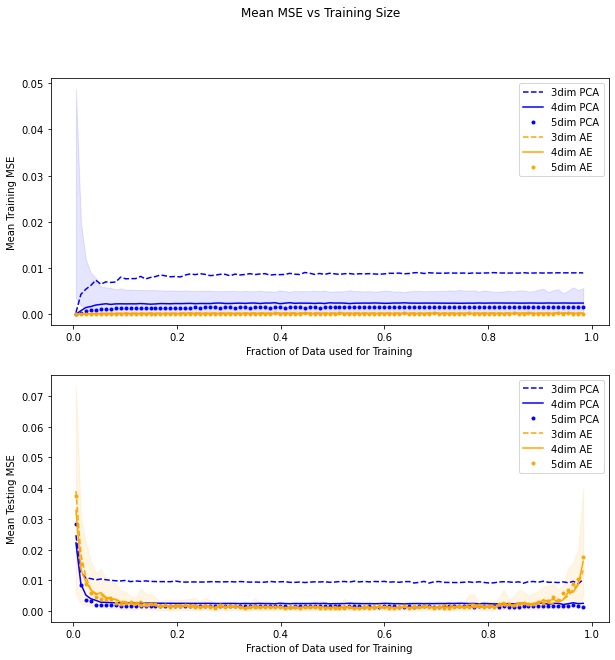

In [20]:

pca4_MSE_test = (pca_MSE_TEST,)
ae4_MSE_test = (ae_MSE_TEST,)
pca_boot = bootstrap(pca4_MSE_test, np.mean , vectorized=True, axis=1)
ae_boot = bootstrap(ae4_MSE_test, np.mean , vectorized=True, axis=1)

xvals = list(range(5,1035,10))
percent = [round((number / 1042),4) for number in xvals]

fig, (ax1, ax2) = plt.subplots(2,figsize=(10,10))
fig.suptitle('Mean MSE vs Training Size')

ax1.plot(percent, pca_MSE_TRAIN3.mean(axis=1), '--',c='b', label = '3dim PCA')
ax1.plot(percent, pca_MSE_TRAIN.mean(axis=1), c='b', label = '4dim PCA')
ax1.fill_between(percent, (pca_MSE_TEST.mean(axis=1)-pca_boot.confidence_interval.low), (pca_MSE_TEST.mean(axis=1)+pca_boot.confidence_interval.high), color='b', alpha=.1)
ax1.plot(percent, pca_MSE_TRAIN5.mean(axis=1), '.', c='b', label = '5dim PCA')

ax1.plot(percent, ae_MSE_TRAIN3.mean(axis=1), '--', c='orange', label = '3dim AE')
ax1.plot(percent, ae_MSE_TRAIN.mean(axis=1), c='orange', label = '4dim AE')
ax1.plot(percent, ae_MSE_TRAIN5.mean(axis=1), '.', c='orange', label = '5dim AE')

ax1.set(ylabel='Mean Training MSE', xlabel='Fraction of Data used for Training')
ax1.legend()

ax2.plot(percent, pca_MSE_TEST3.mean(axis=1), '--', c='b', label = '3dim PCA')
ax2.plot(percent, pca_MSE_TEST.mean(axis=1), c='b', label = '4dim PCA')
ax2.plot(percent, pca_MSE_TEST5.mean(axis=1), '.', c='b', label = '5dim PCA')


ax2.plot(percent, ae_MSE_TEST3.mean(axis=1), '--', c='orange', label = '3dim AE')
ax2.plot(percent, ae_MSE_TEST.mean(axis=1), c='orange', label = '4dim AE')
ax2.plot(percent, ae_MSE_TEST5.mean(axis=1), '.', c='orange', label = '5dim AE')
ax2.fill_between(percent, (ae_MSE_TEST.mean(axis=1)-ae_boot.confidence_interval.low), (ae_MSE_TEST.mean(axis=1)+ae_boot.confidence_interval.high), color='orange', alpha=.1)



ax2.set(ylabel='Mean Testing MSE', xlabel='Fraction of Data used for Training')
ax2.legend()

In [23]:
#np.save('df_opt_ae_RE', A)
np.save('tsize_opt_ae_MSE_TEST_3dim', ae_MSE_TEST3)
np.save('tsize_opt_ae_MSE_TRAIN_3dim', ae_MSE_TRAIN3)

np.save('tsize_opt_ae_MSE_TEST_4dim', ae_MSE_TEST)
np.save('tsize_opt_ae_MSE_TRAIN_4dim', ae_MSE_TRAIN)

np.save('tsize_opt_ae_MSE_TEST_5dim',ae_MSE_TEST5)
np.save('tsize_opt_ae_MSE_TRAIN_5dim', ae_MSE_TRAIN5)


np.save('tsize_opt_pca_MSE_TEST_3dim', pca_MSE_TEST3)
np.save('tsize_opt_pca_MSE_TRAIN_3dim', pca_MSE_TRAIN3)

np.save('tsize_opt_pca_MSE_TEST_4dim', pca_MSE_TEST)
np.save('tsize_opt_pca_MSE_TRAIN_4dim', pca_MSE_TRAIN)

np.save('tsize_opt_pca_MSE_TEST_5dim',pca_MSE_TEST5)
np.save('tsize_opt_pca_MSE_TRAIN_5dim', pca_MSE_TRAIN5)
